In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from utils import imread
from utils import normxcorr2
from automatic_rectification import AutoRect
import numpy as np
import pandas as pd

In [2]:
img_bg = imread(Path(os.getcwd(), 'data/img_bg.tif'))

Text(0.5, 1.0, 'raw img_bg2')

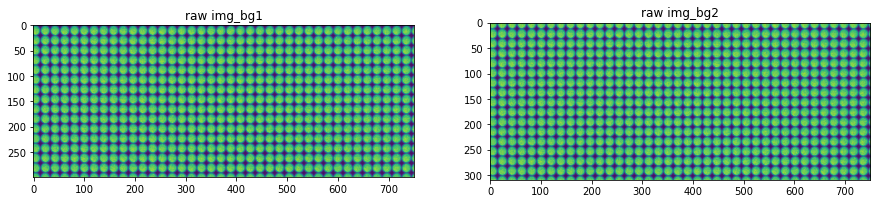

In [3]:
pixel_diff = 10
img_bg1 = img_bg[500:800, 300:1050]
img_bg2 = img_bg[500-pixel_diff:800, 300:1050]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,40))
ax1.imshow(img_bg1)
ax1.set_title('raw img_bg1')
ax2.imshow(img_bg2)
ax2.set_title('raw img_bg2')

# Use AutoRect to automatically rectify the image

In [4]:
auto_rect1 = AutoRect(img_bg1, plot_grid_fit=True)
auto_rect2 = AutoRect(img_bg2, plot_grid_fit=False)

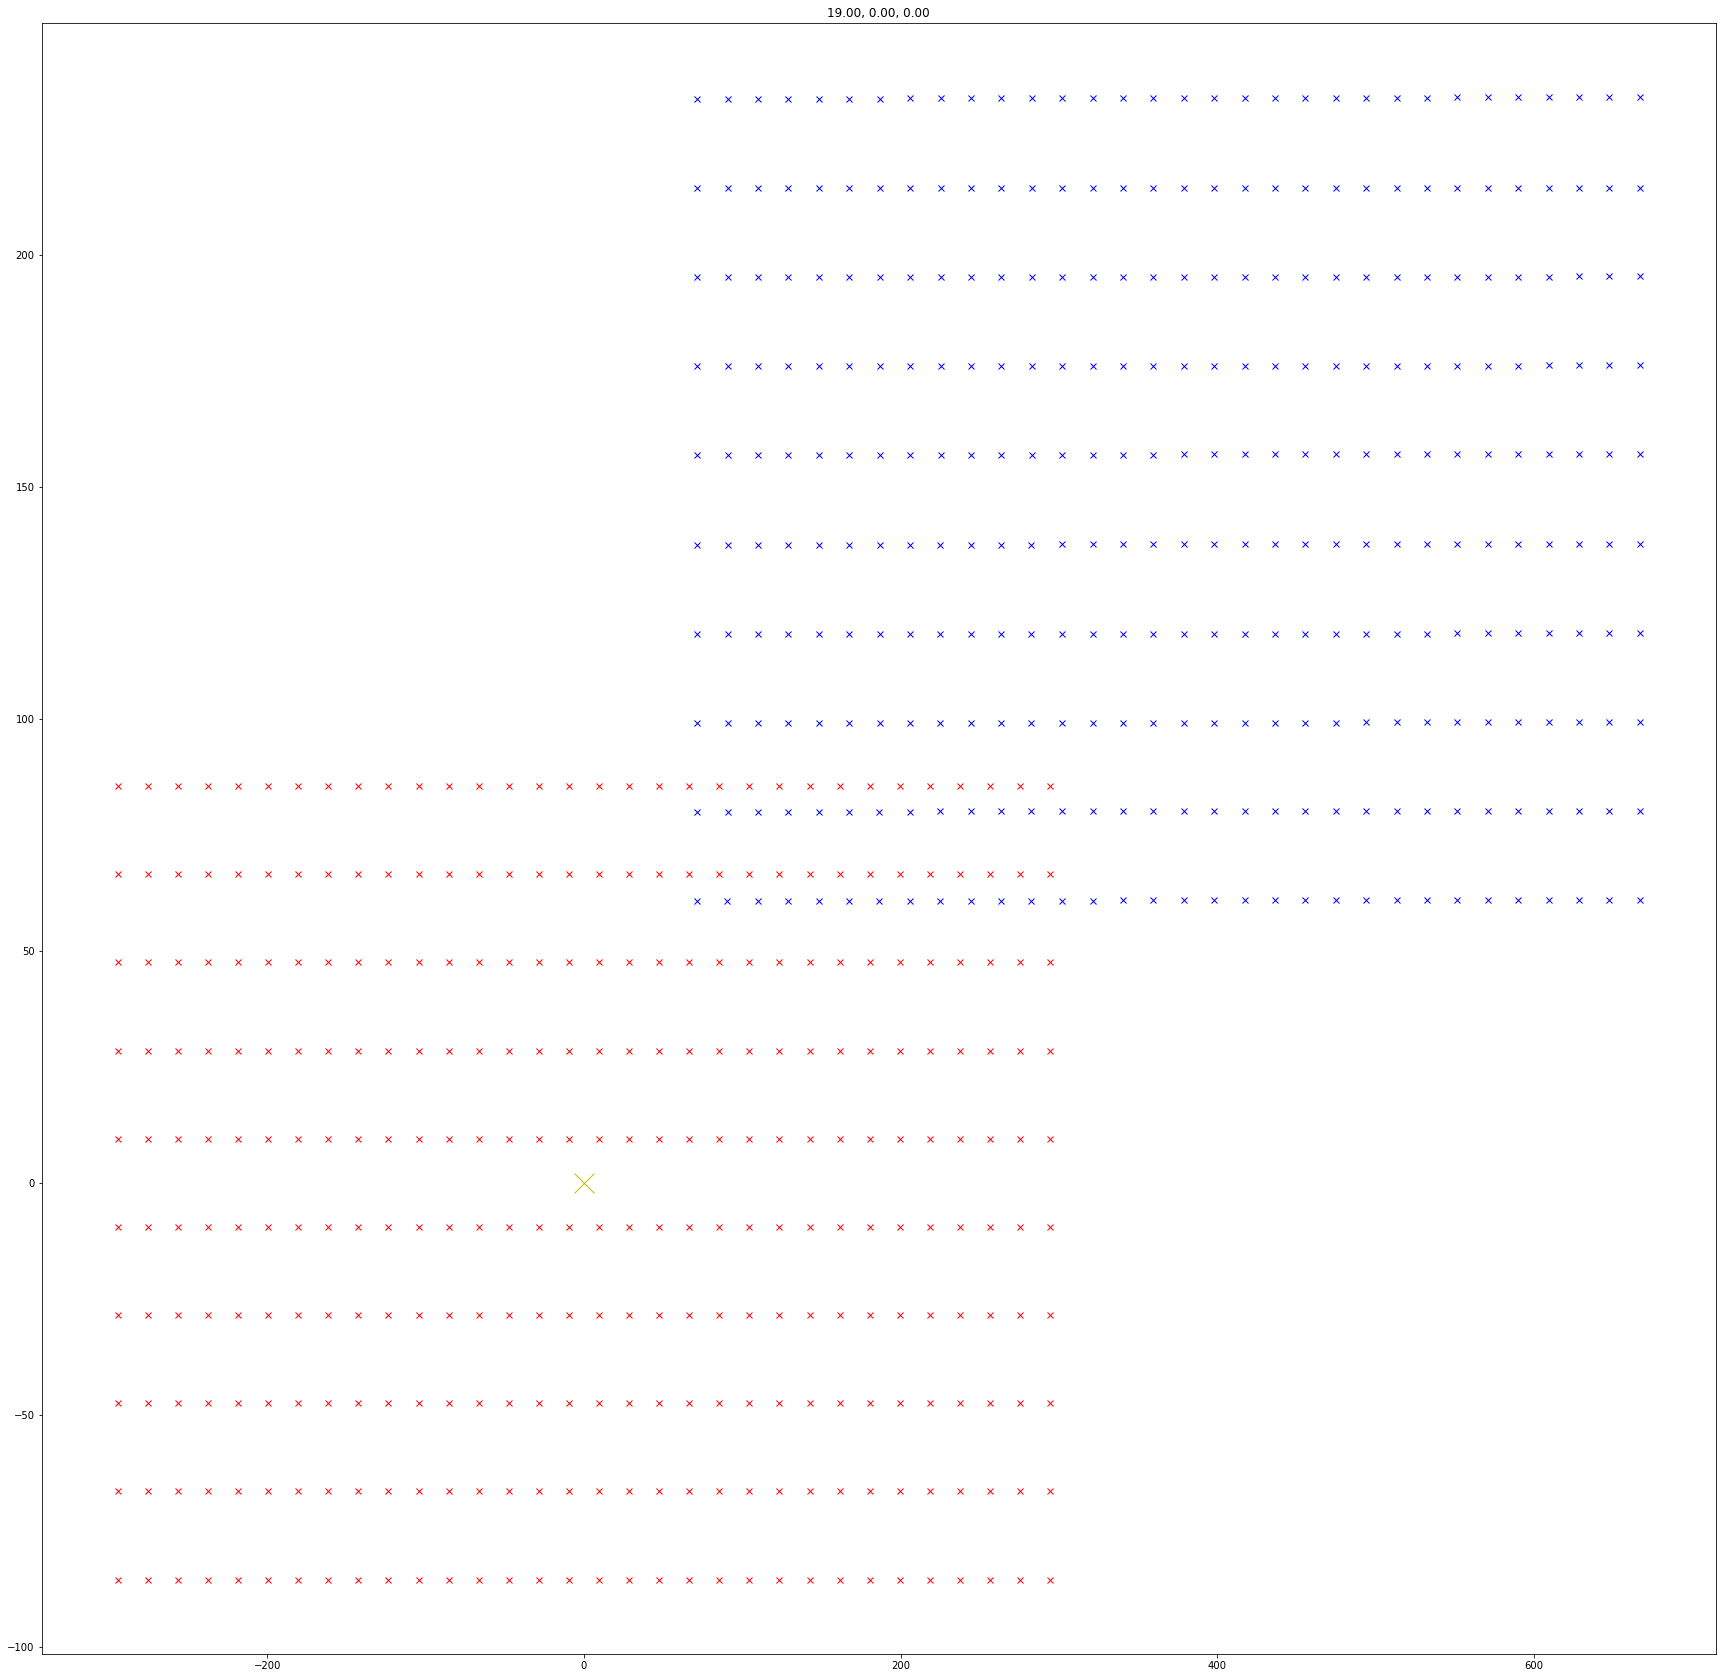

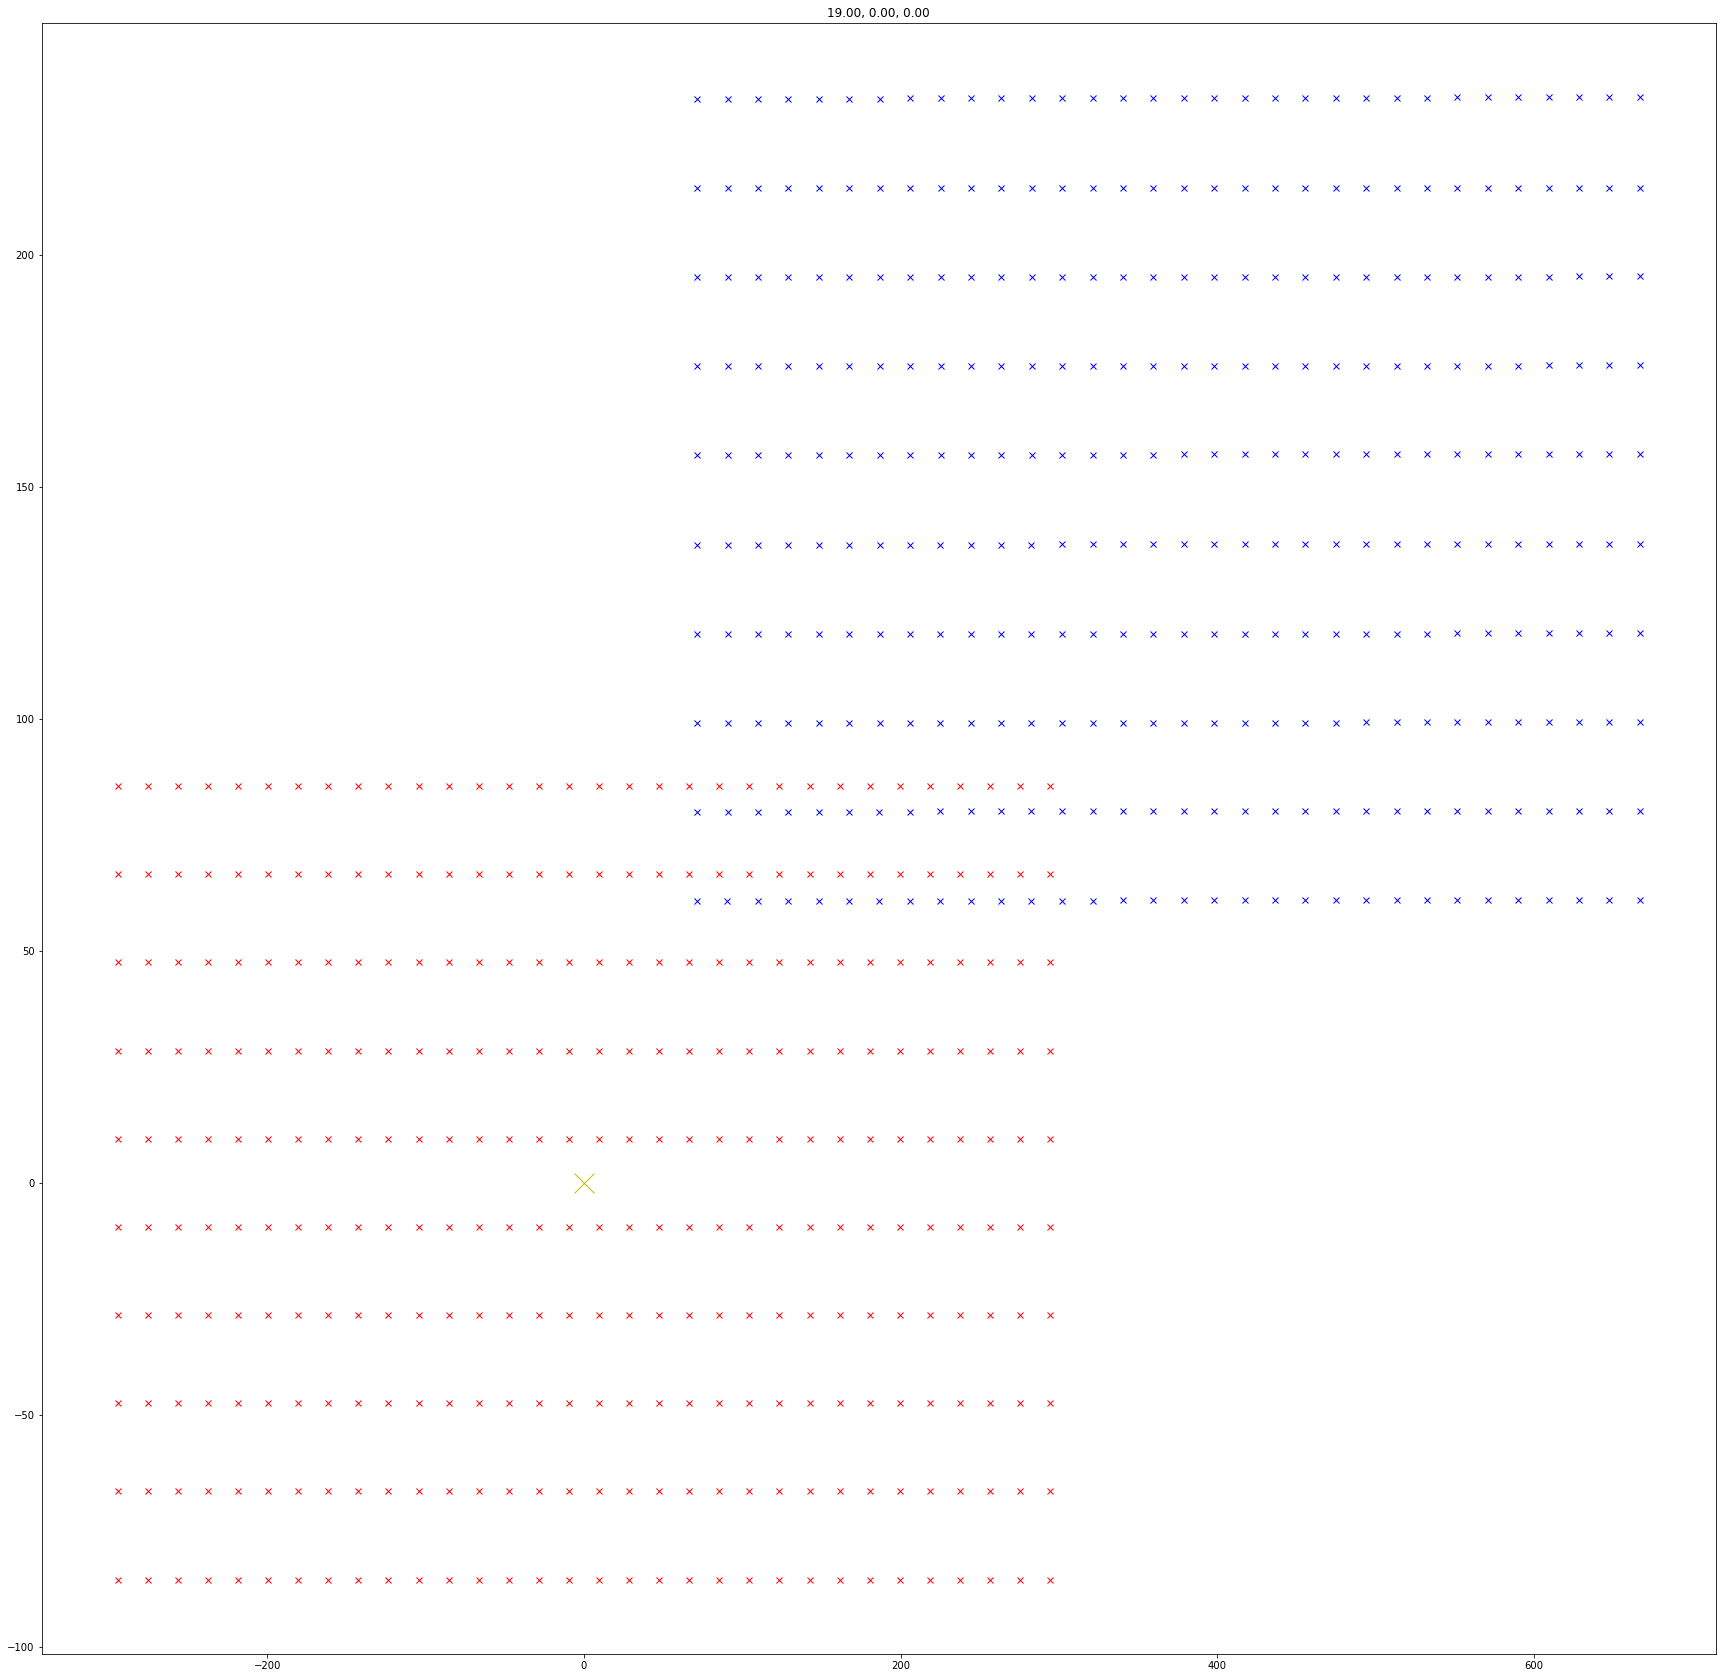

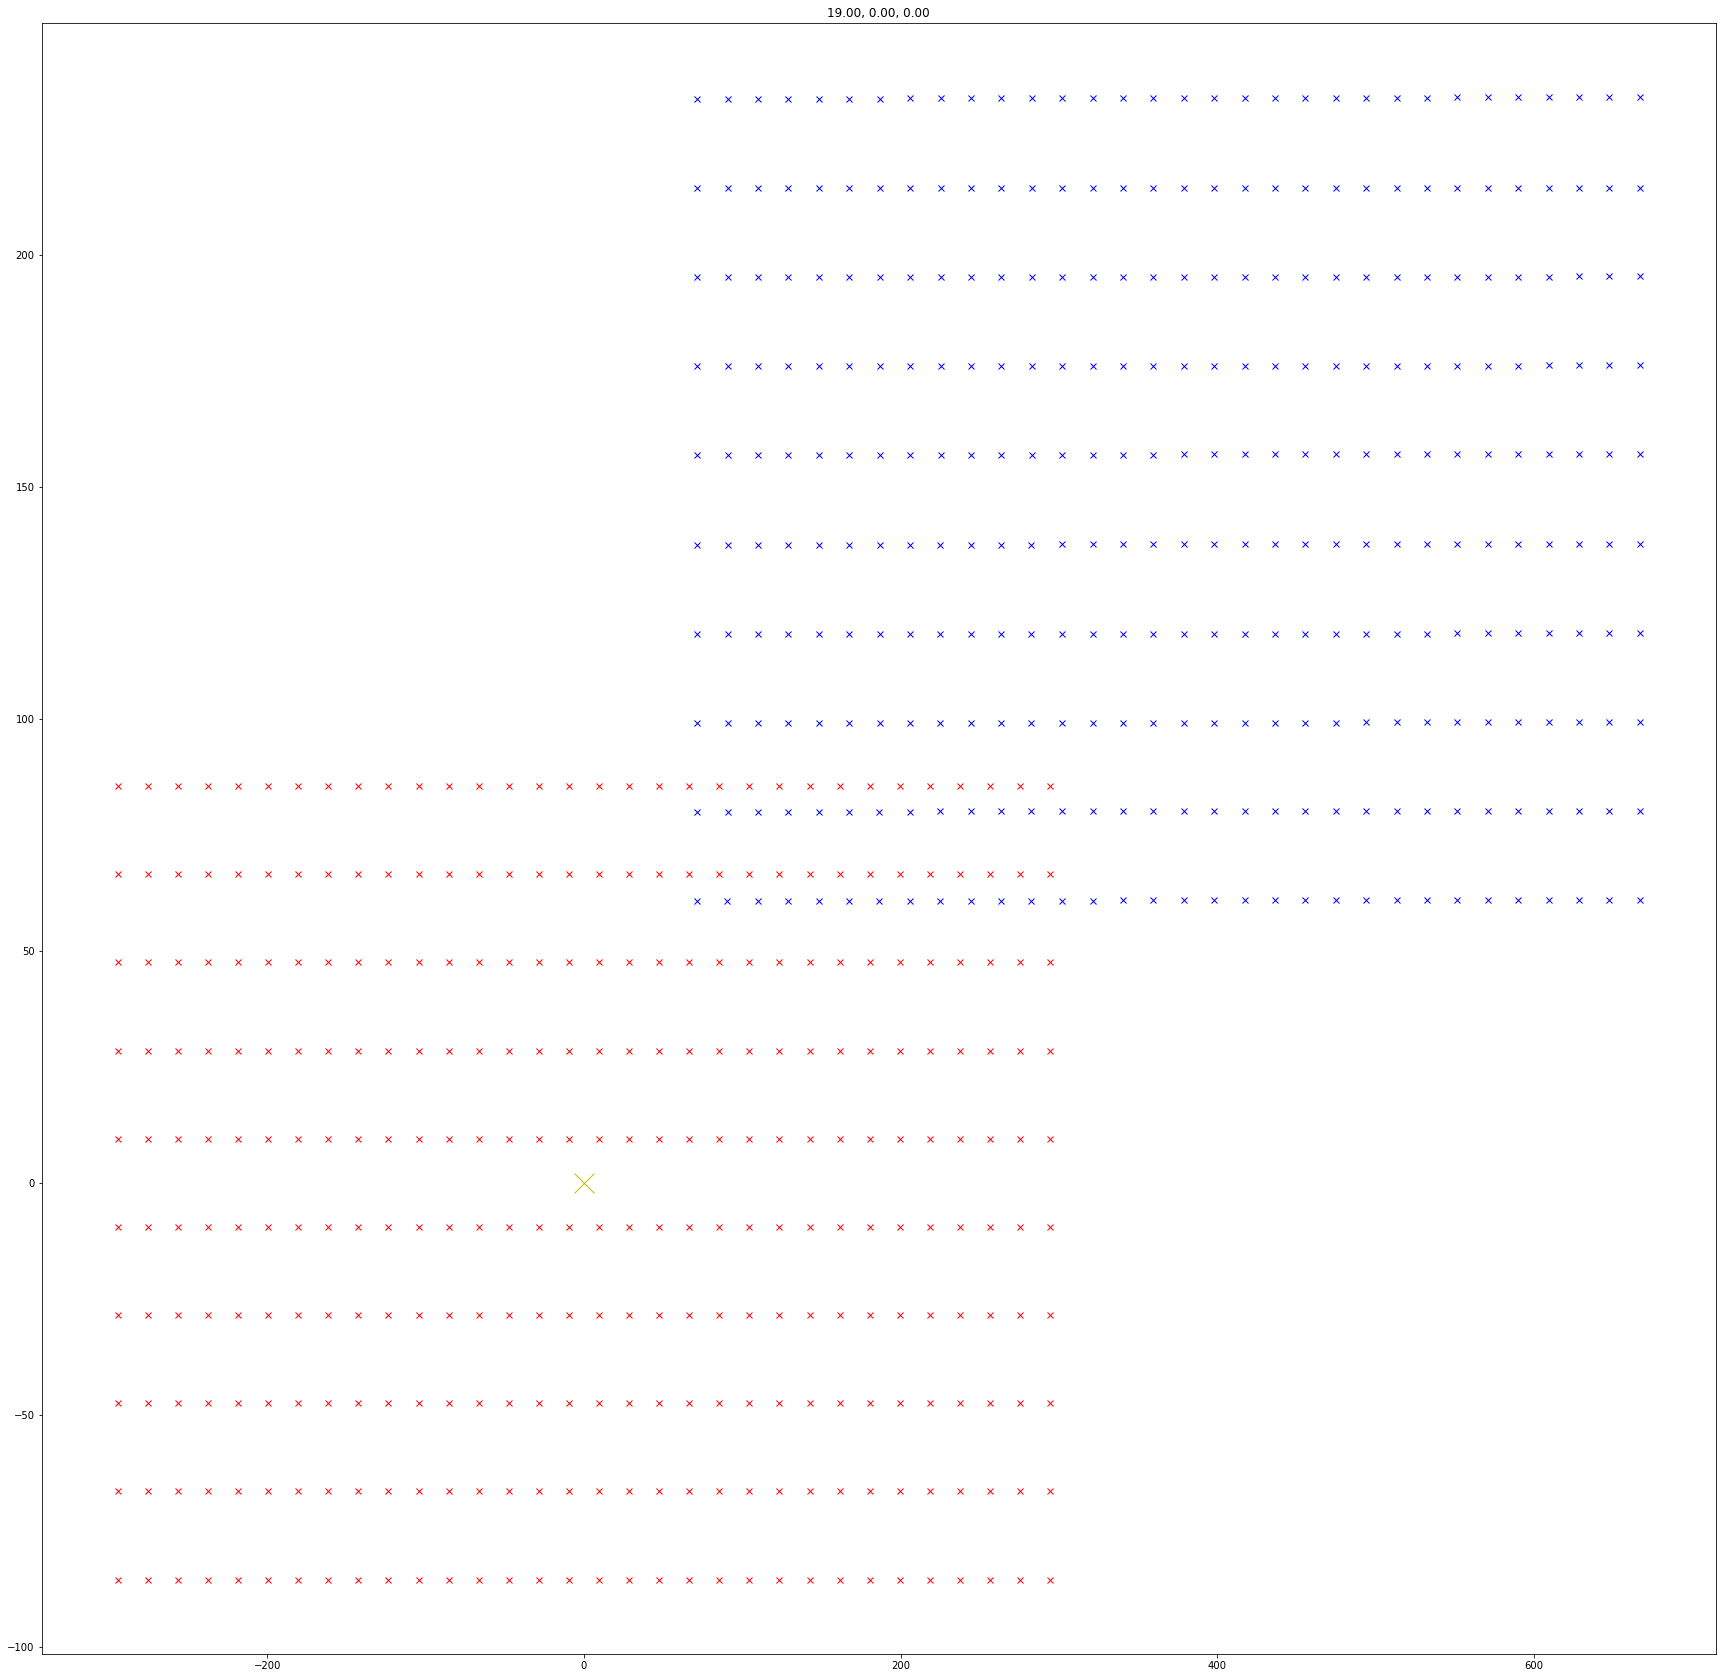

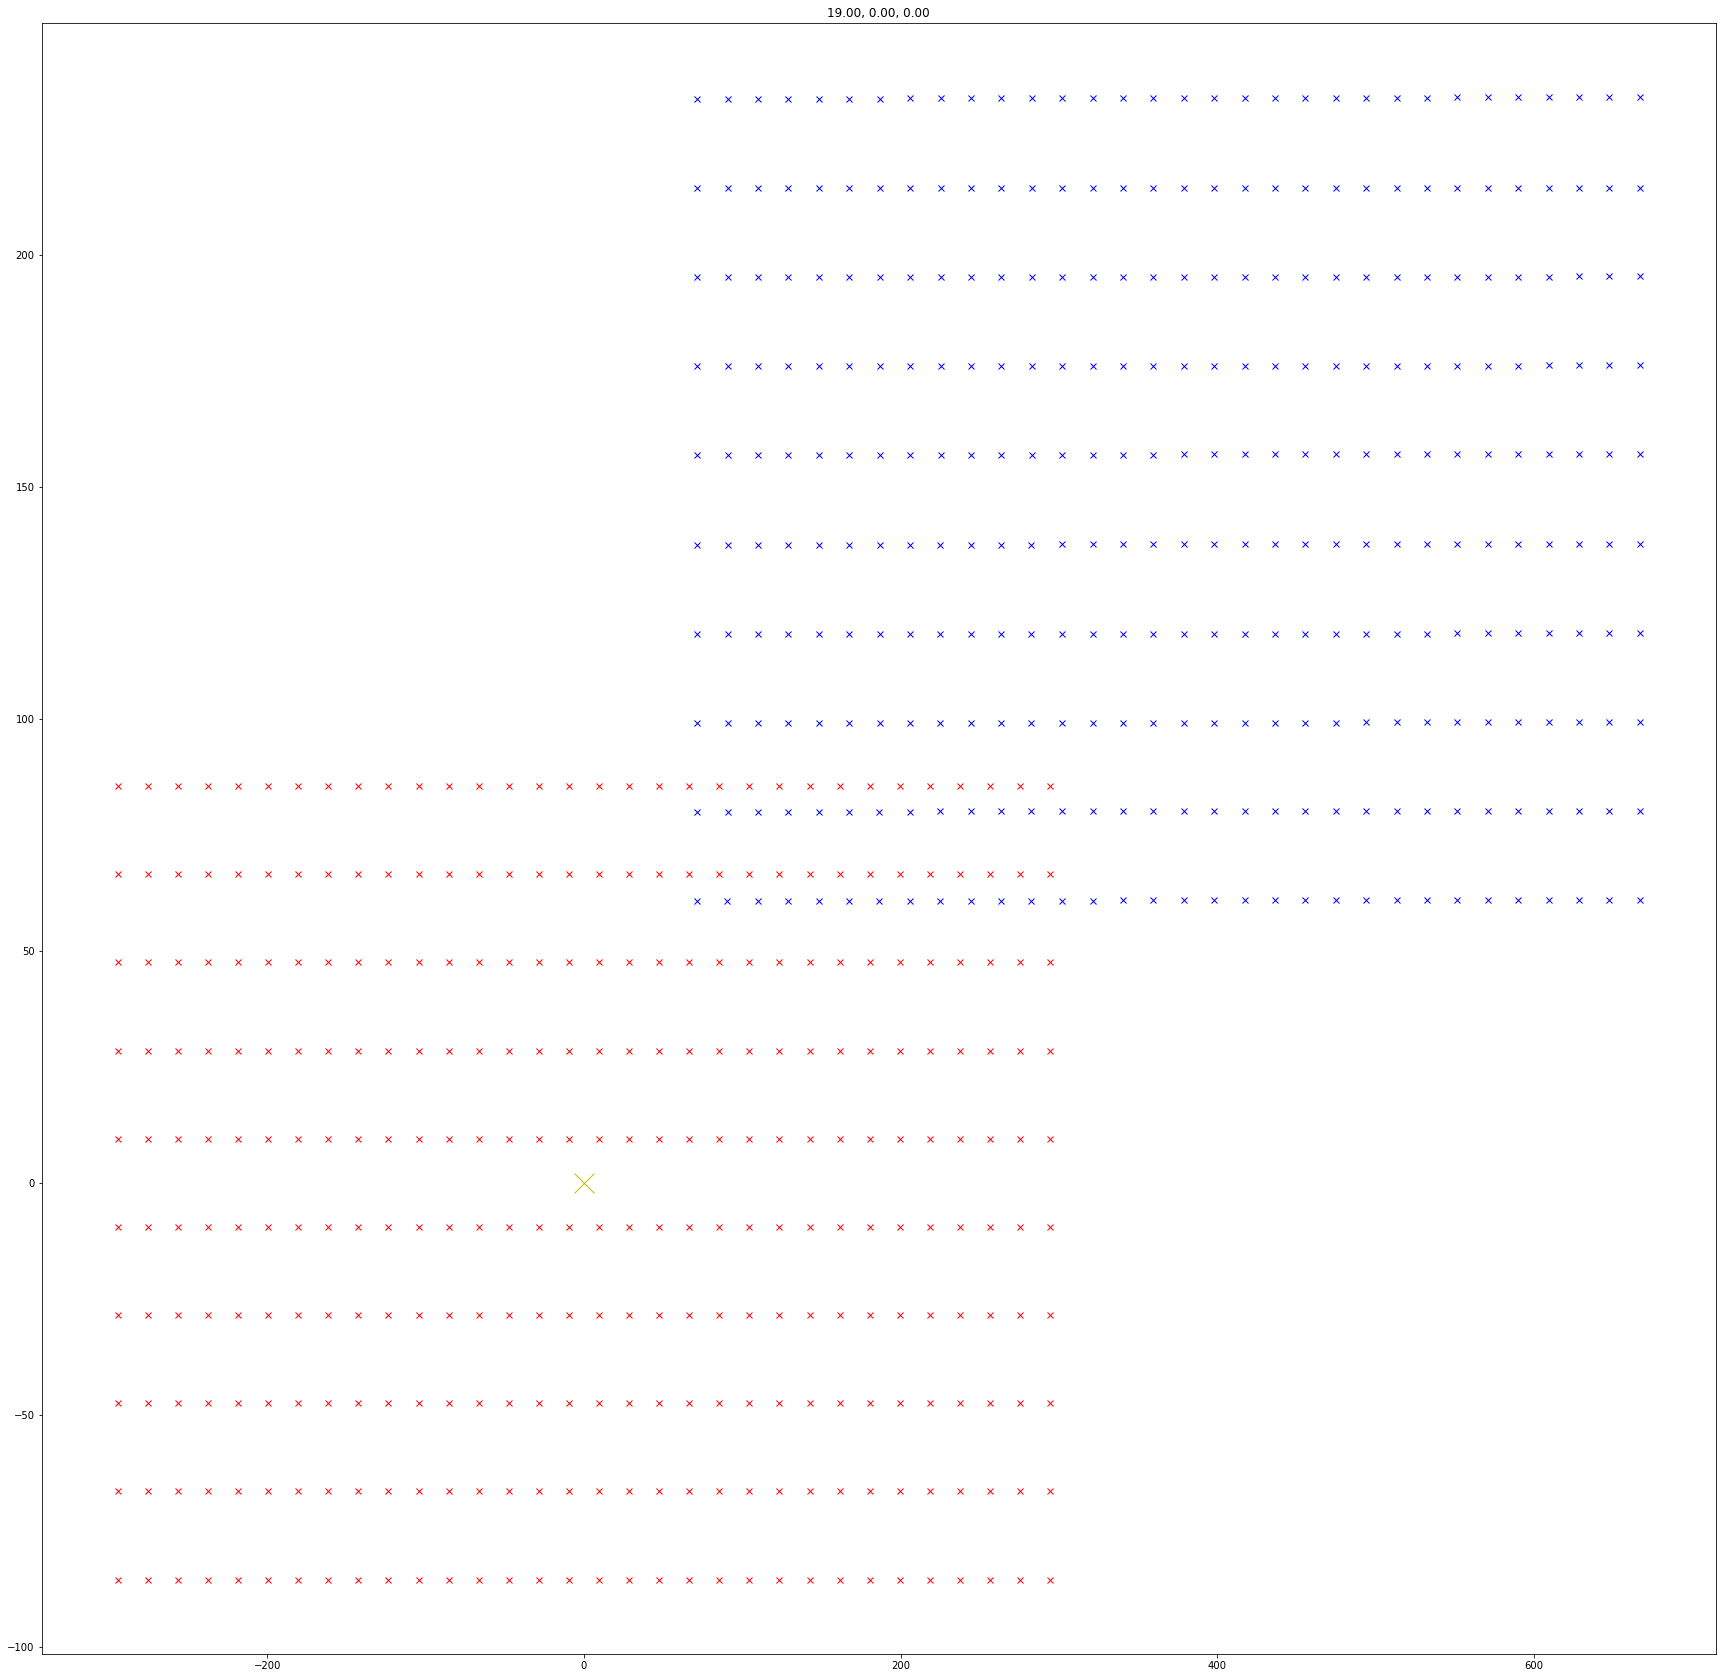

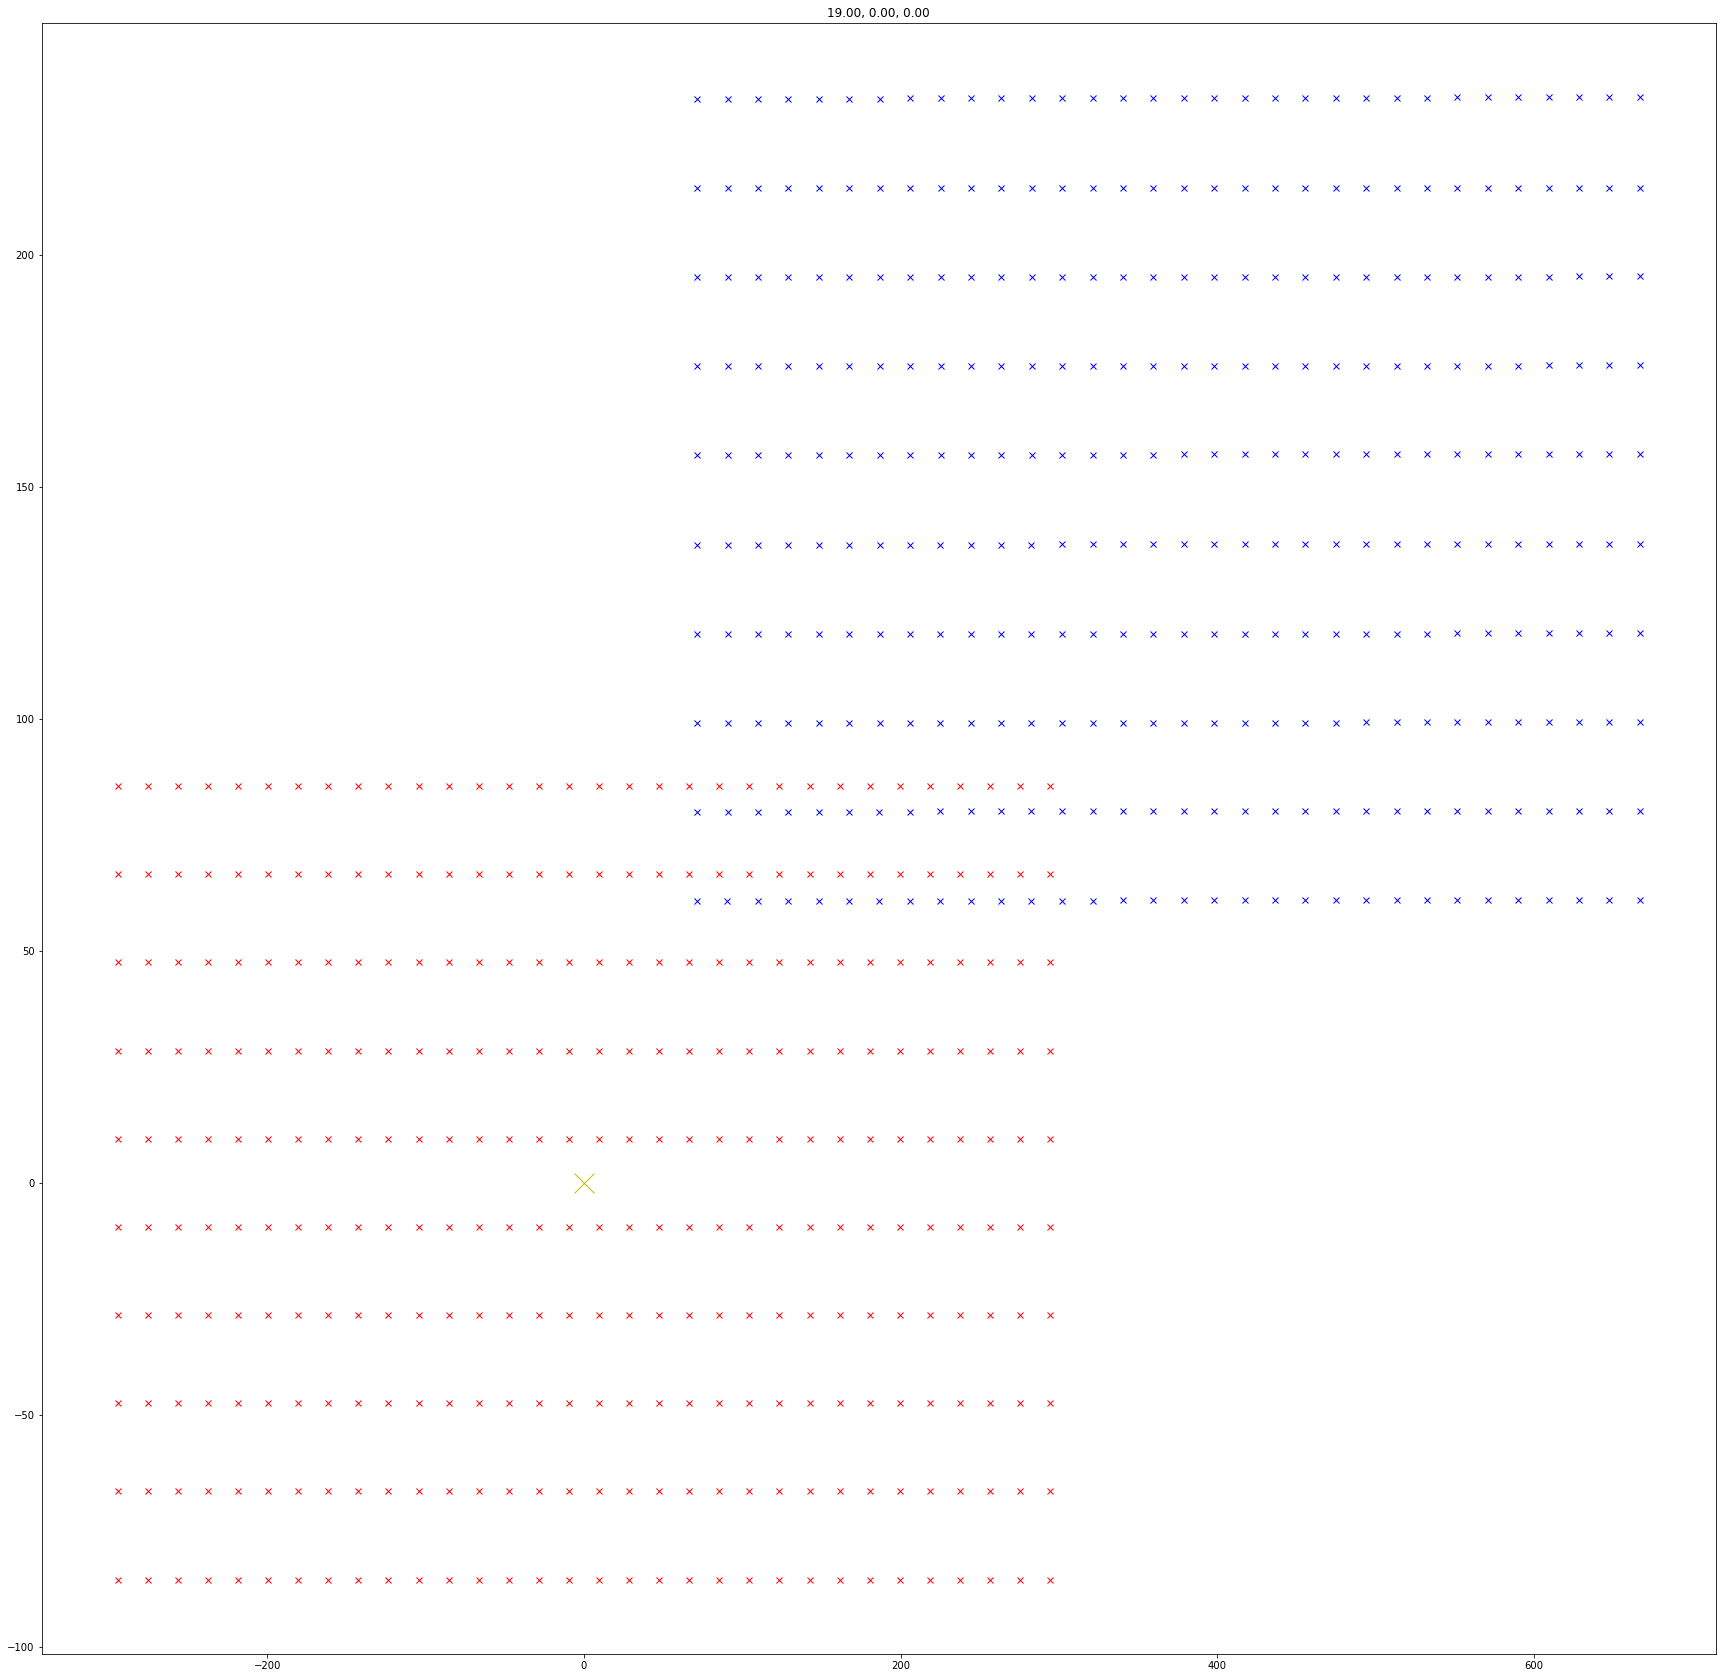

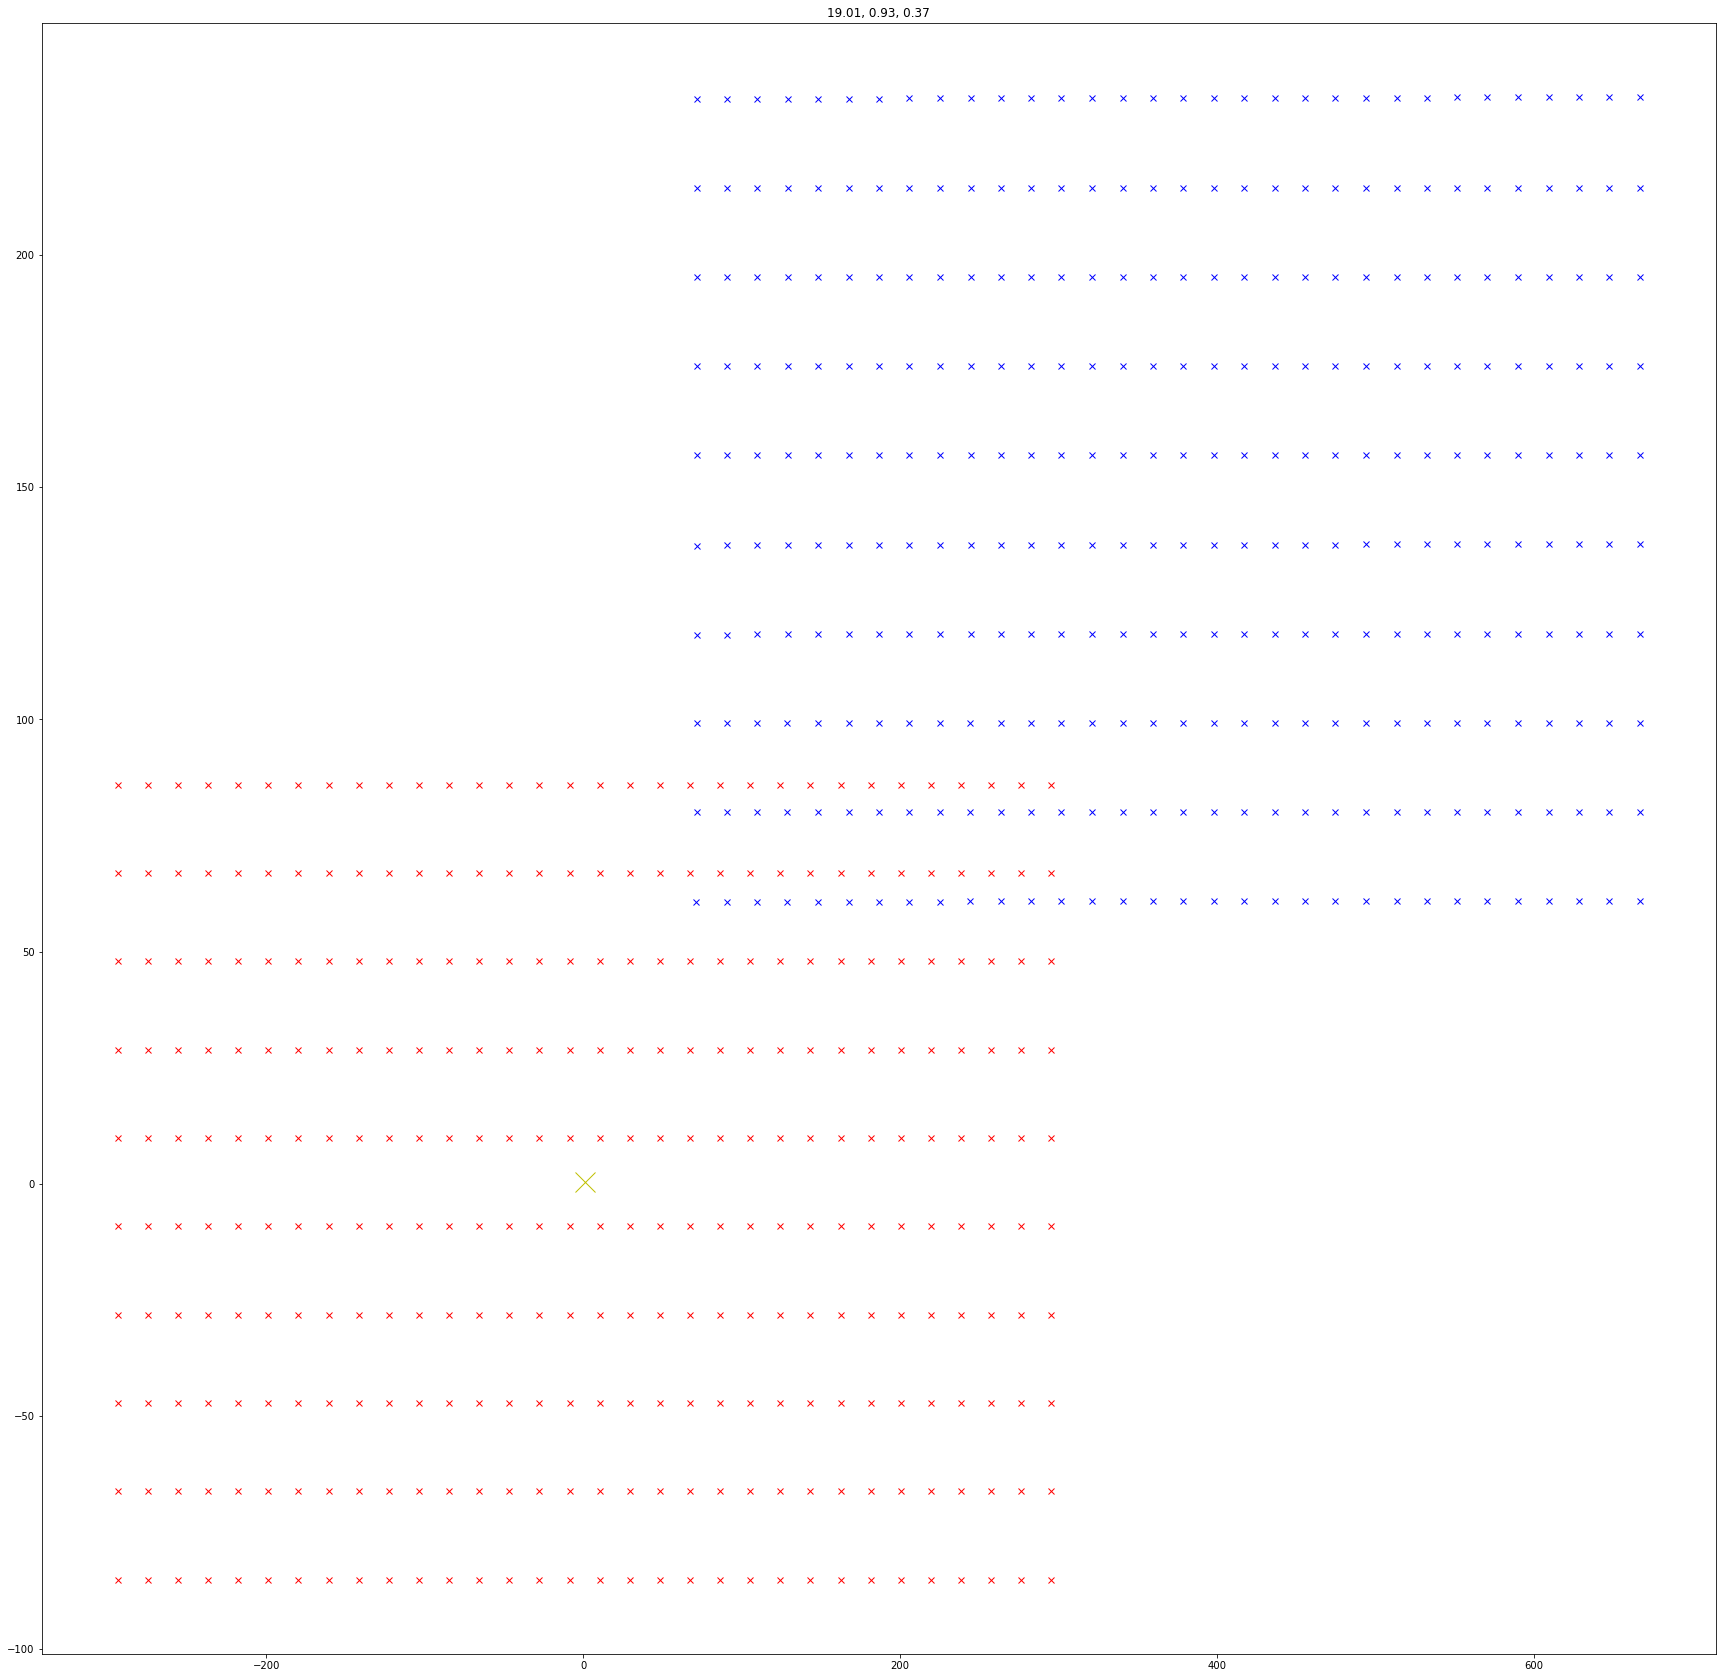

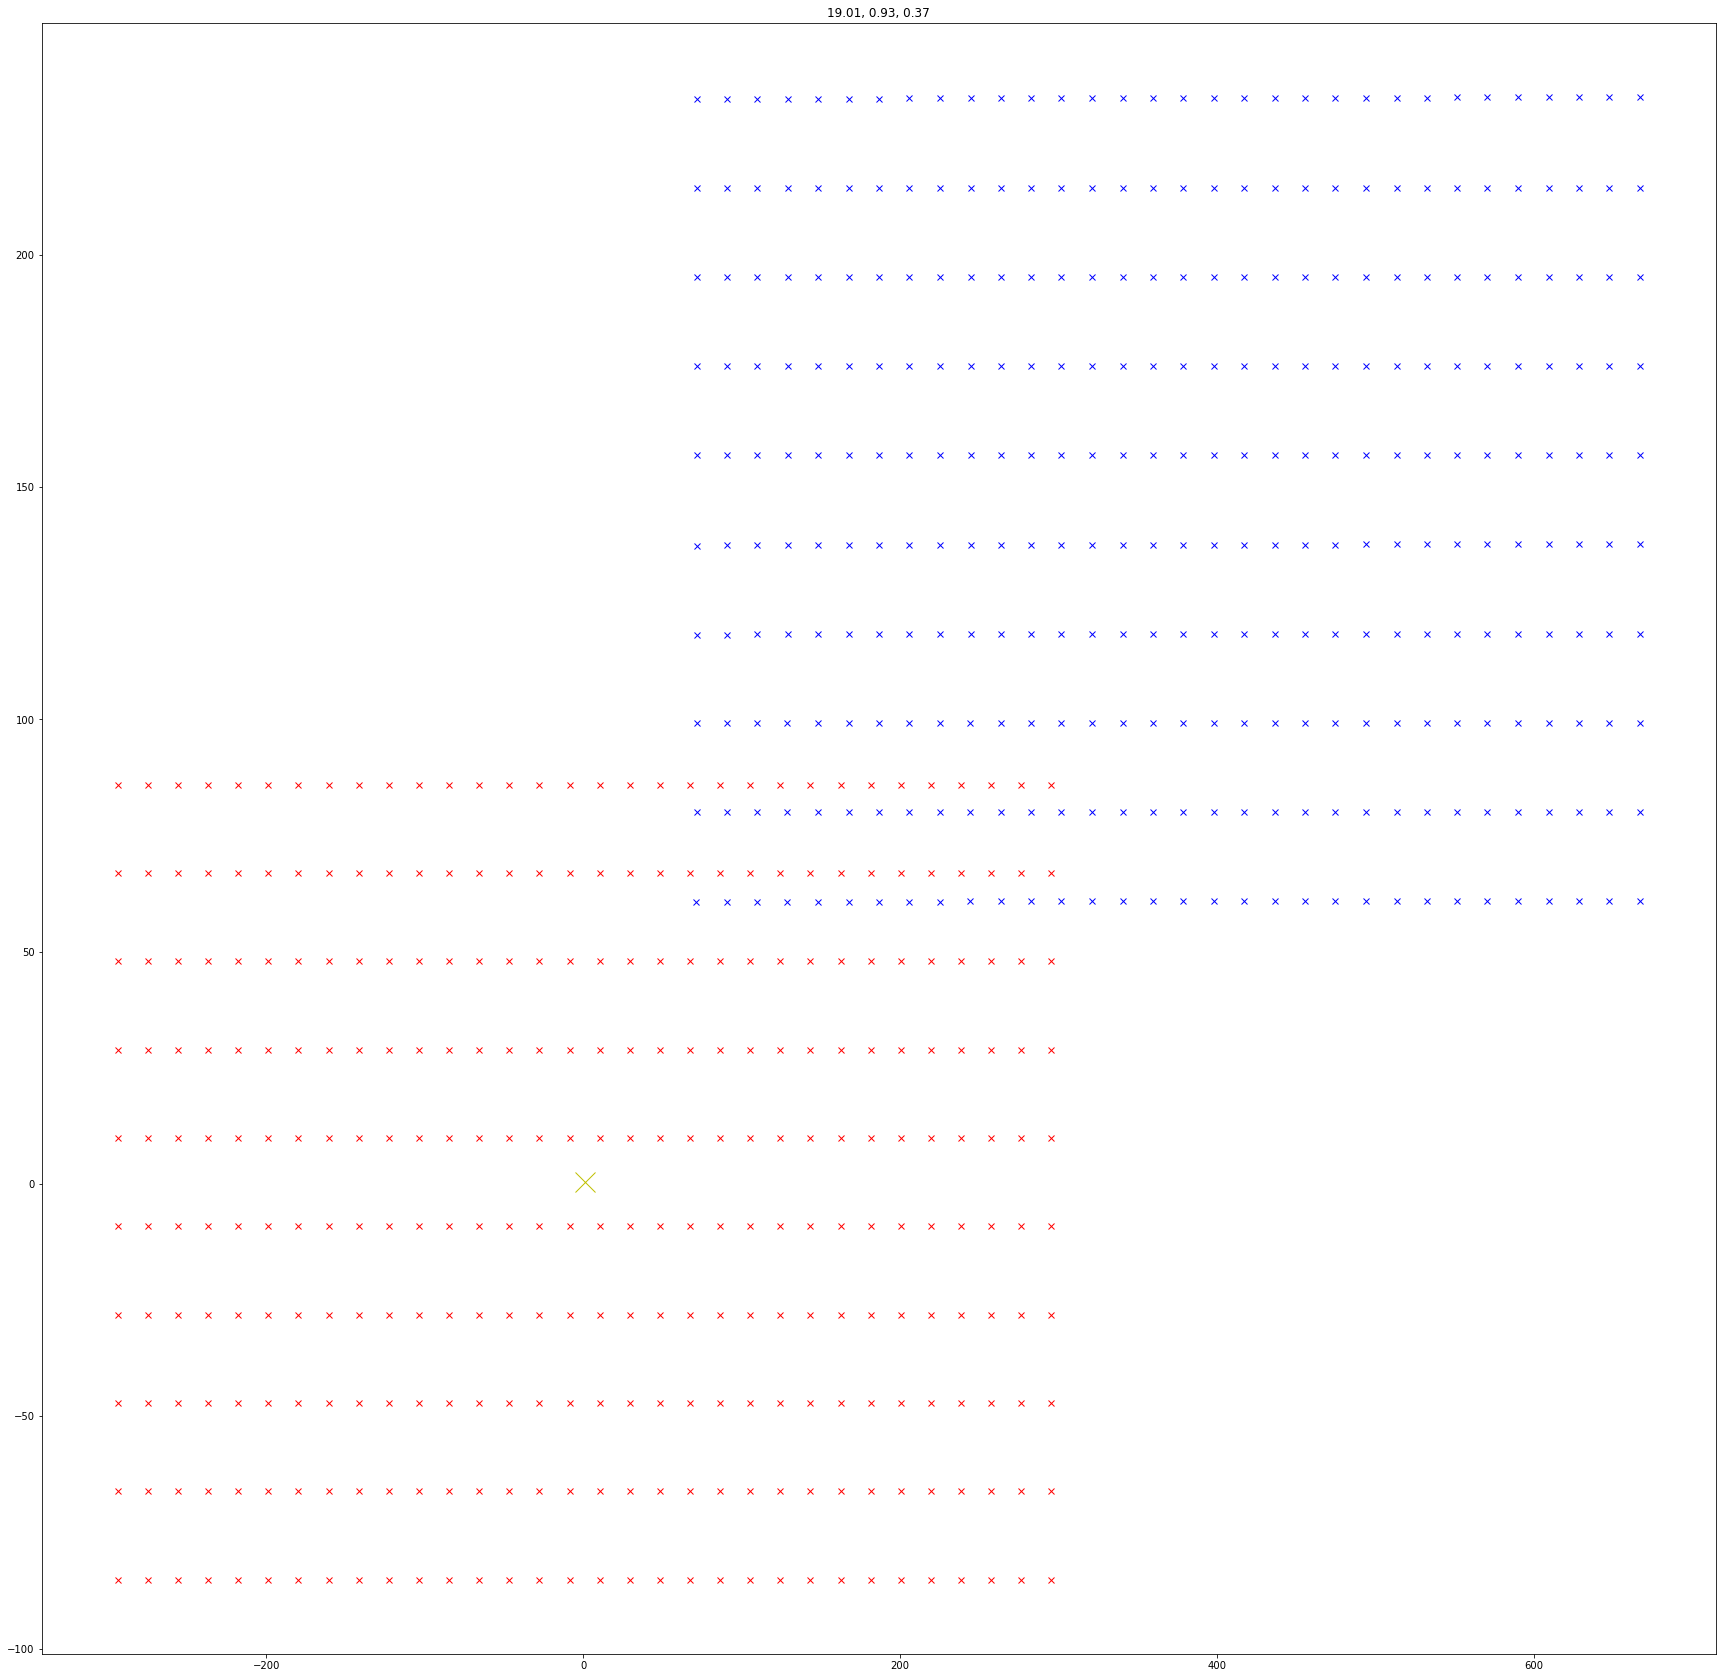

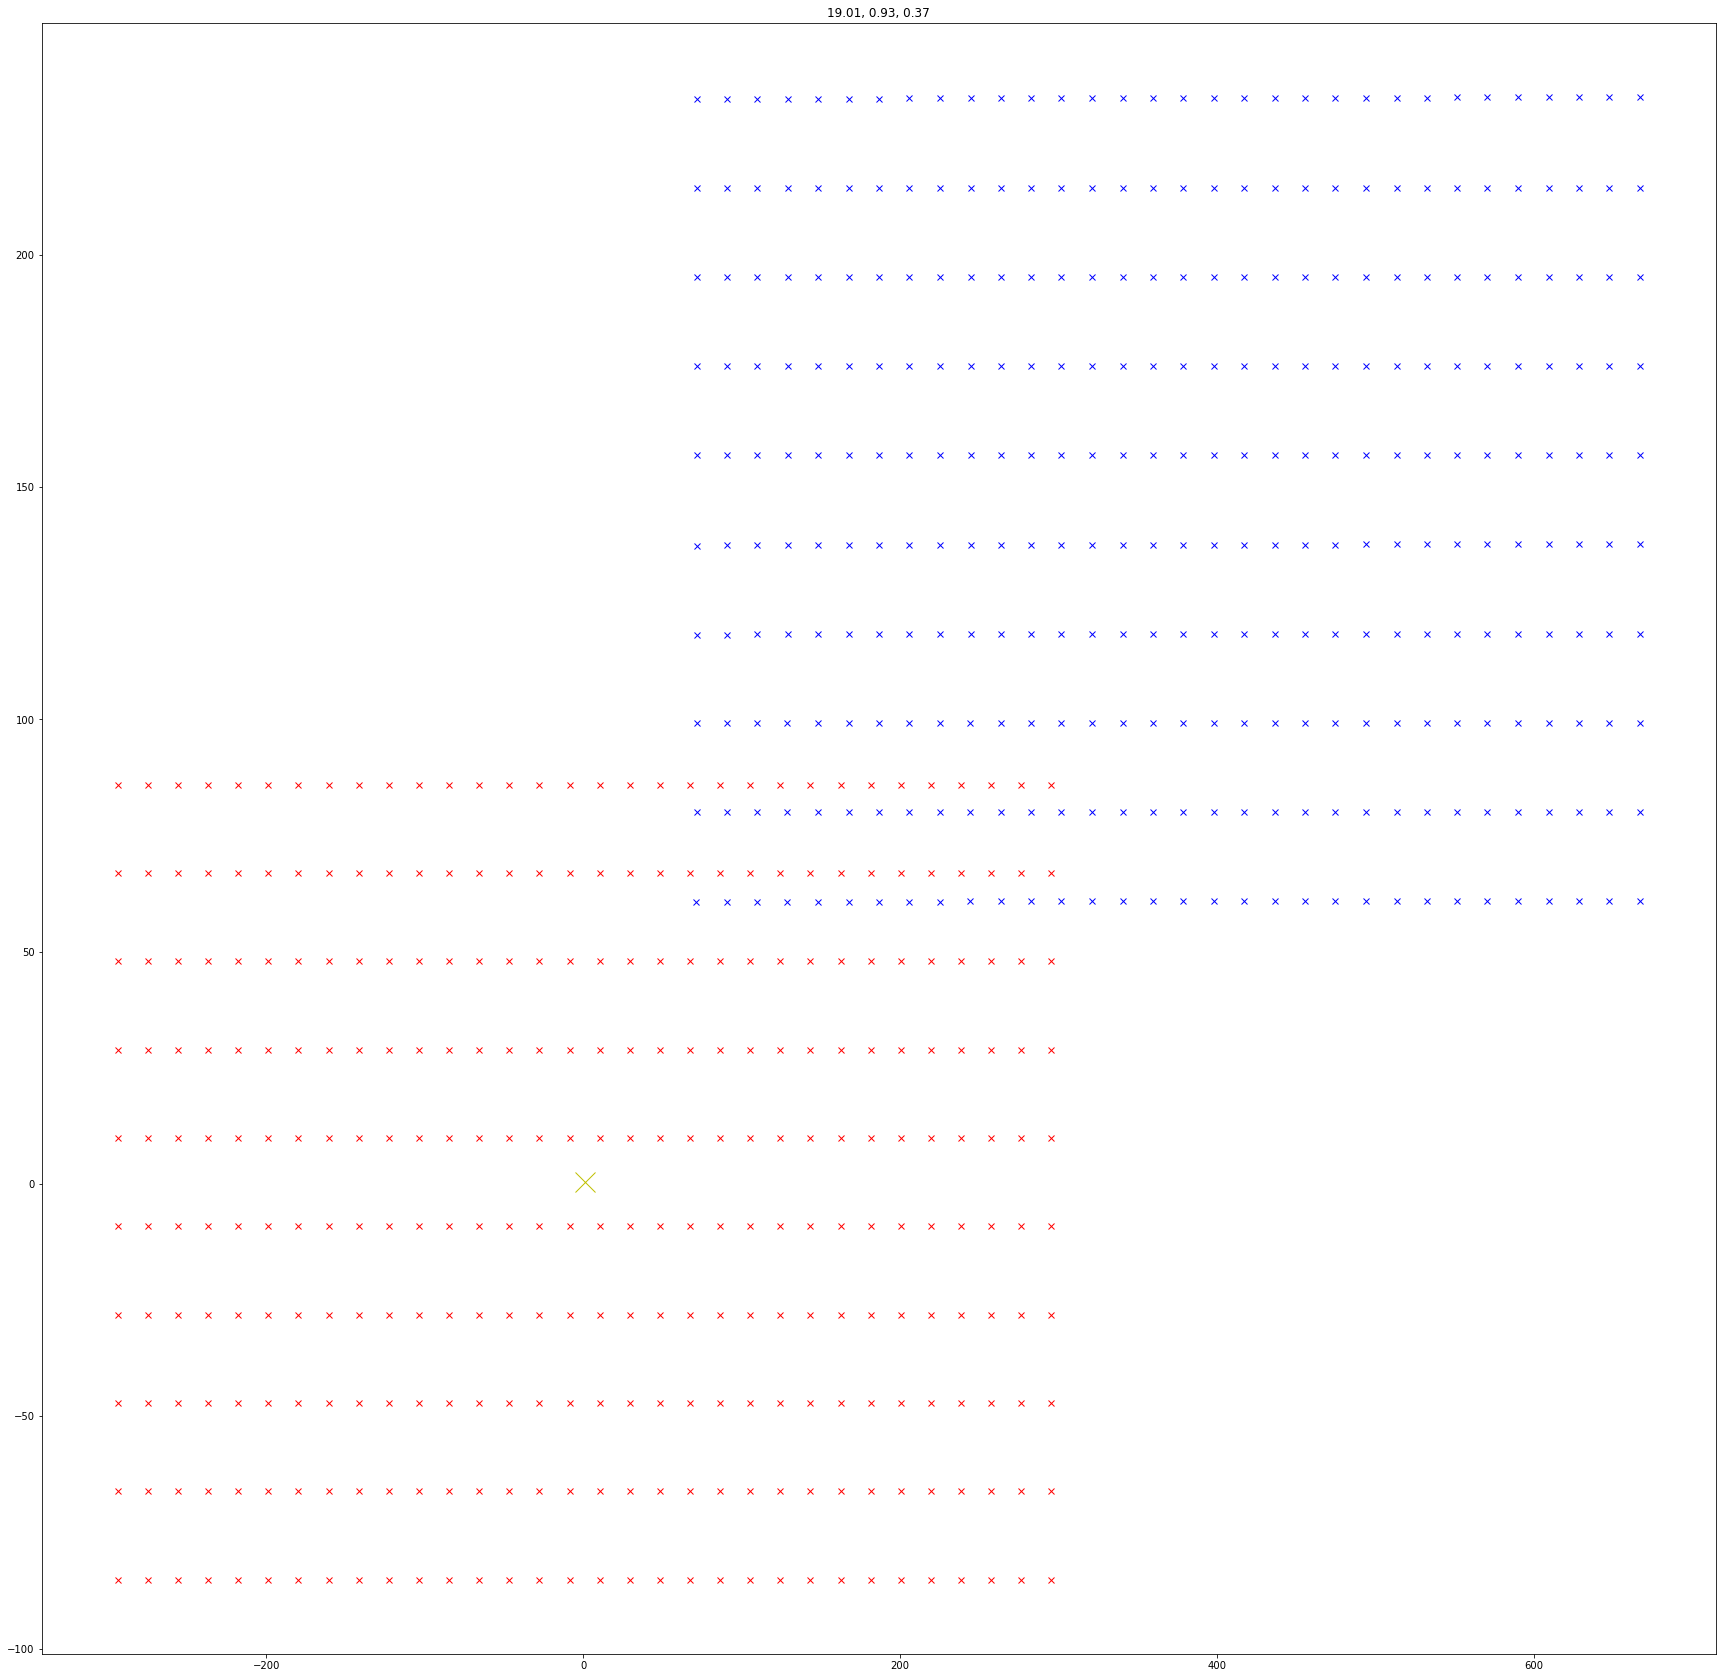

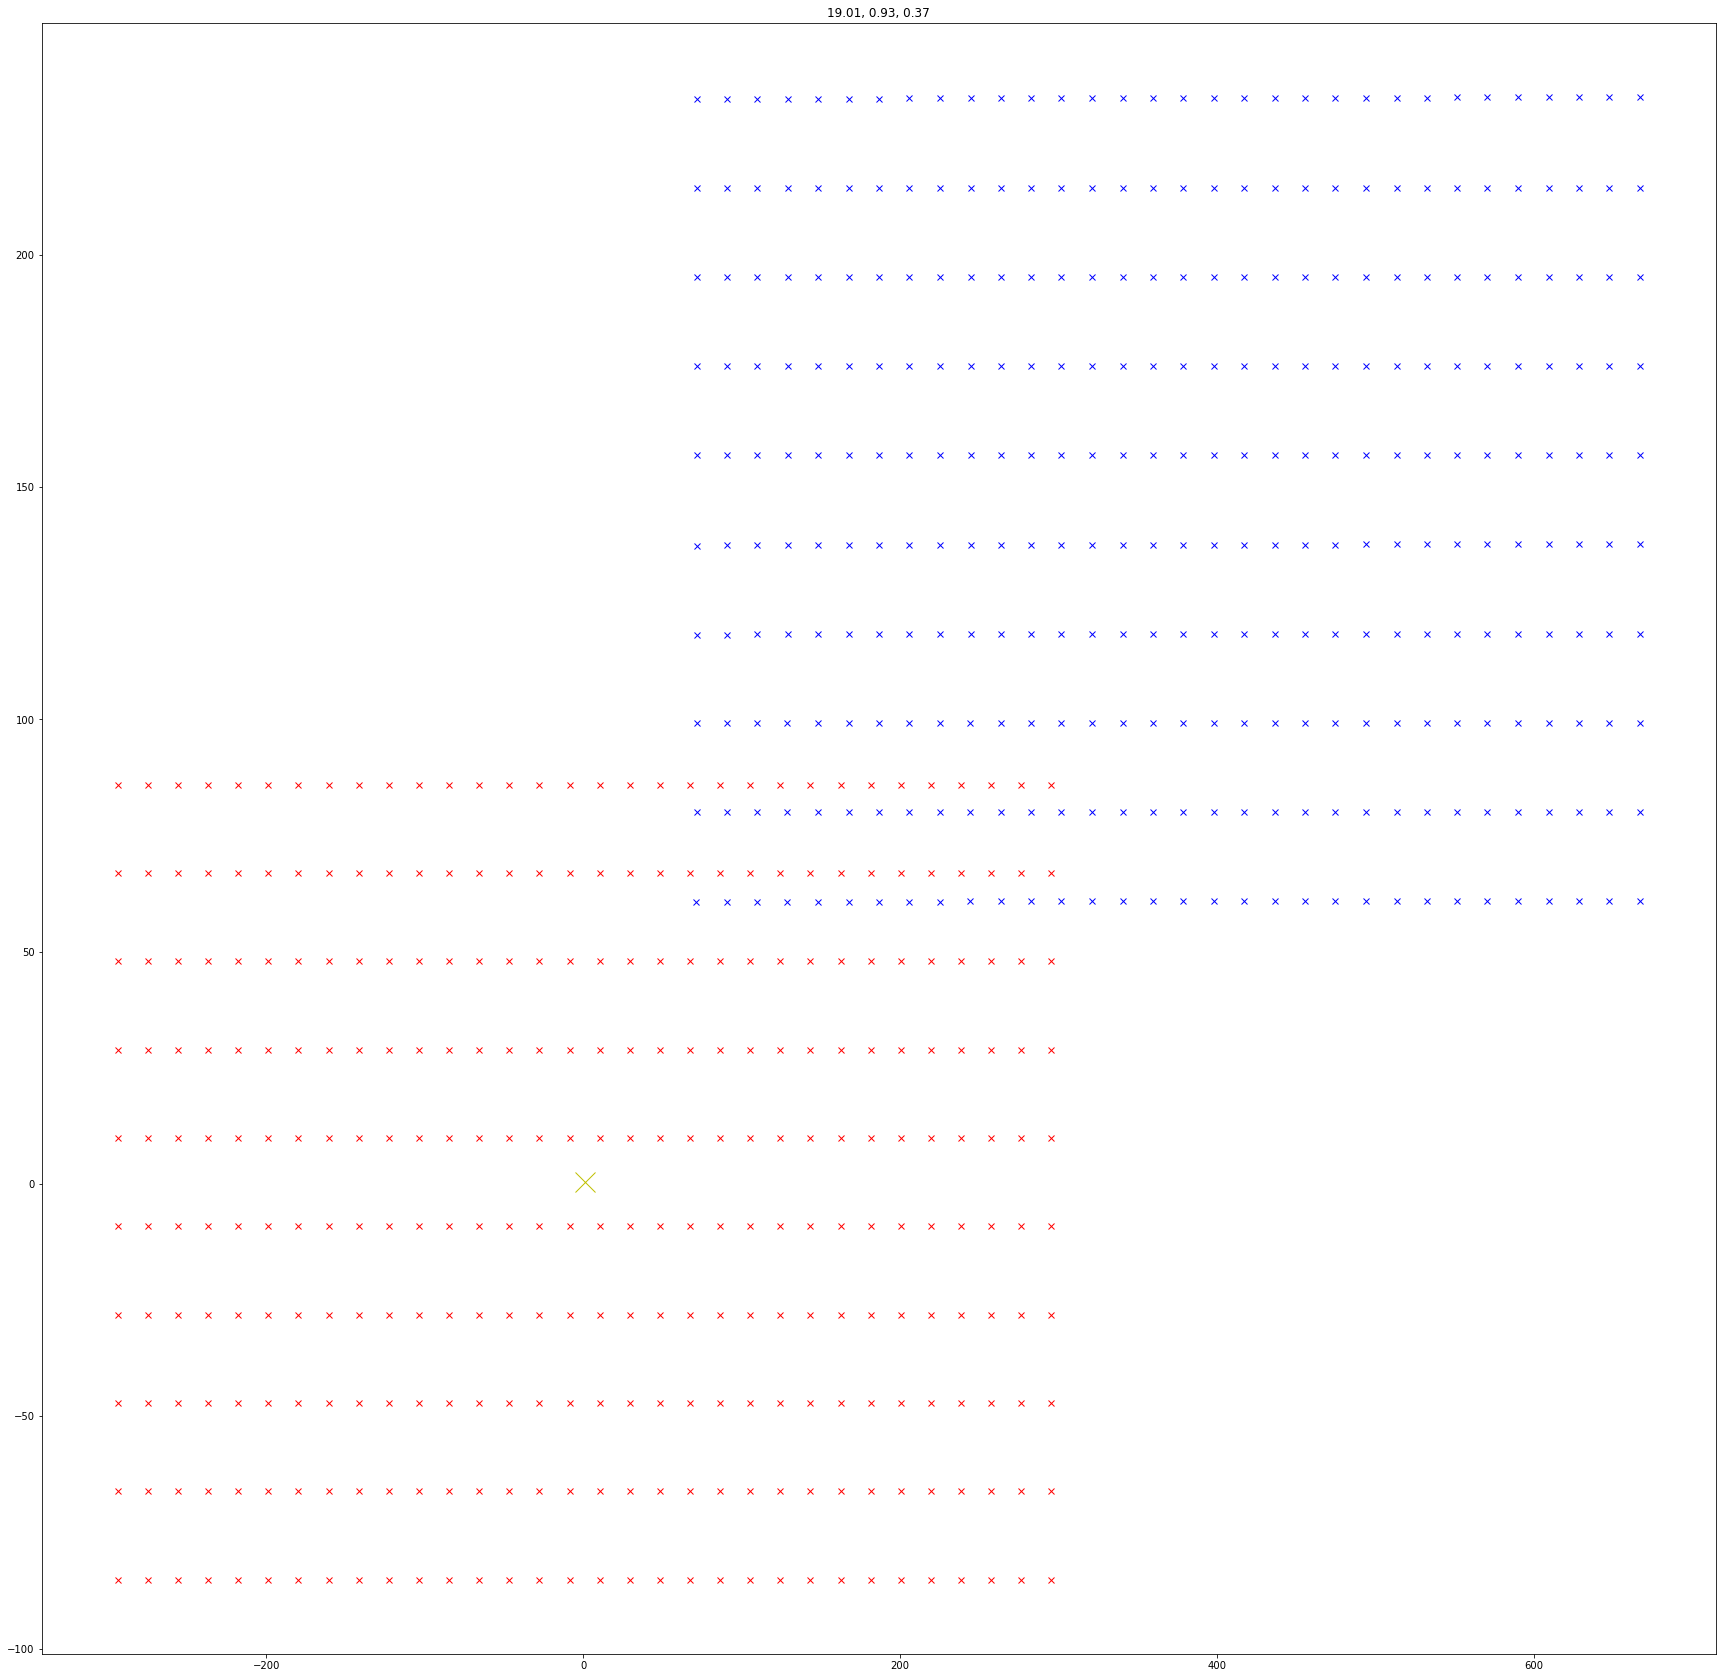

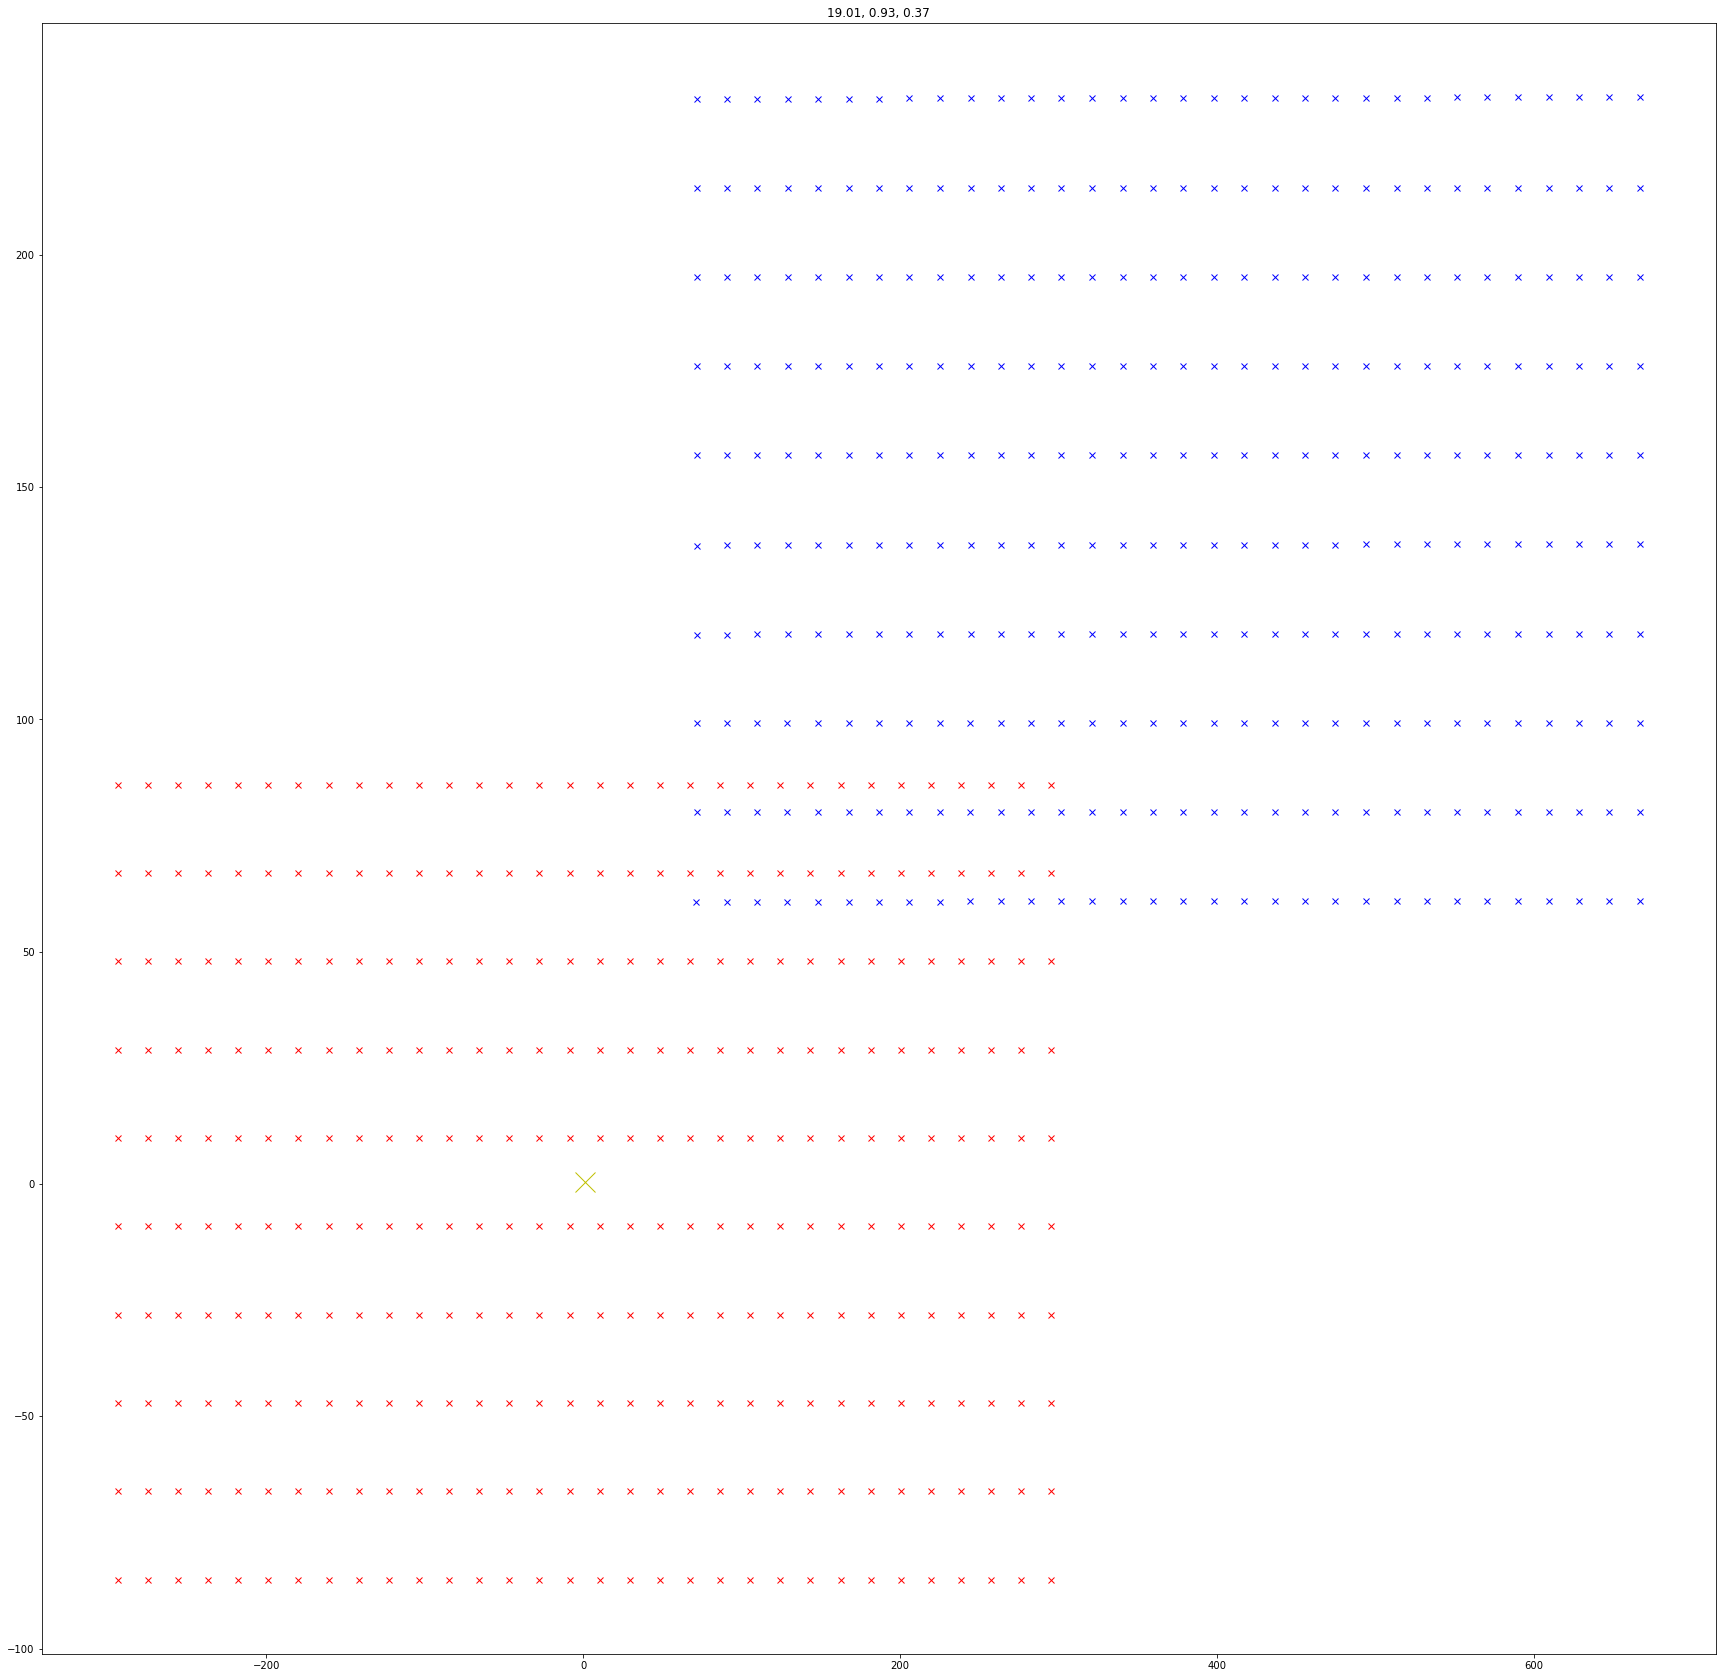

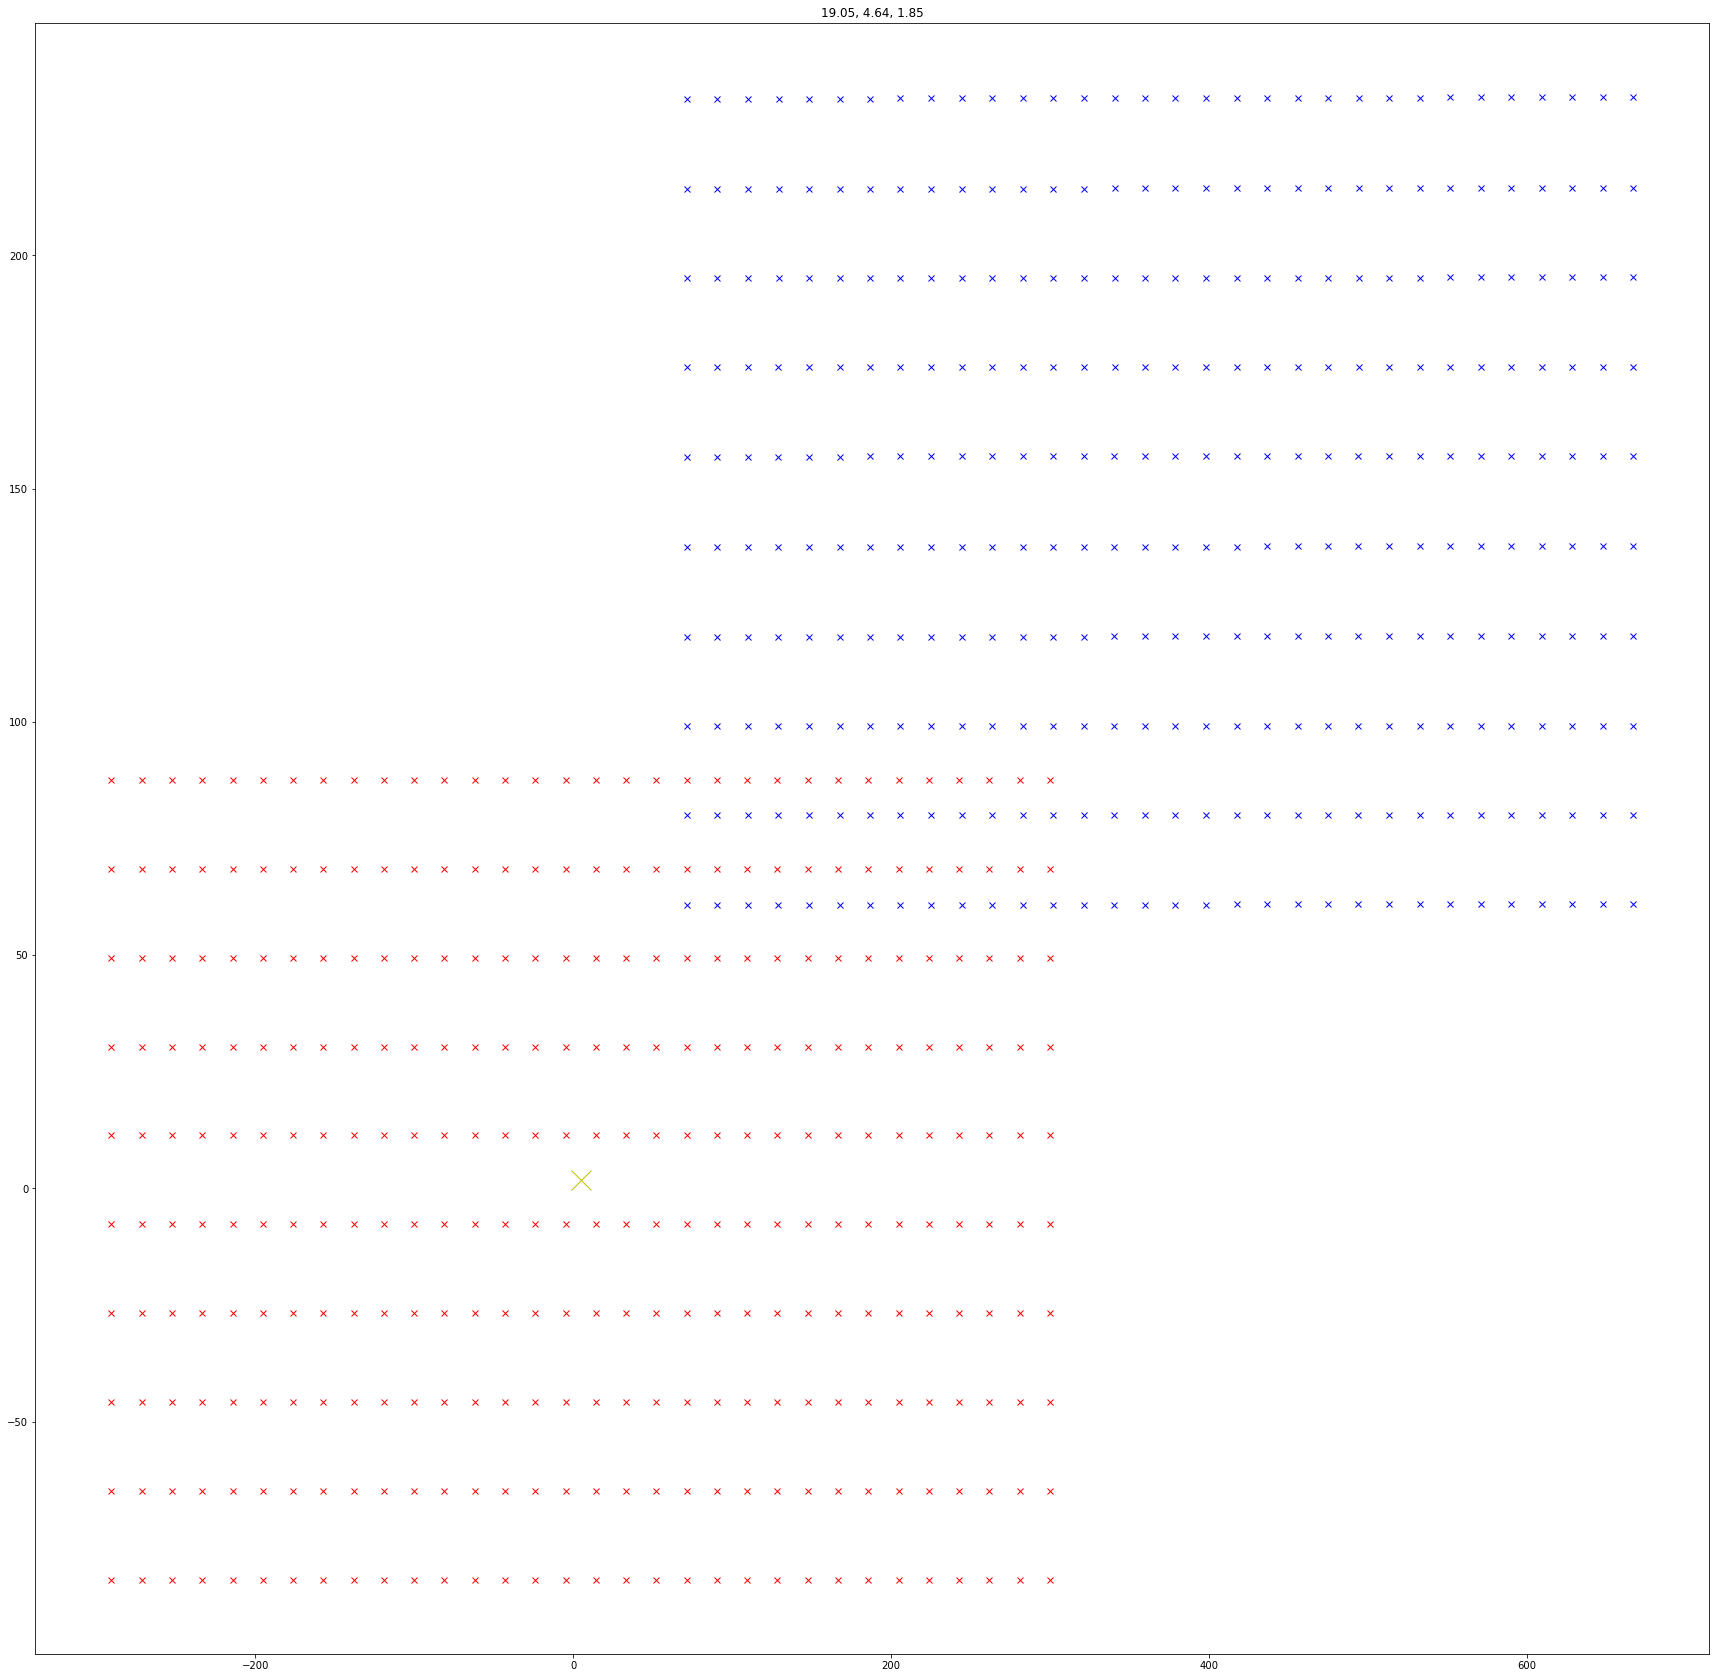

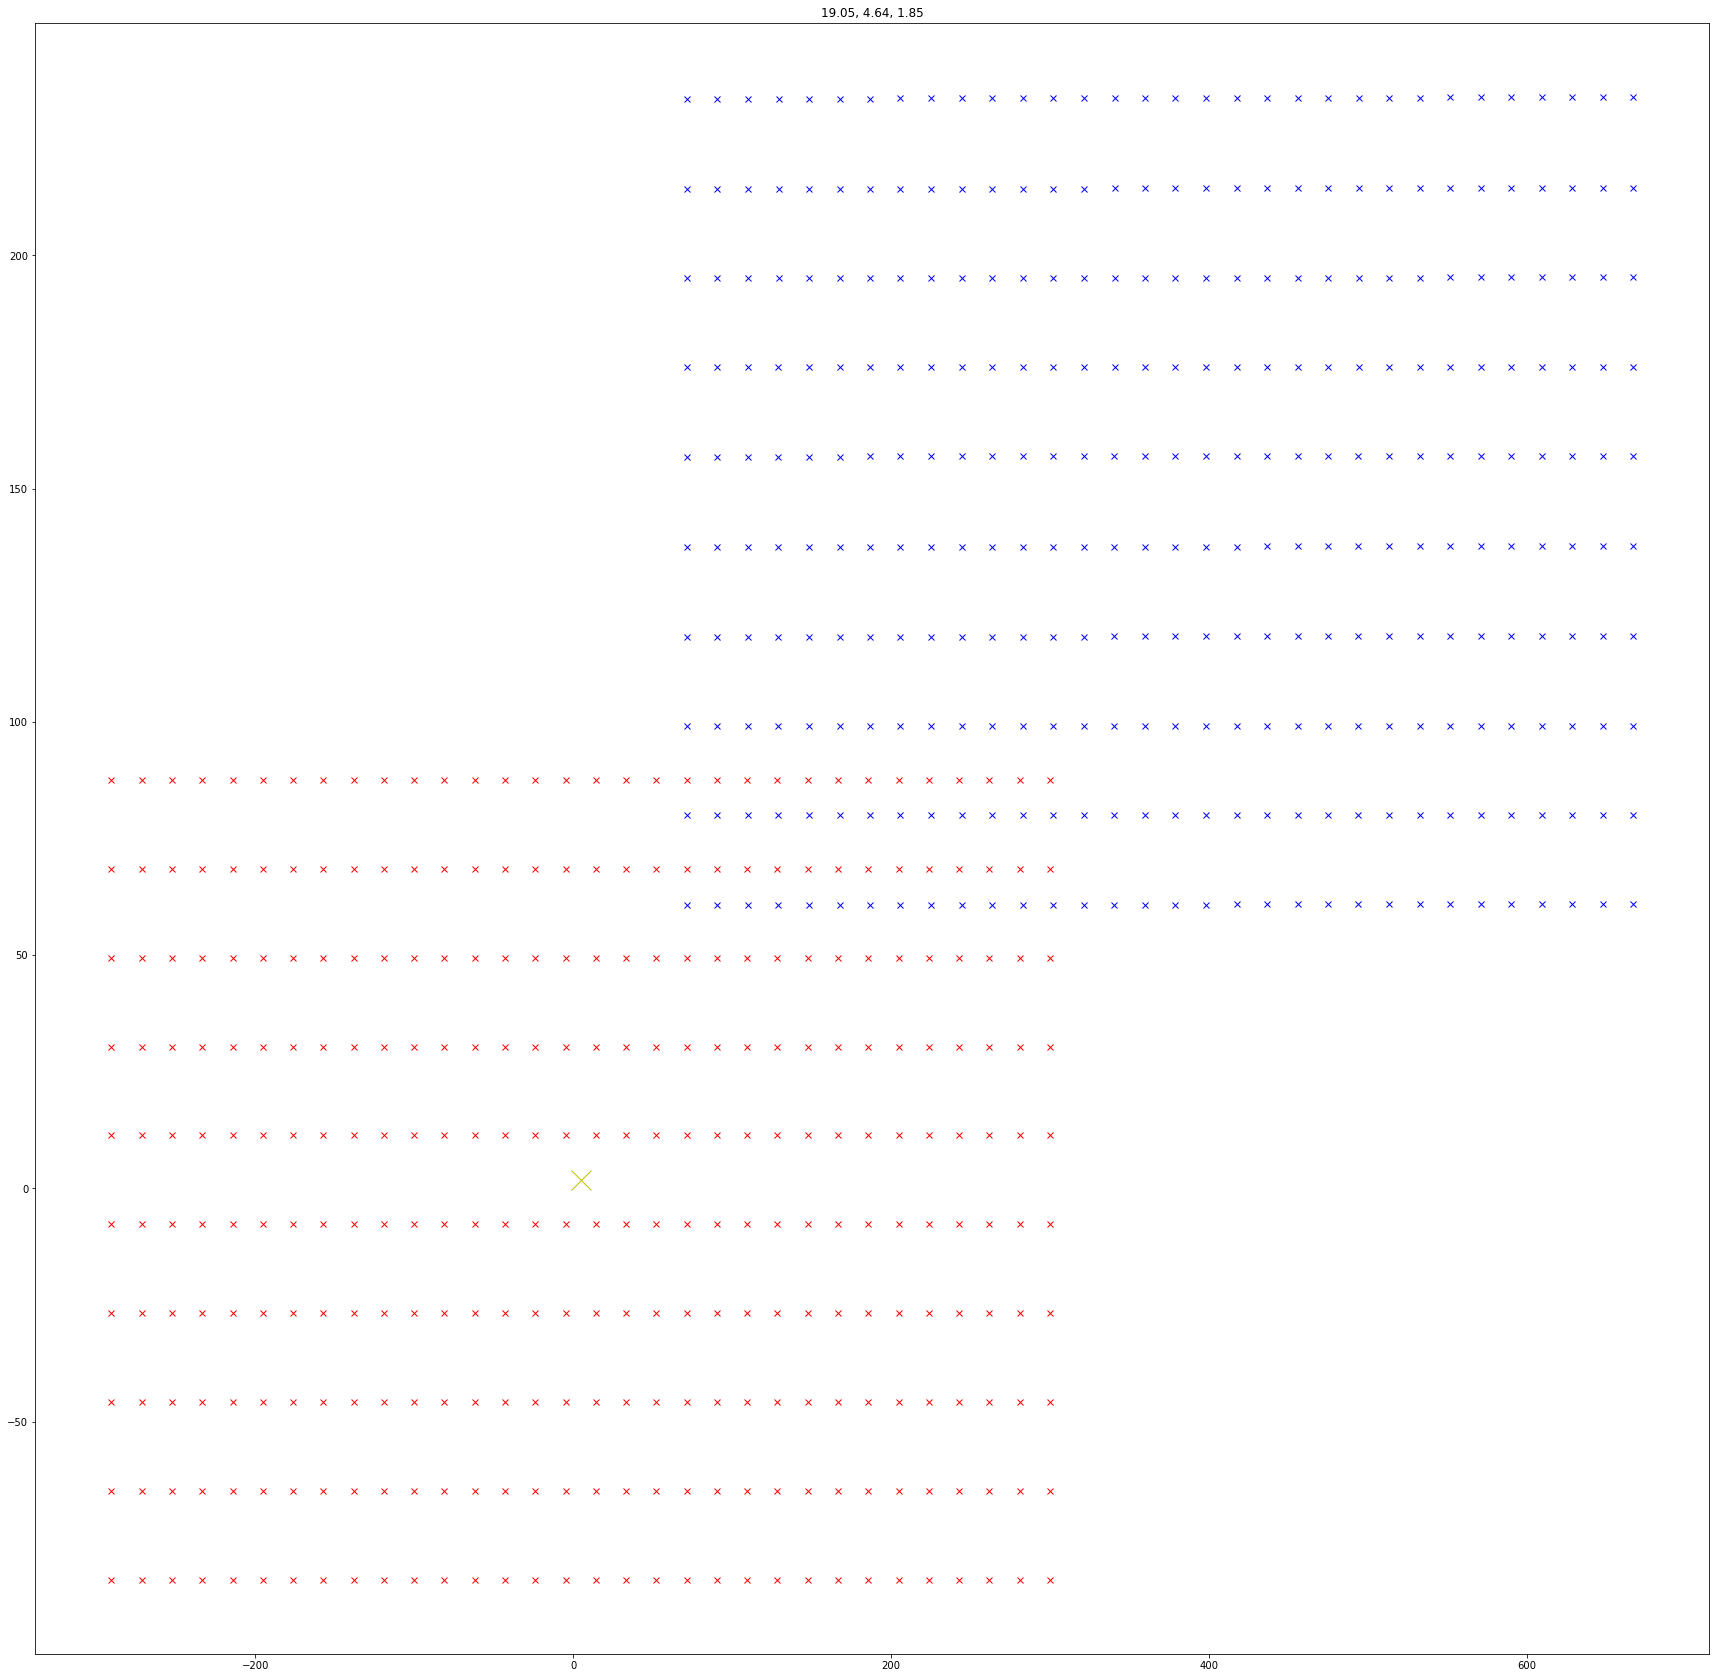

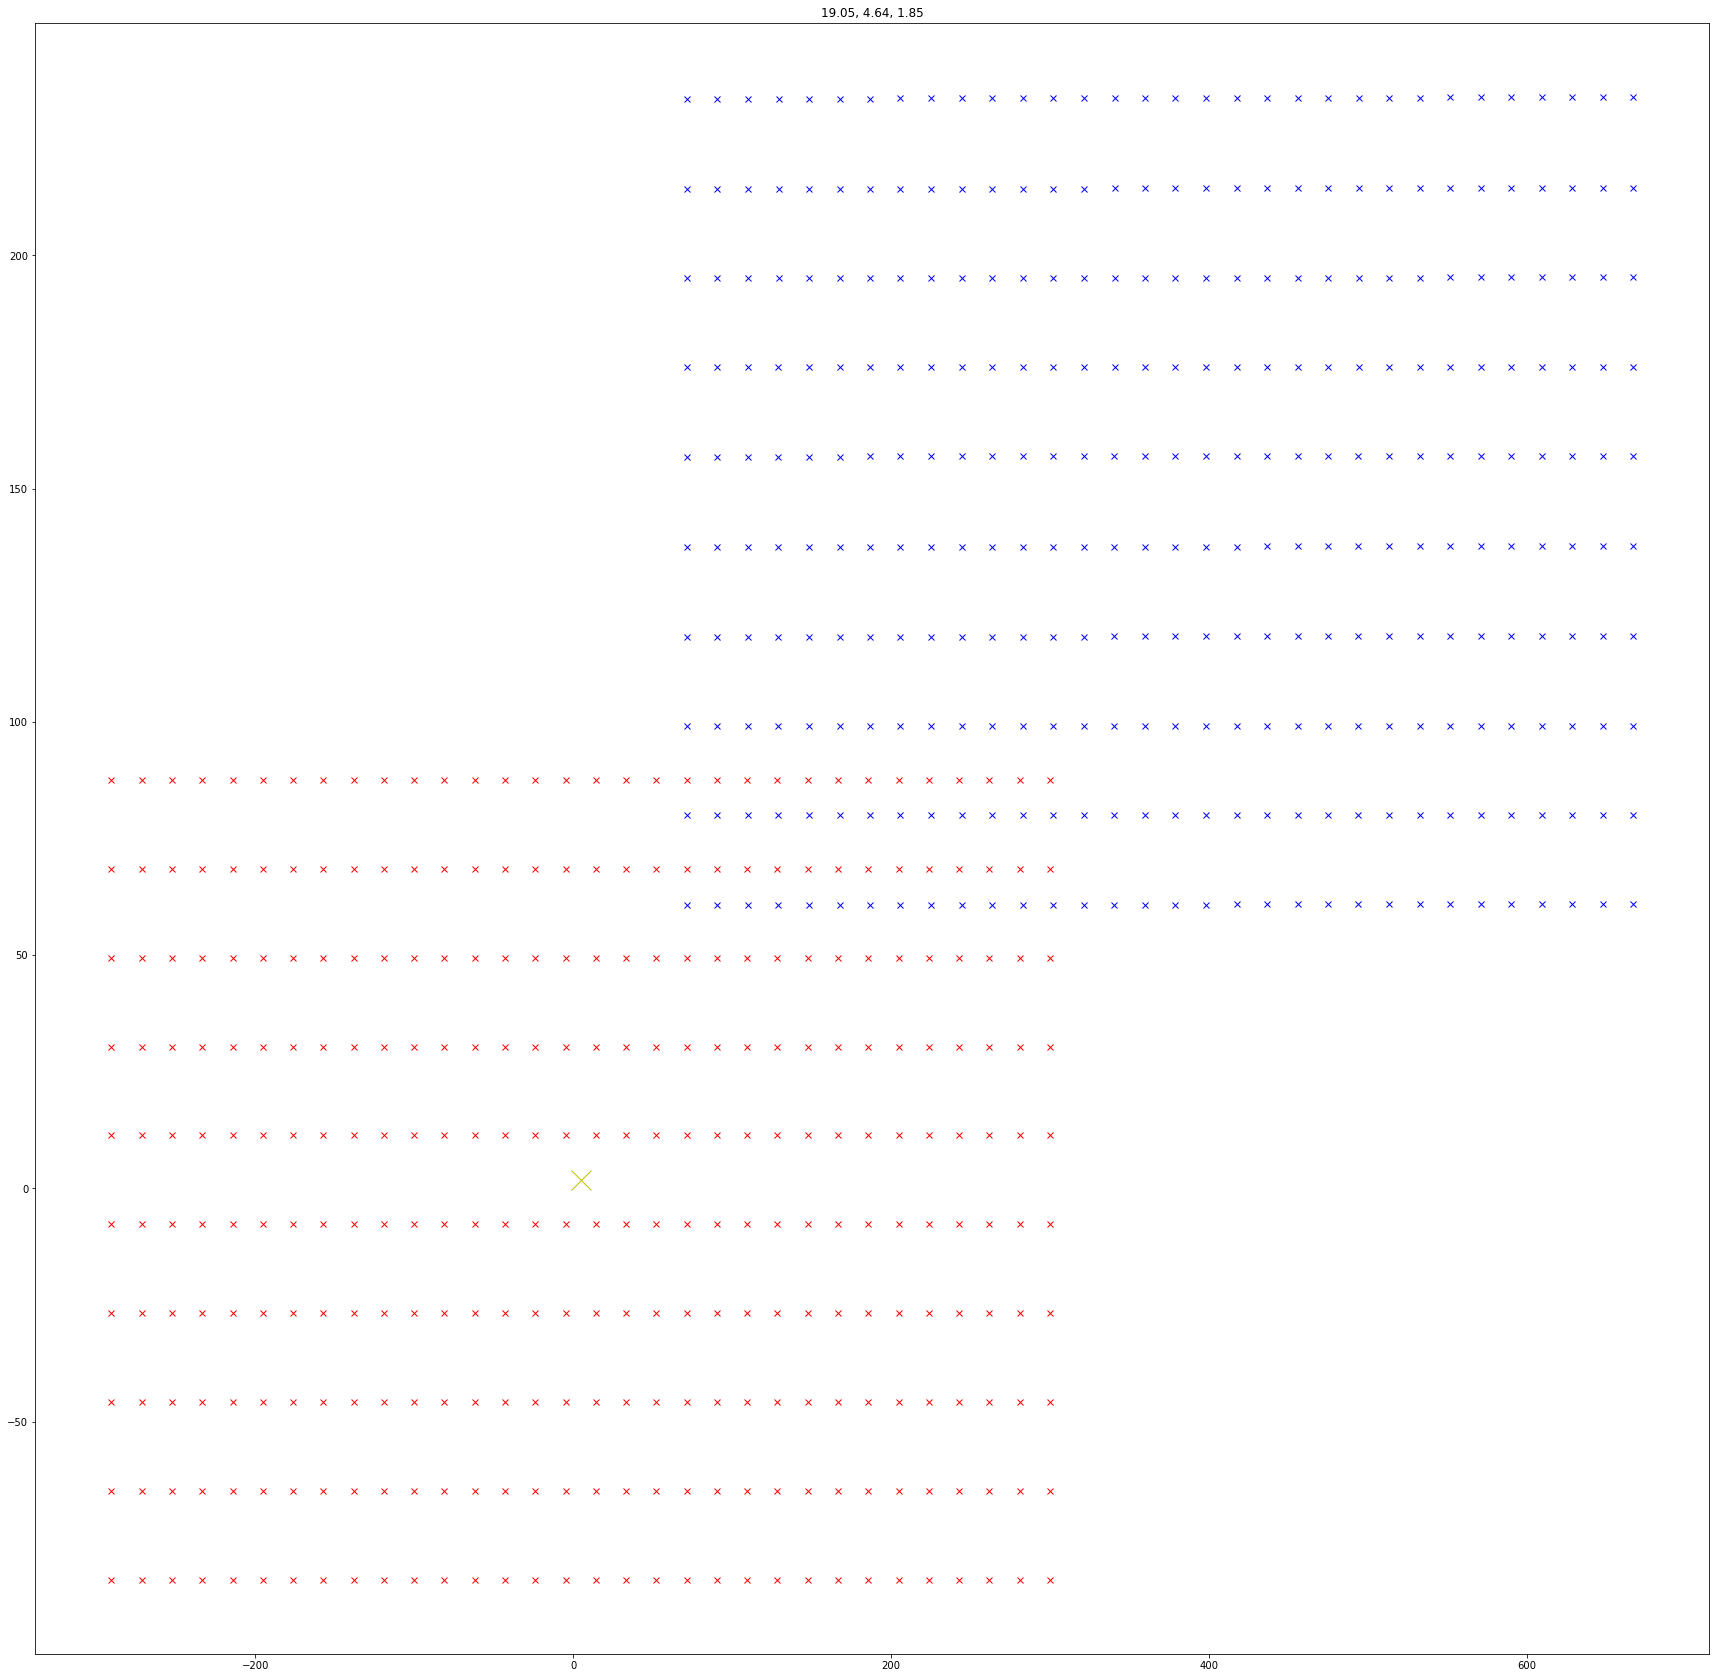

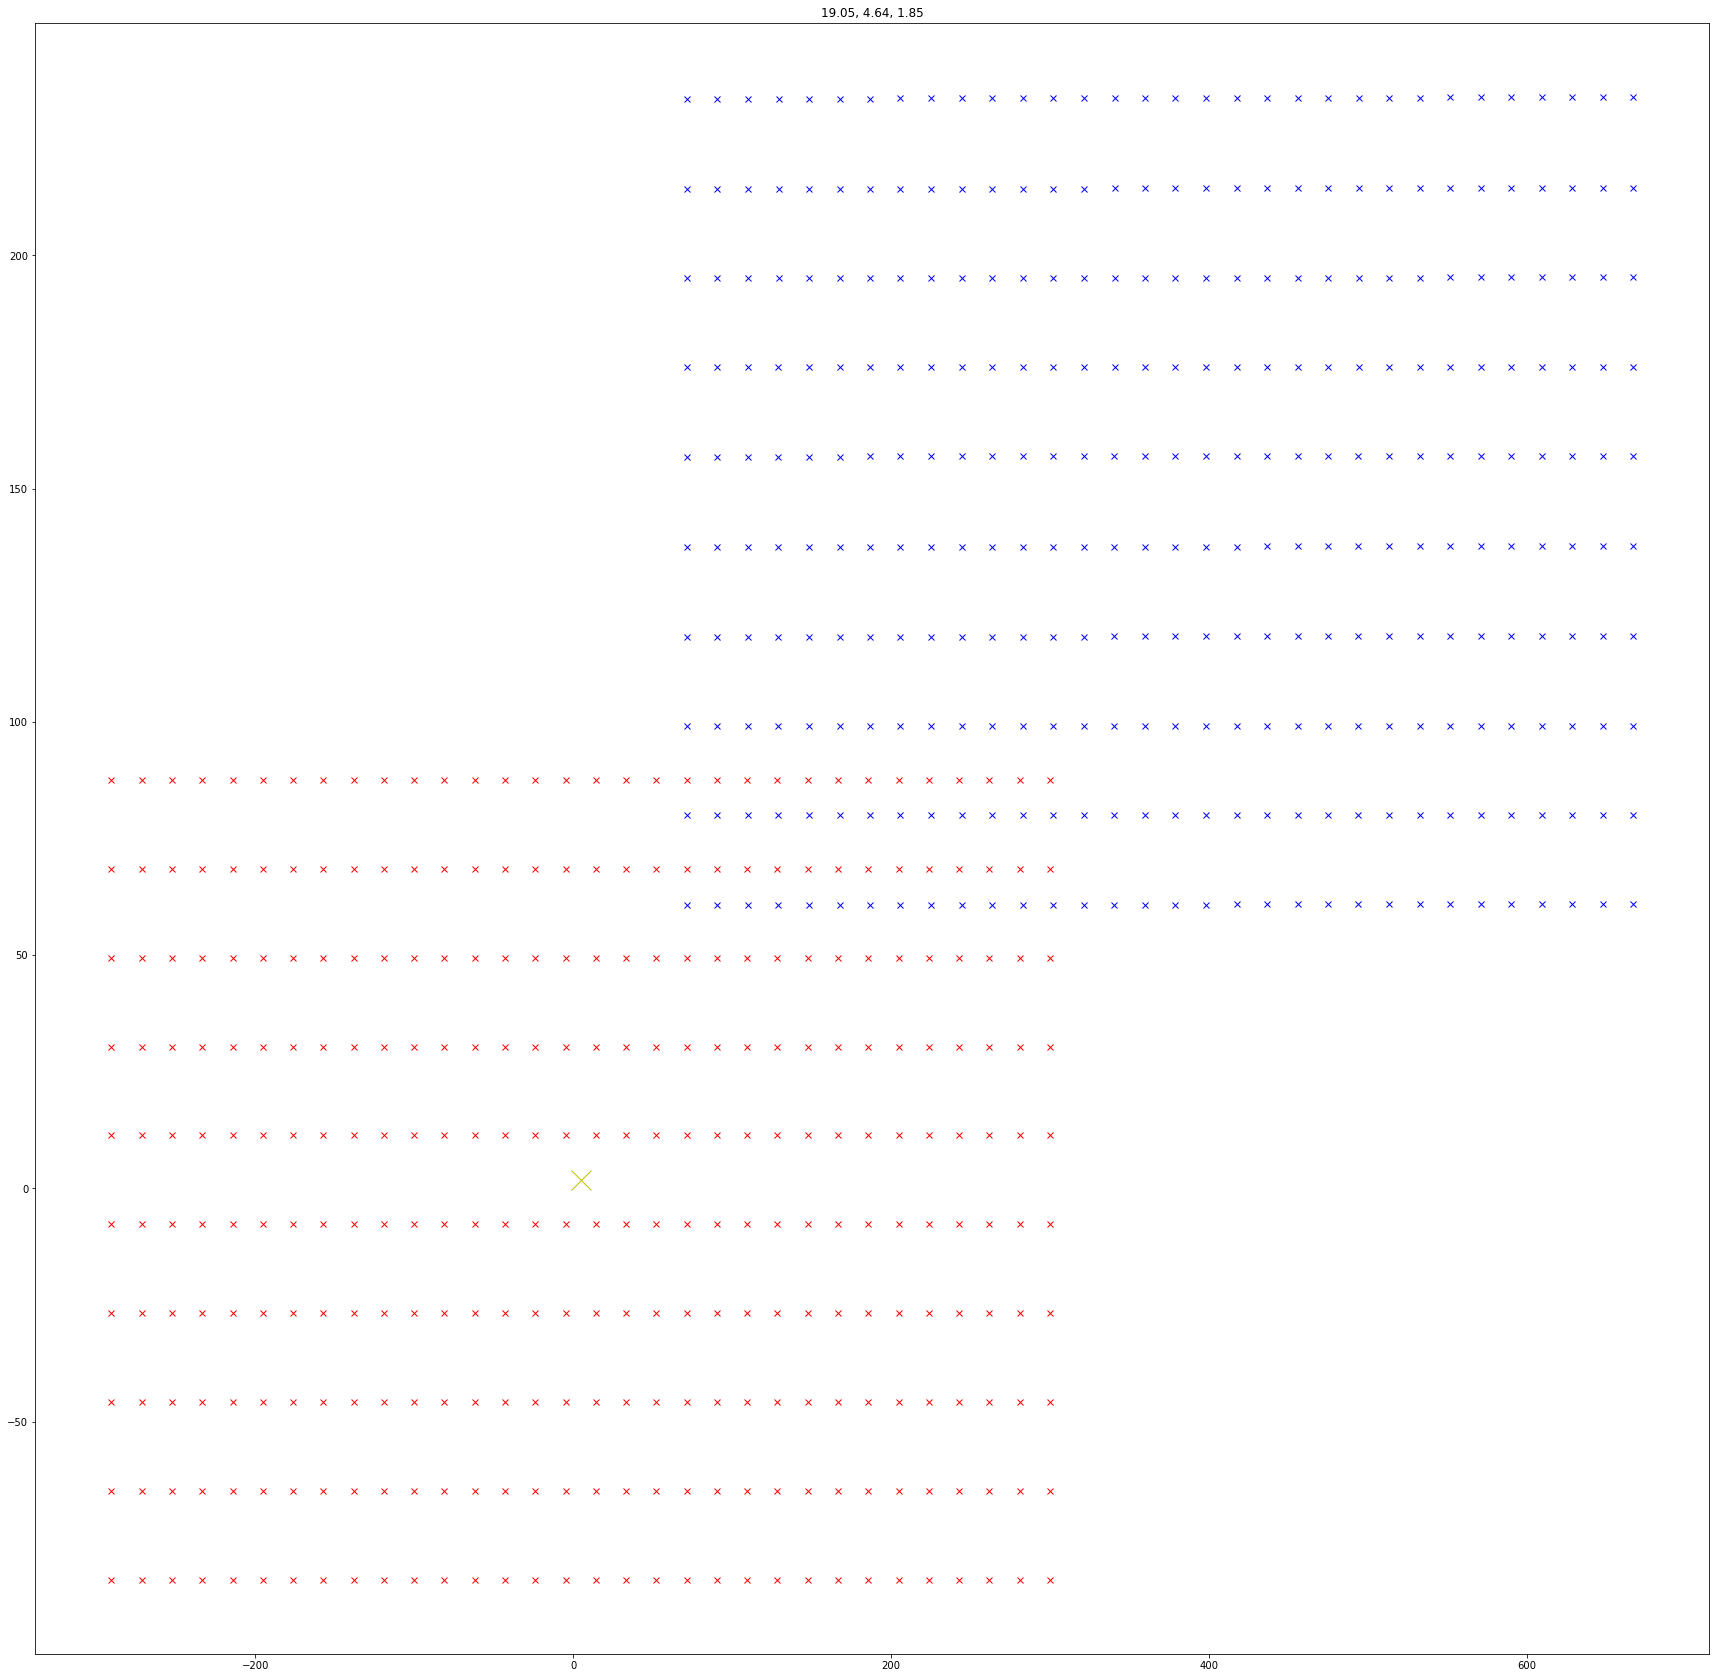

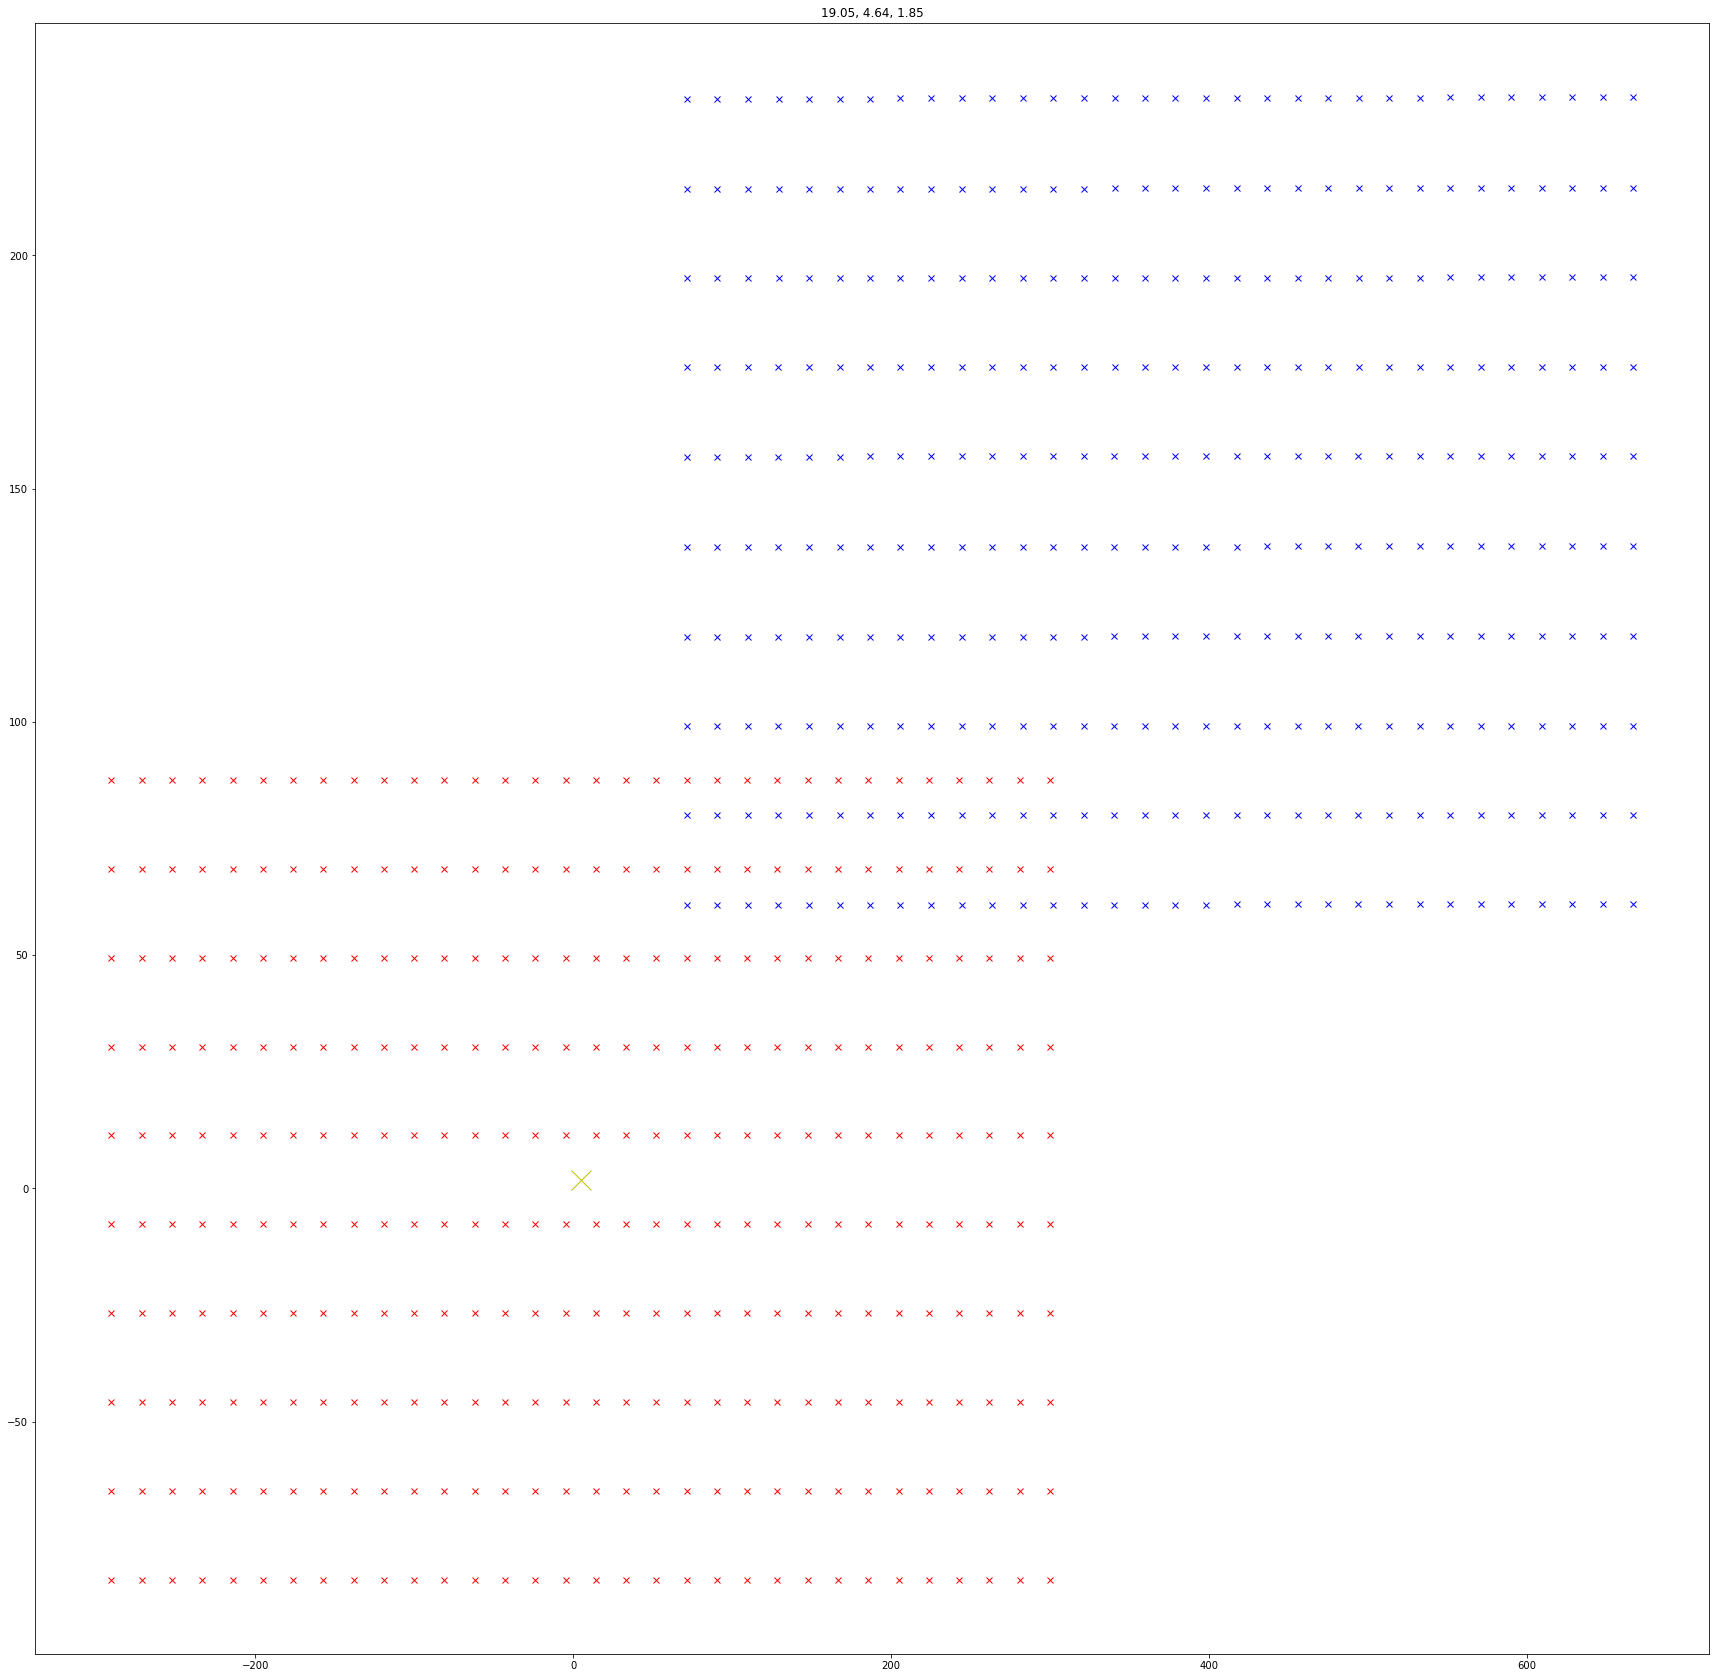

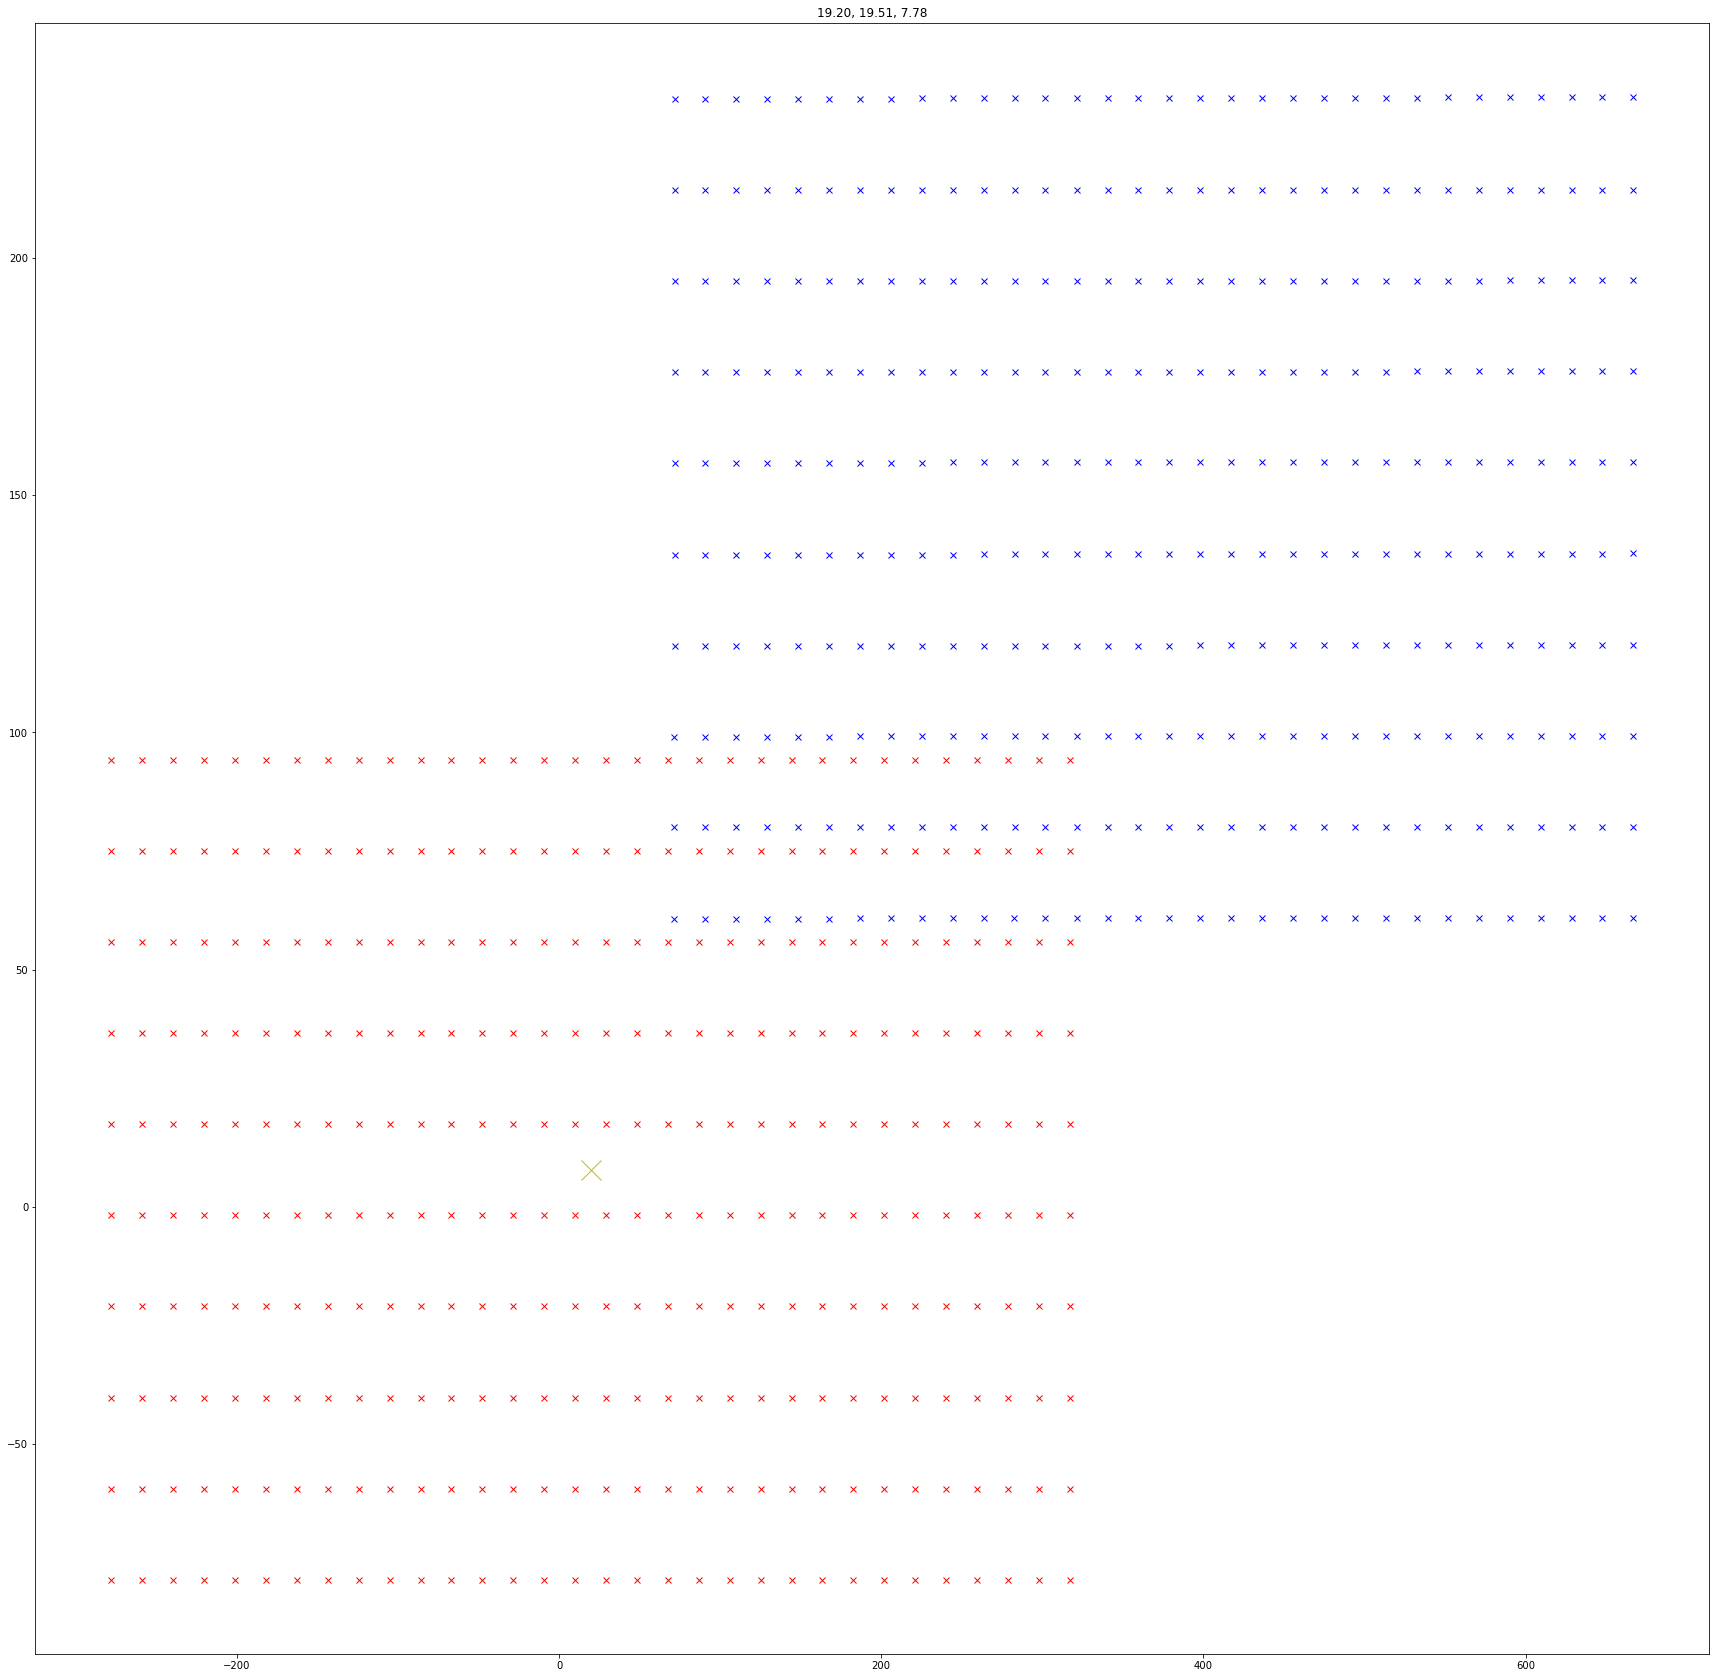

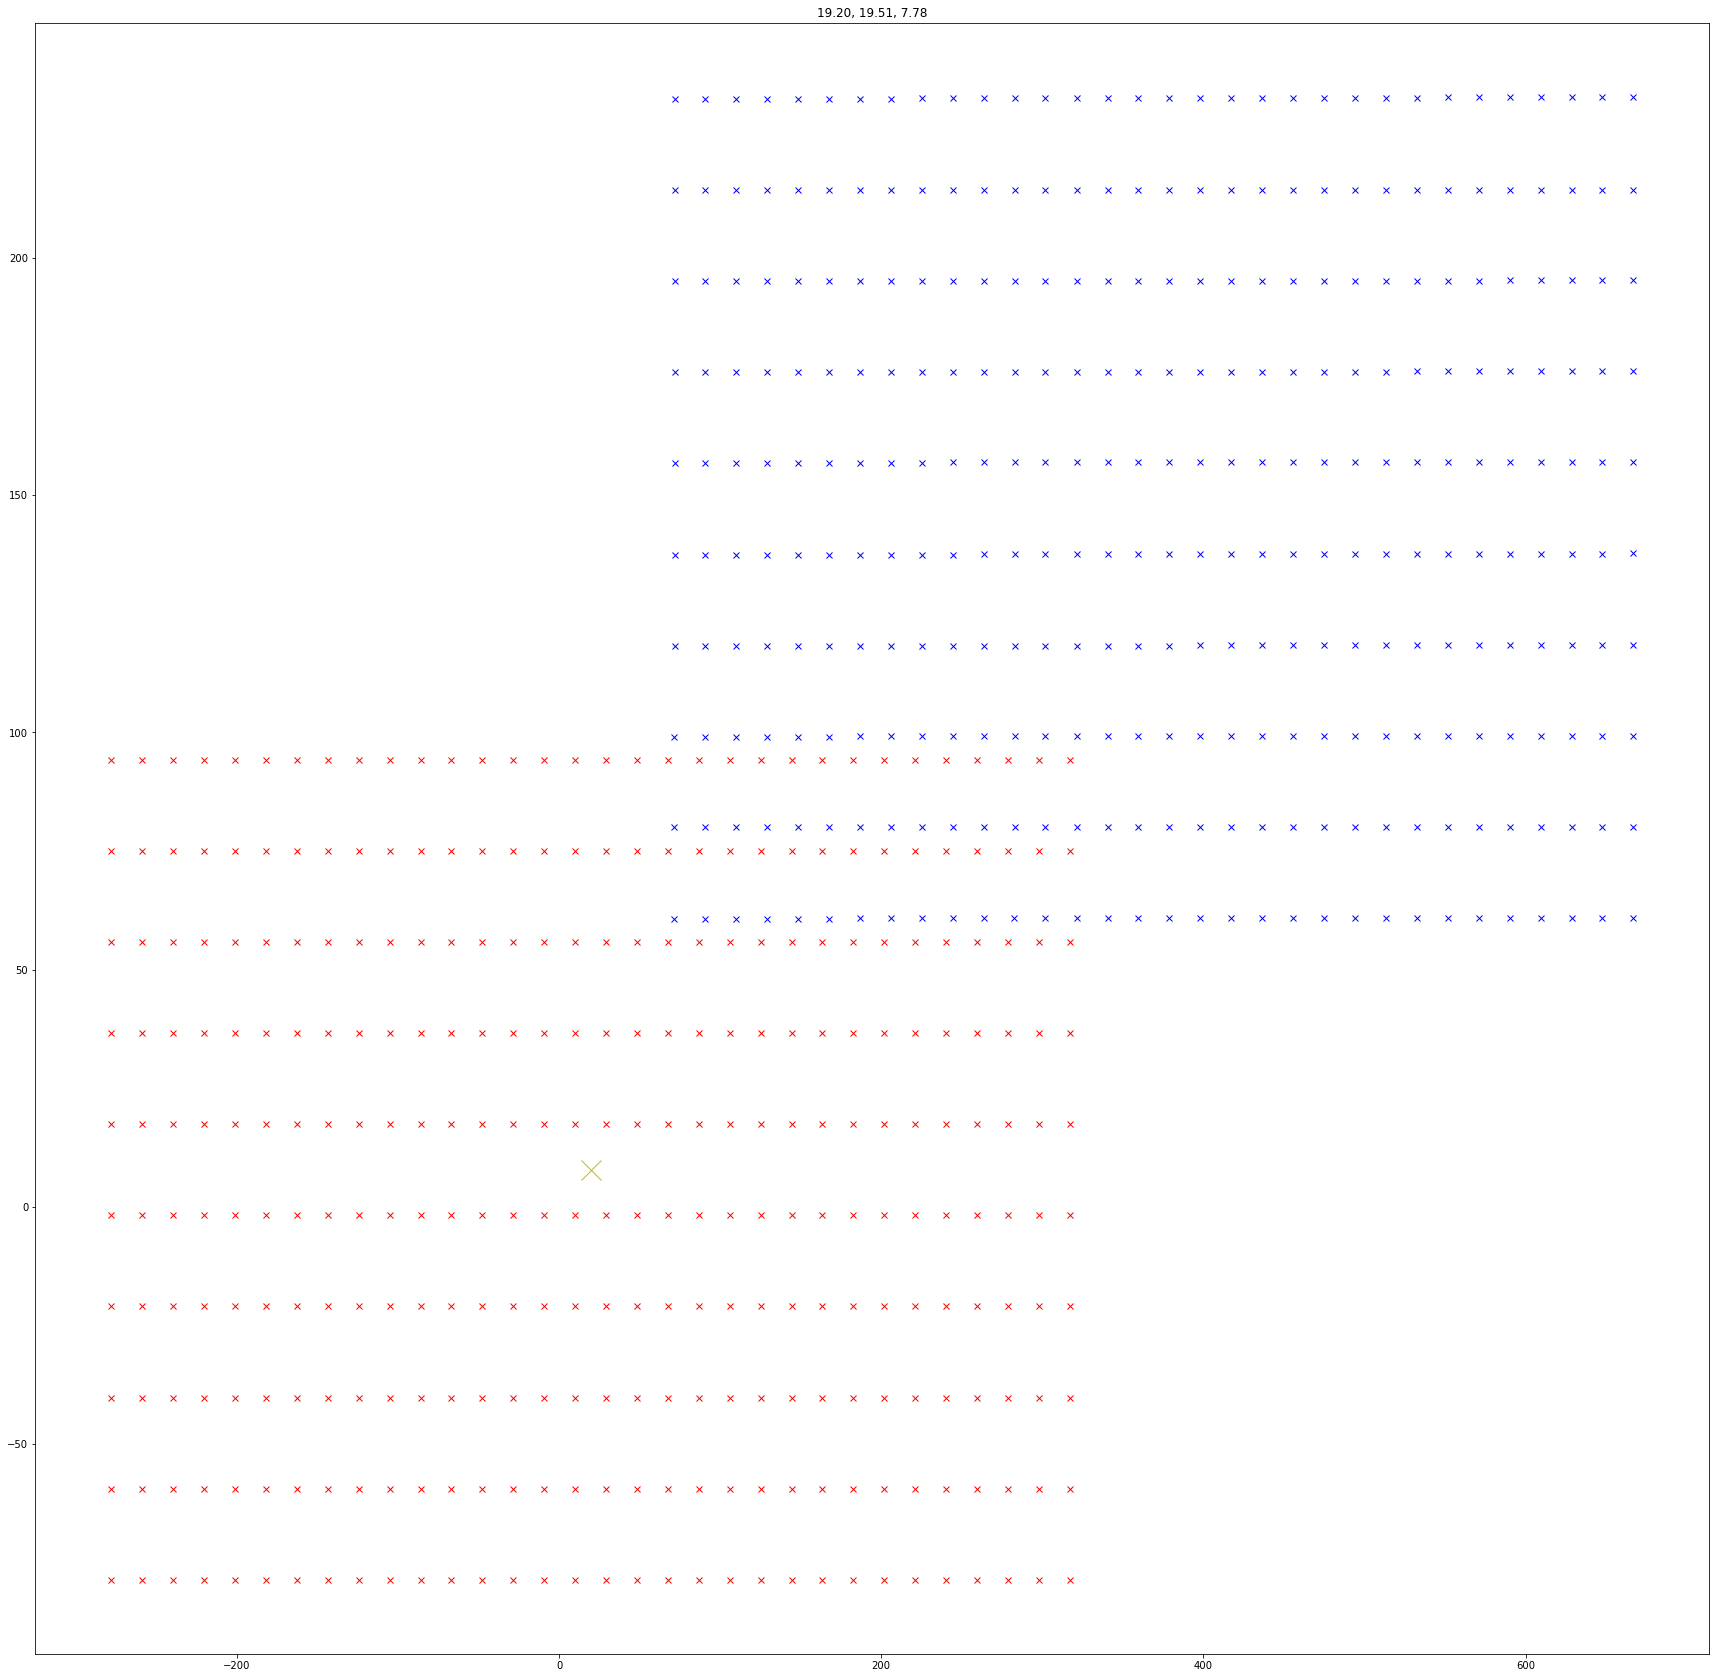

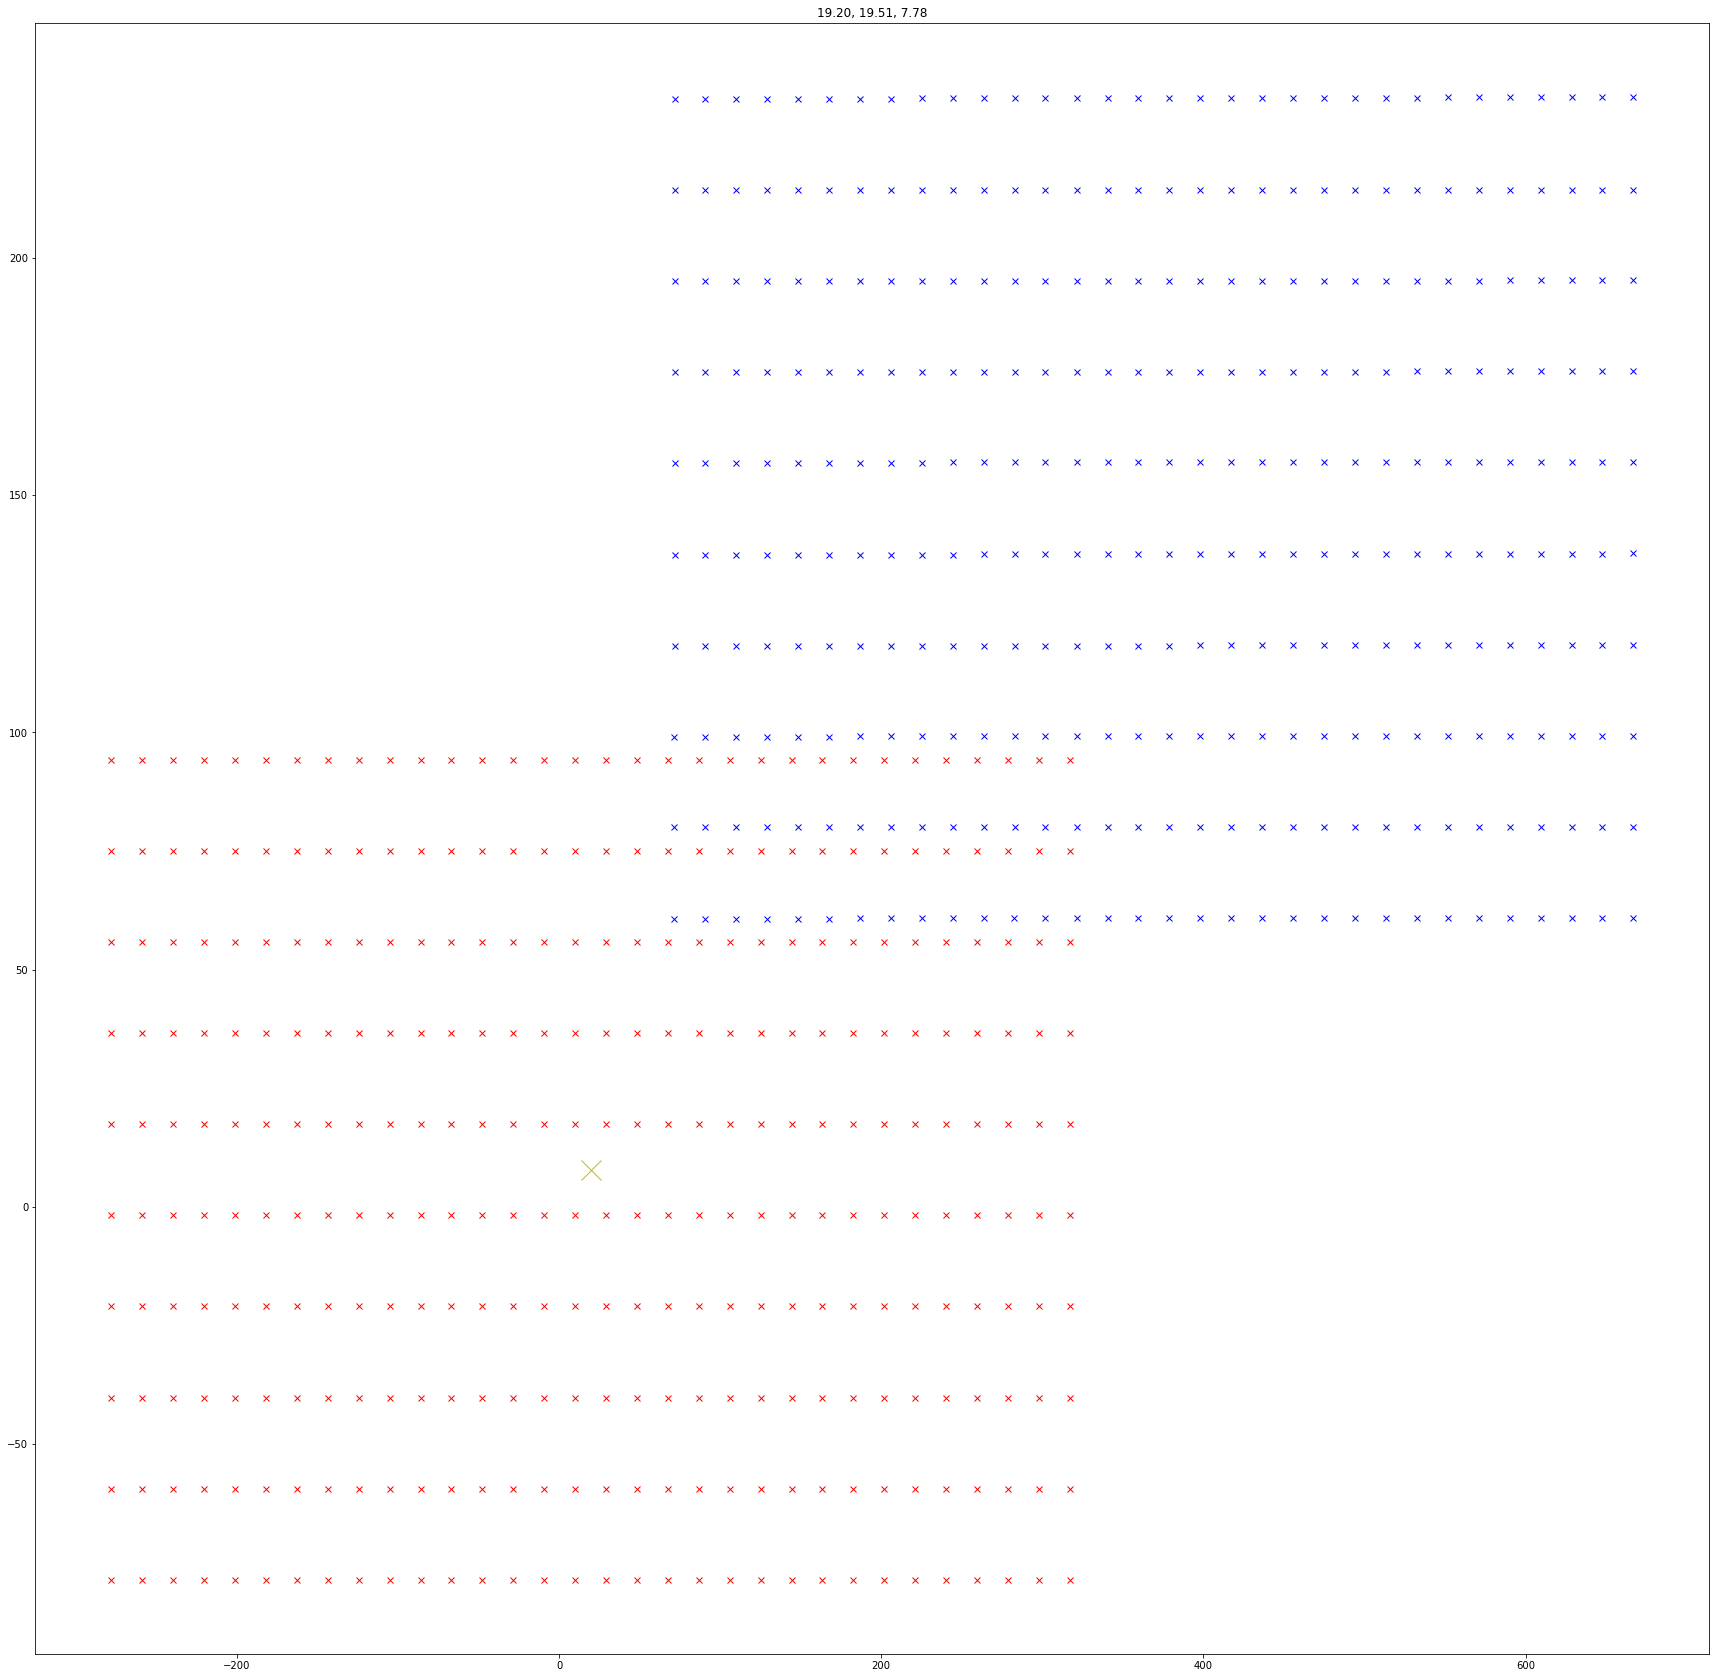

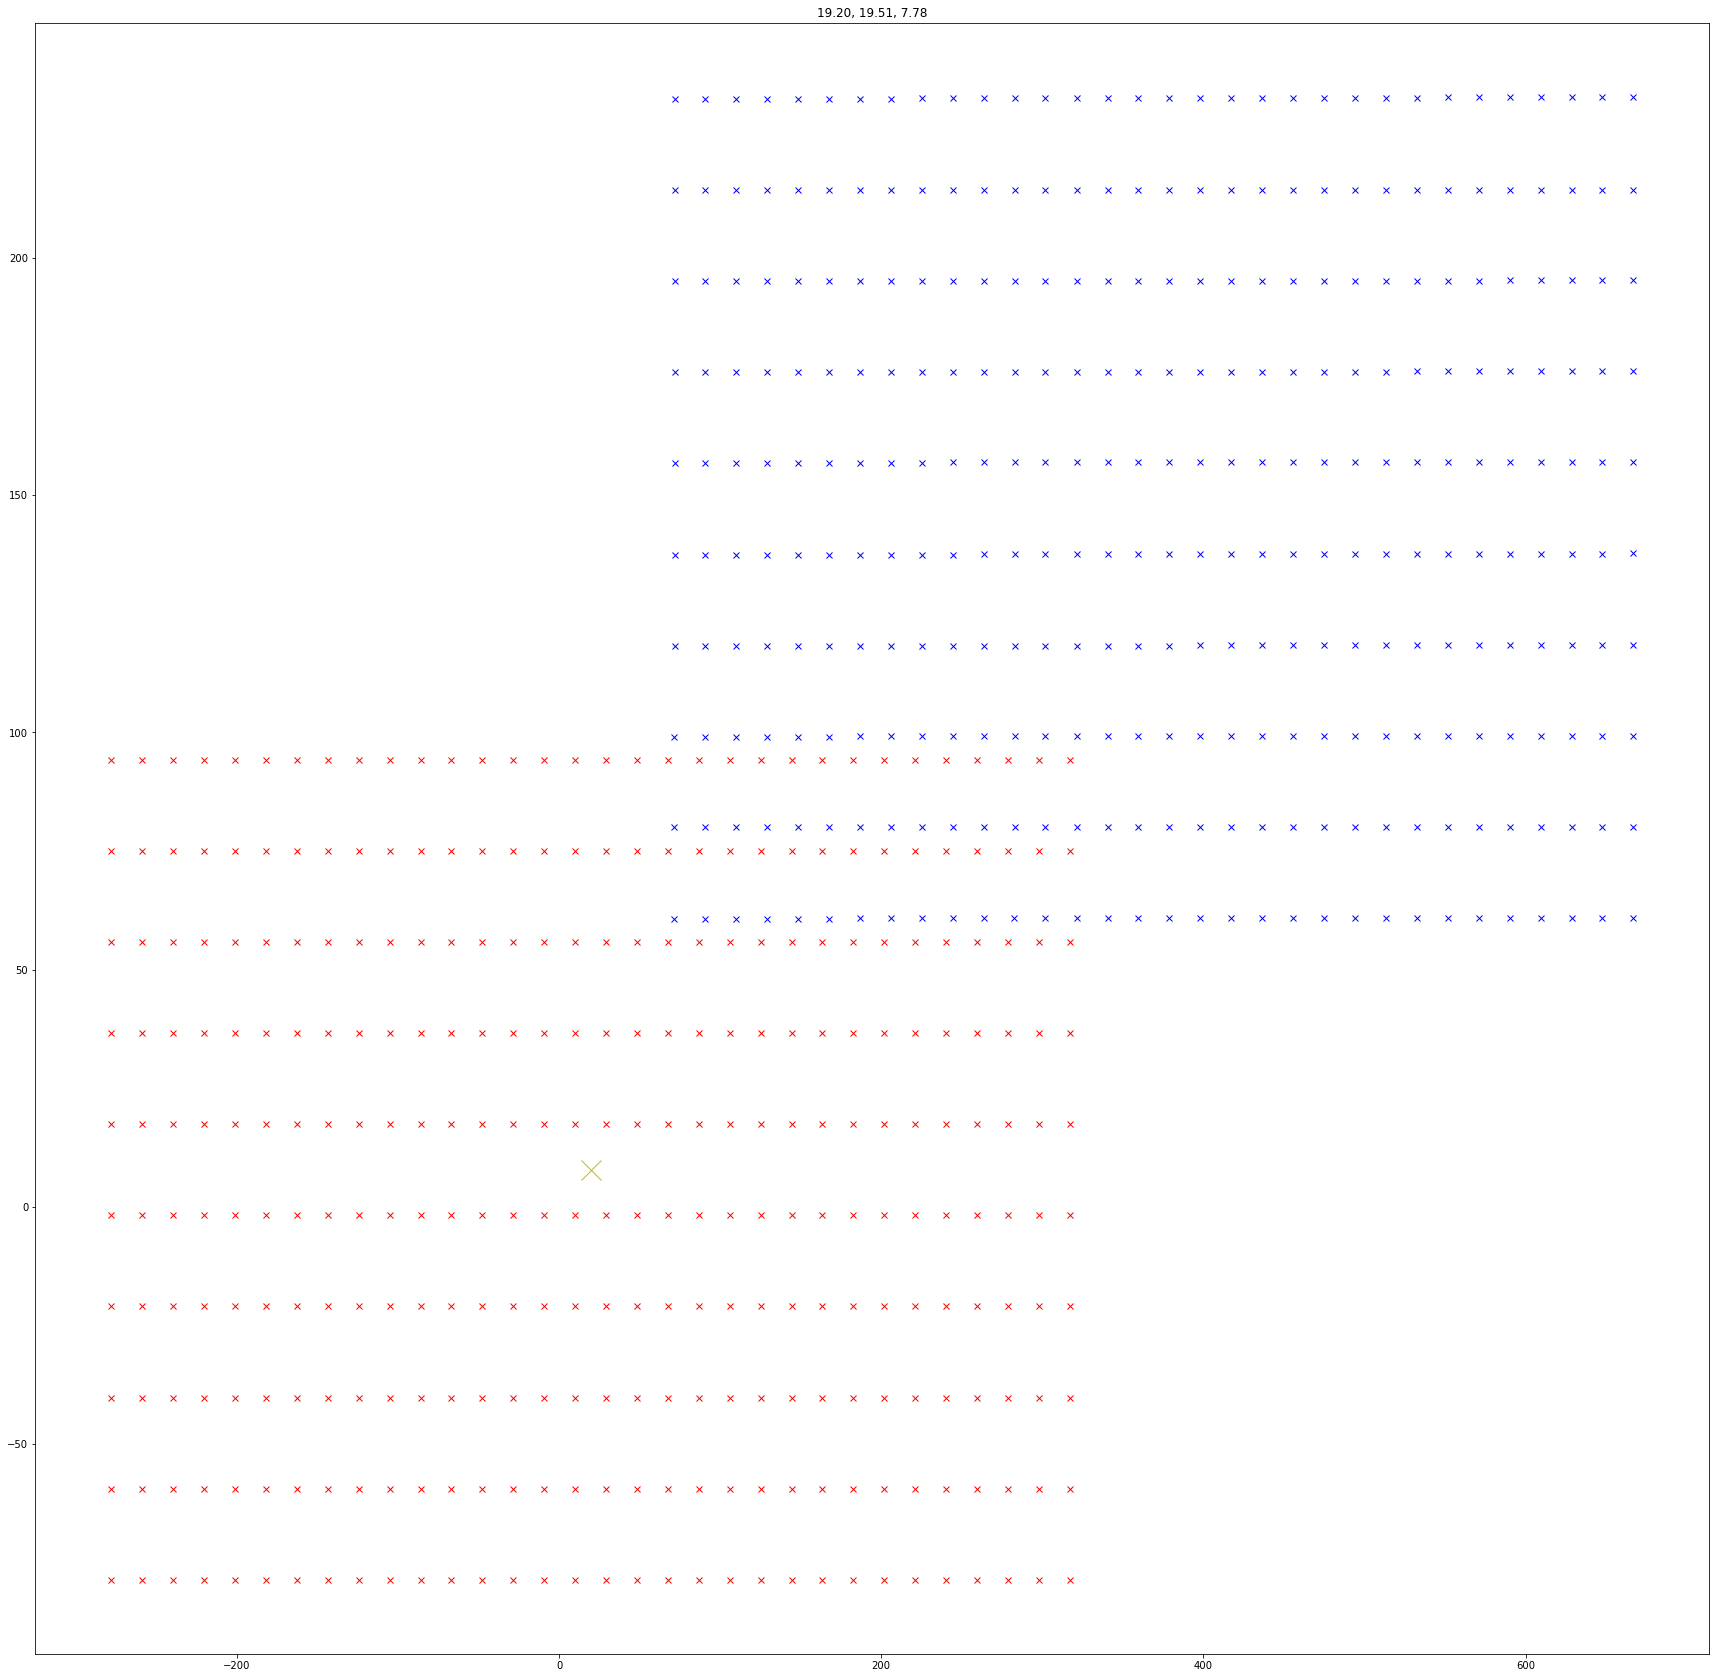

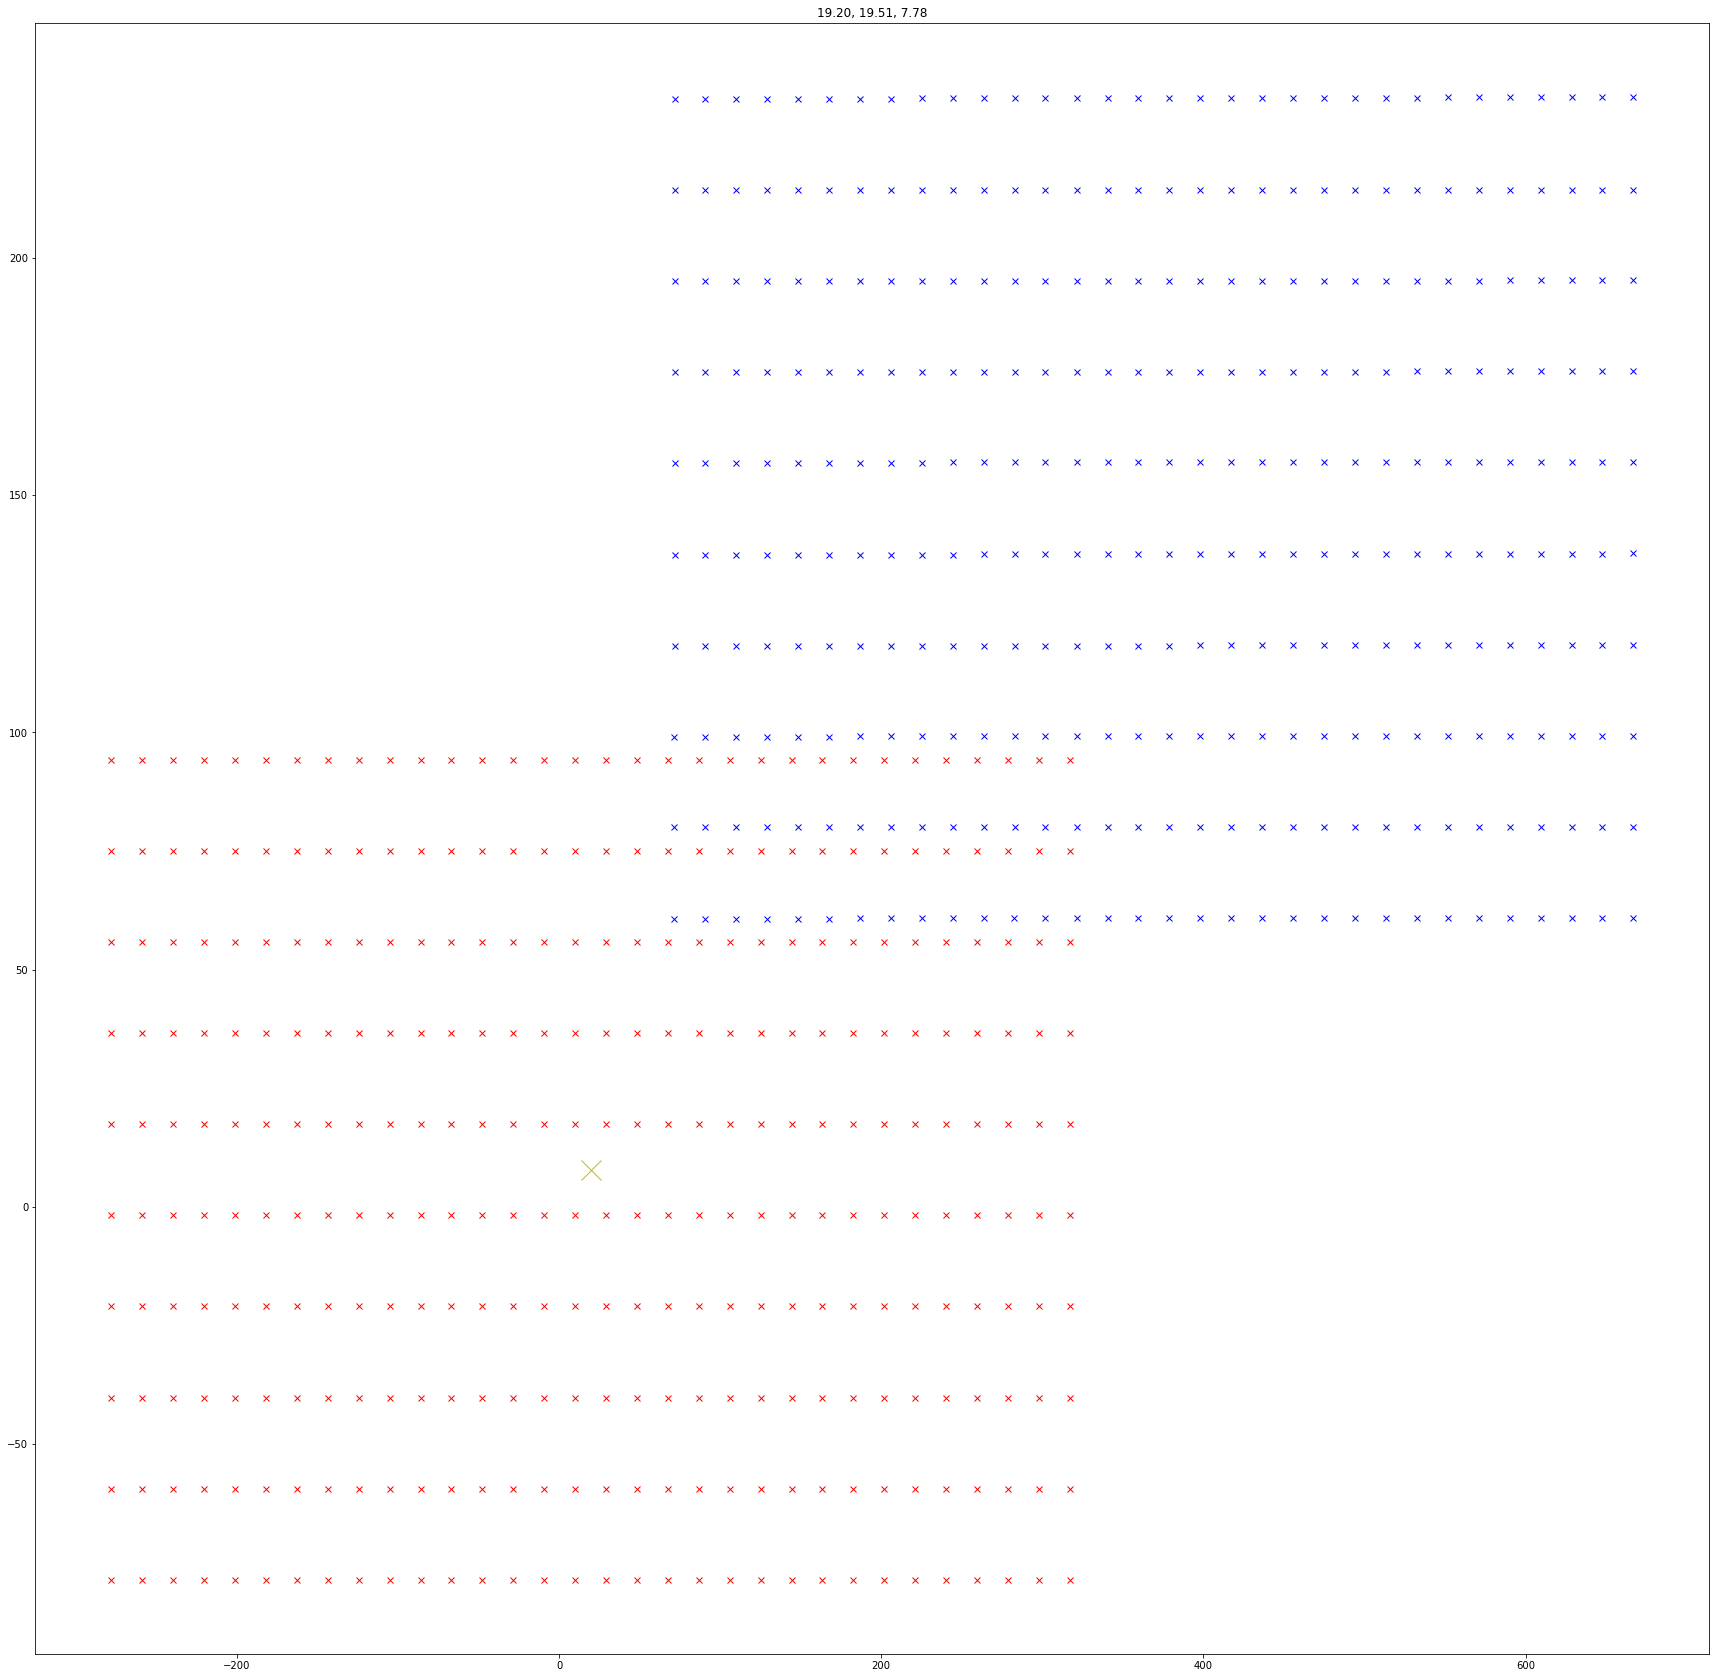

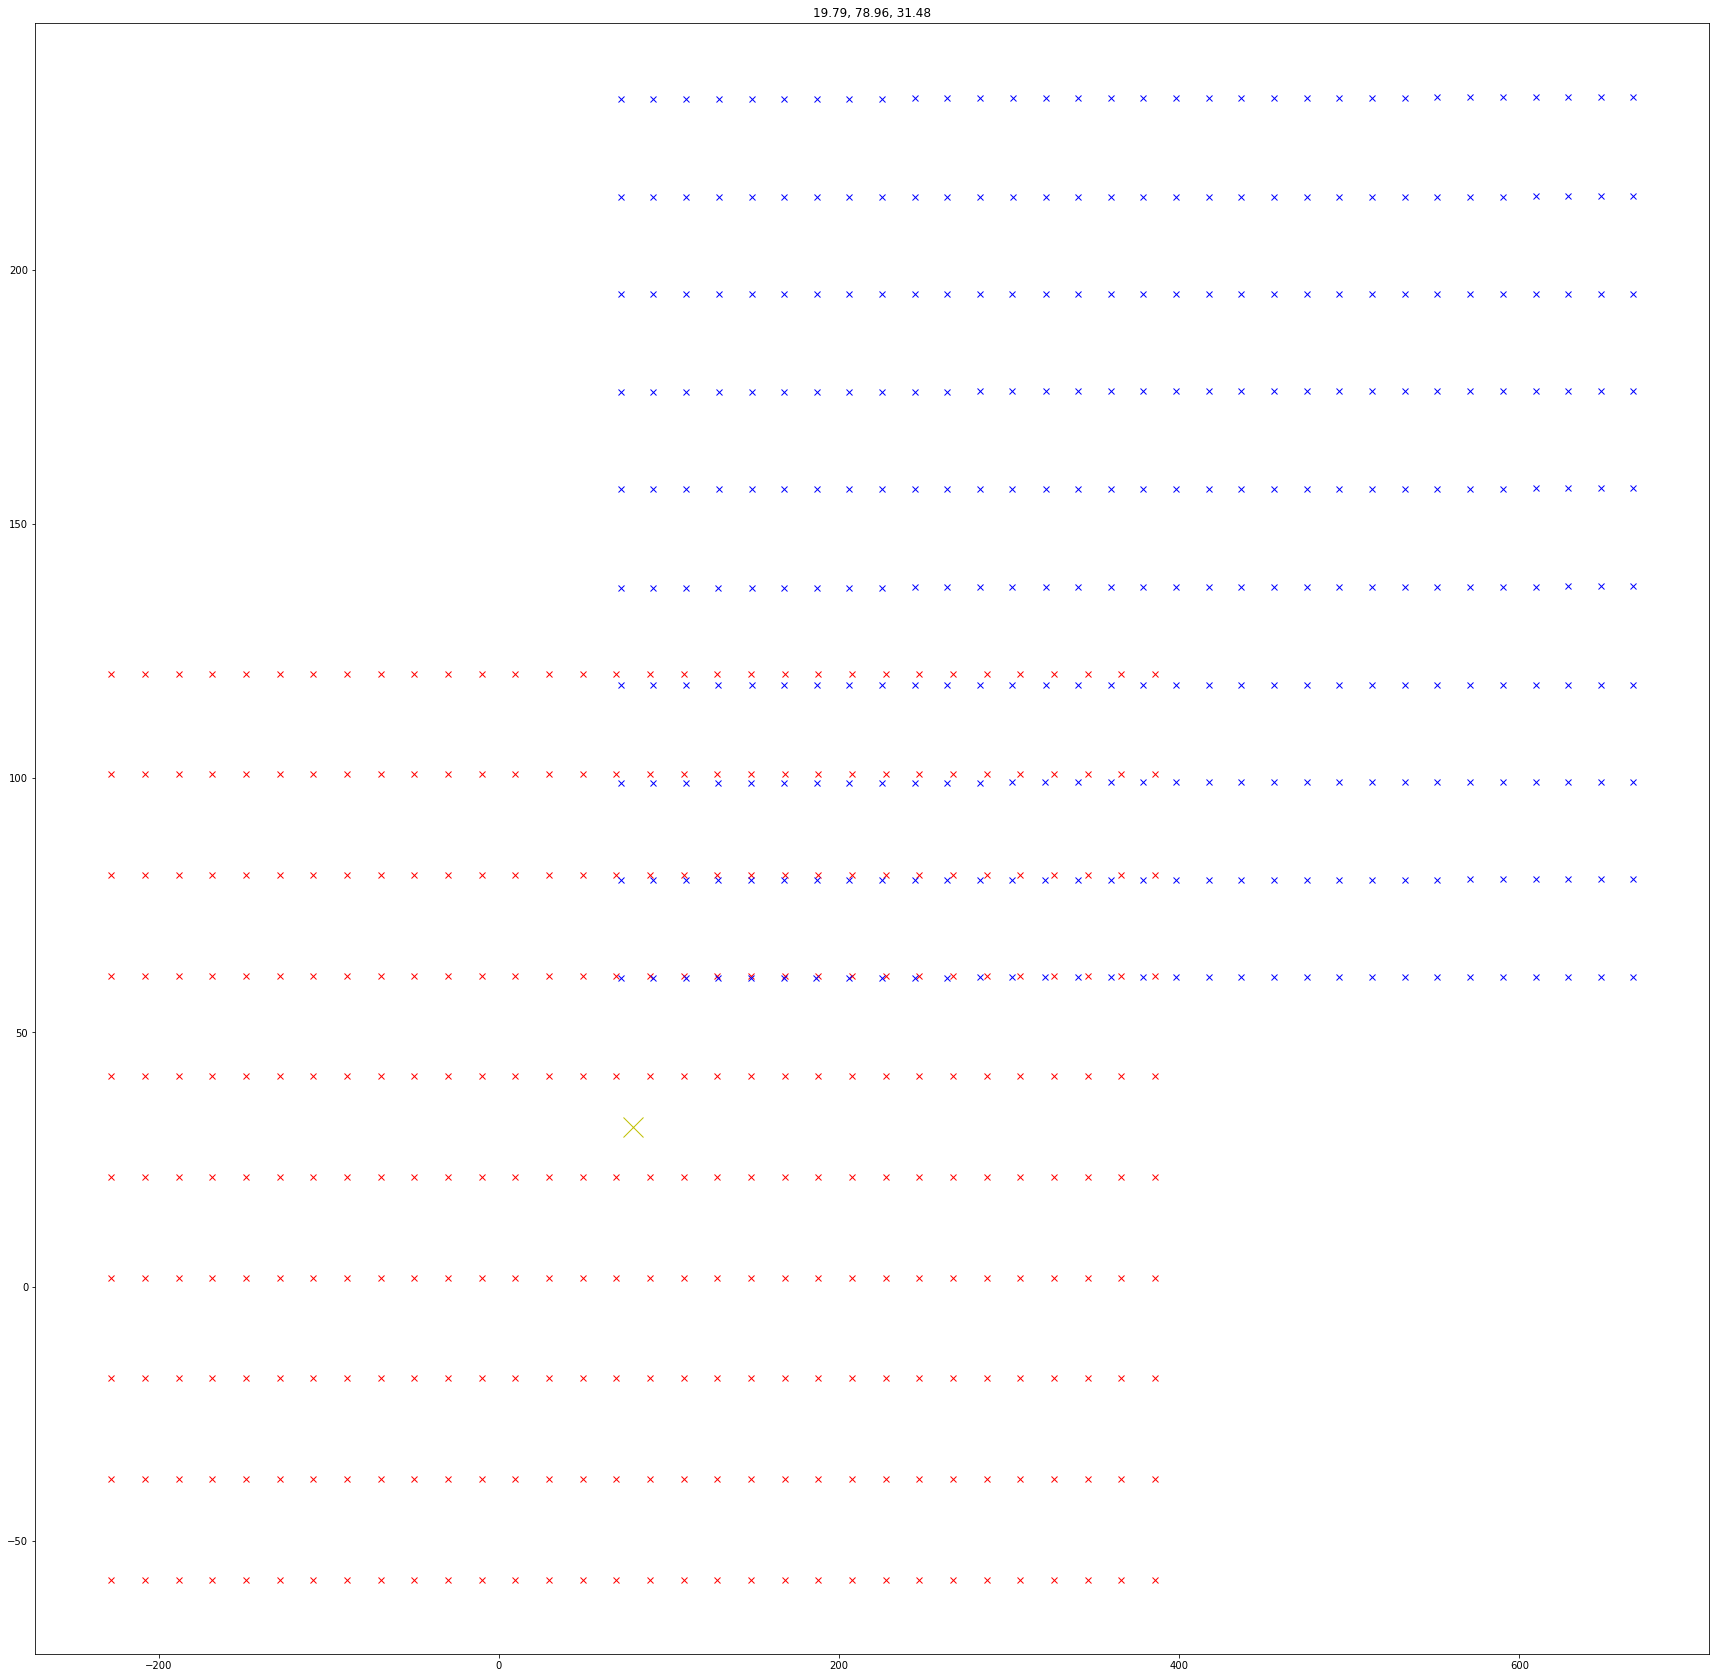

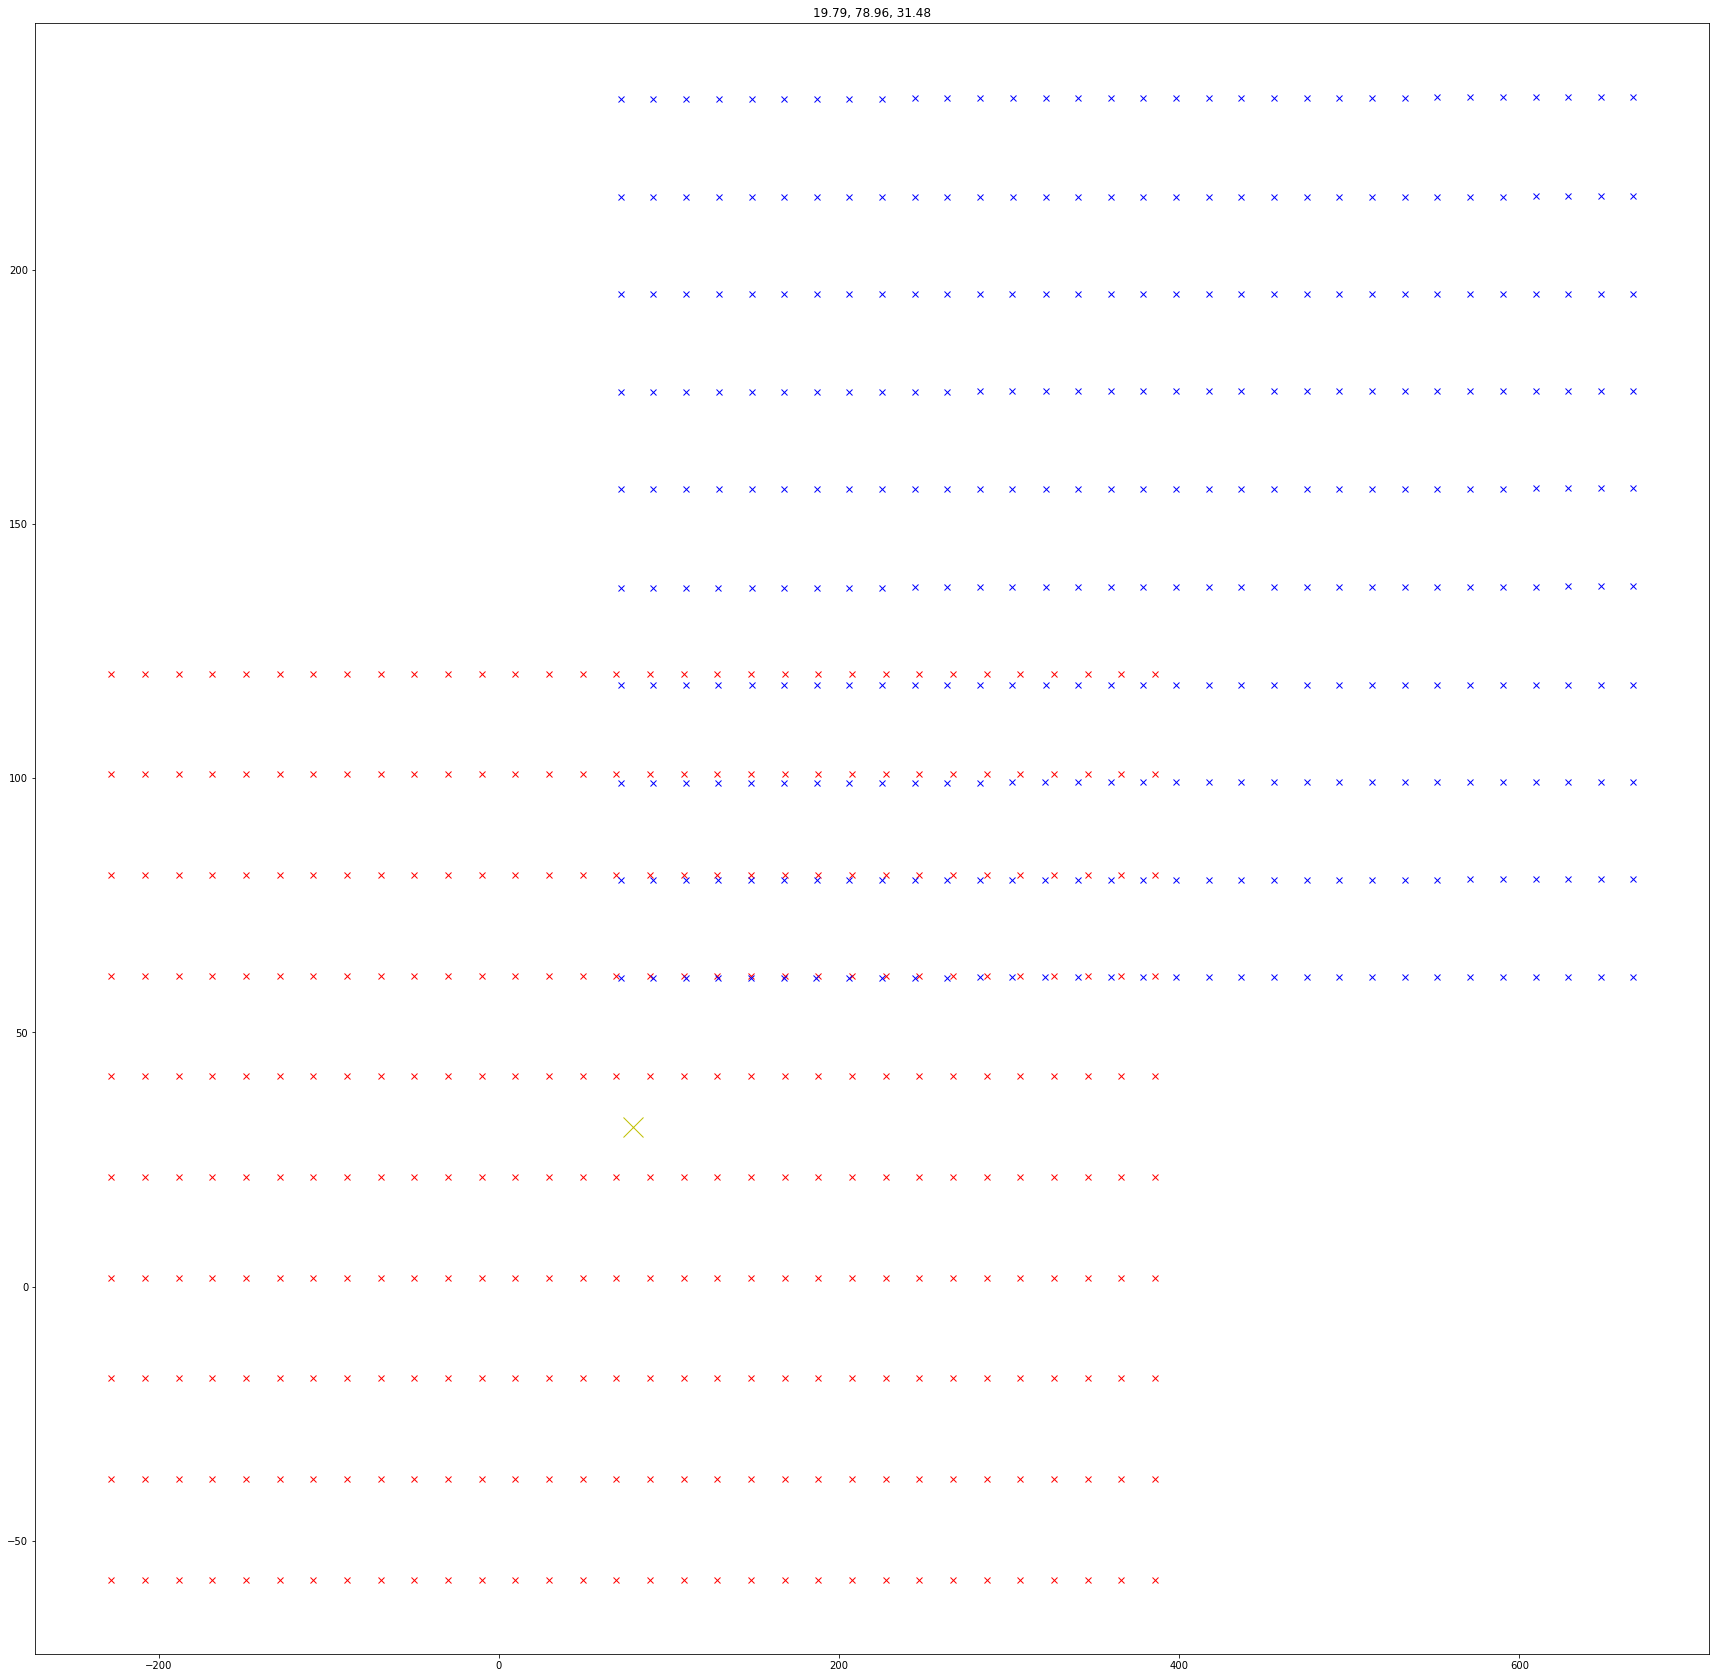

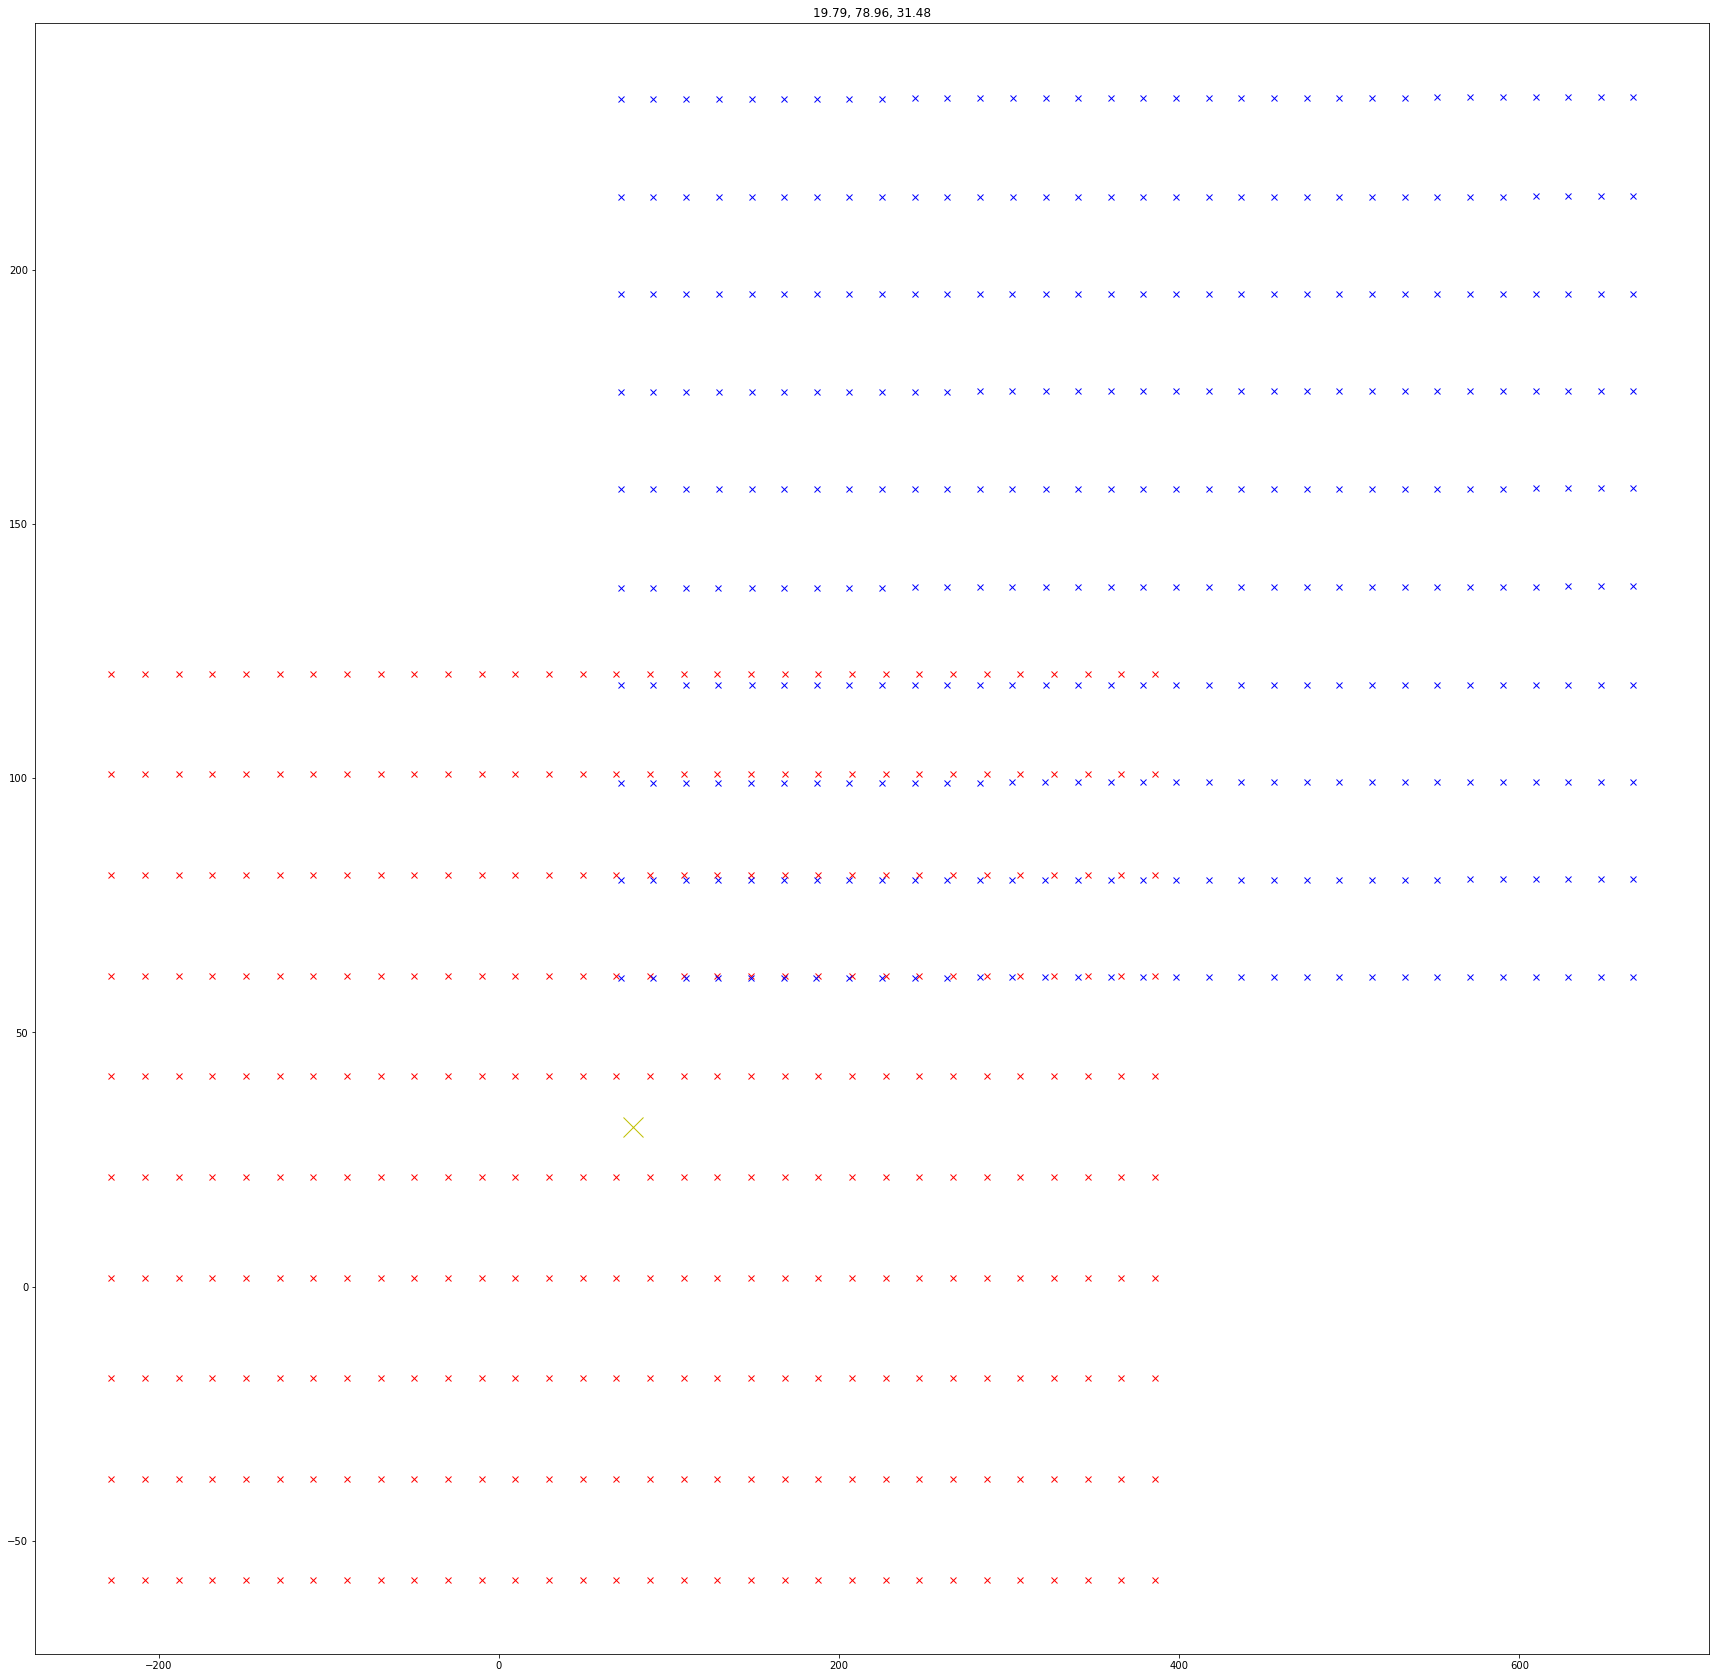

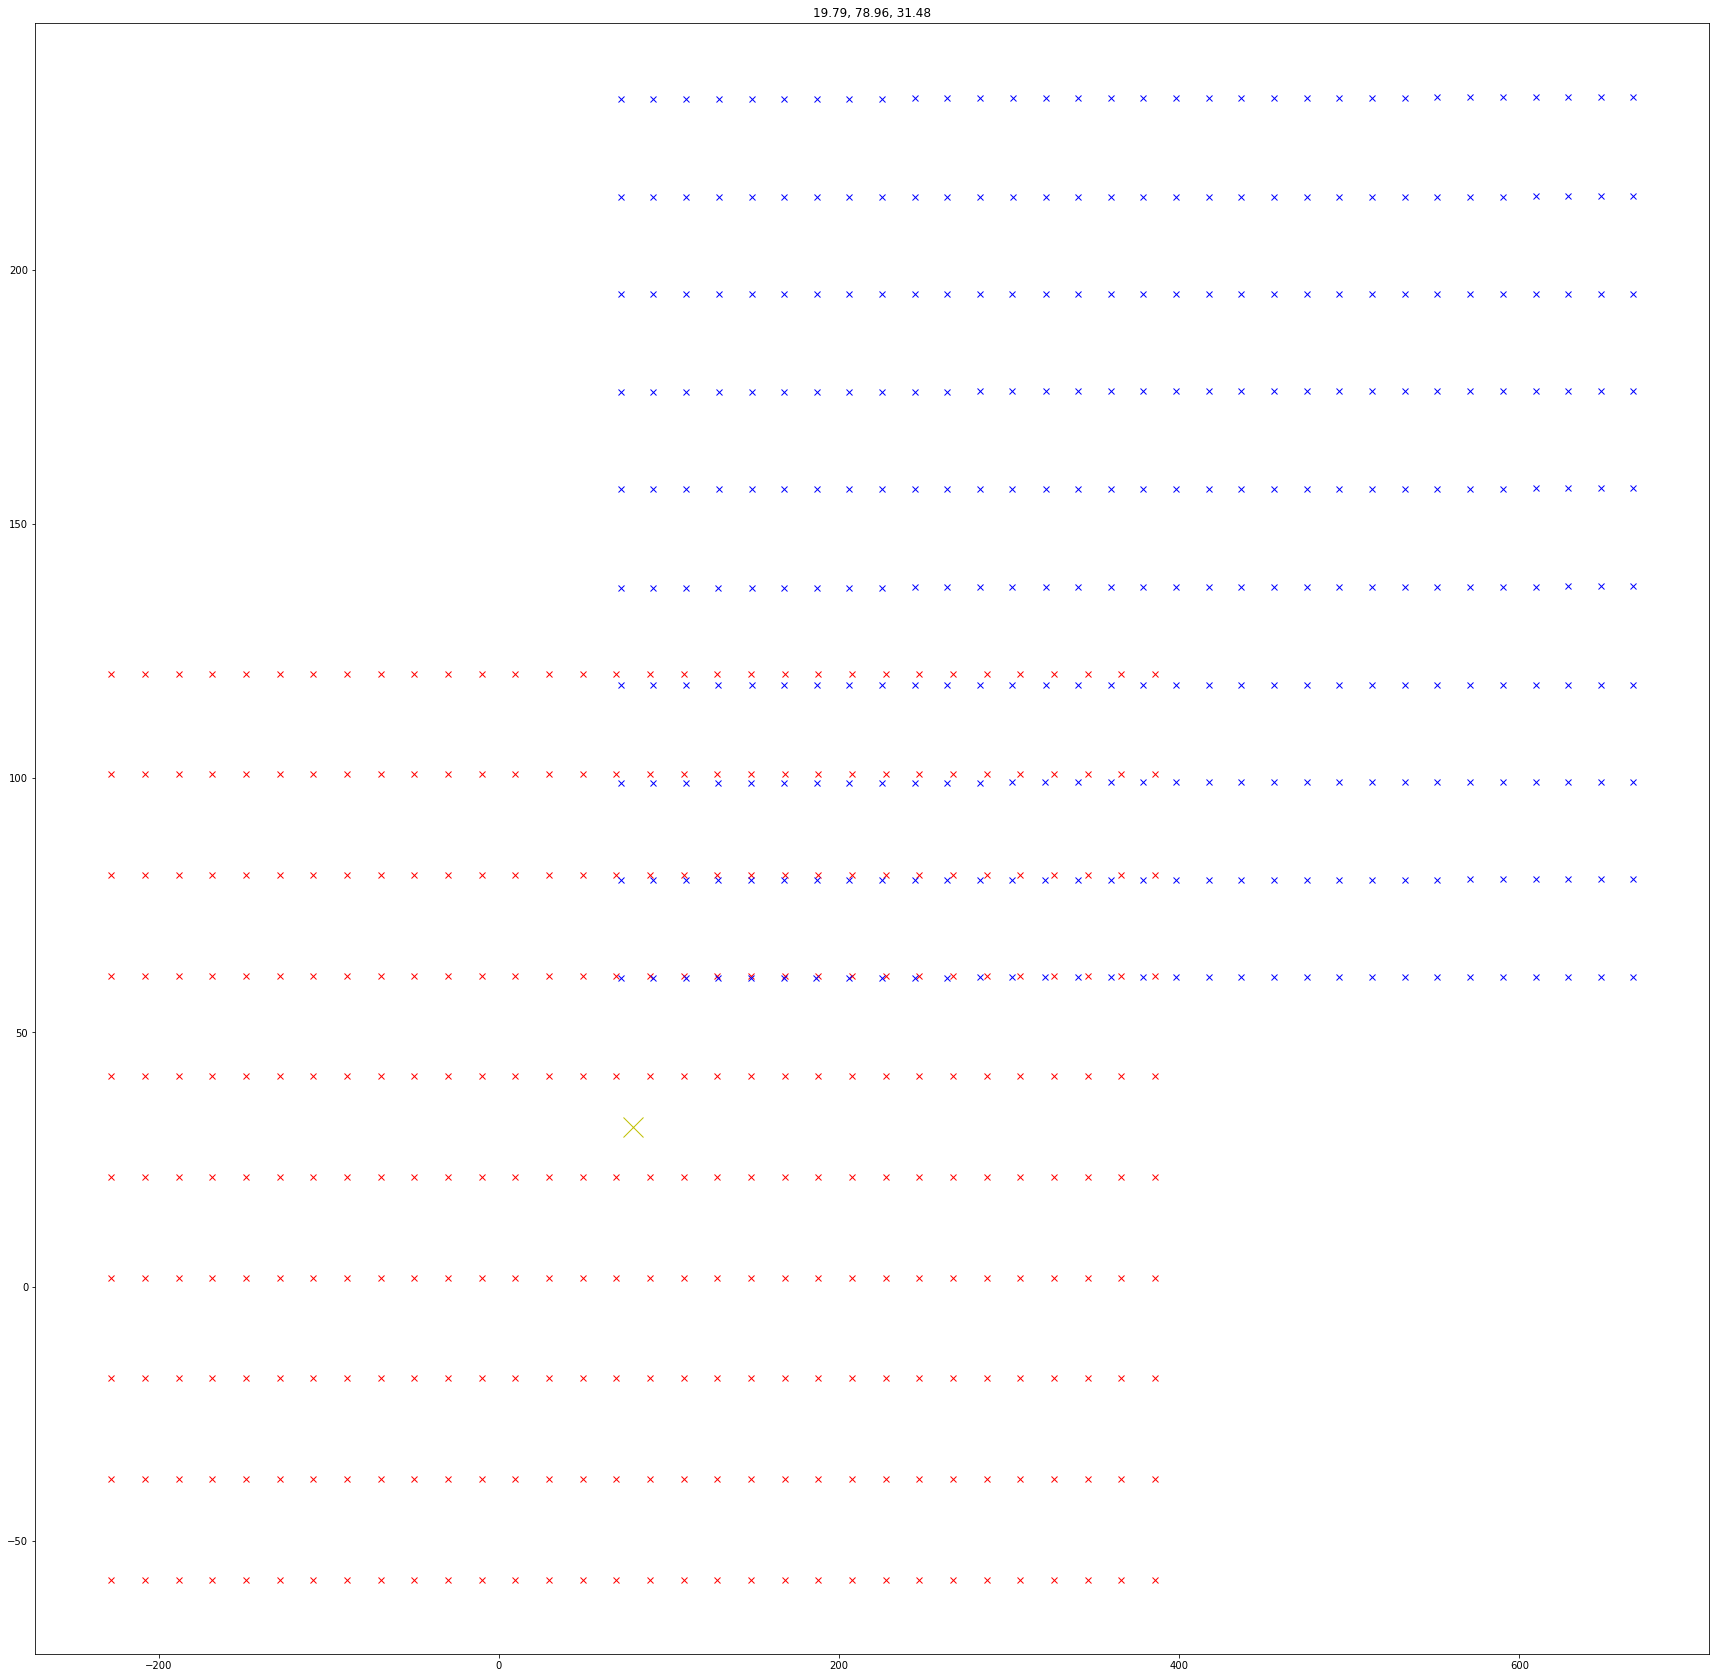

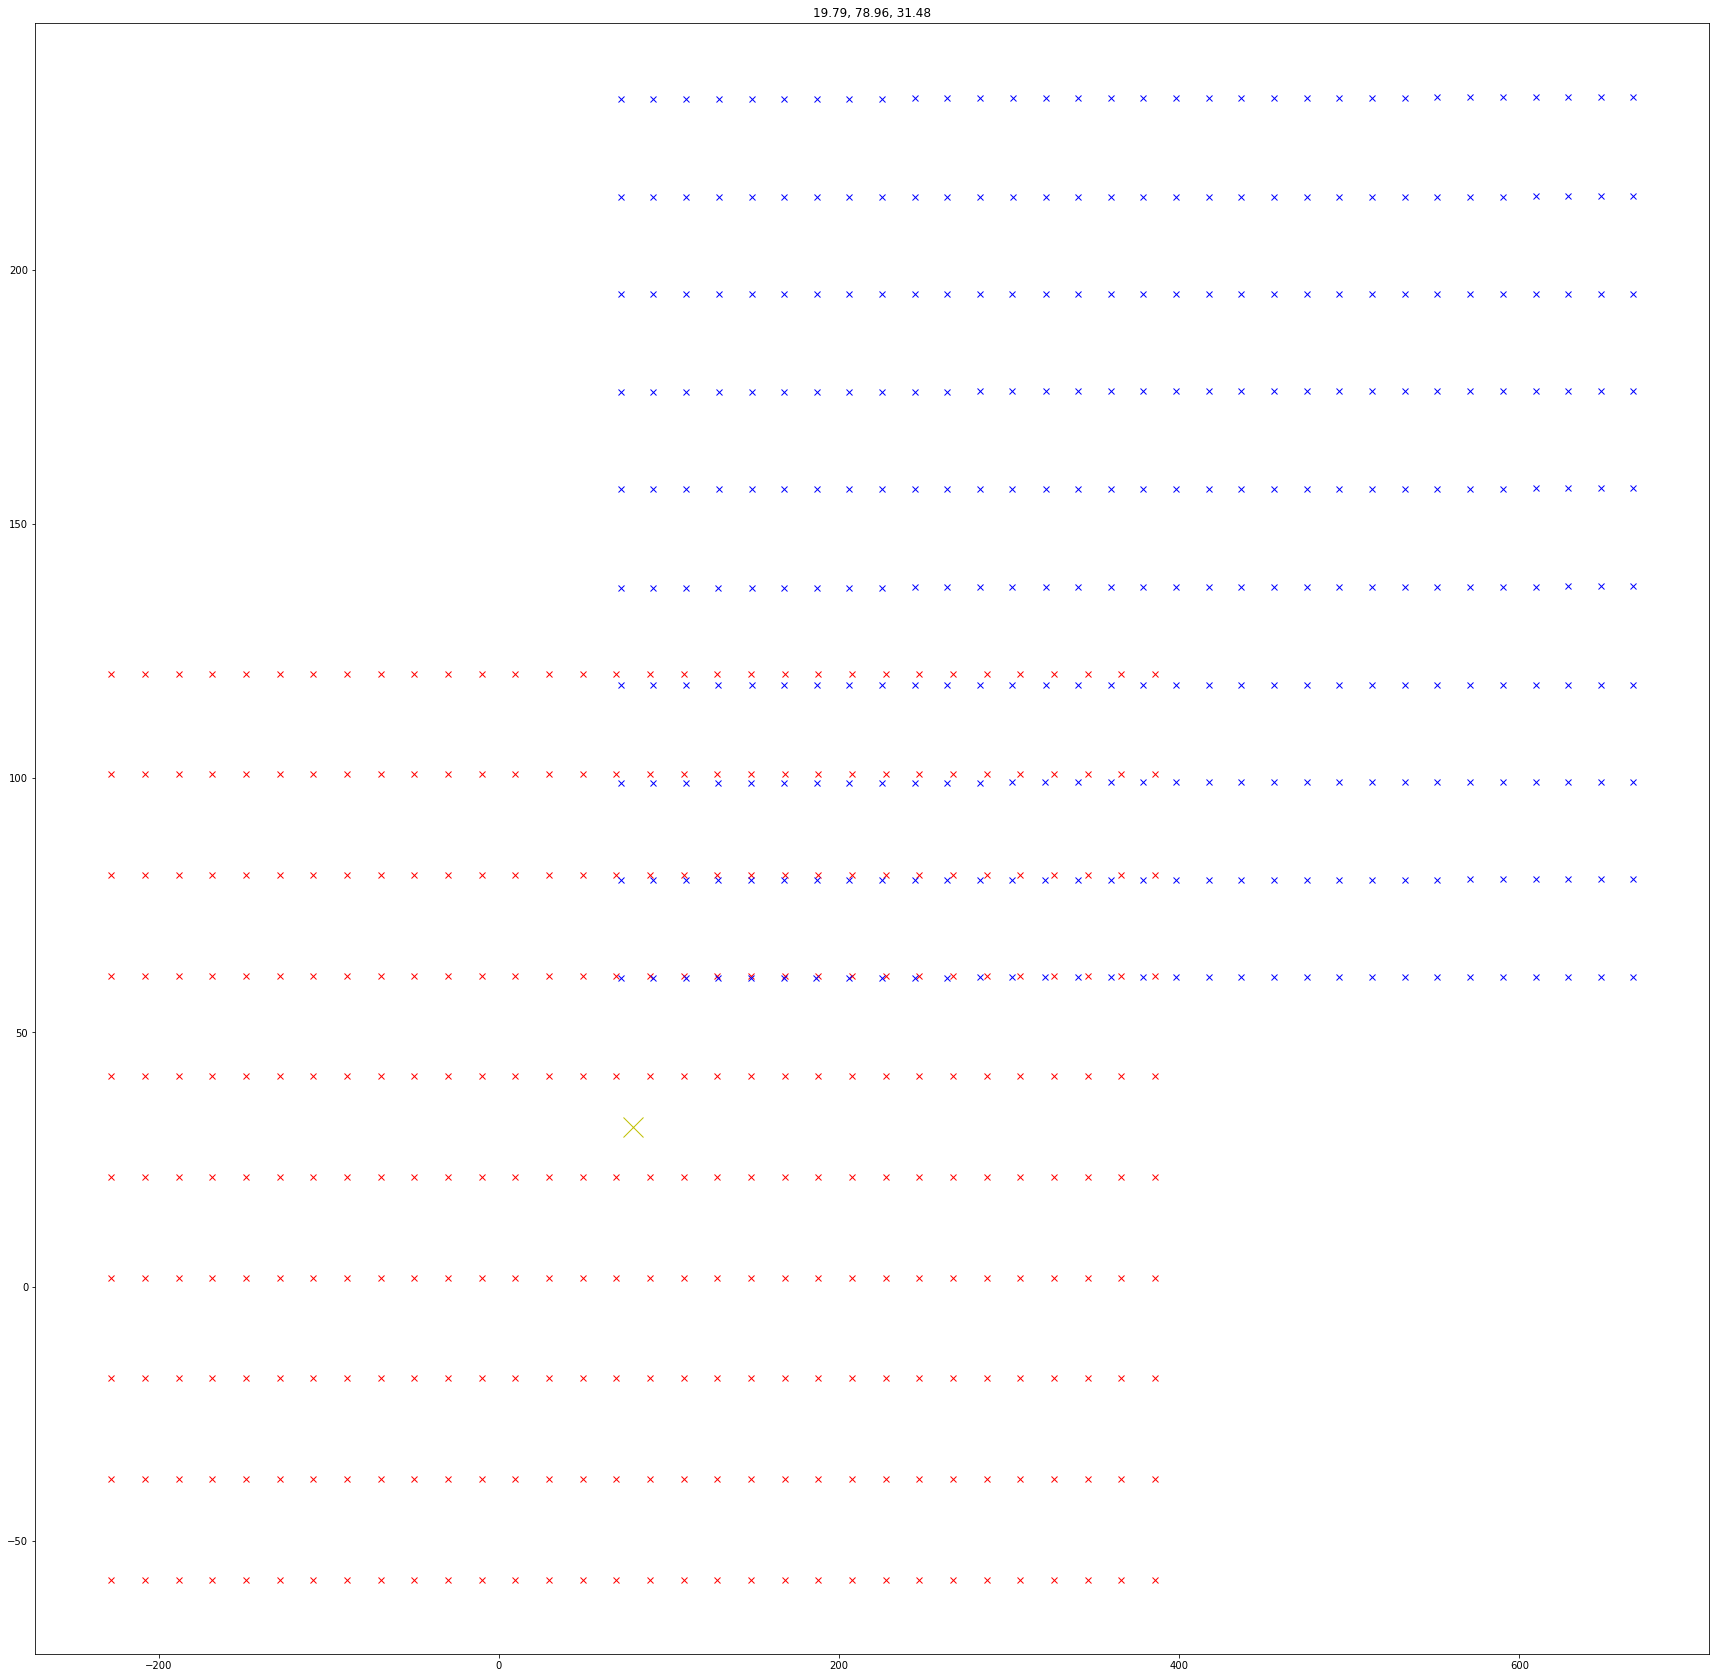

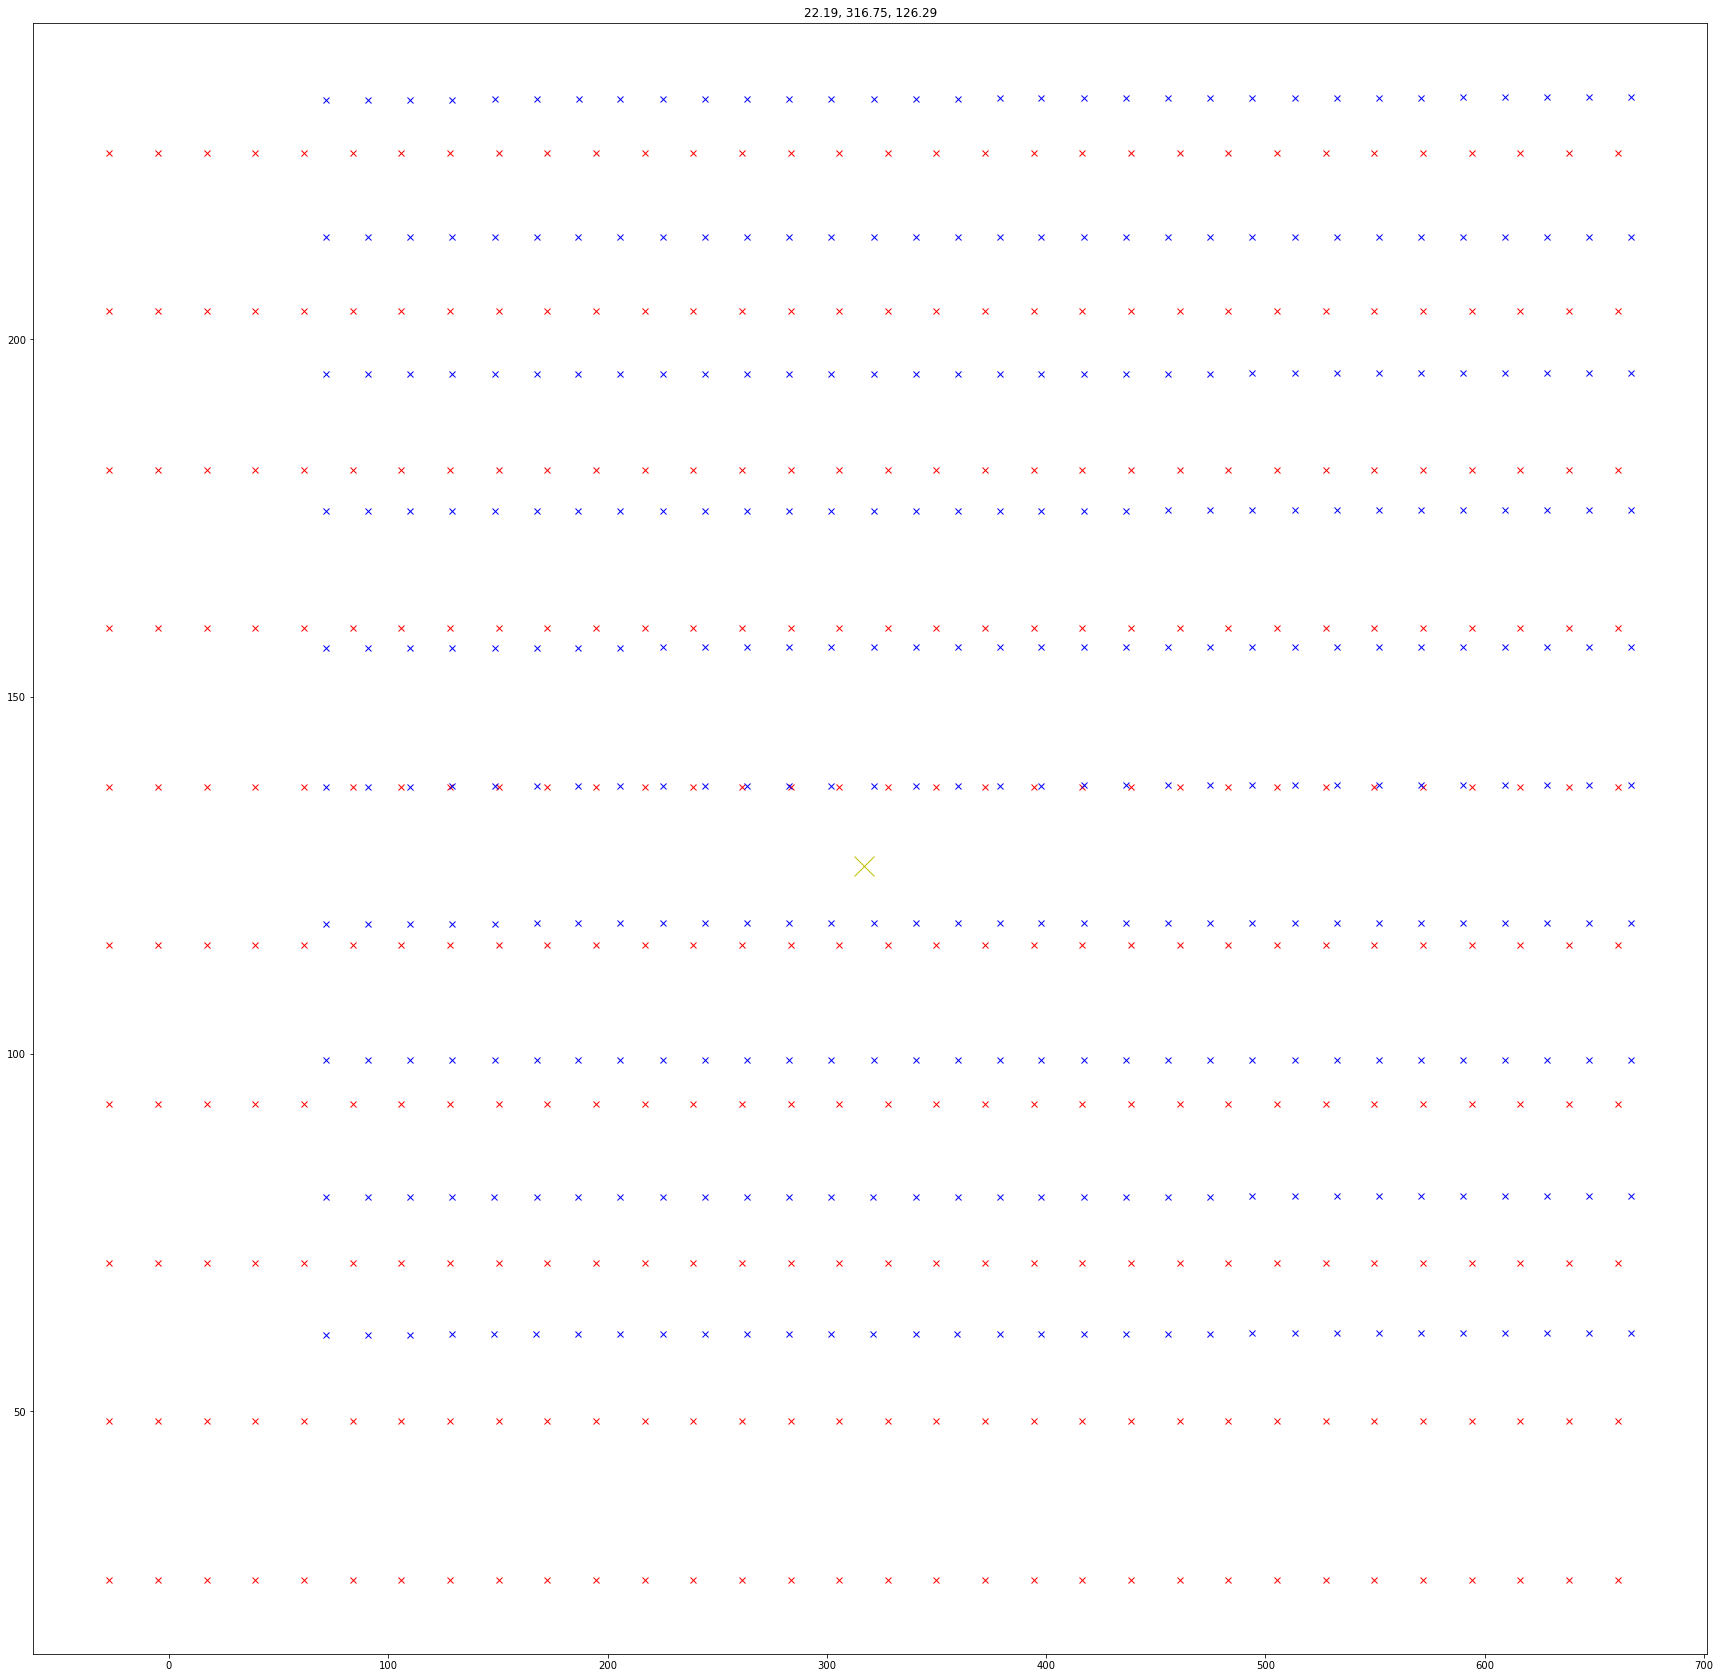

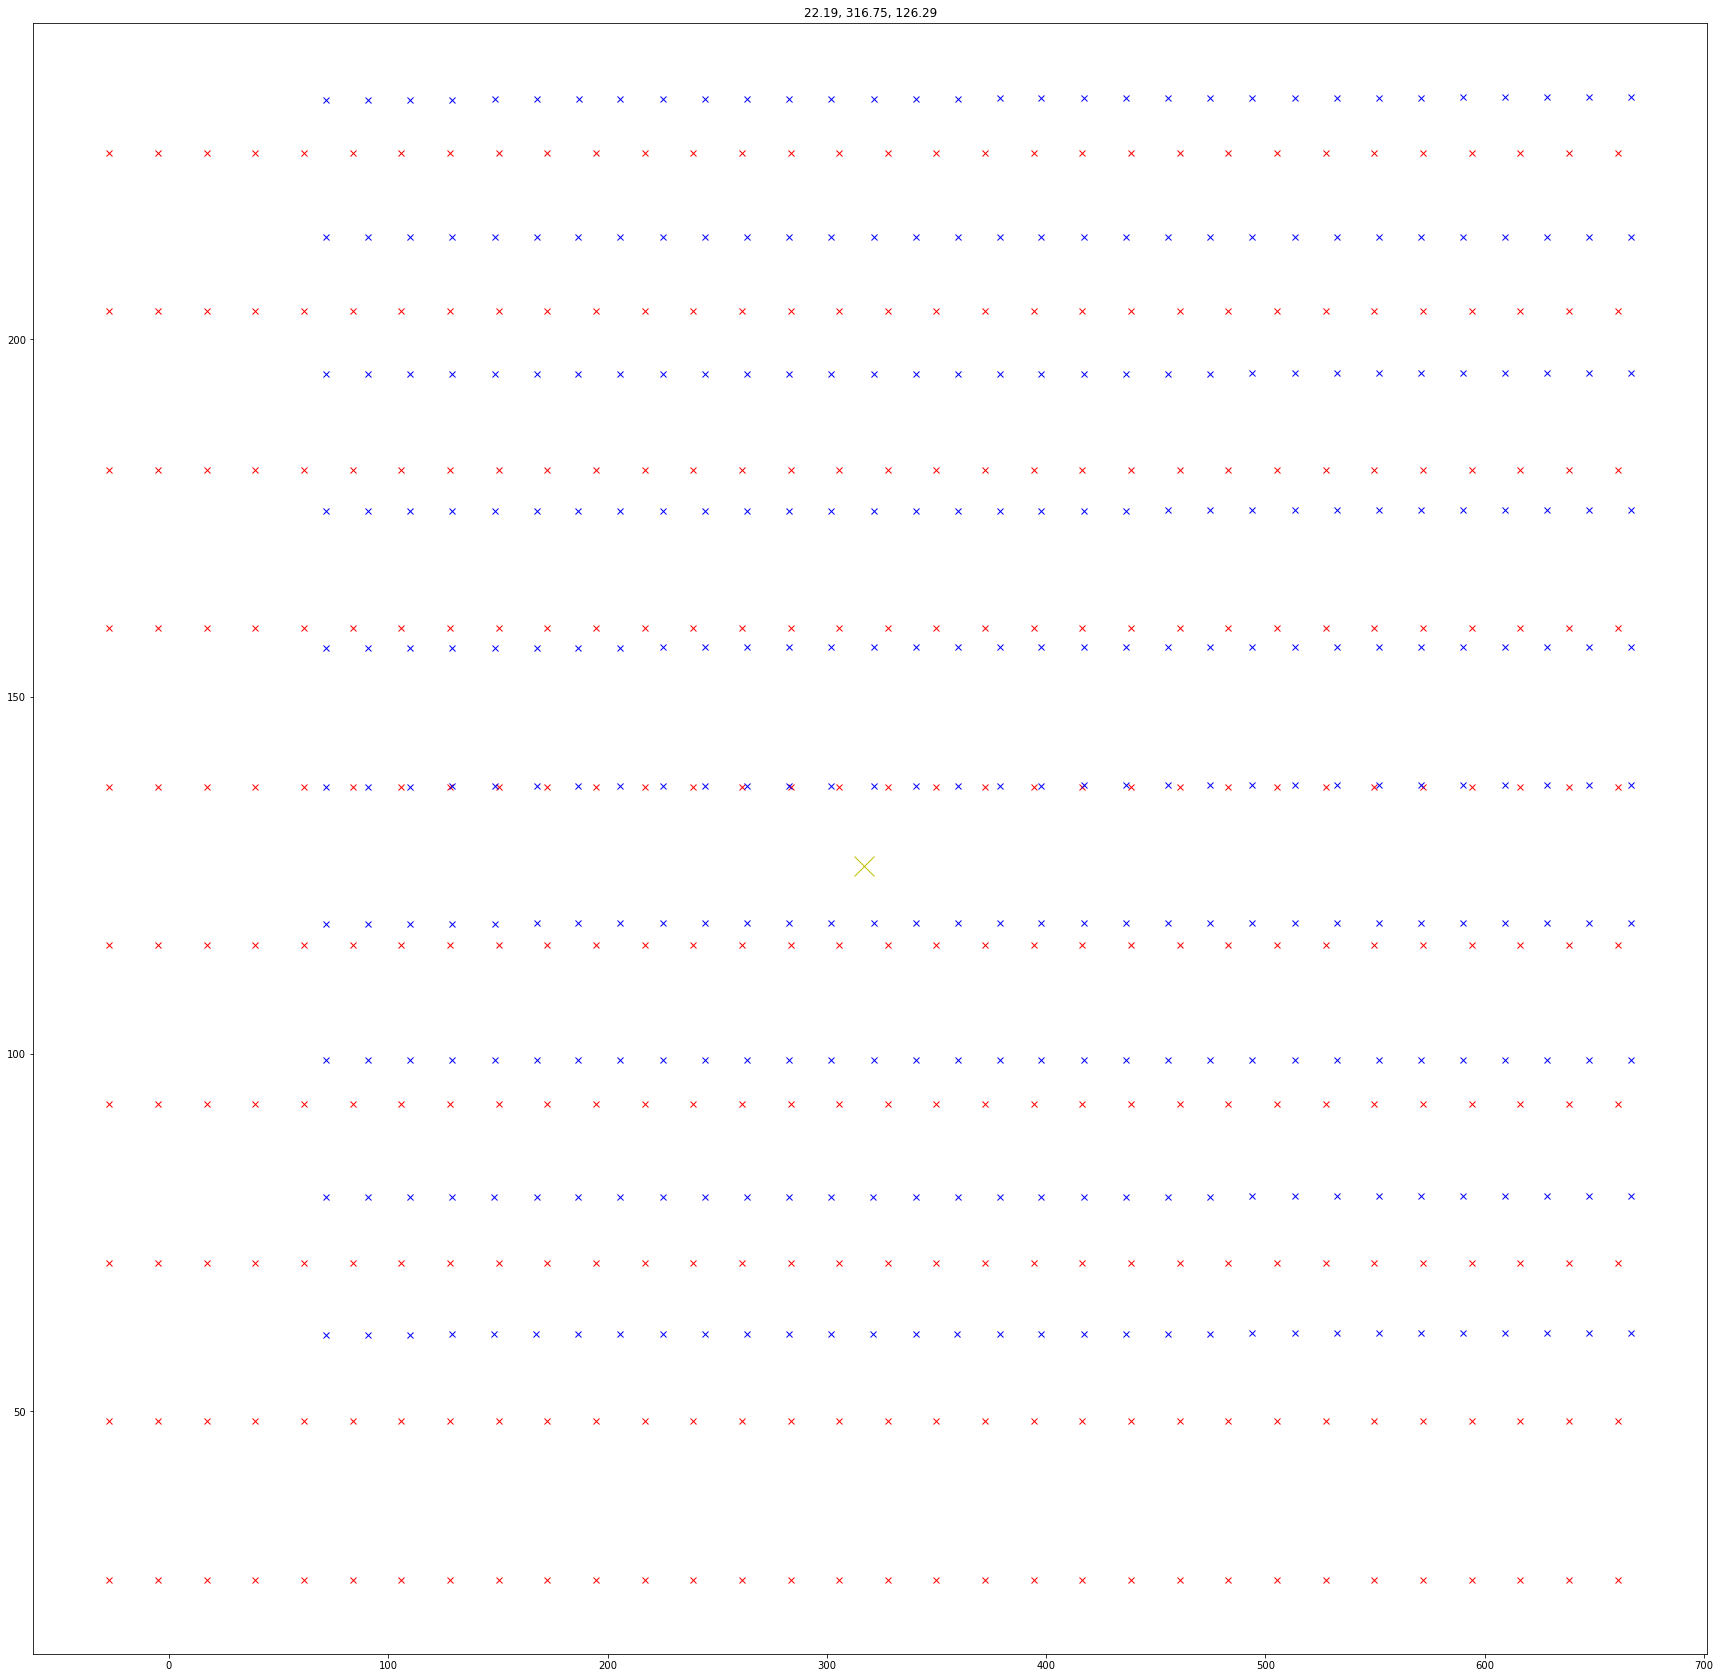

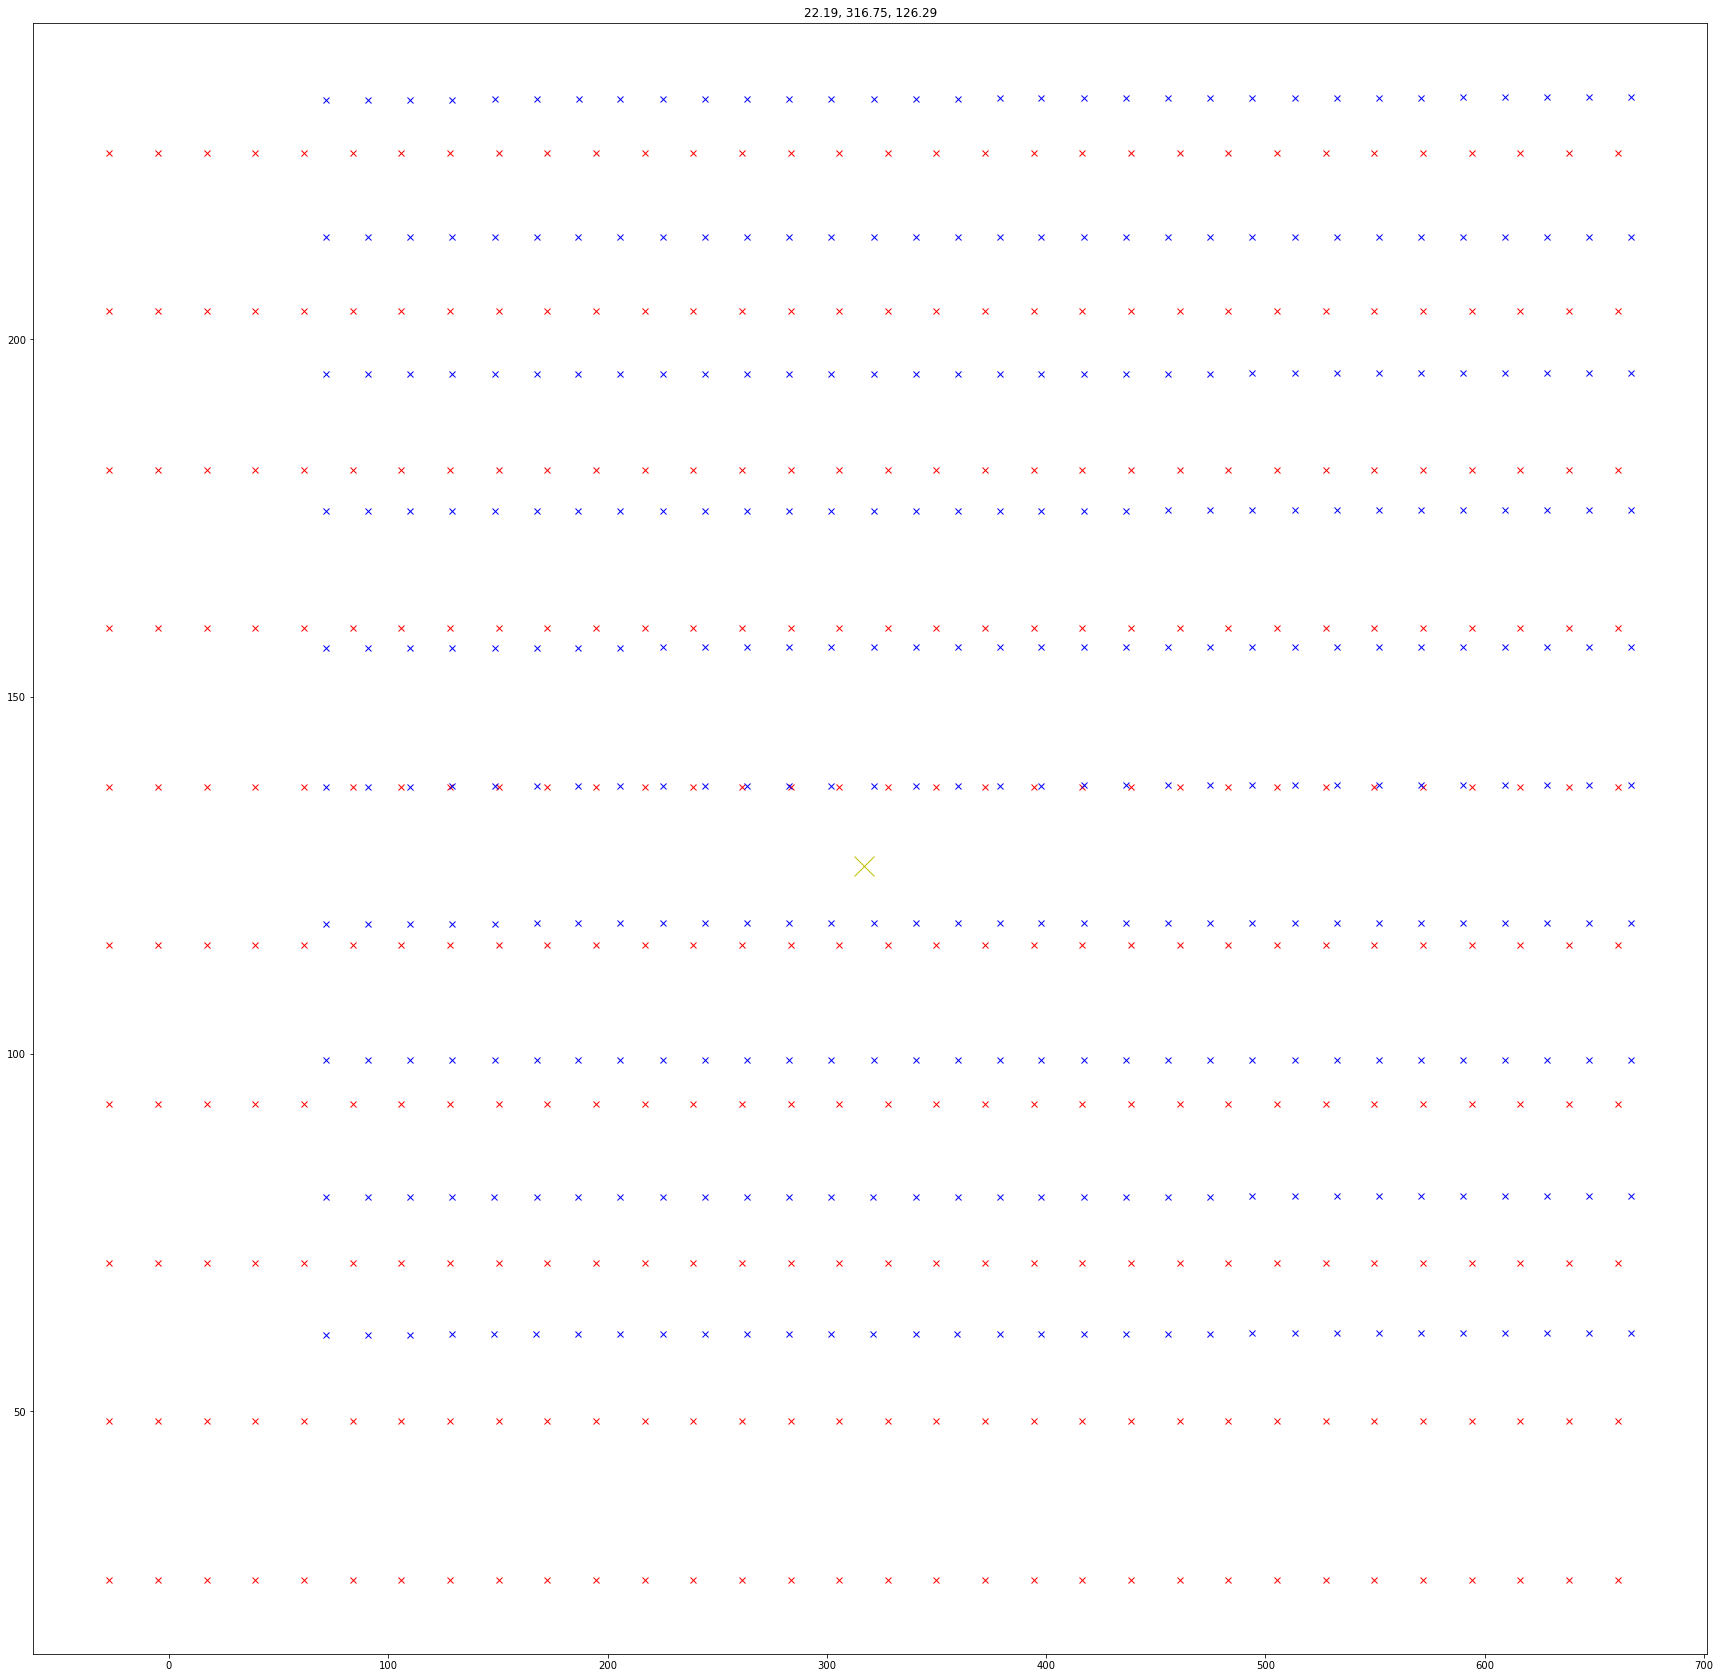

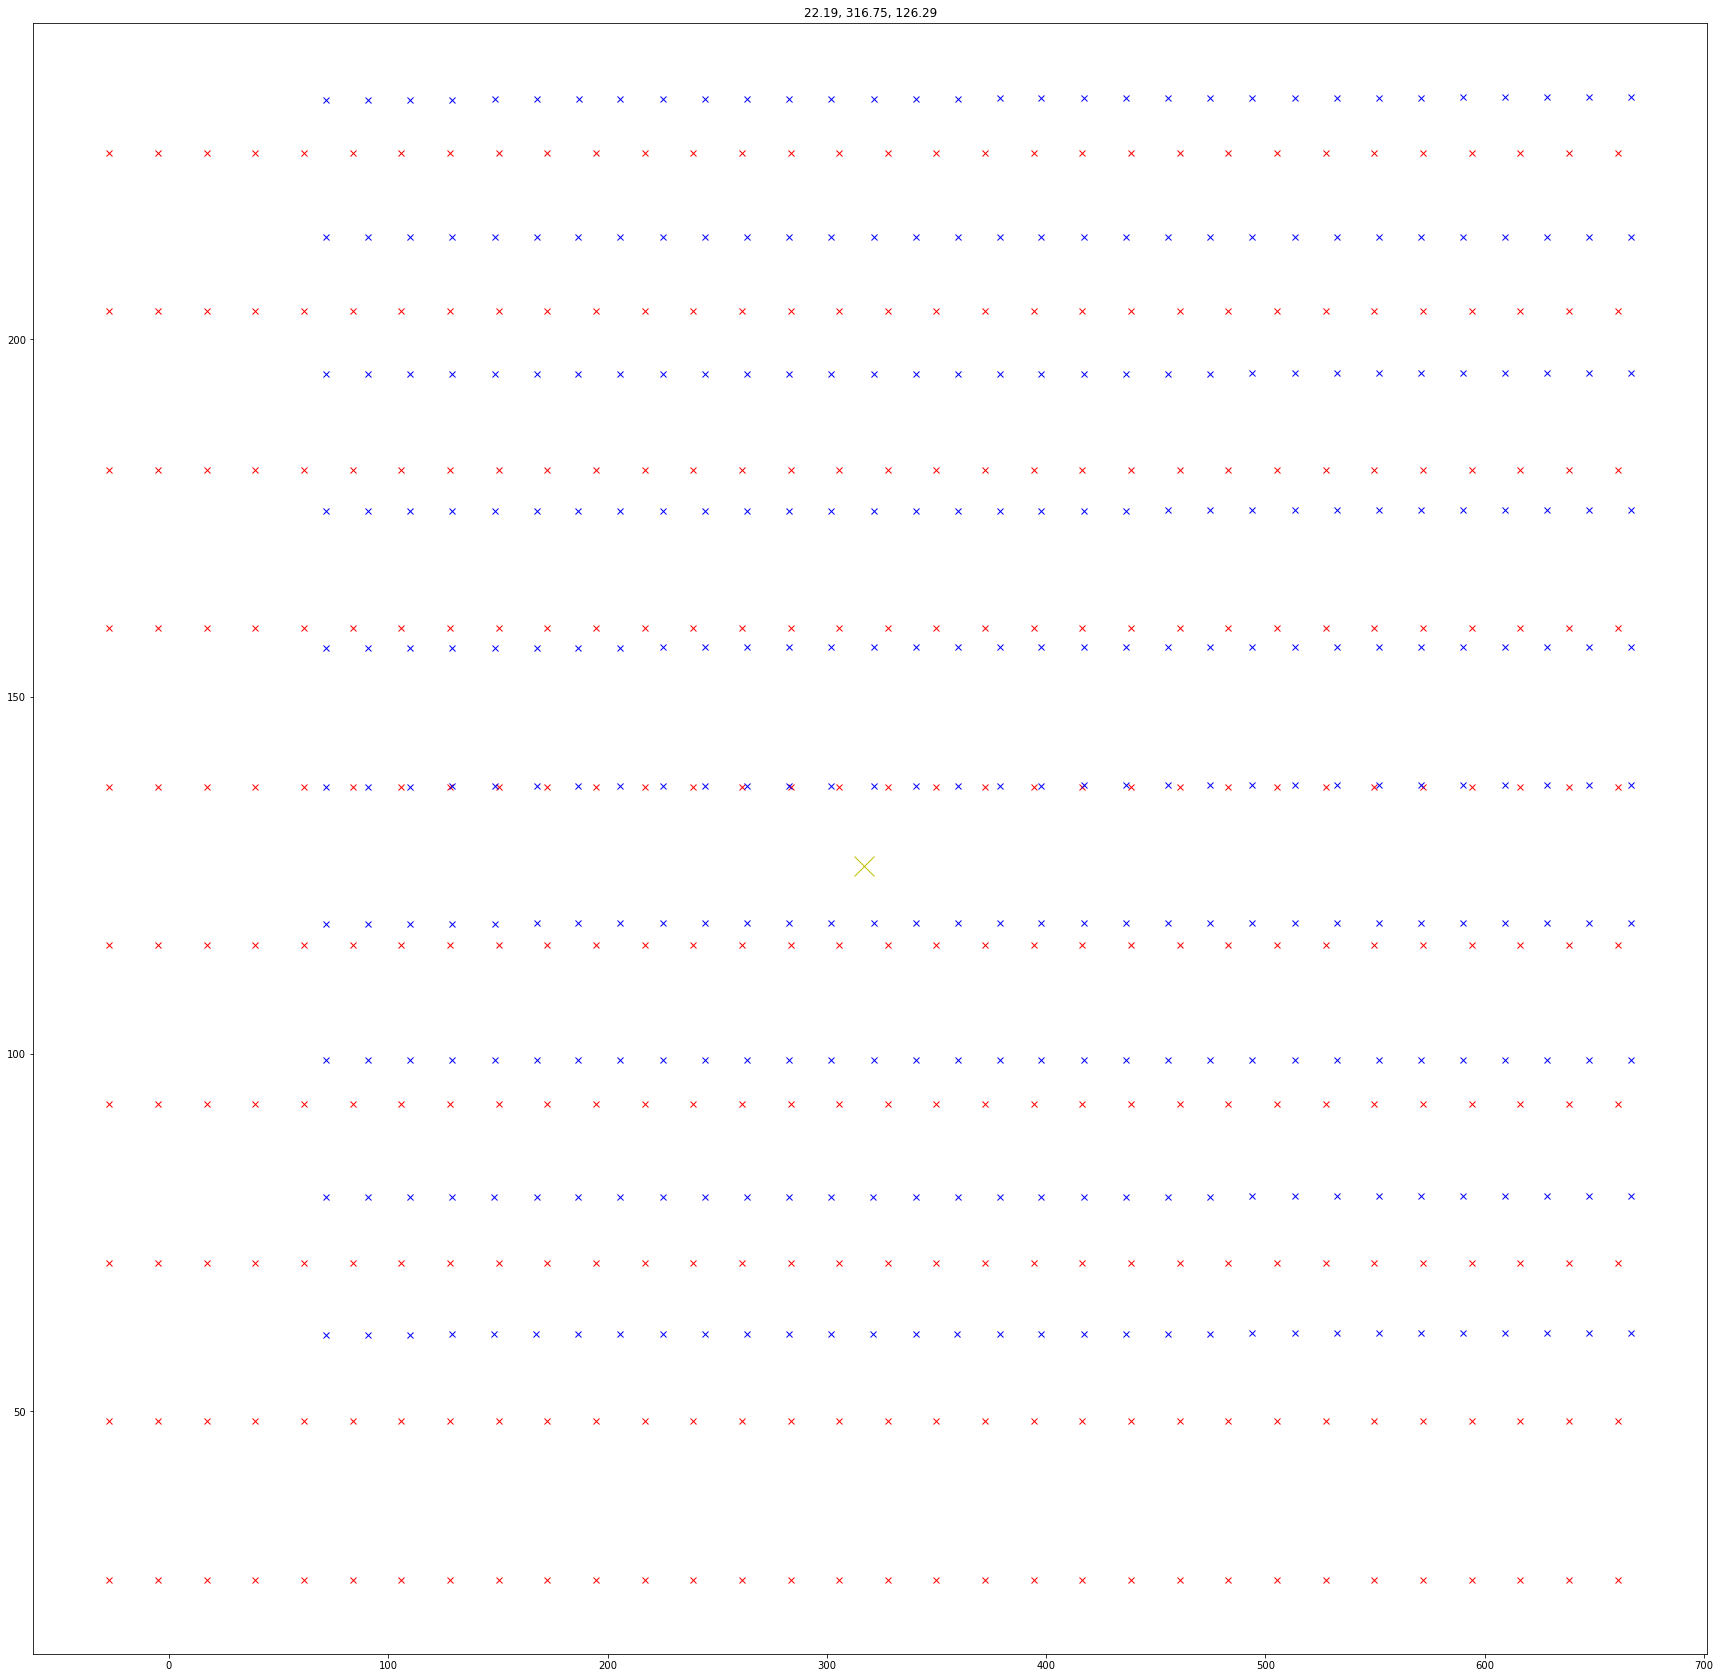

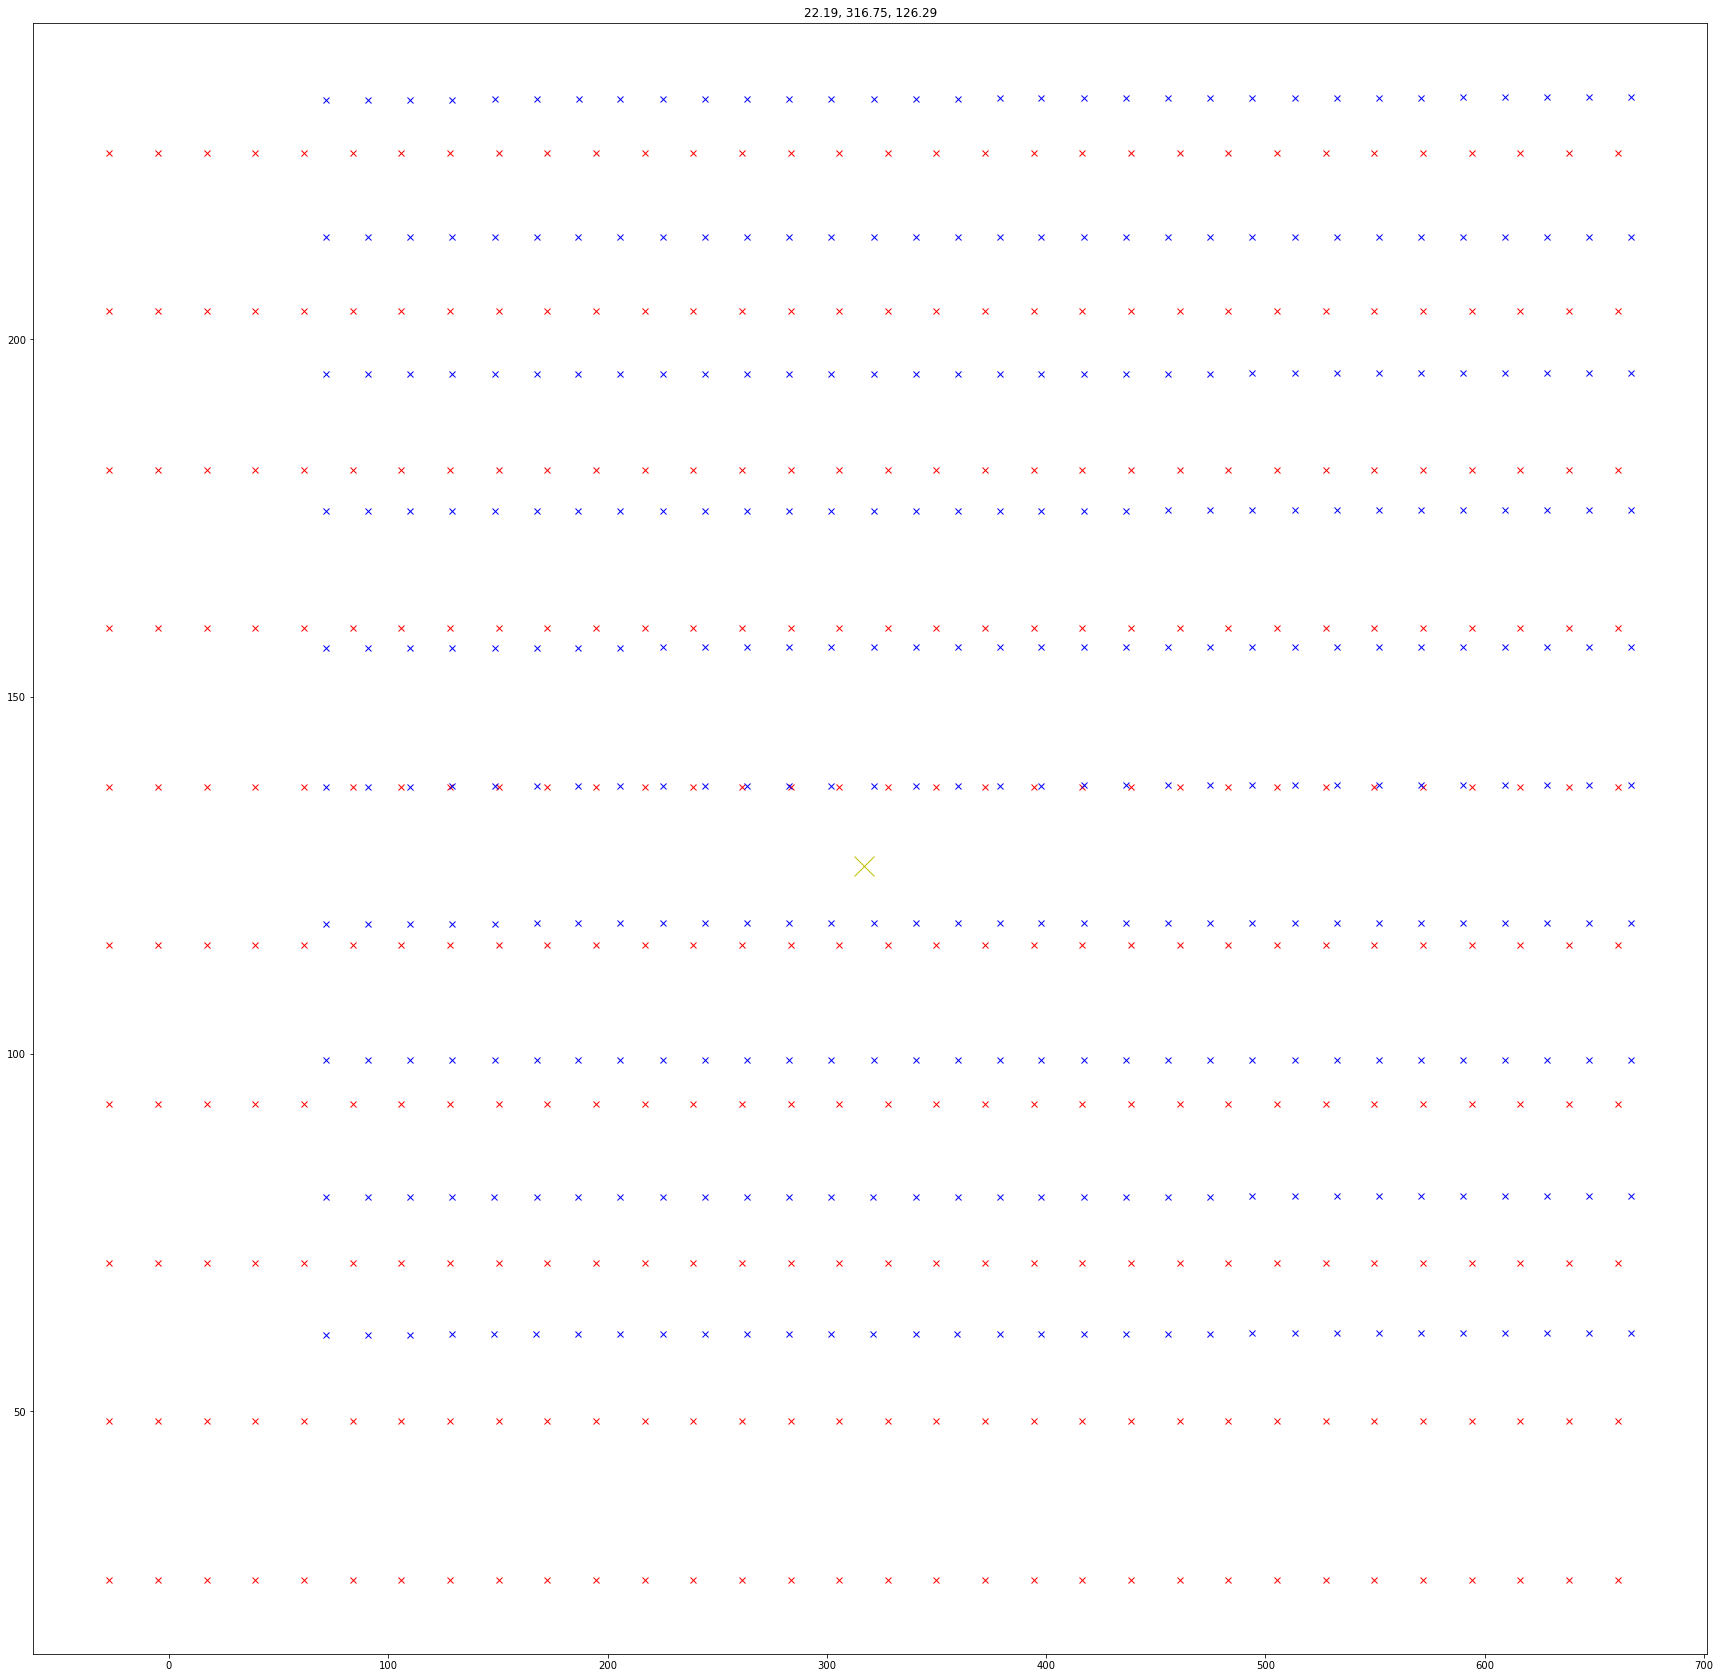

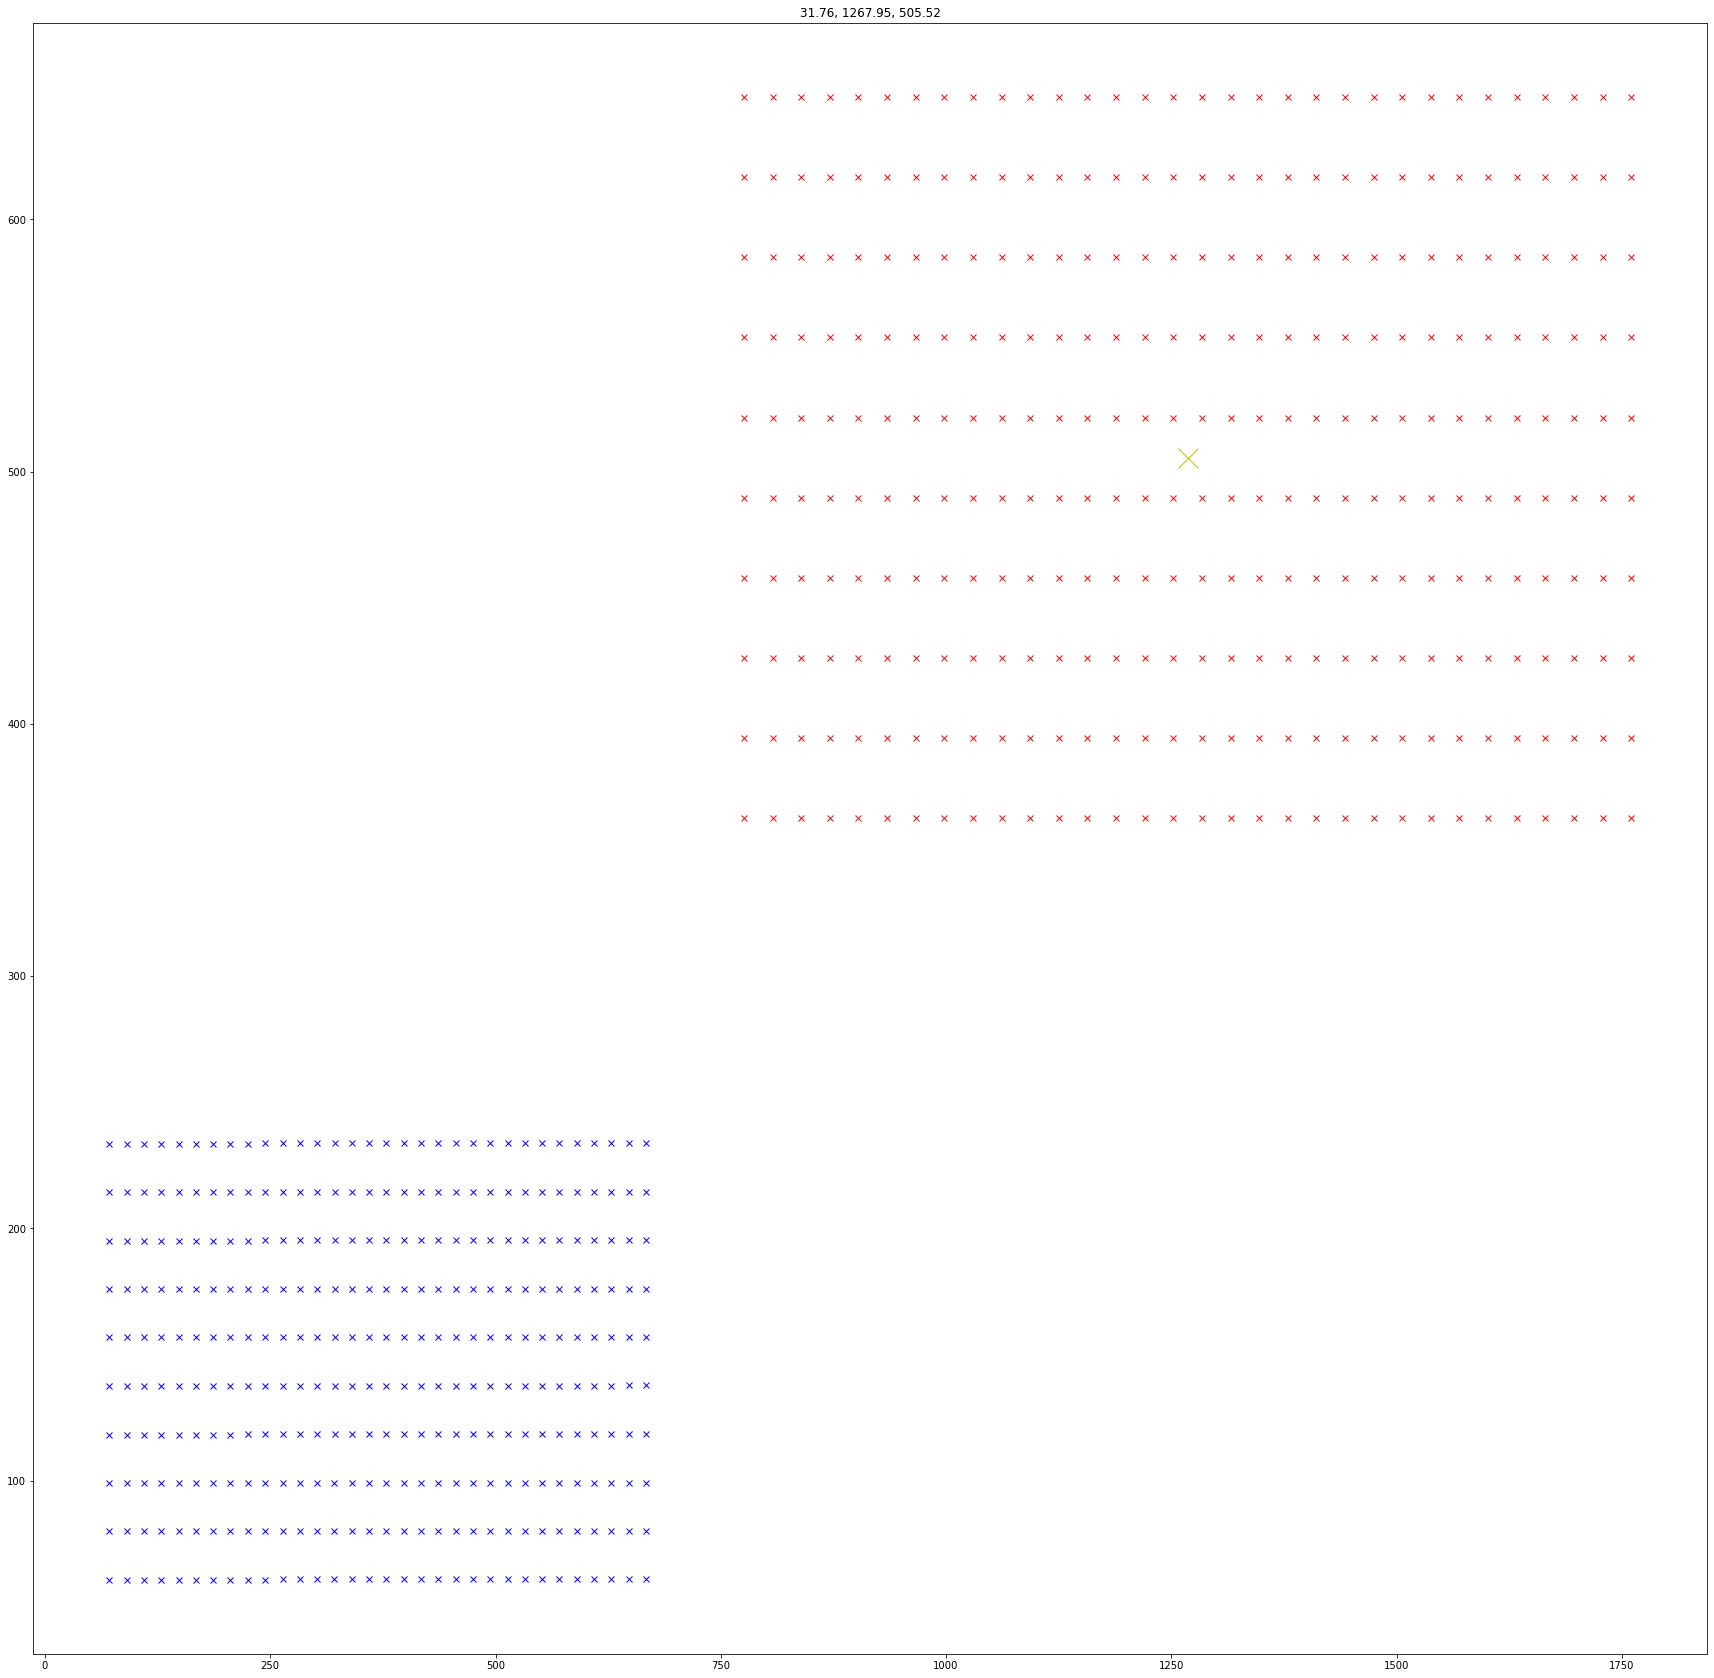

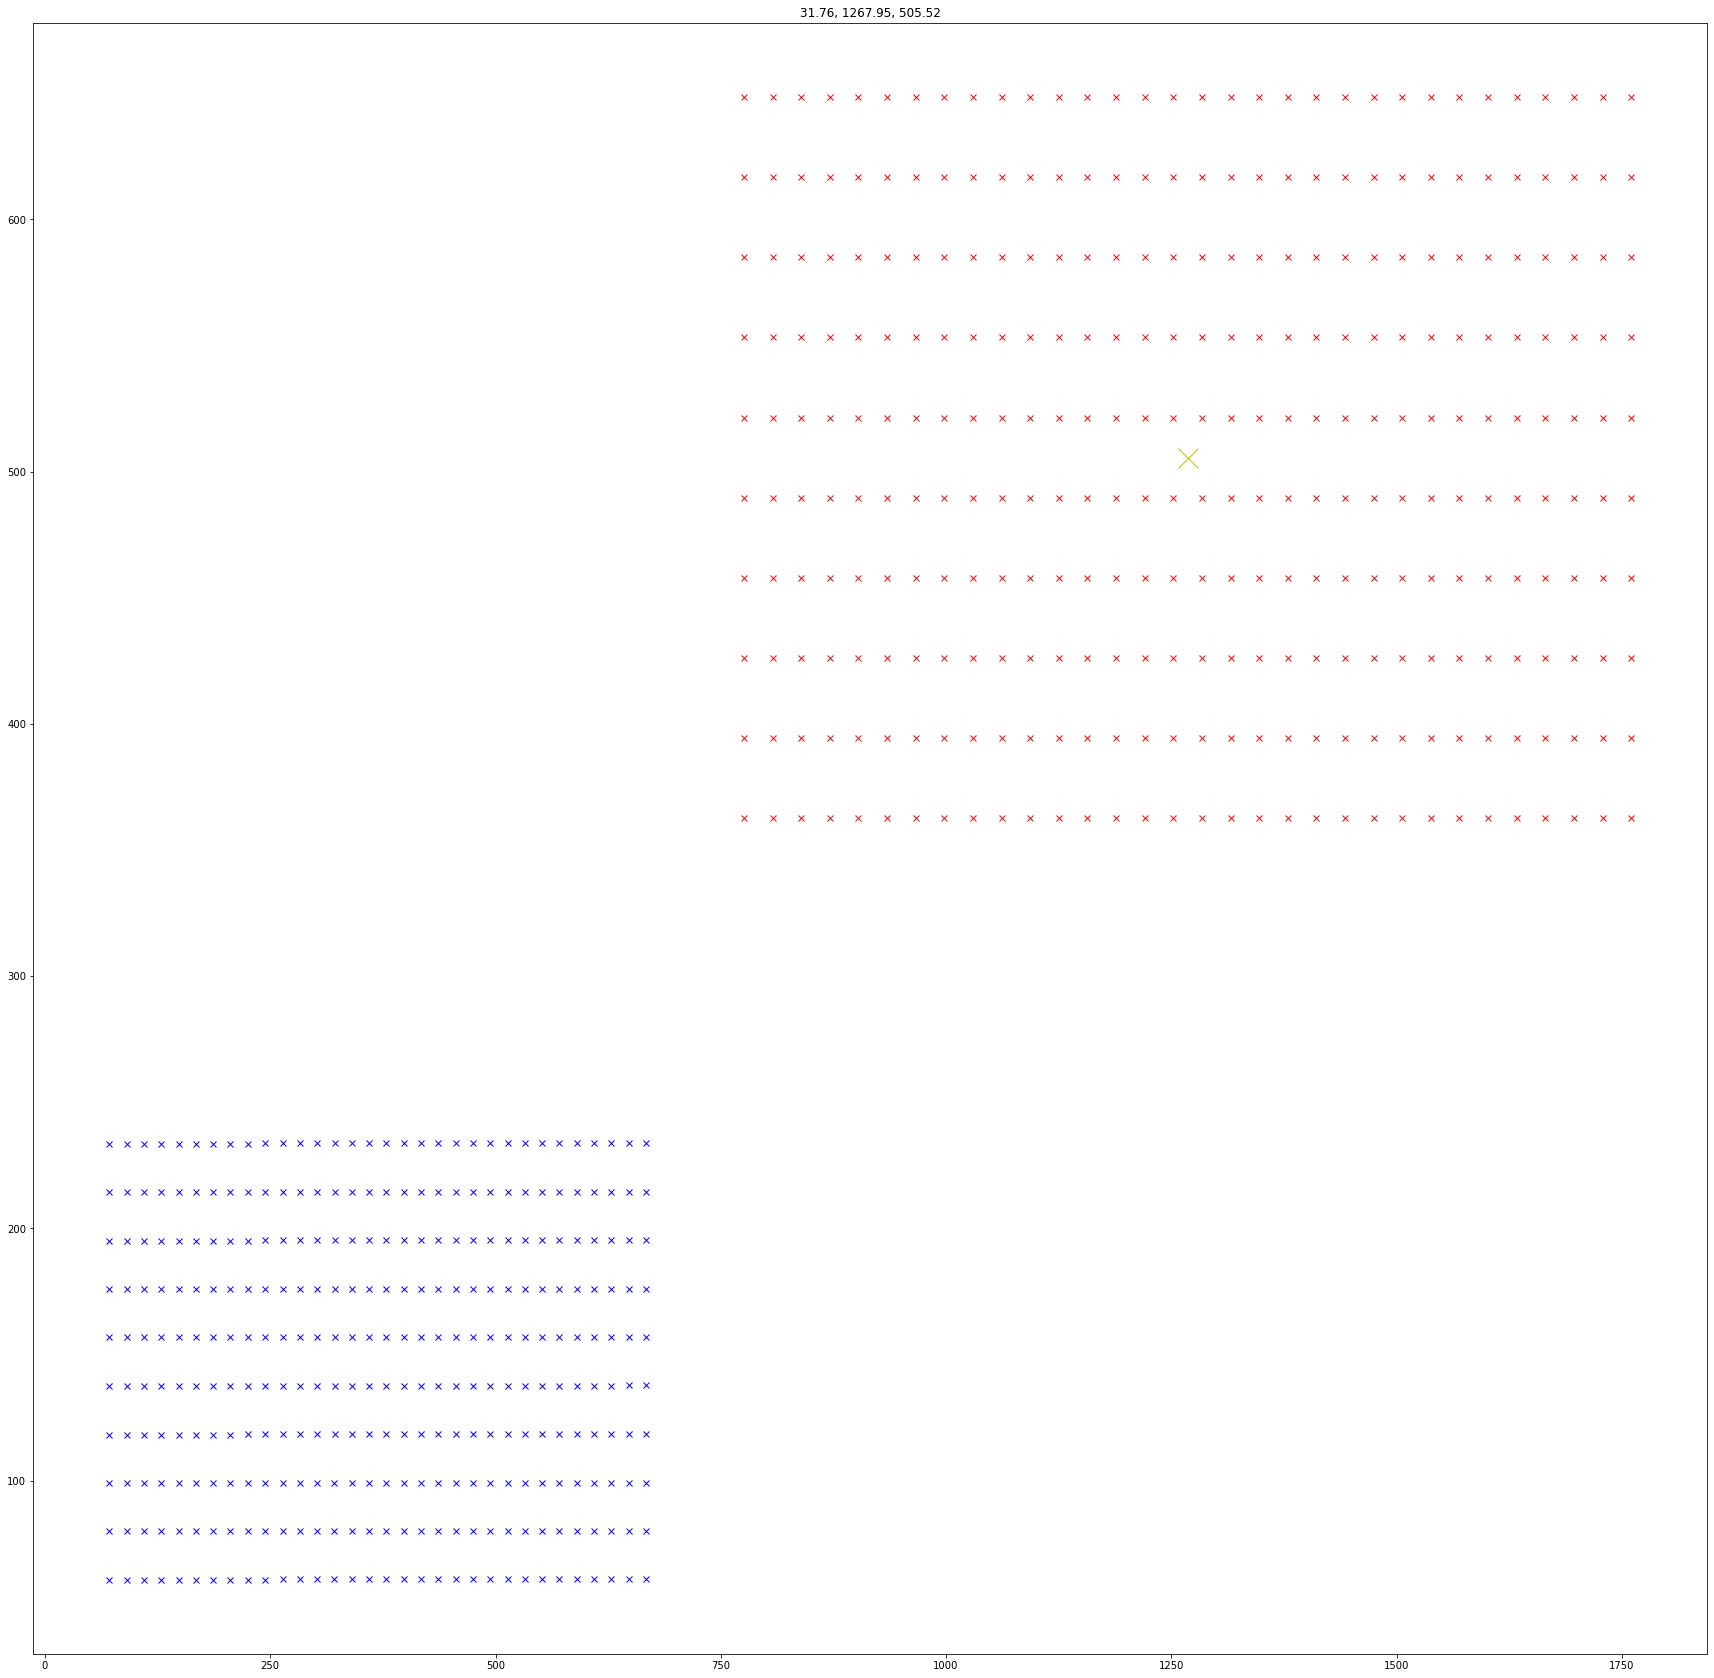

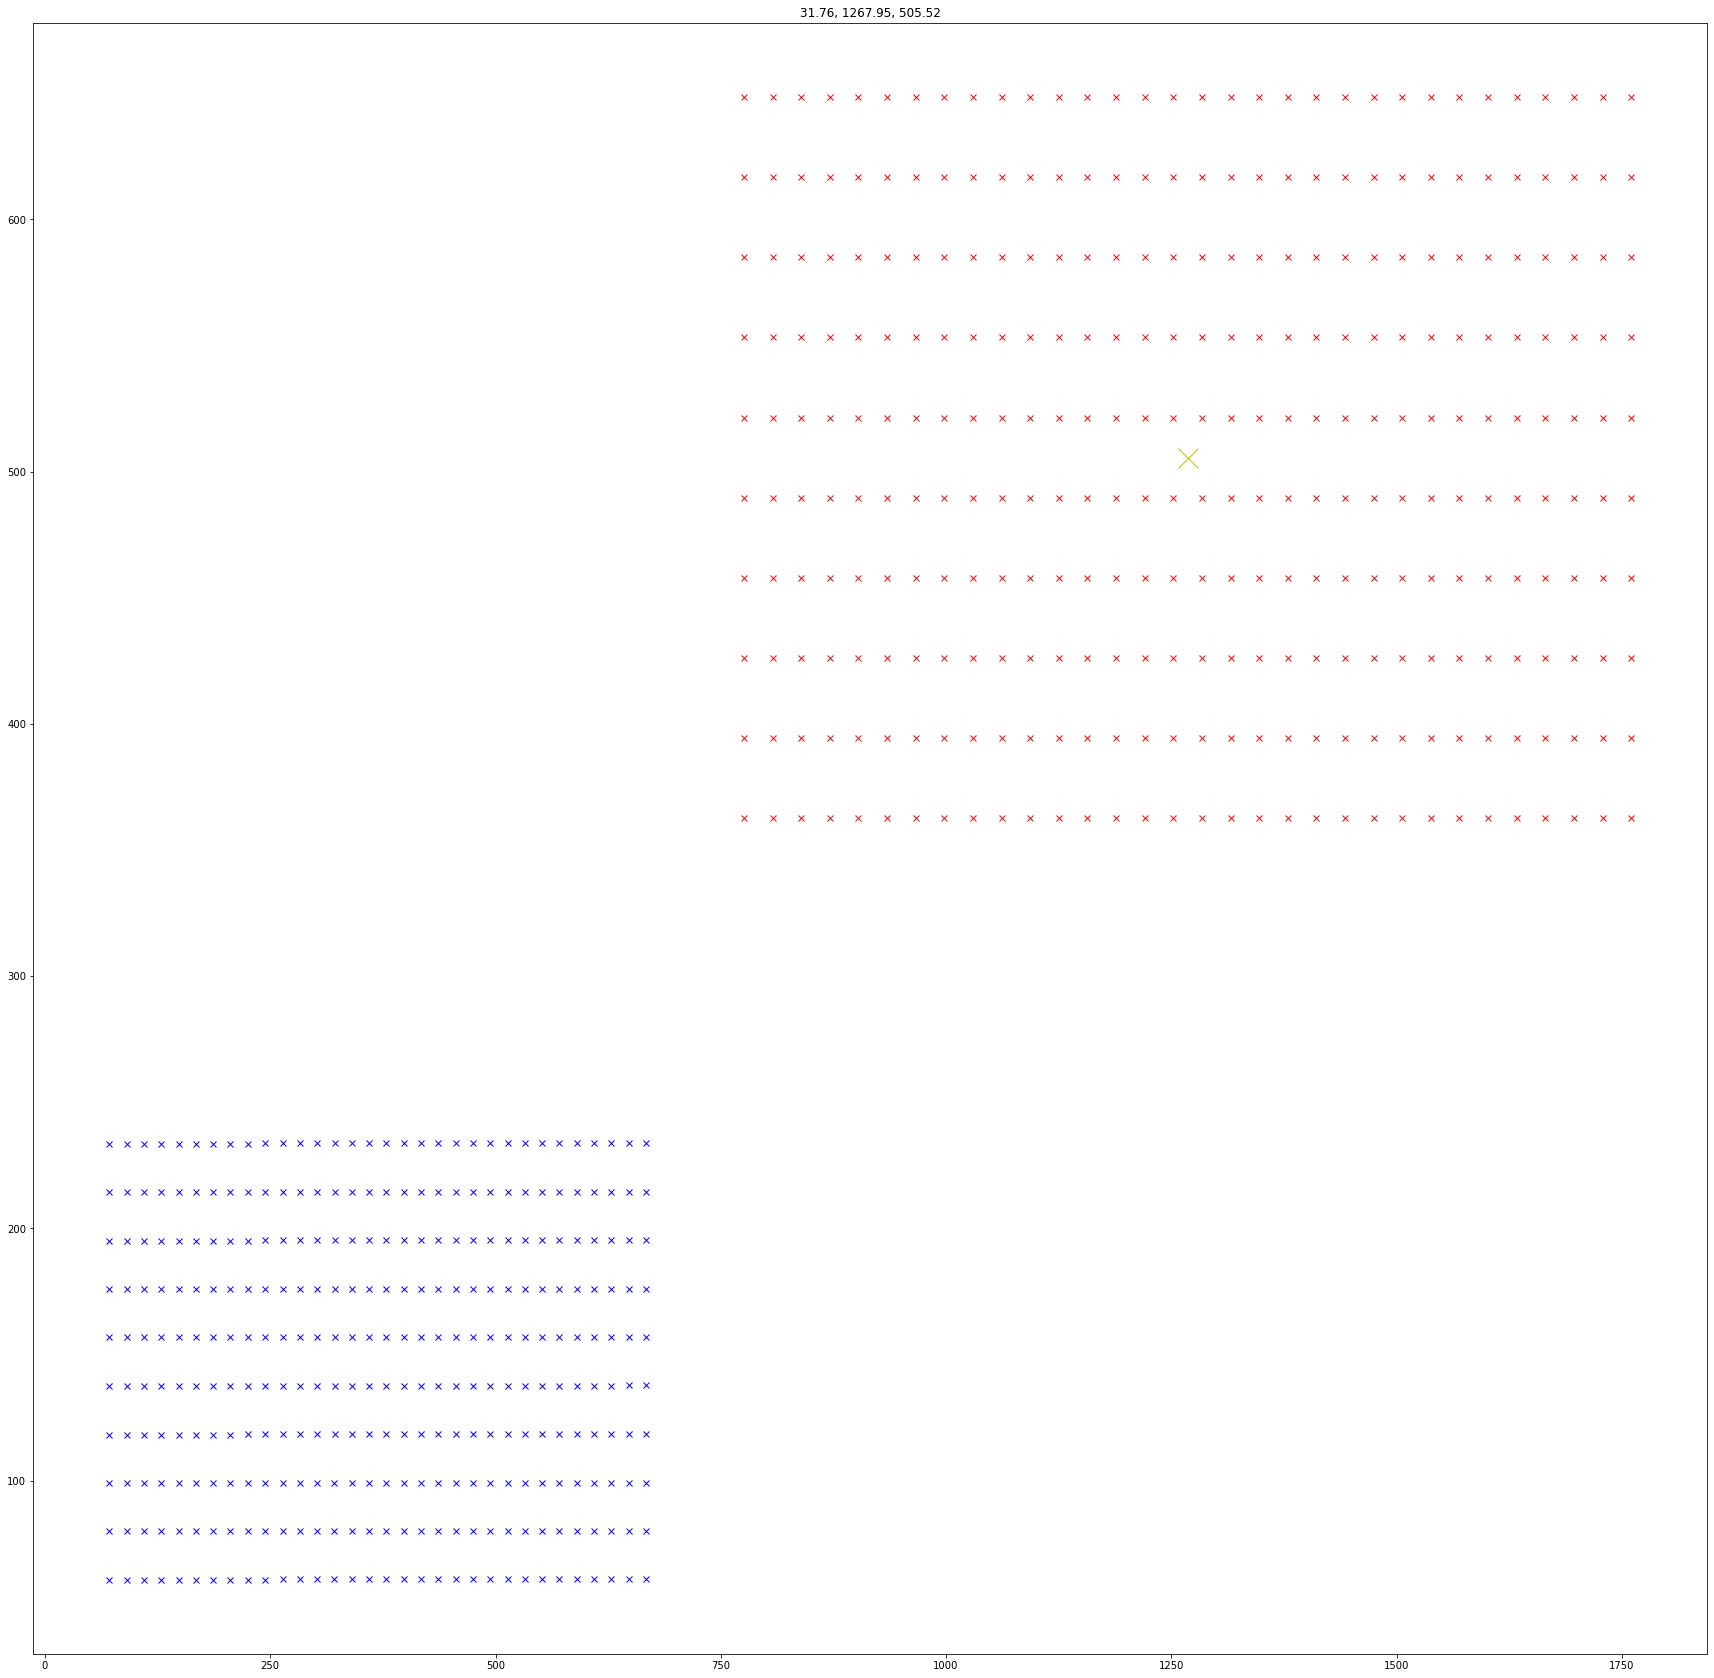

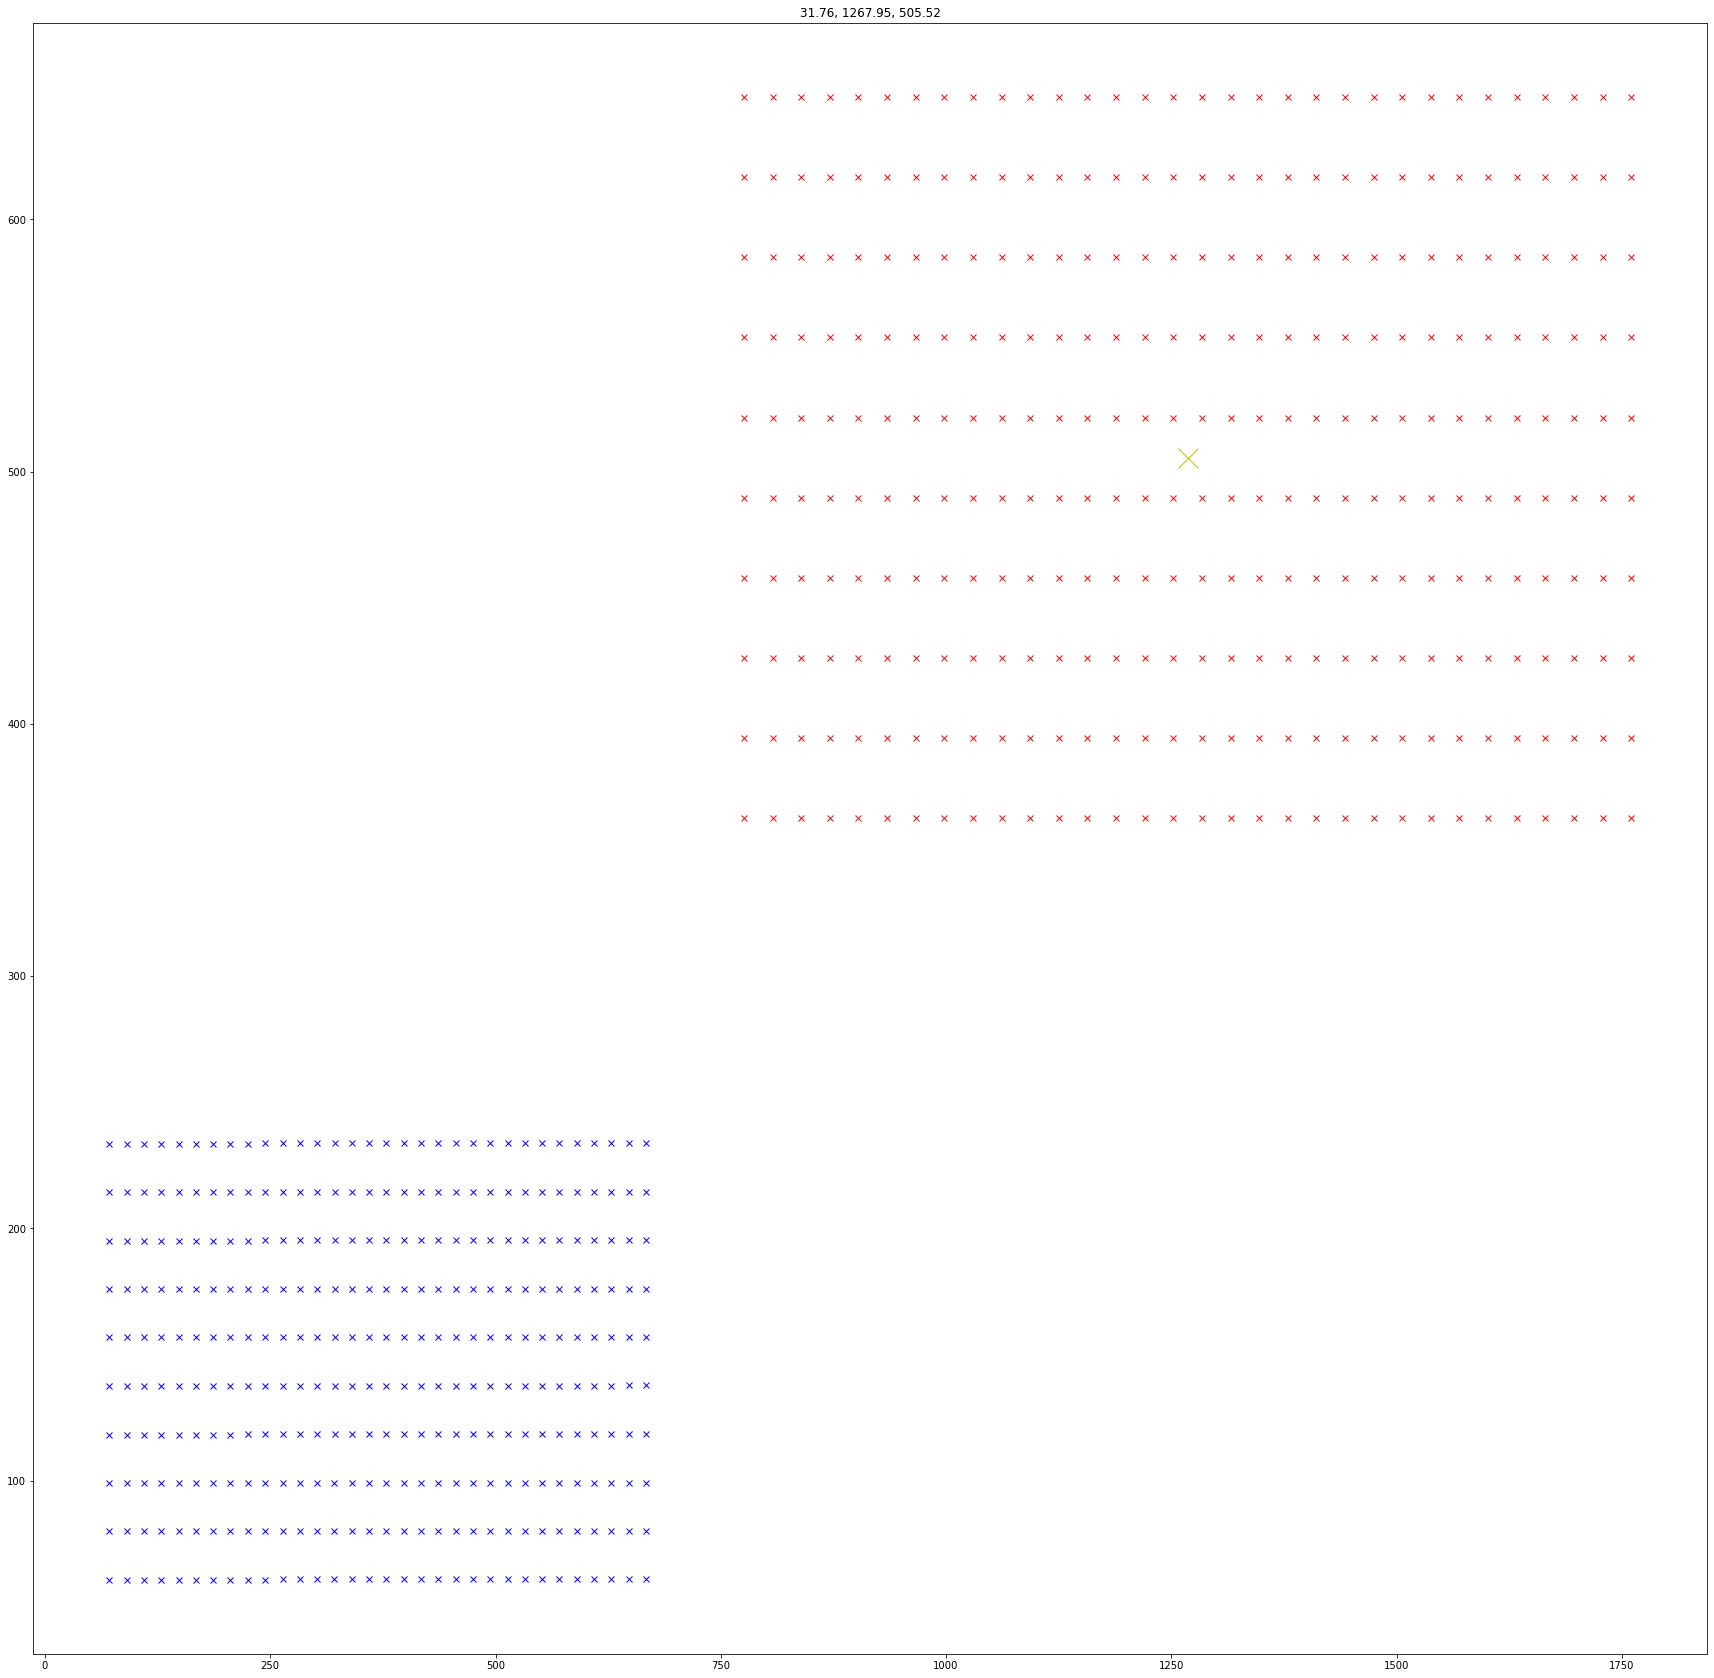

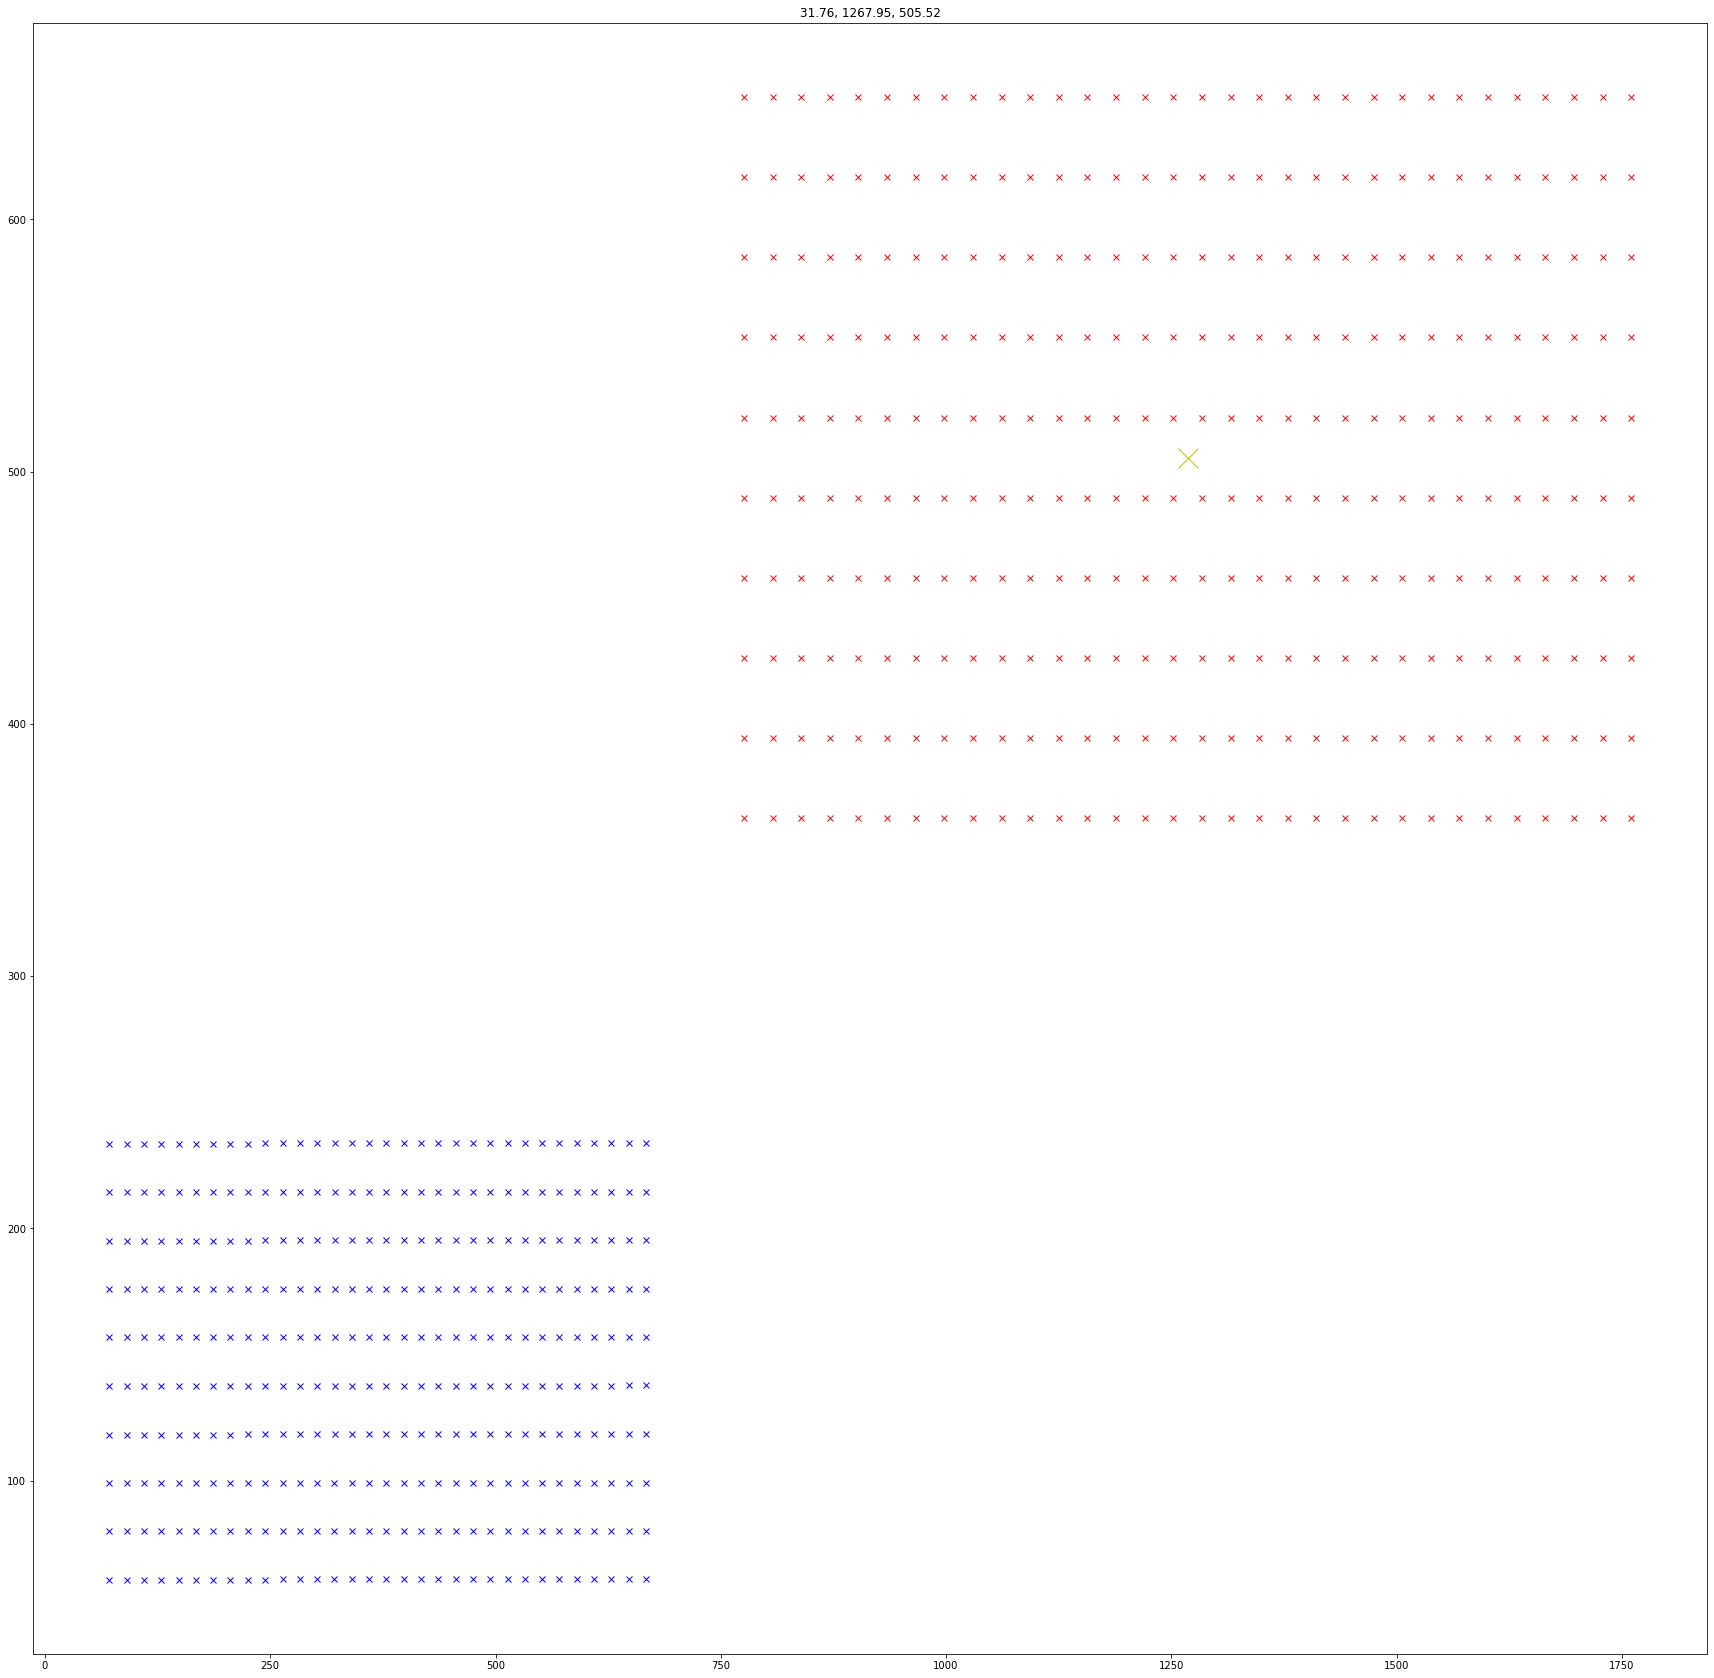

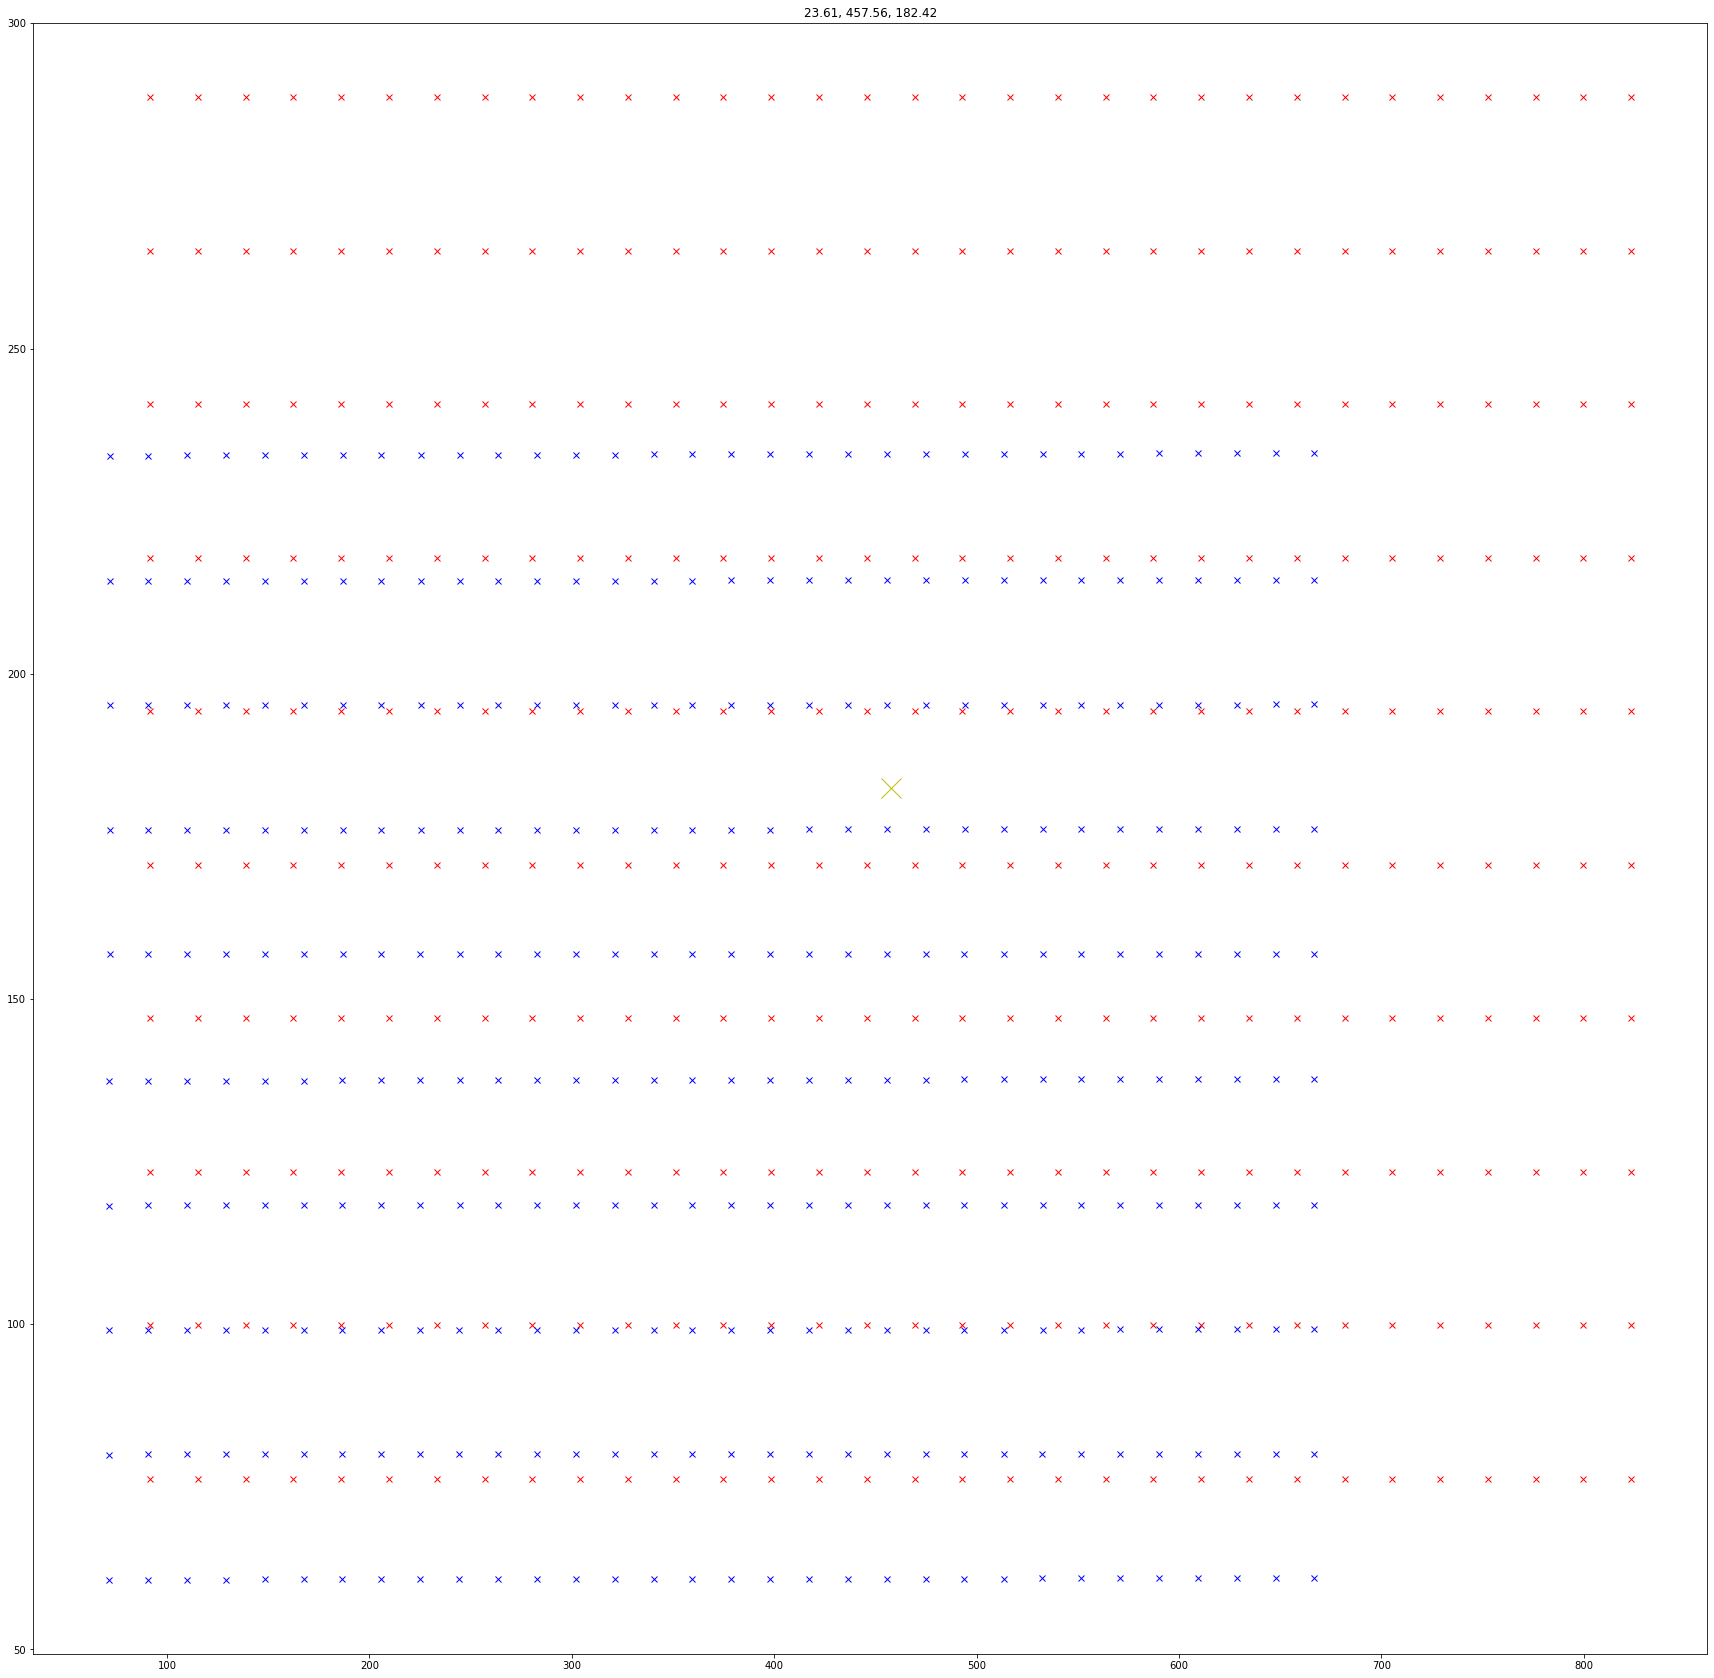

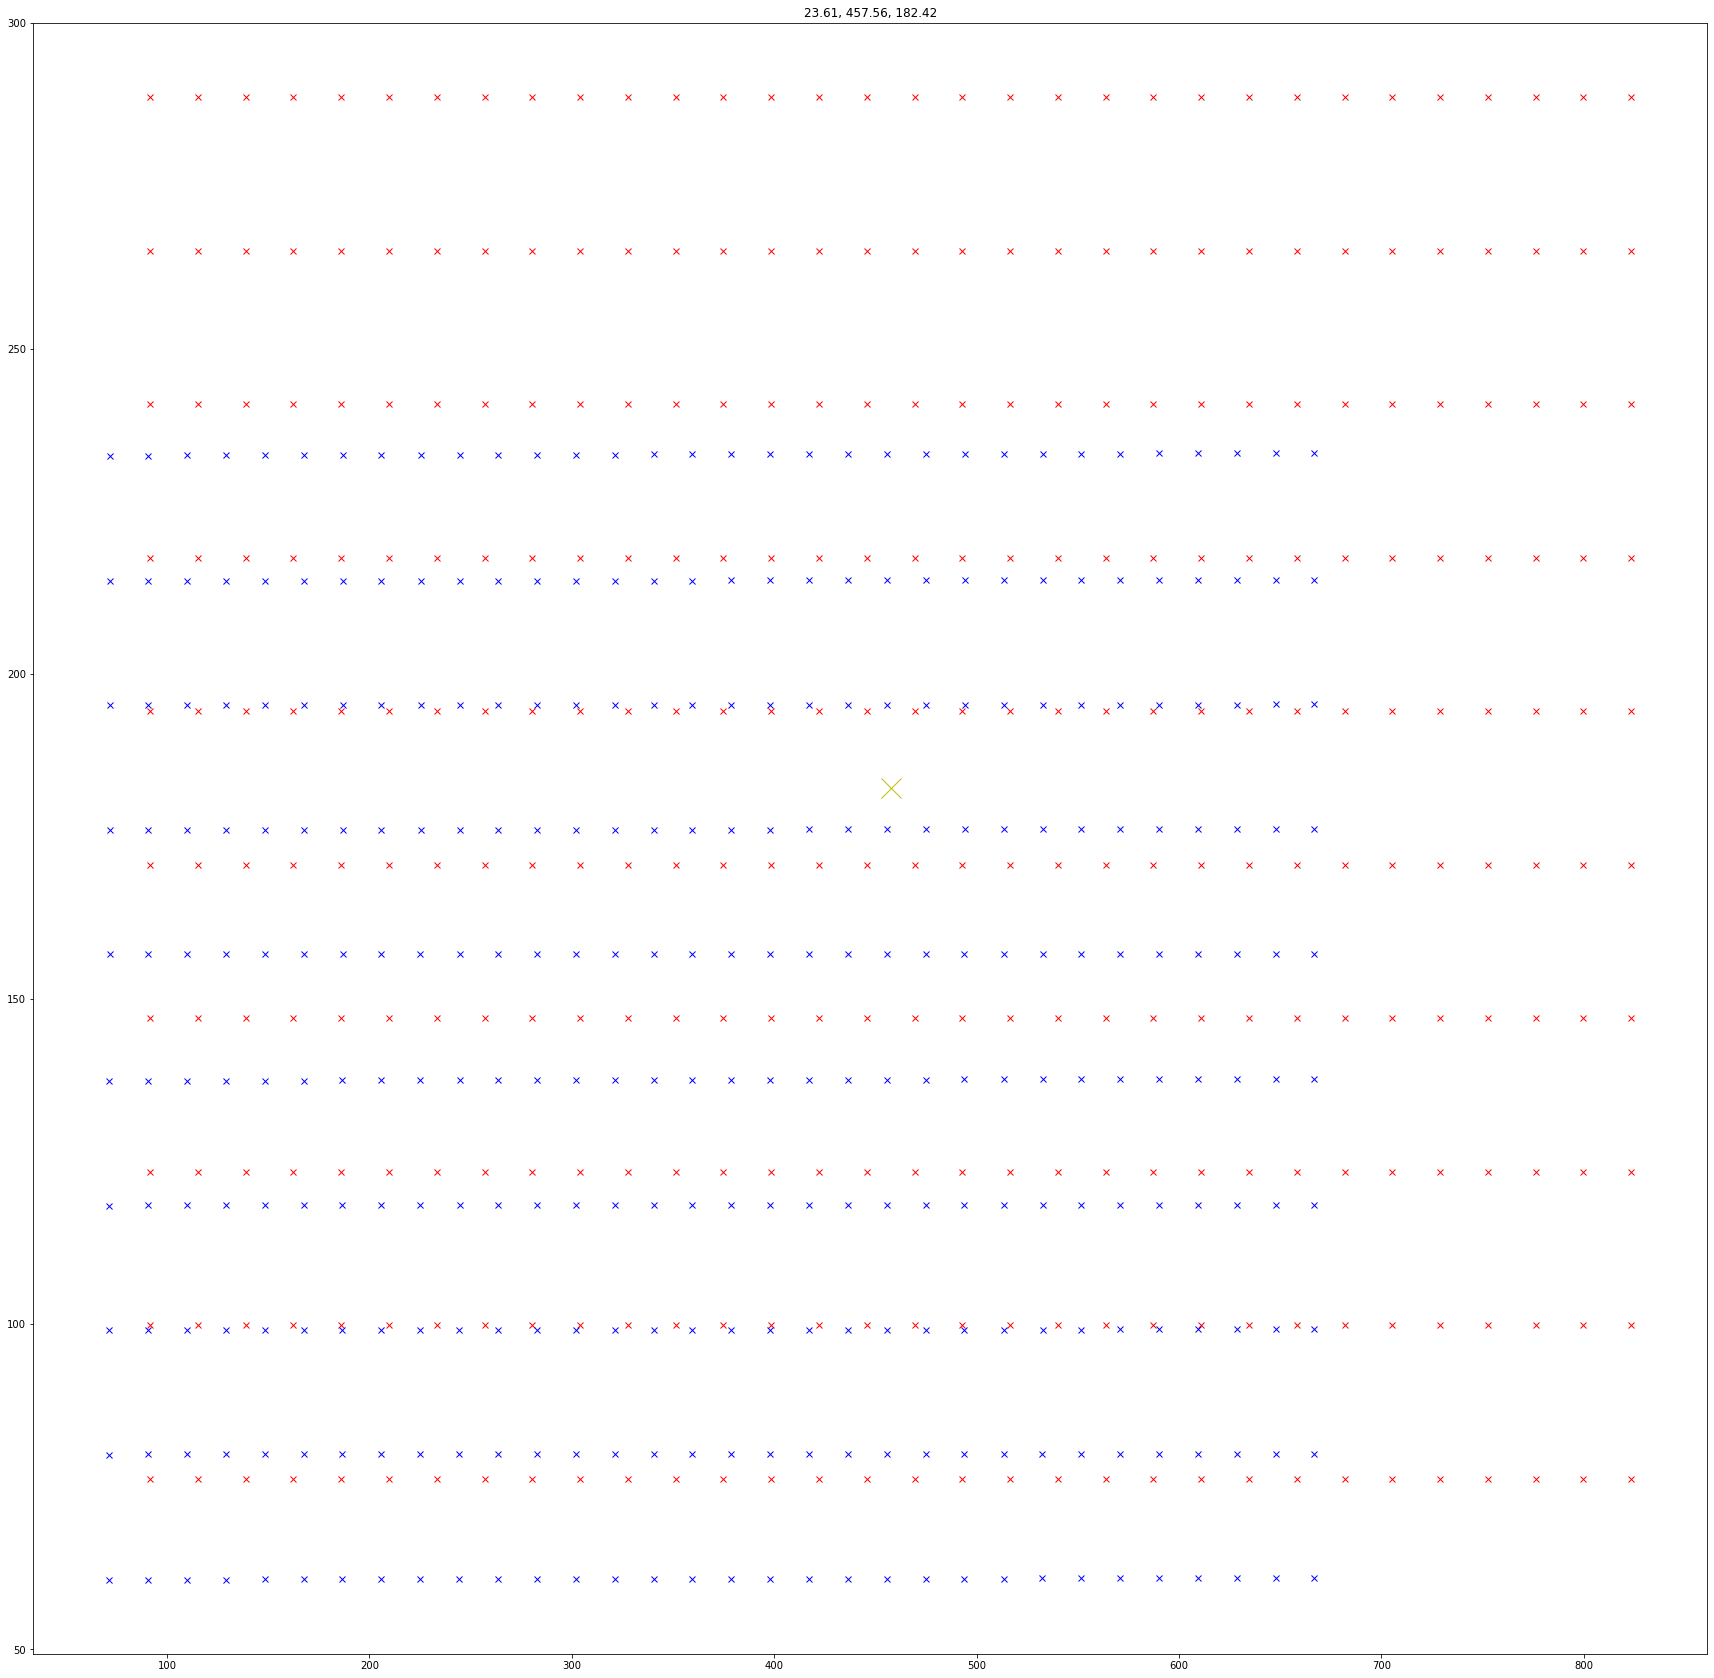

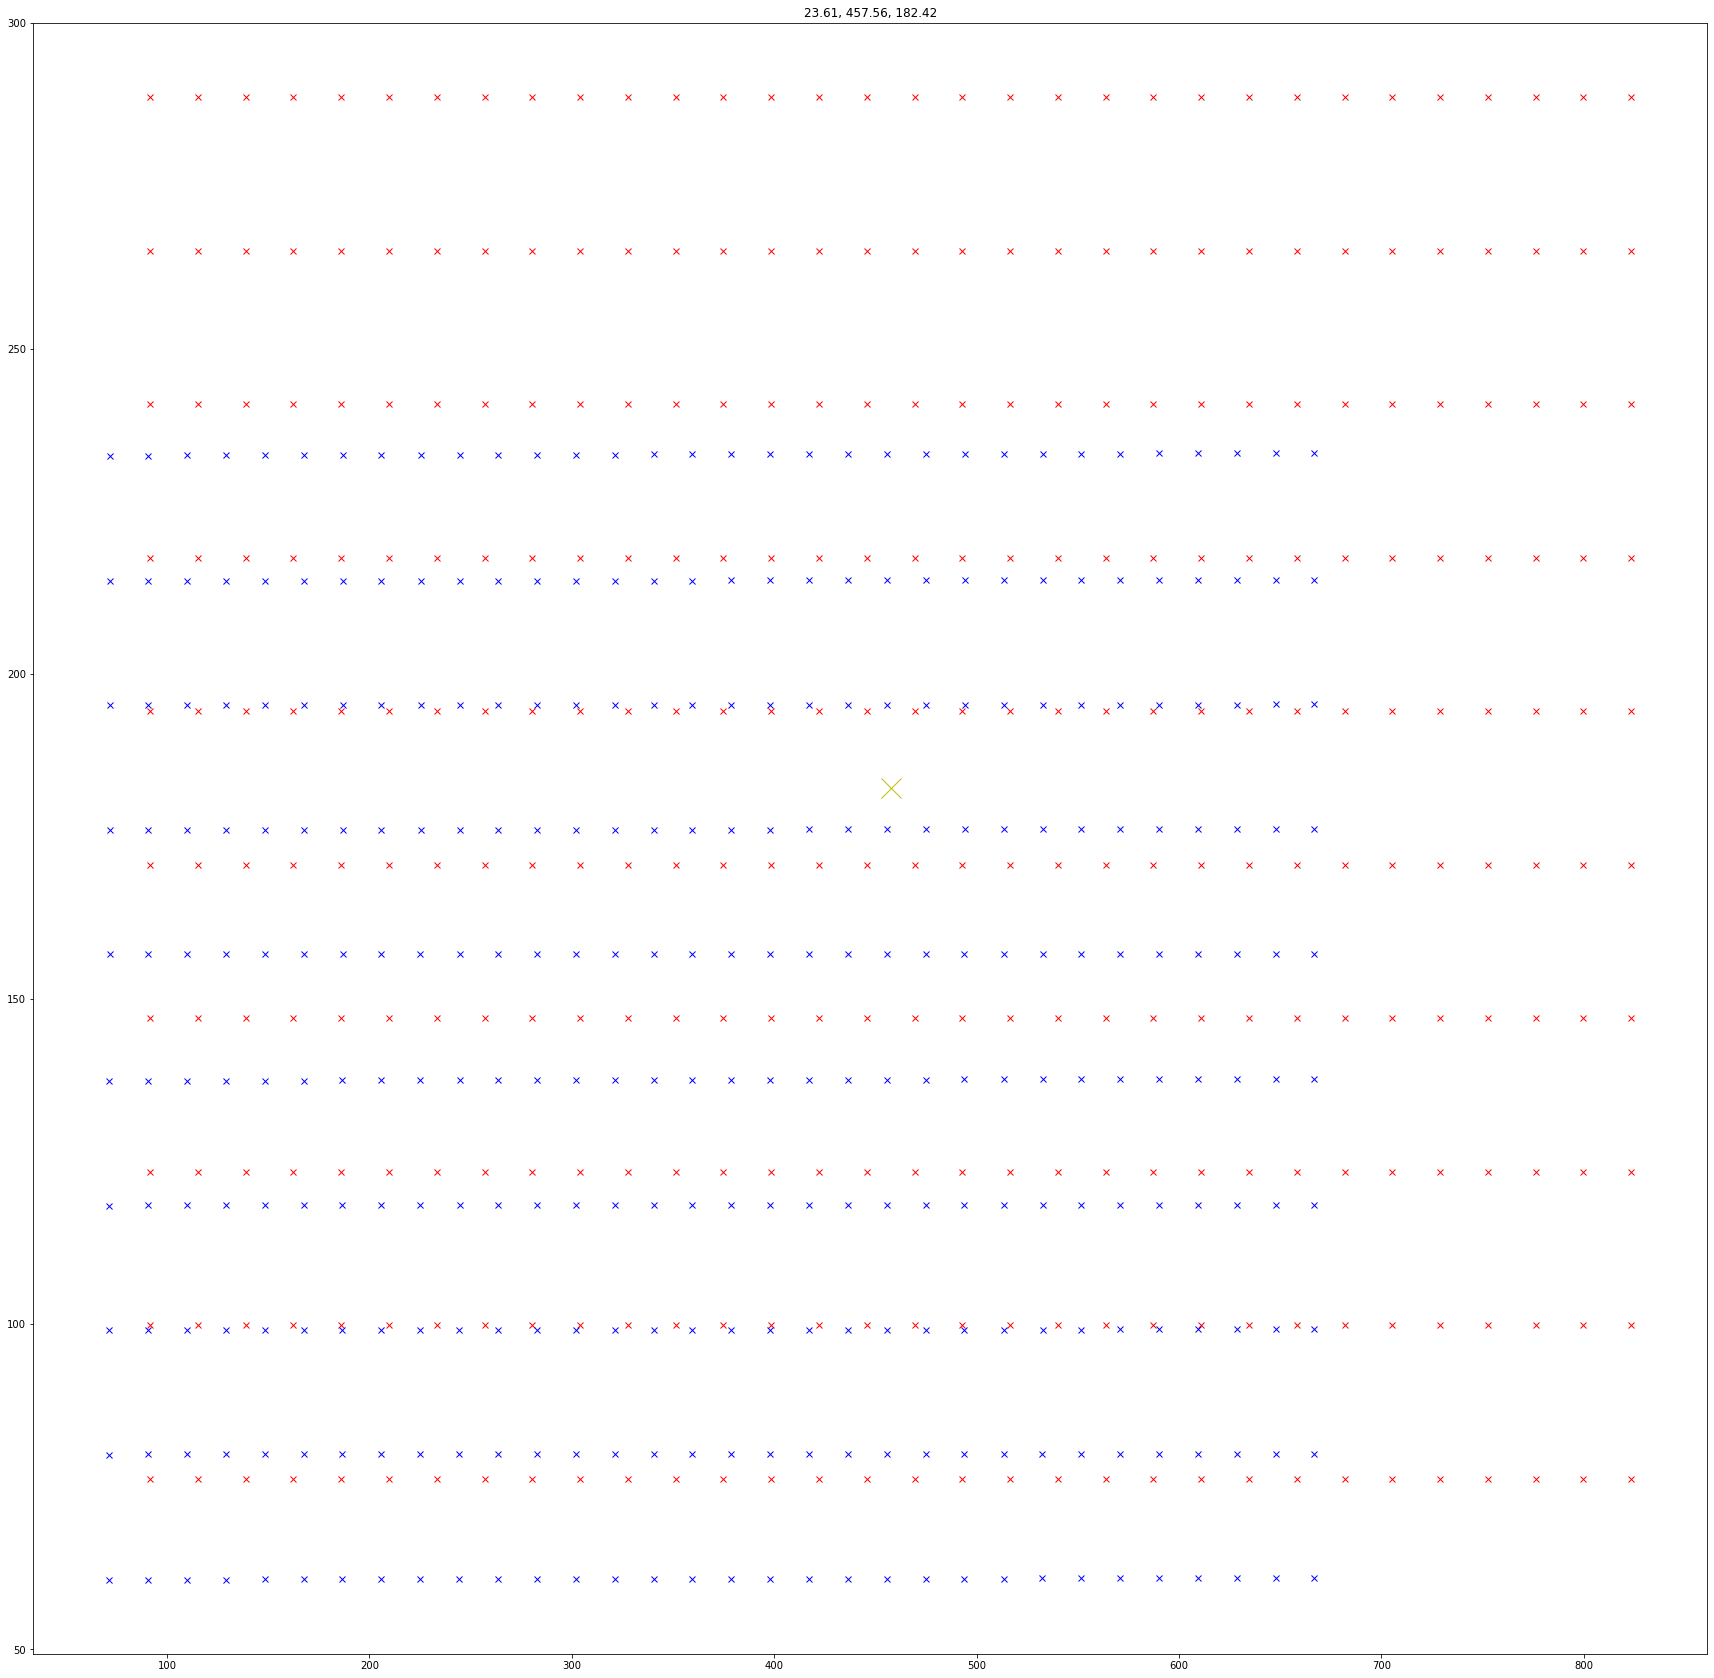

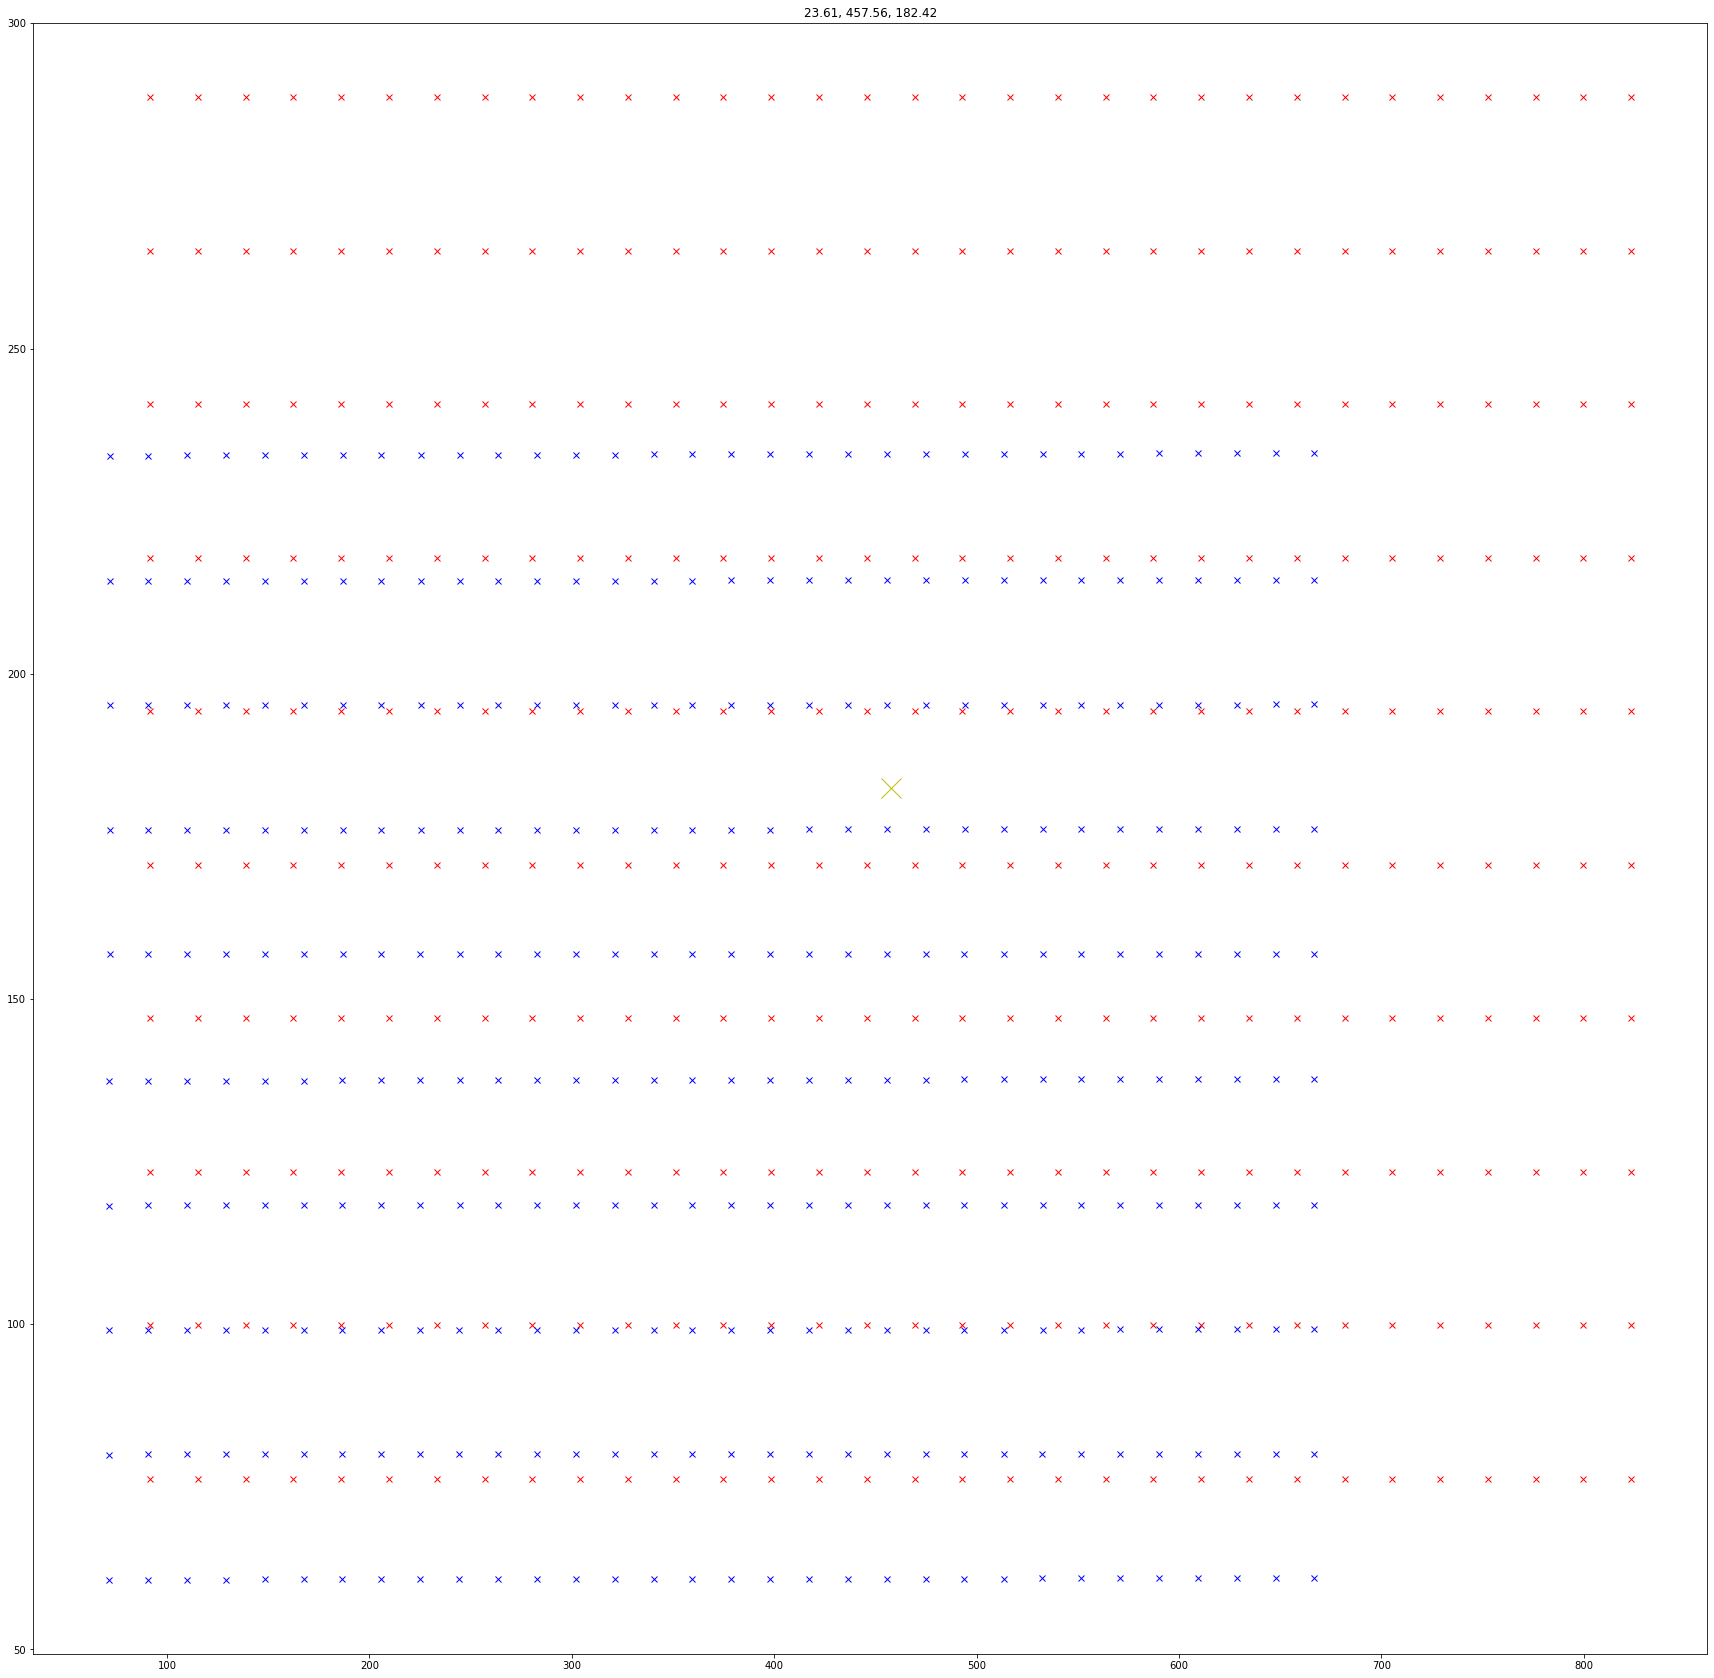

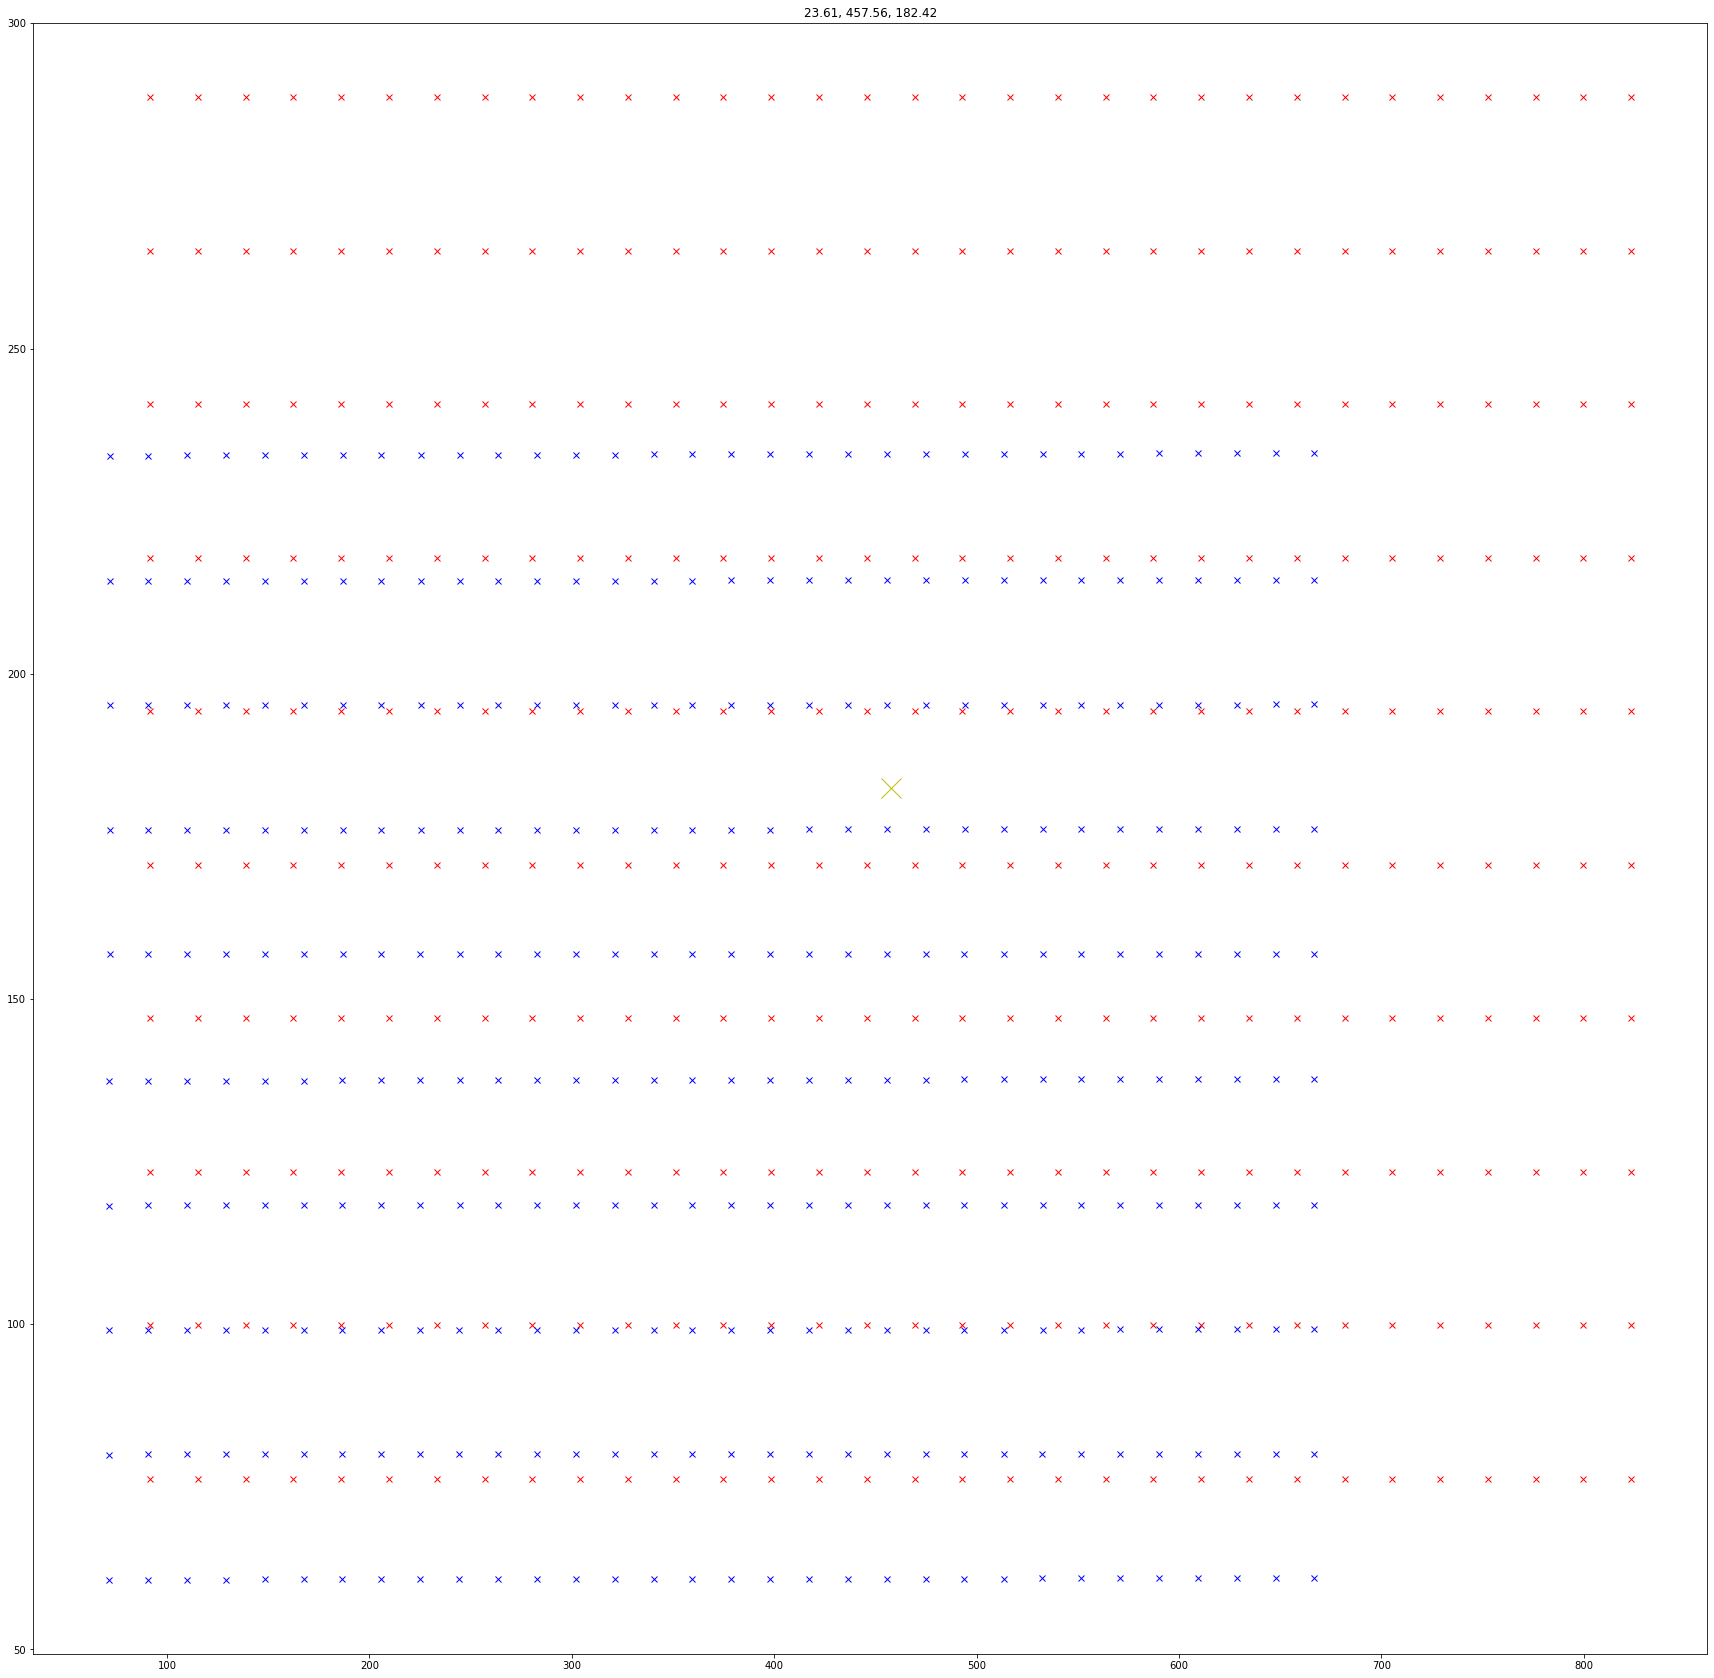

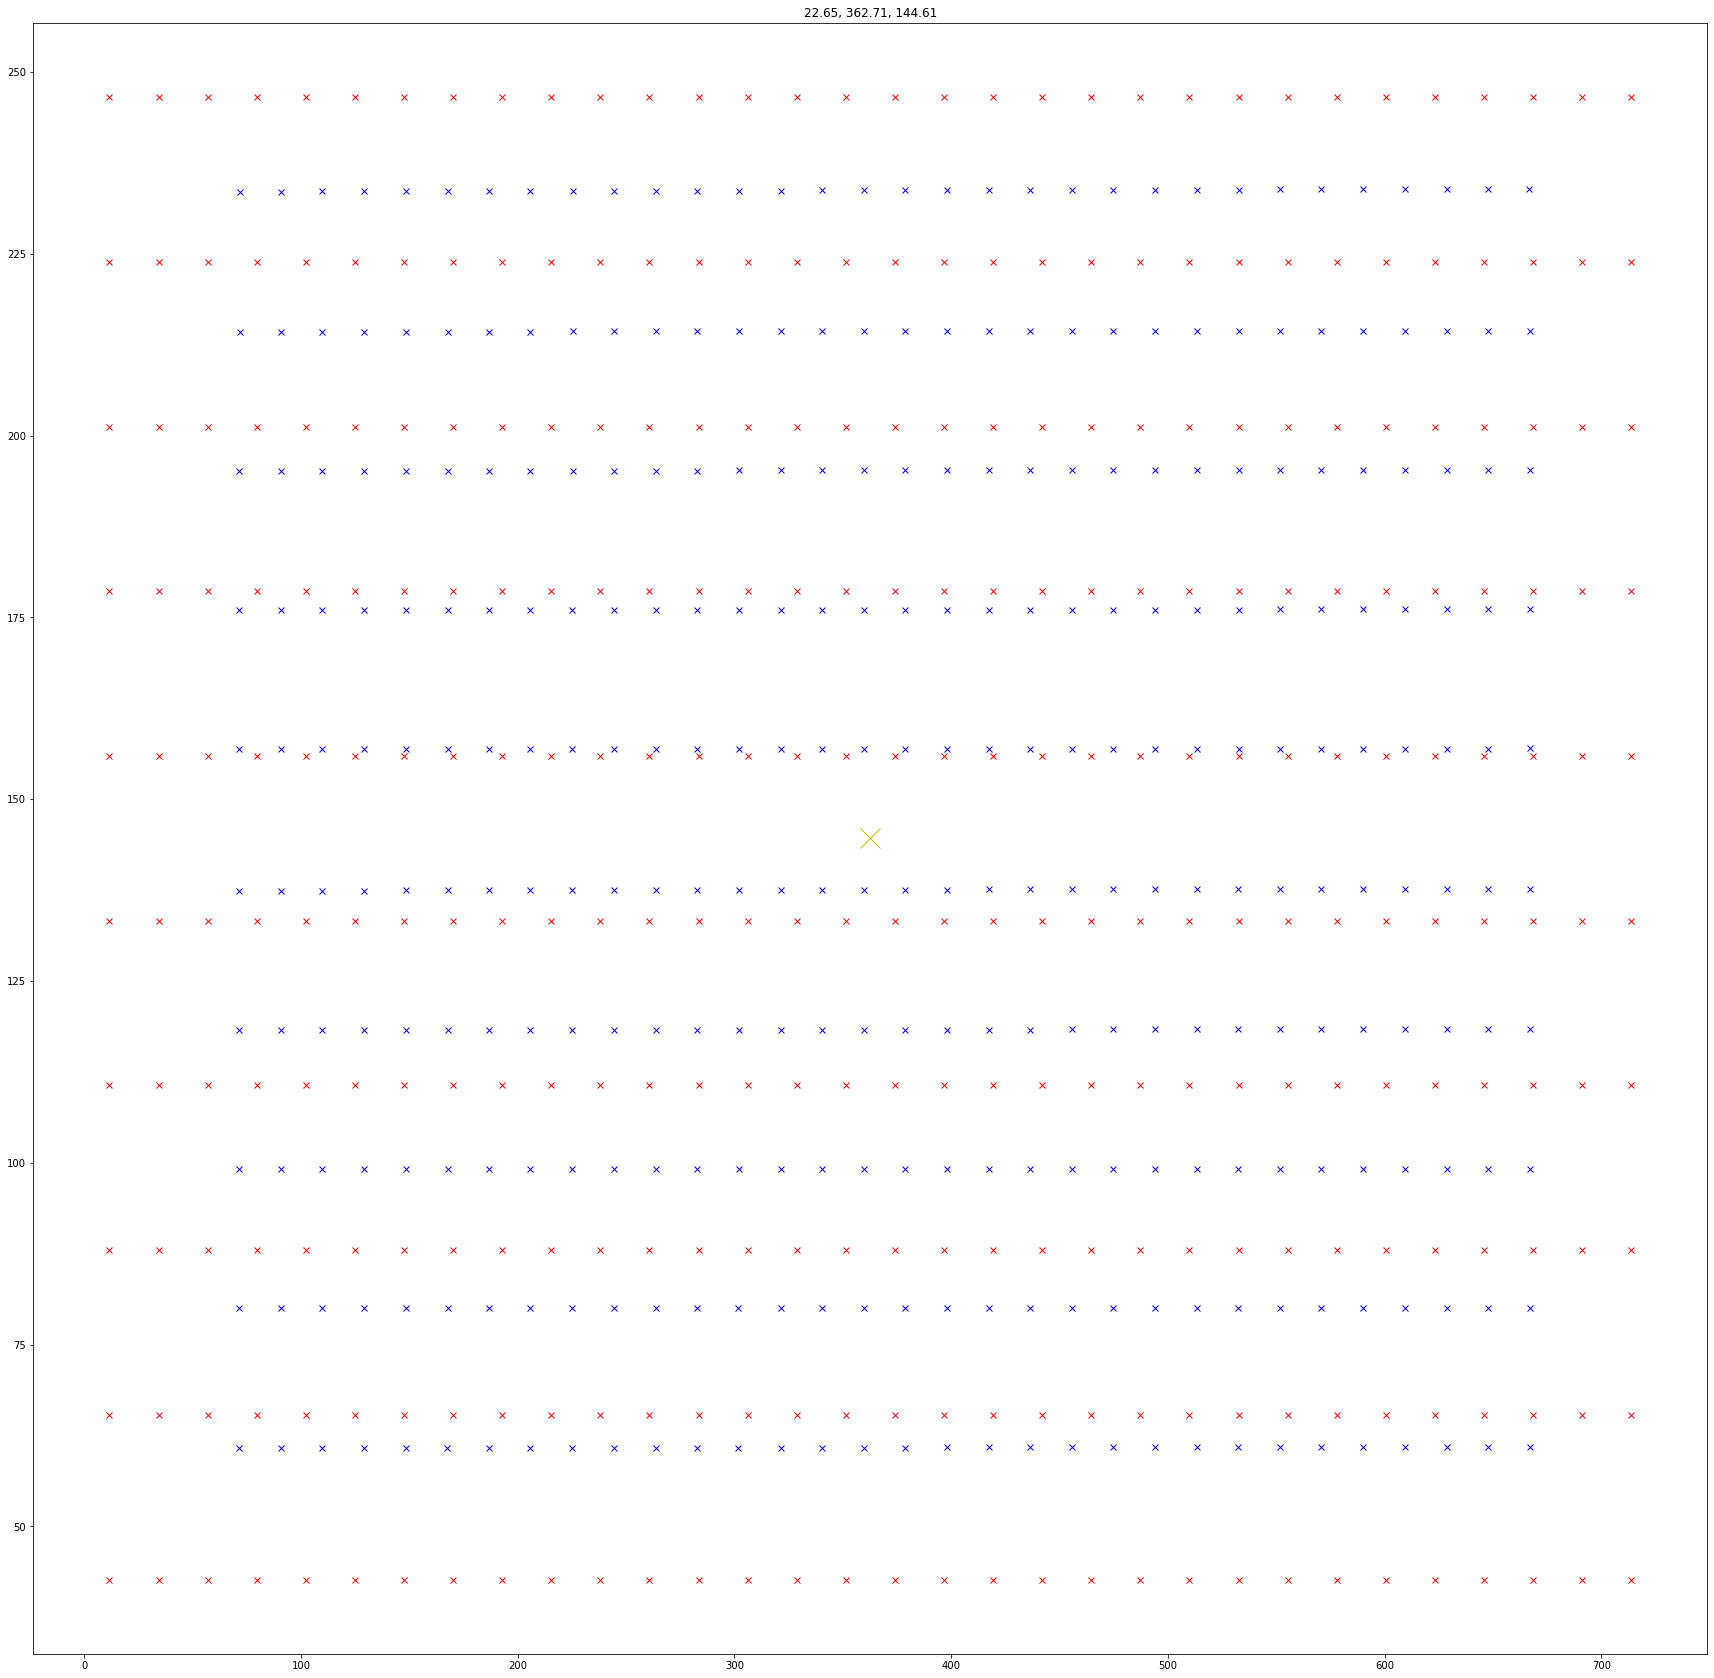

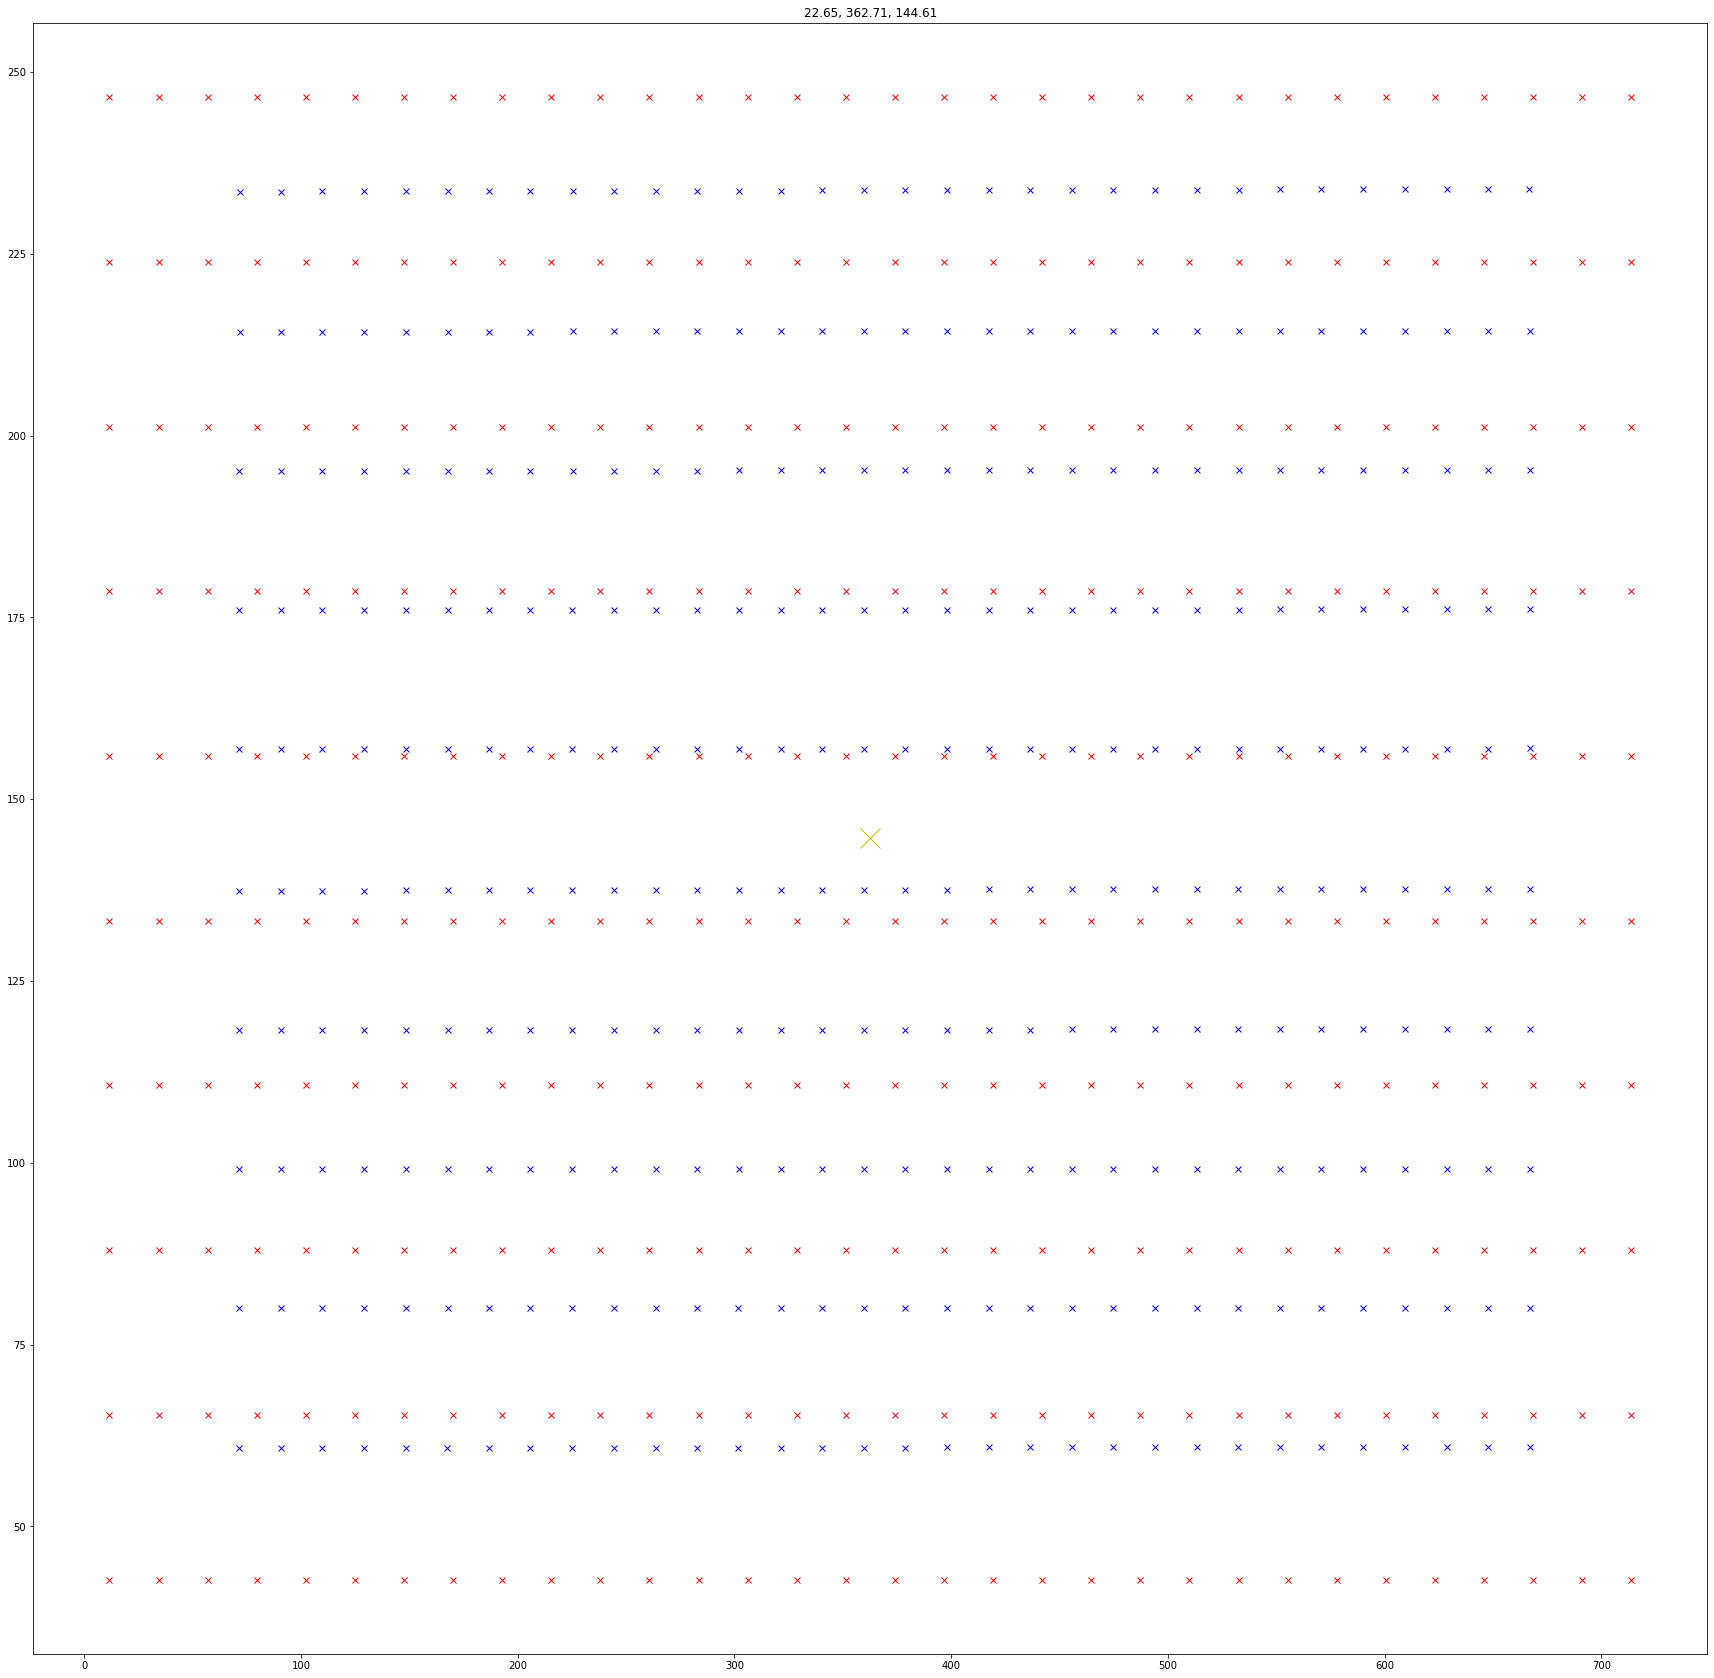

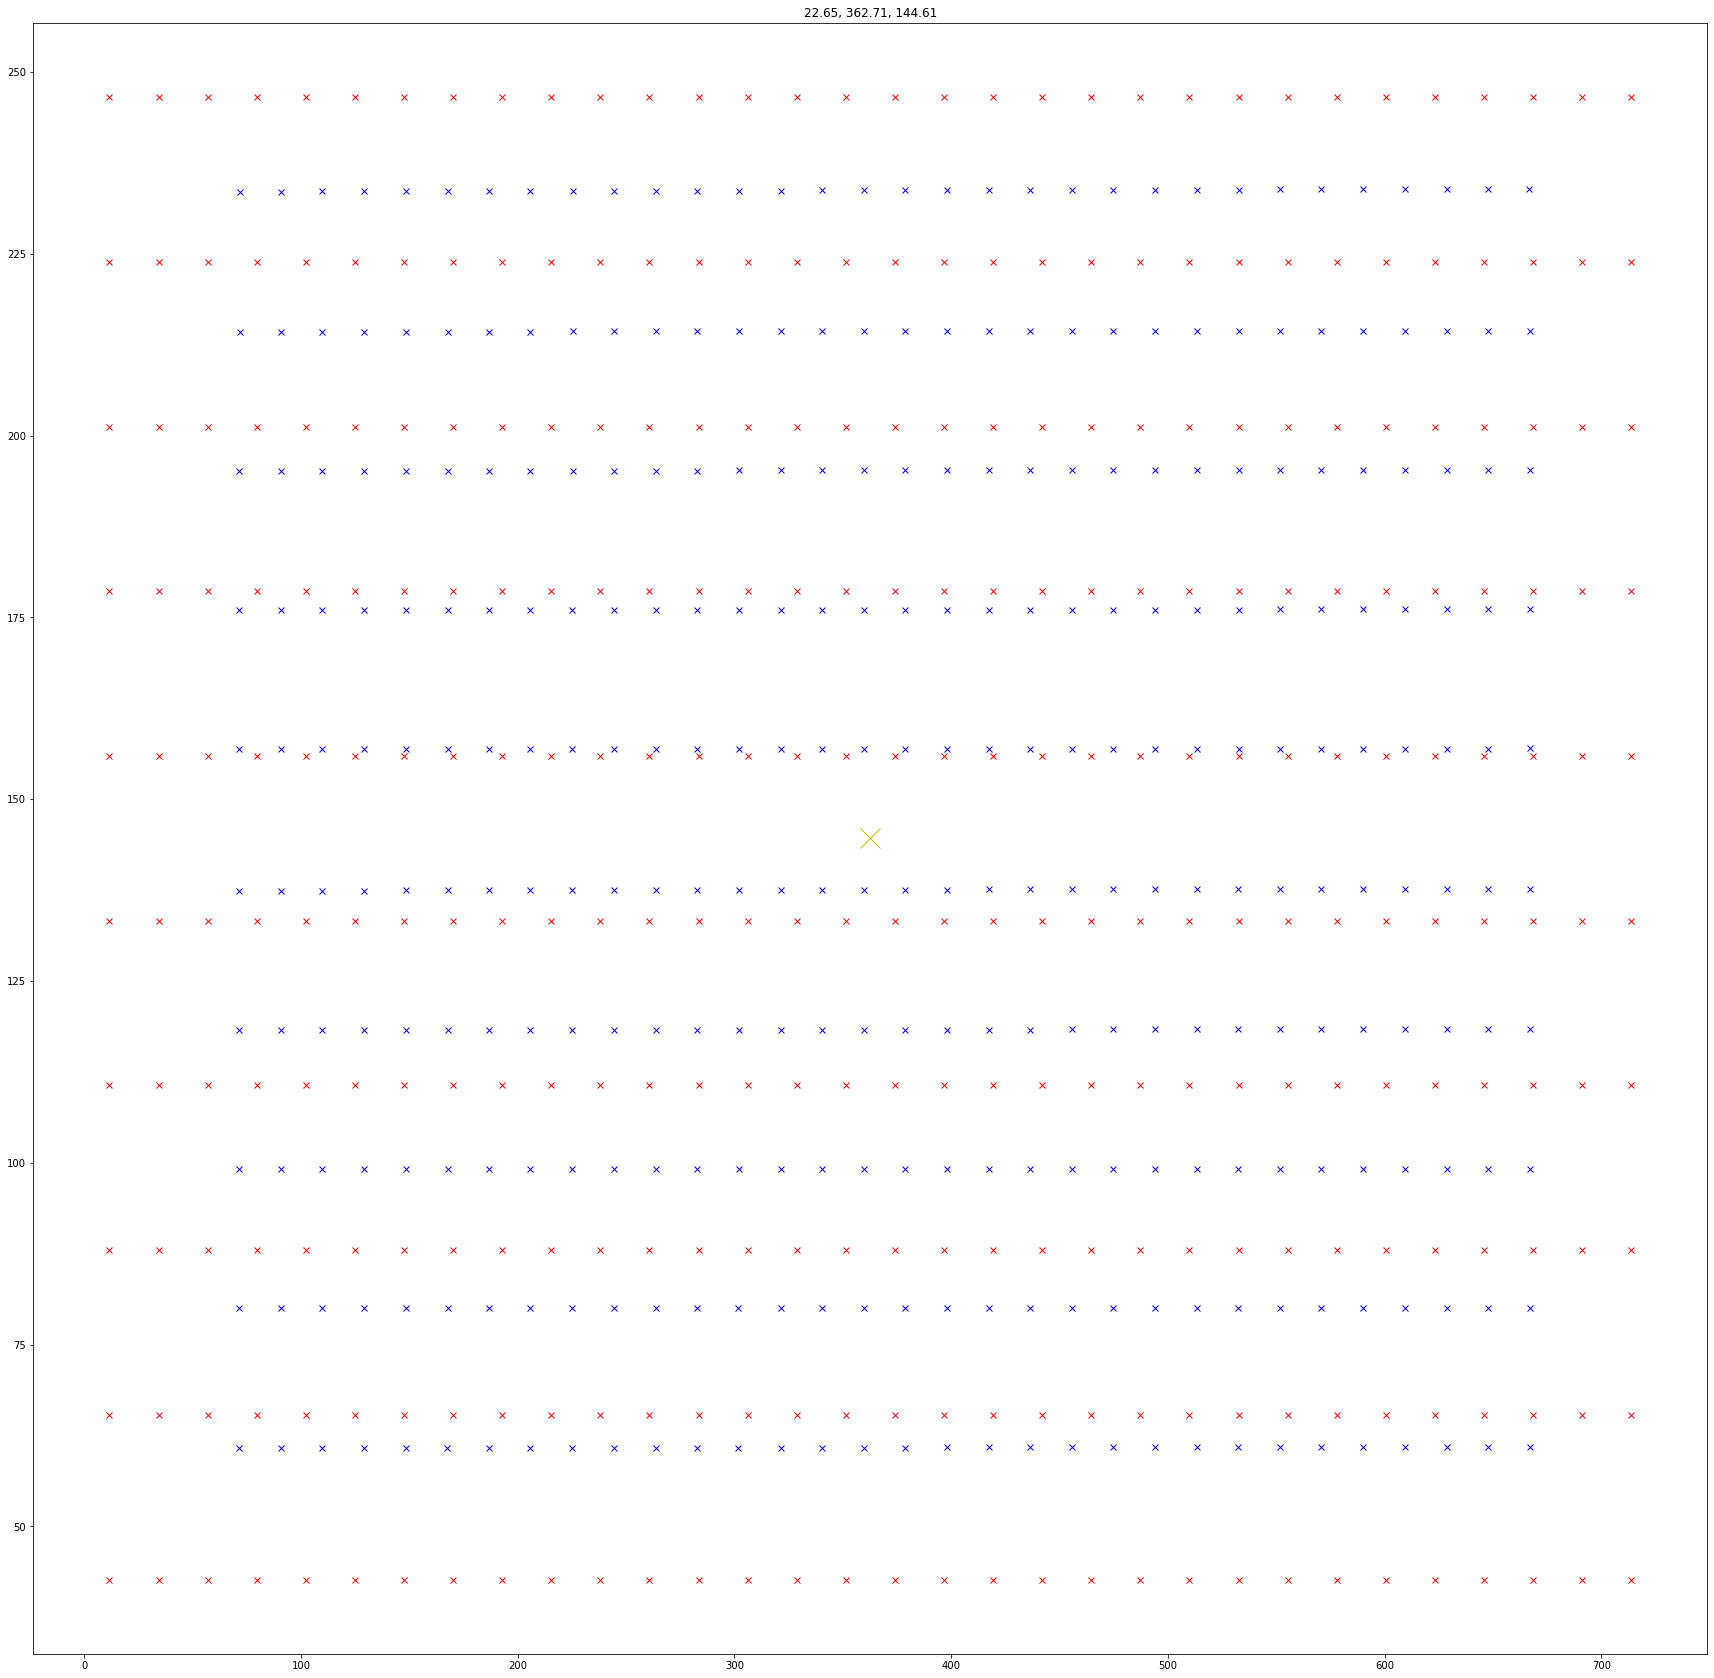

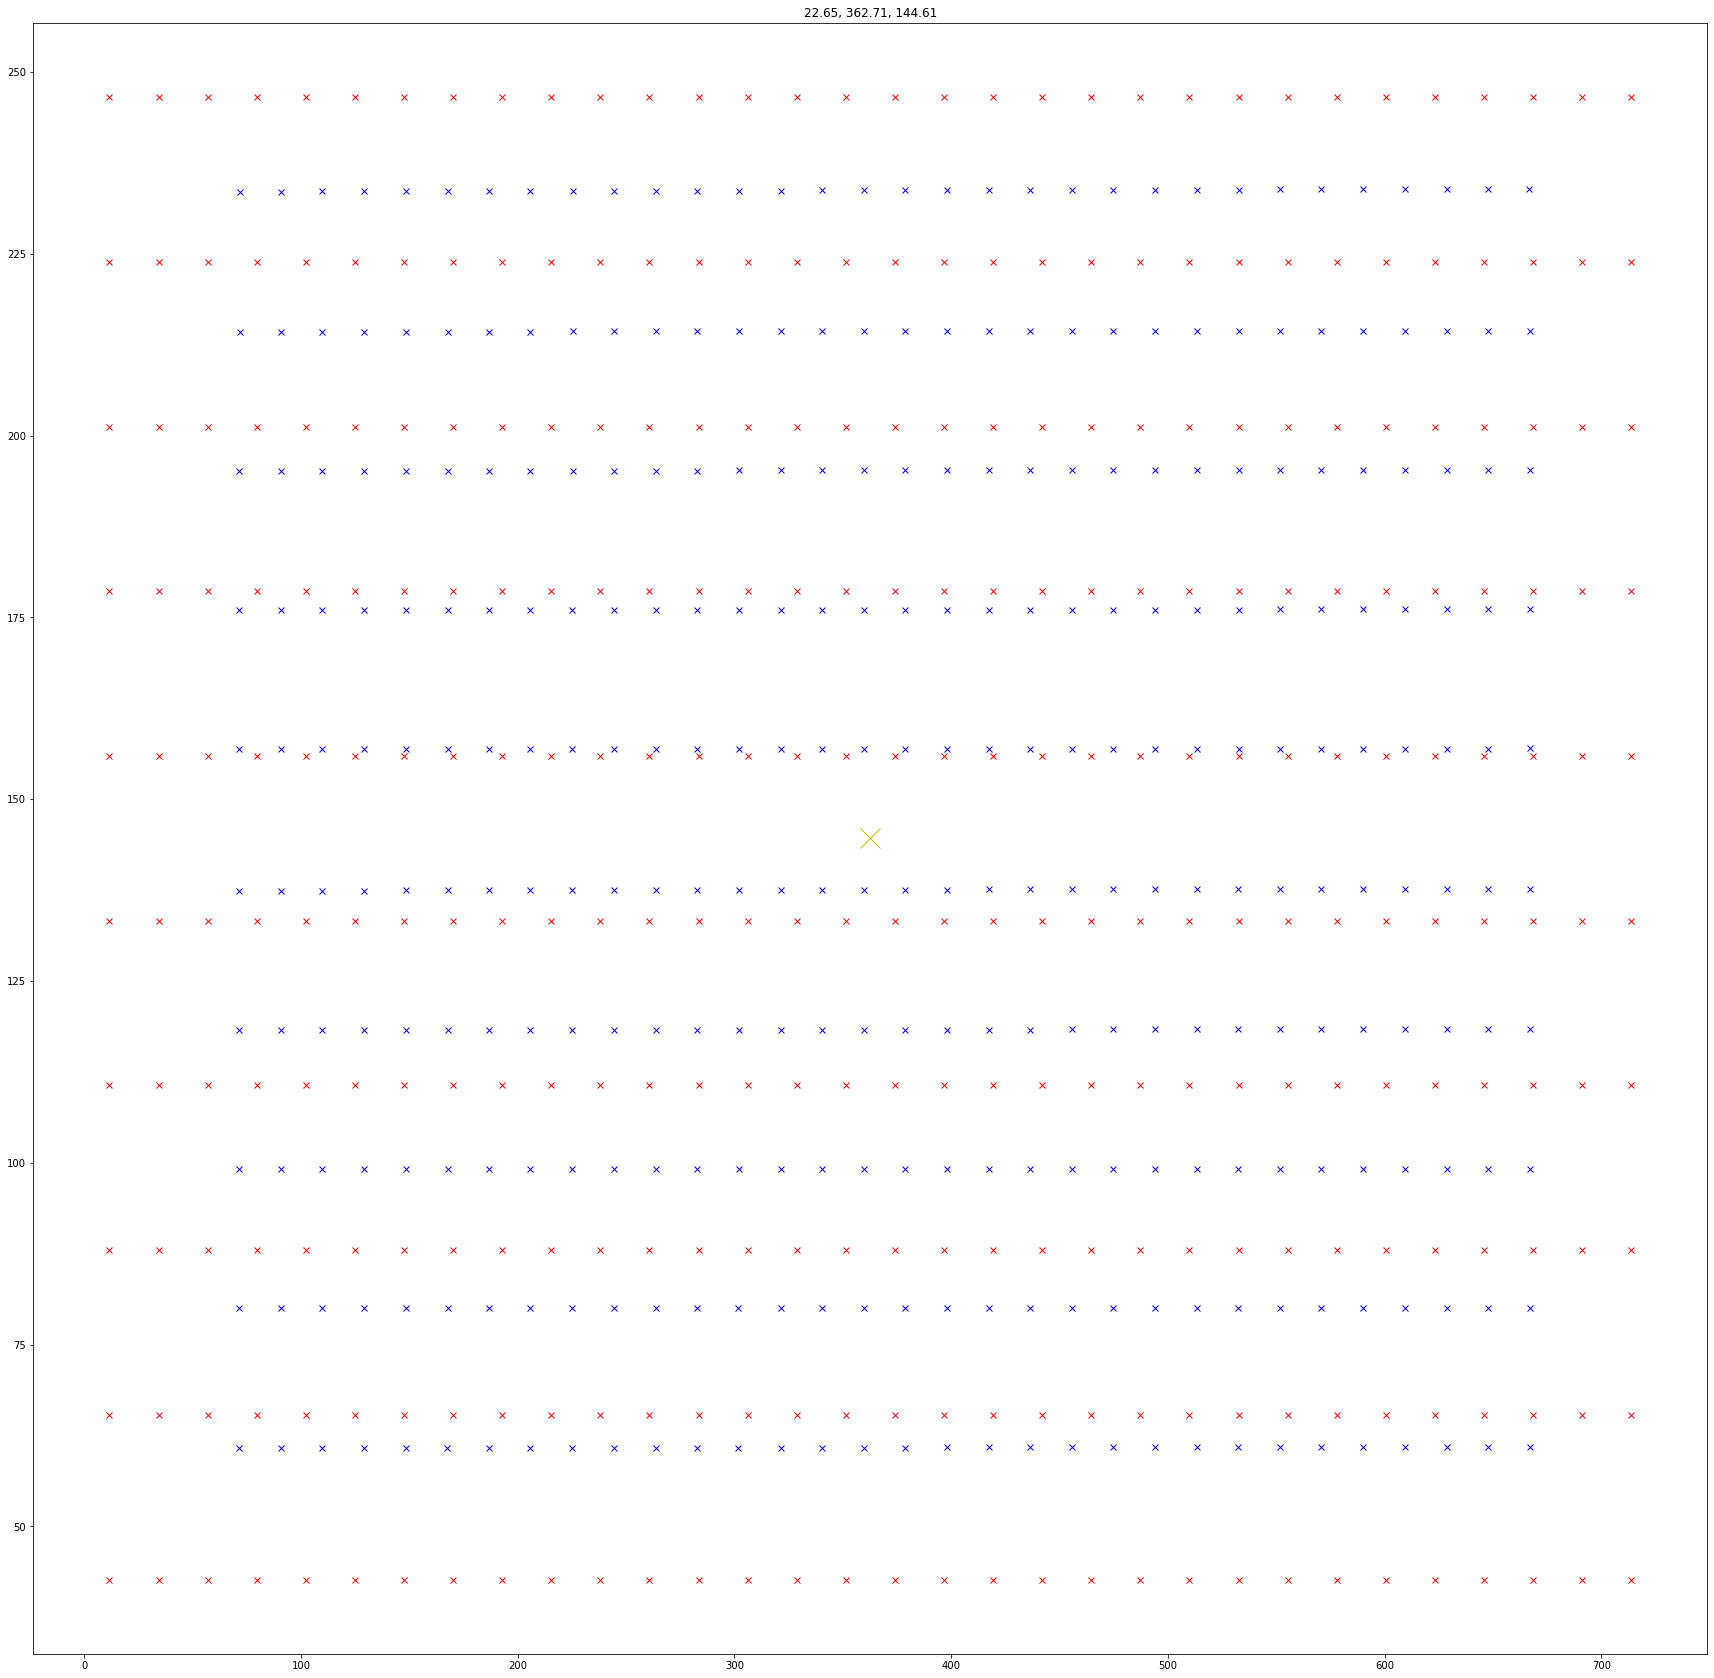

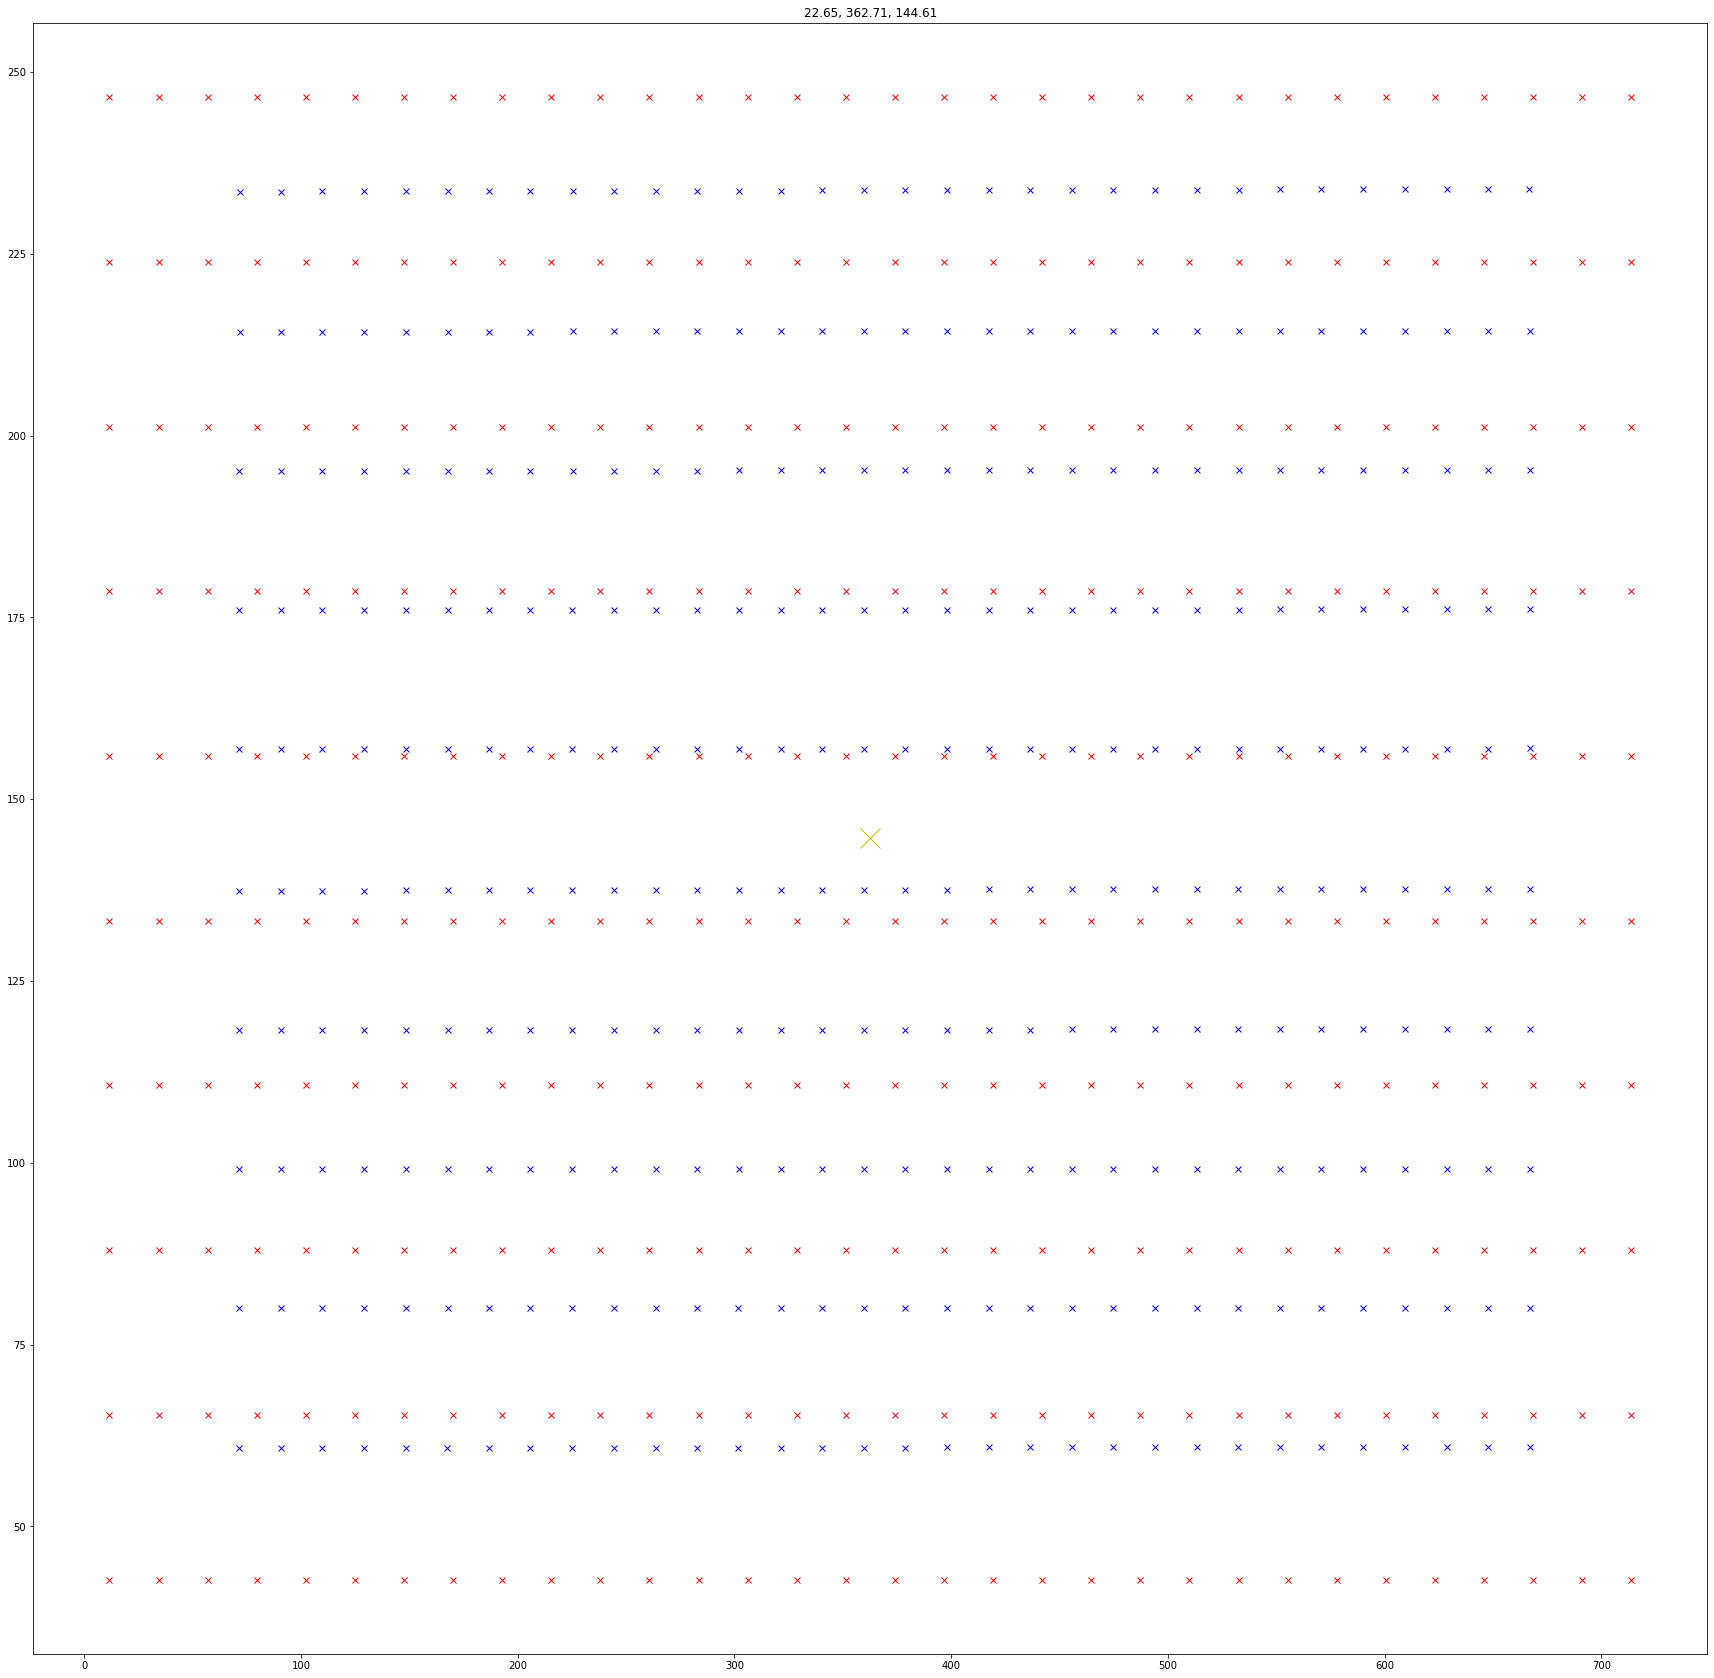

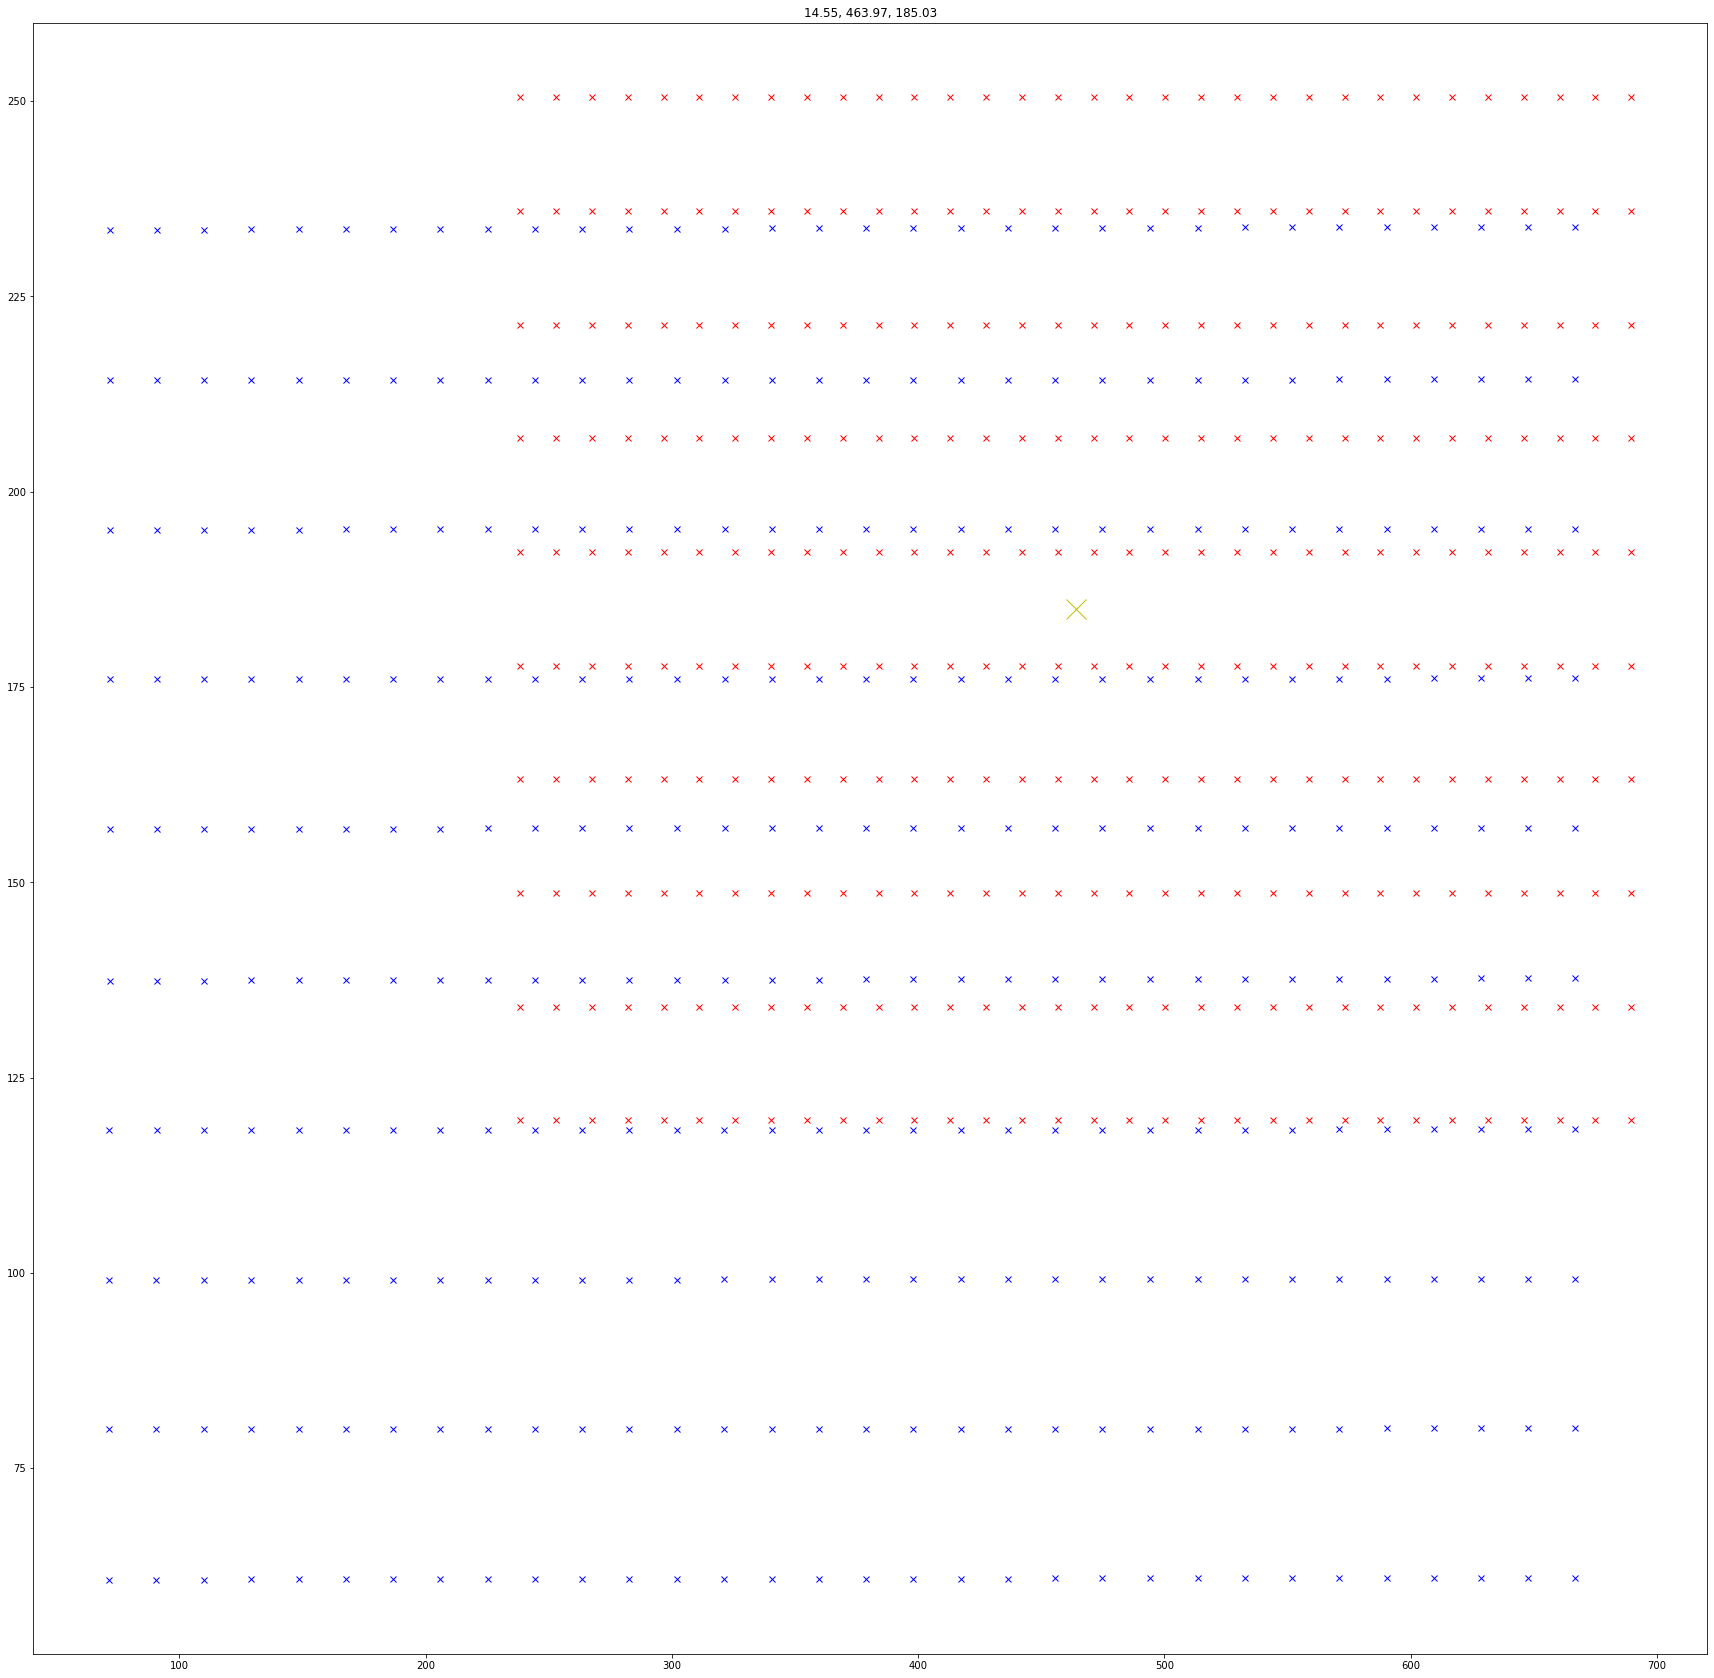

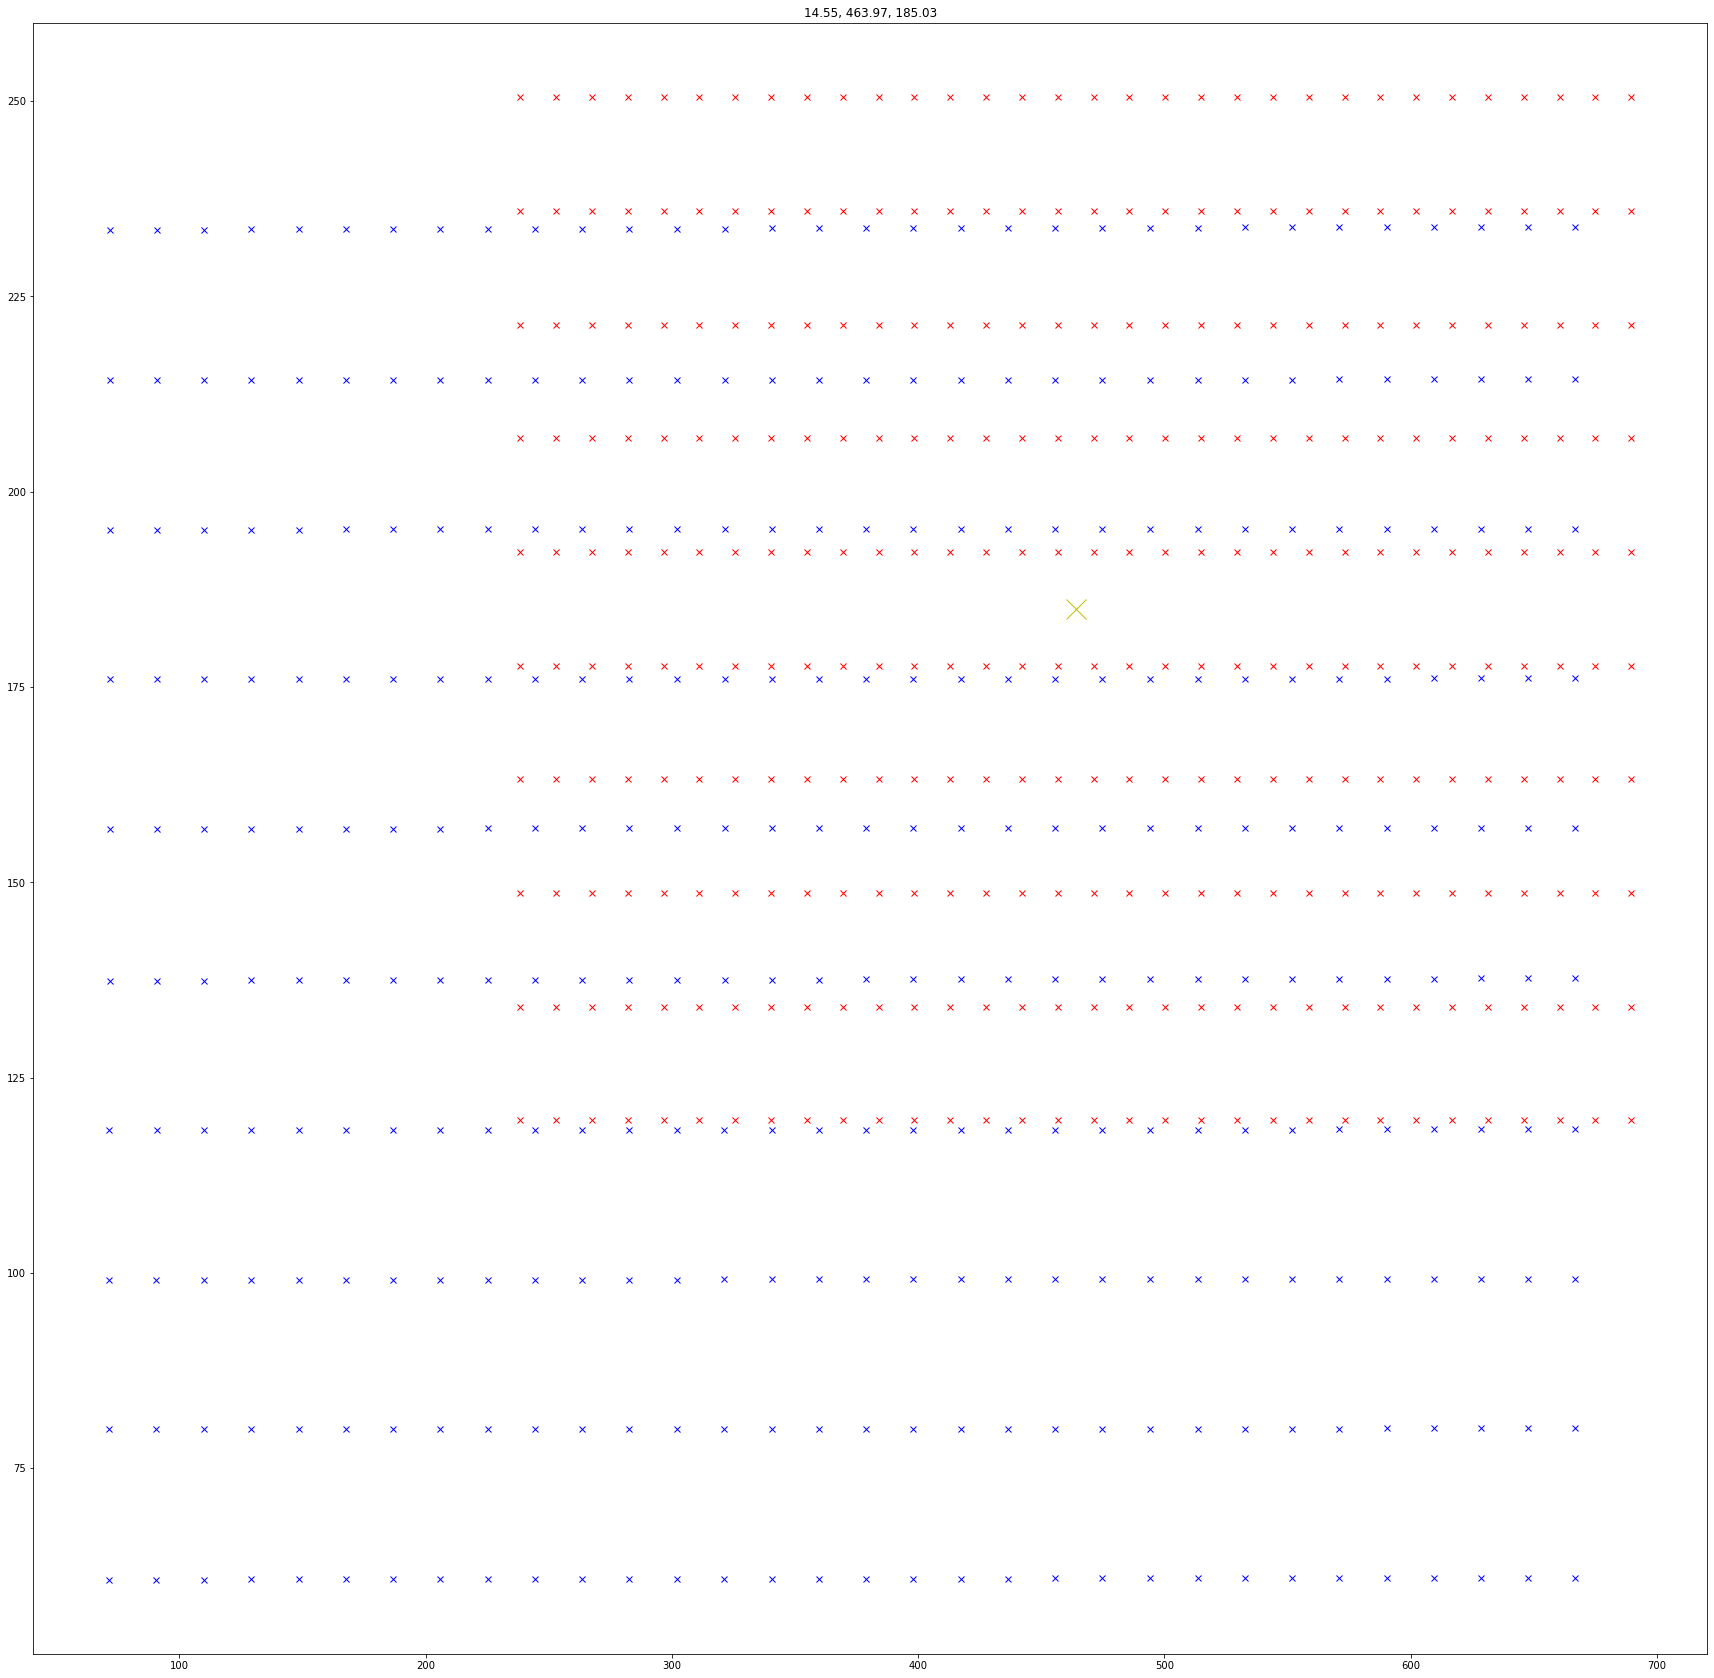

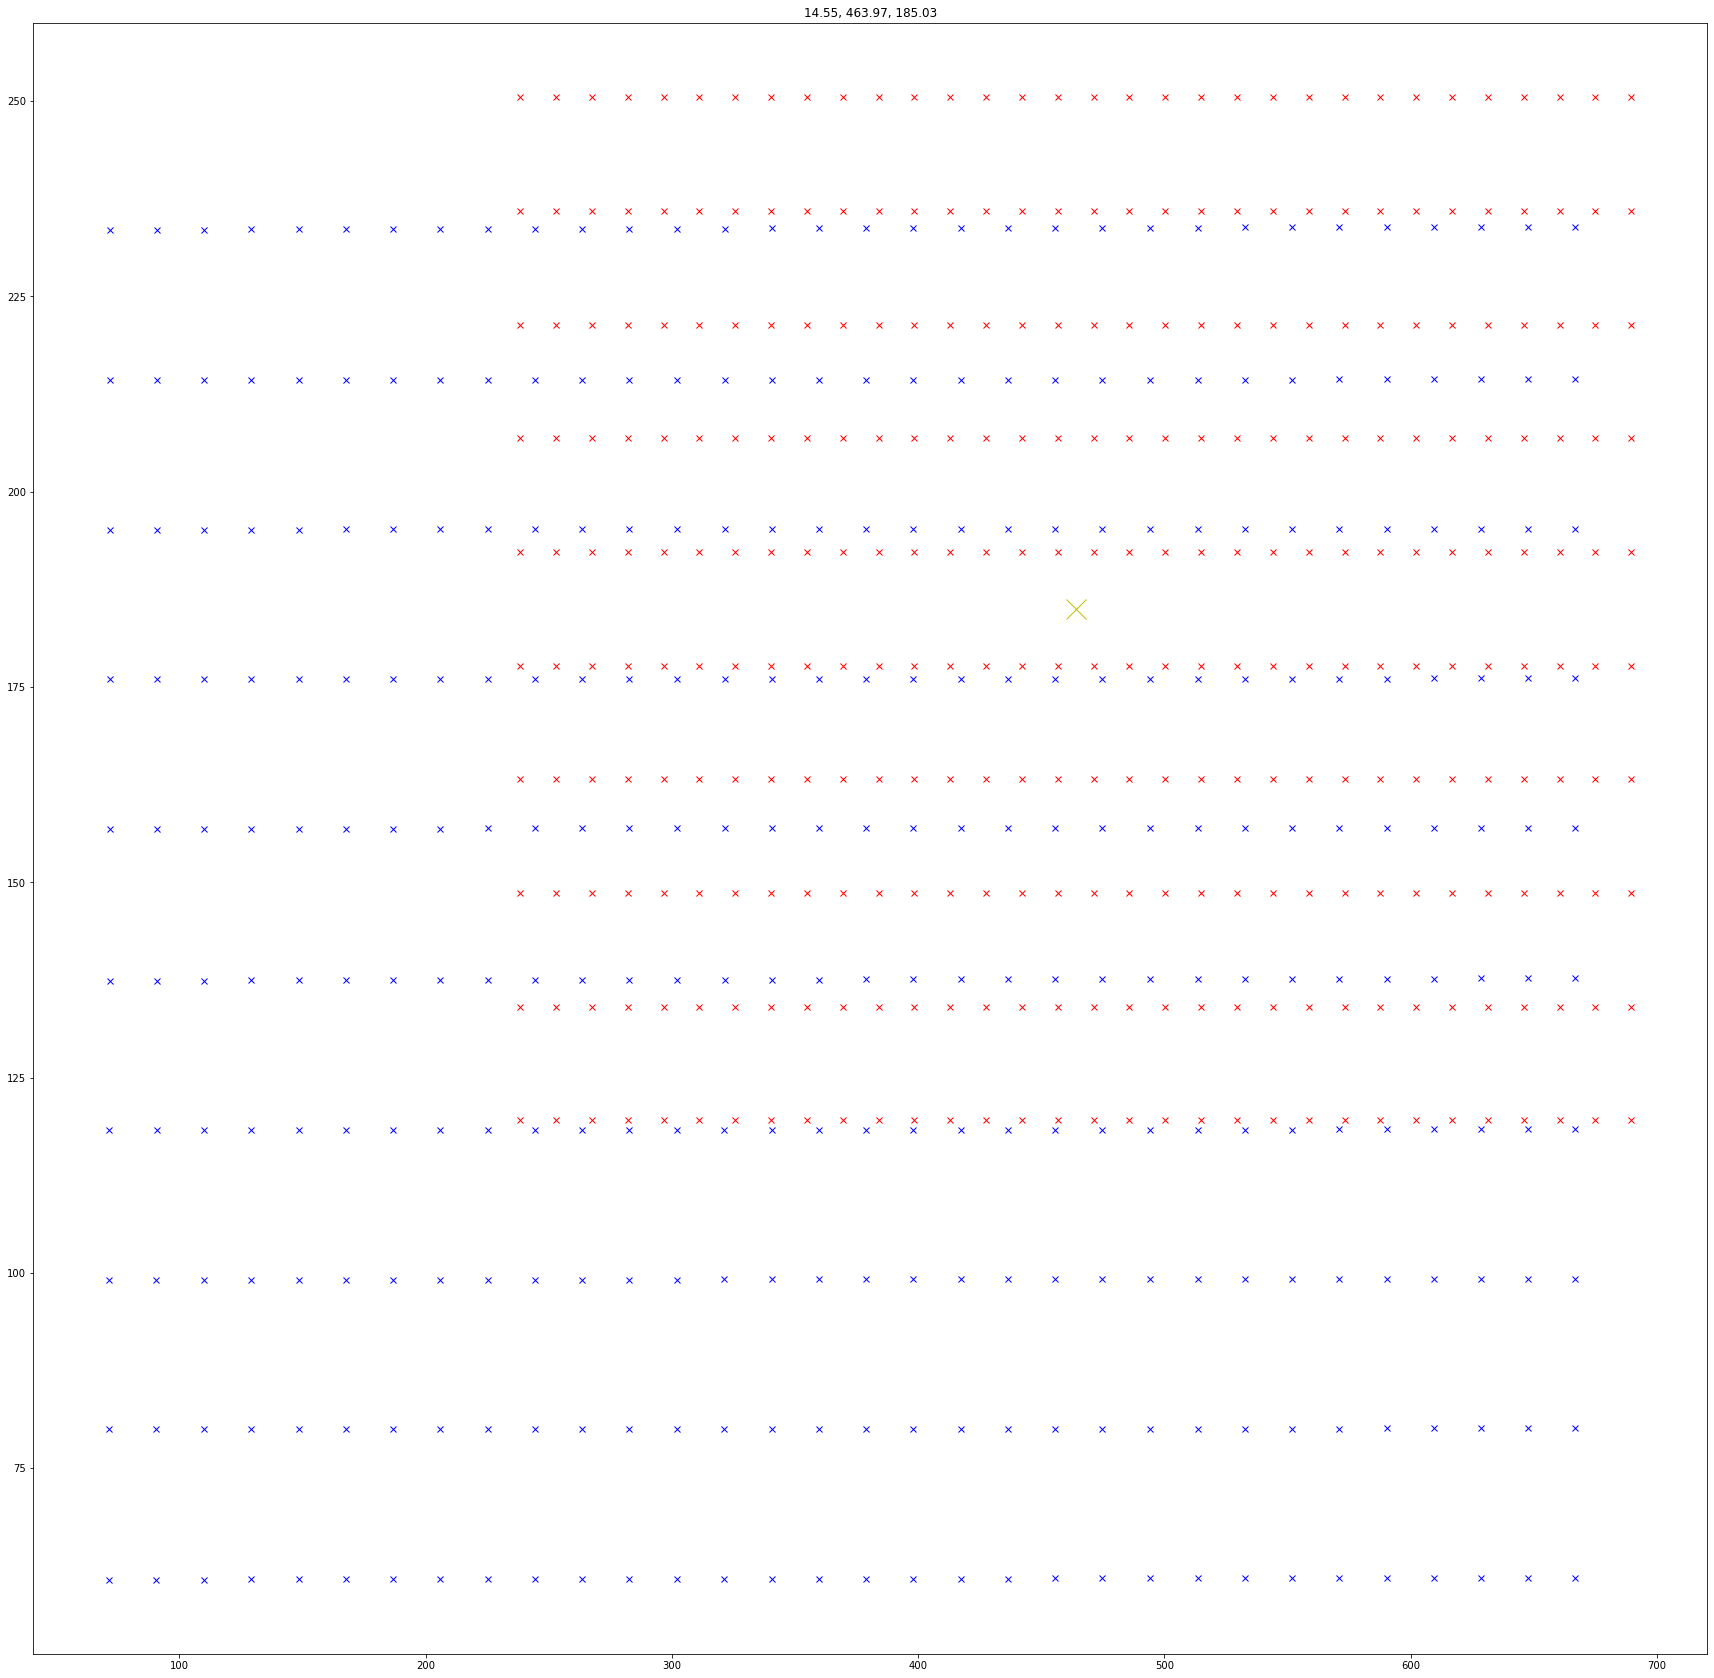

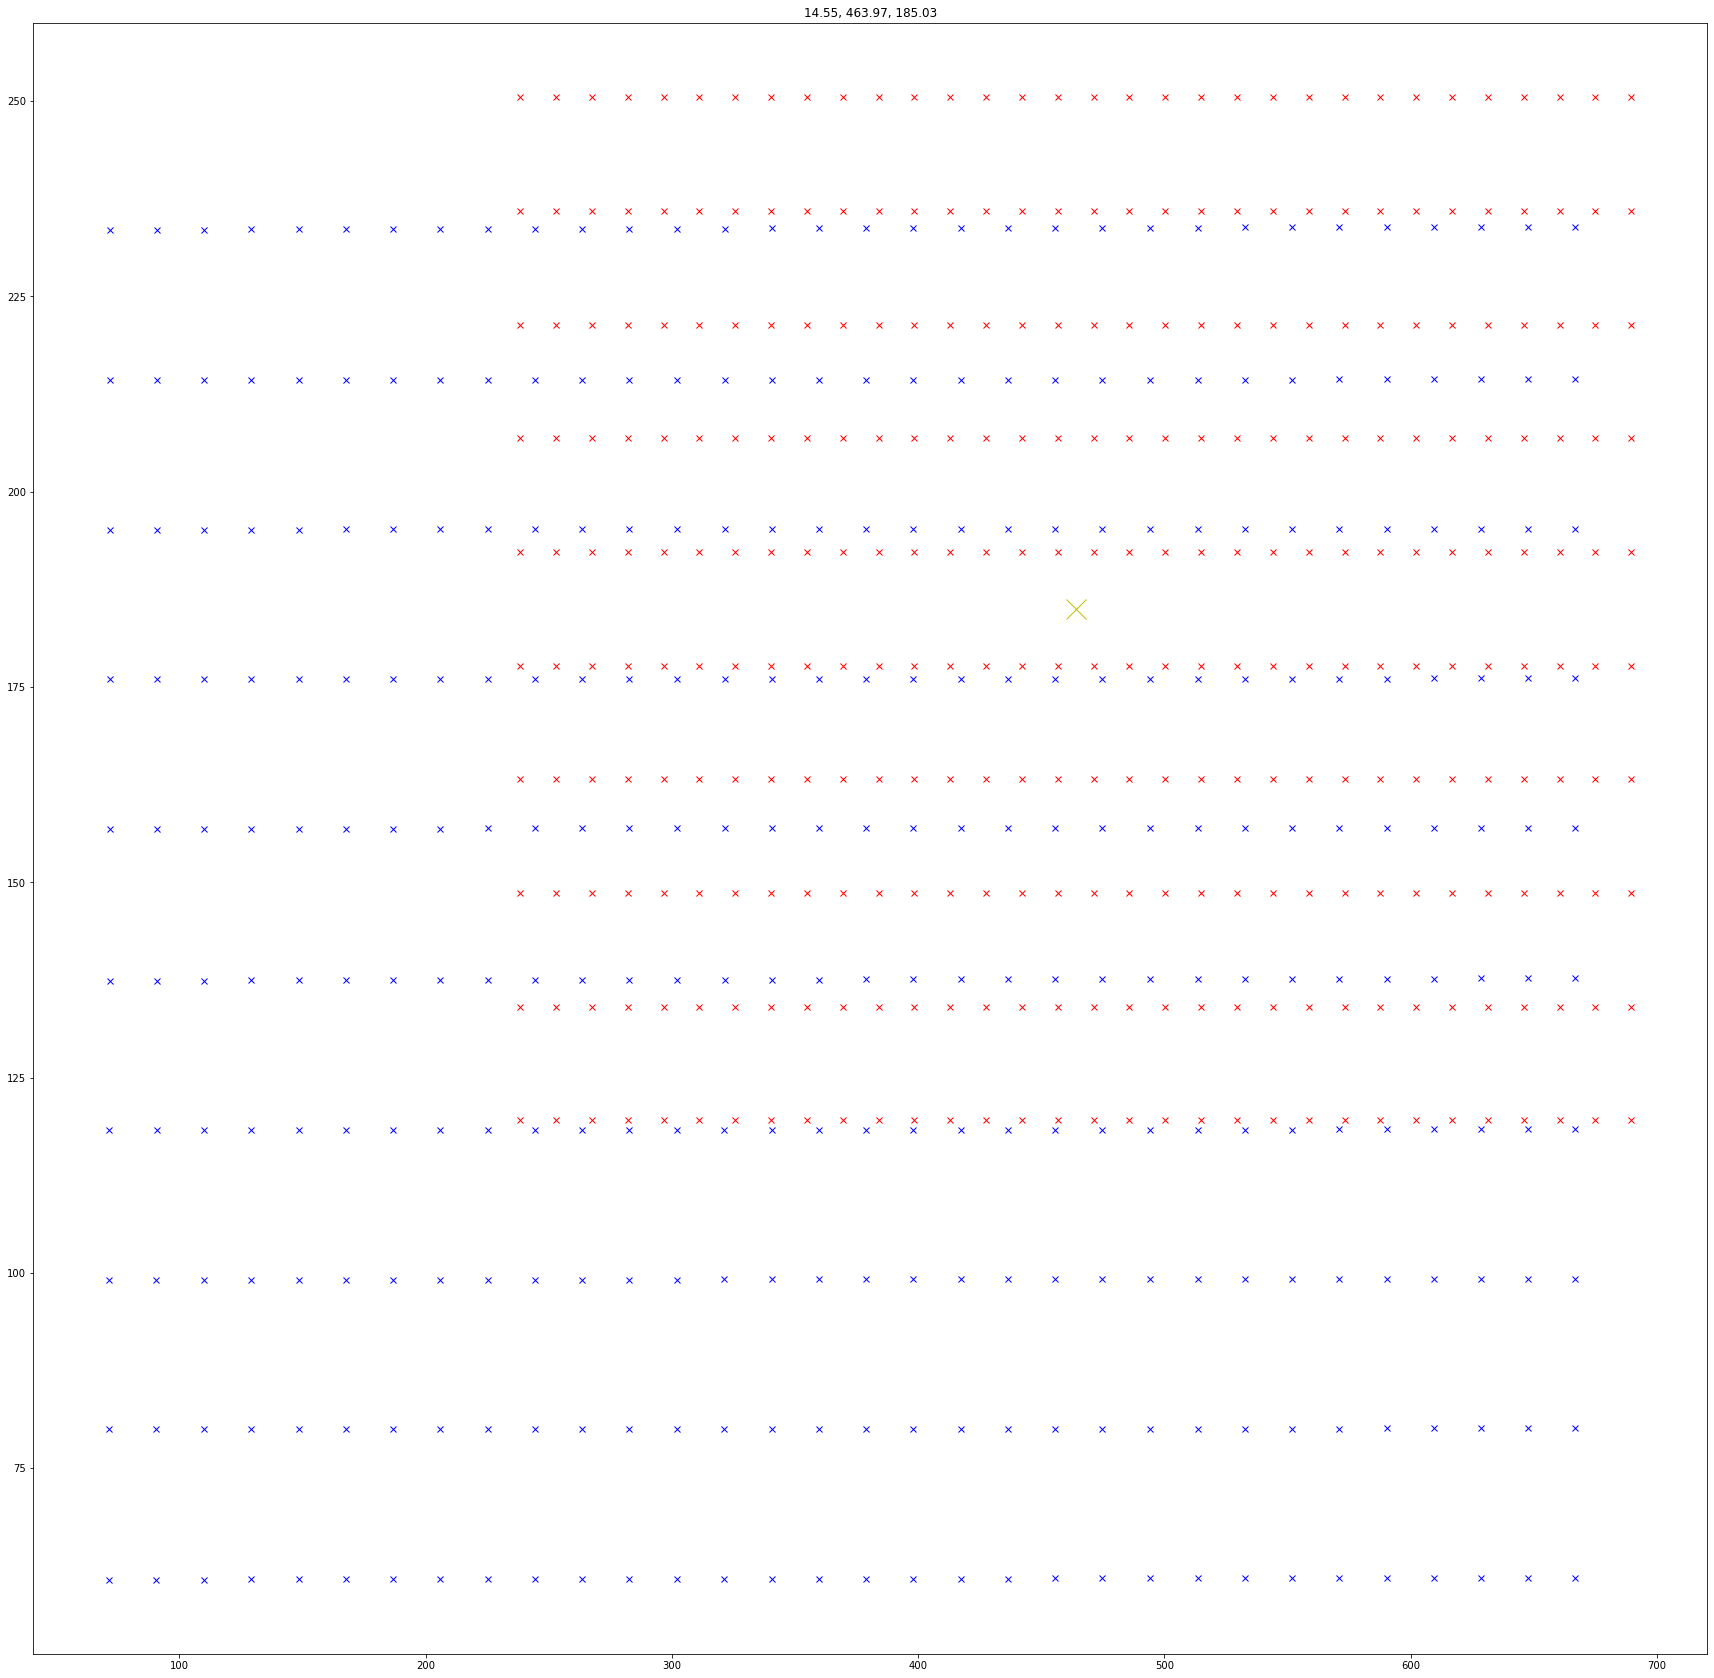

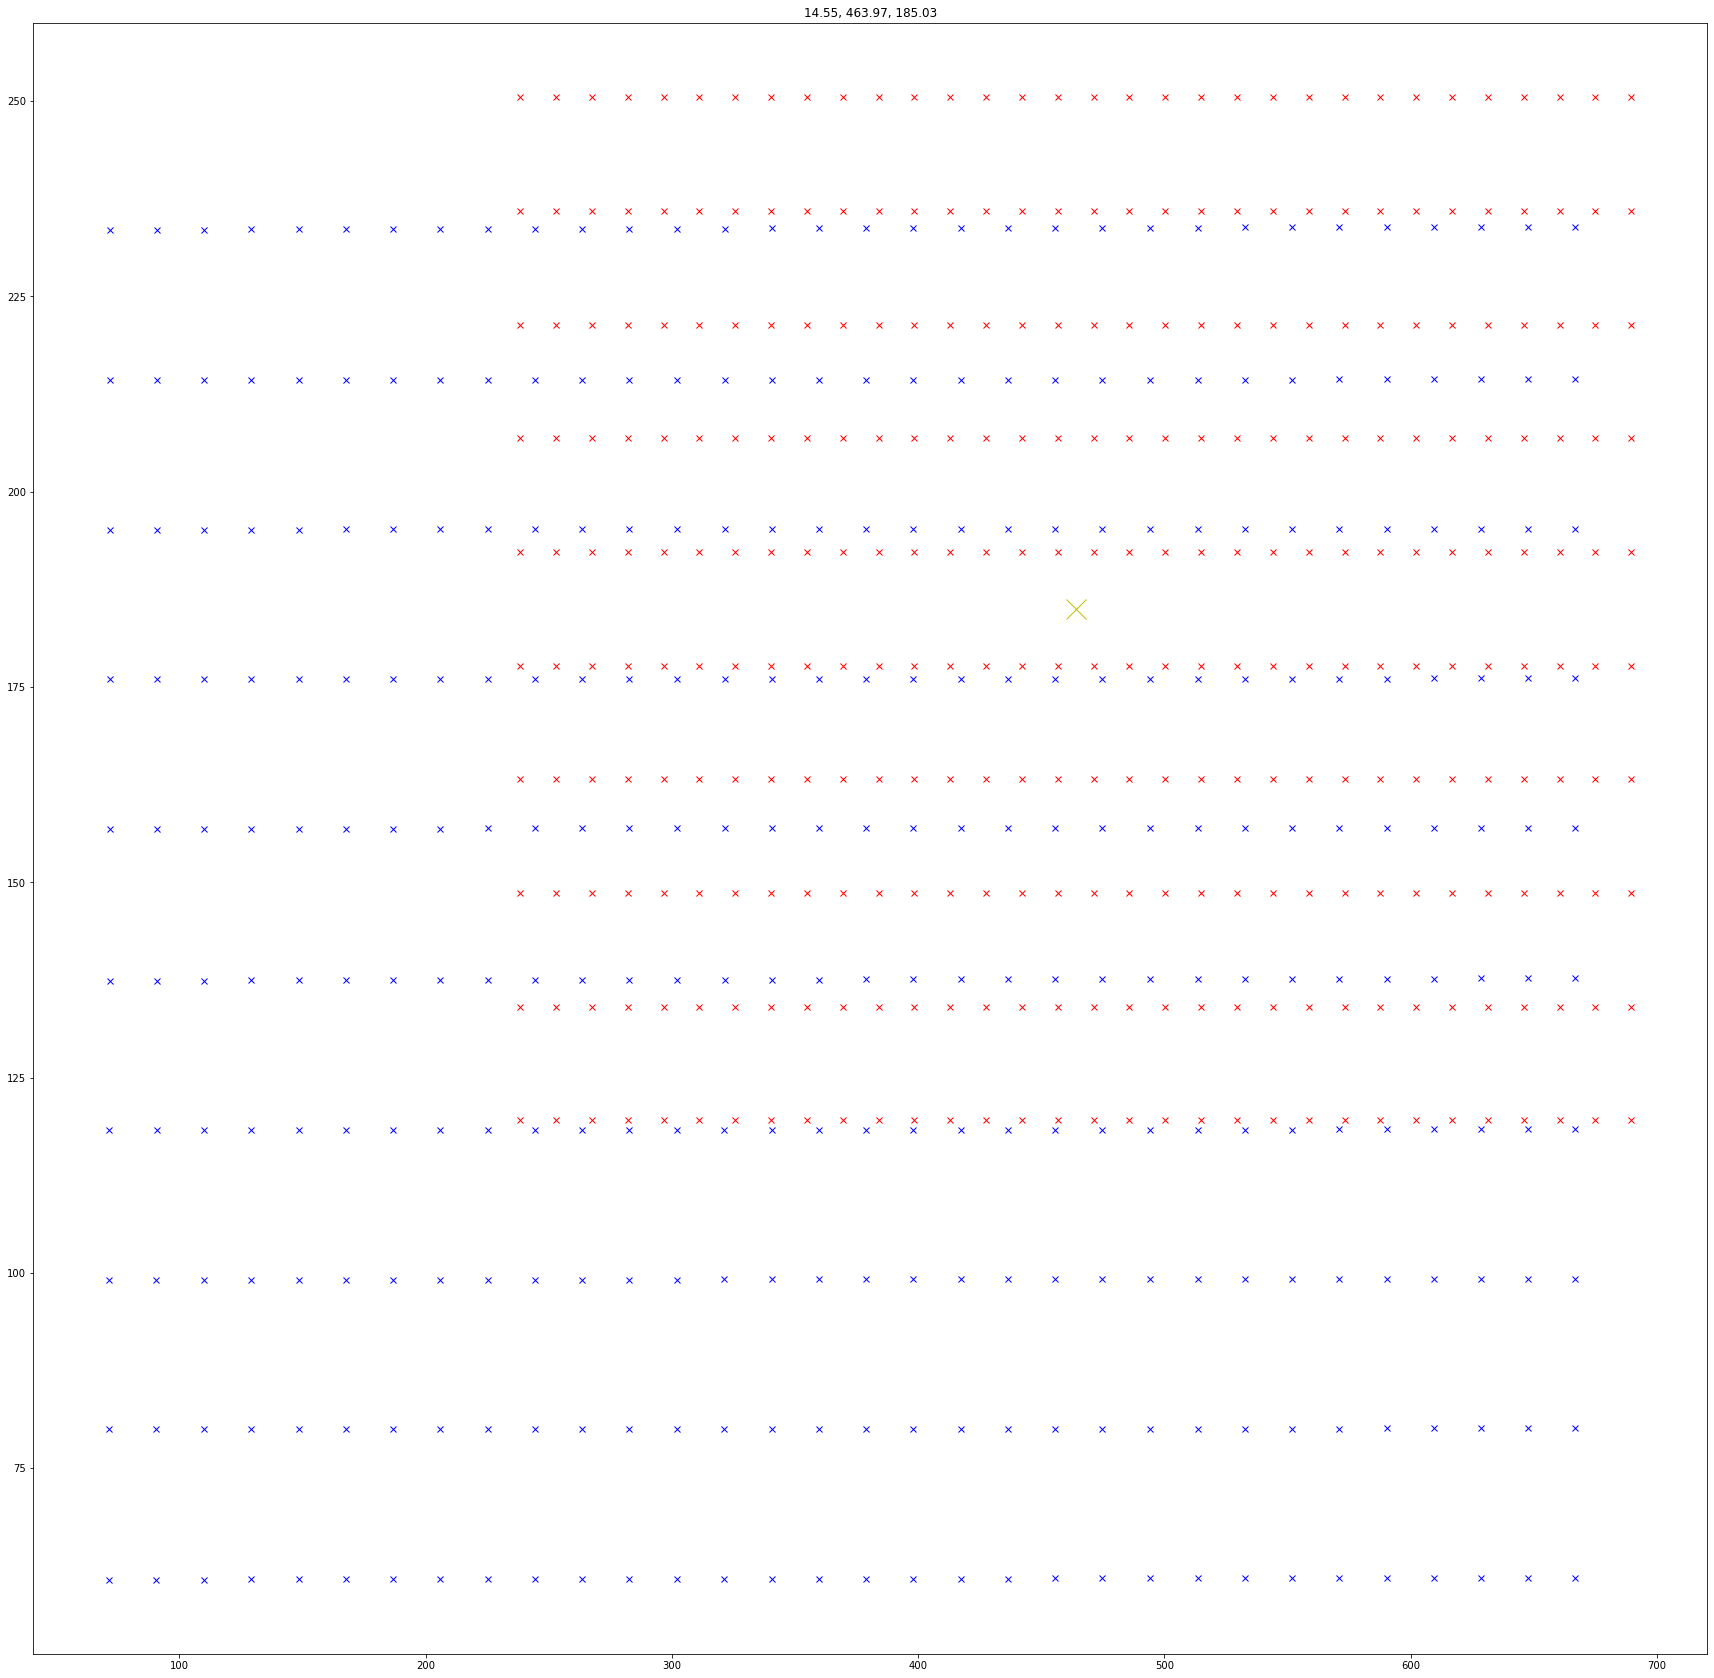

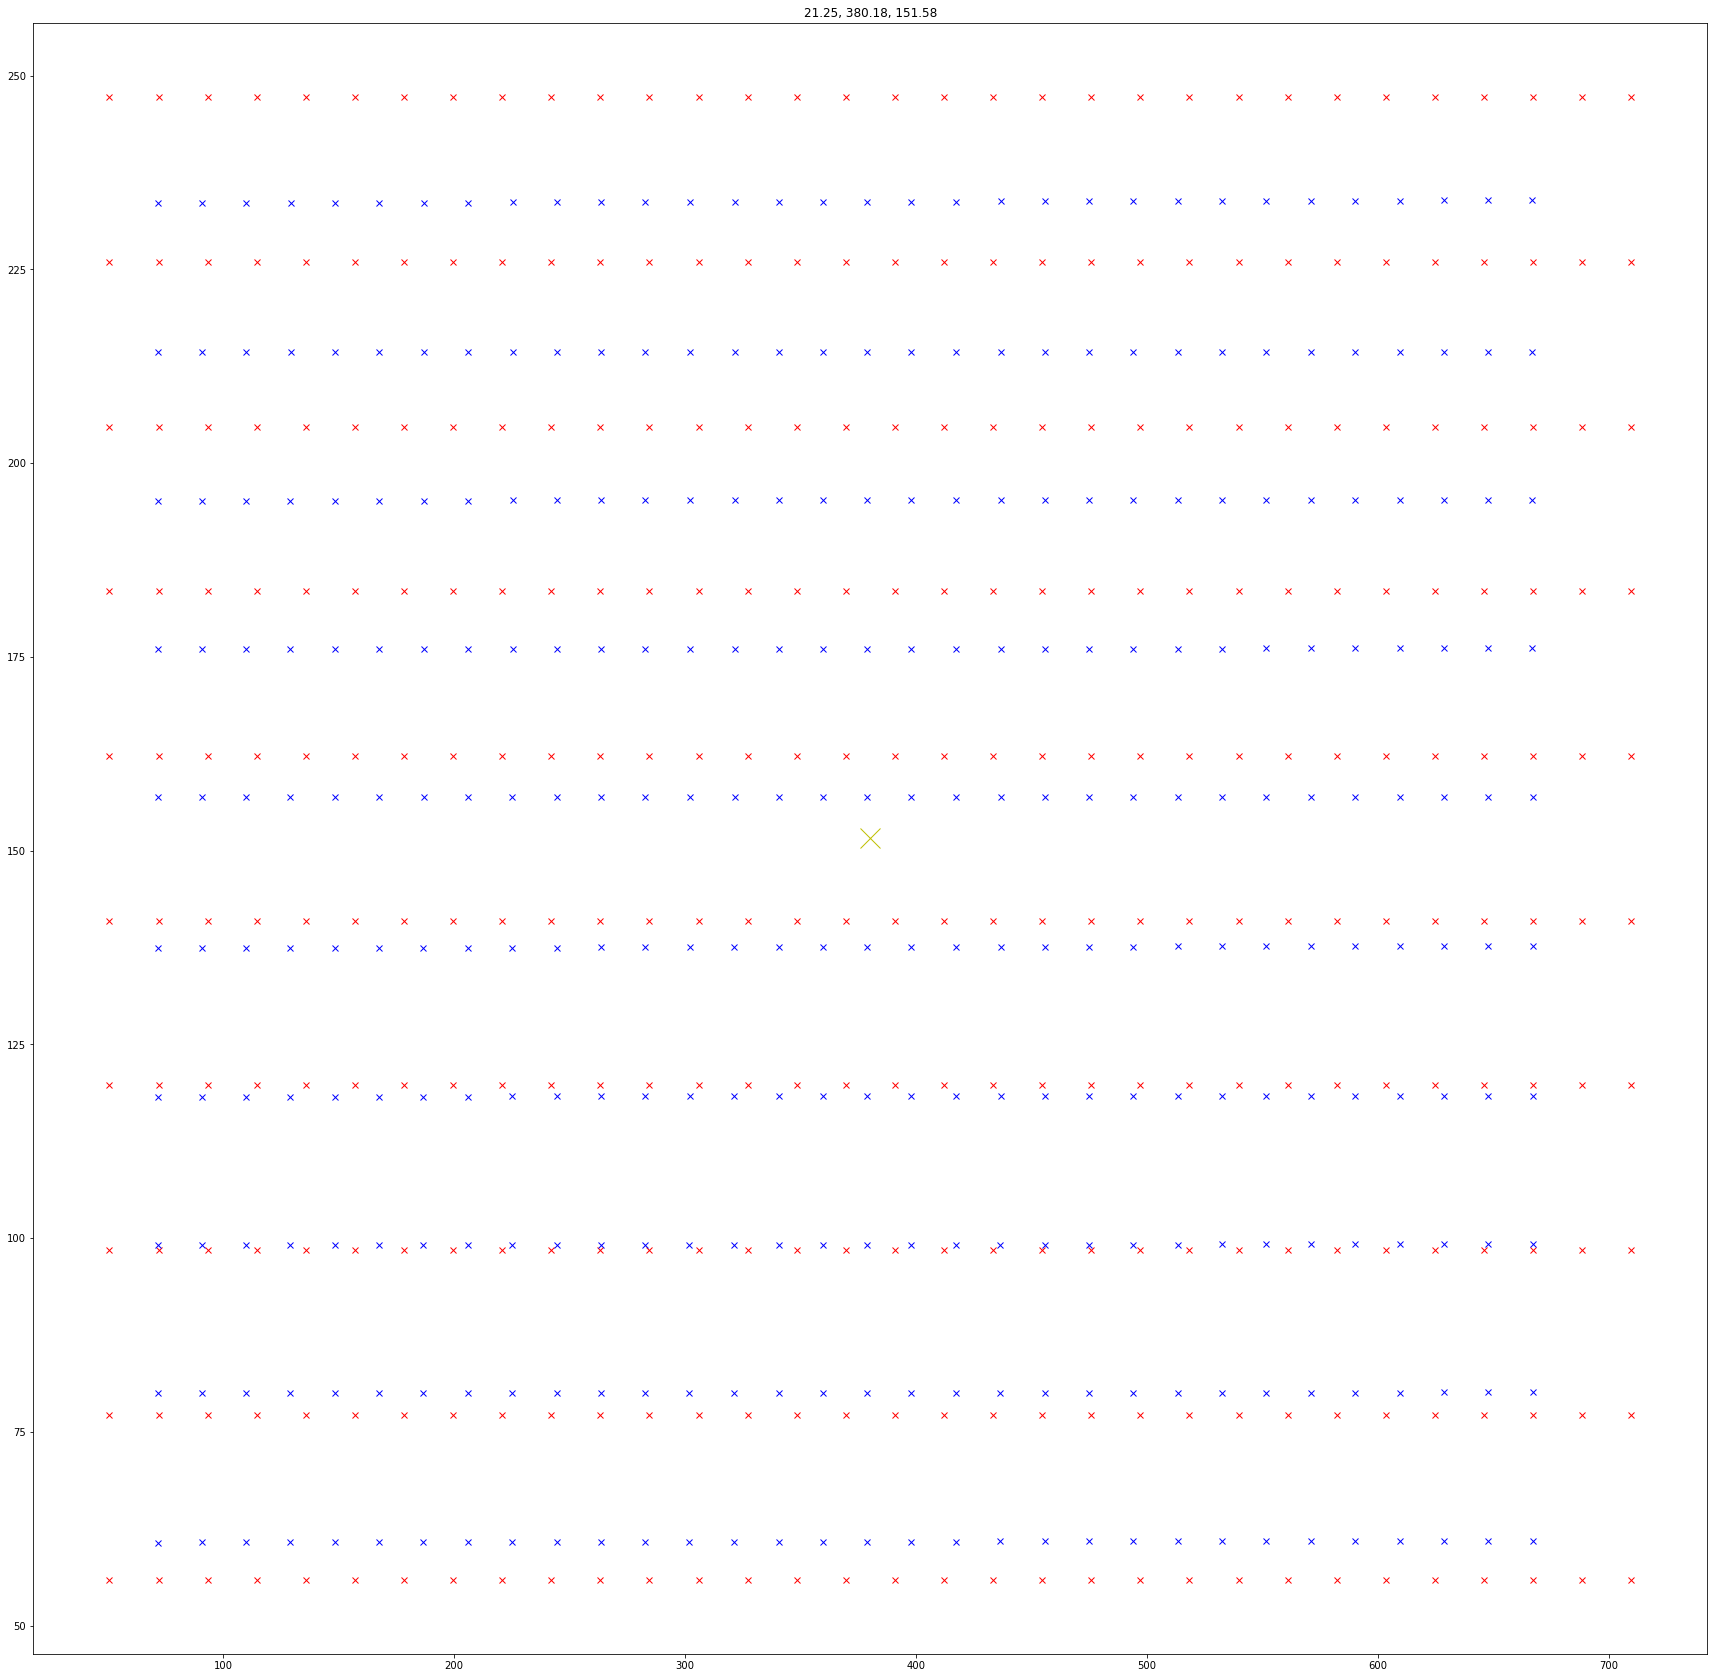

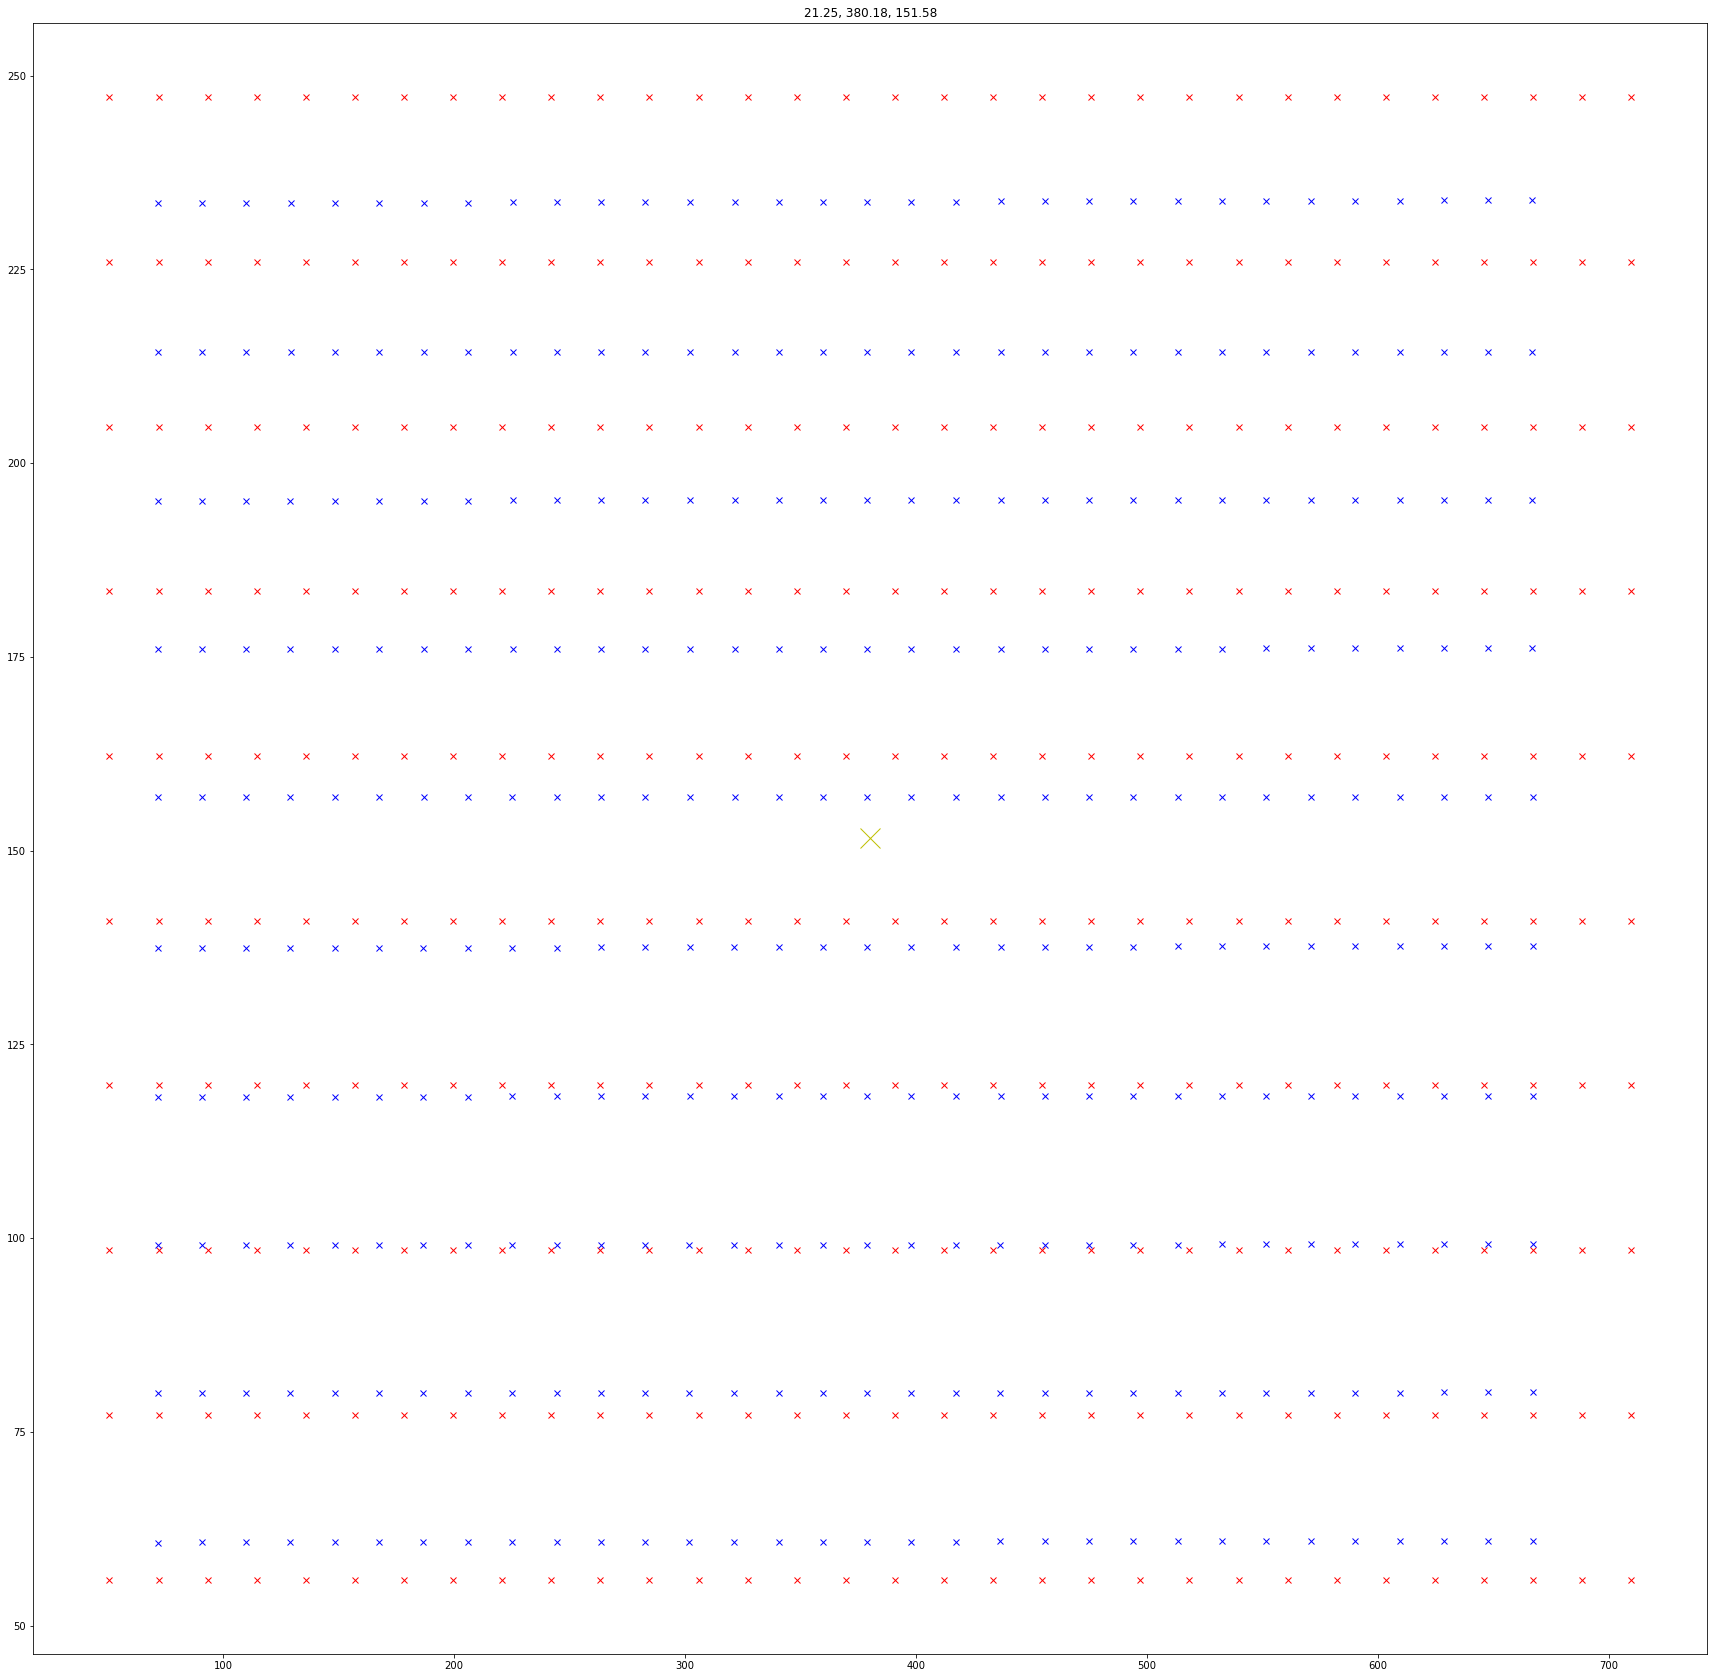

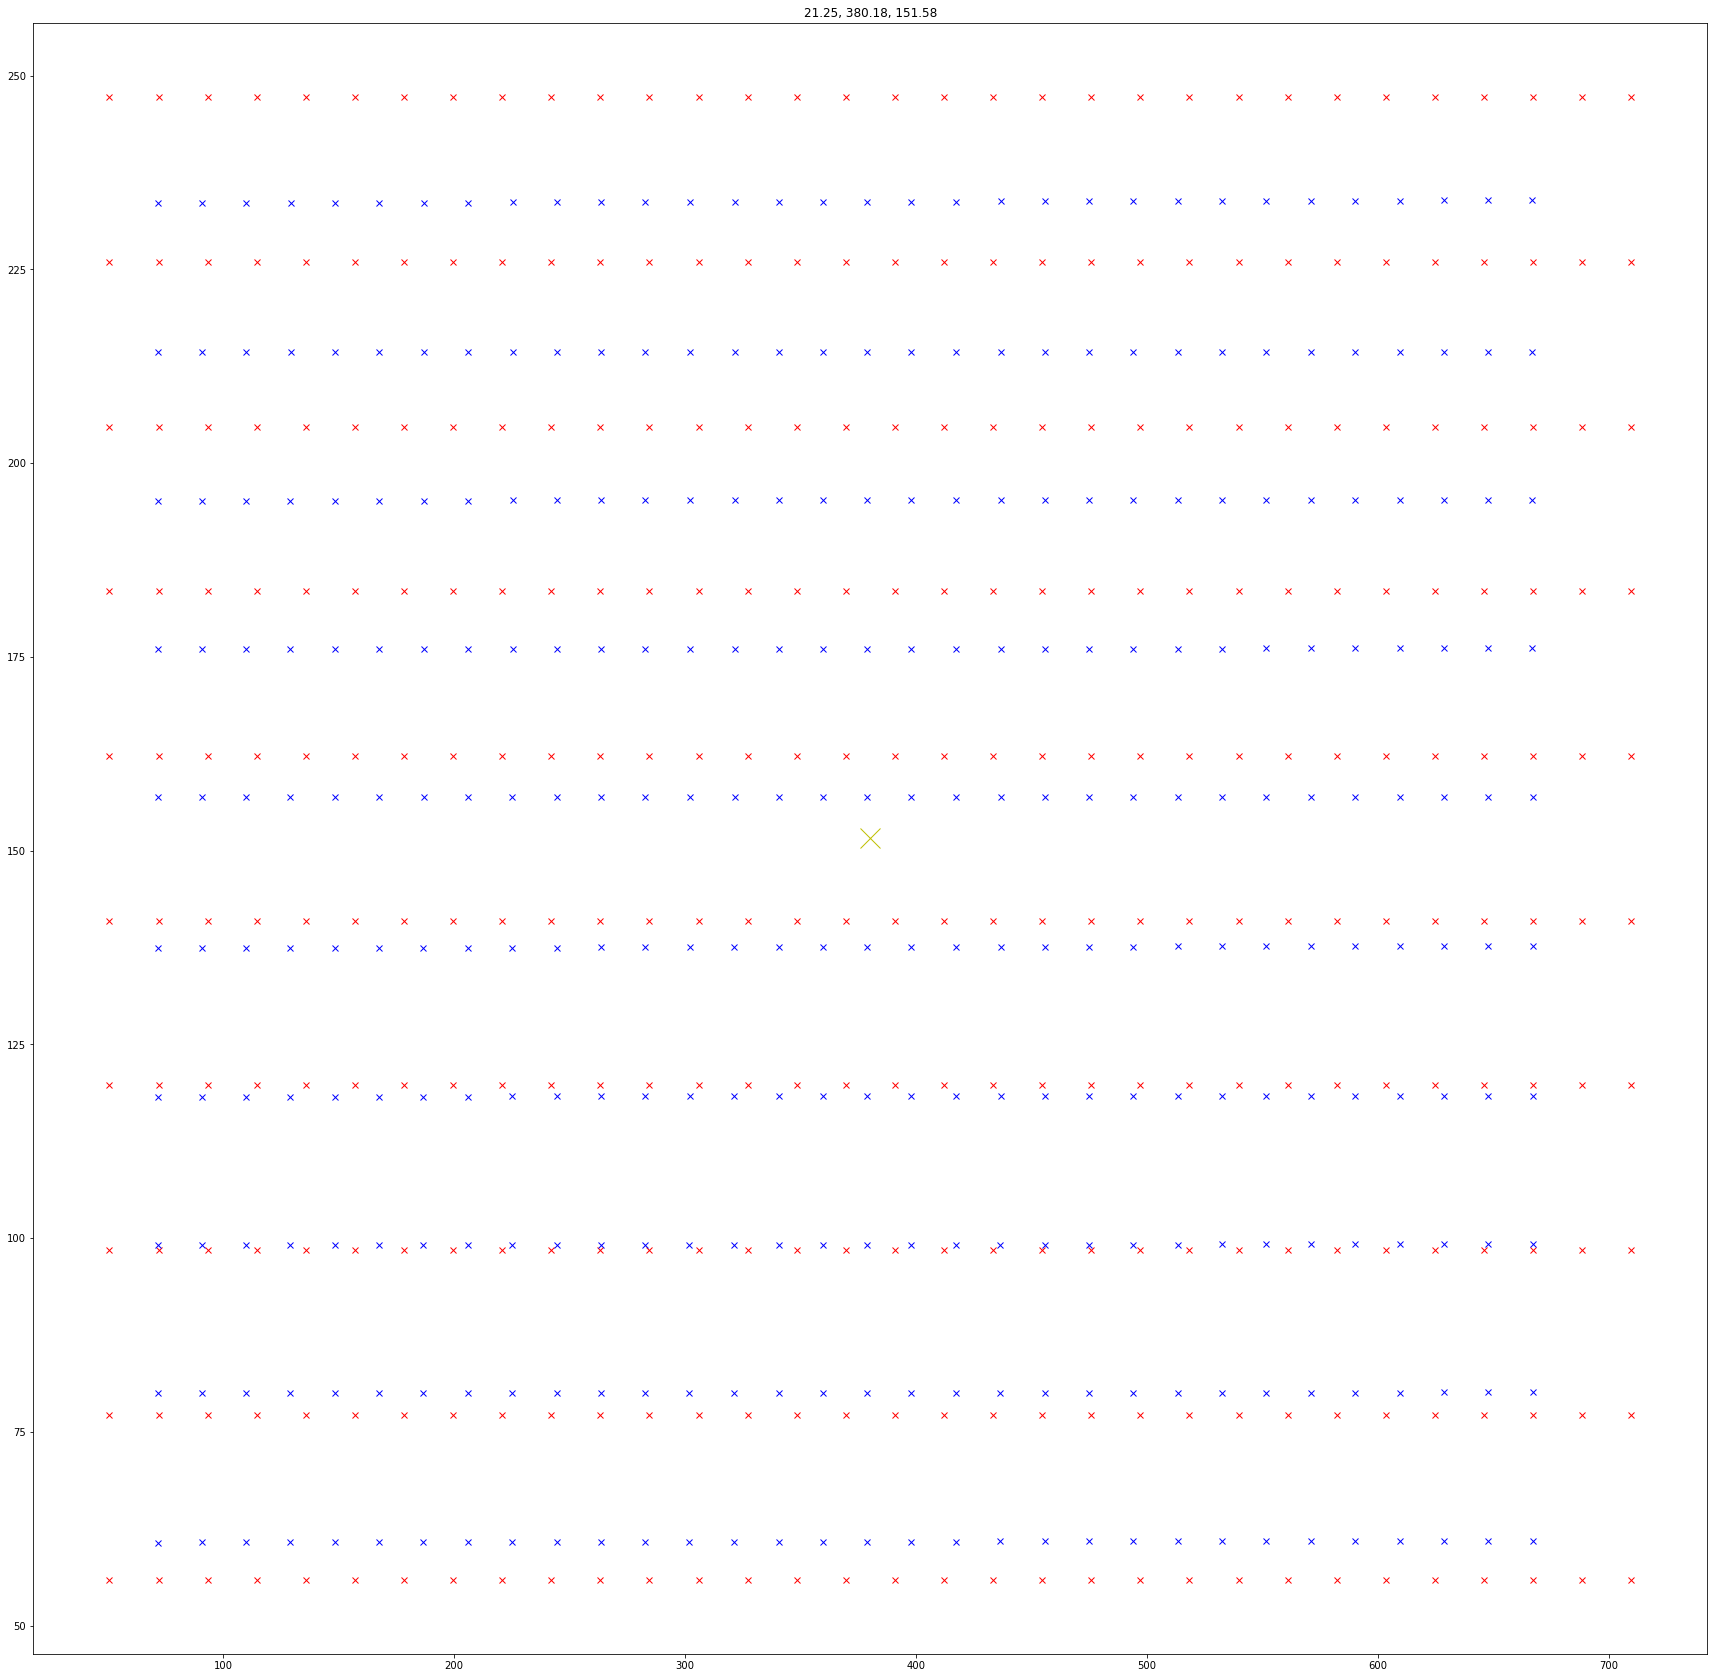

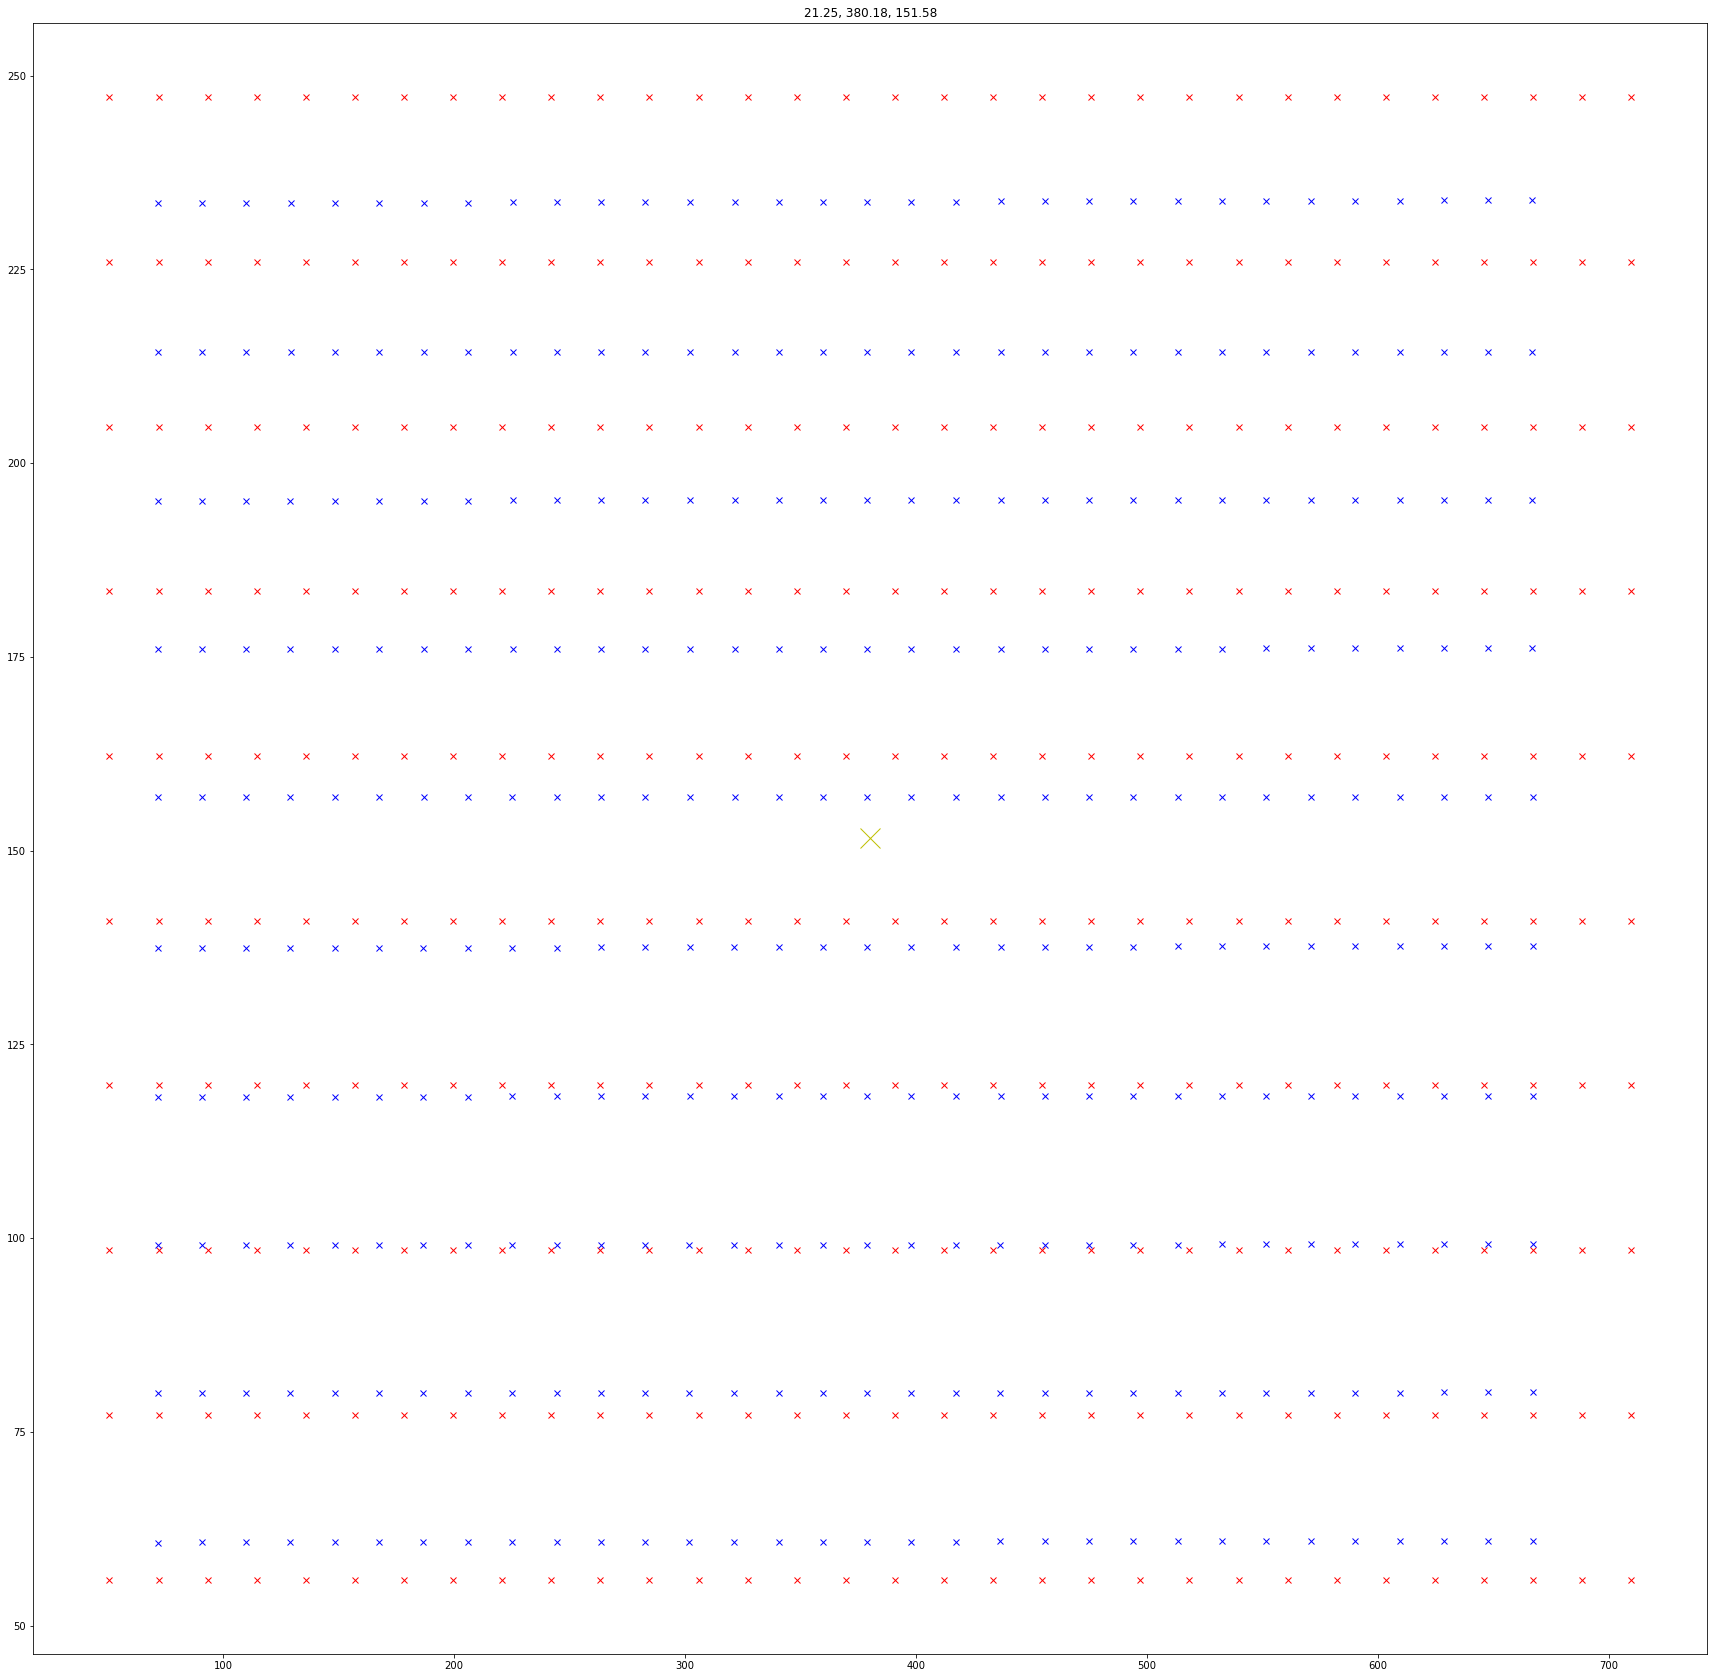

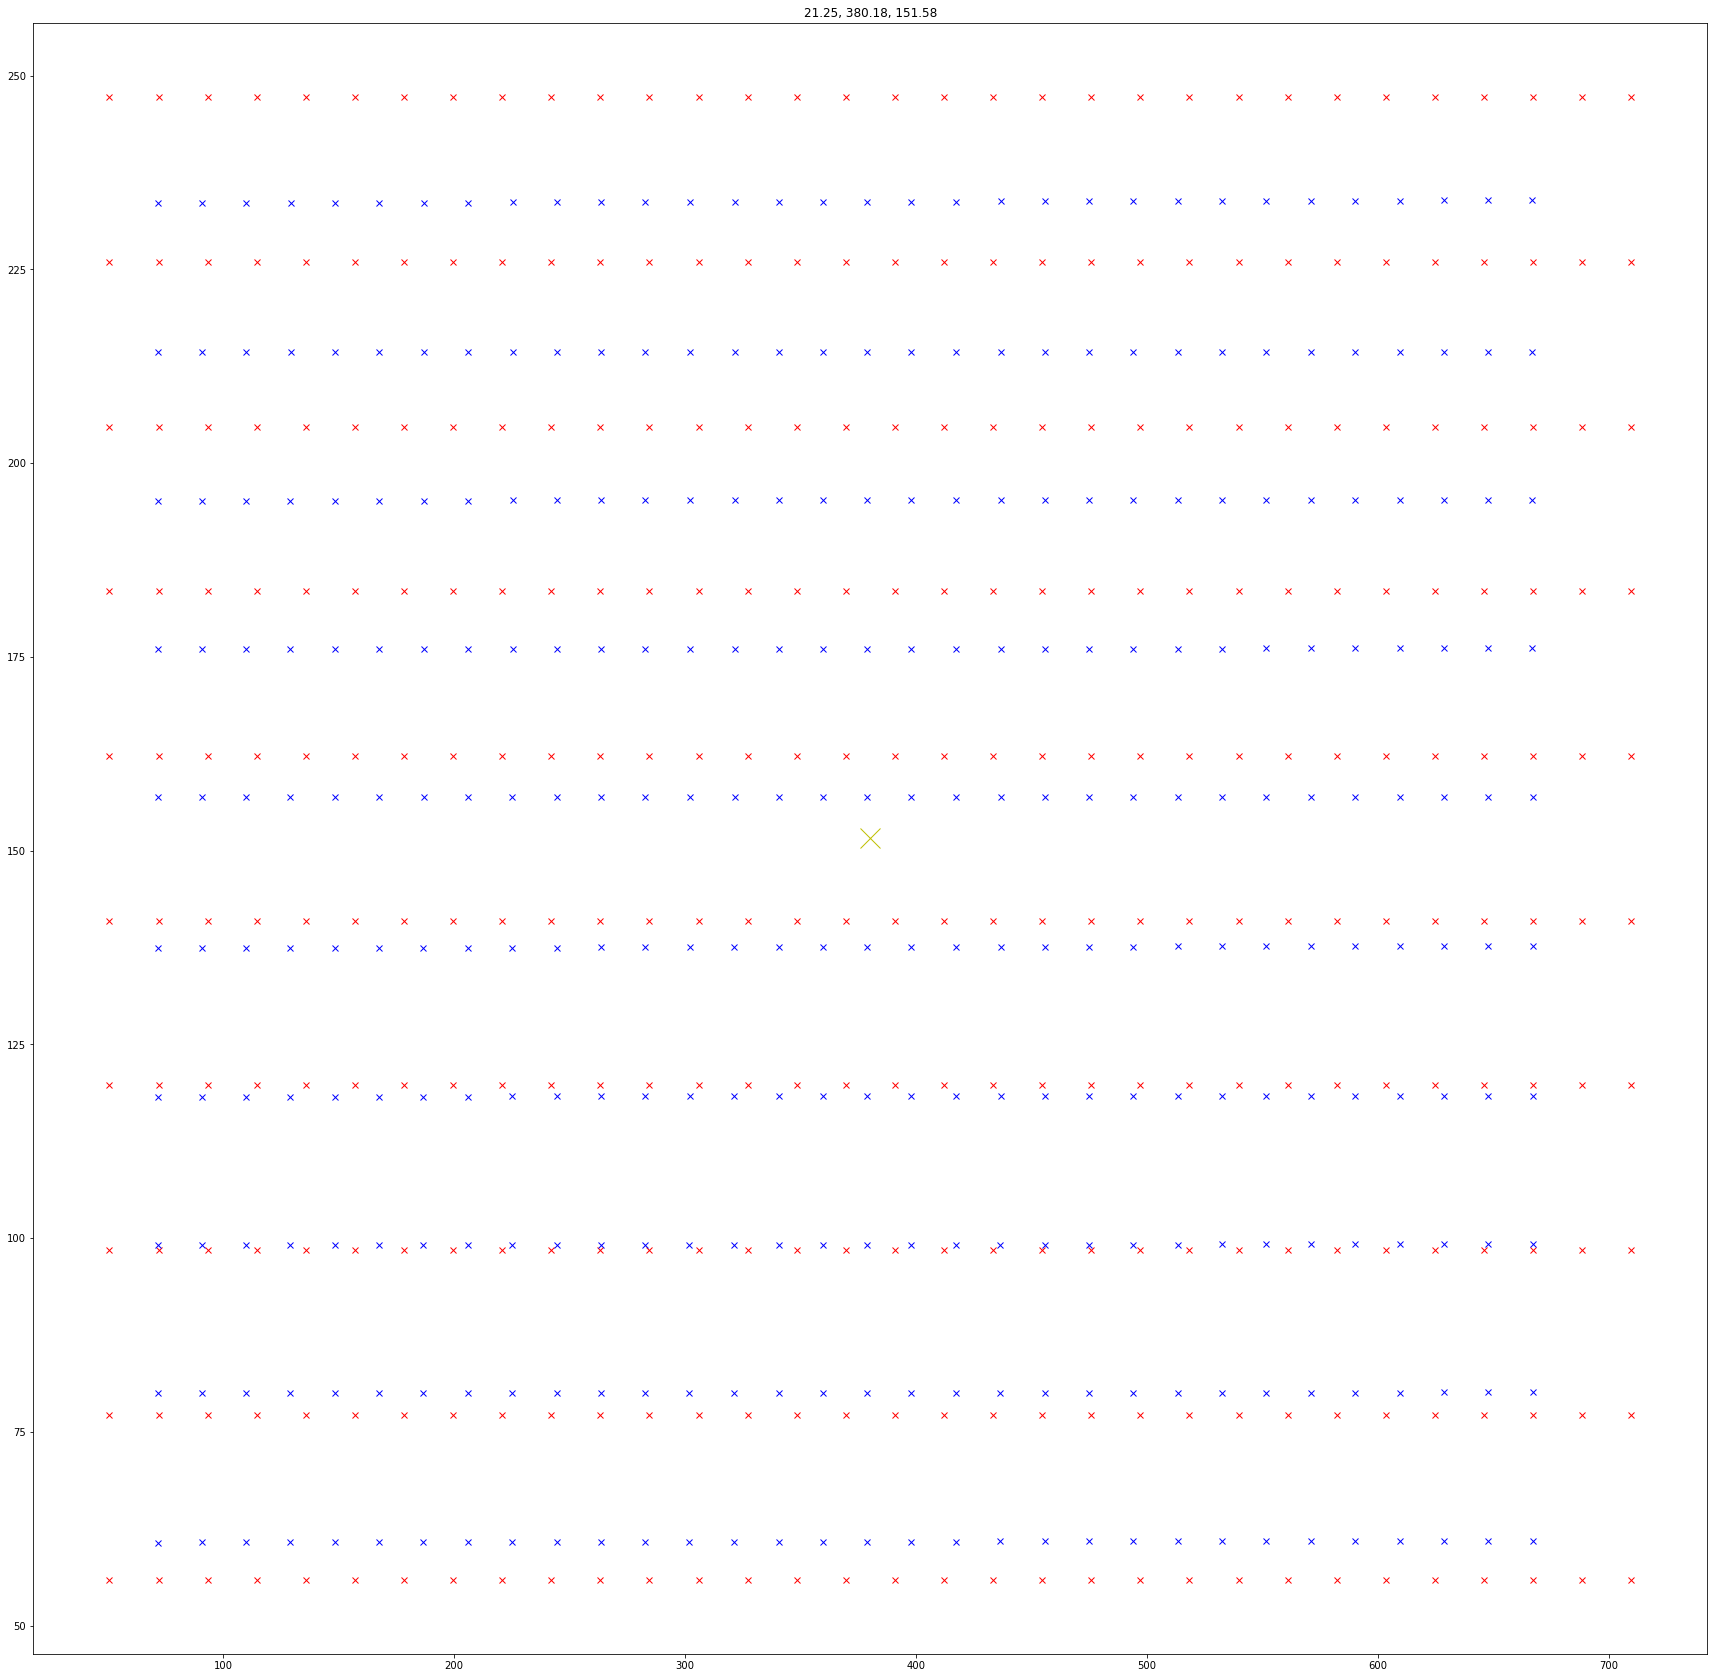

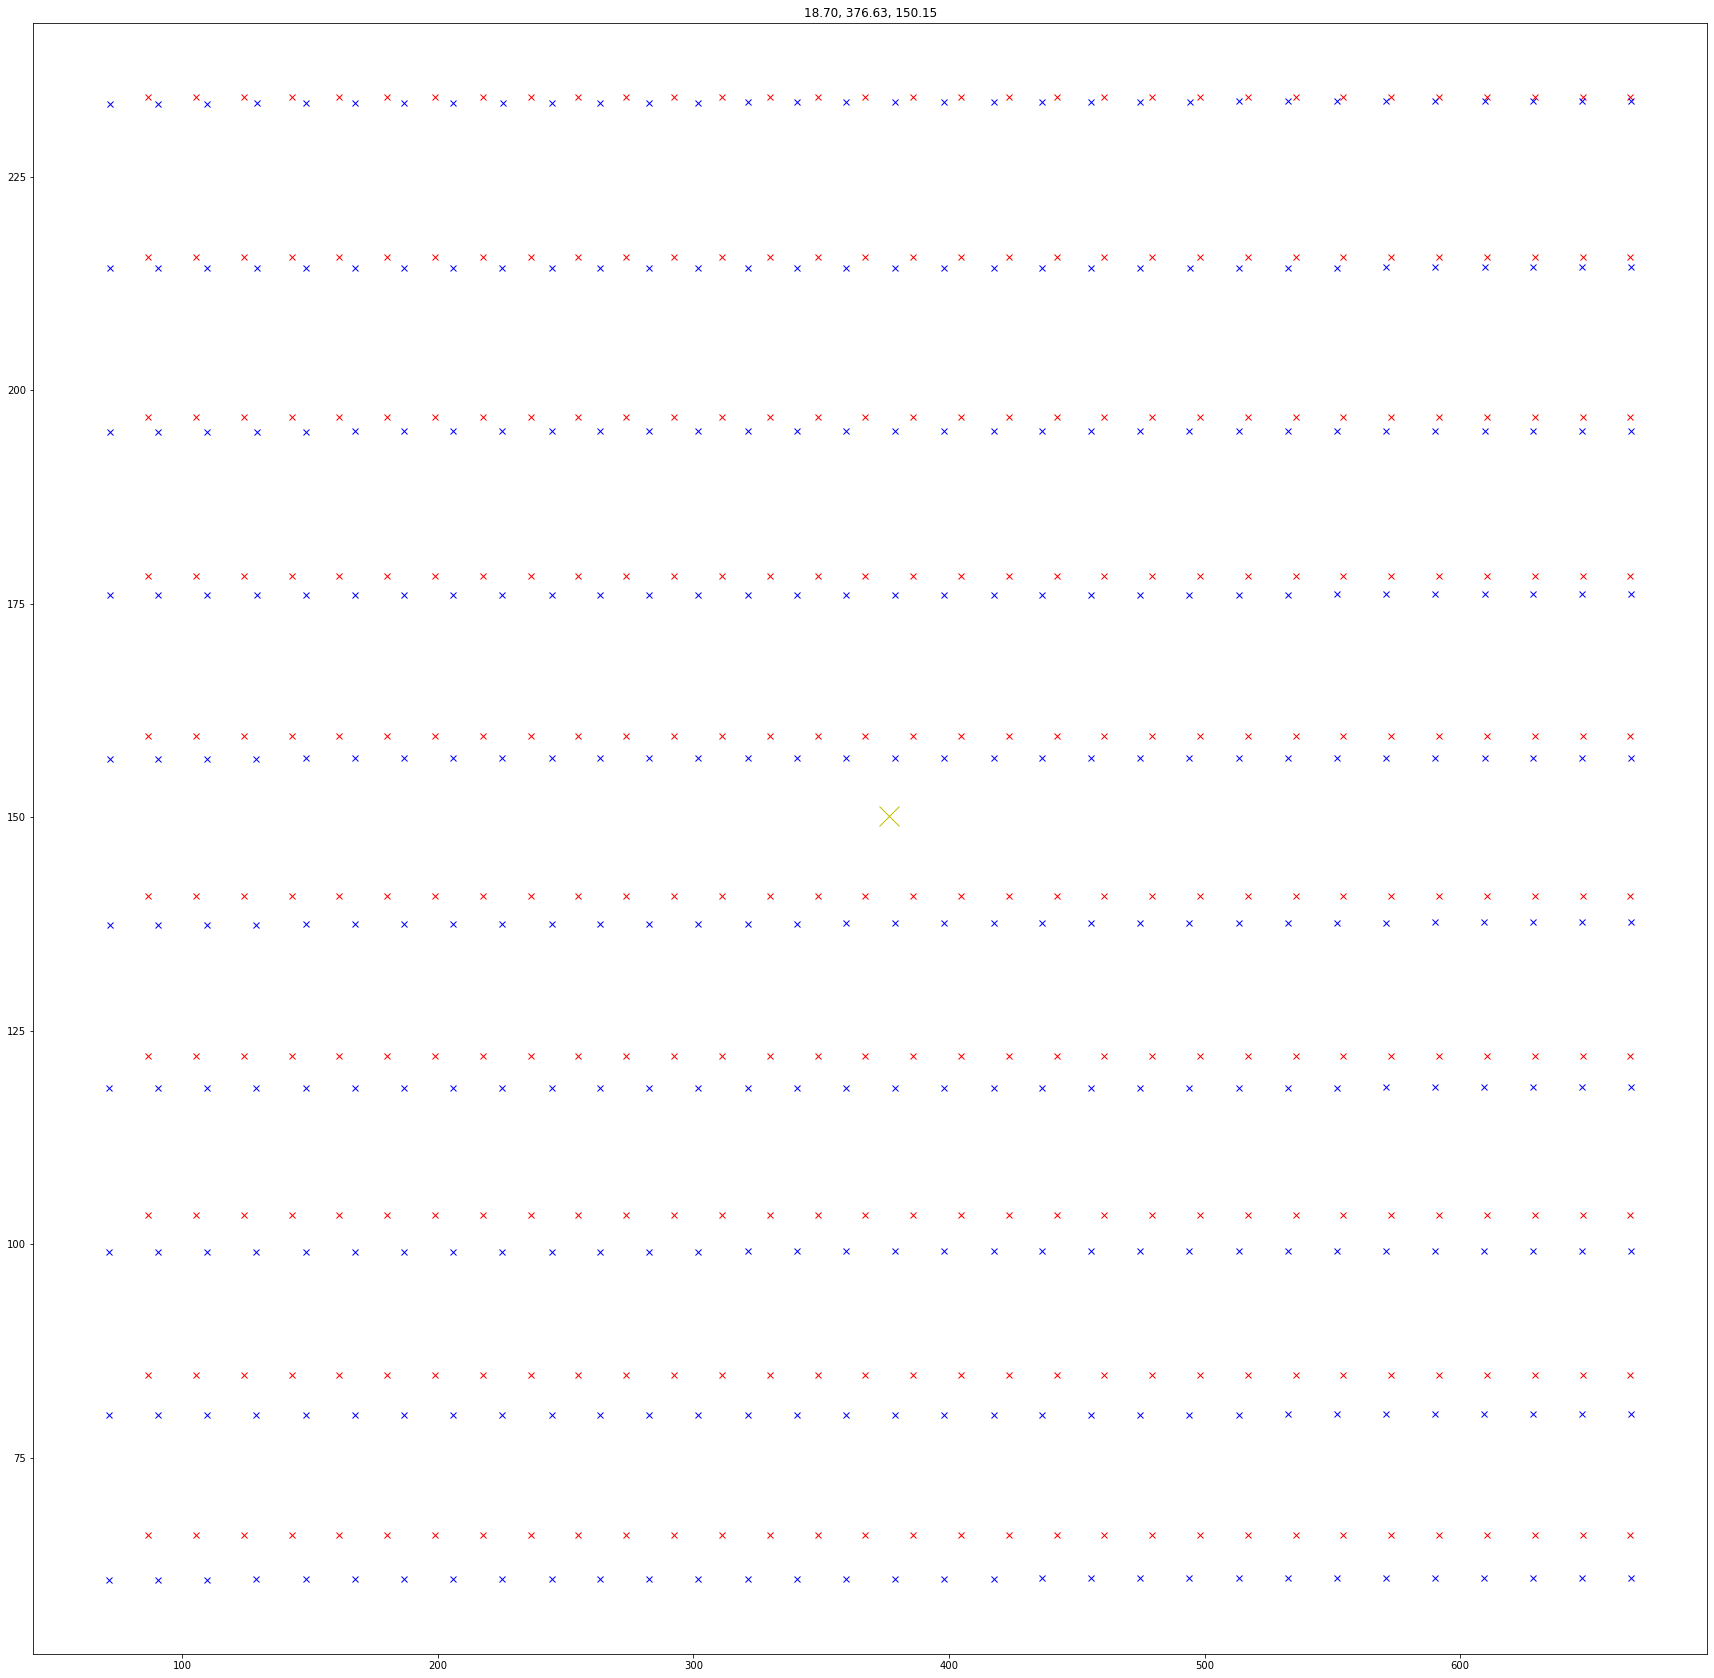

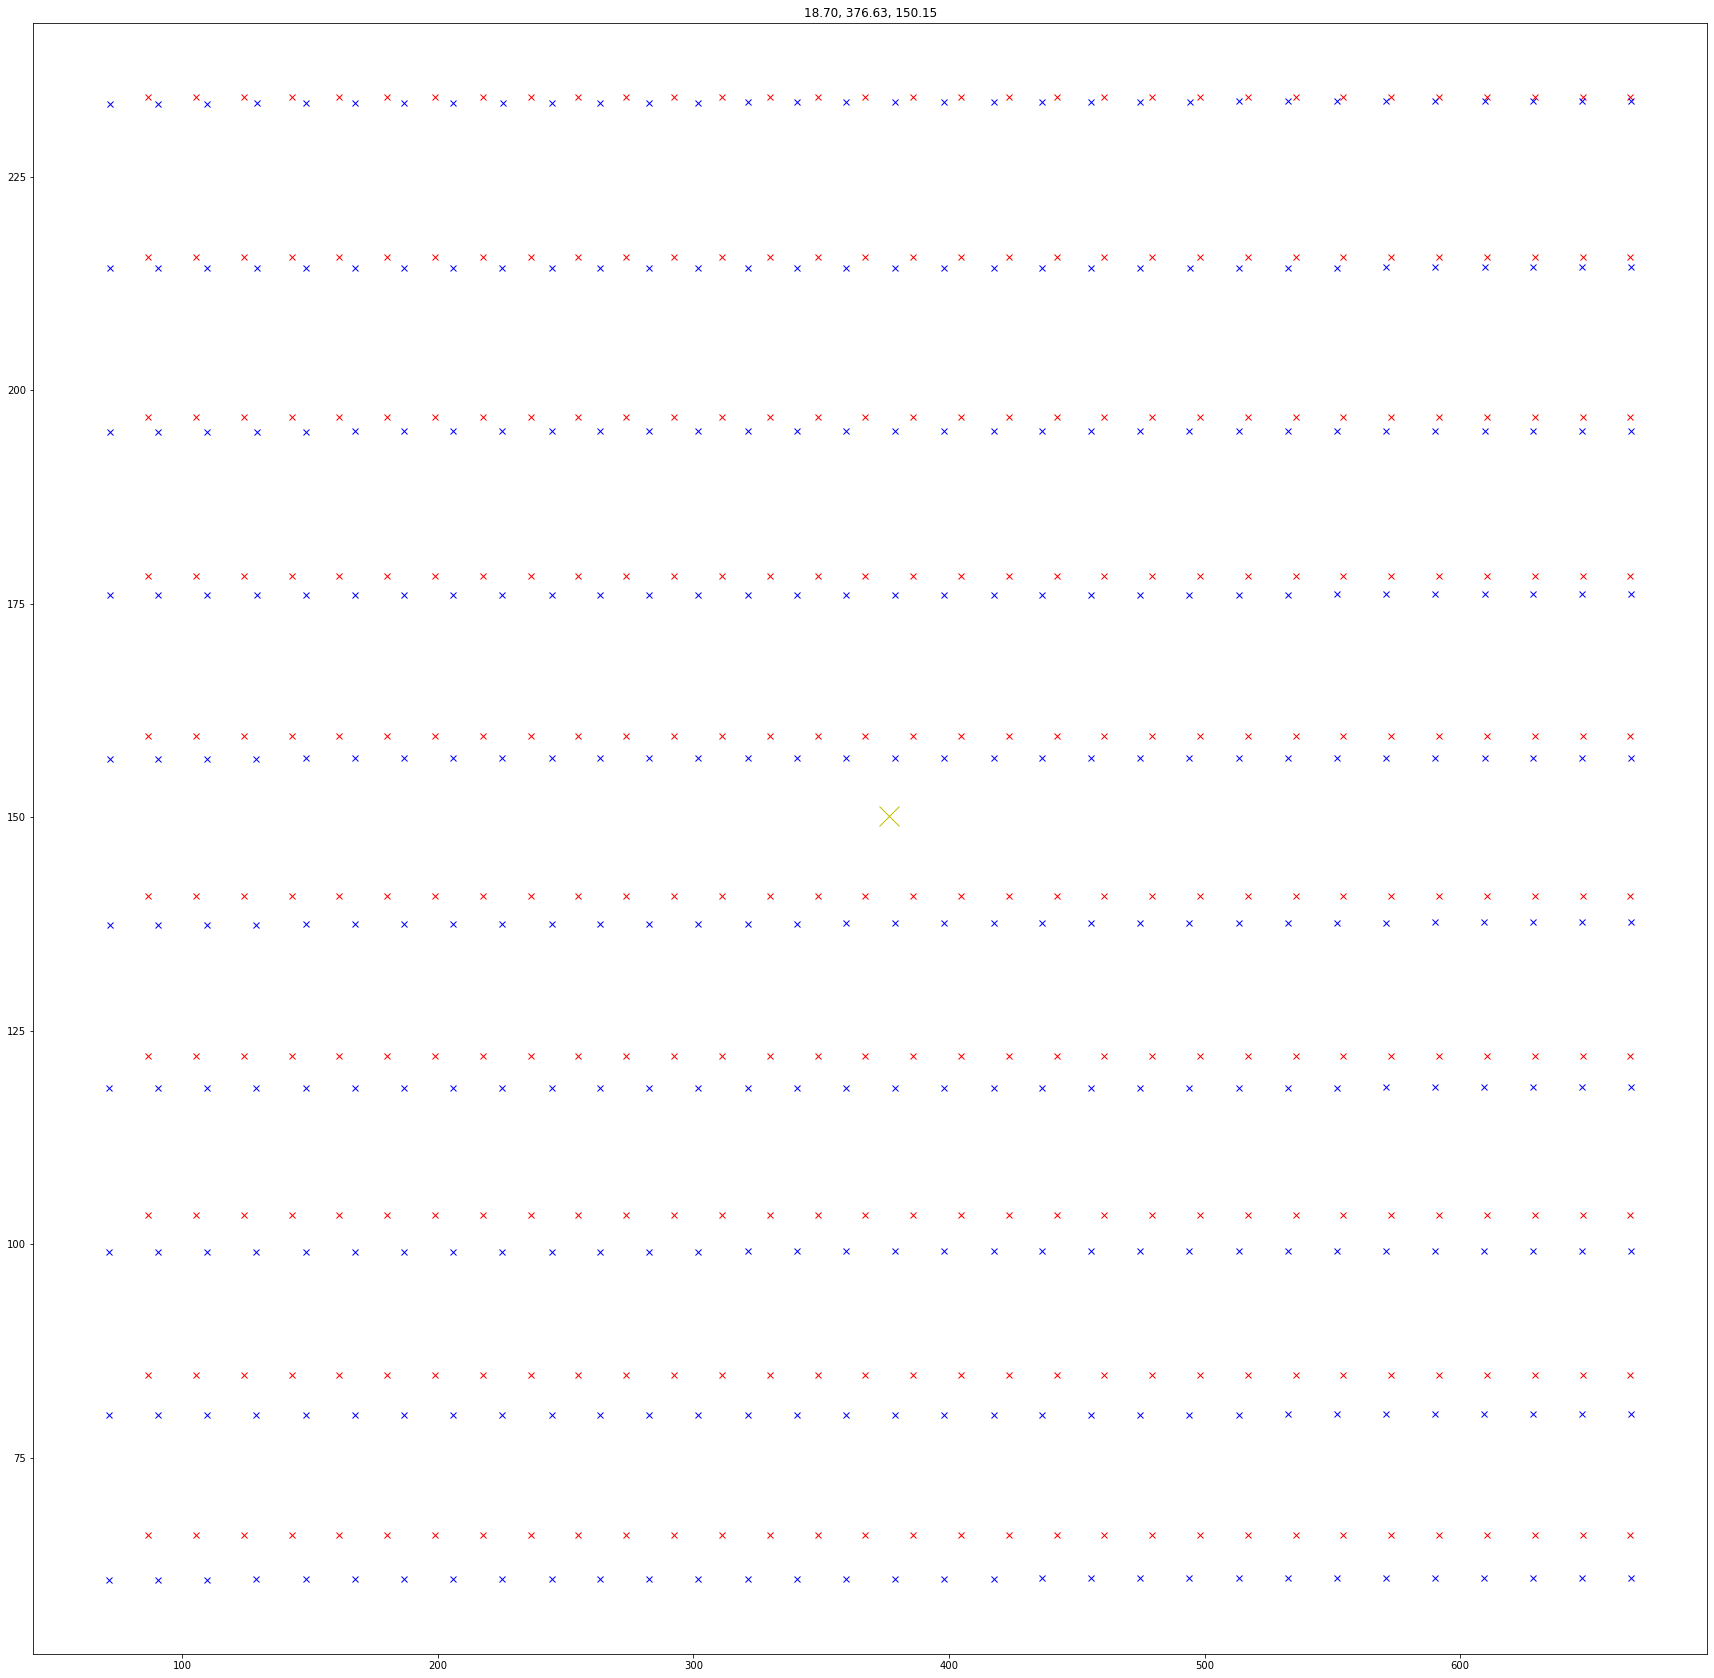

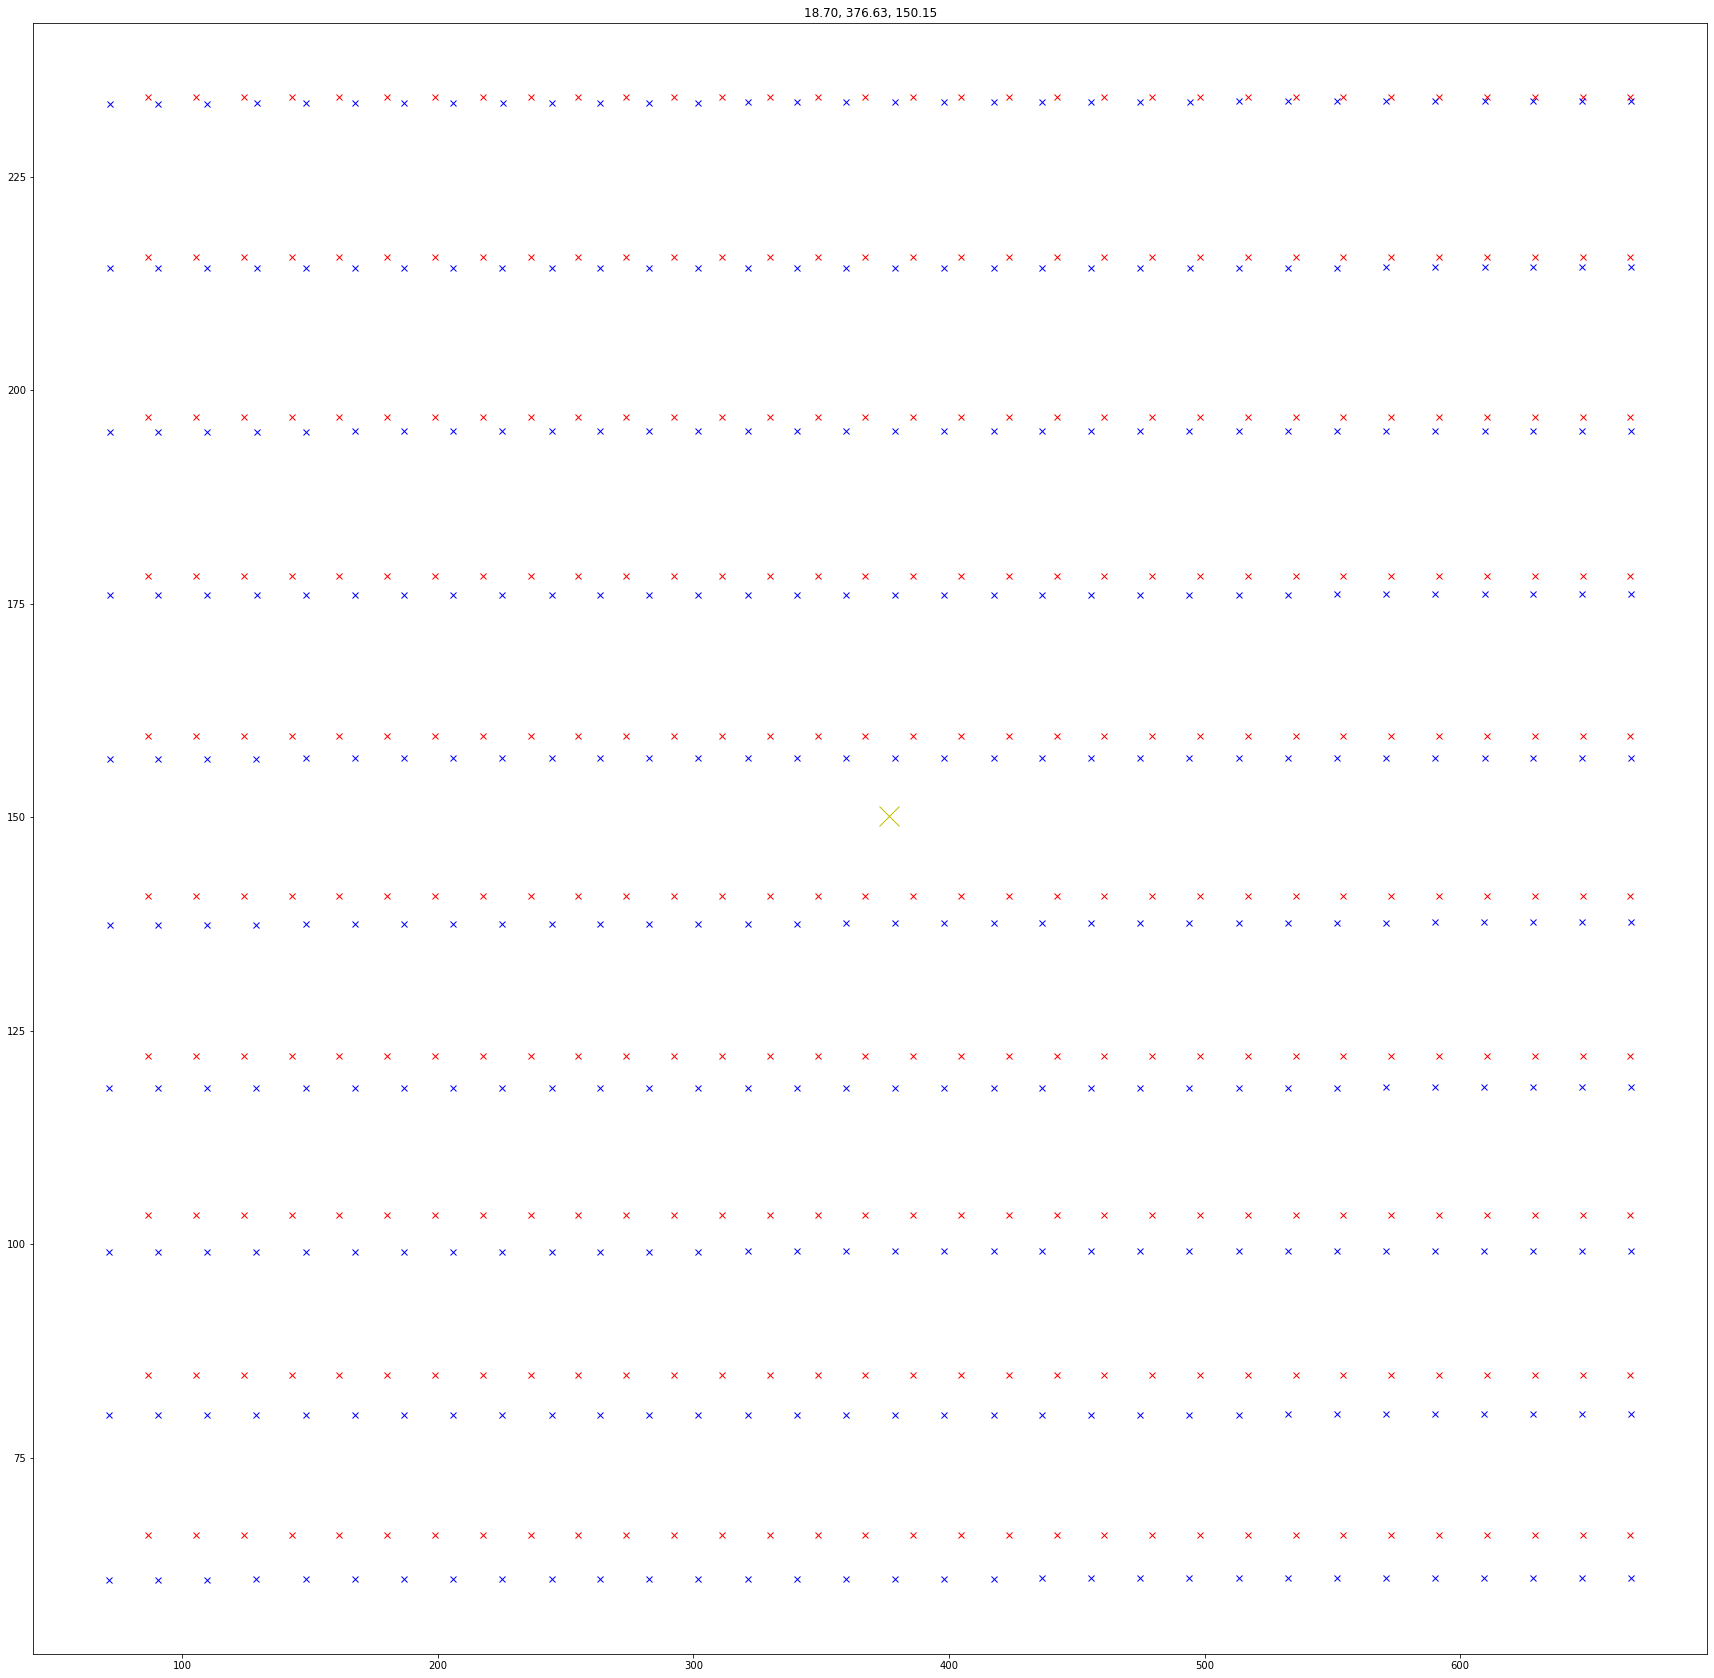

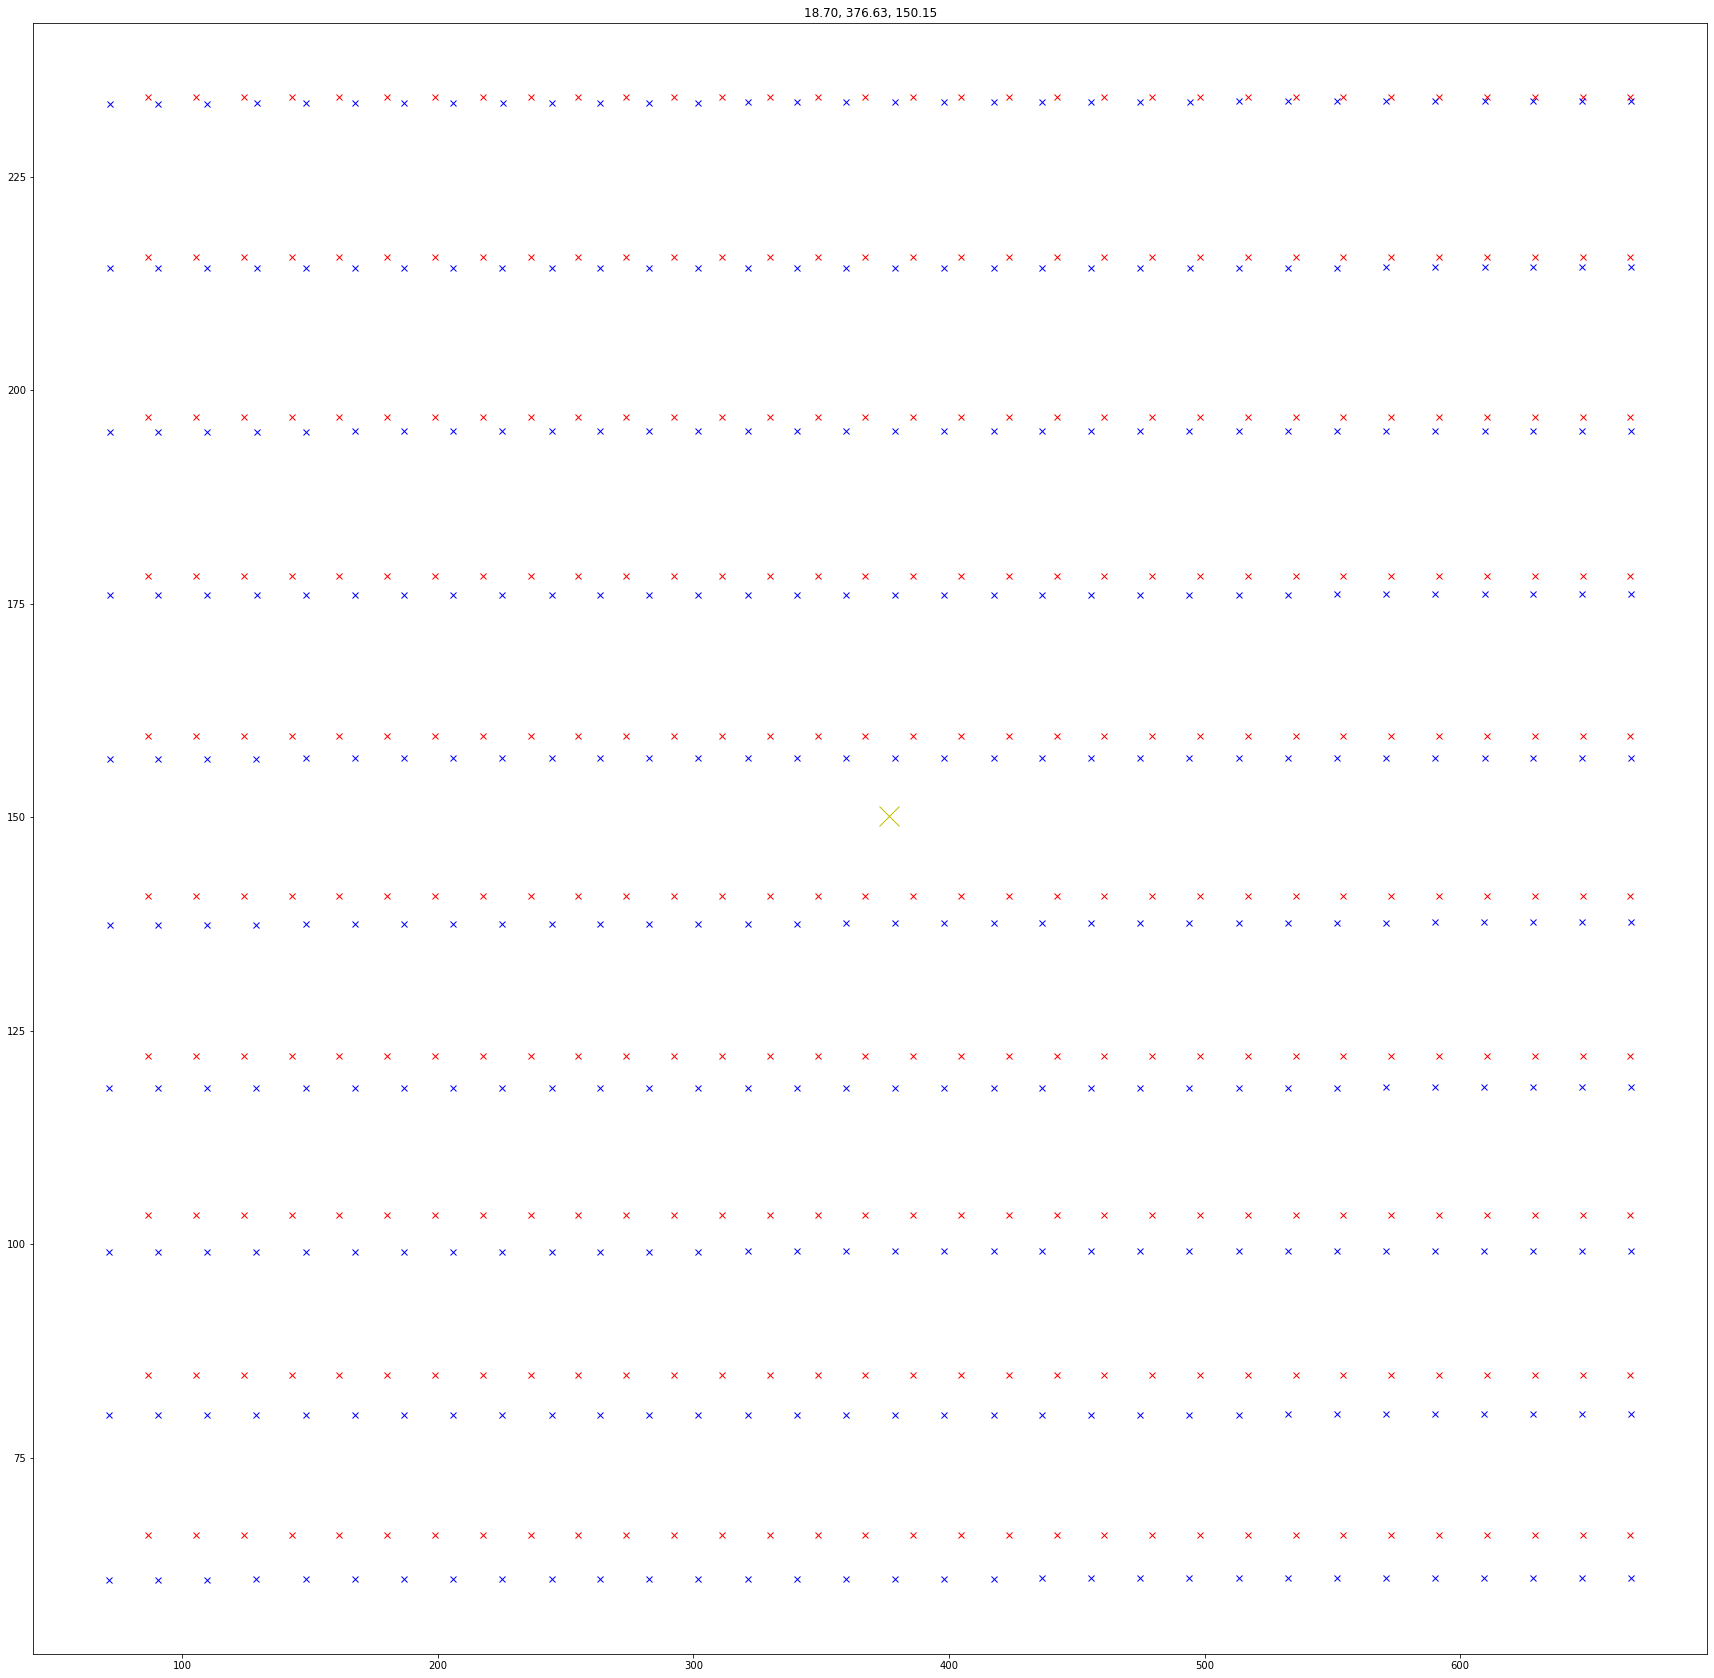

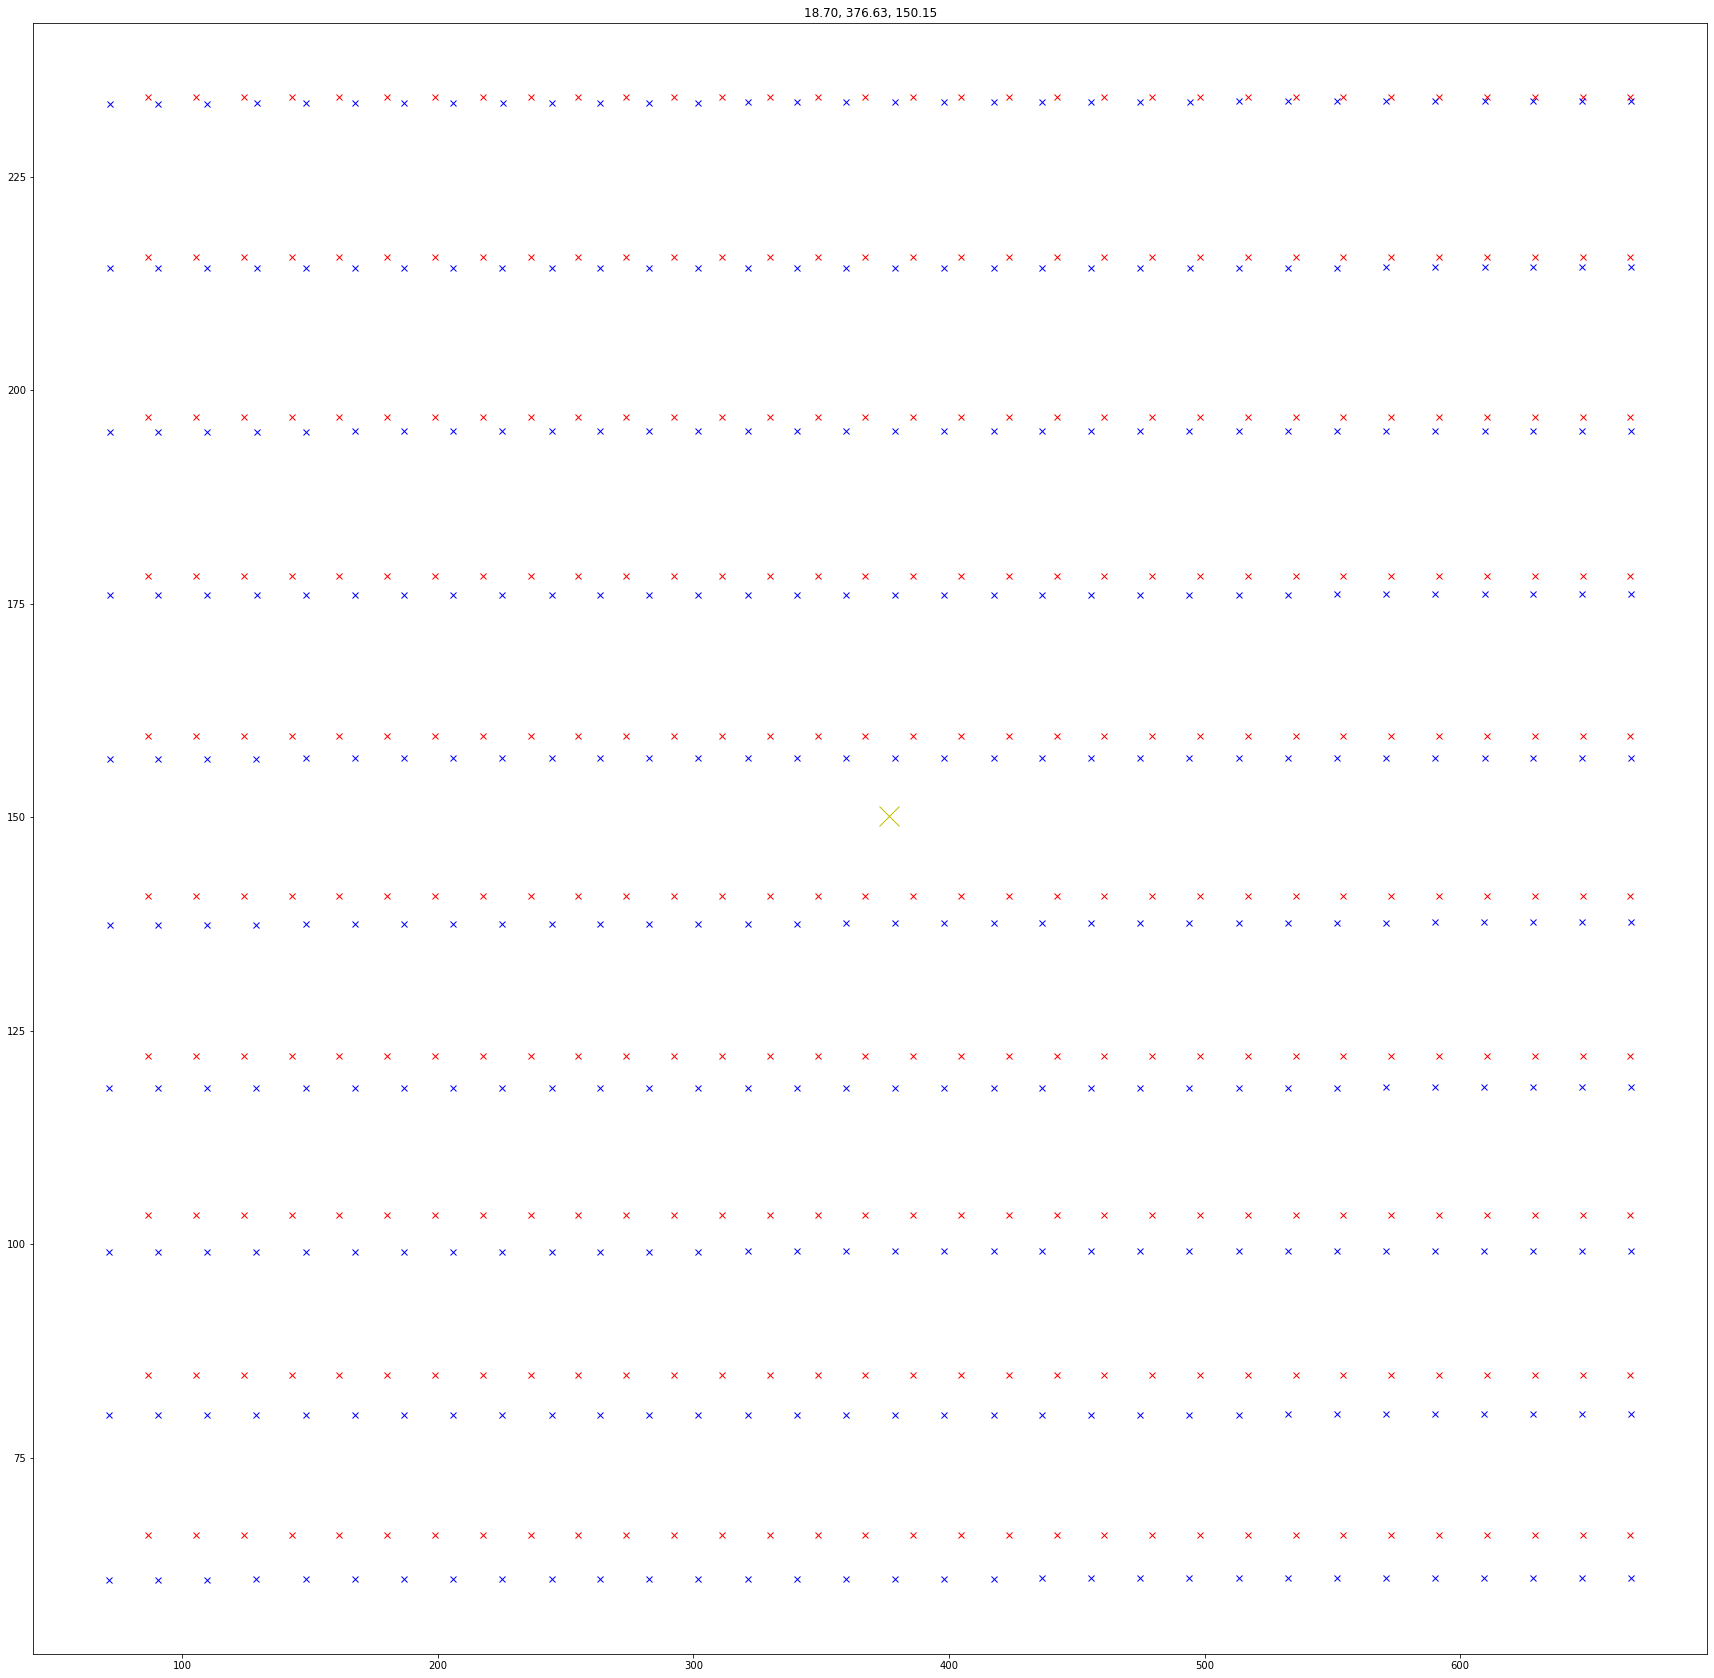

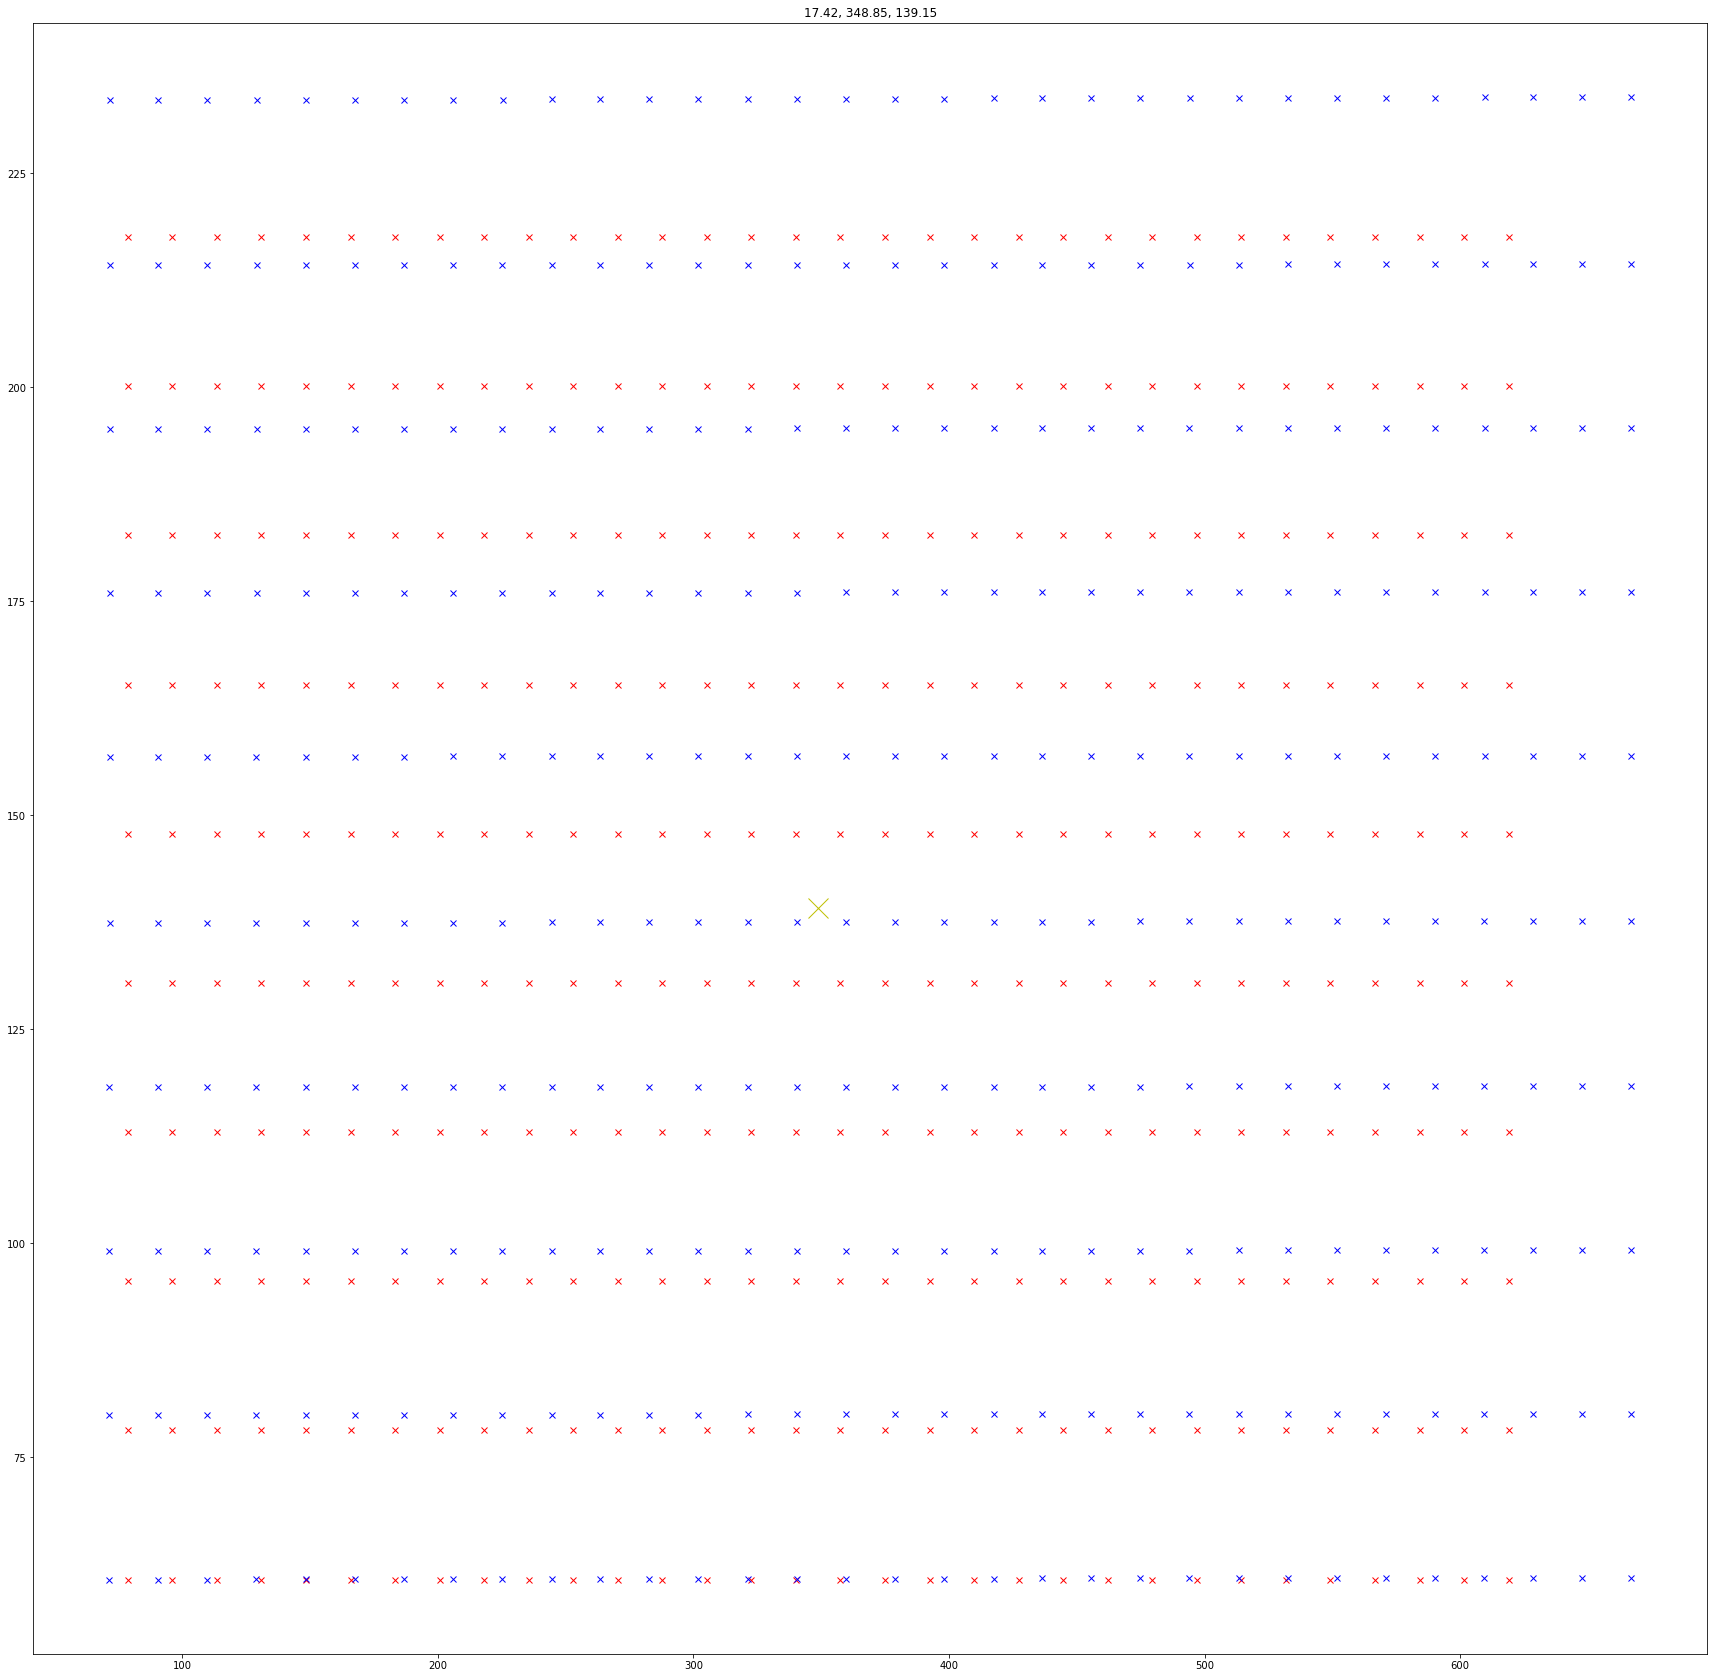

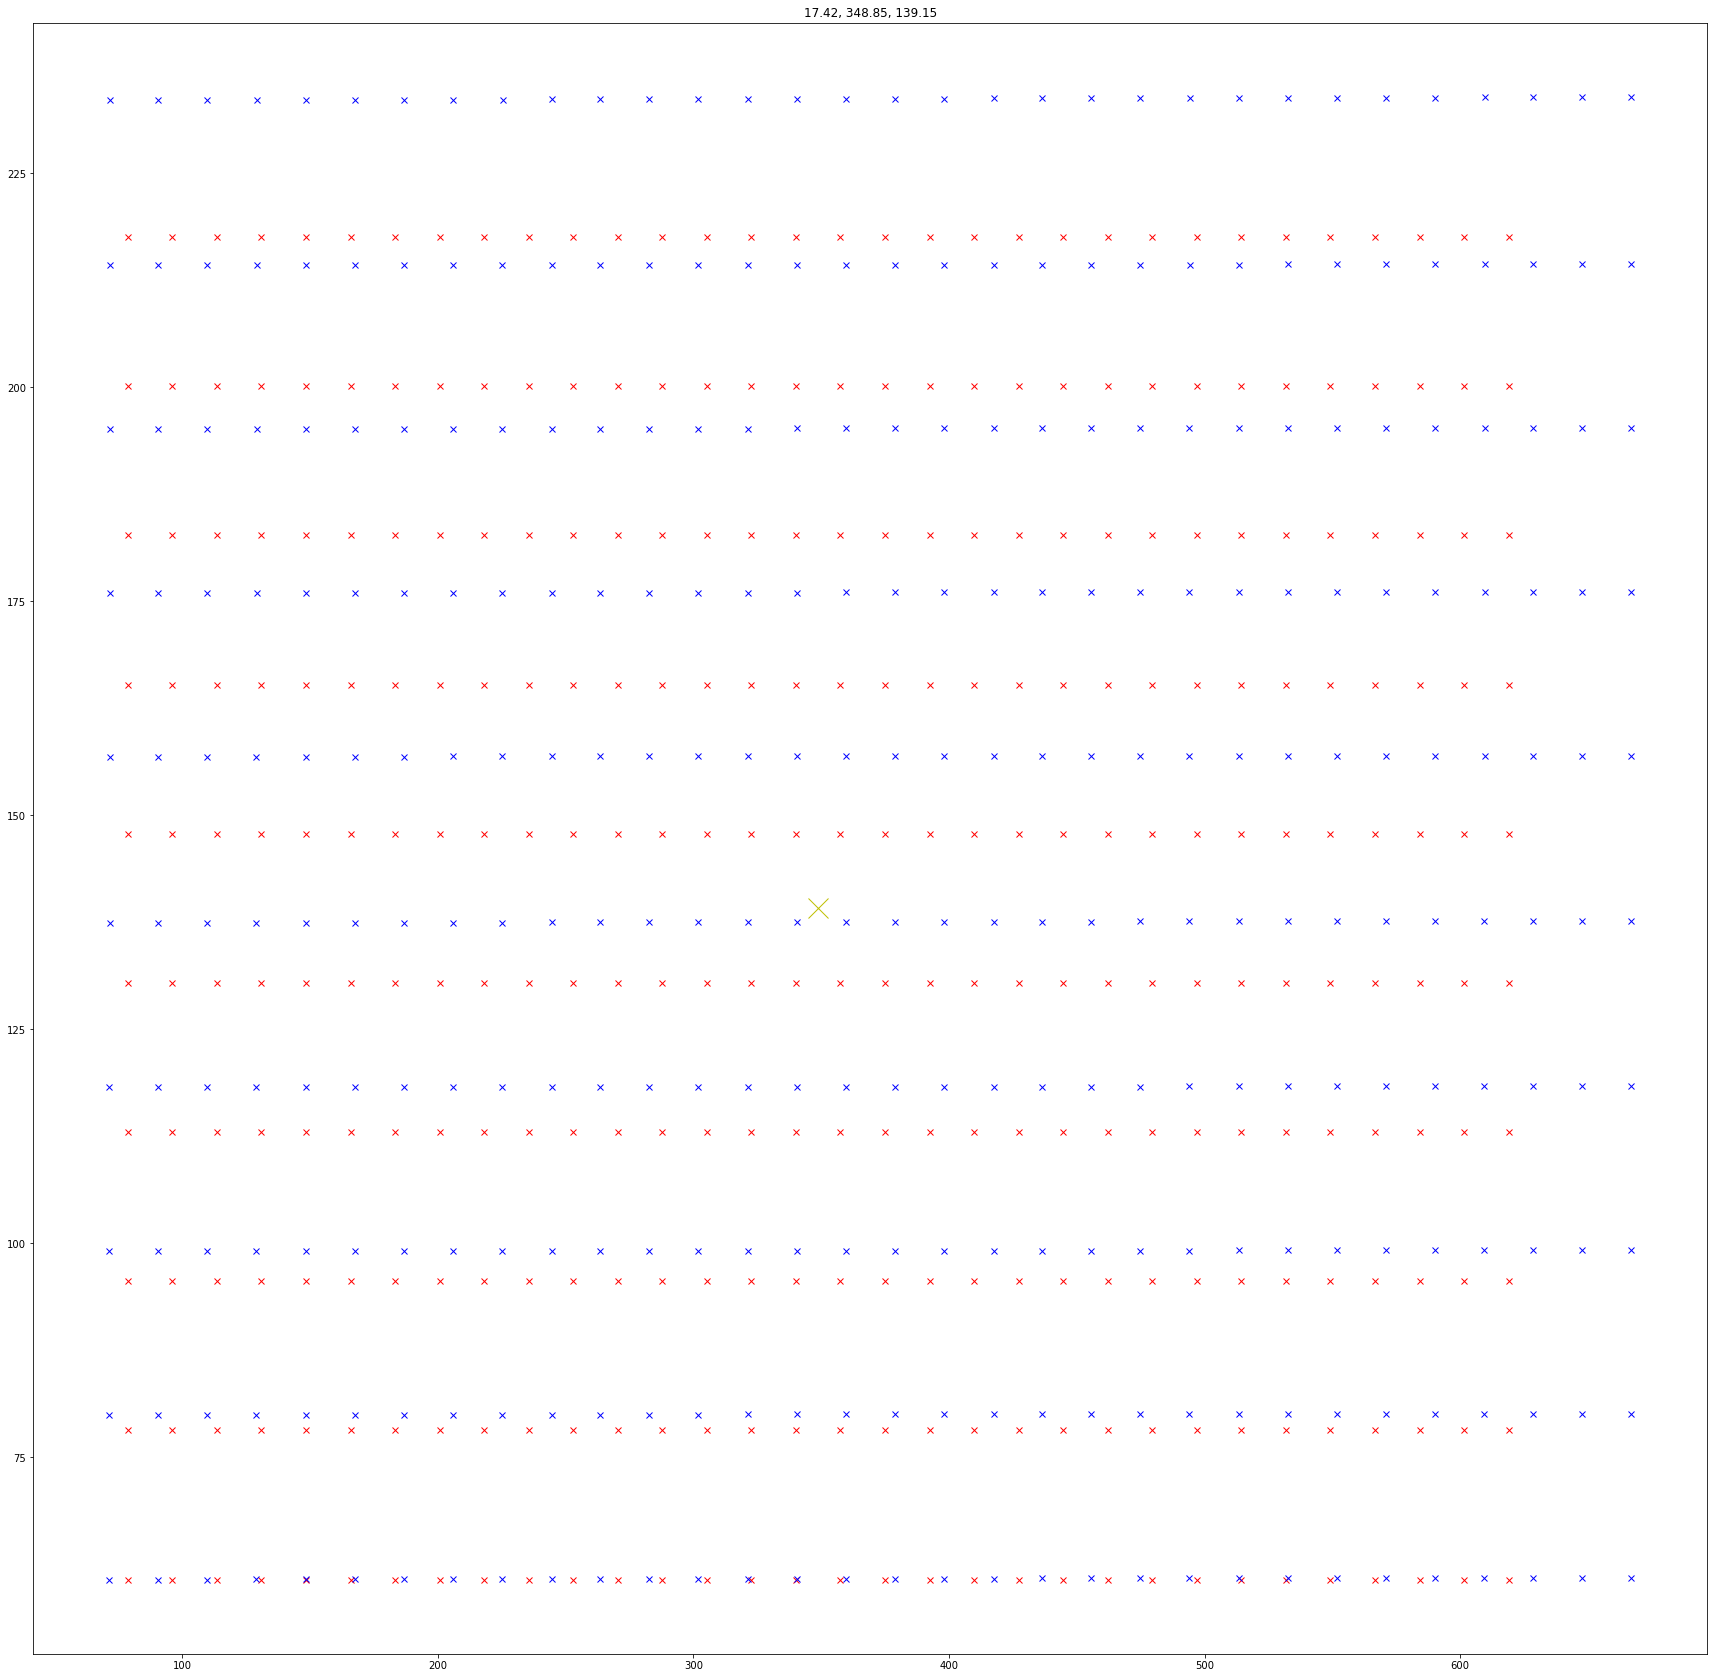

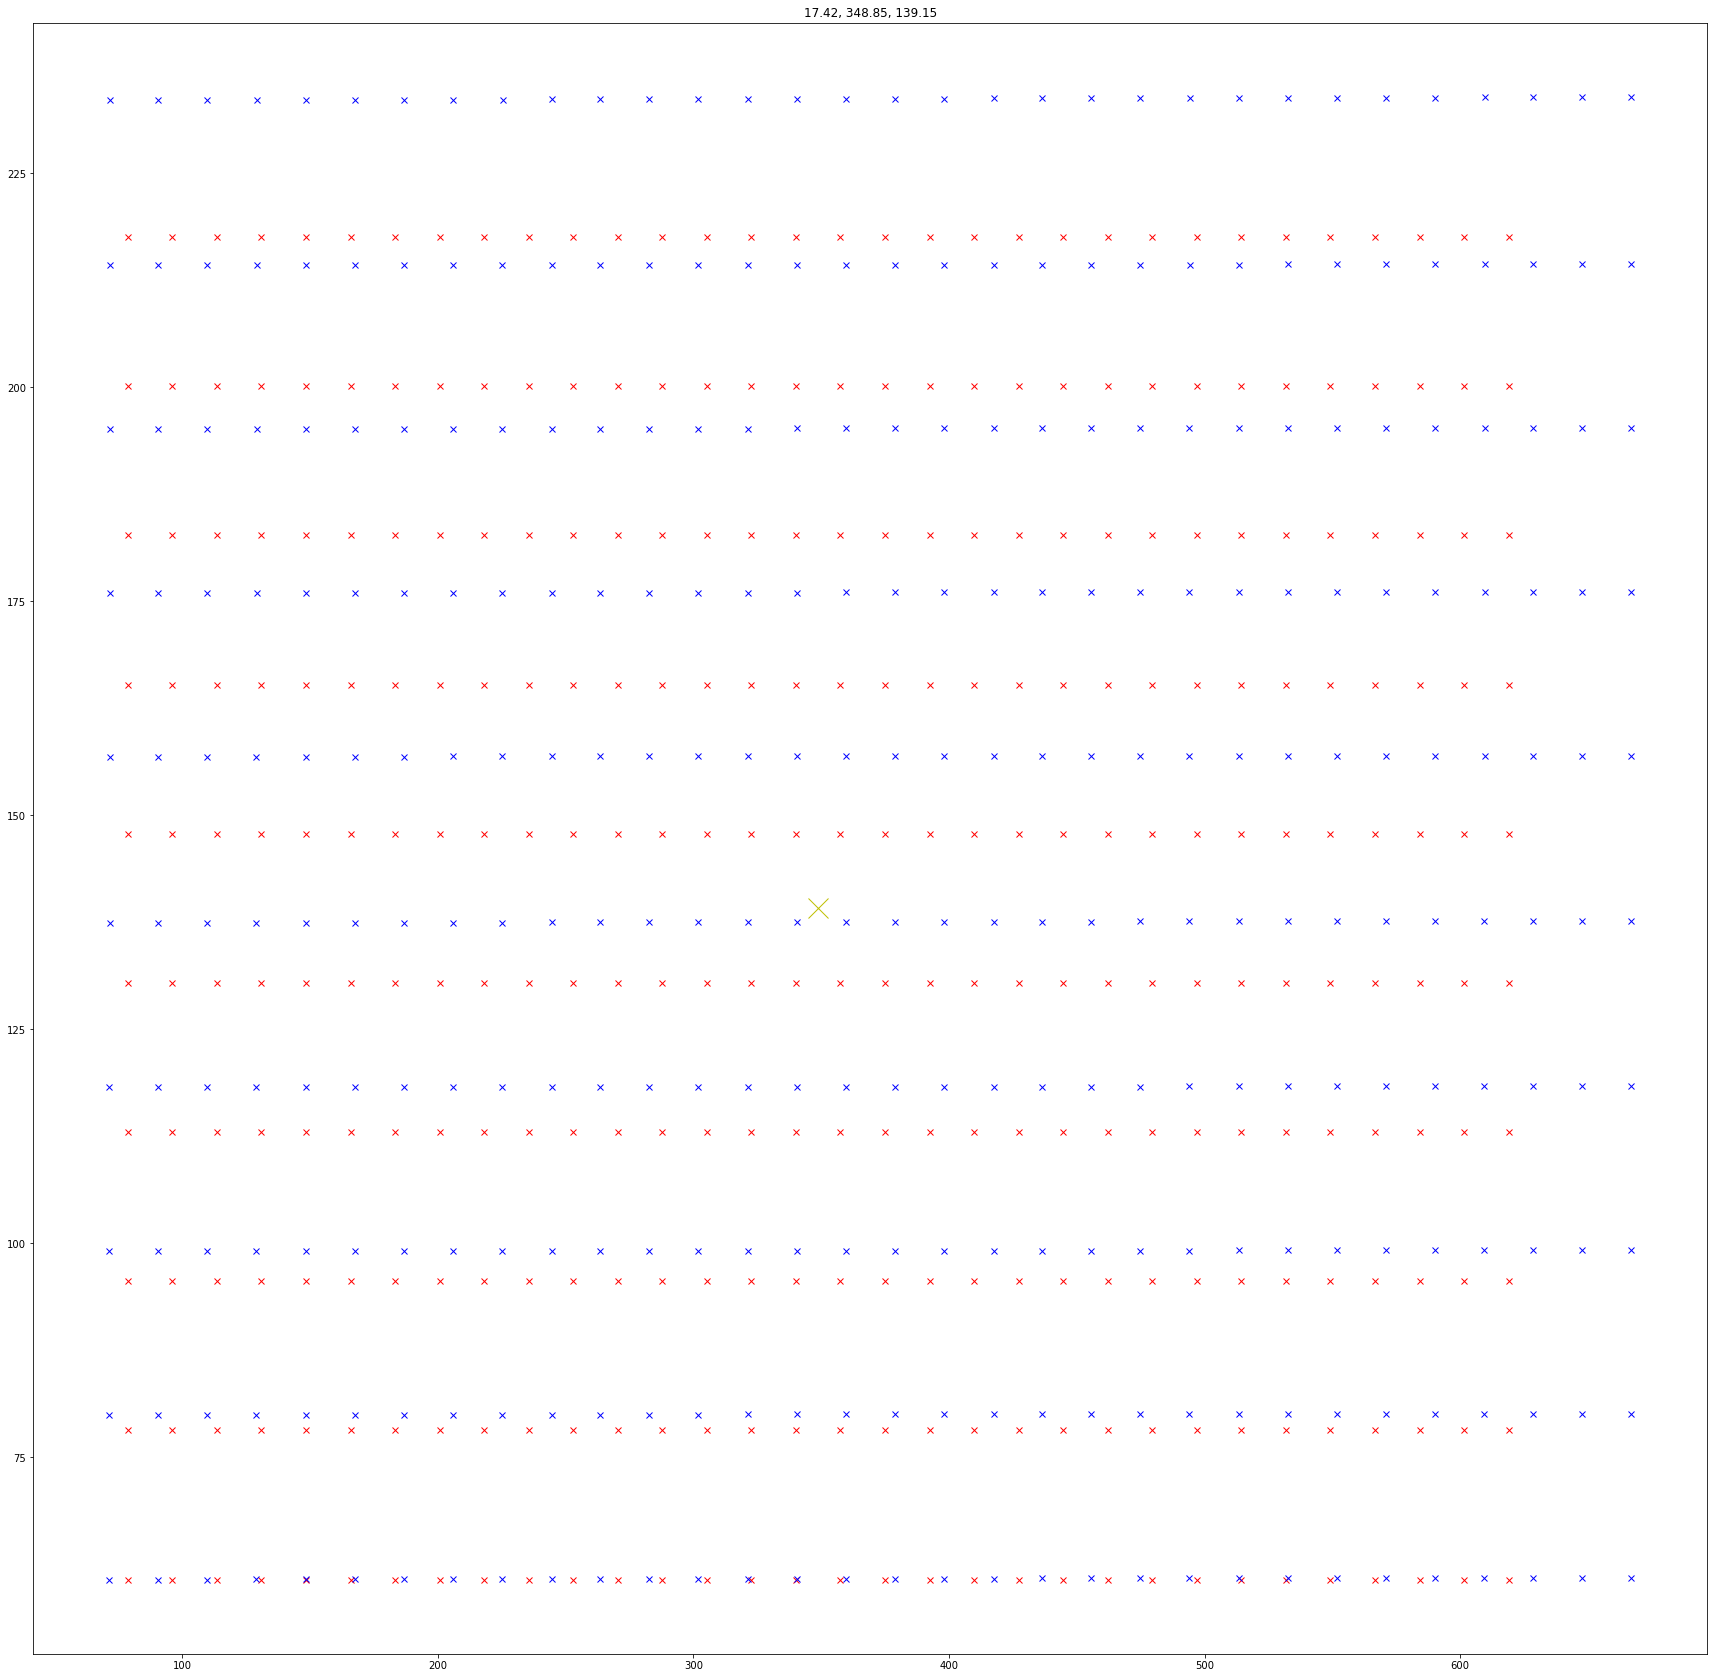

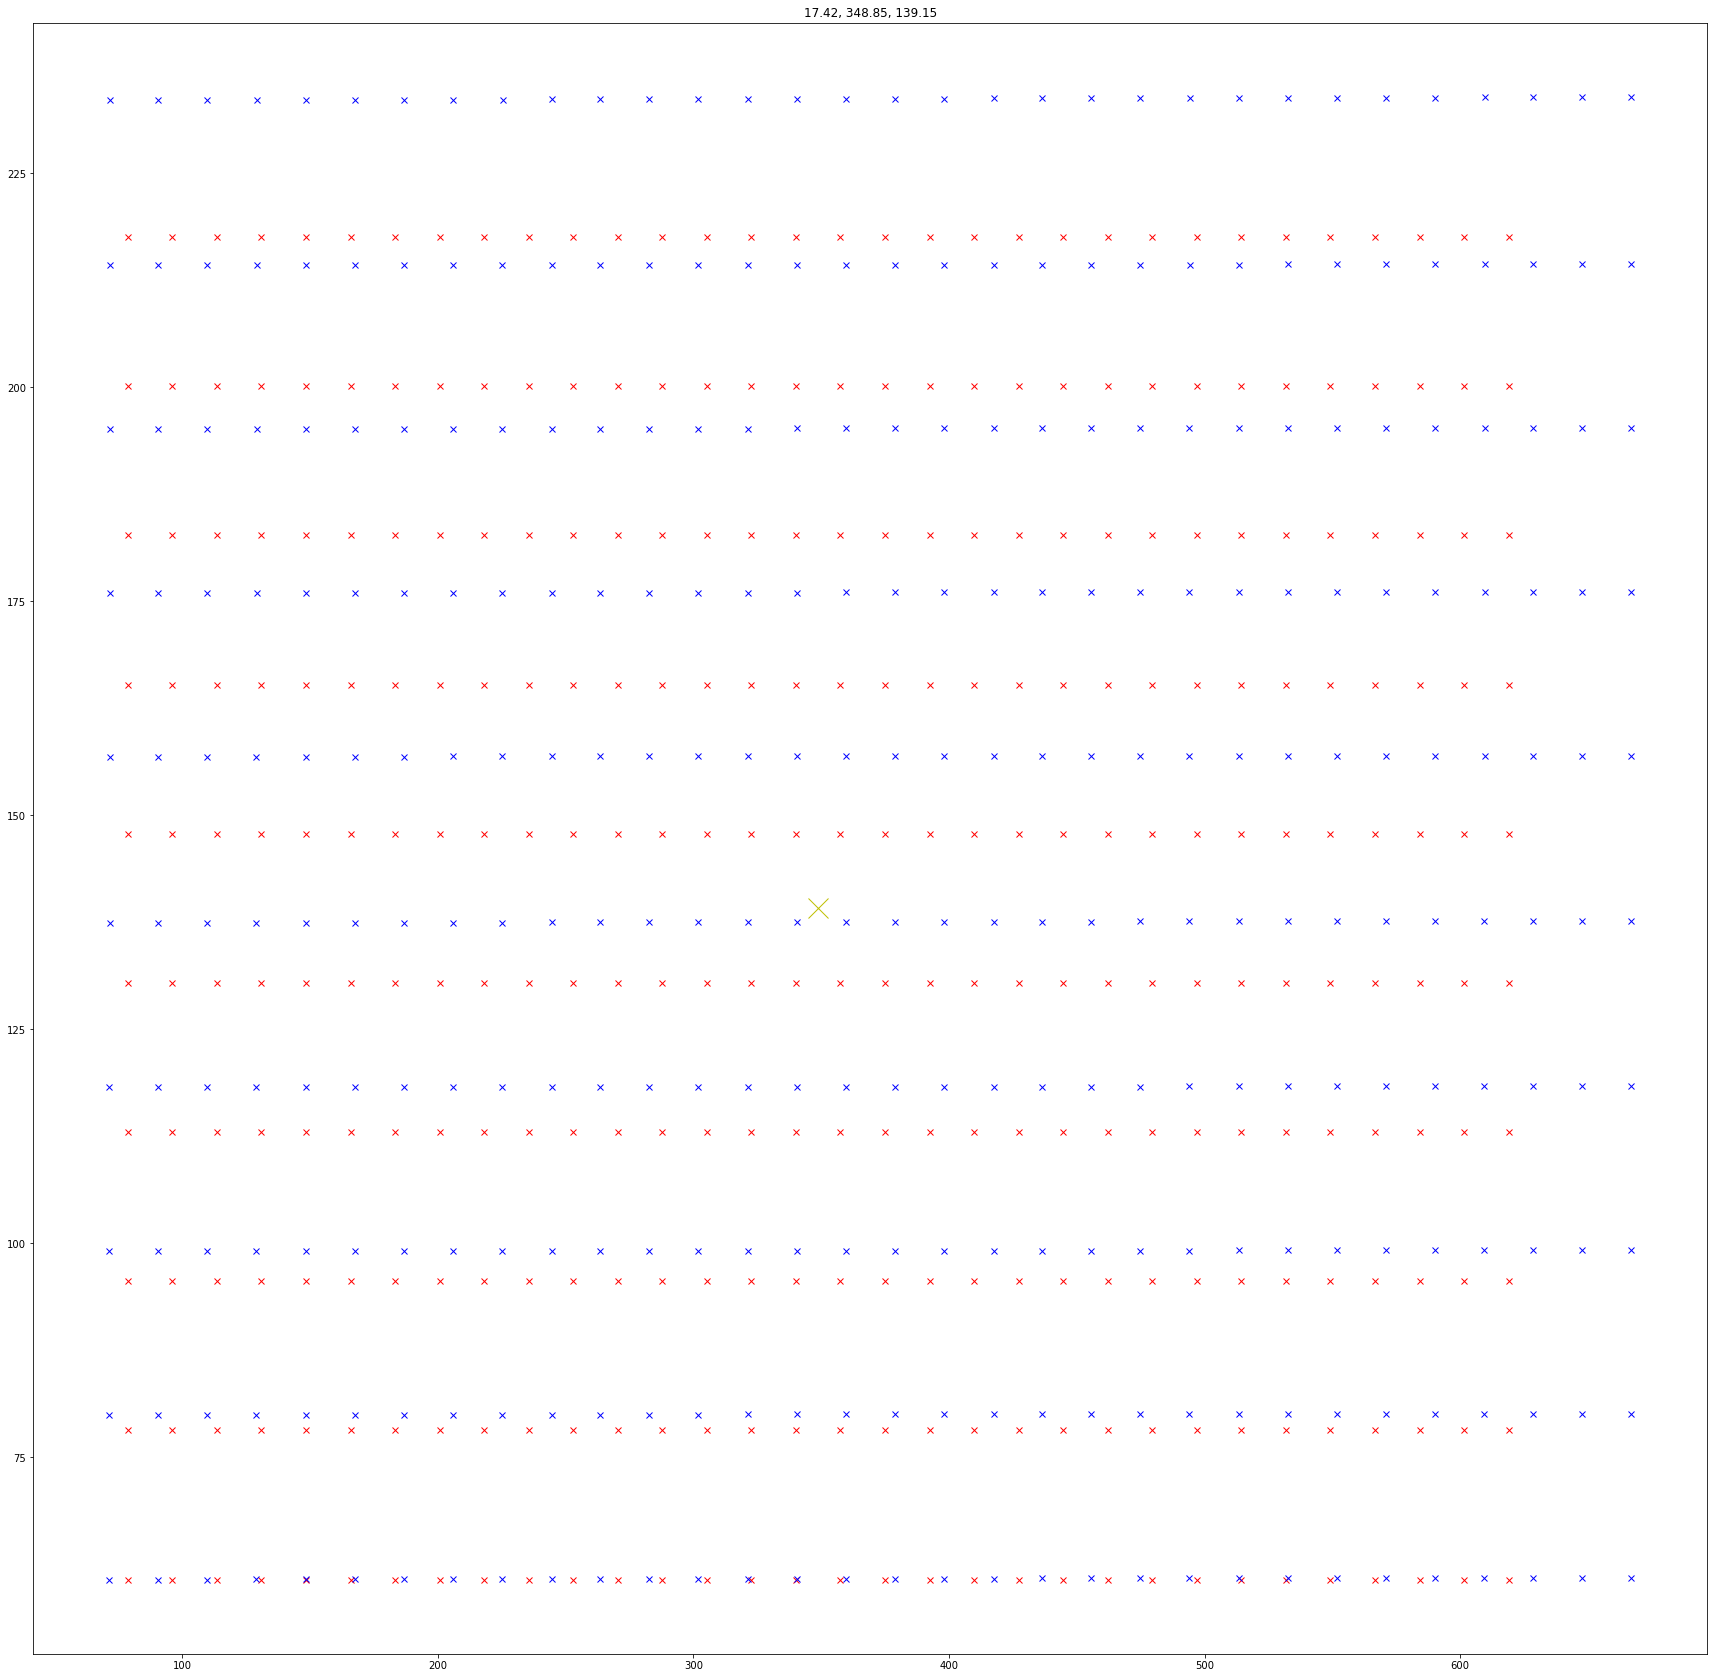

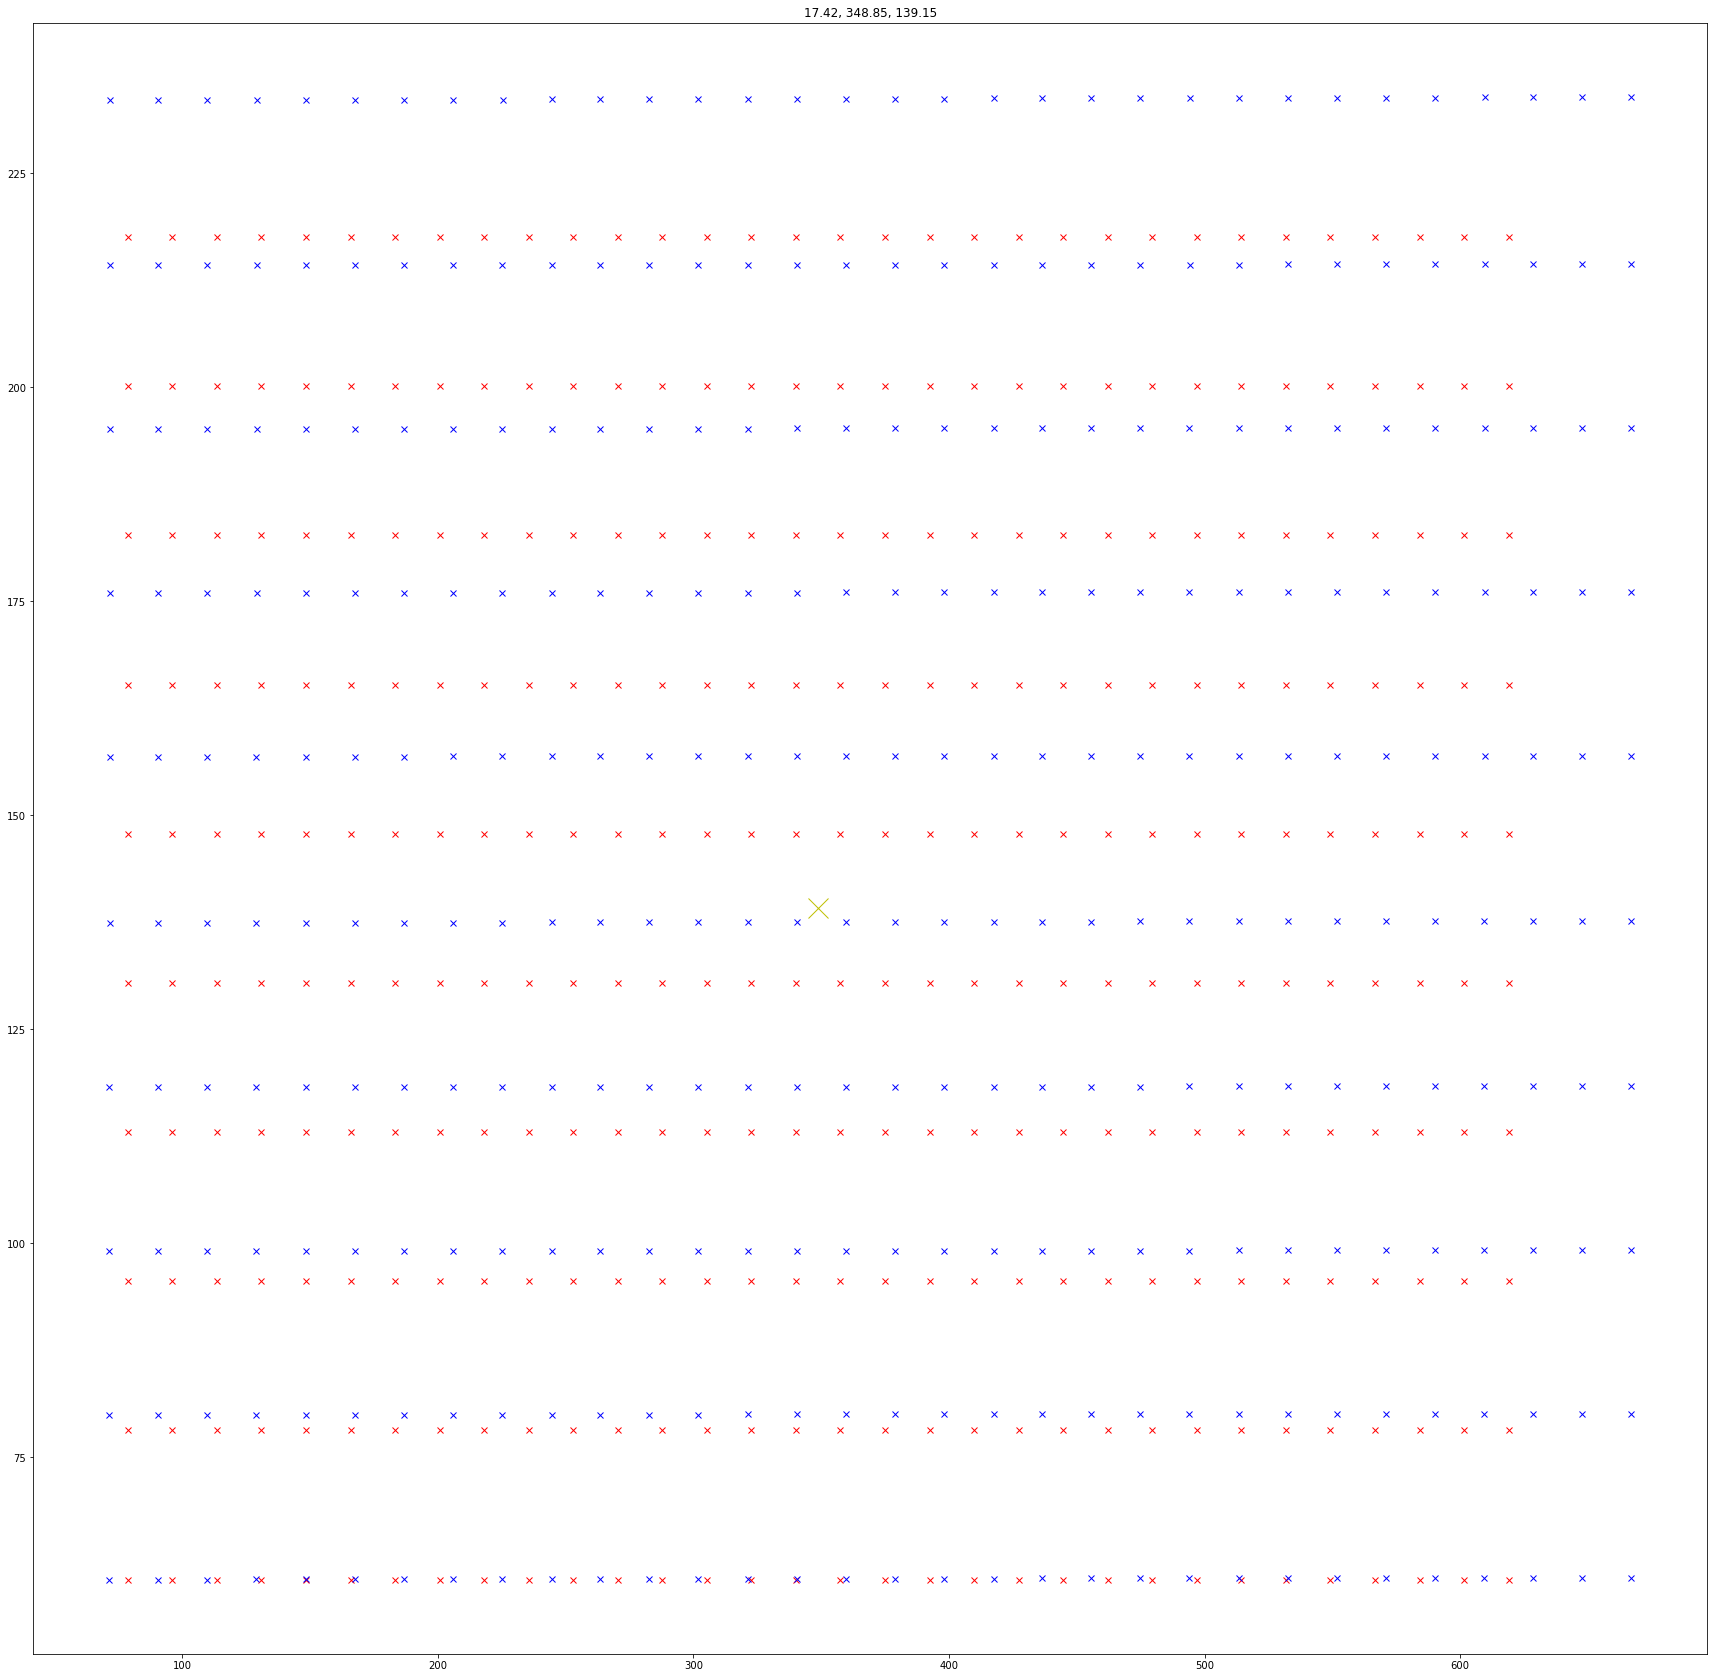

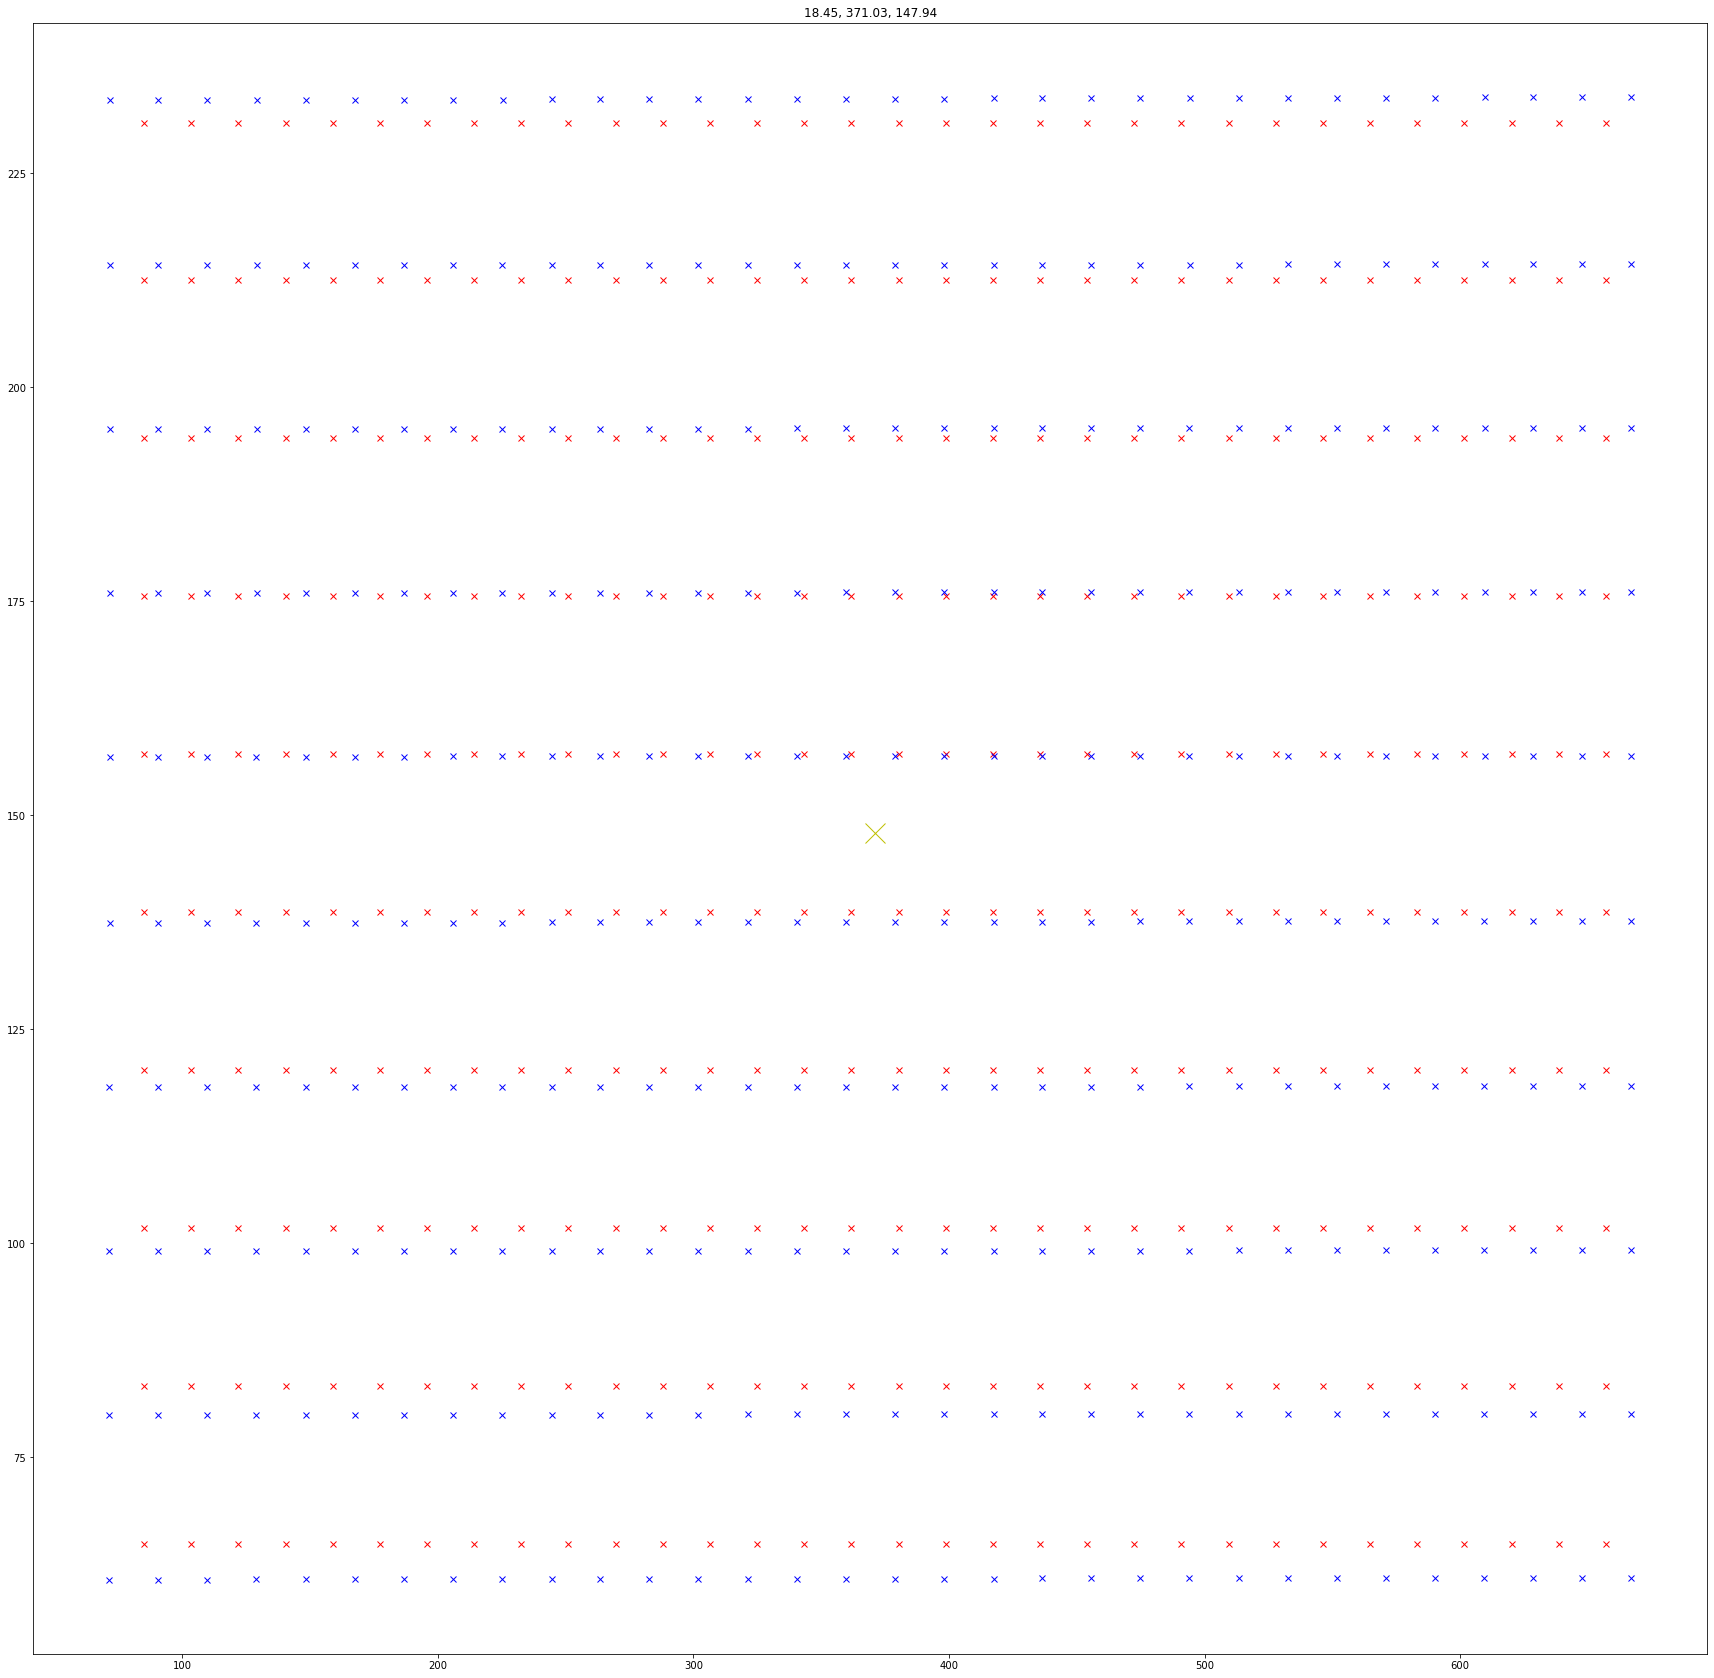

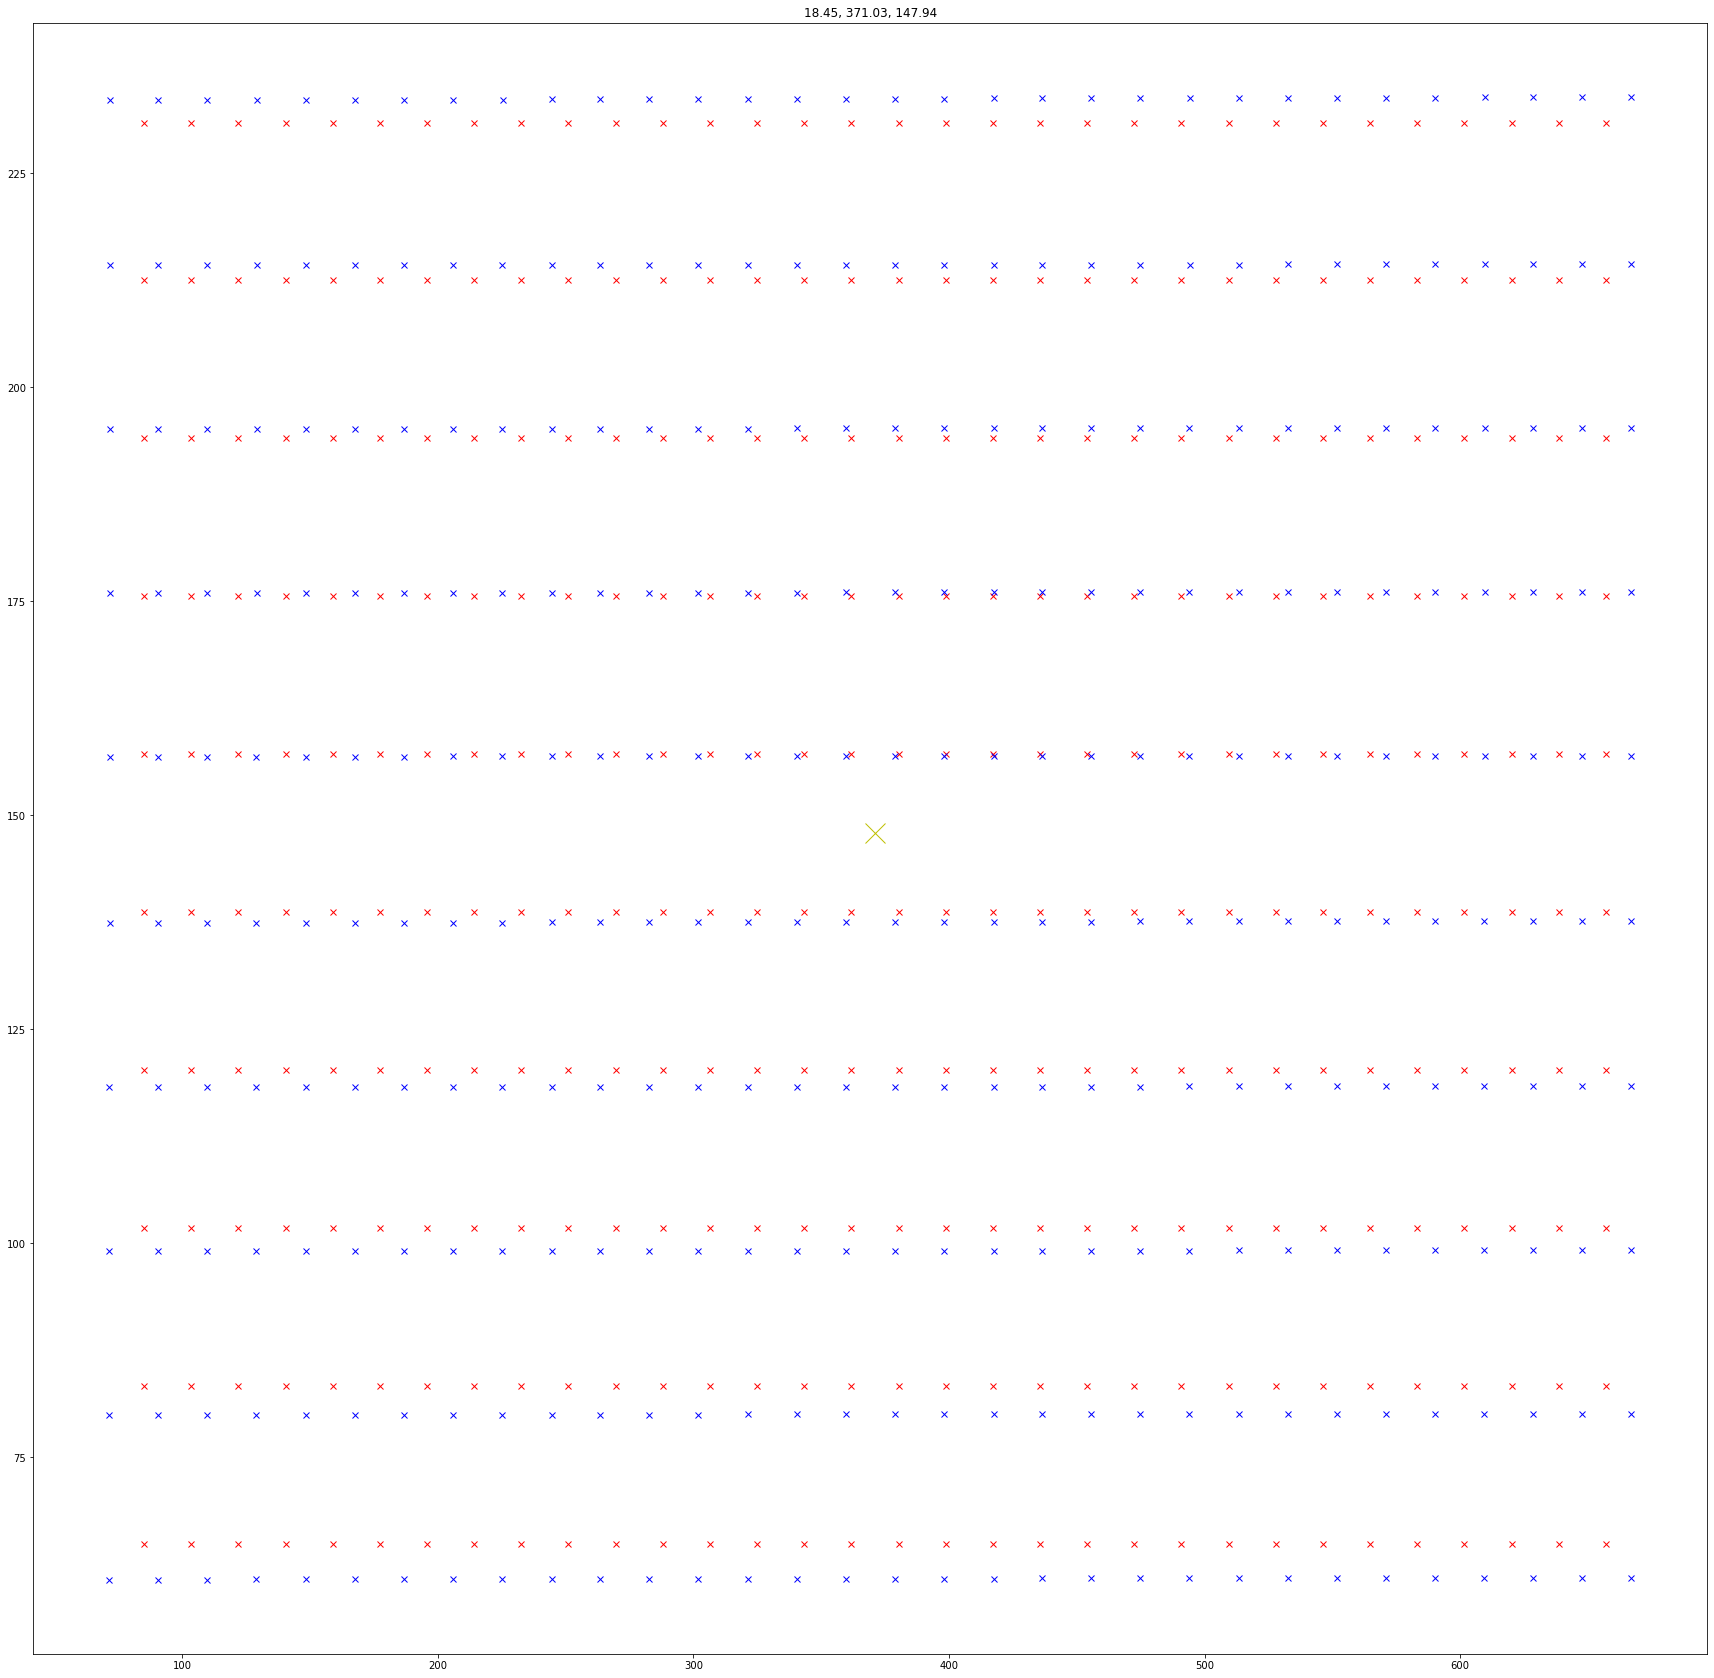

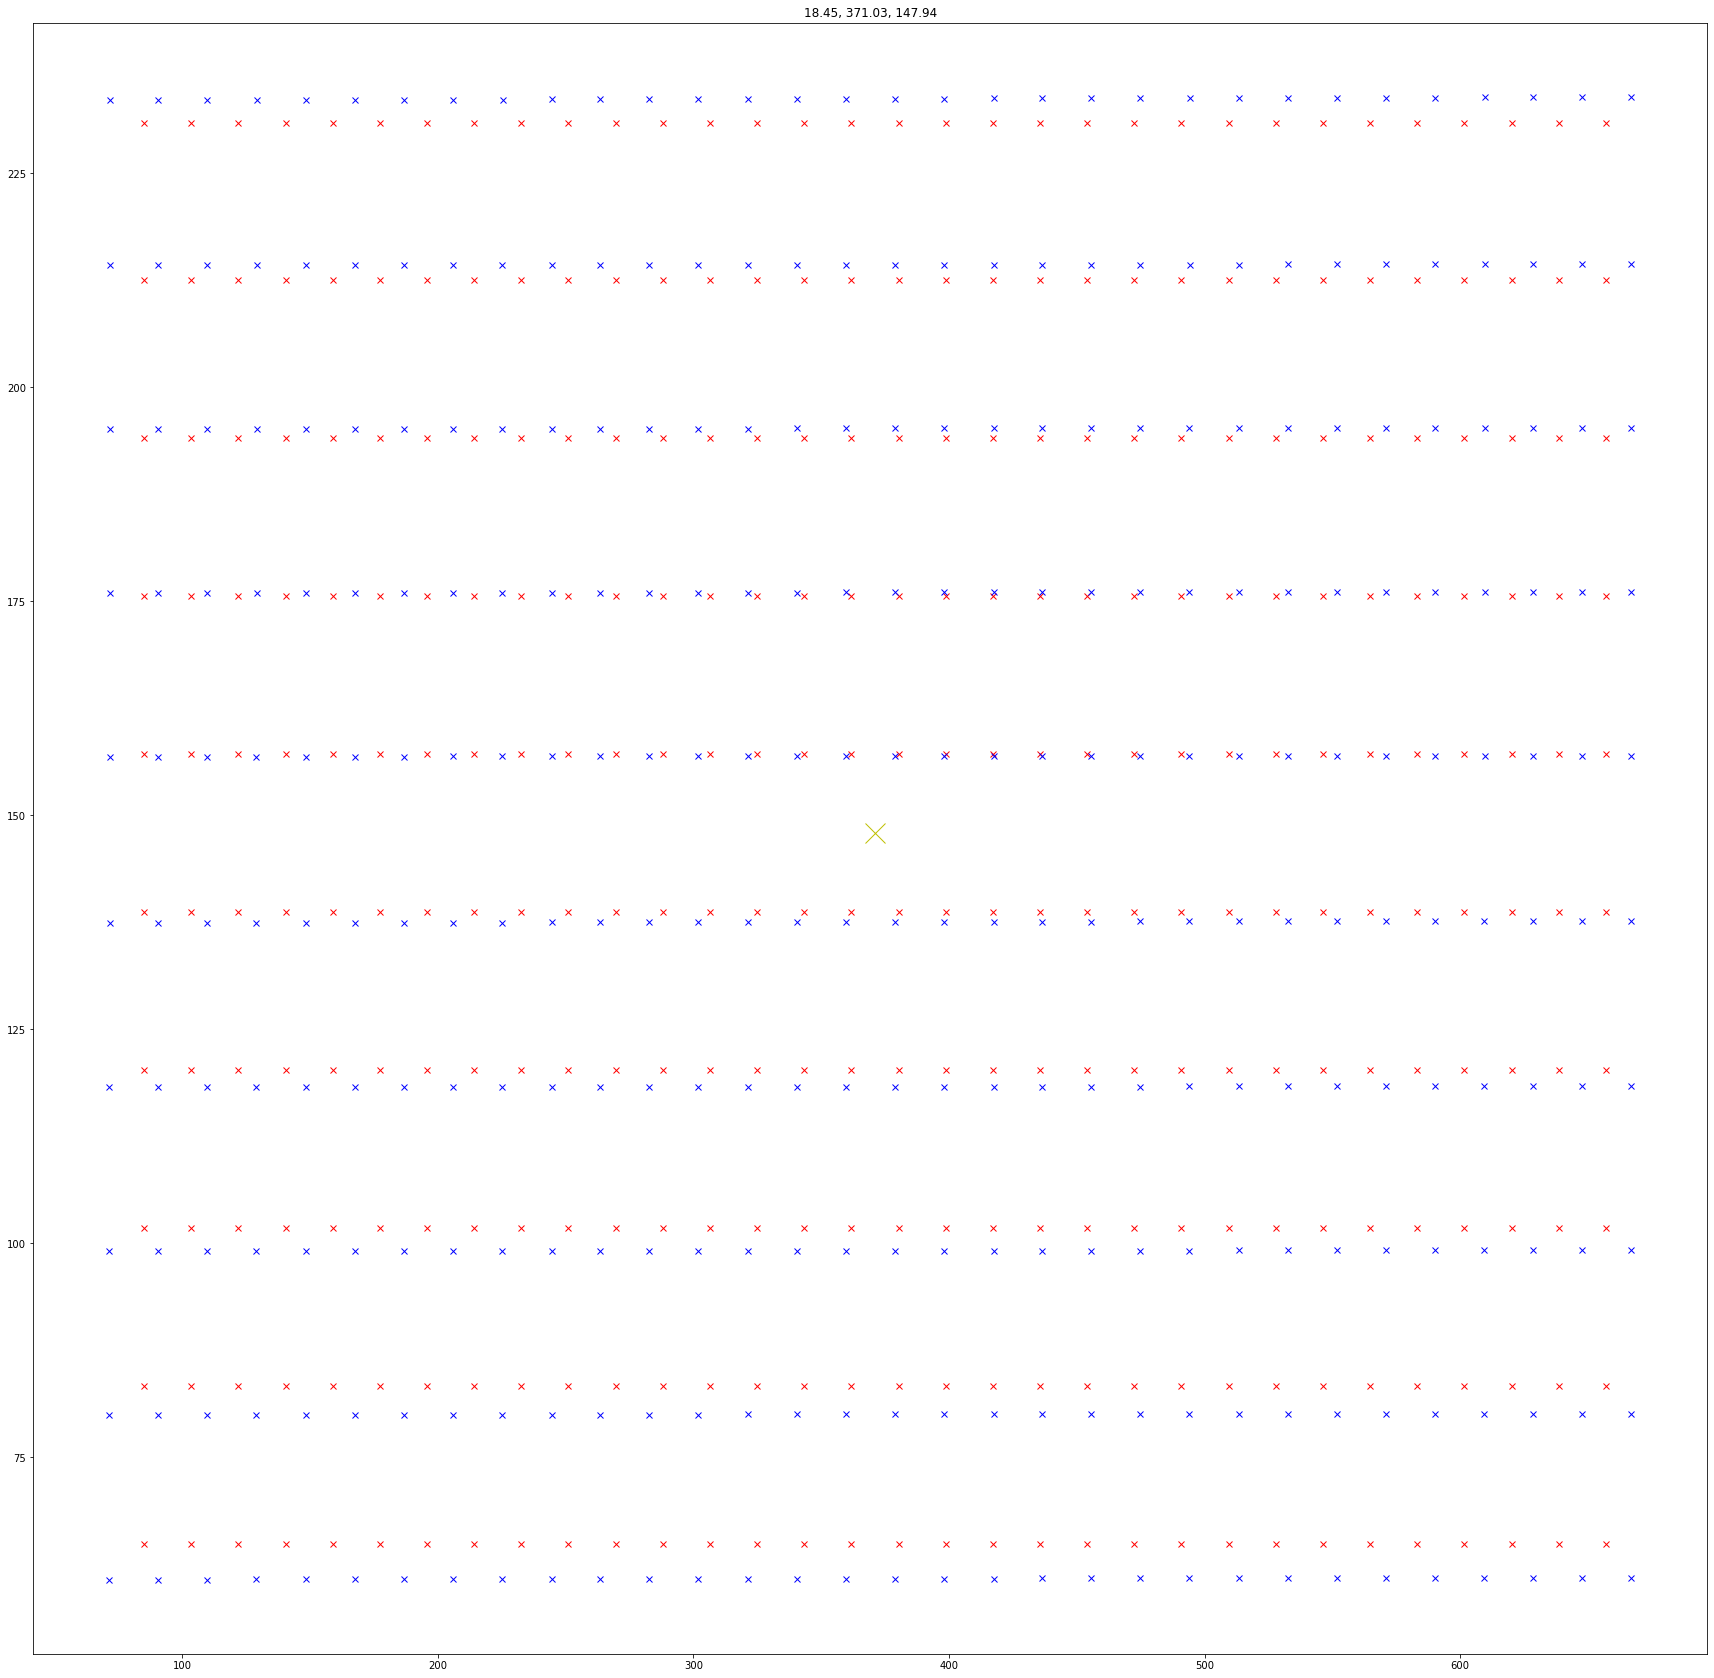

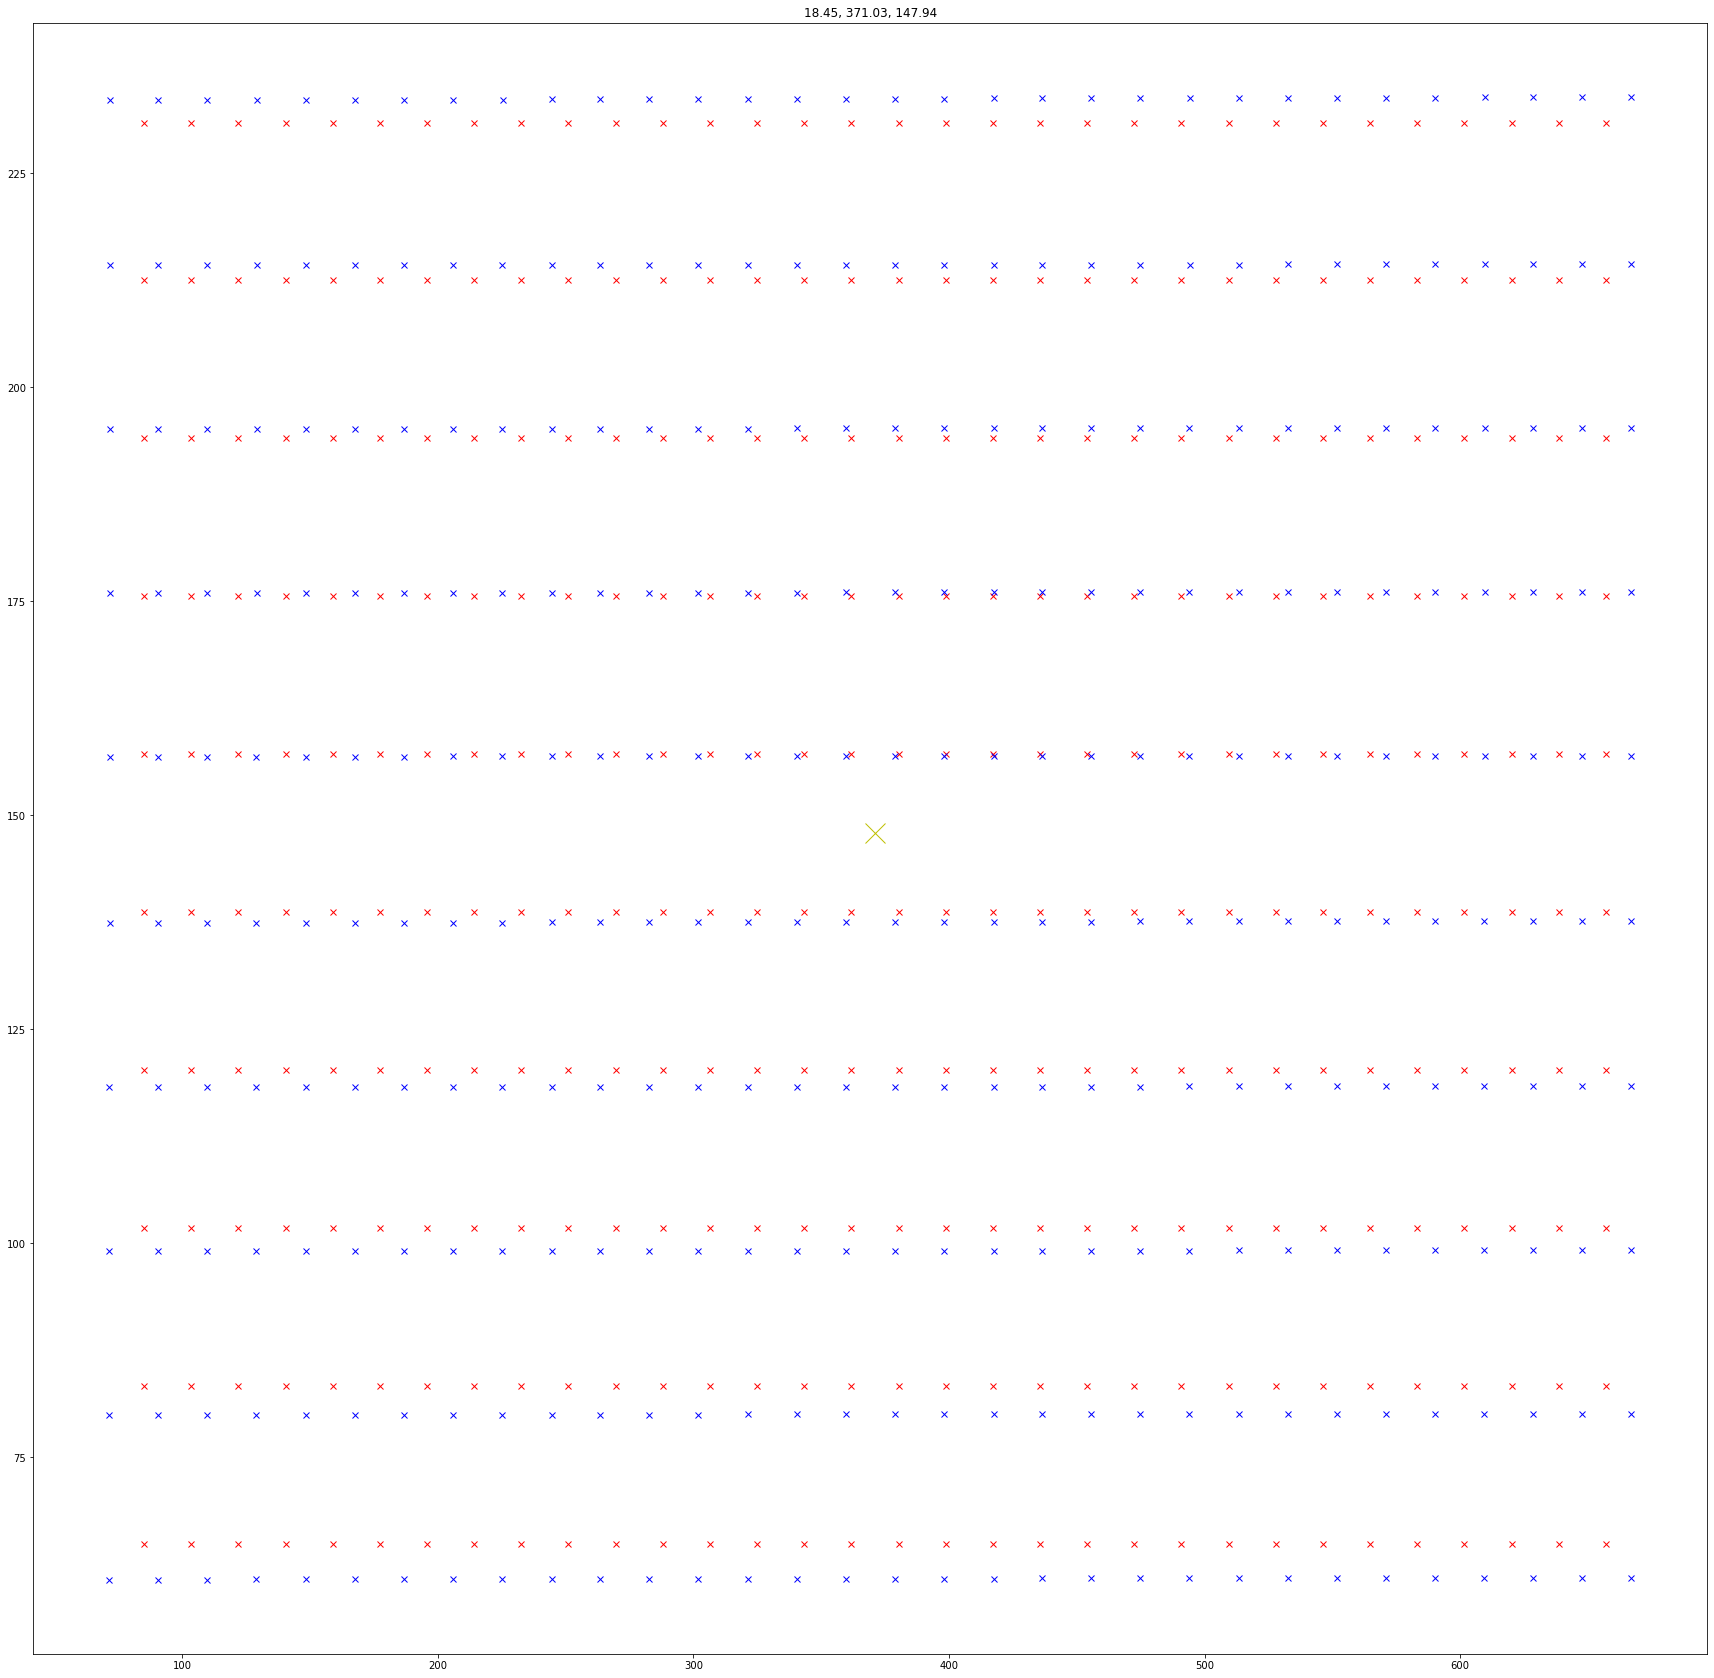

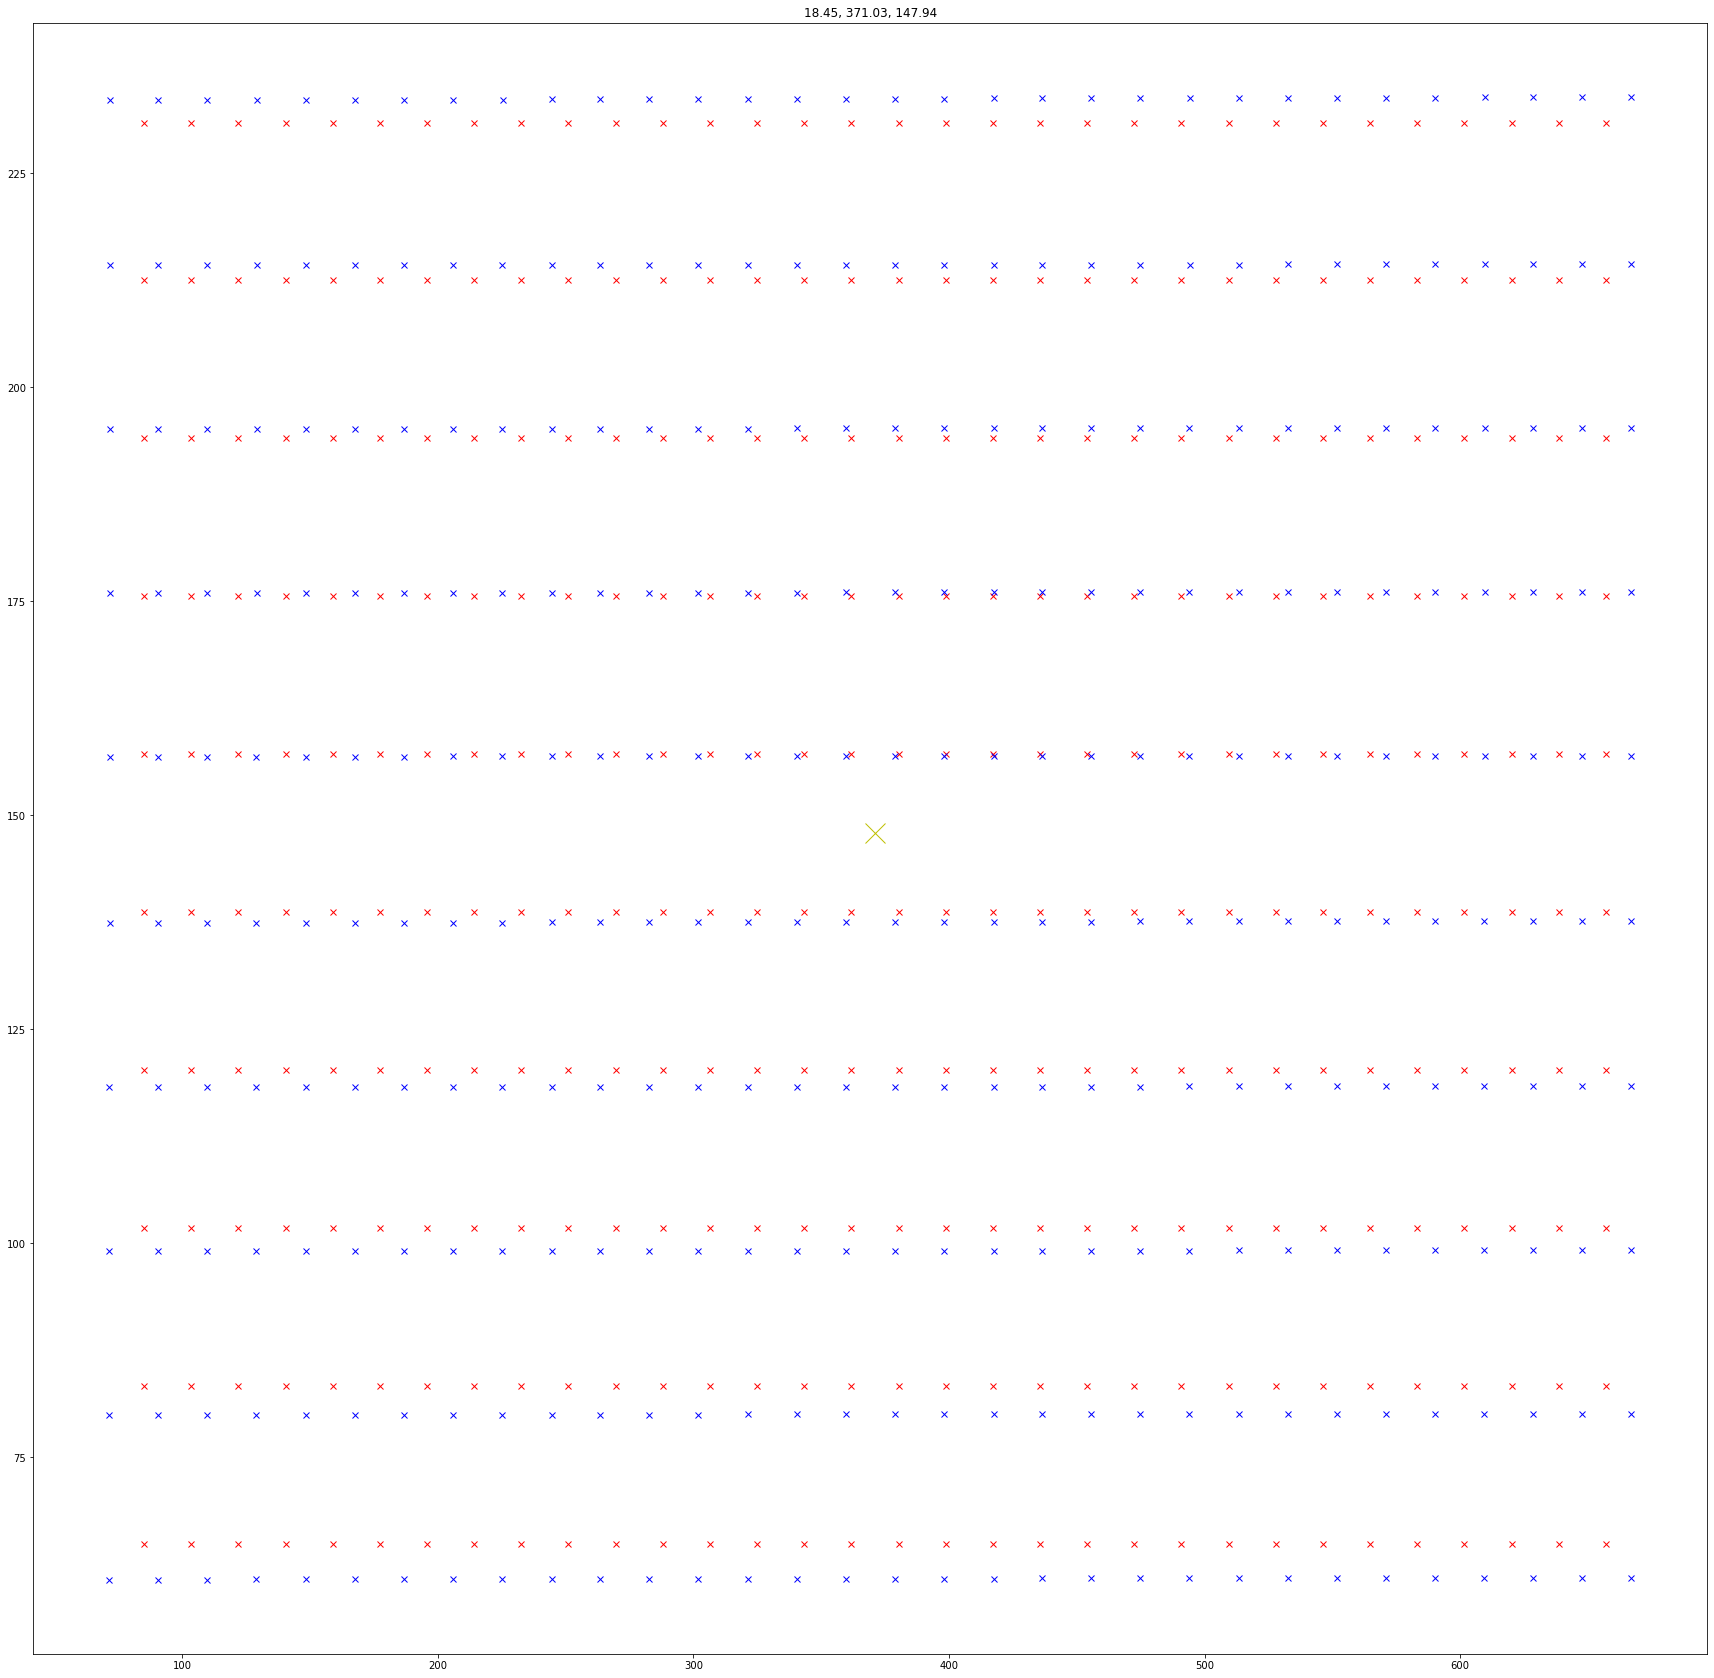

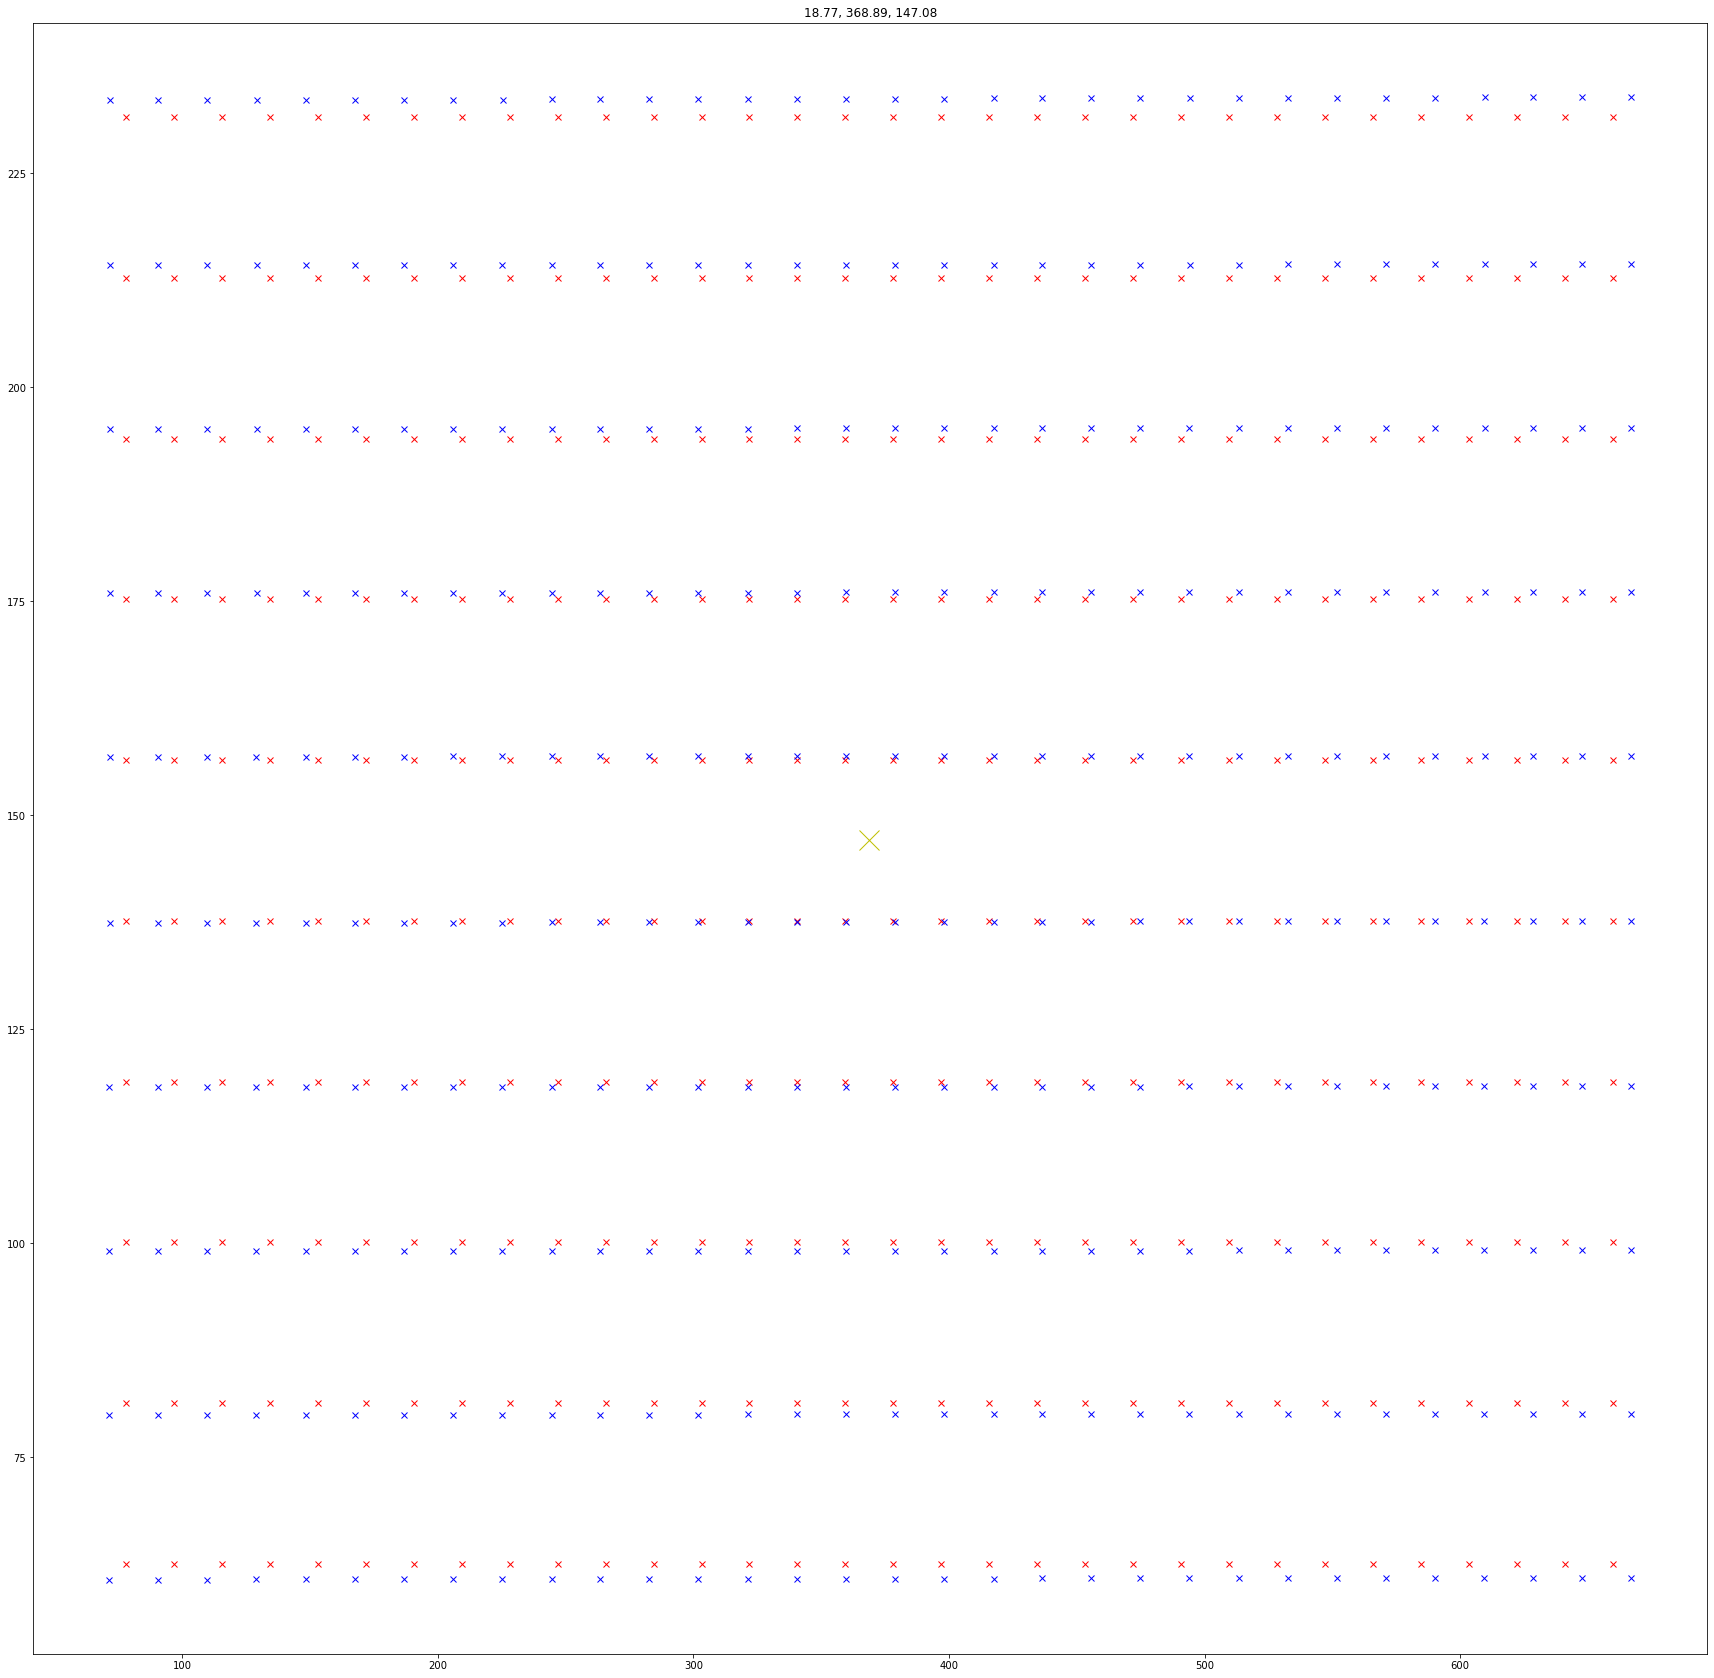

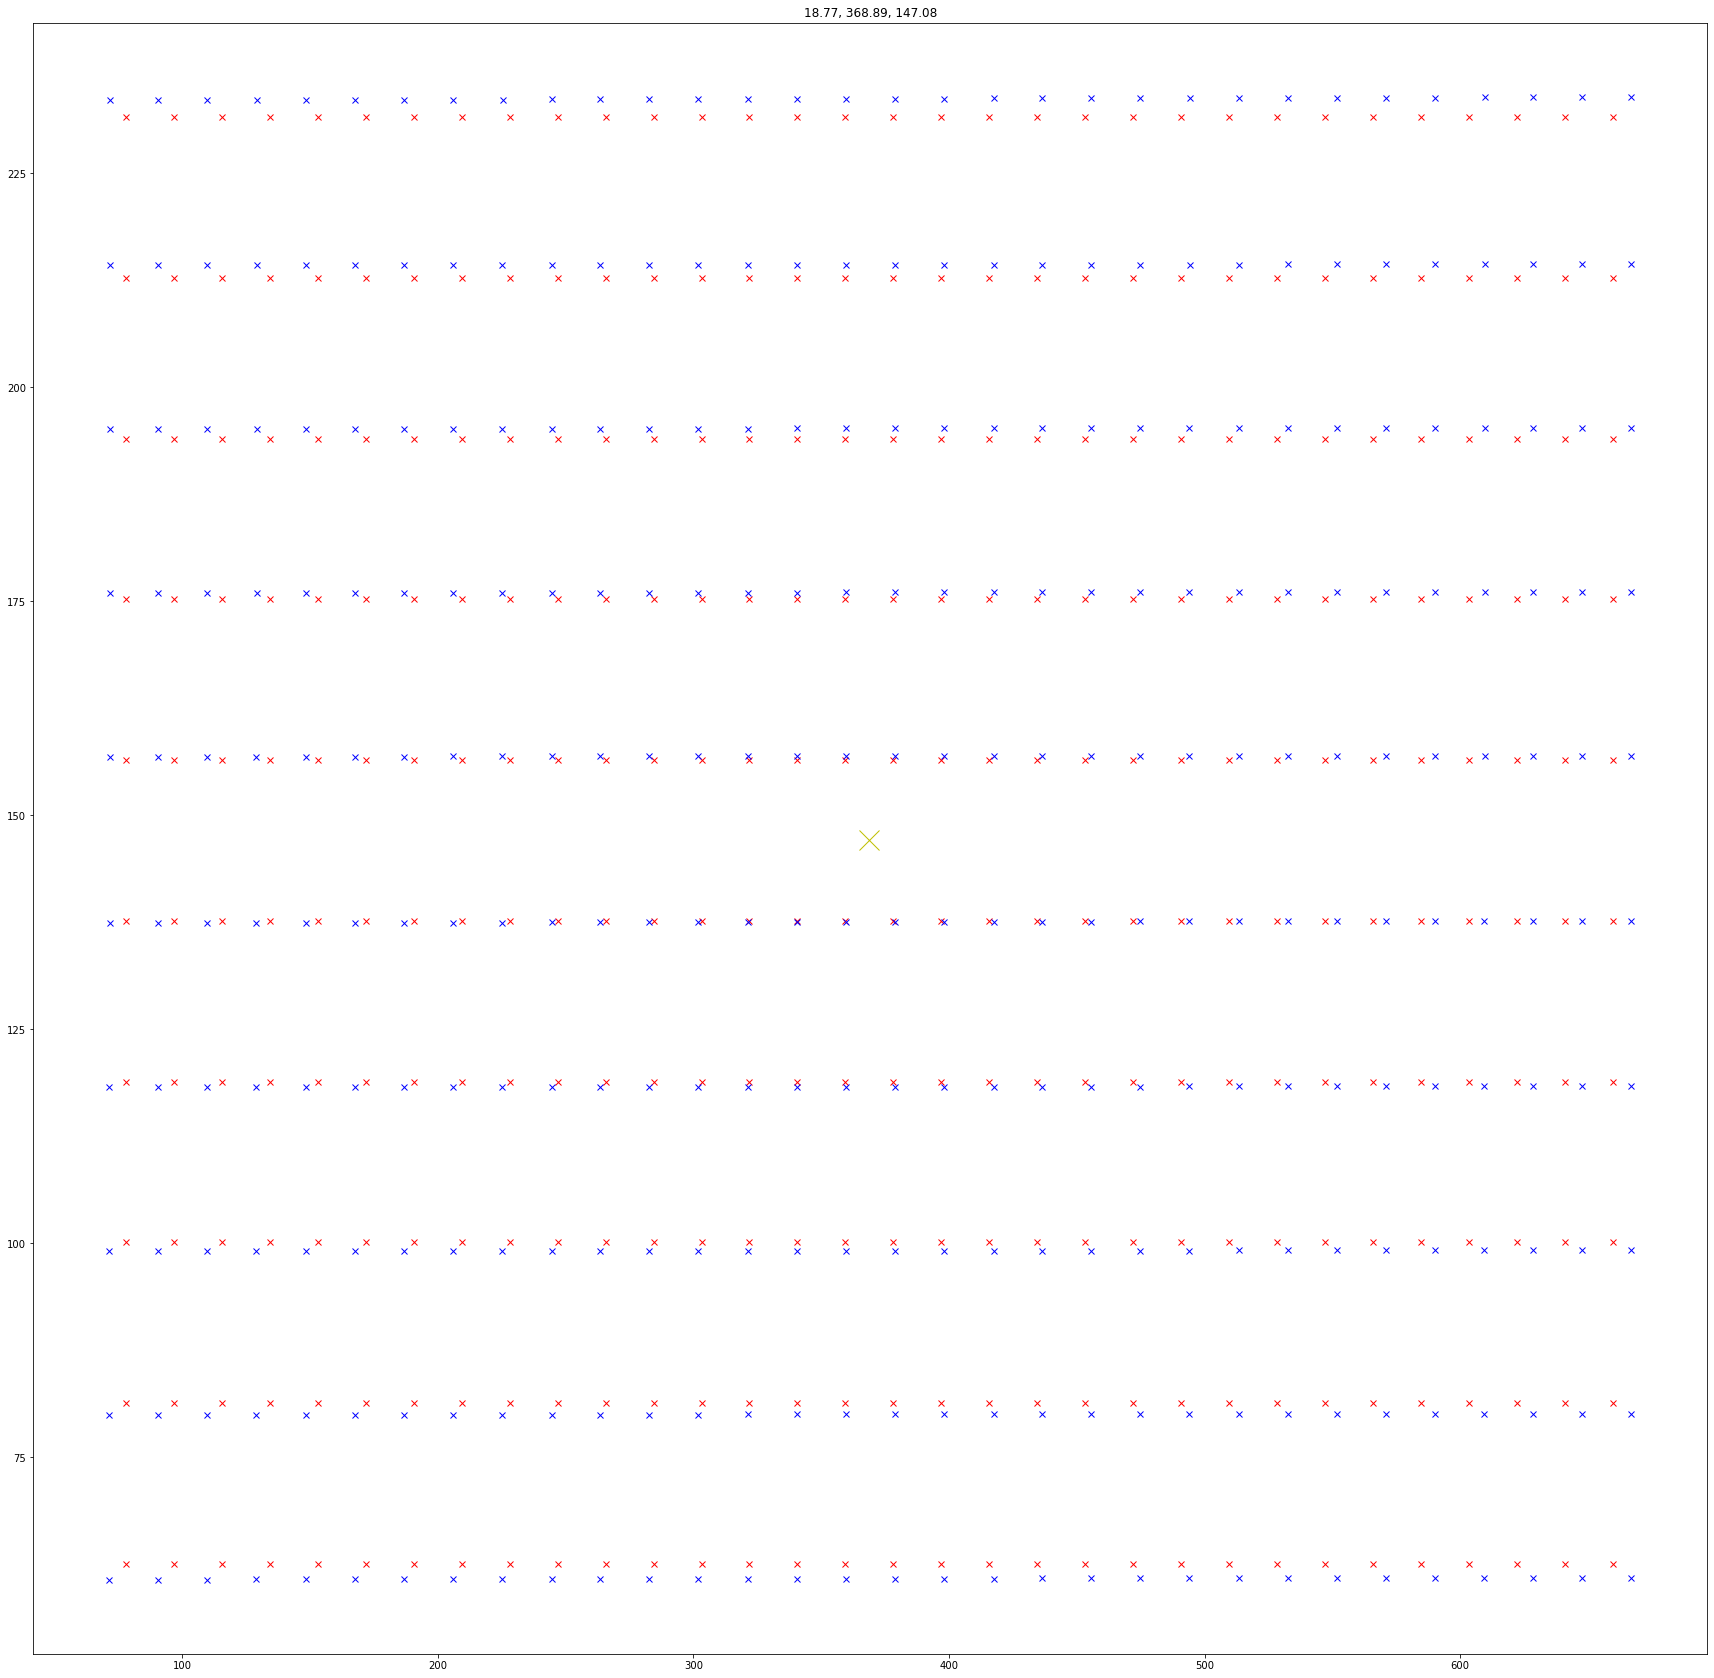

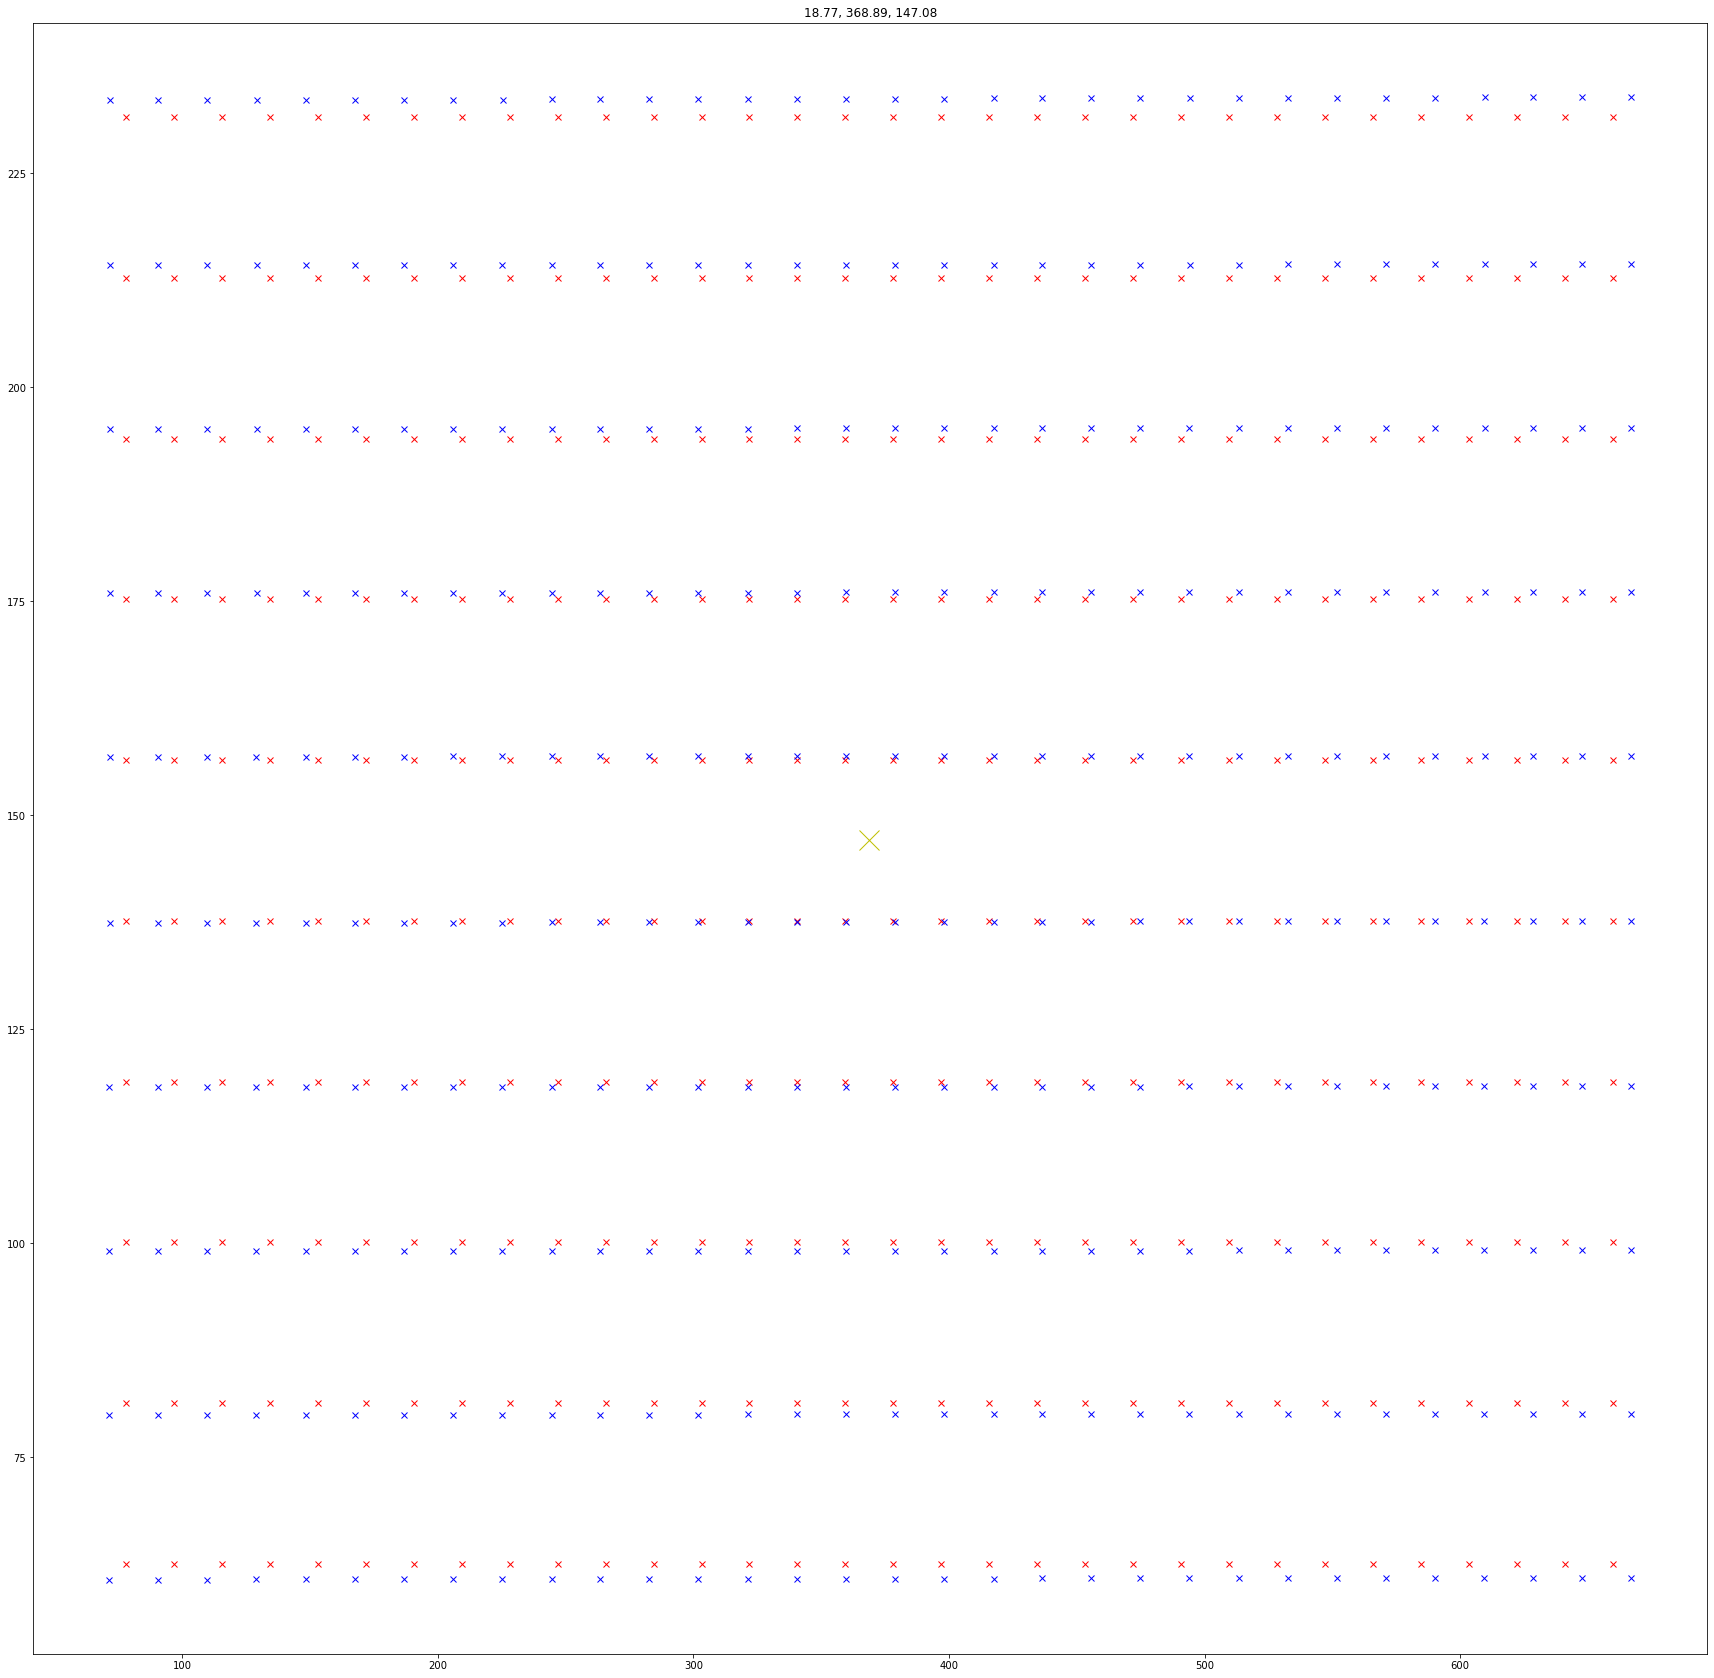

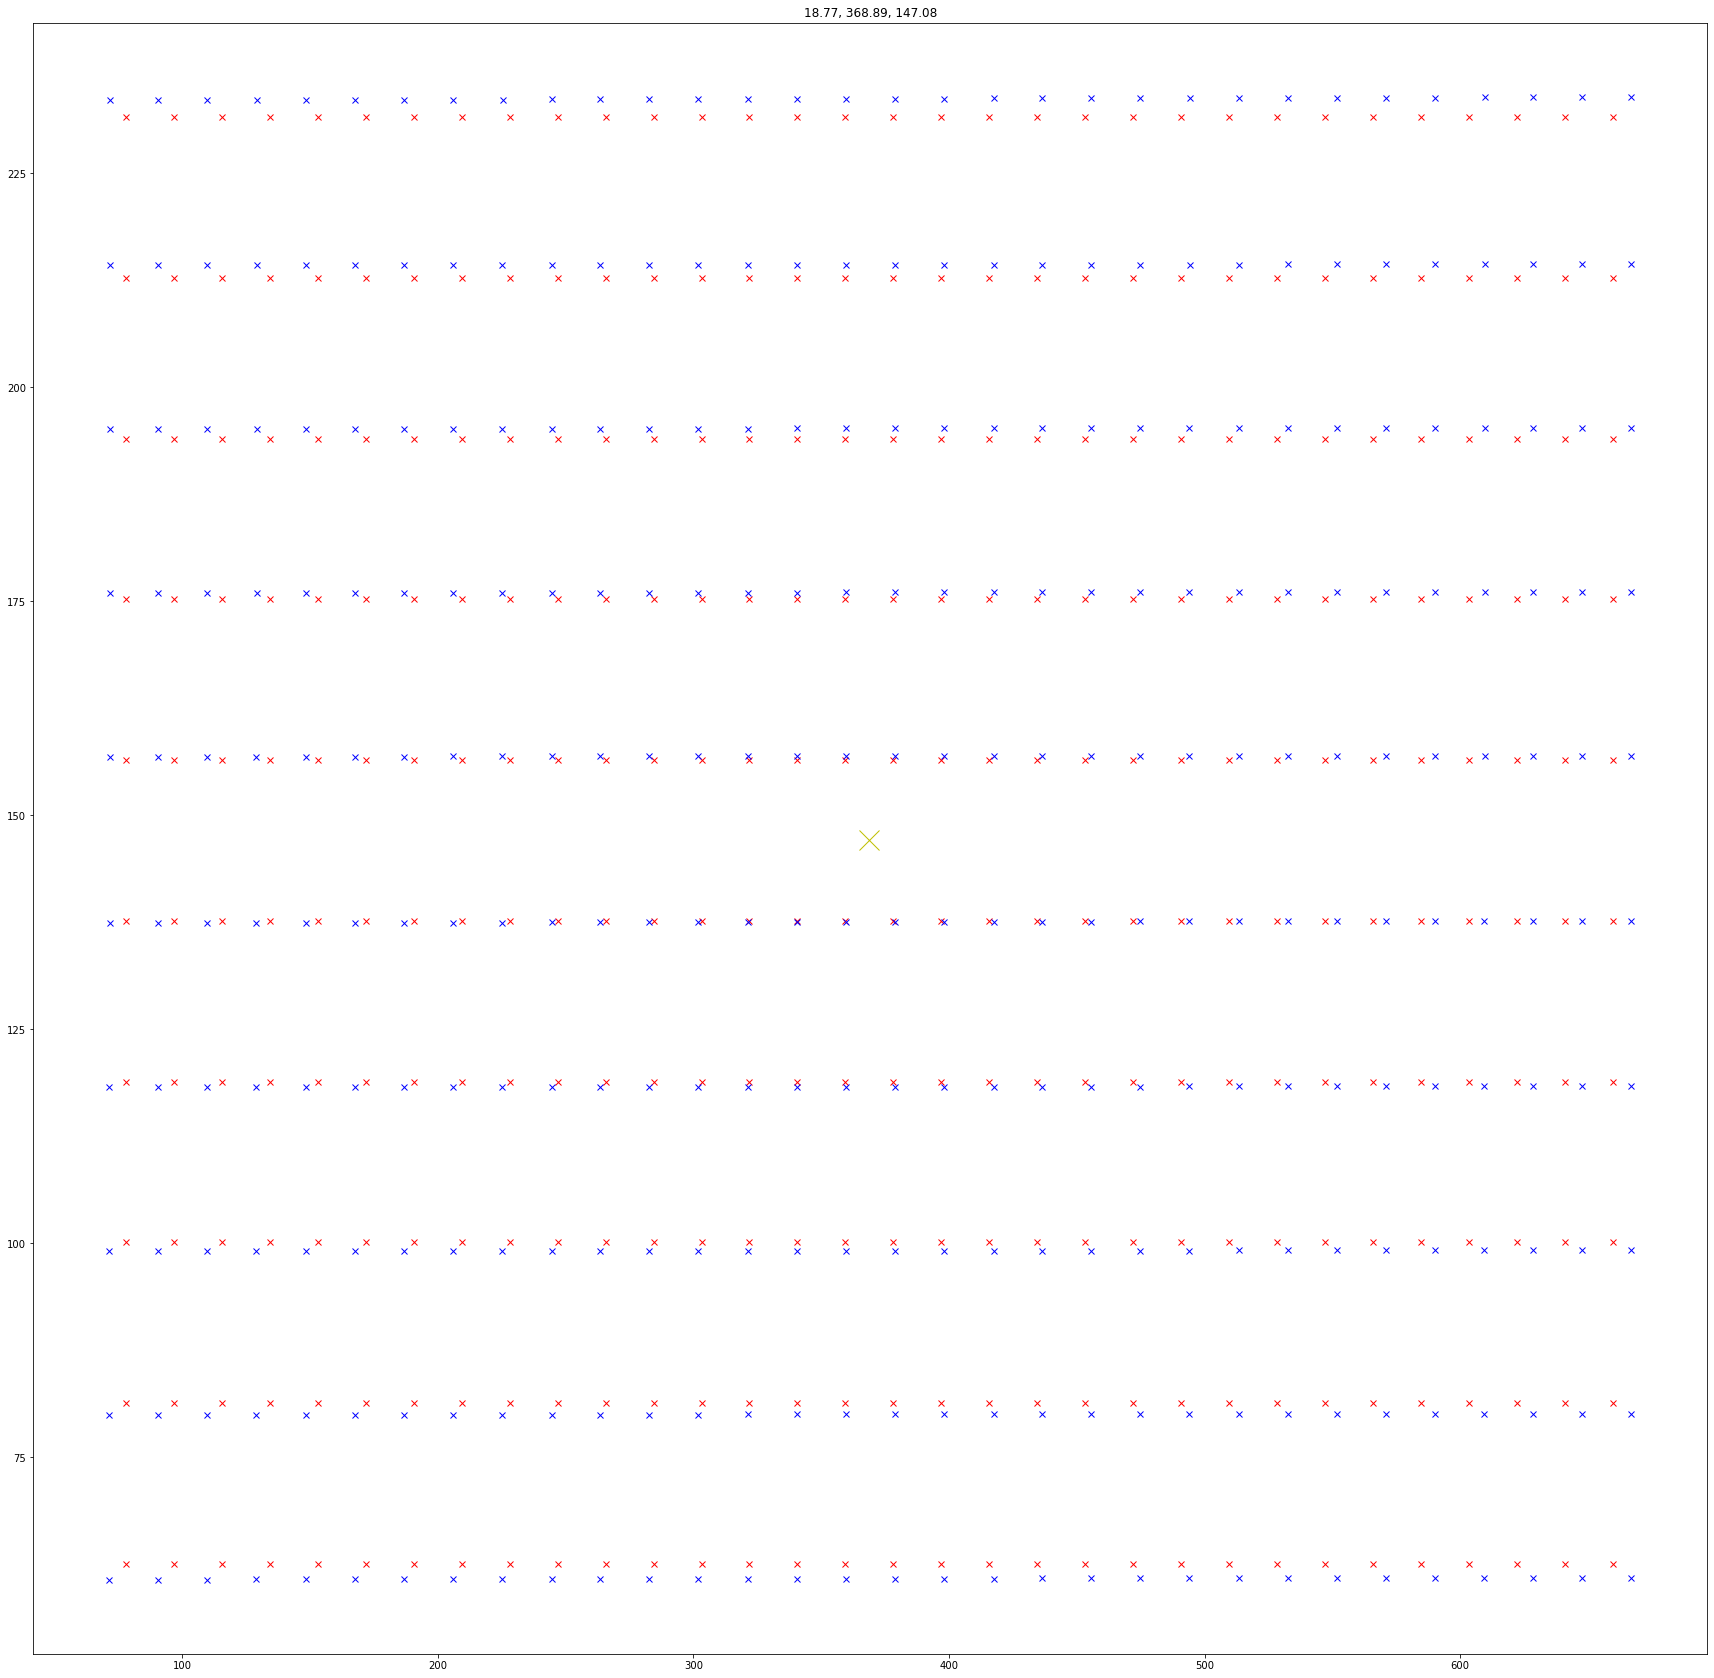

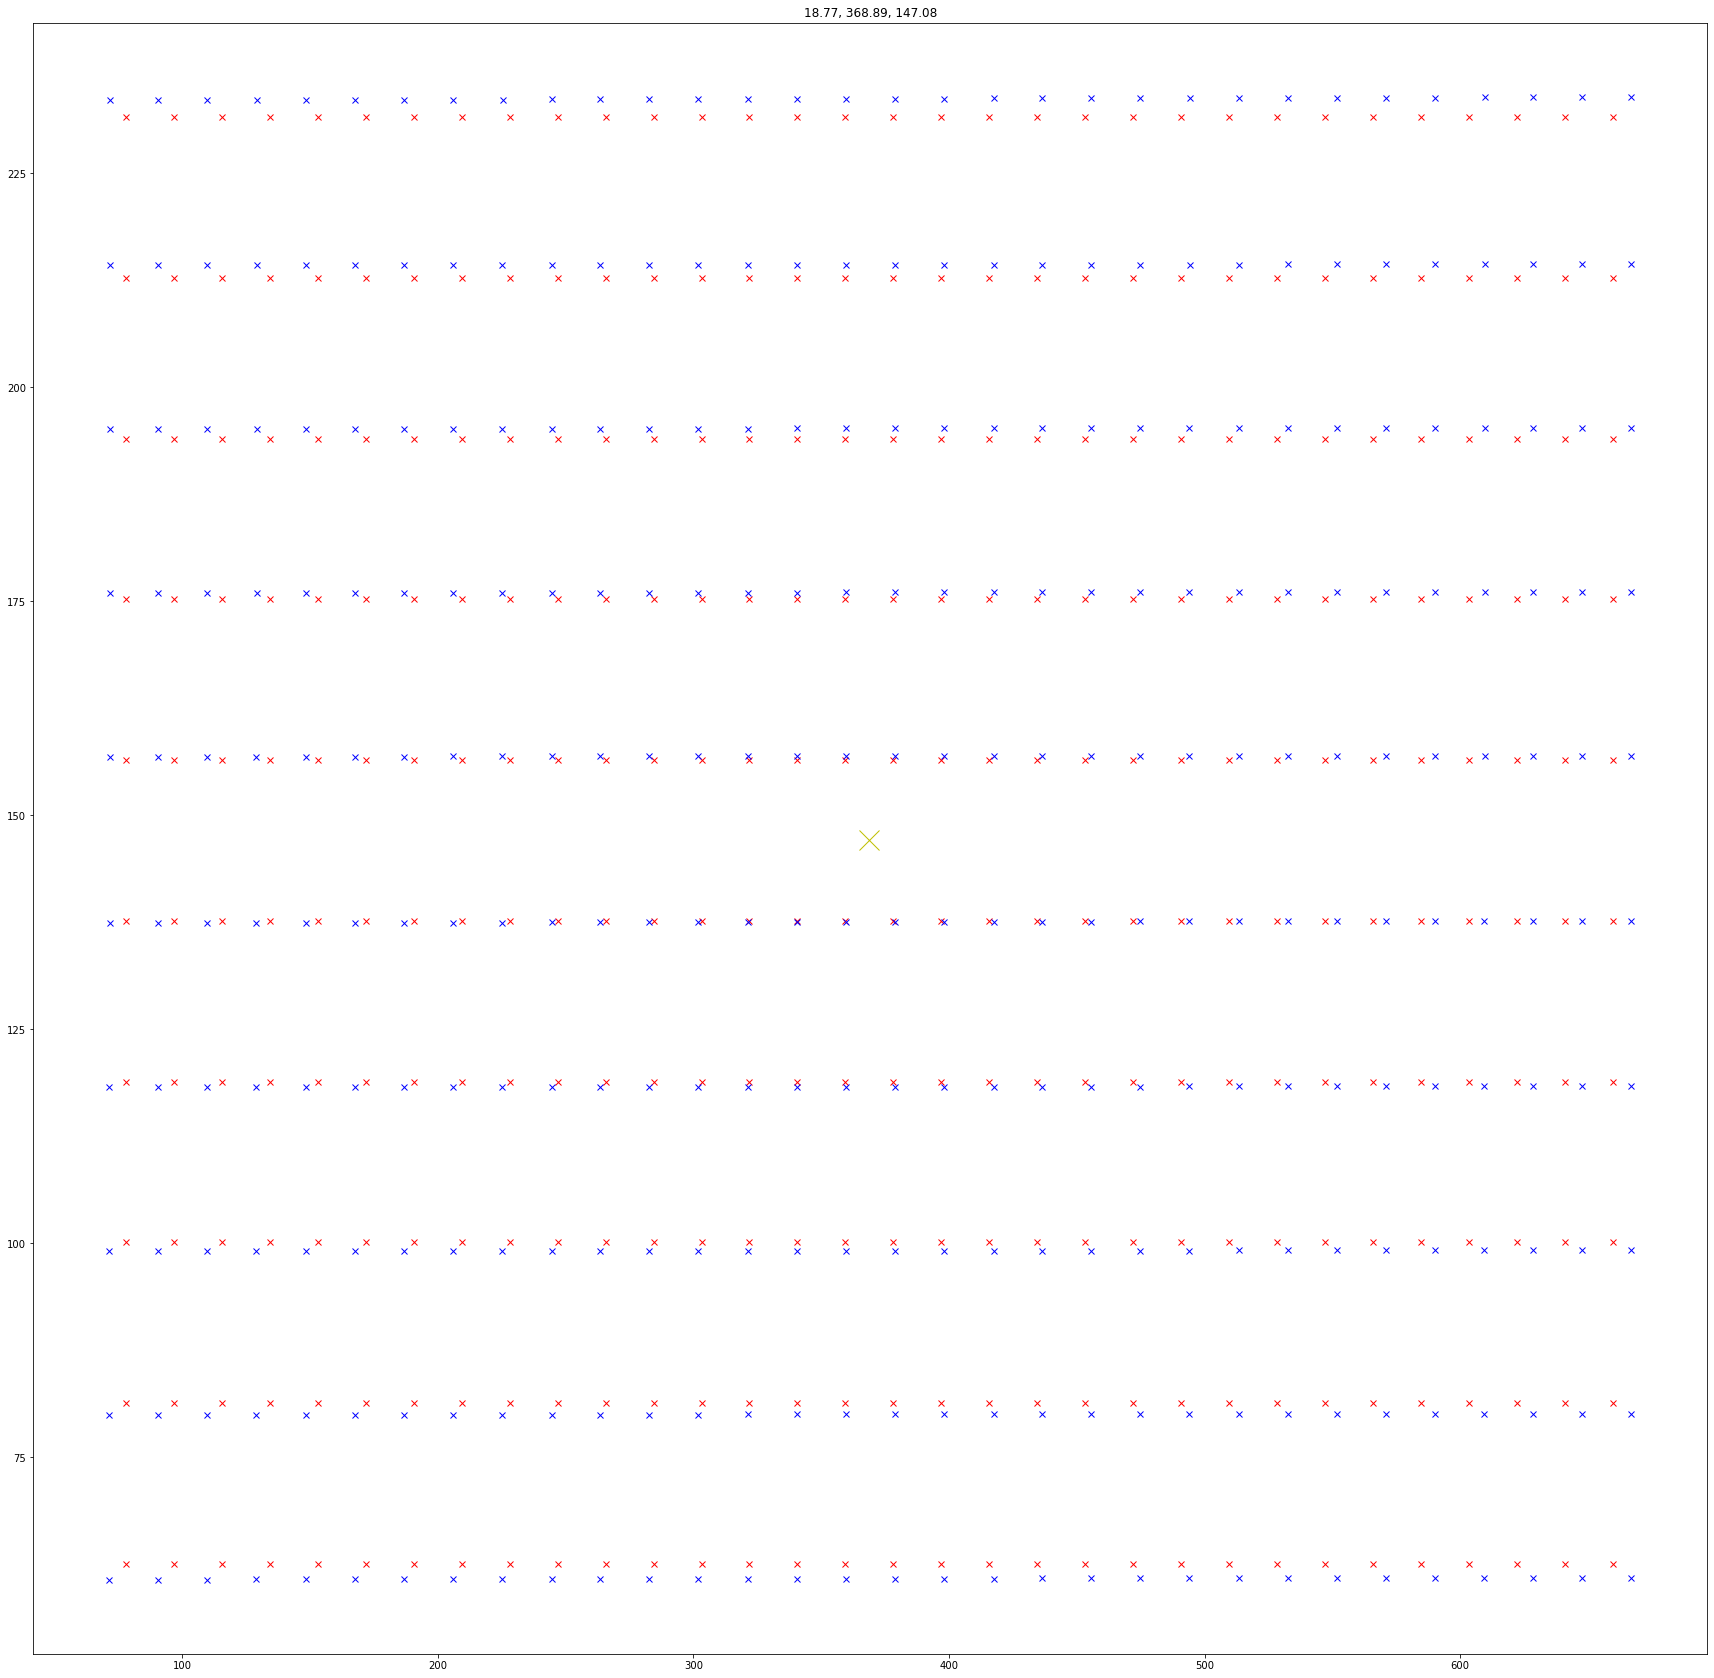

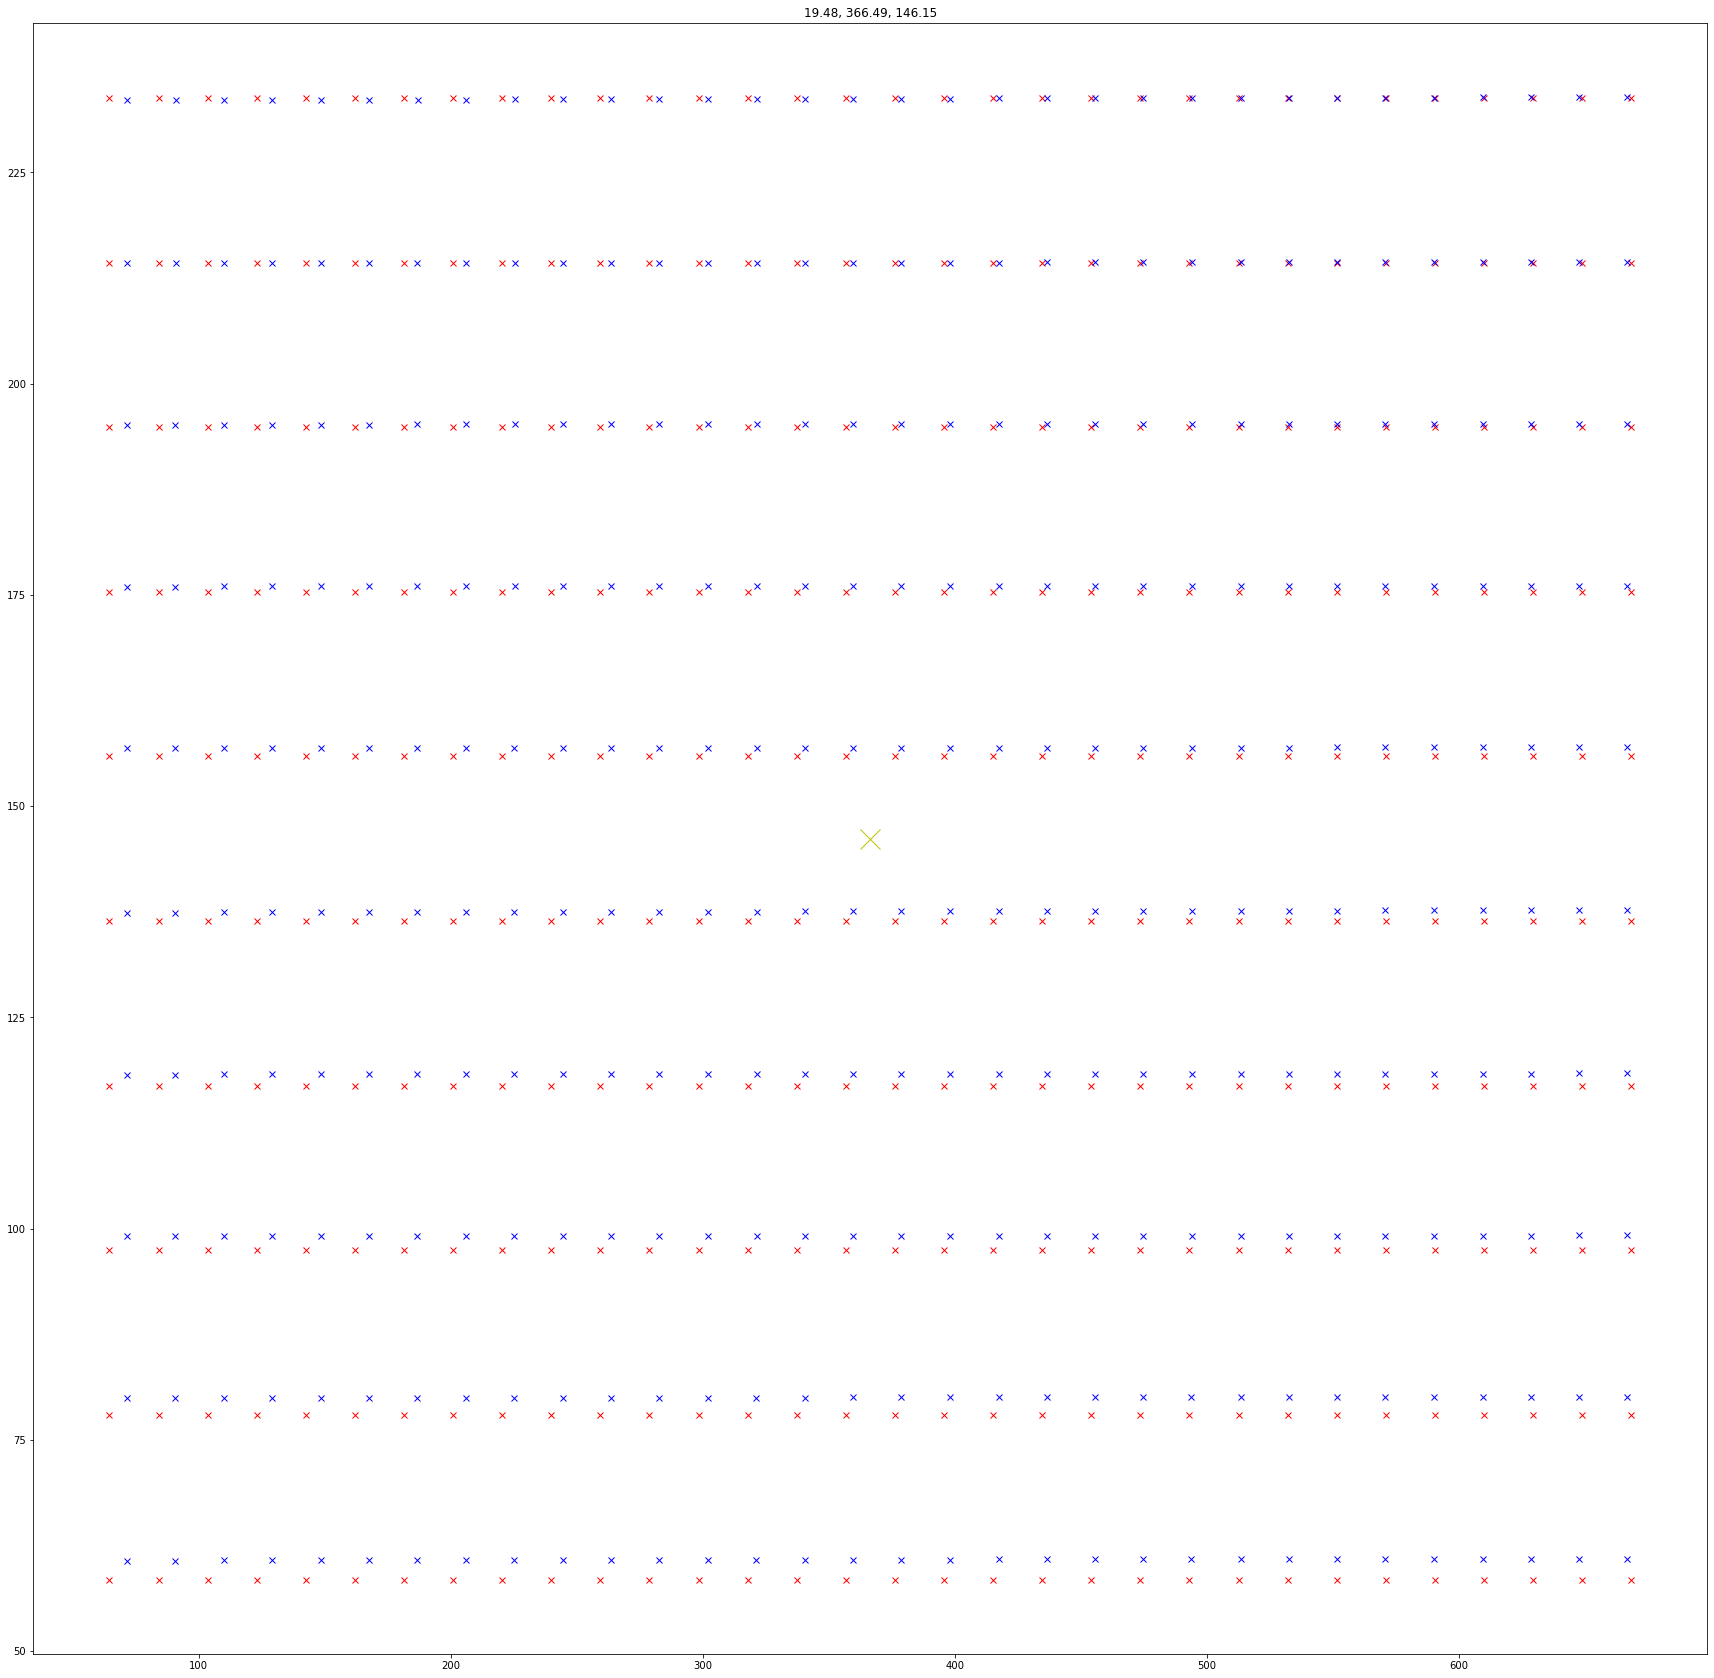

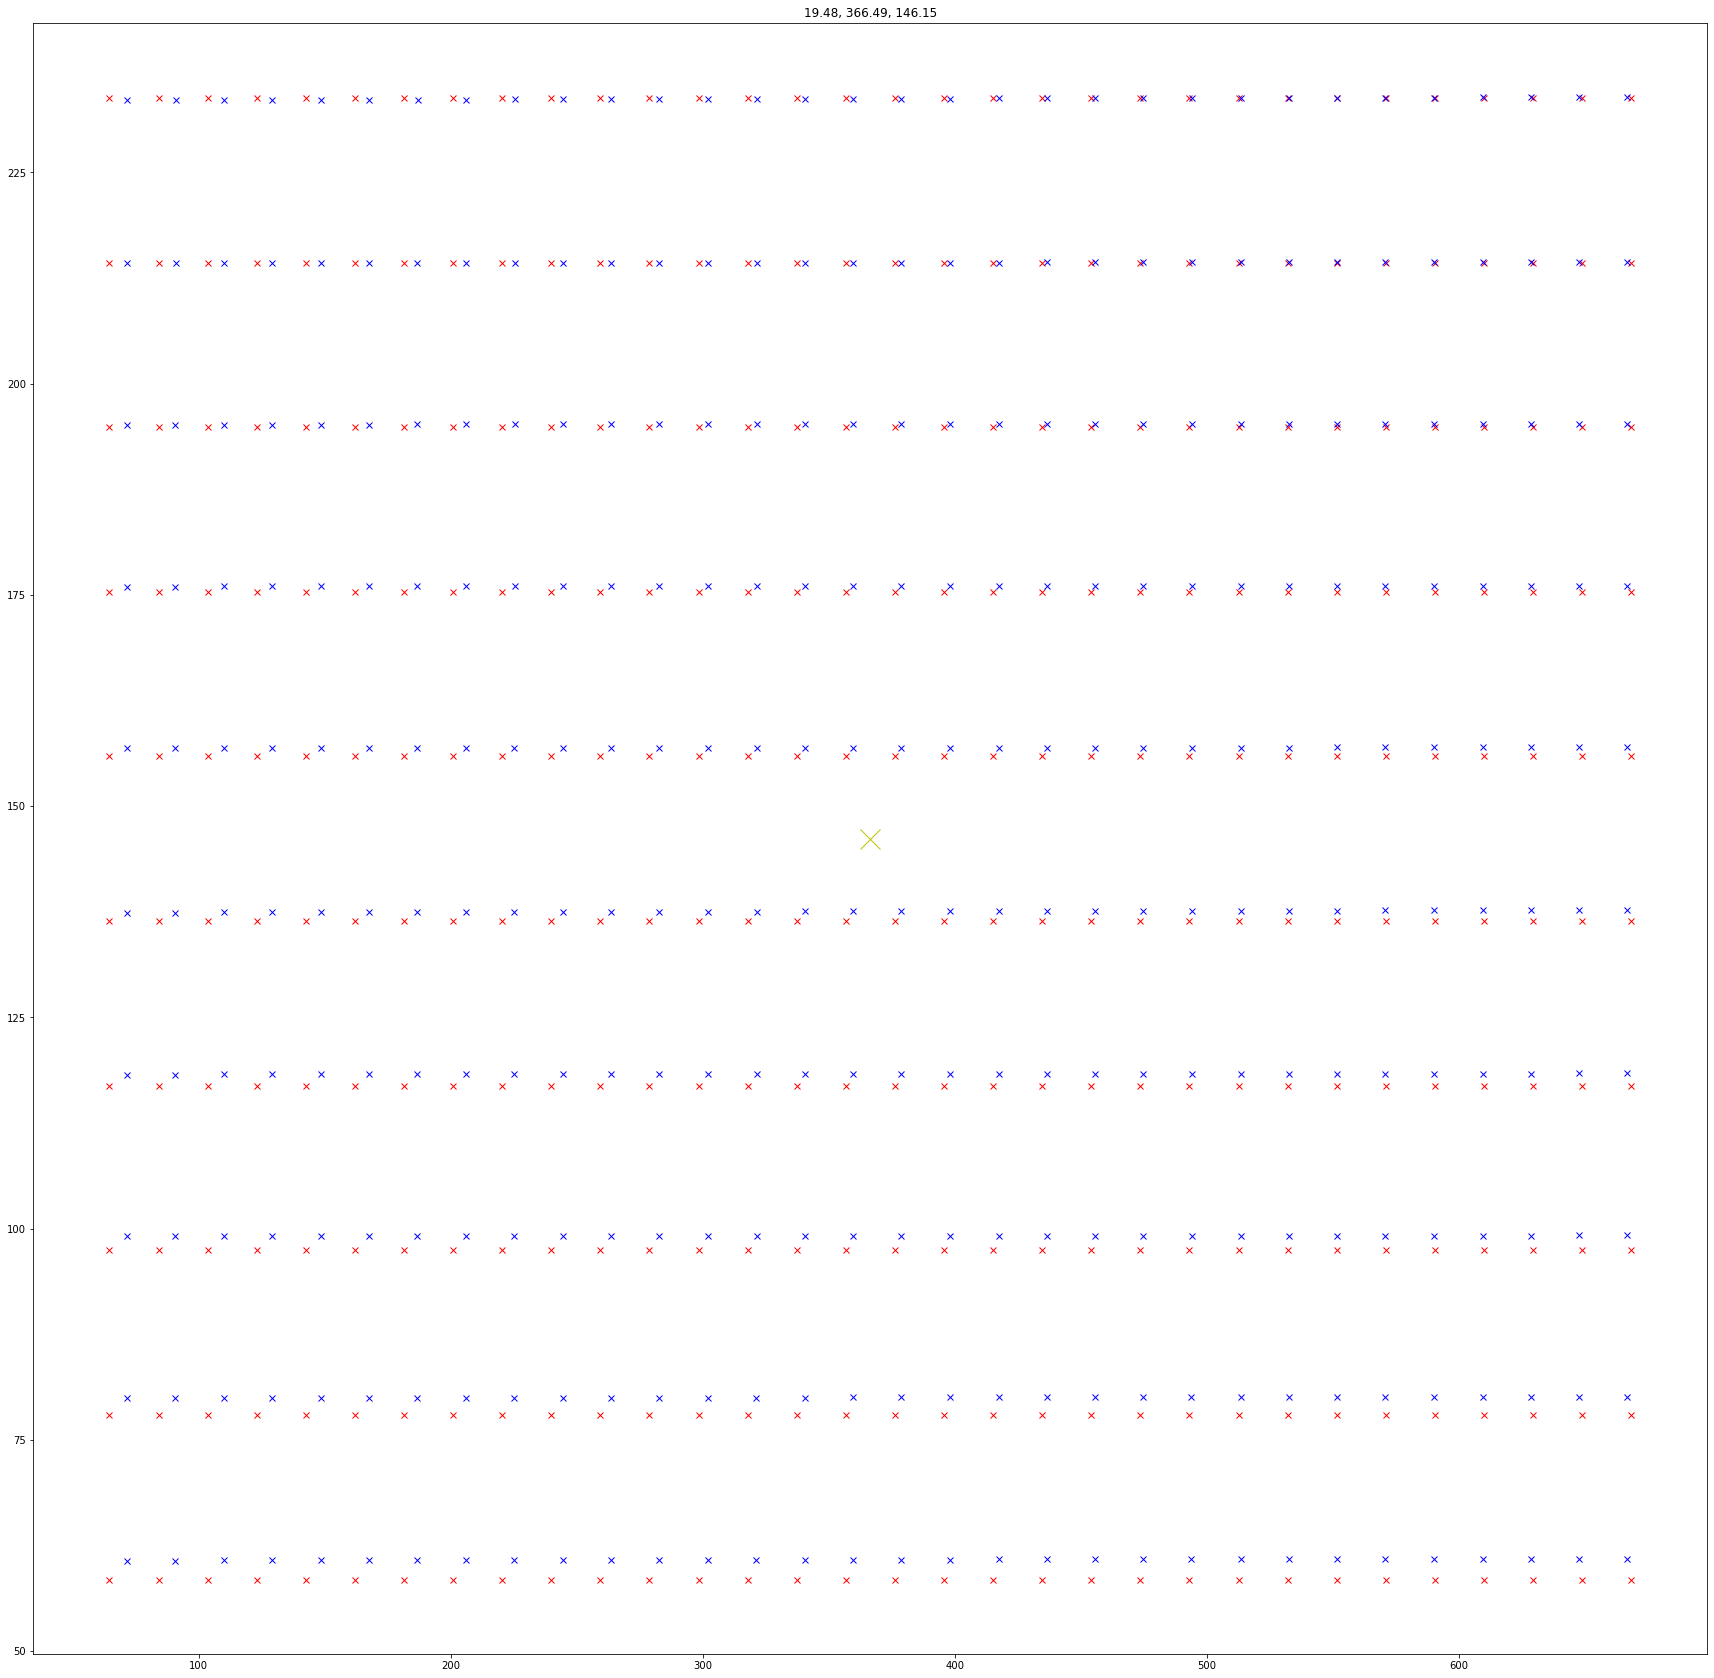

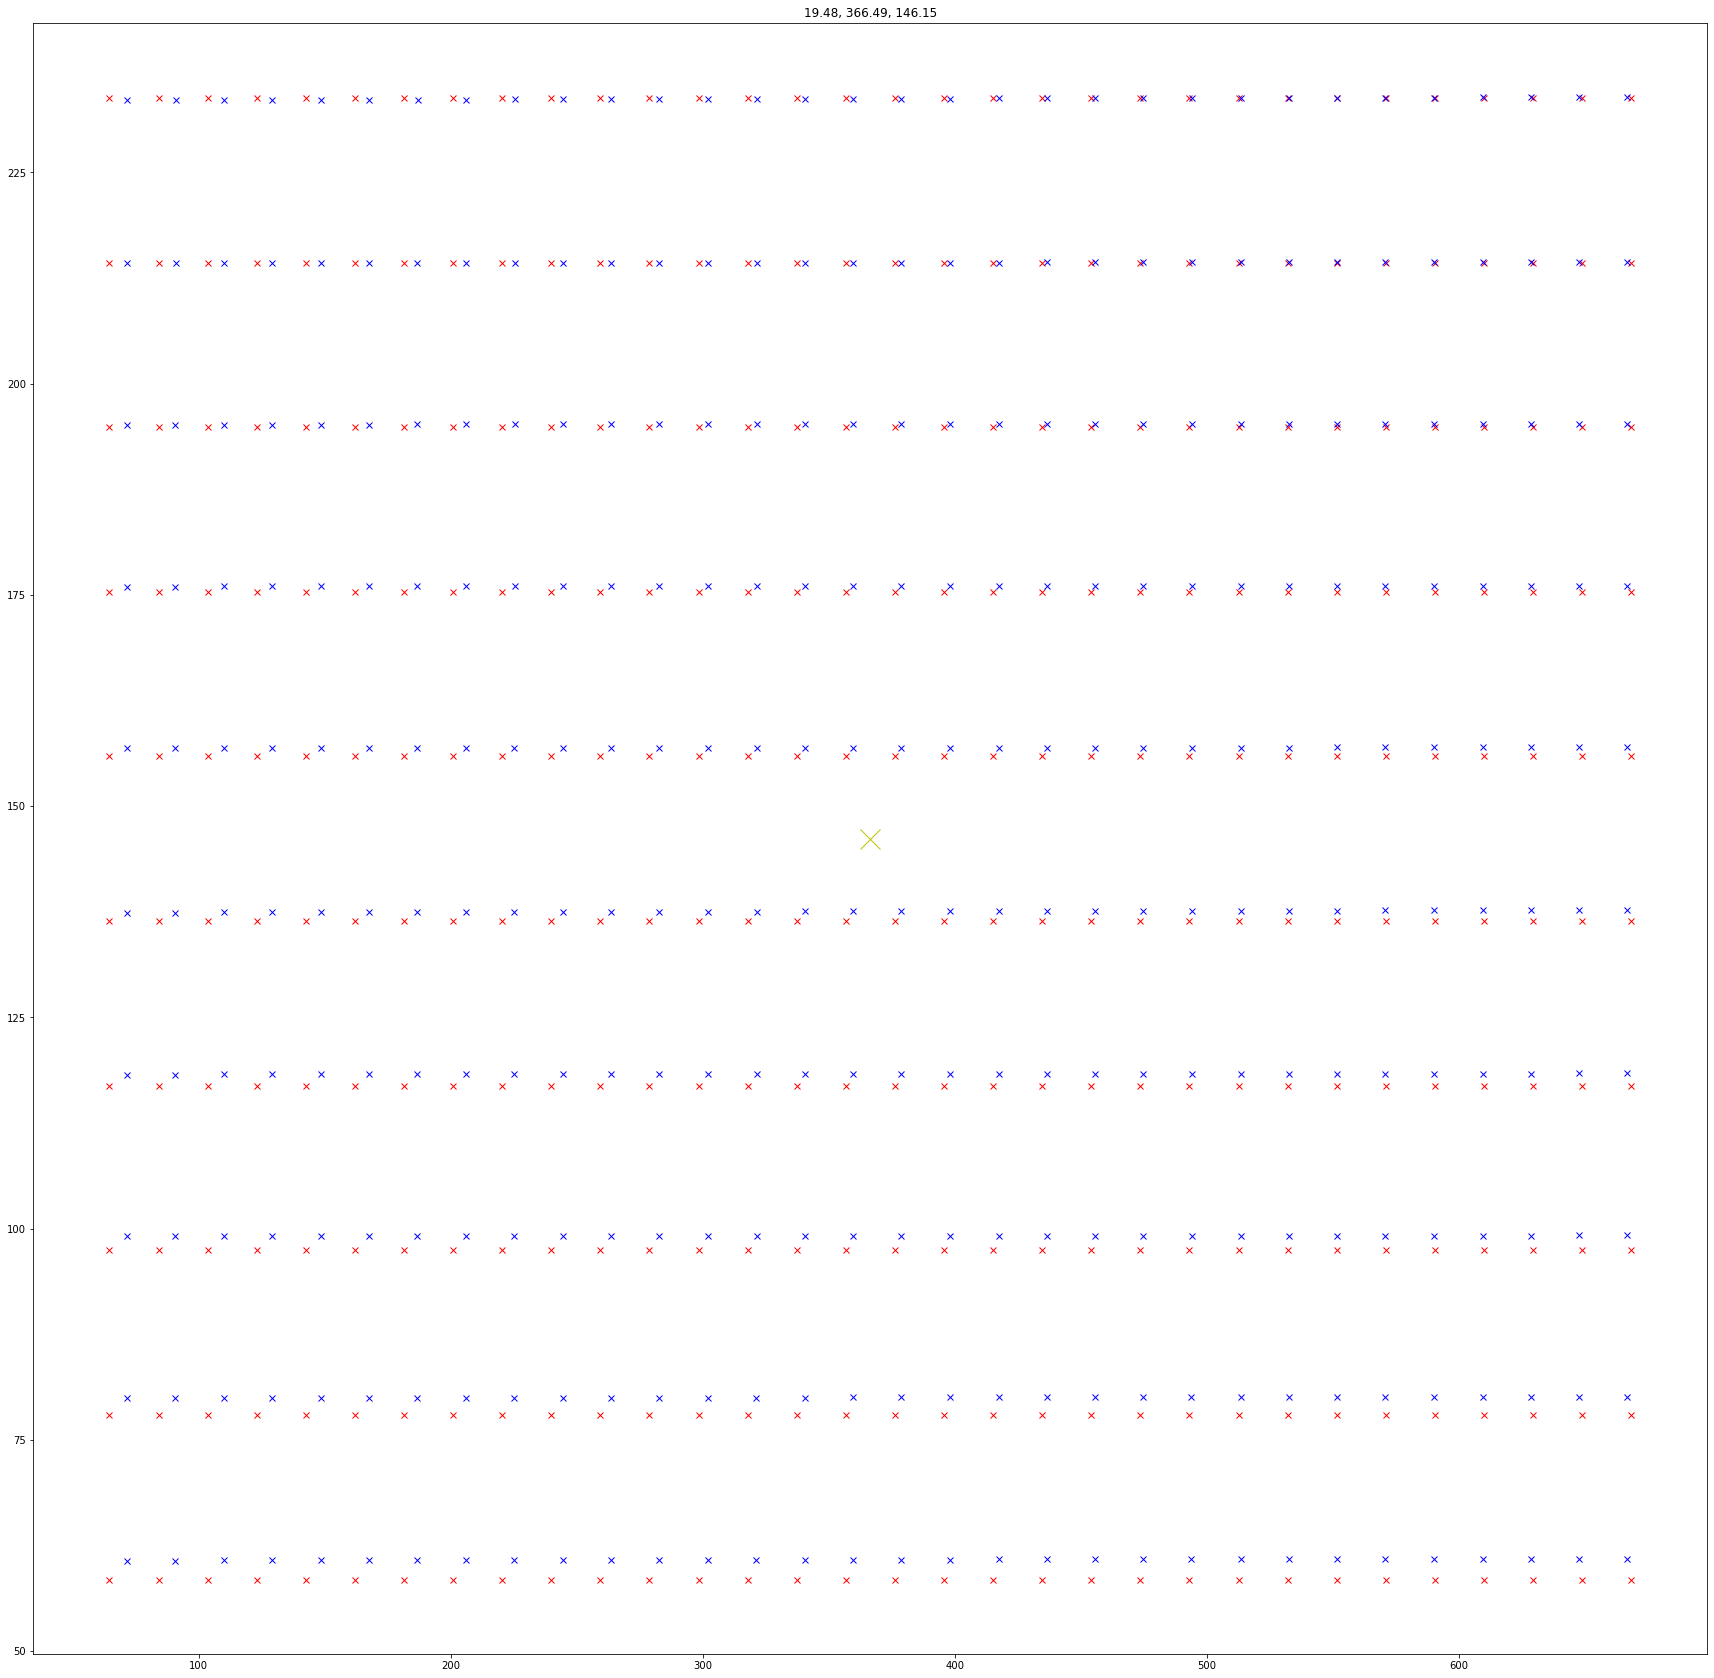

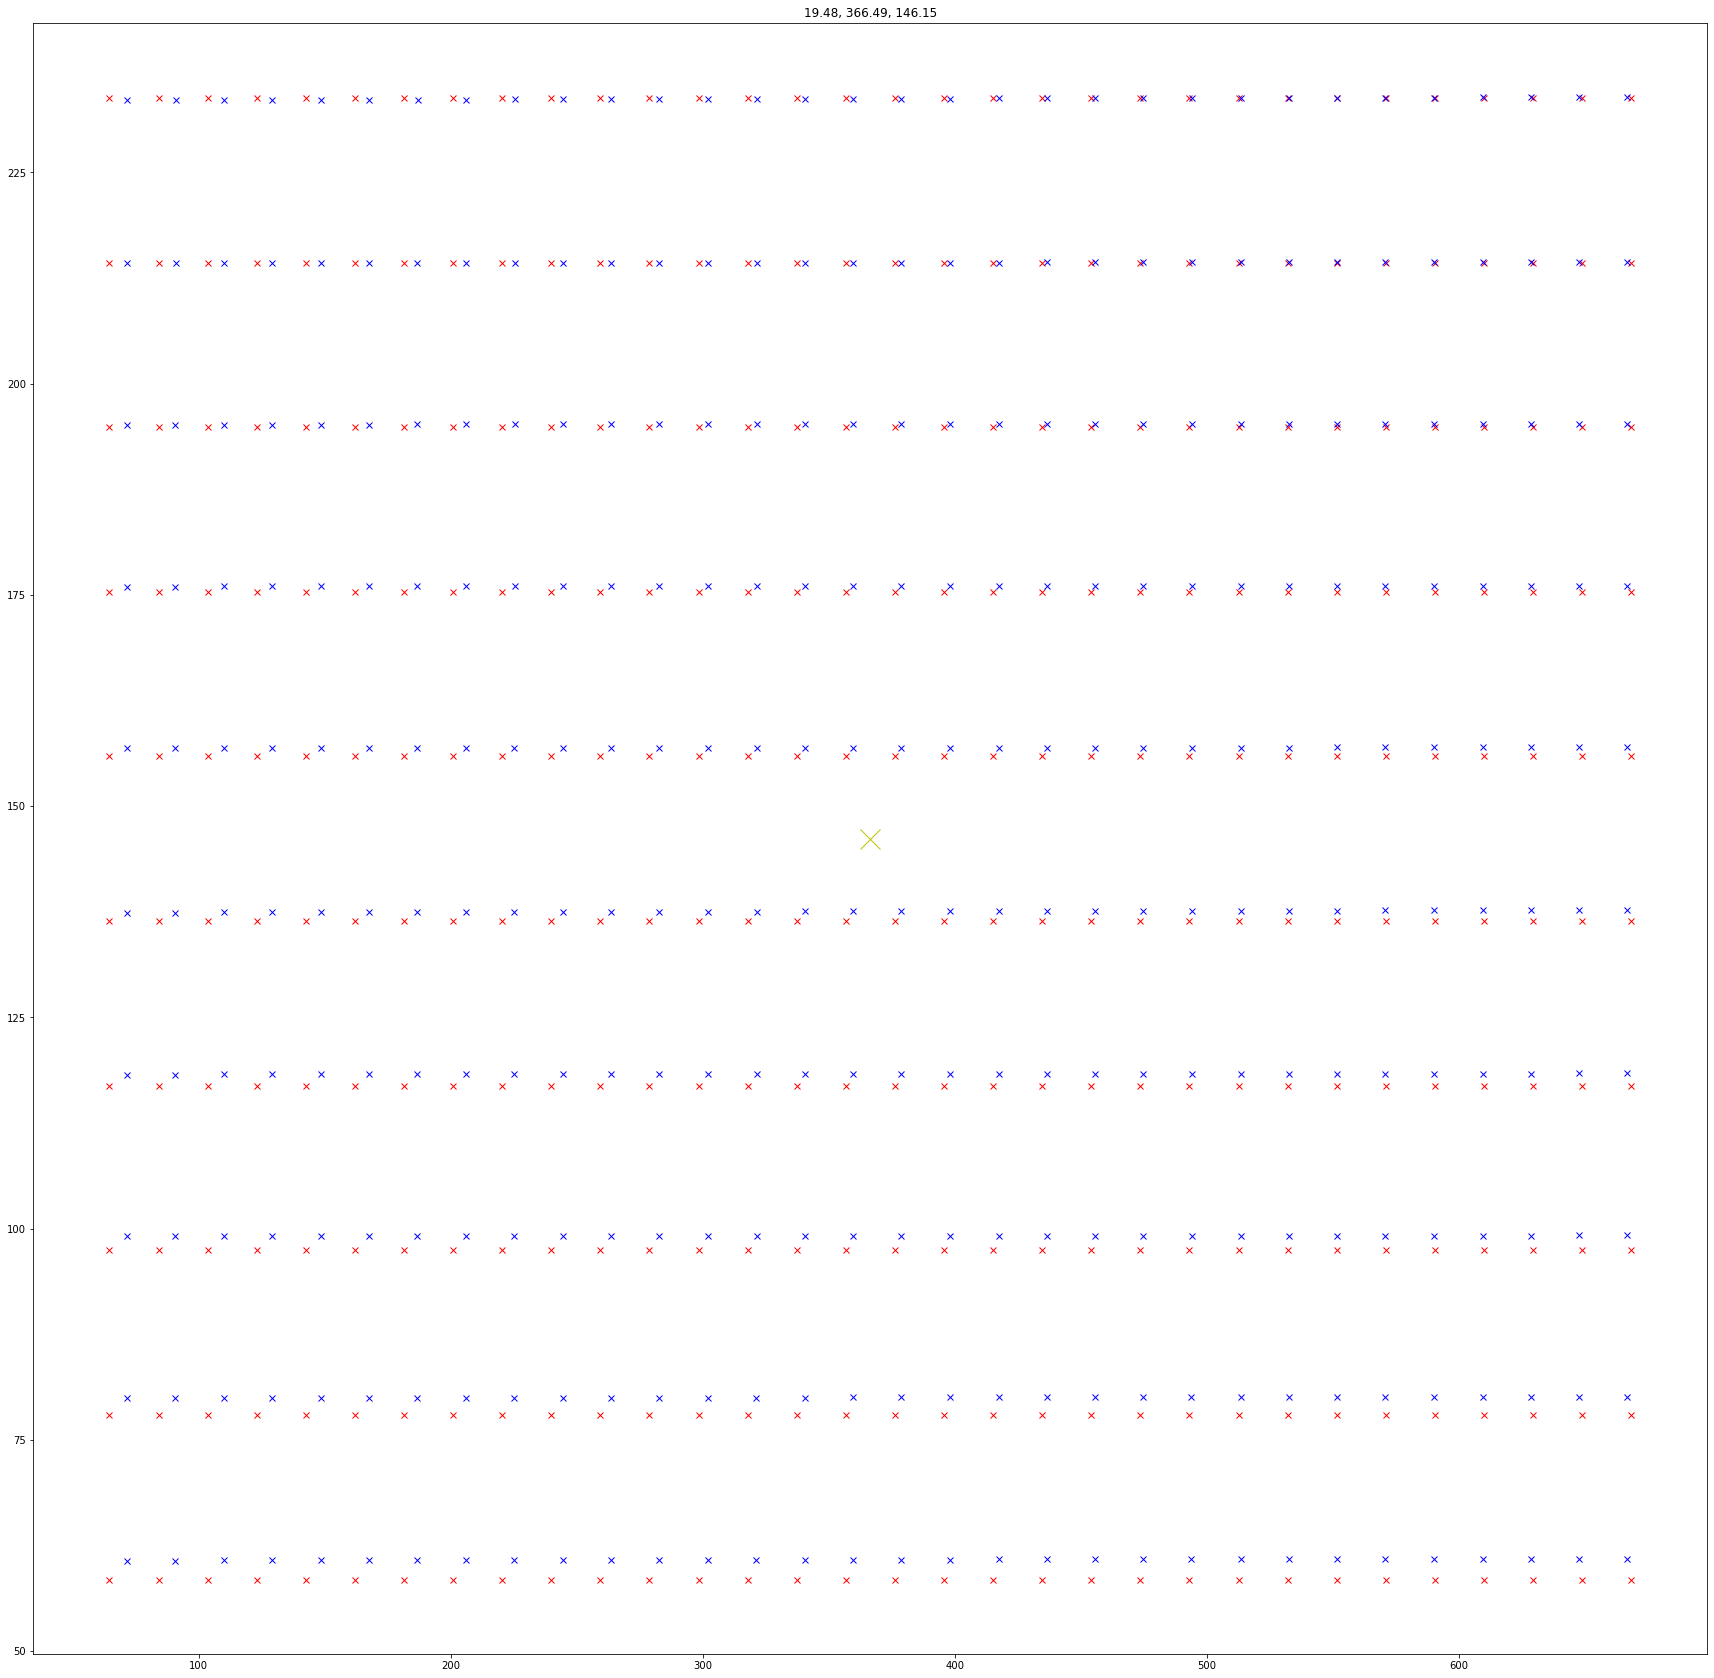

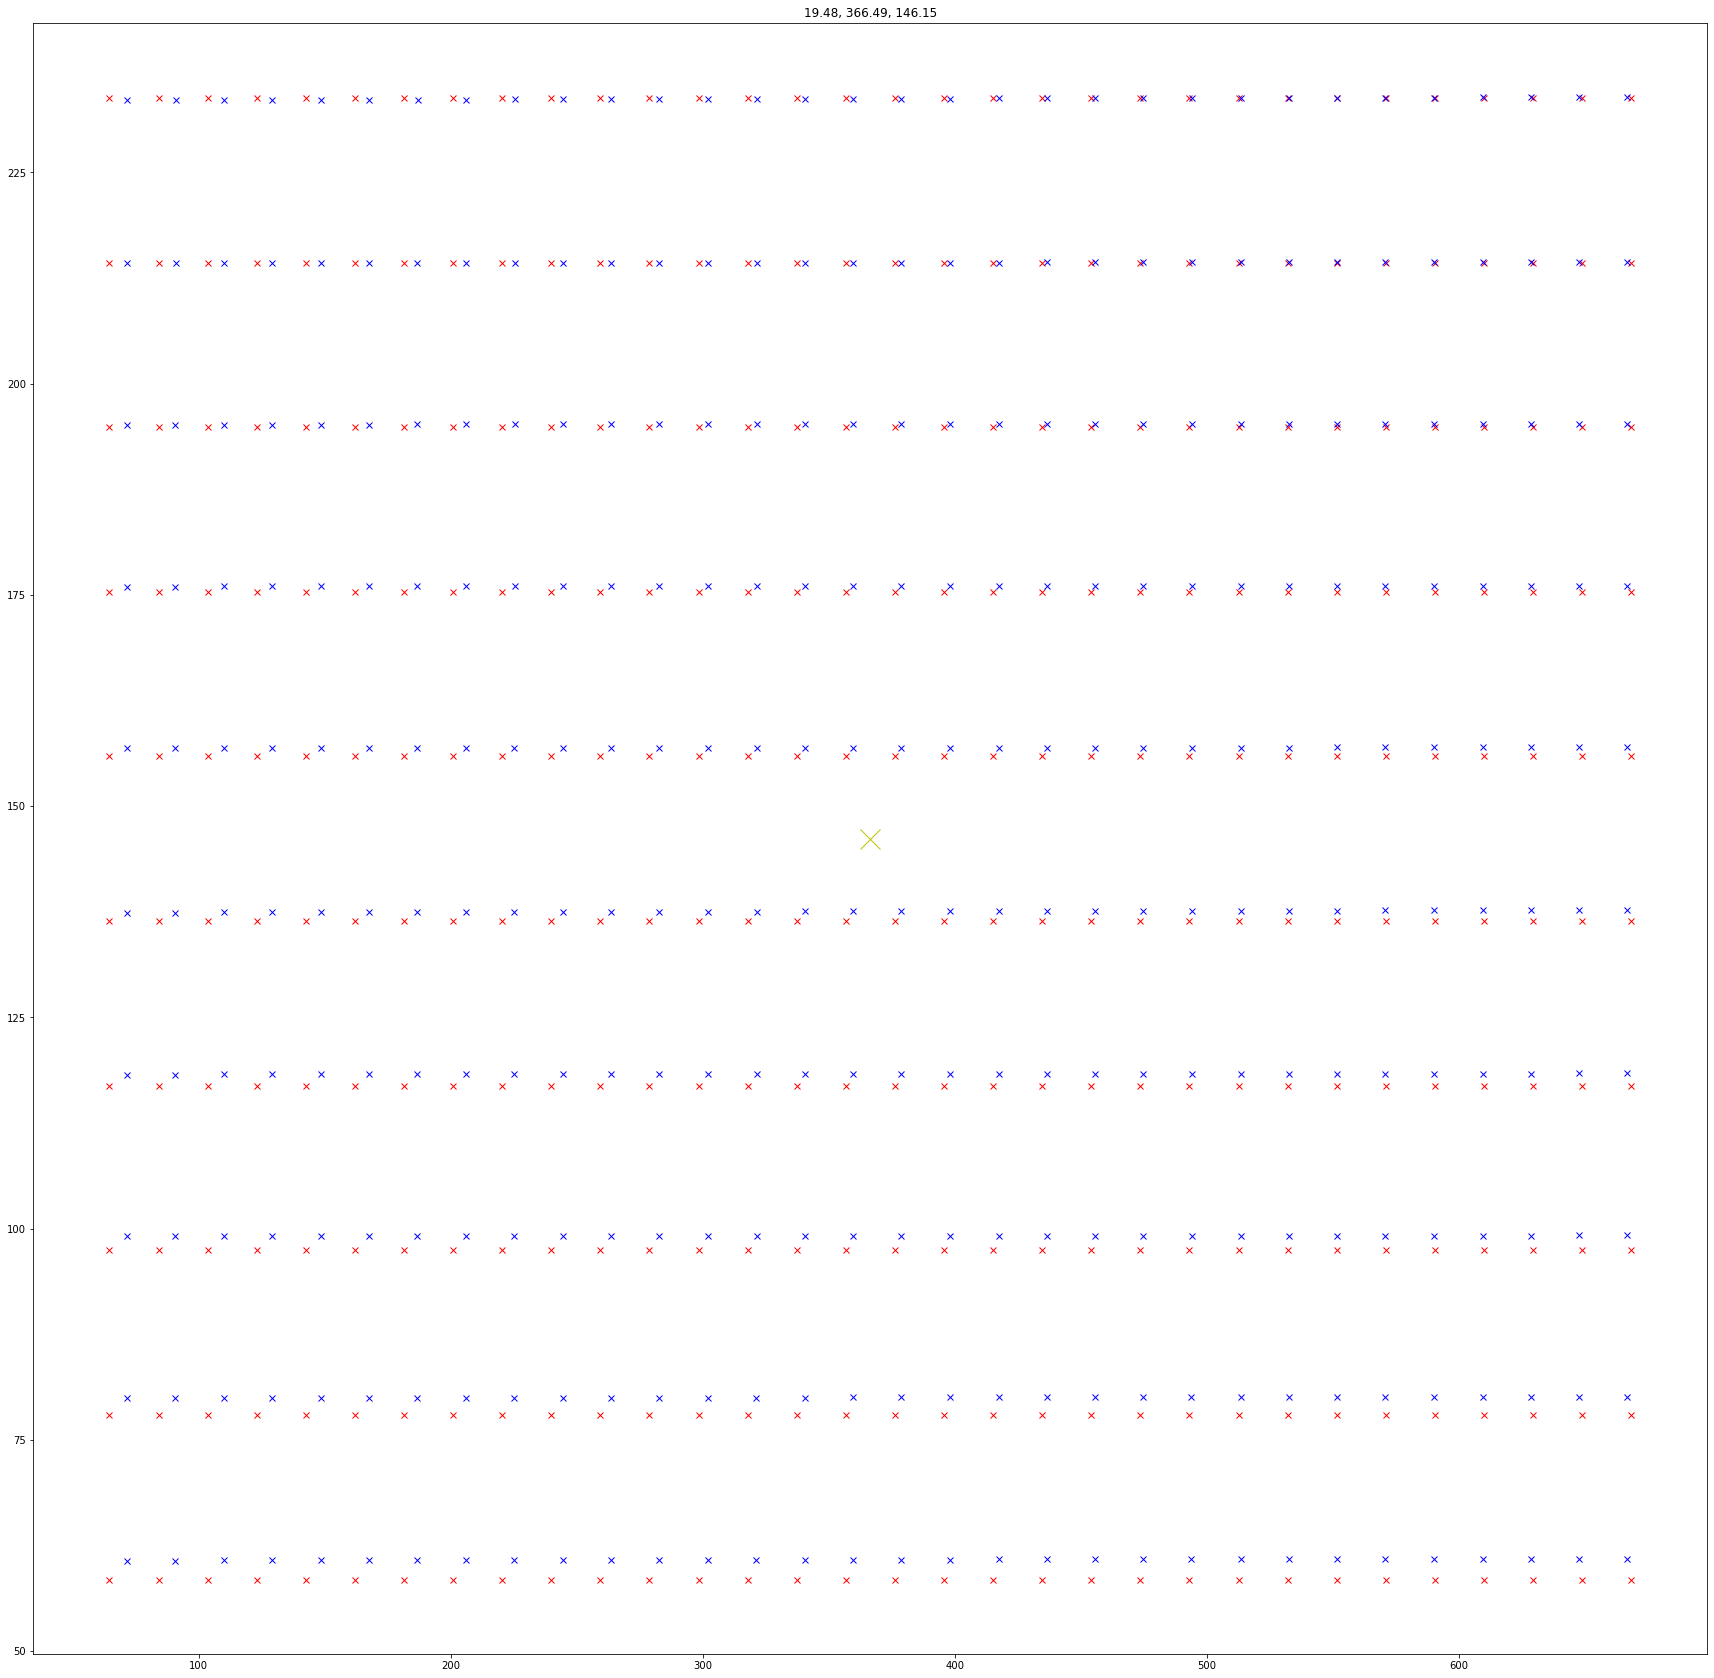

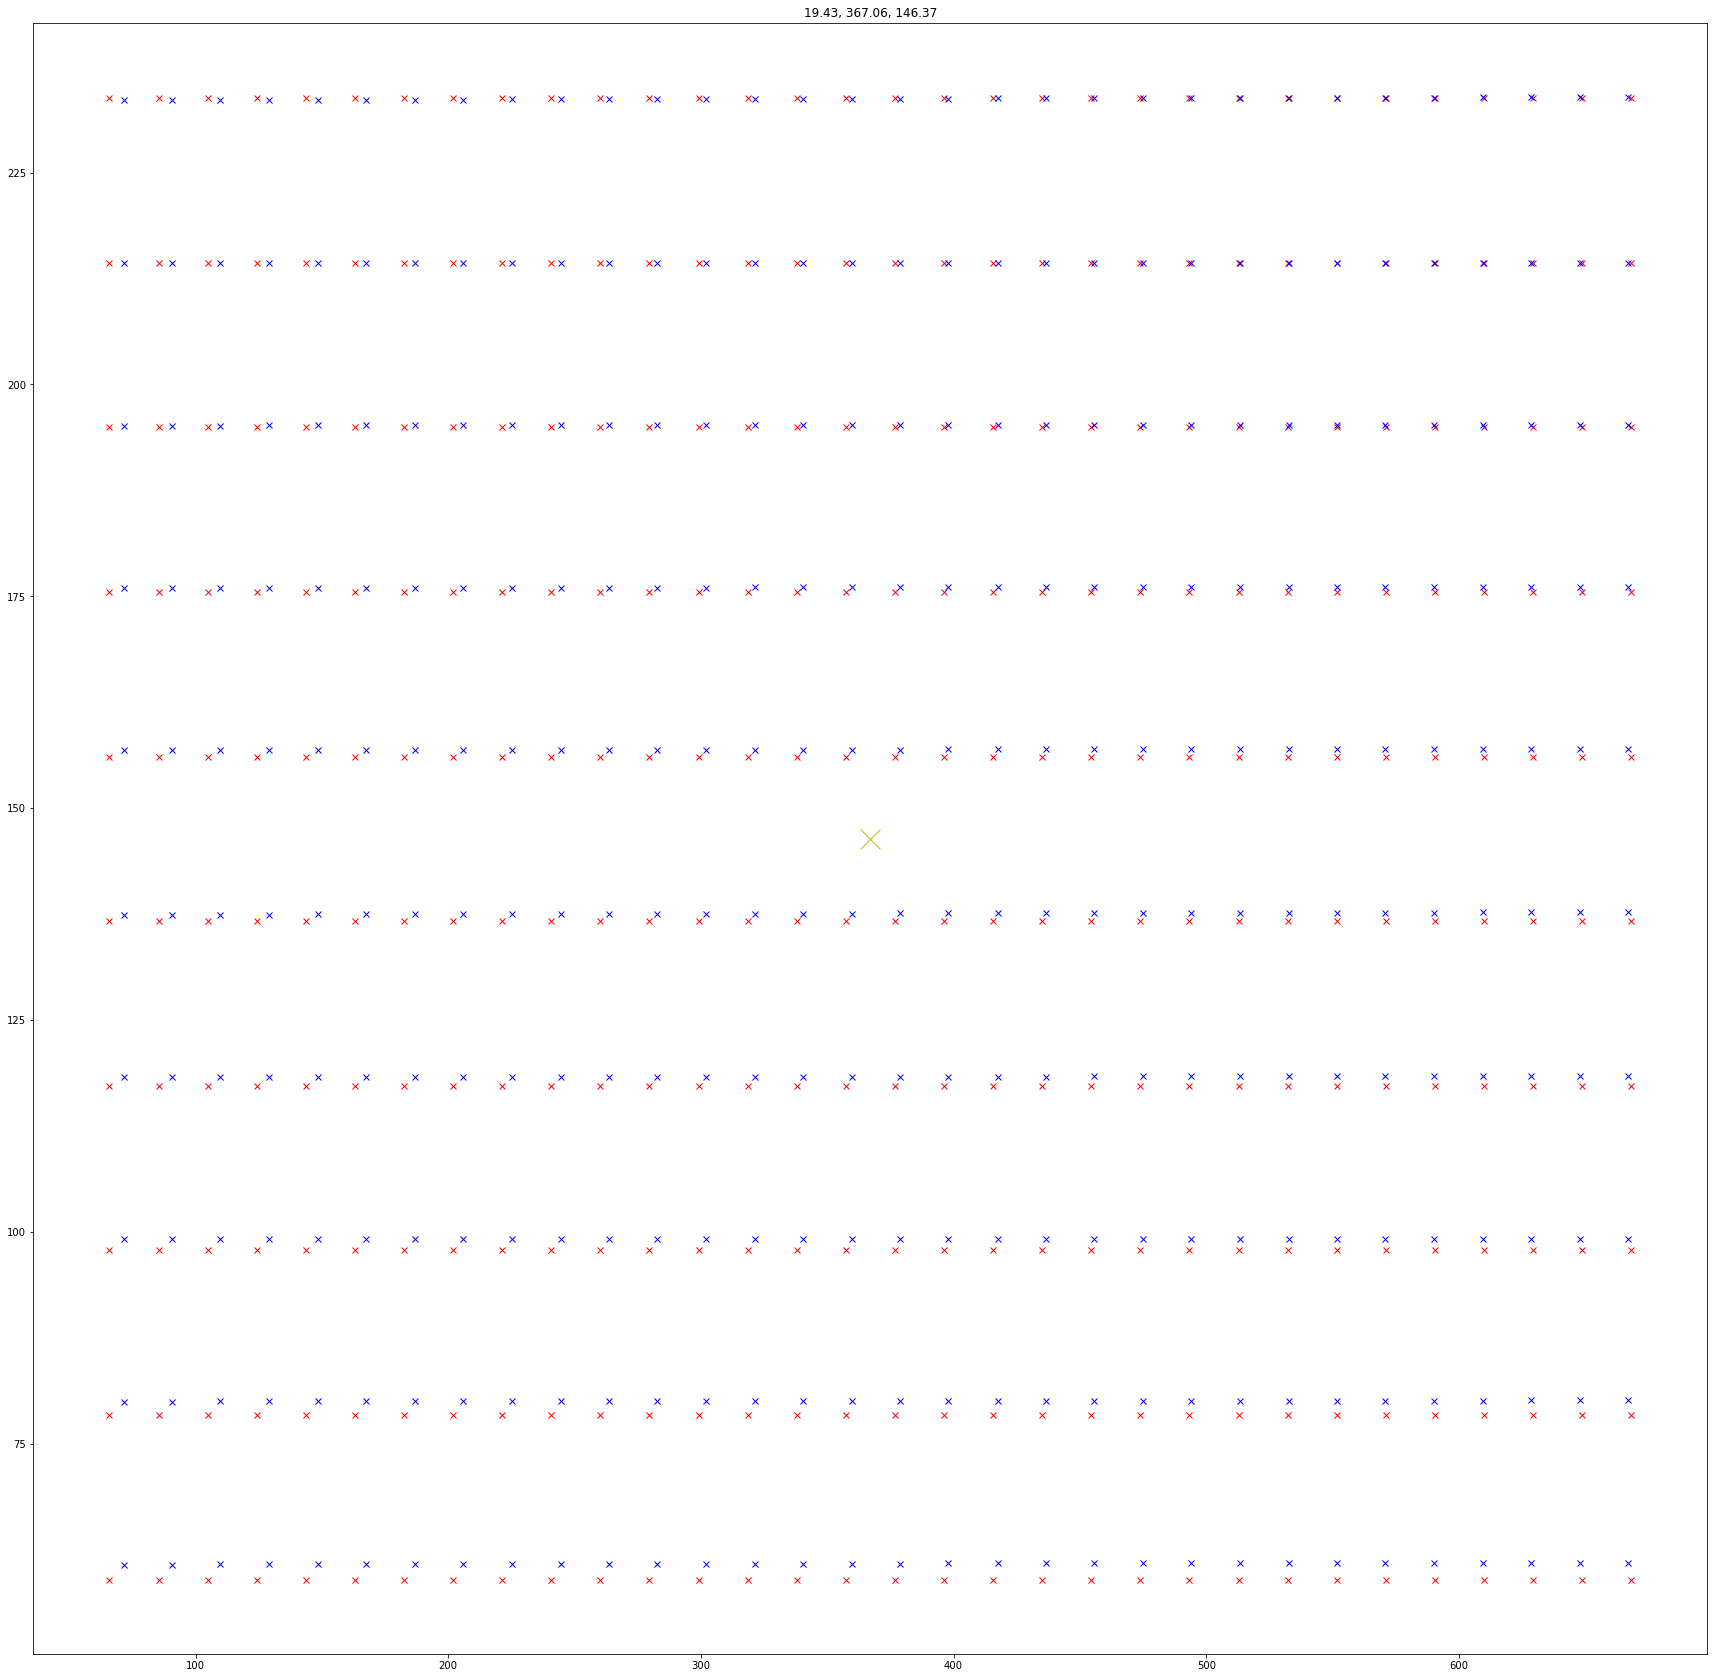

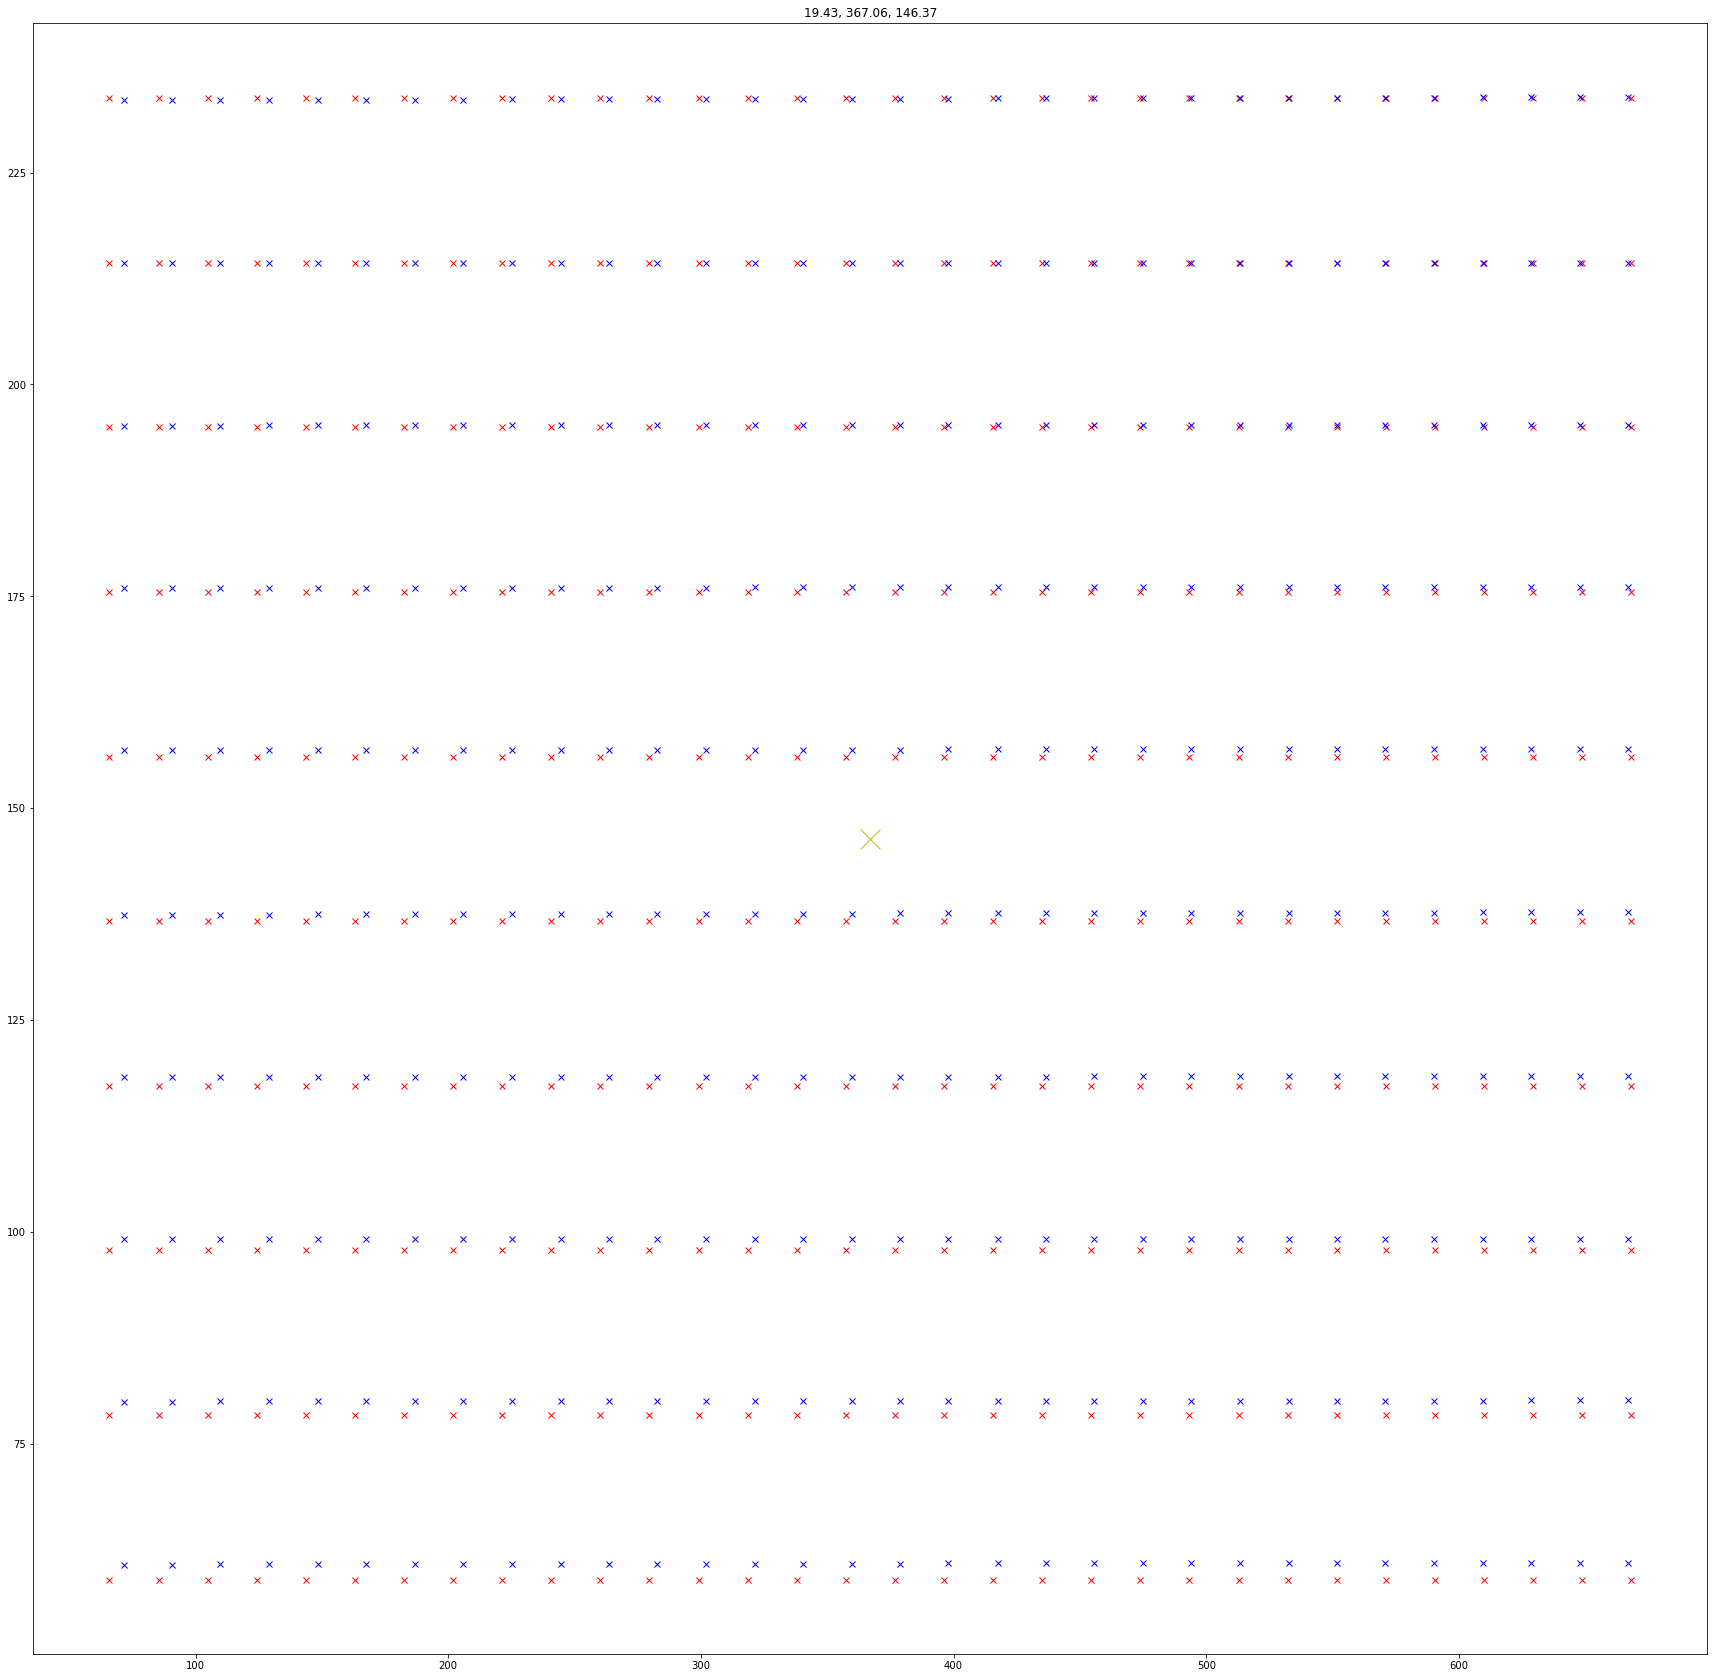

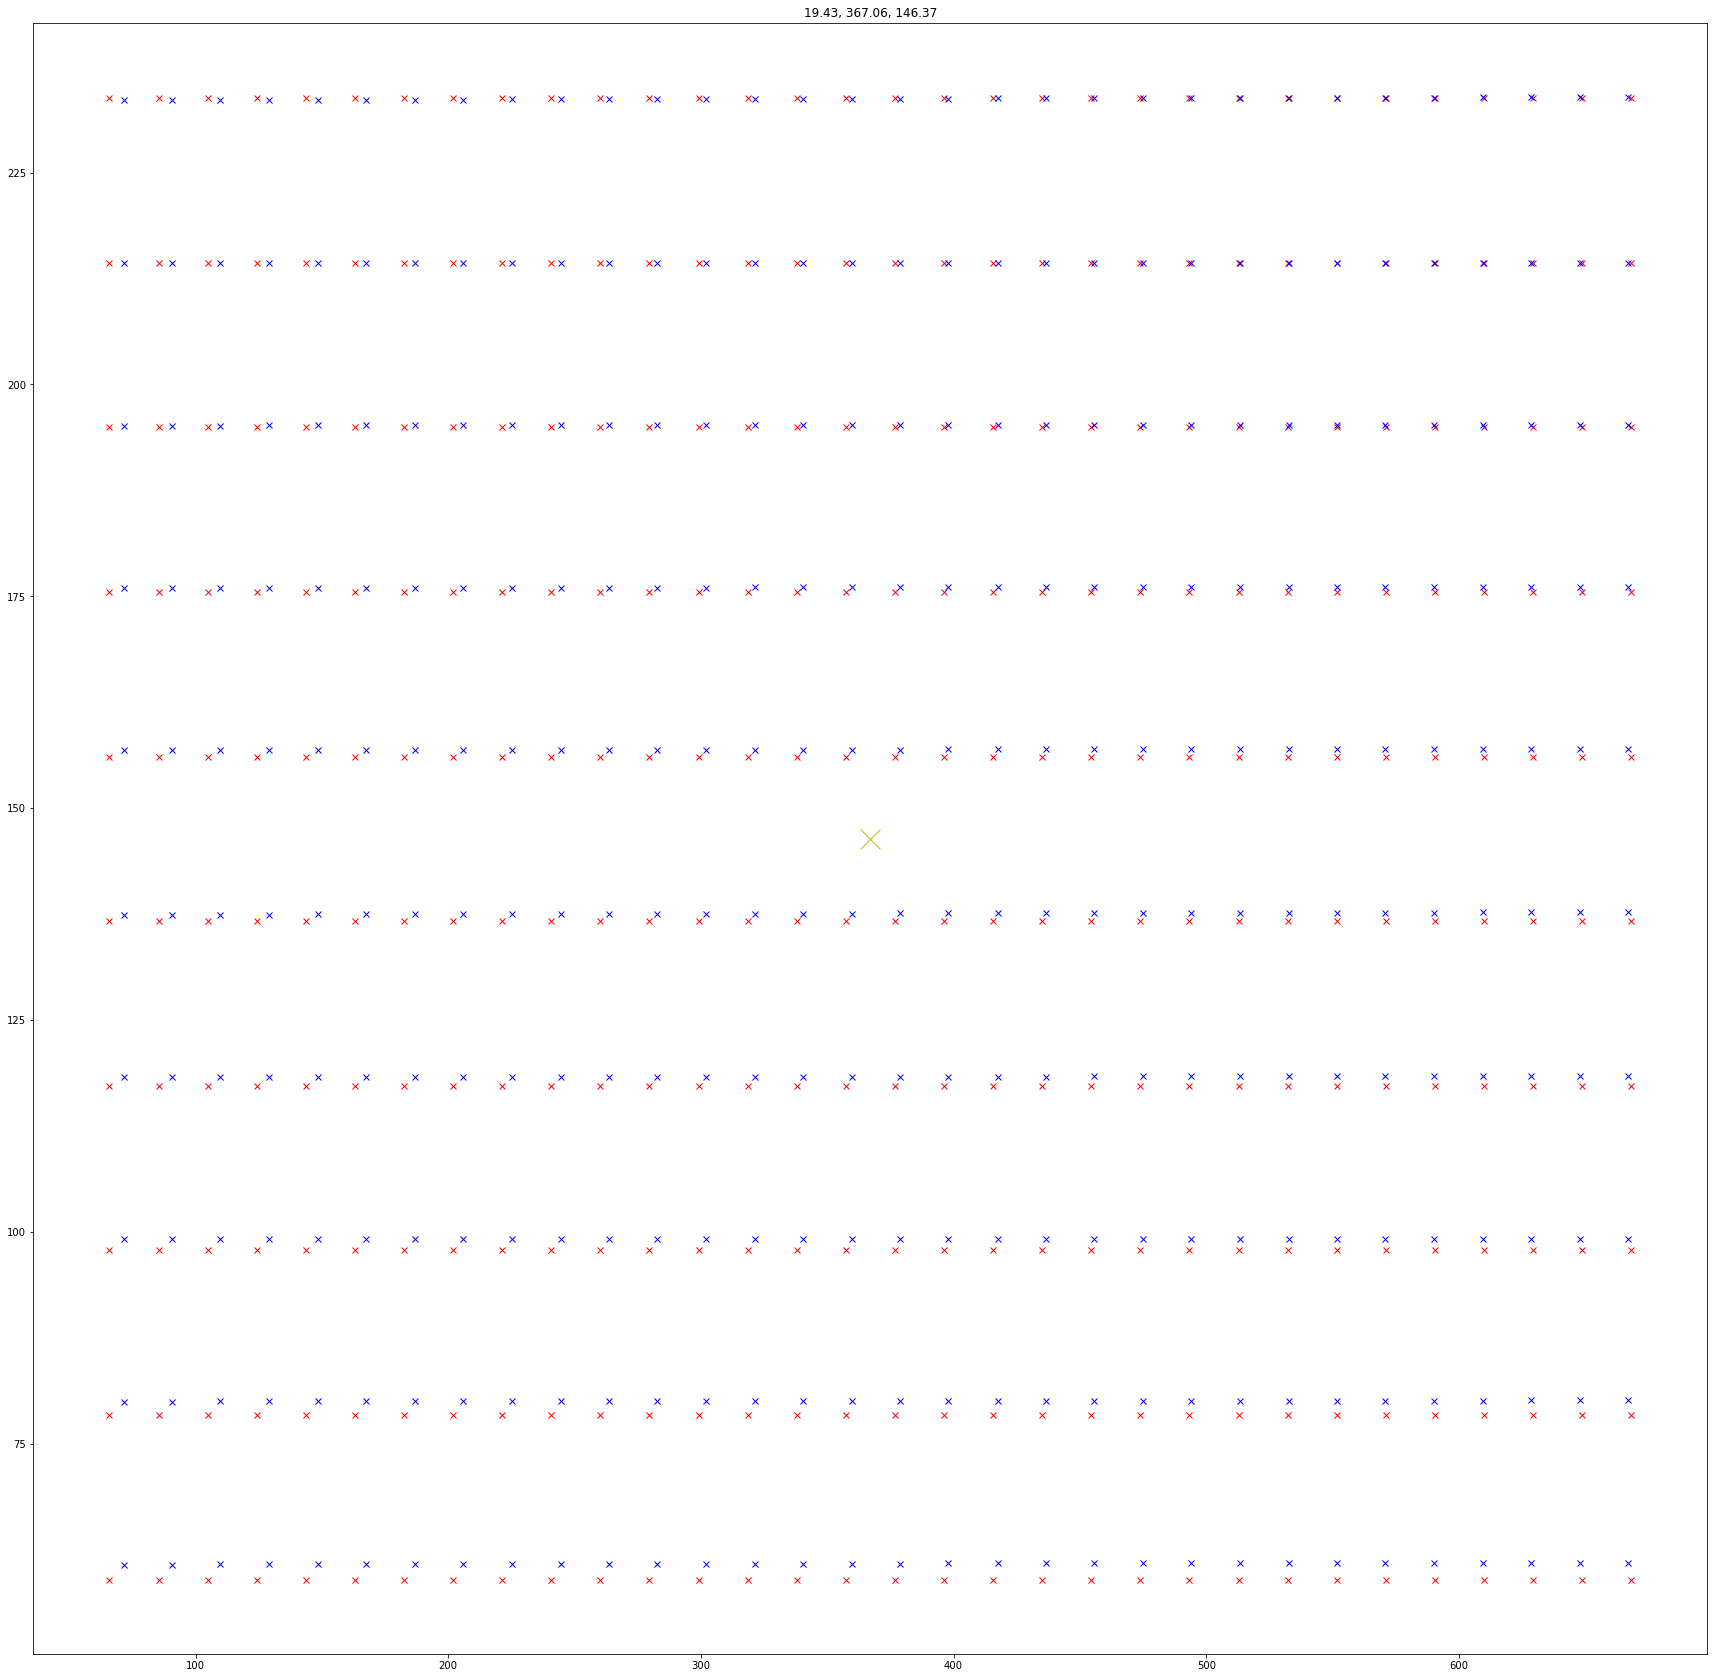

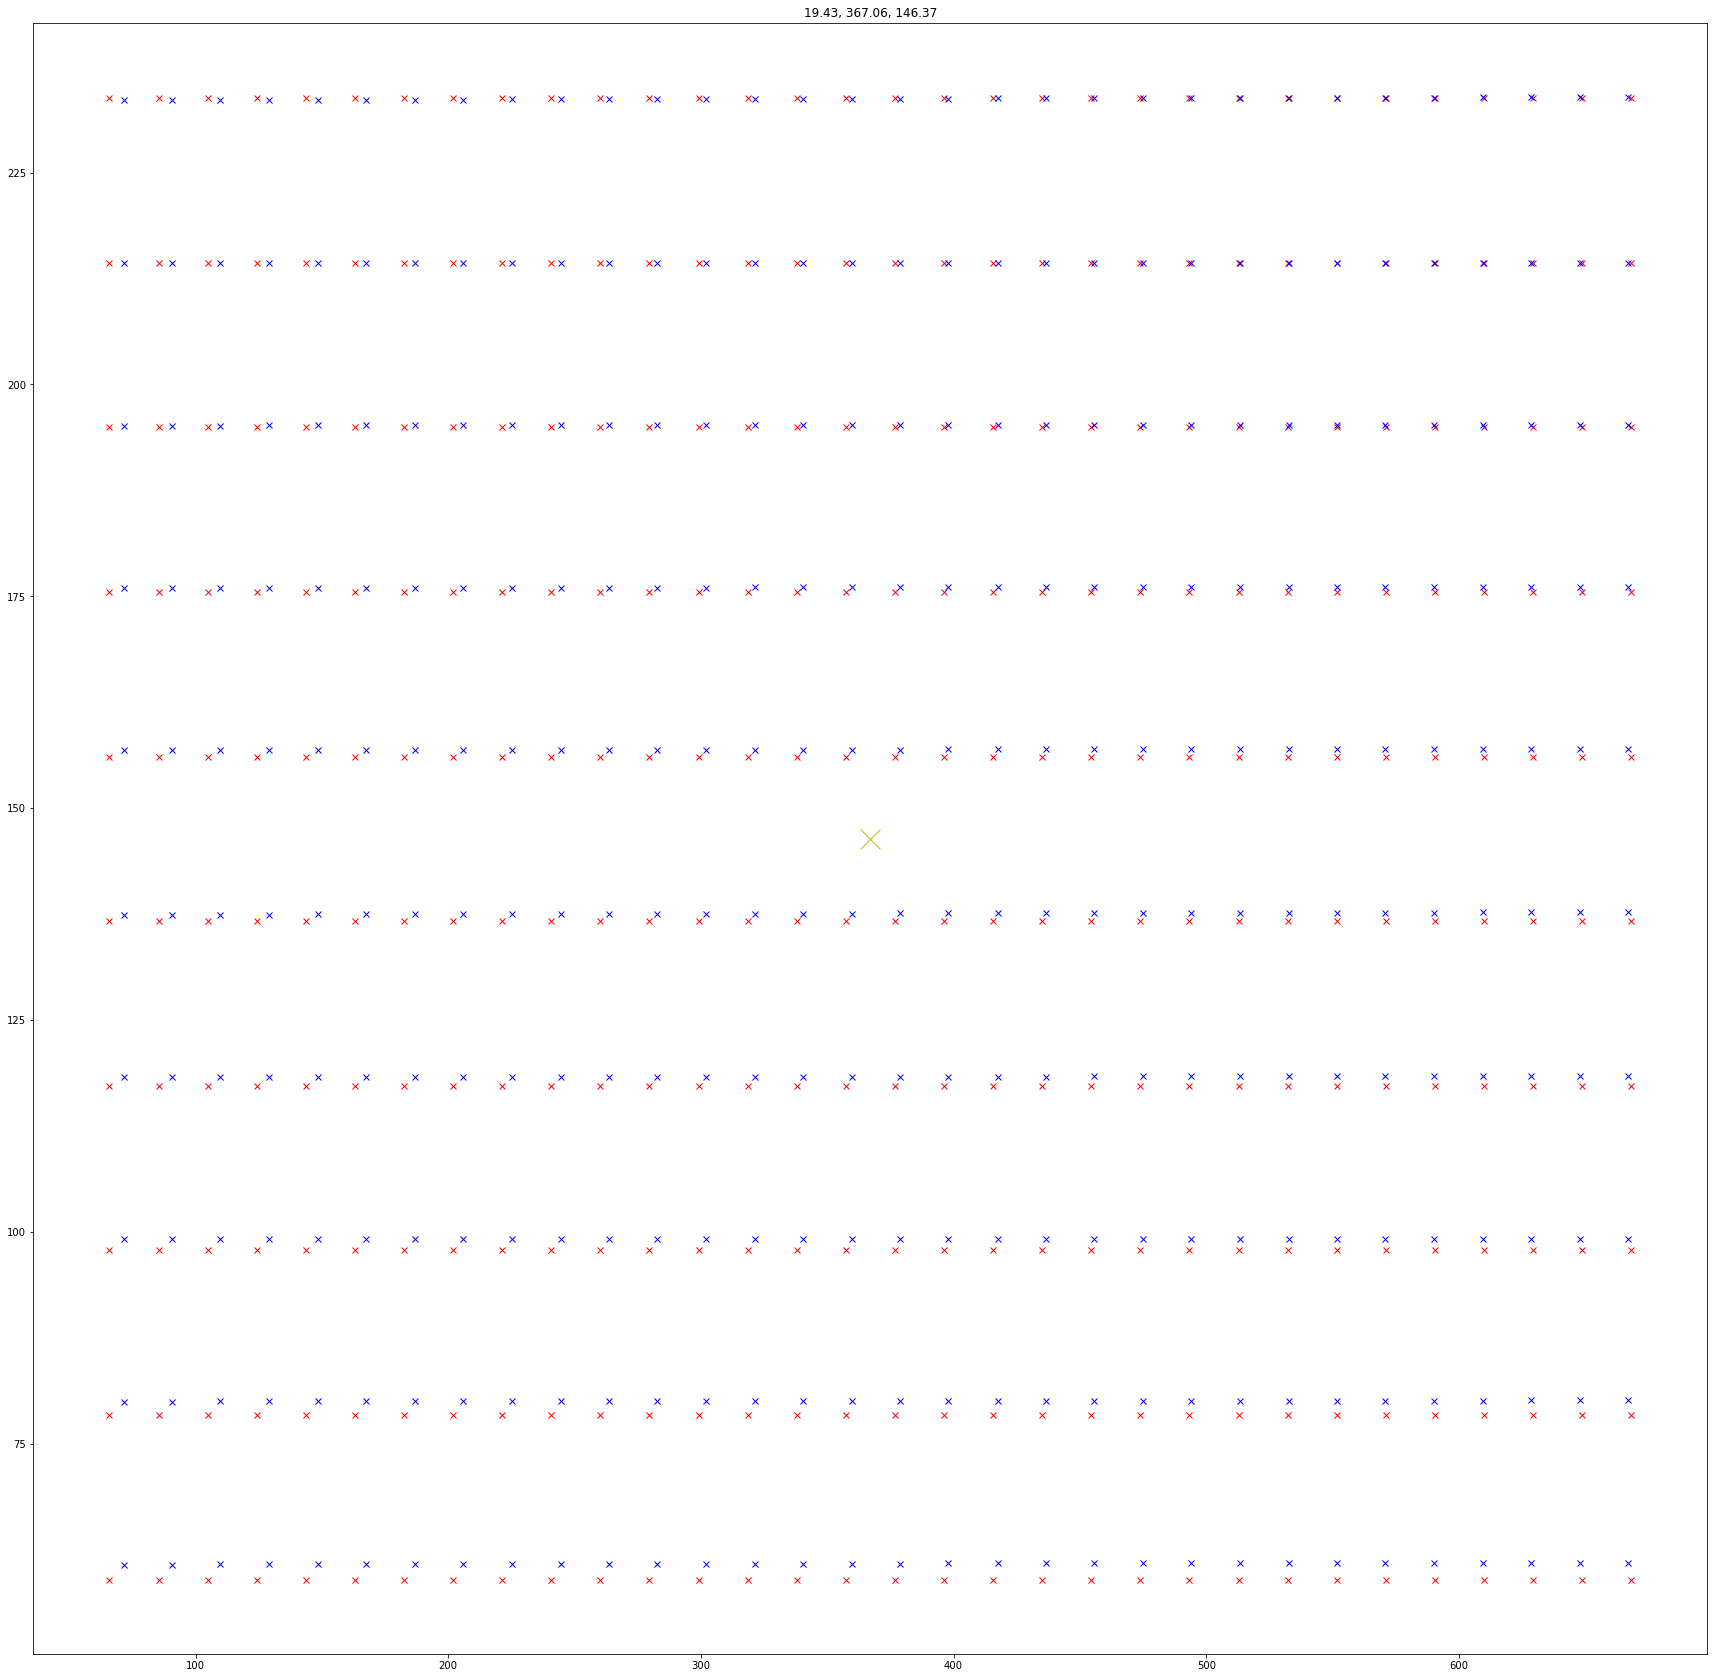

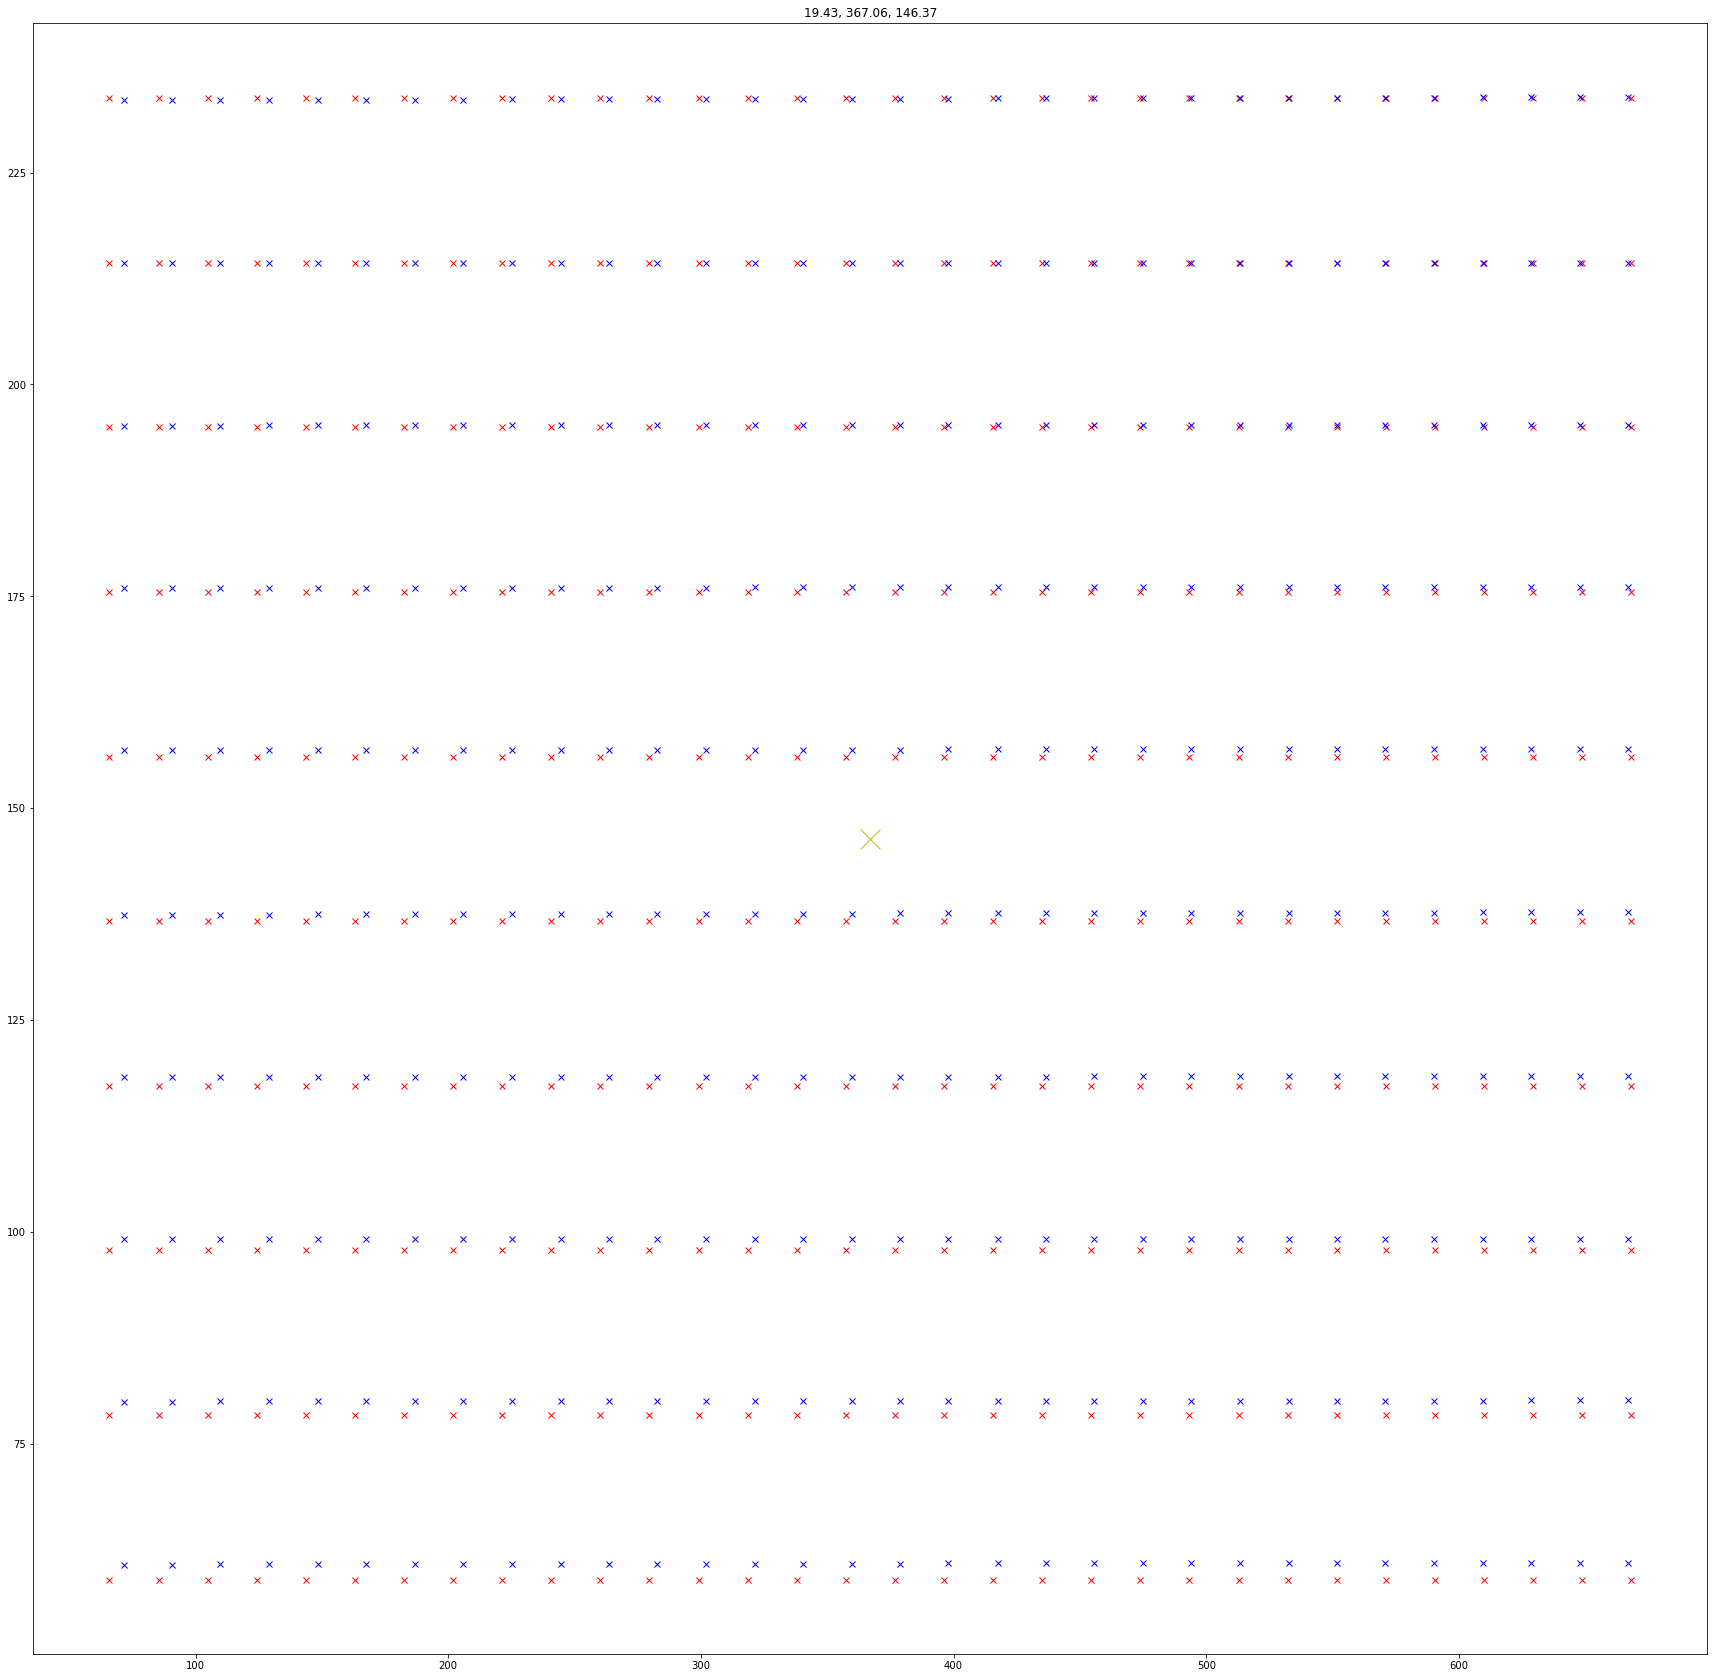

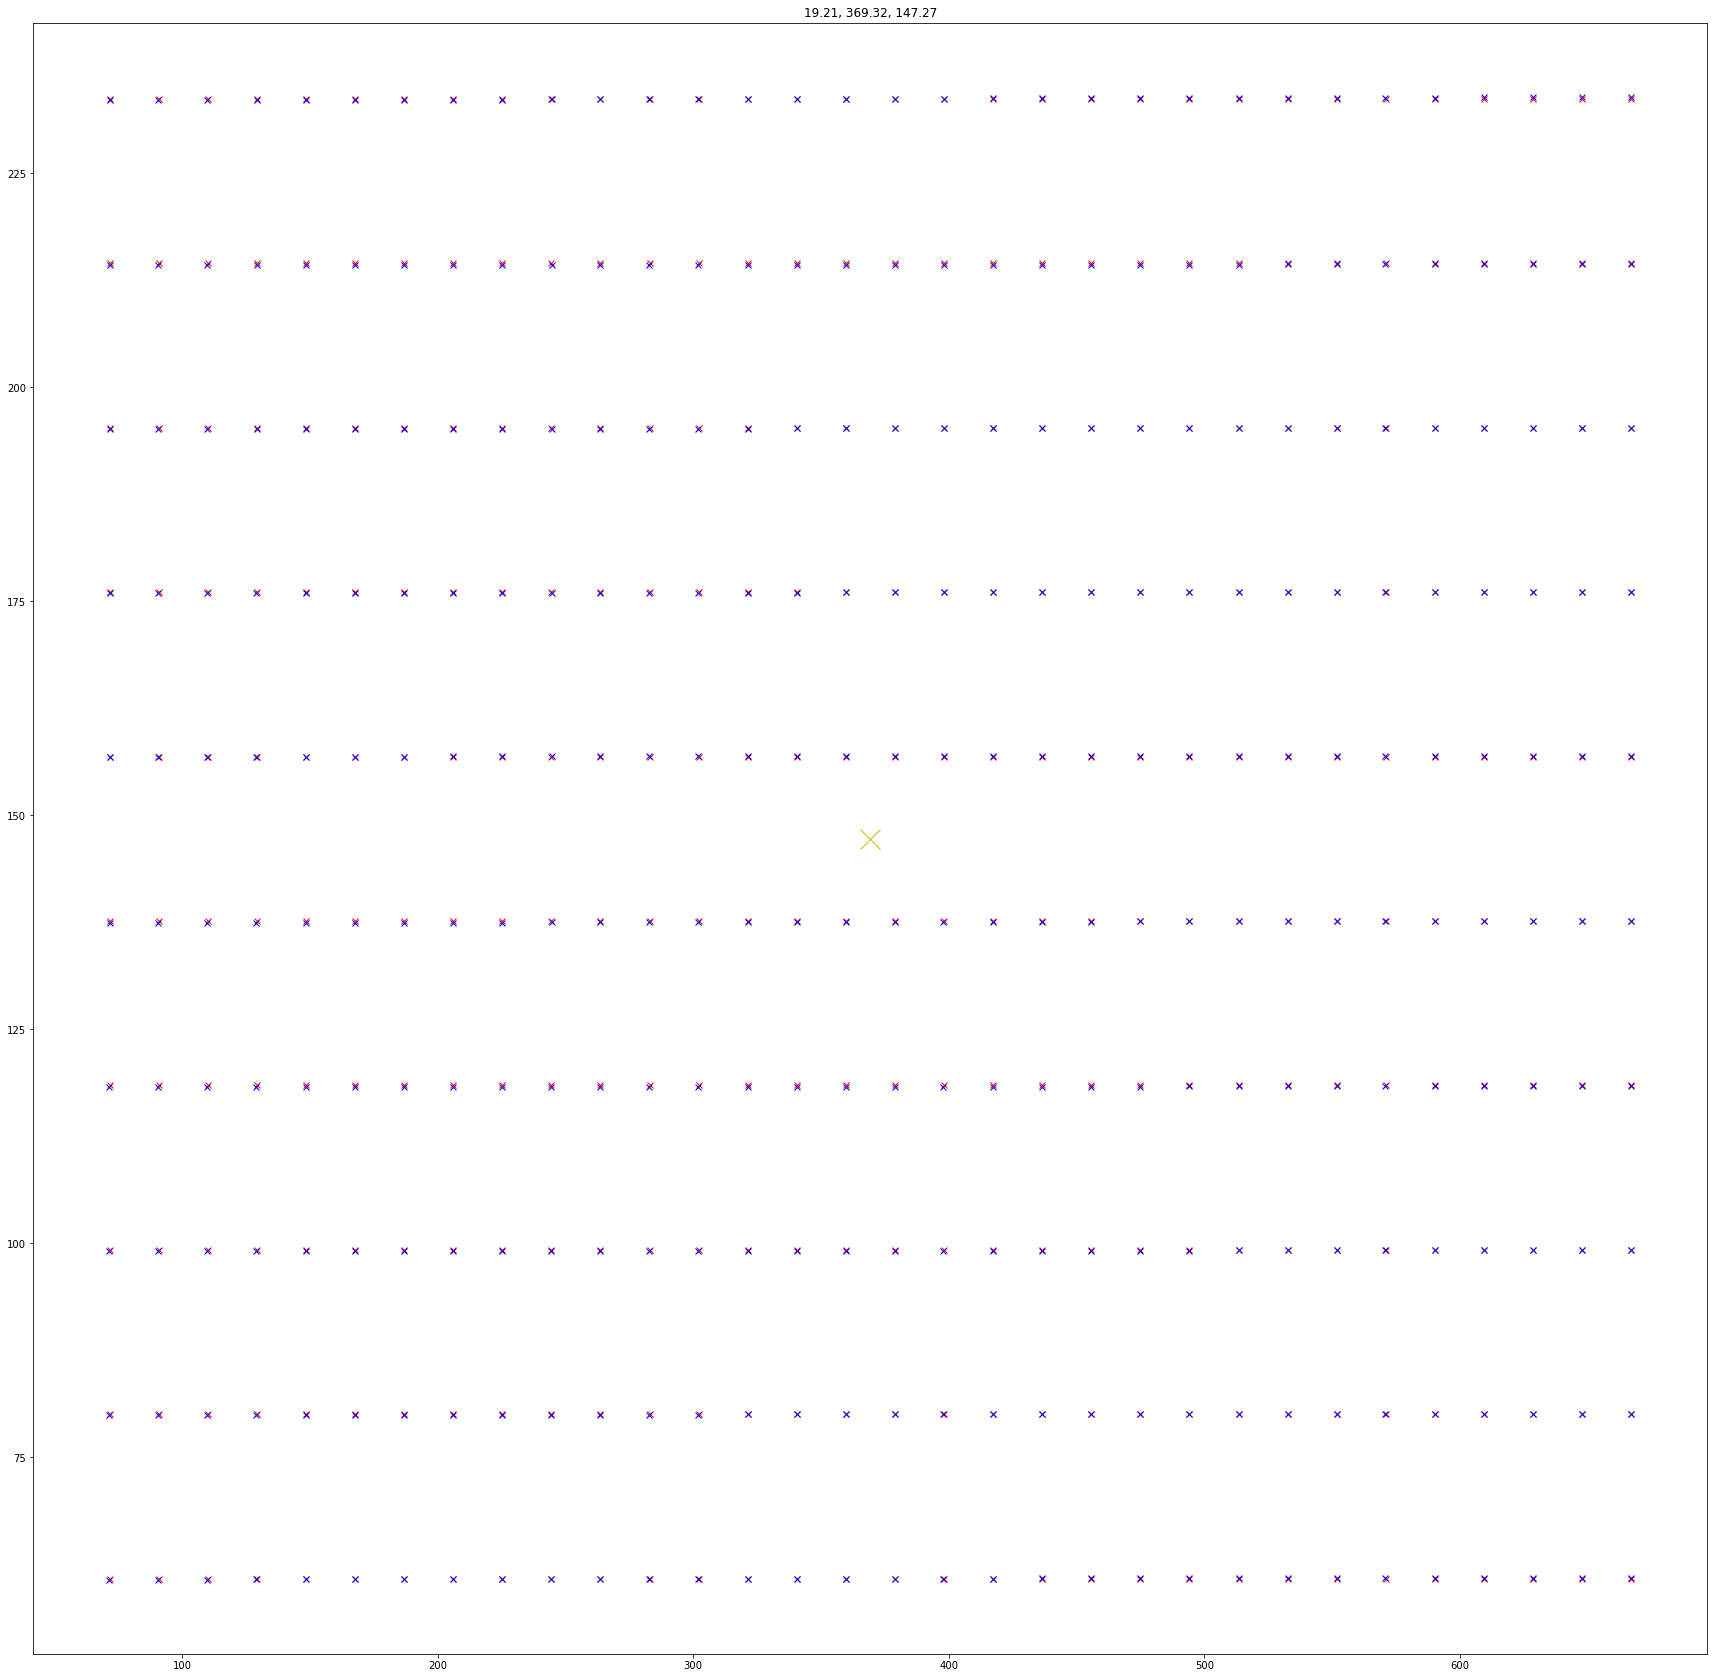

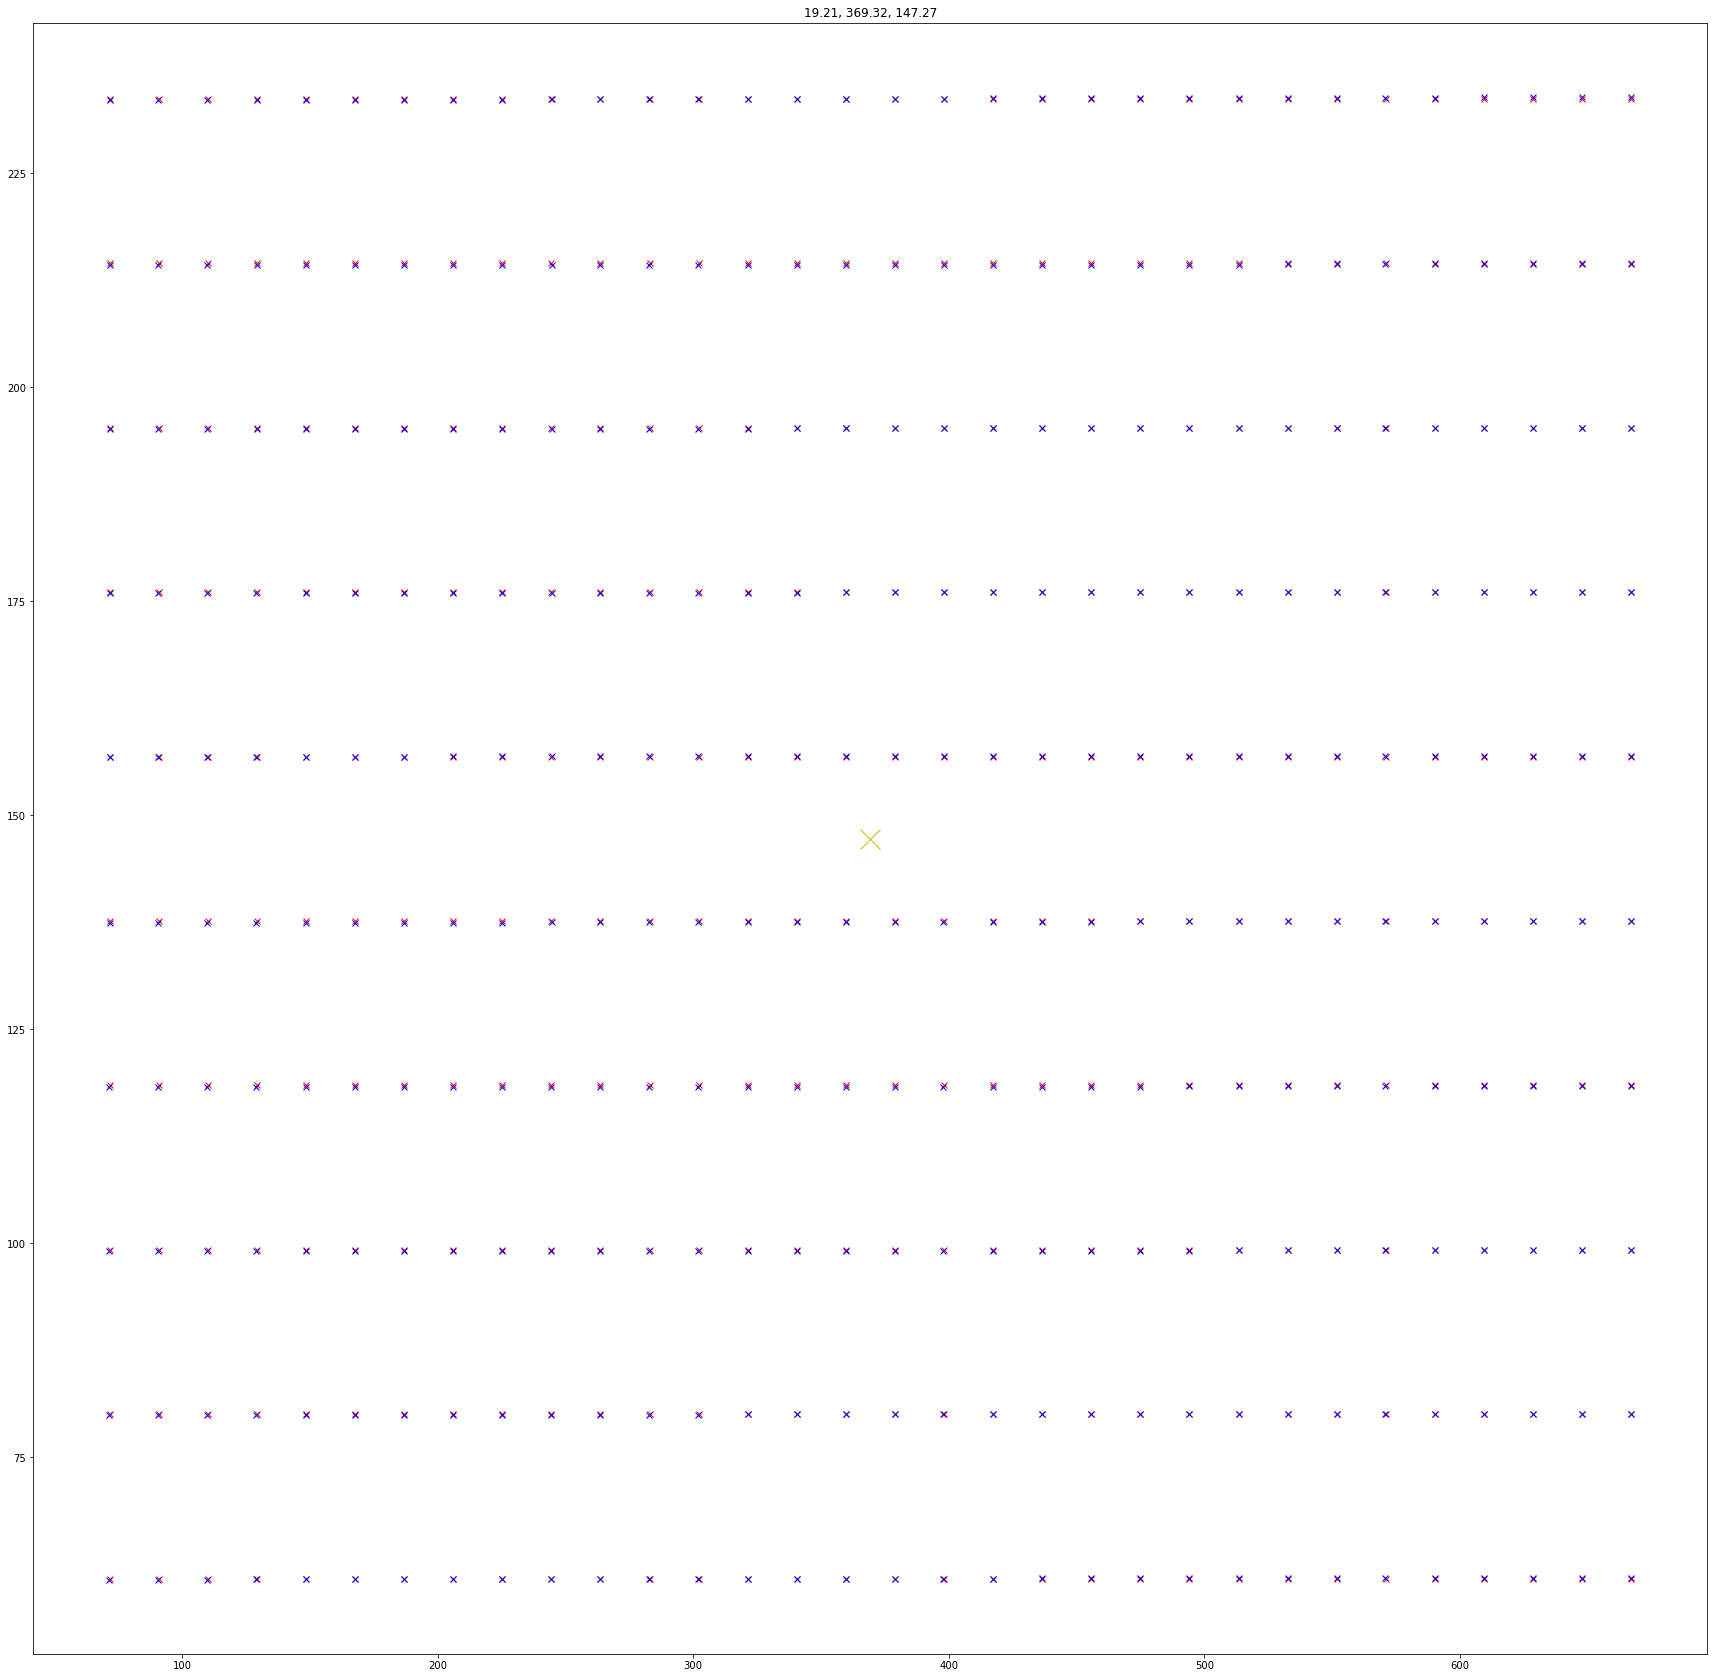

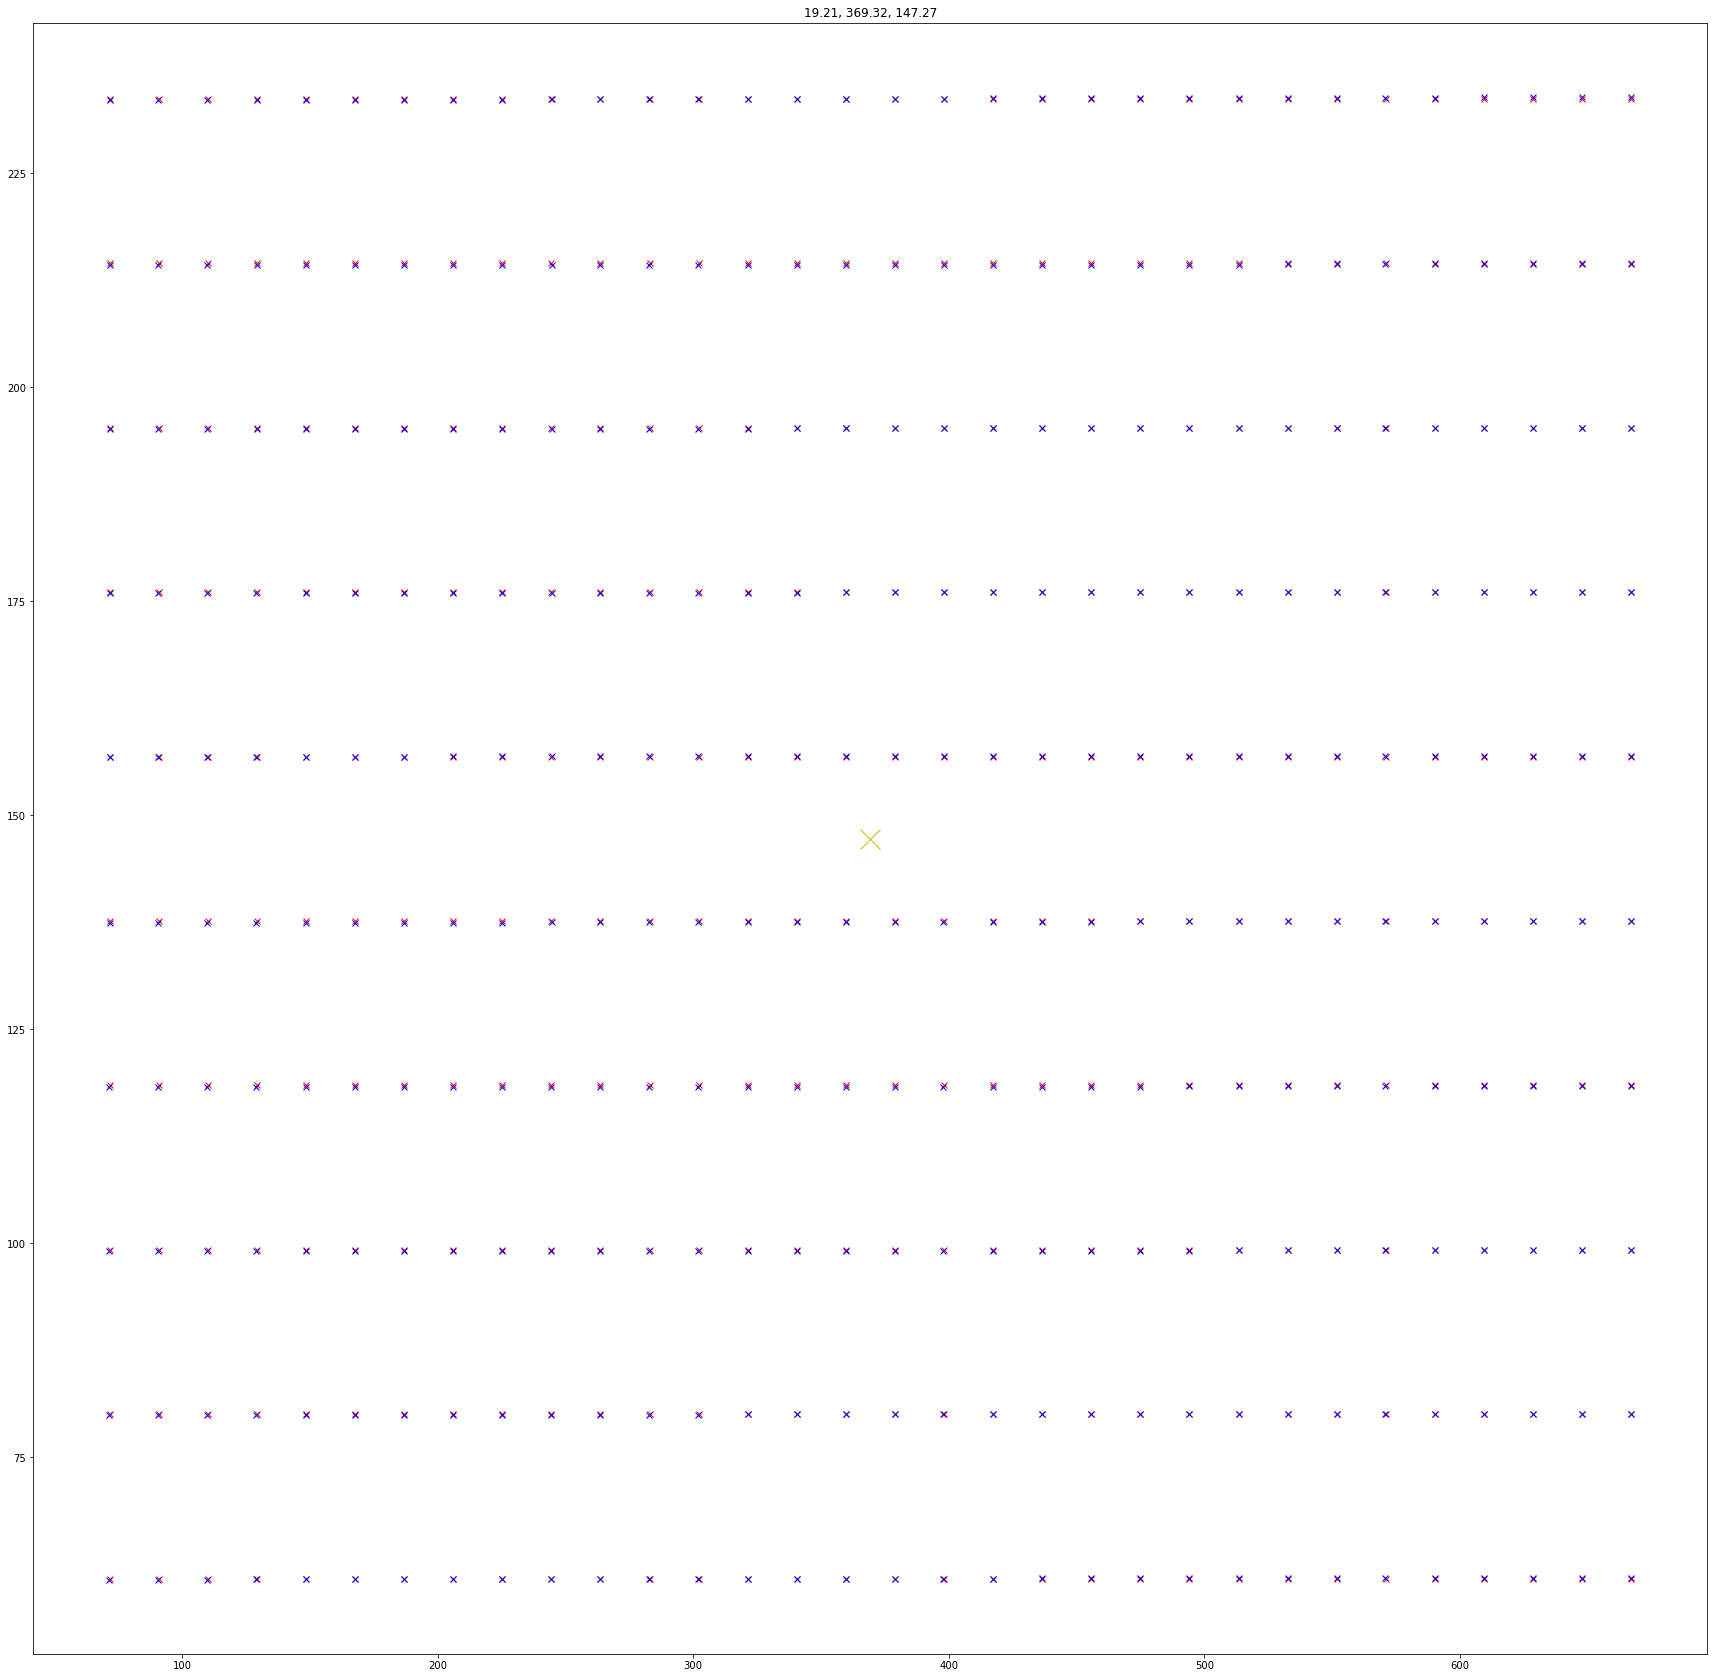

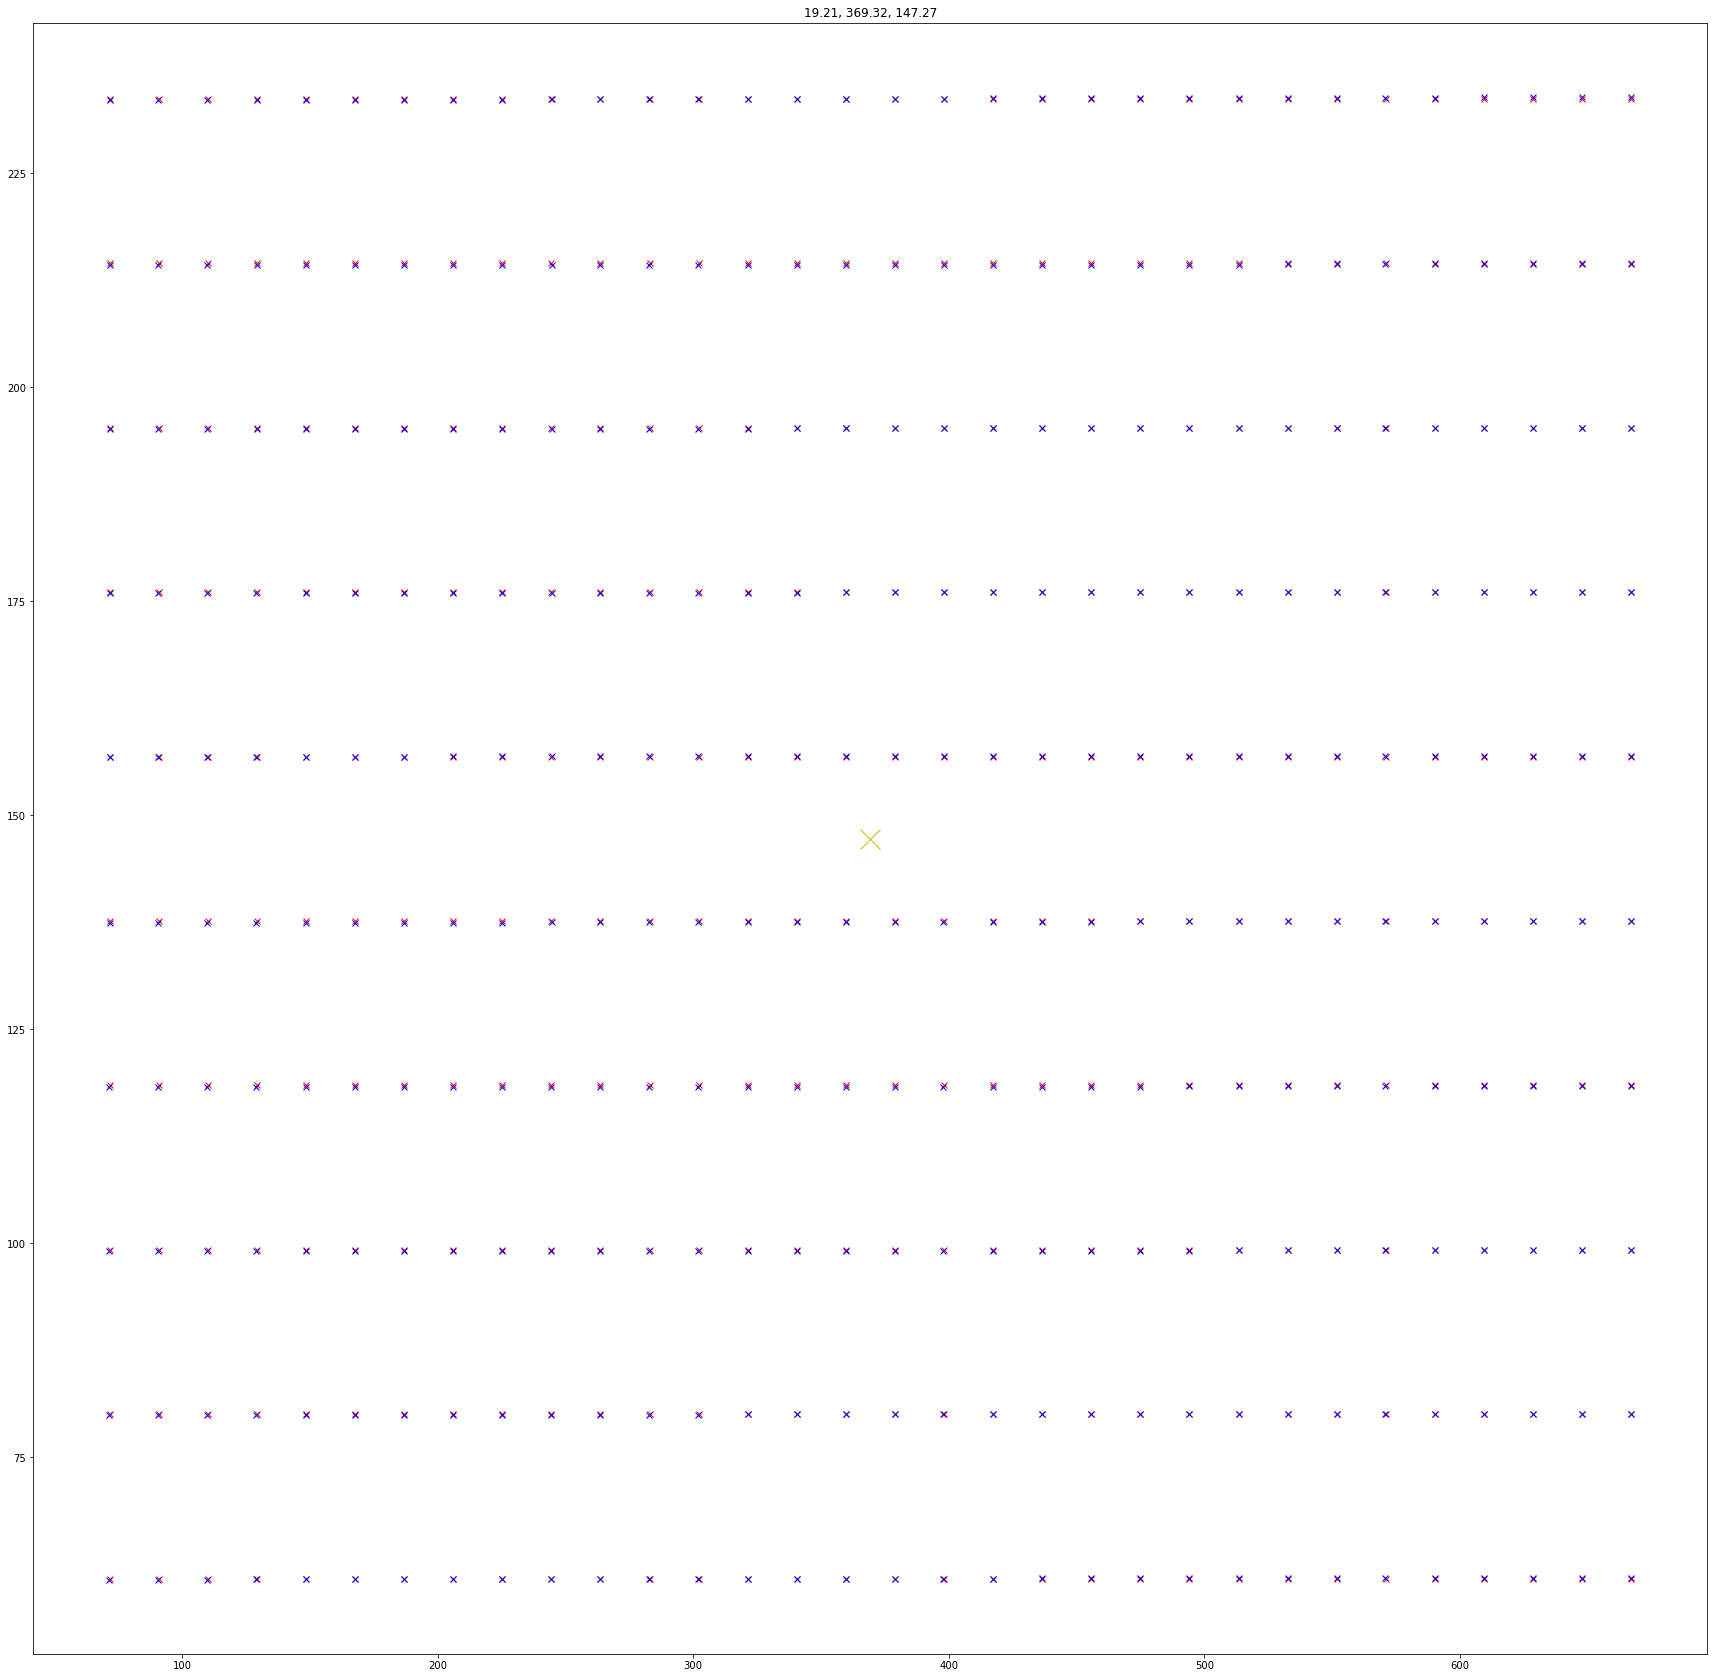

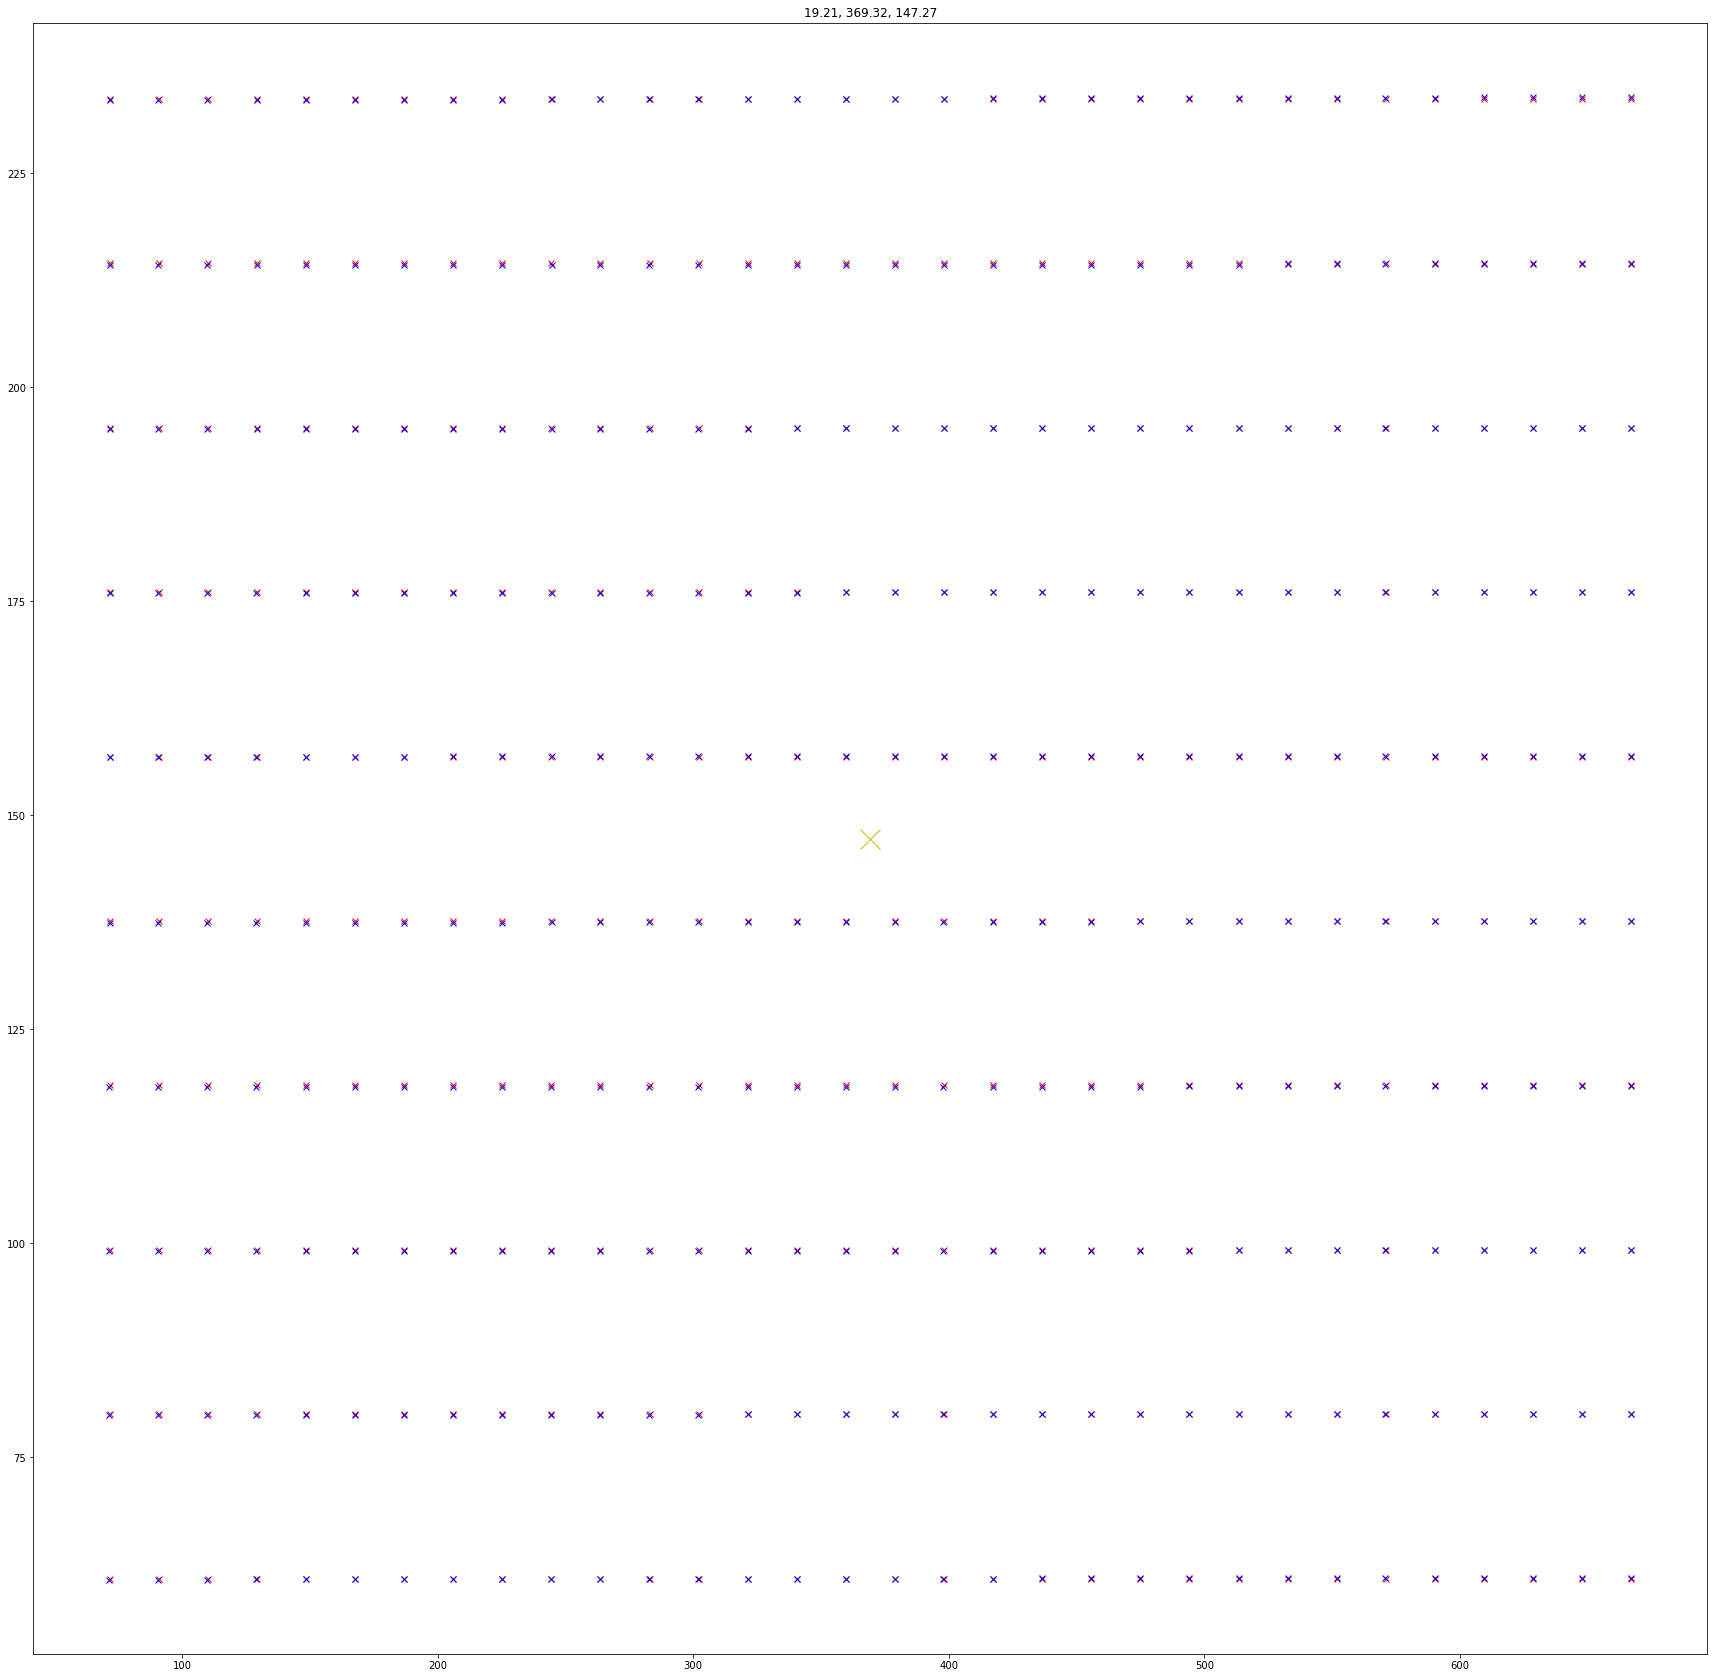

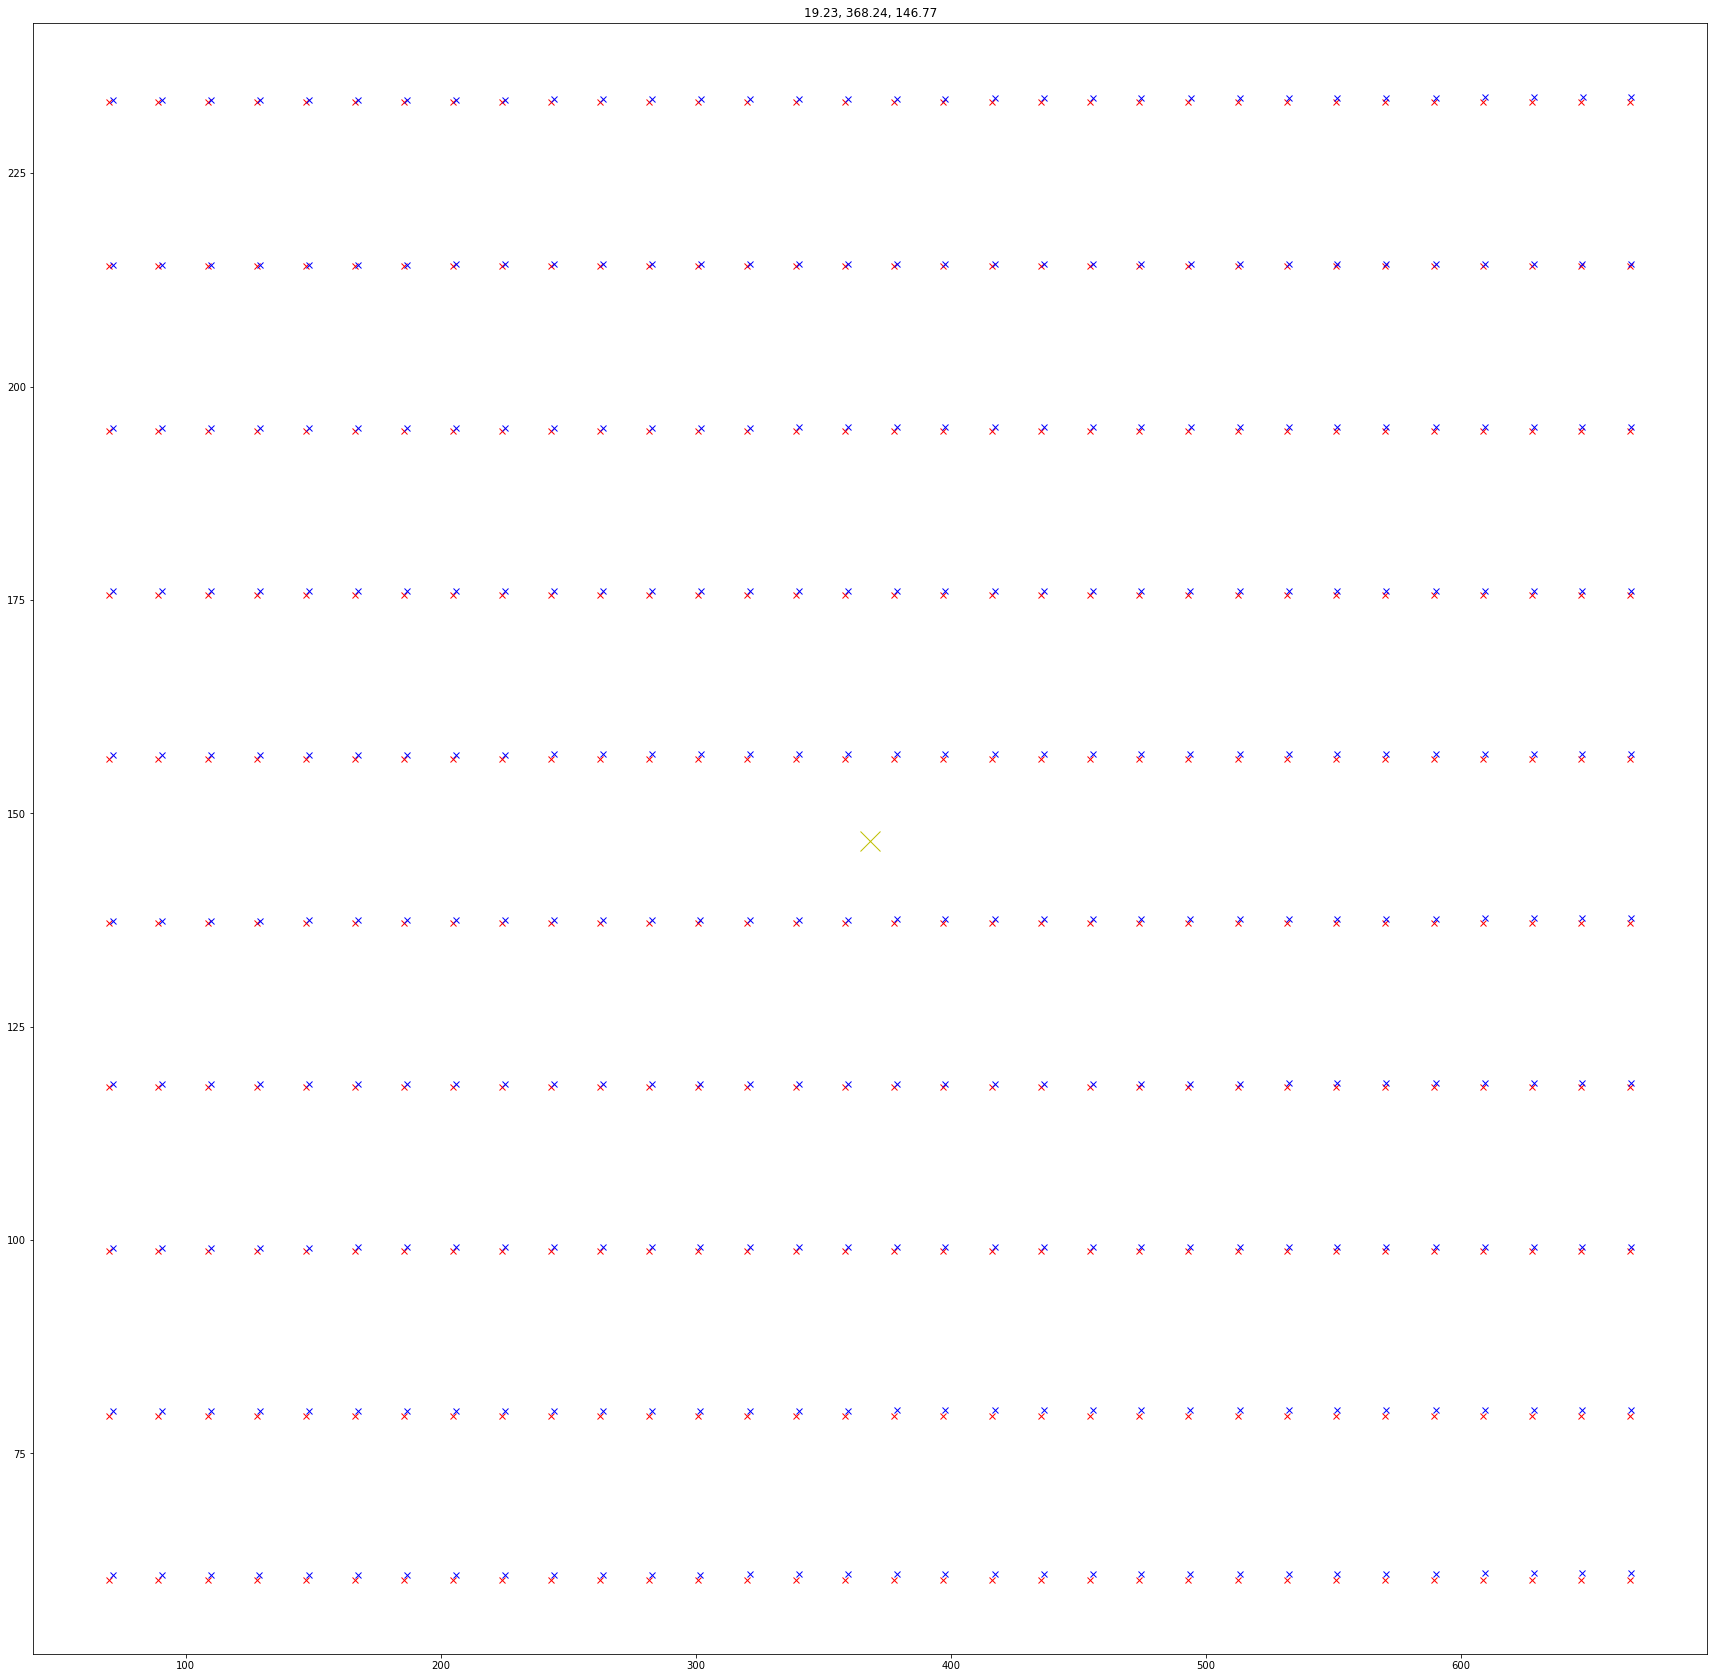

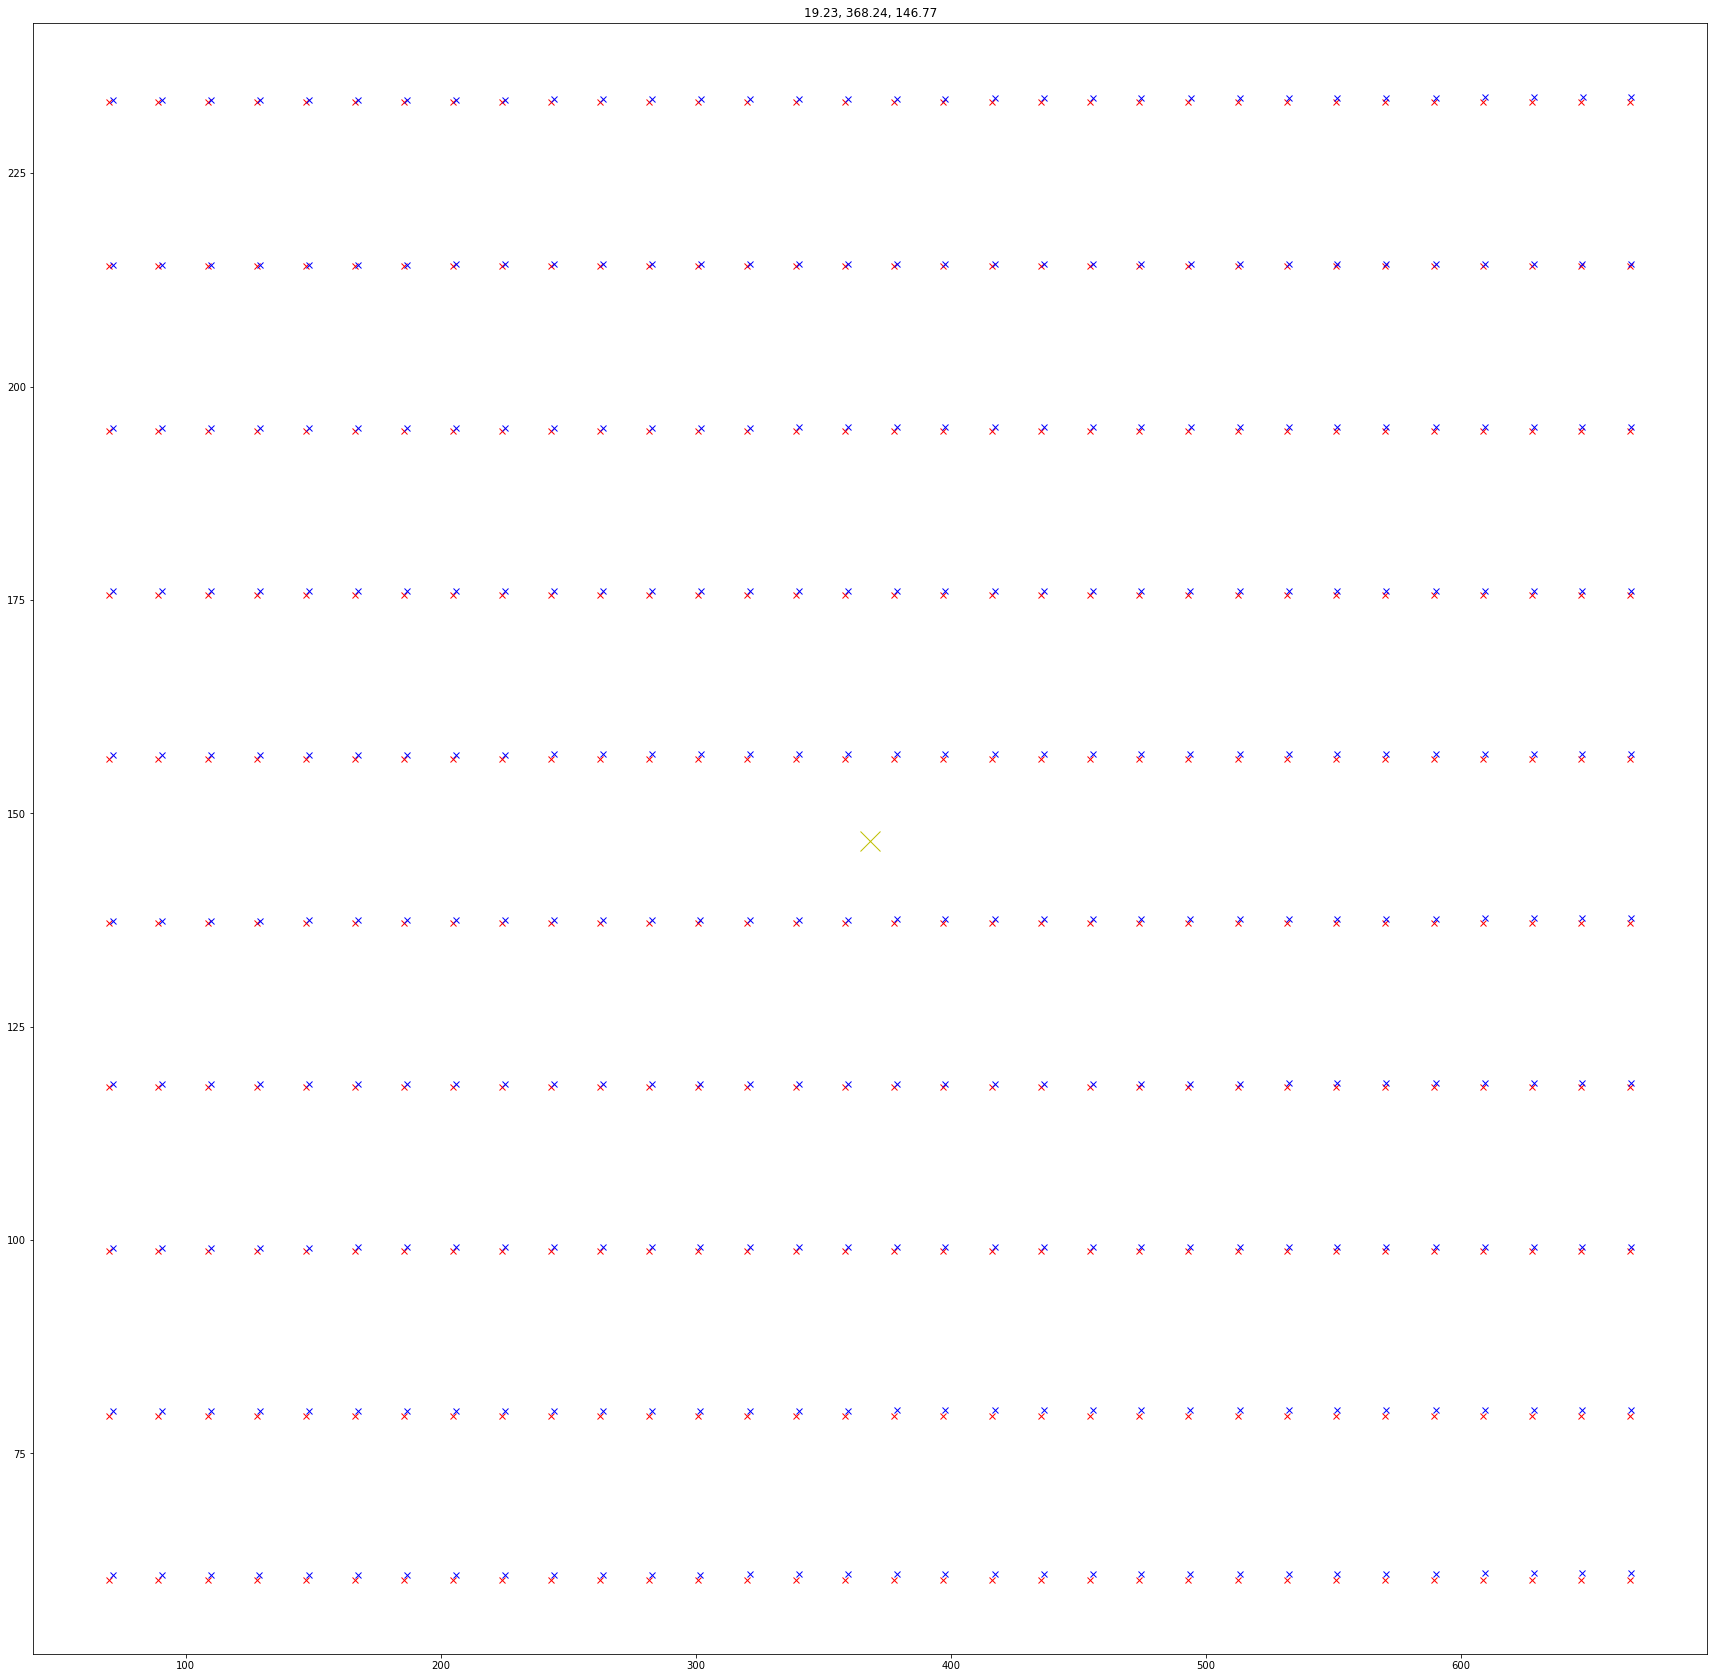

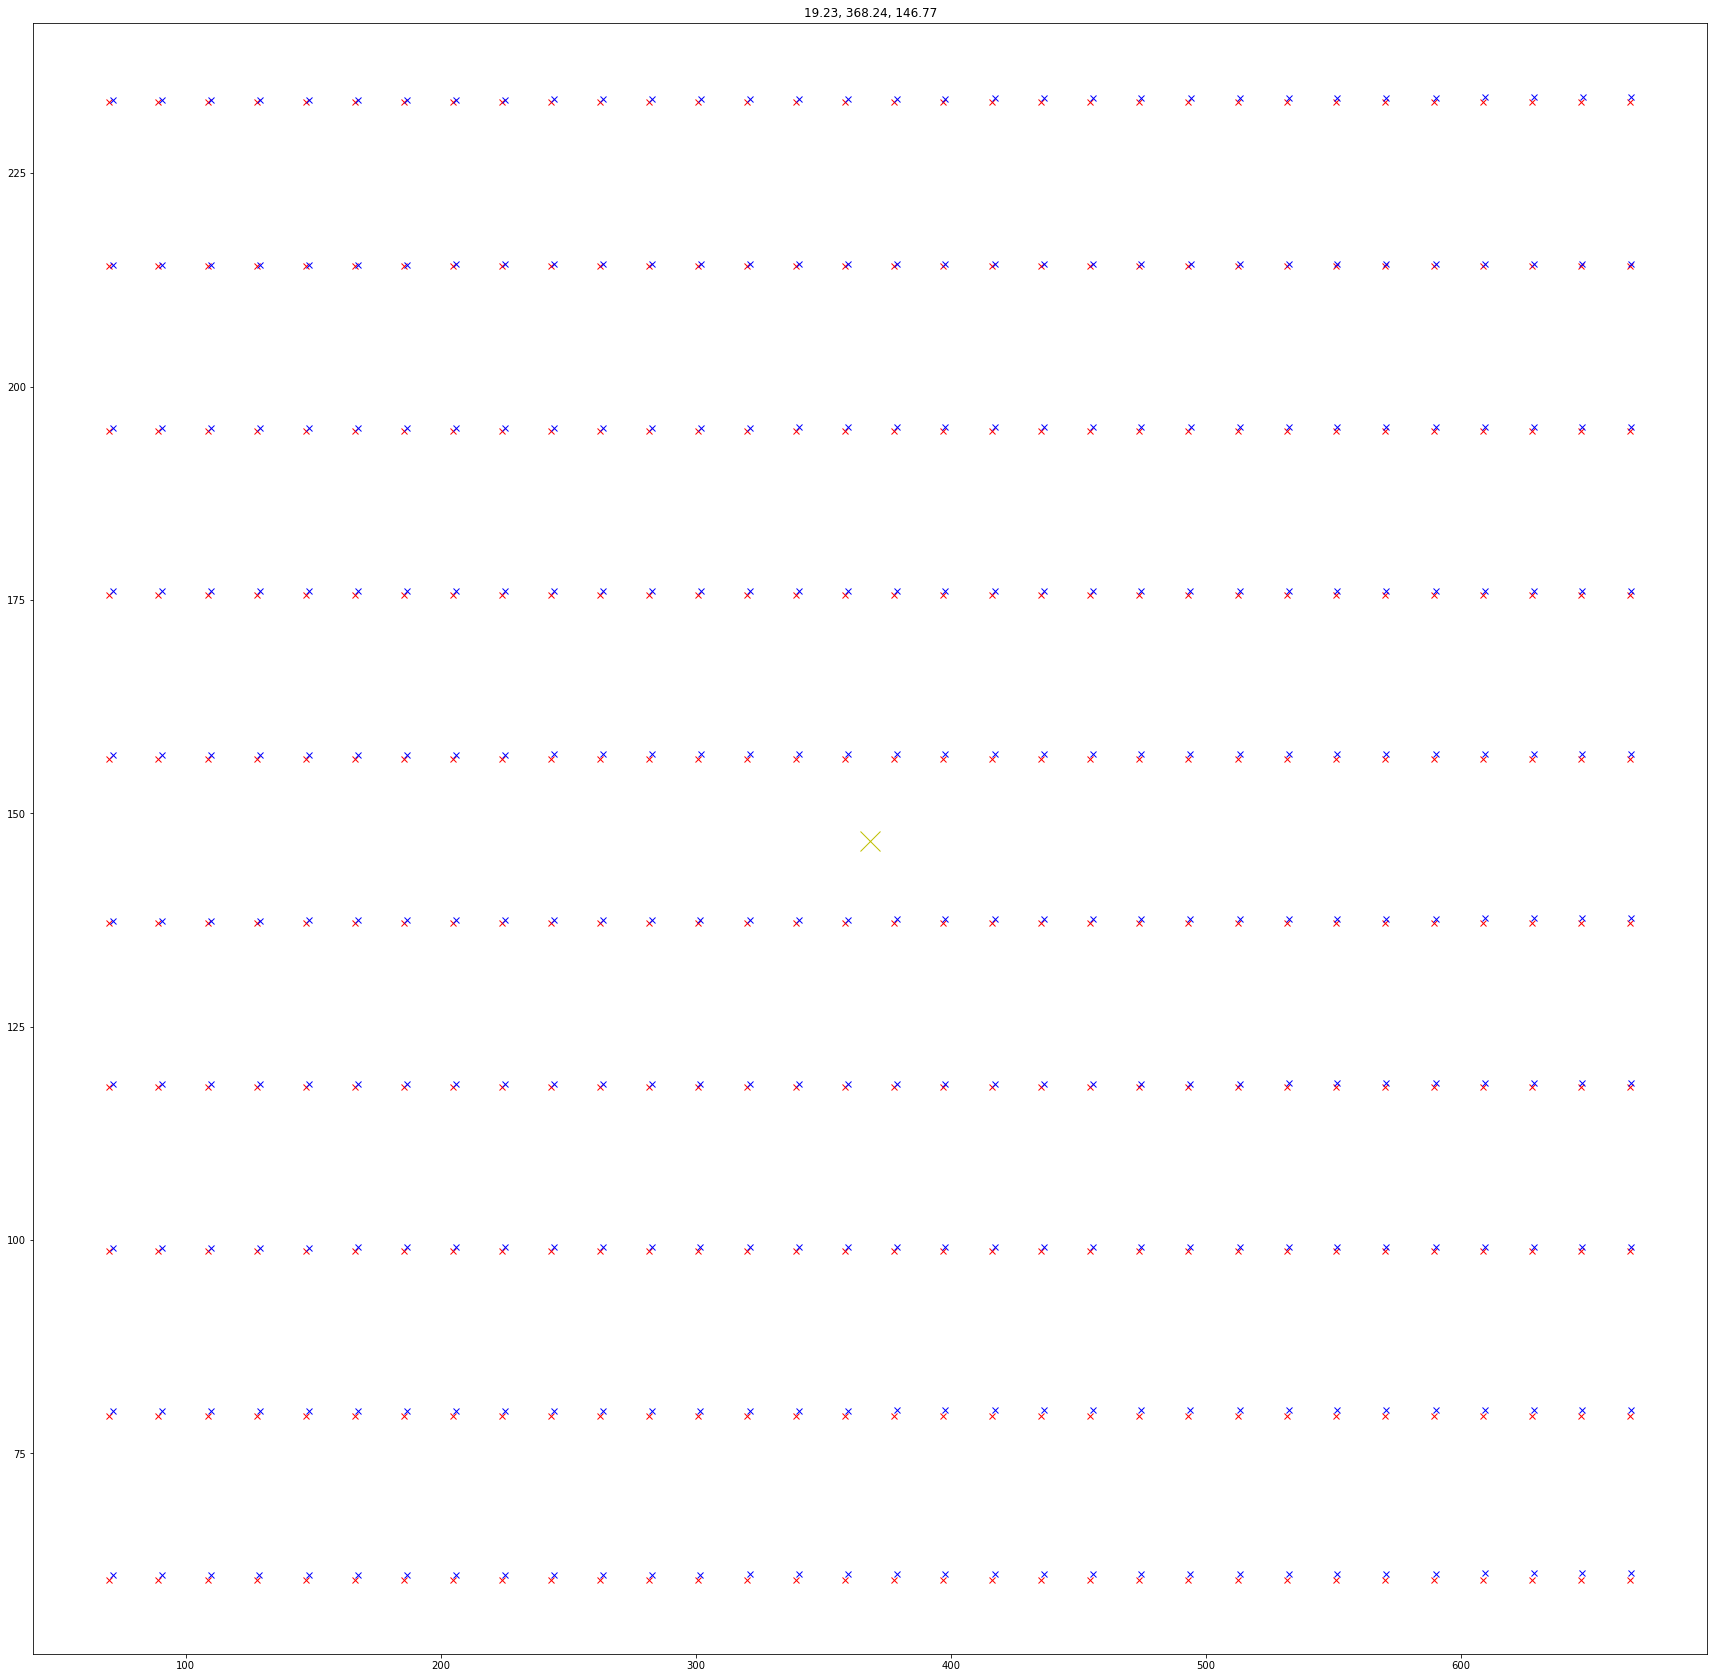

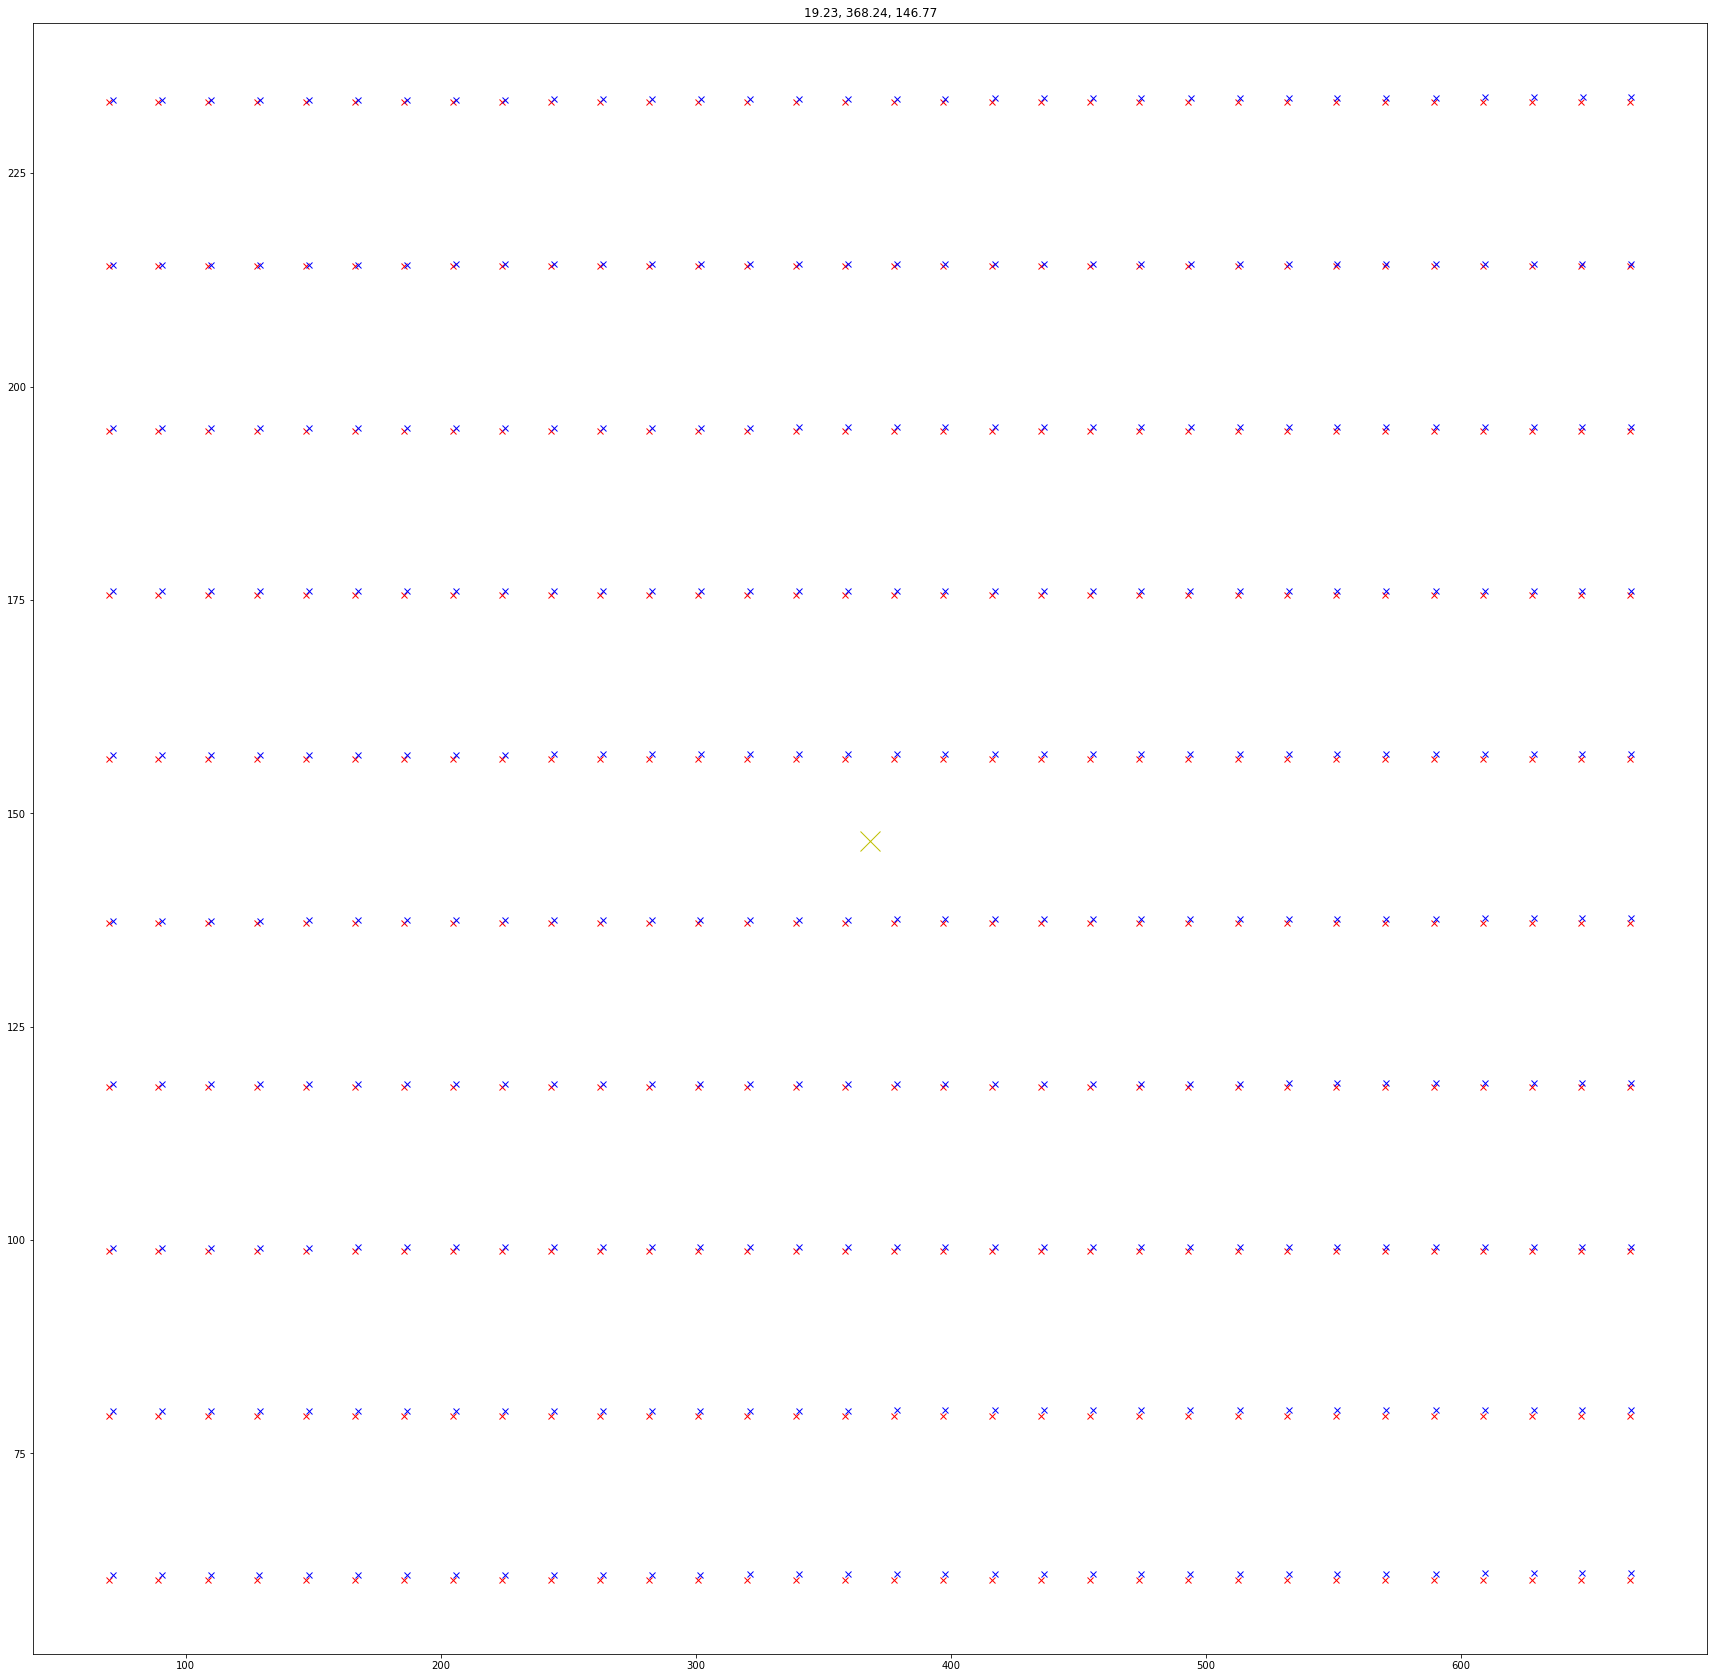

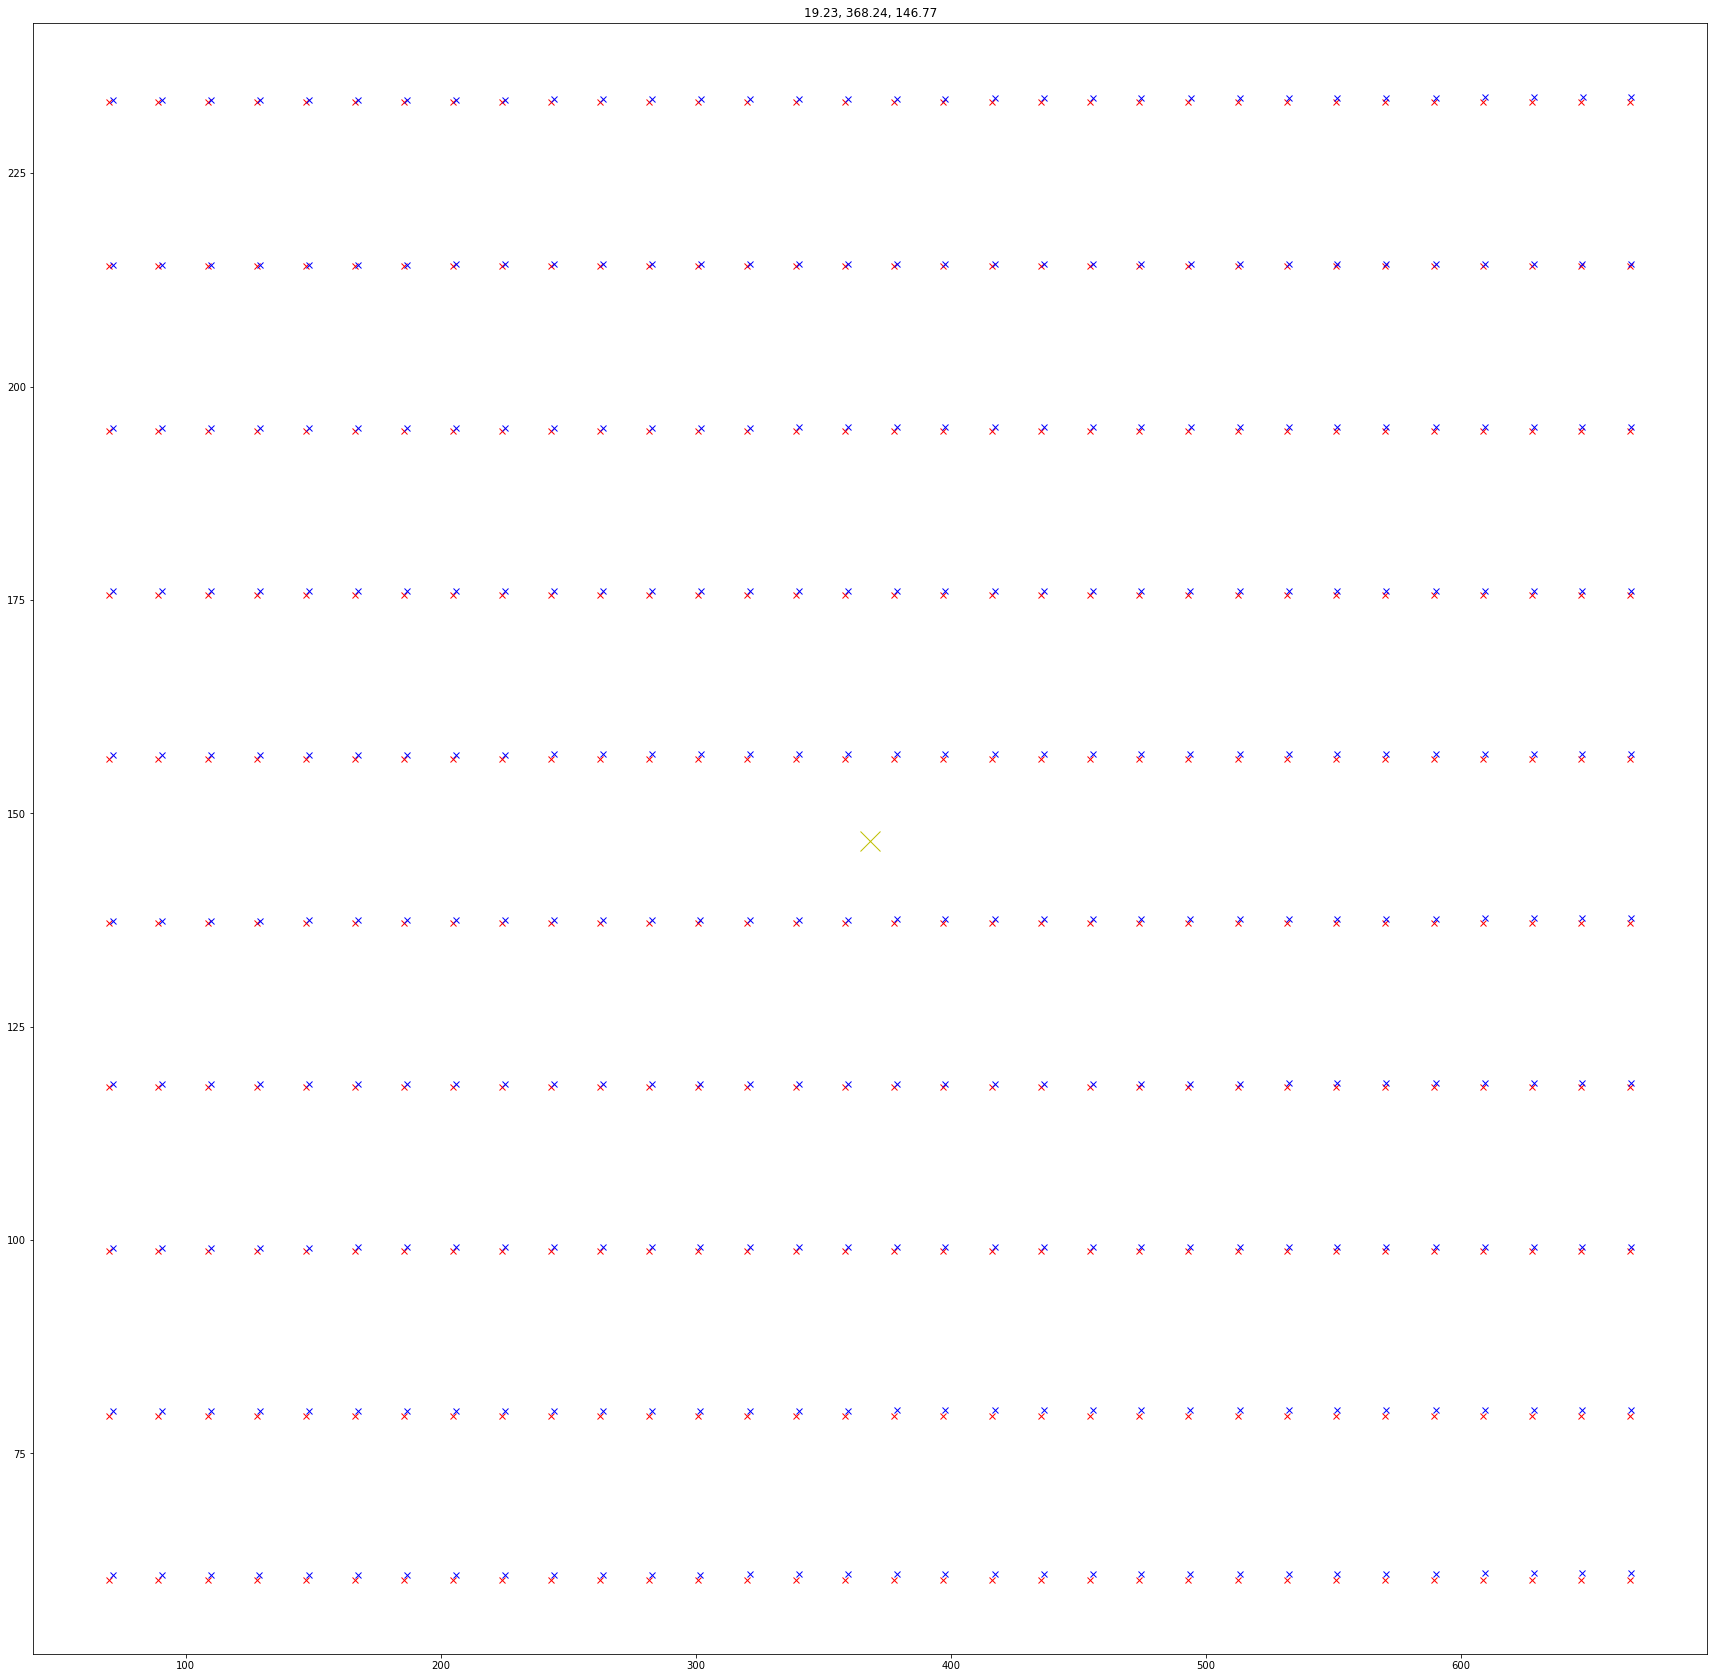

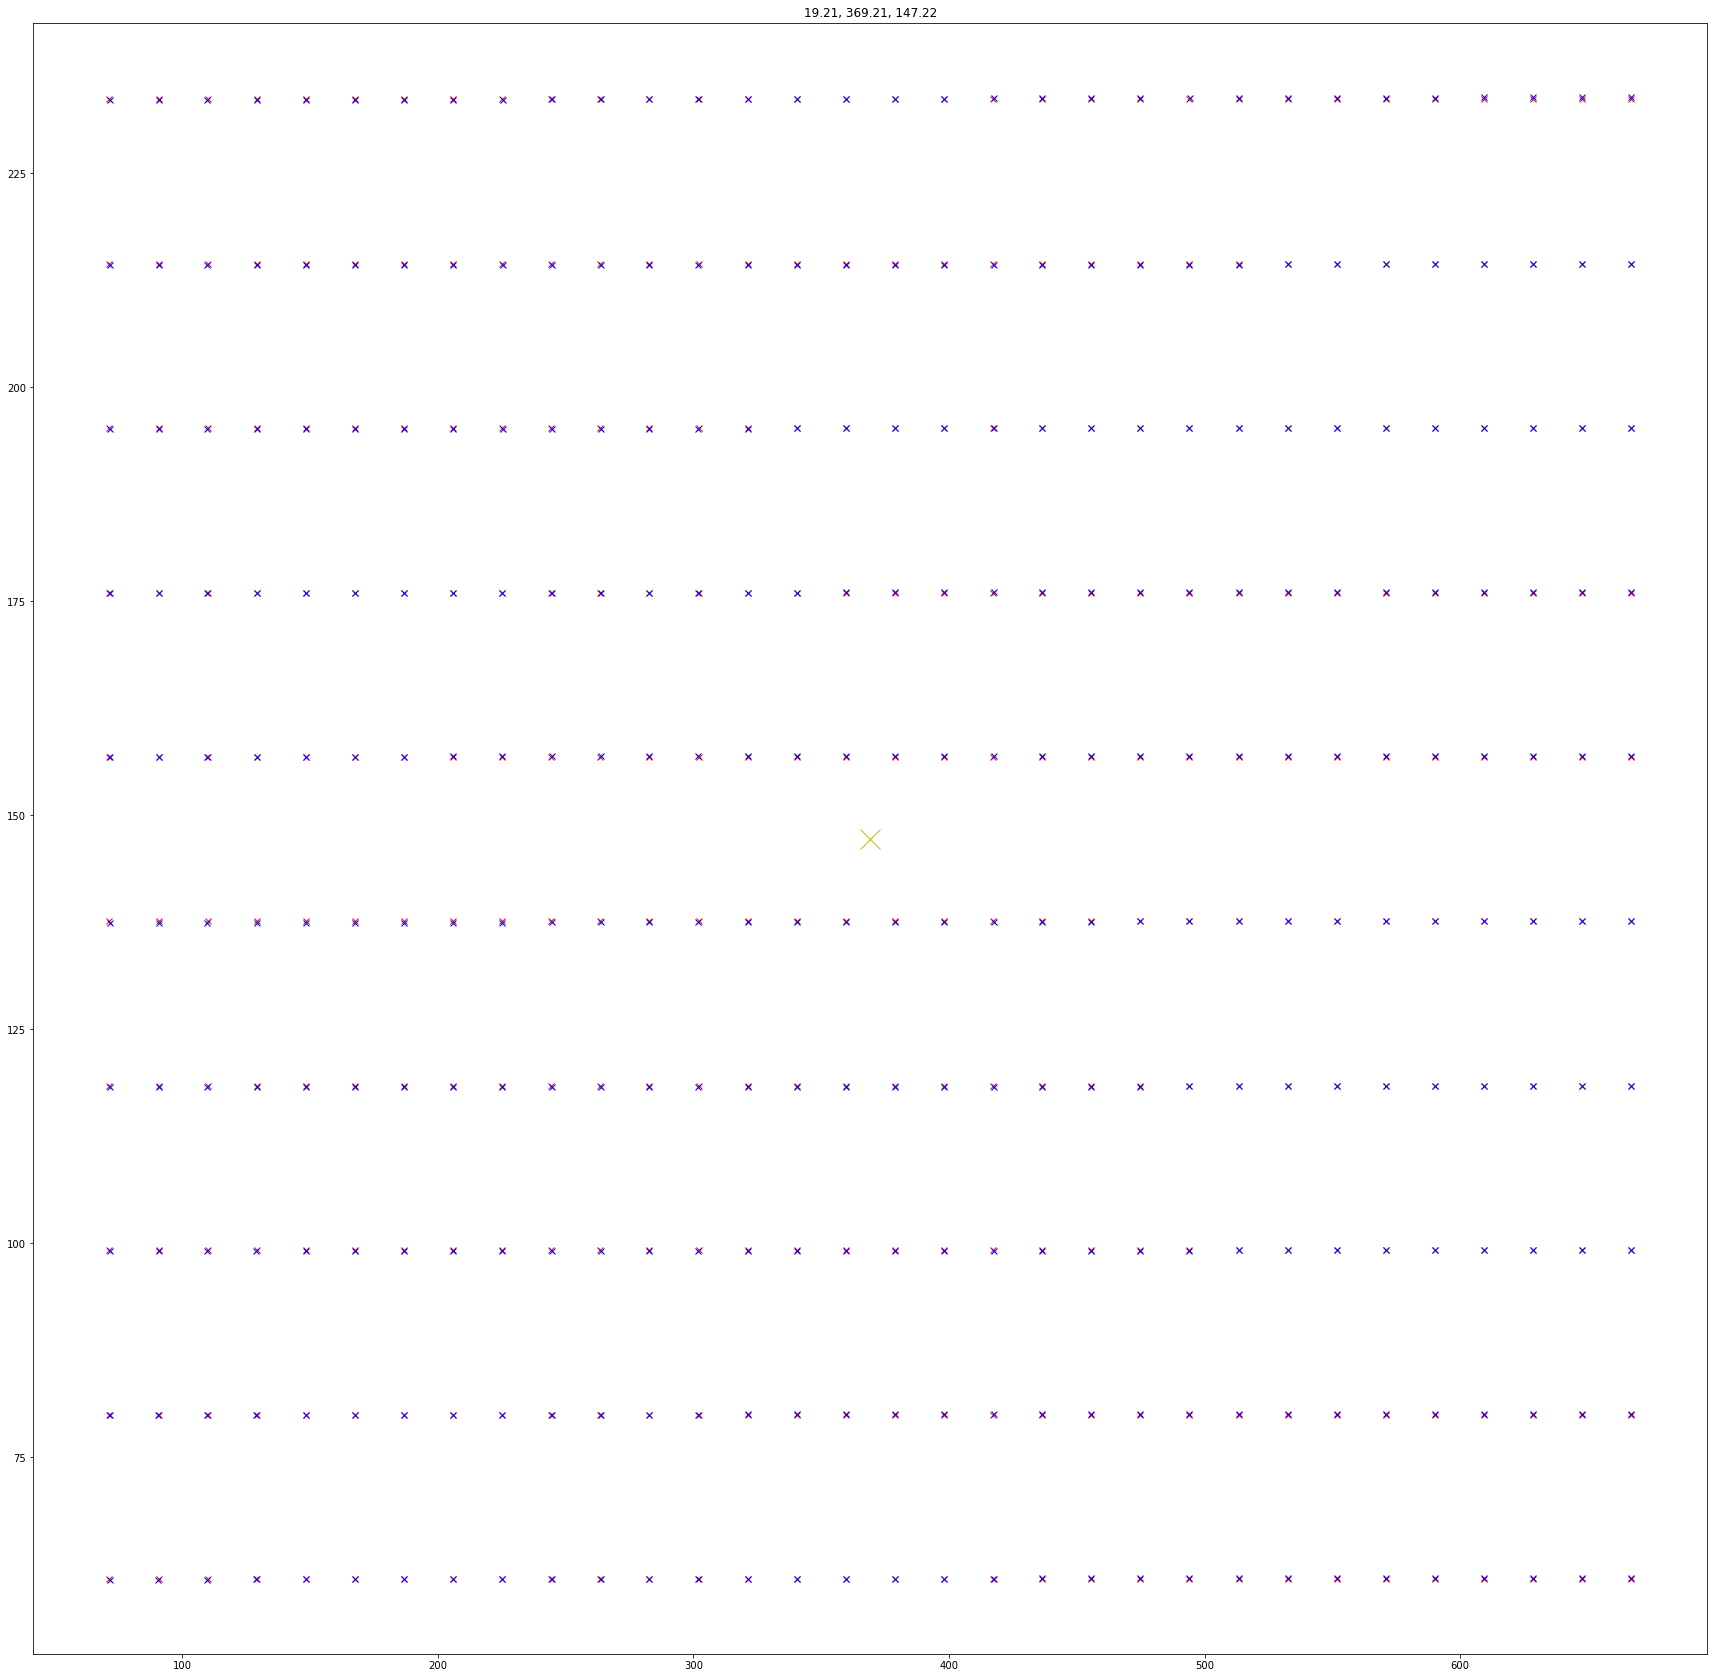

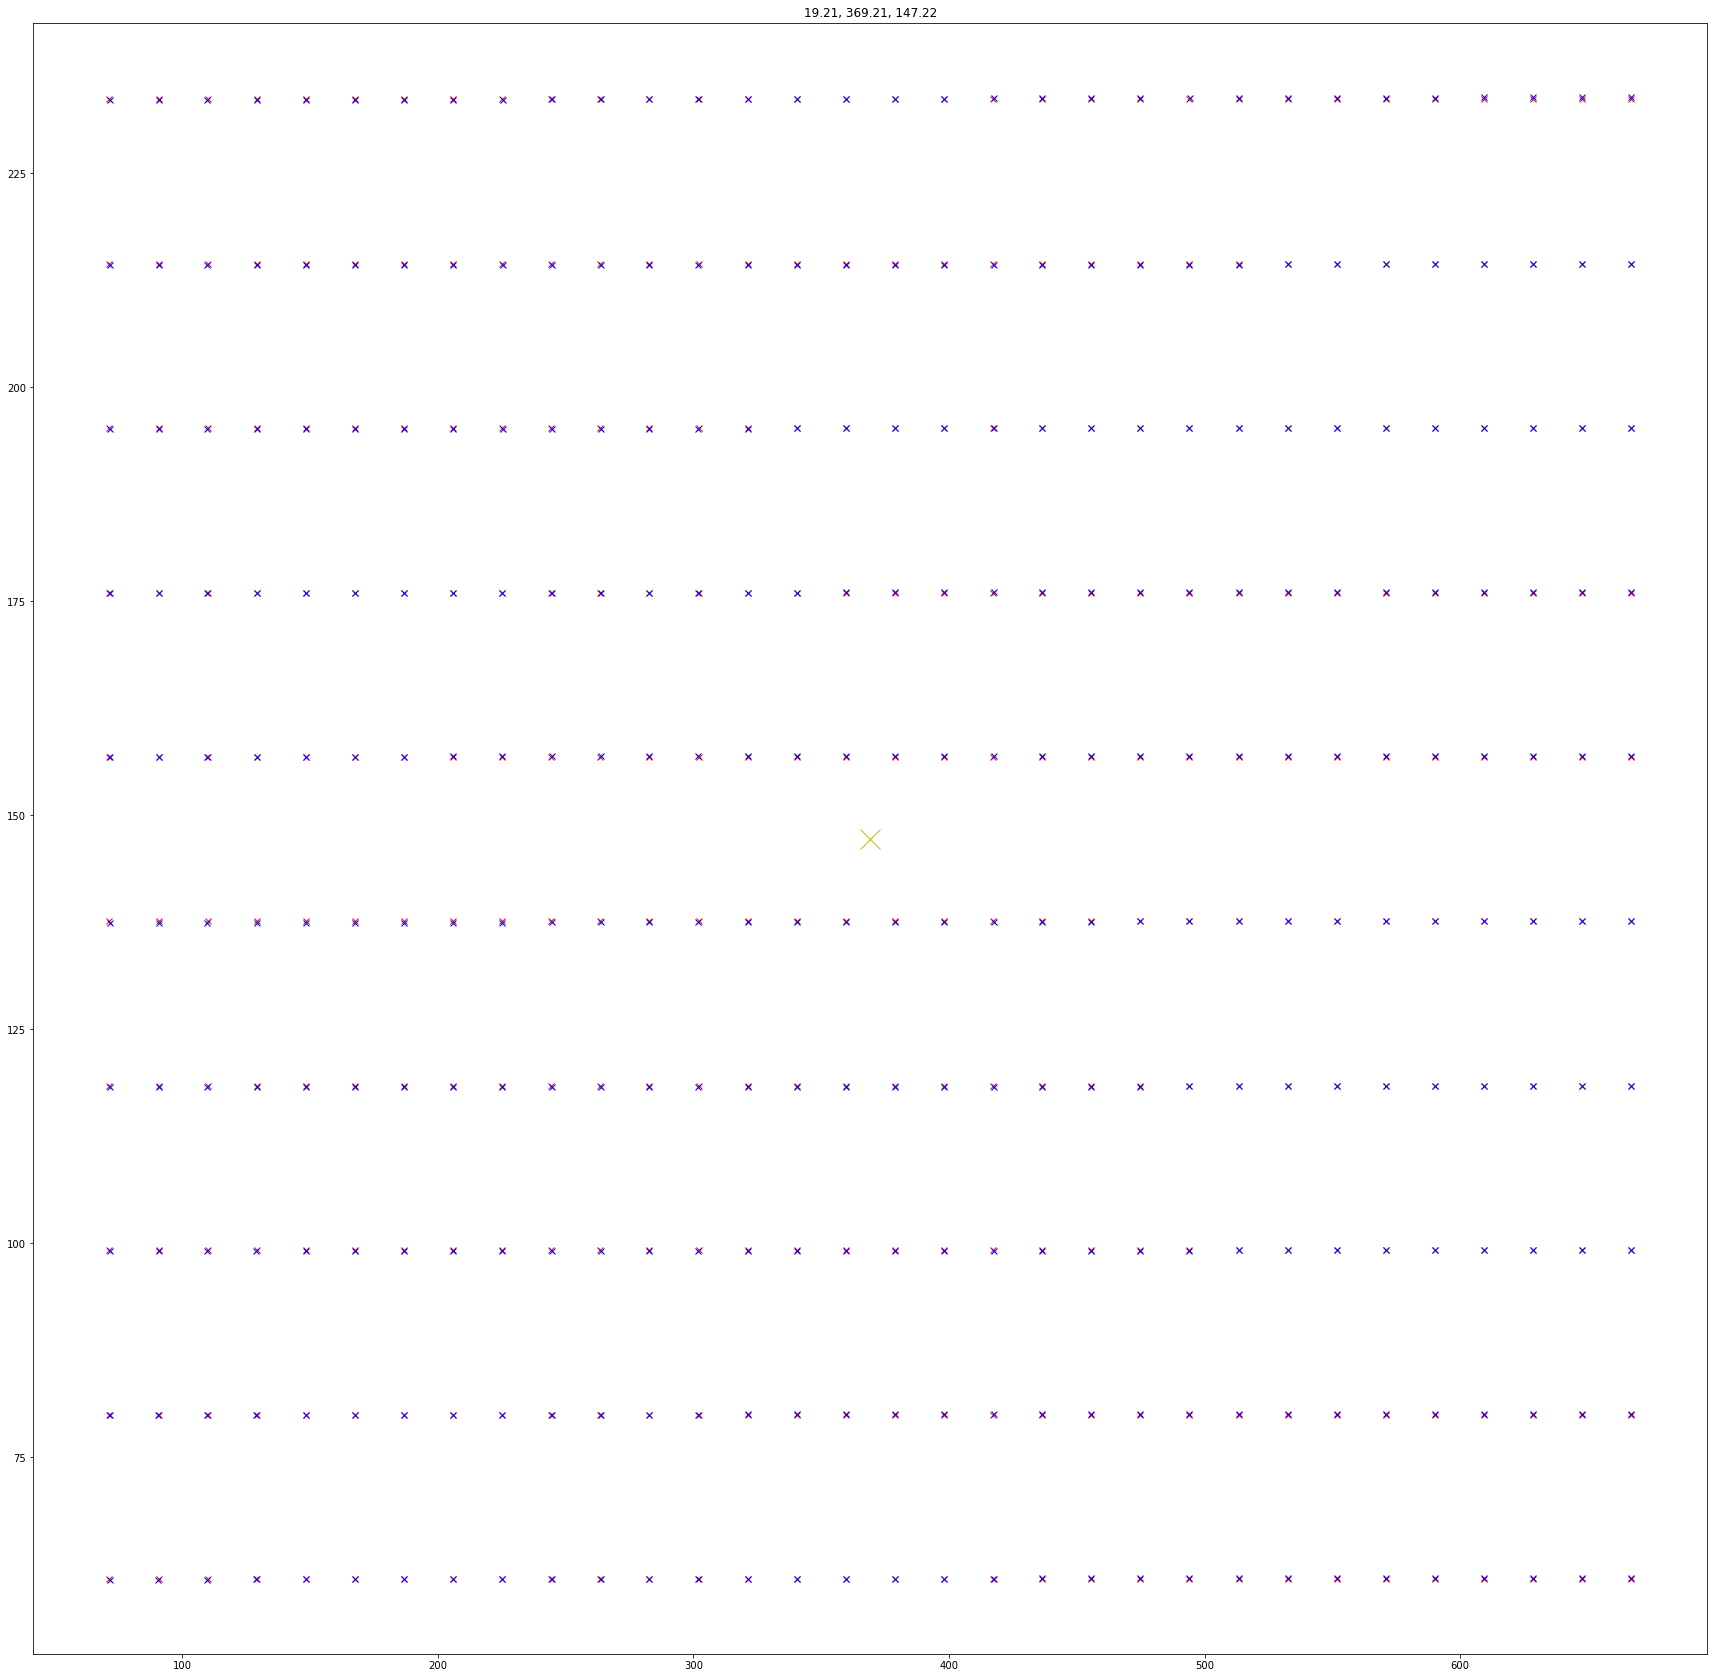

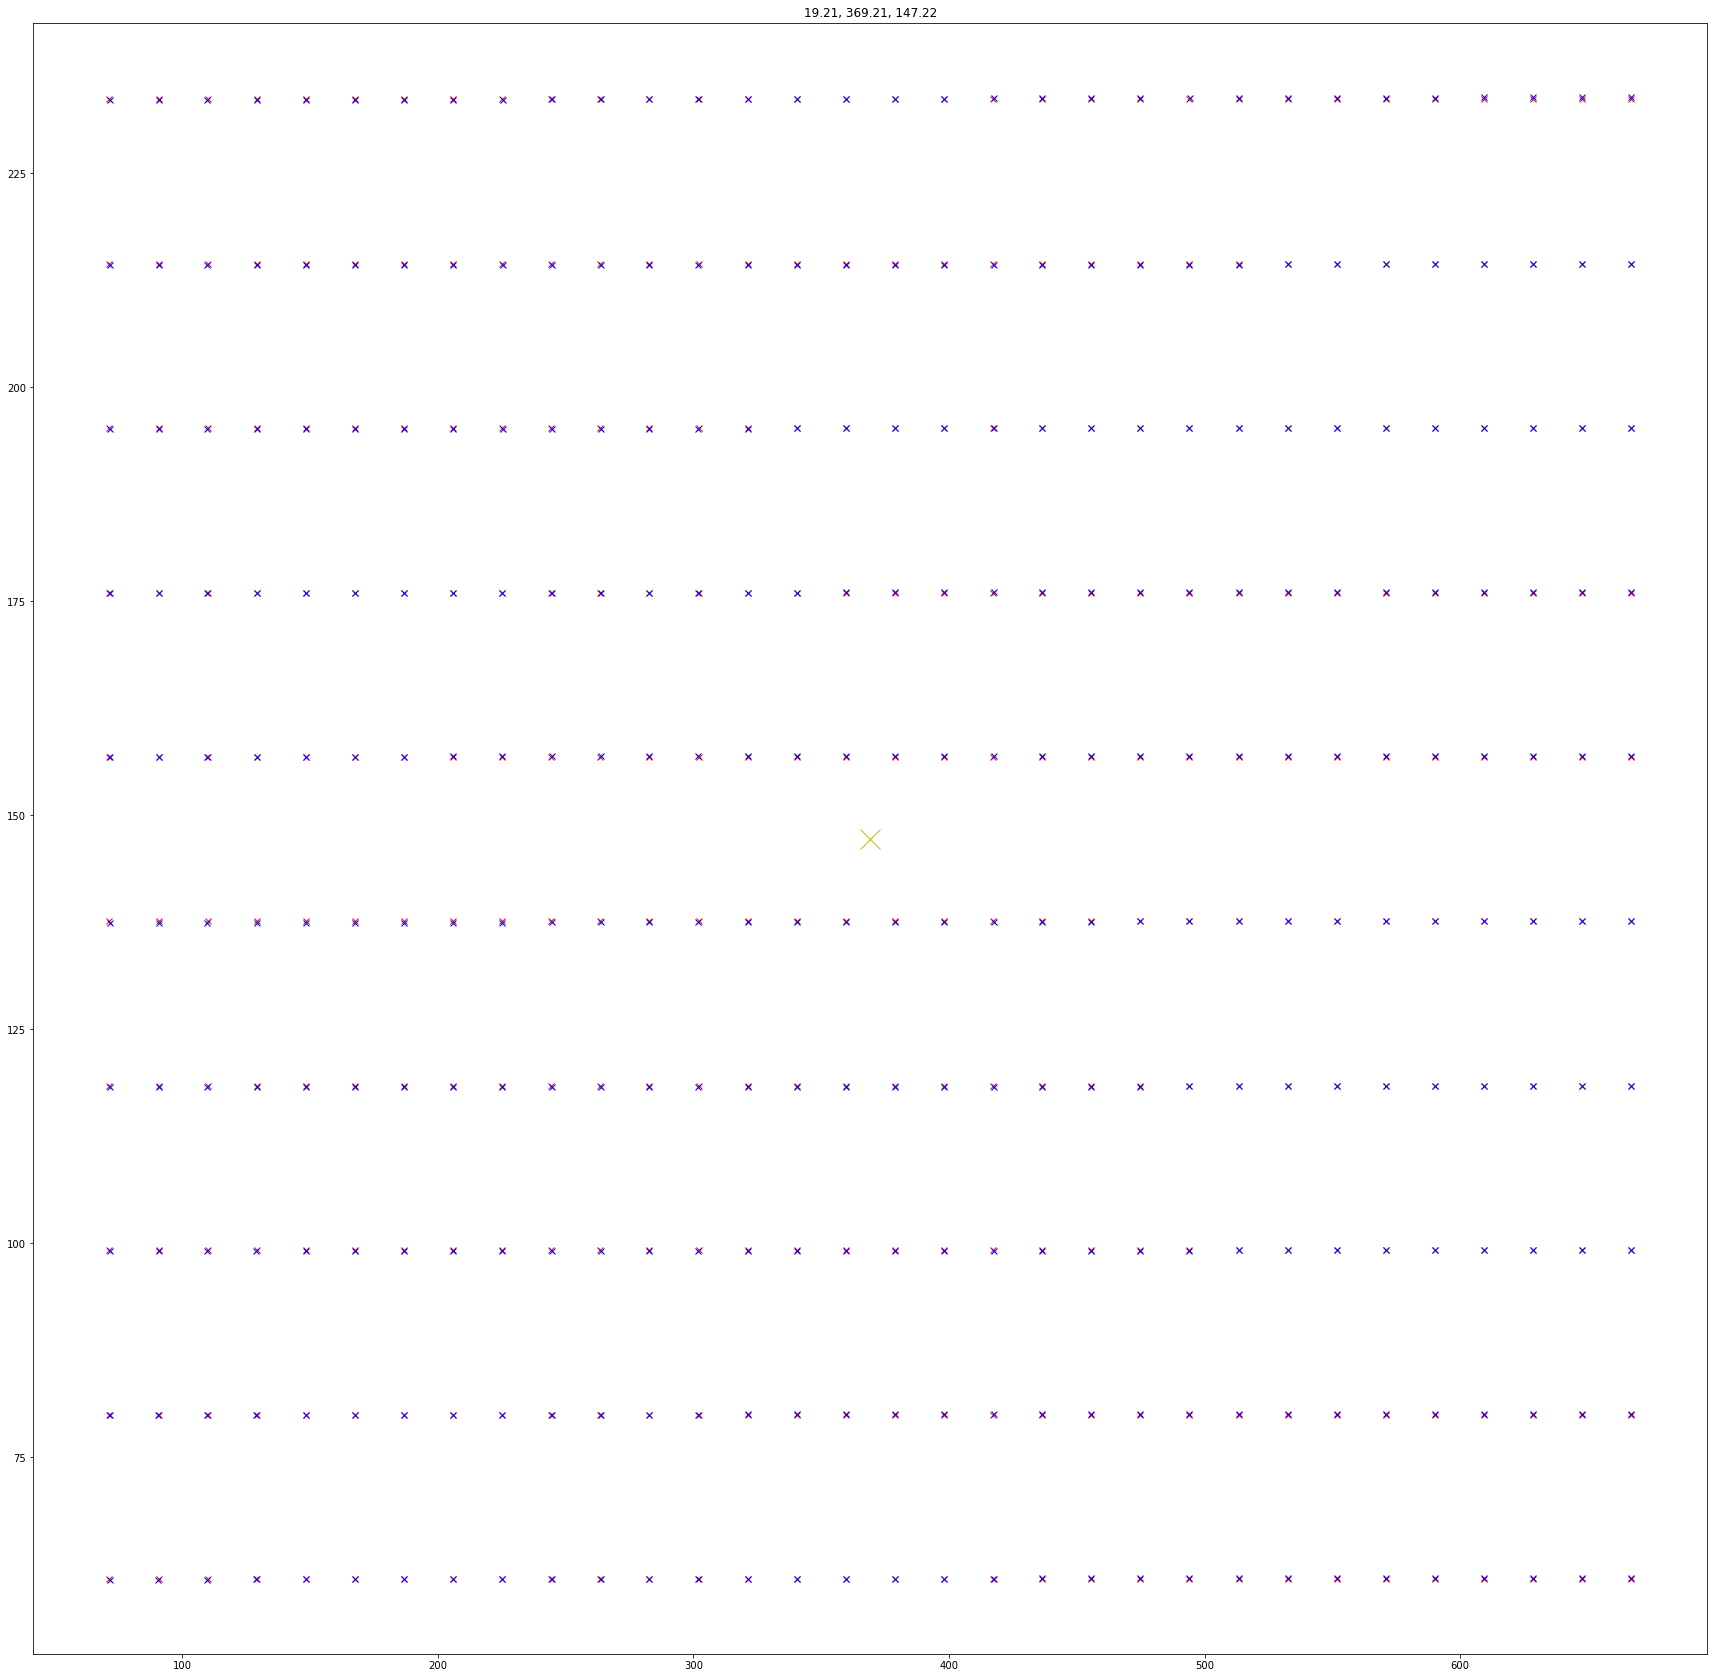

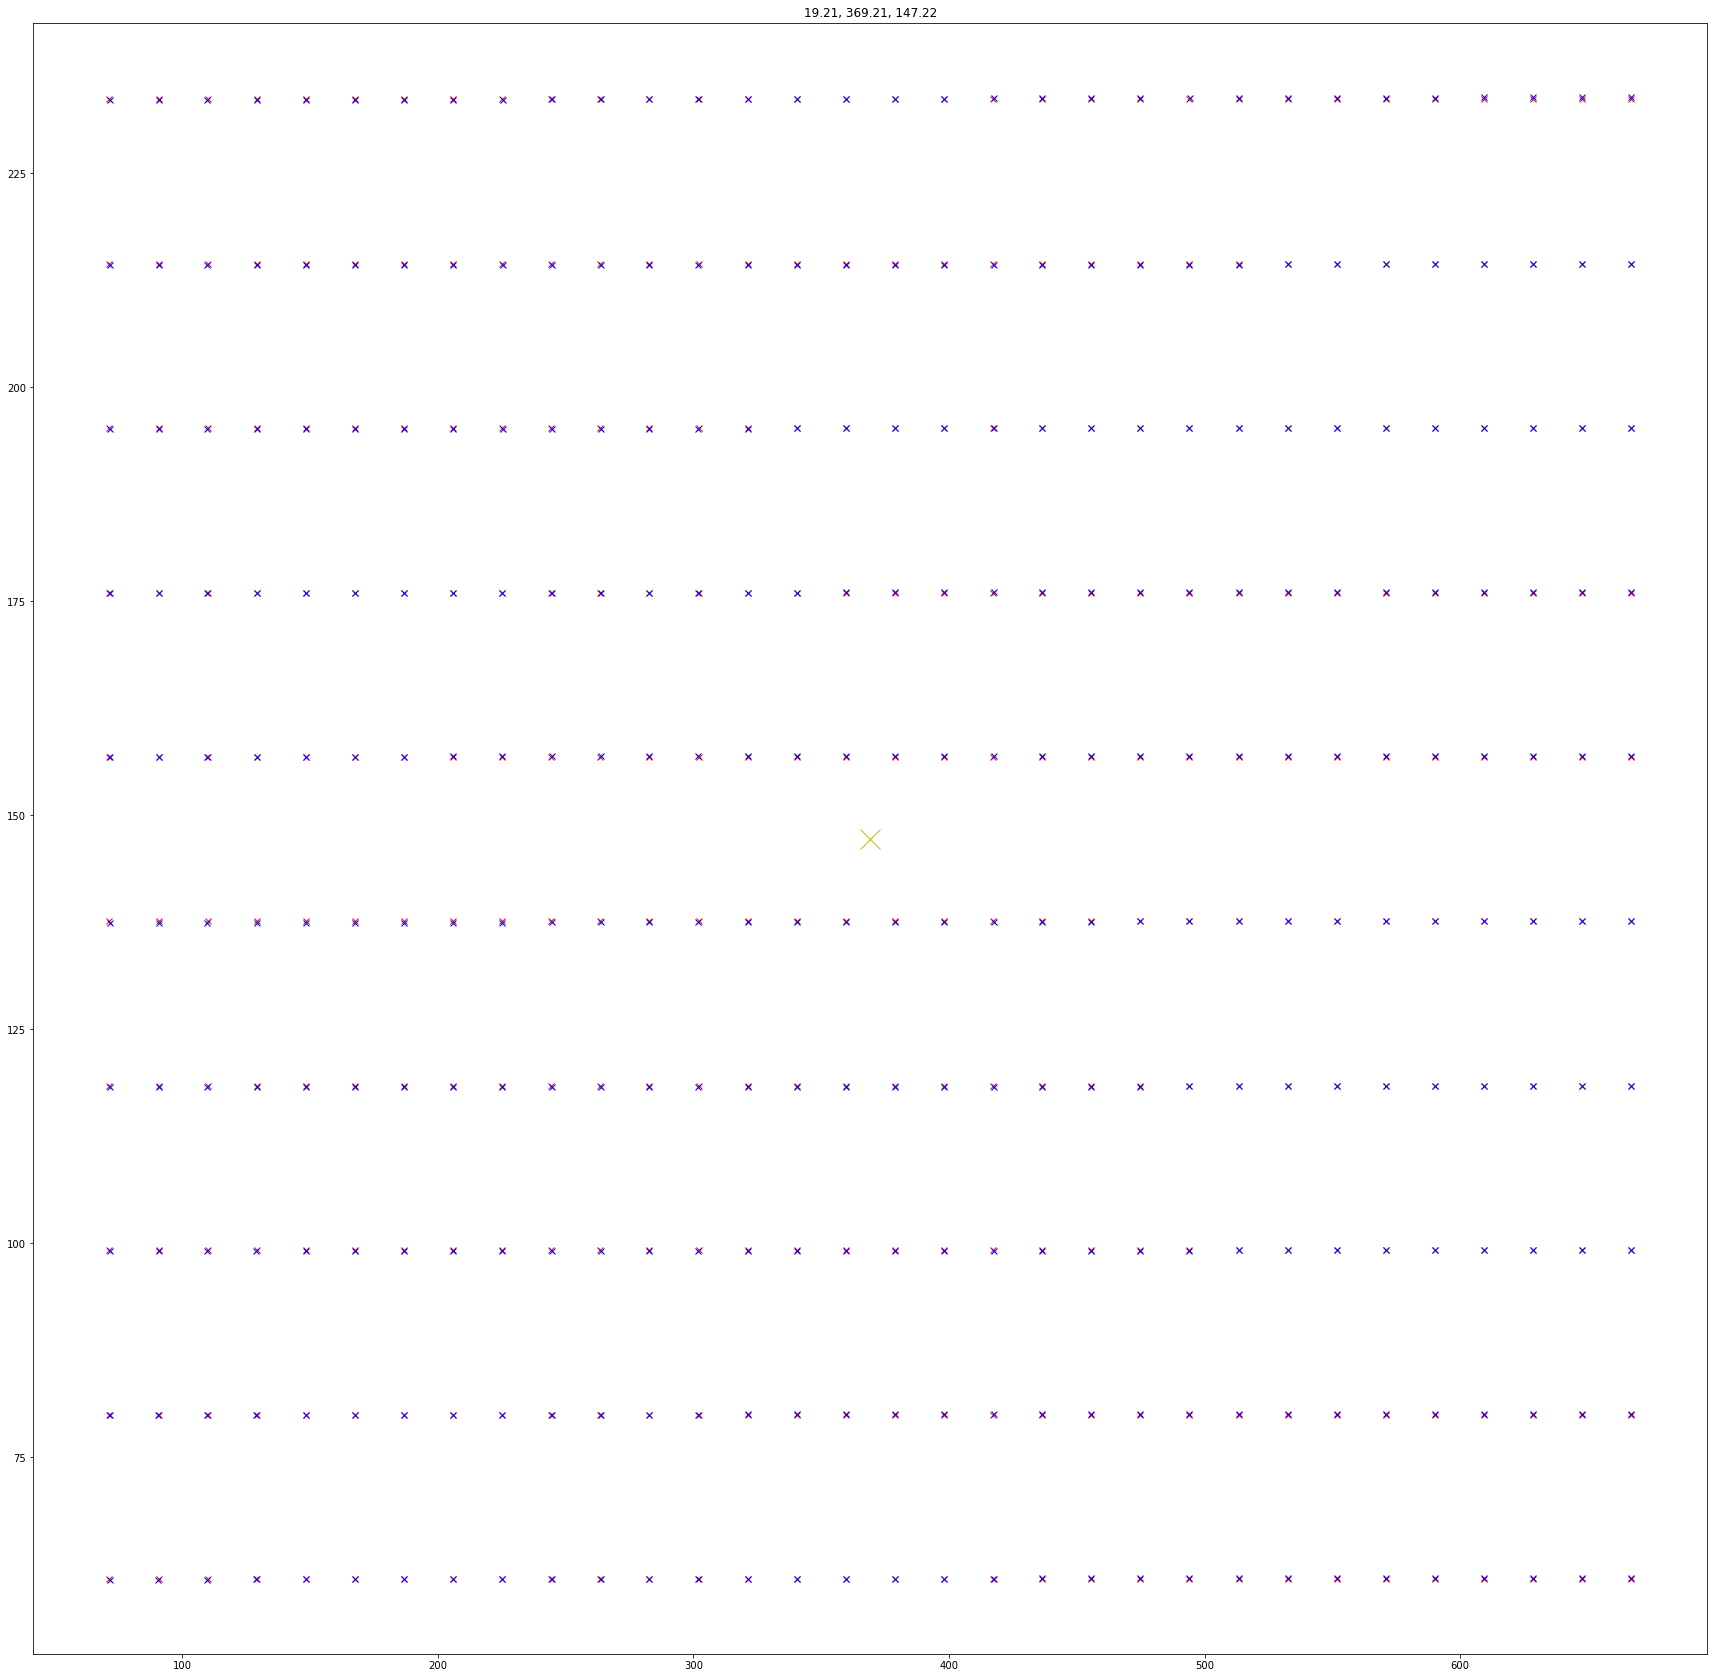

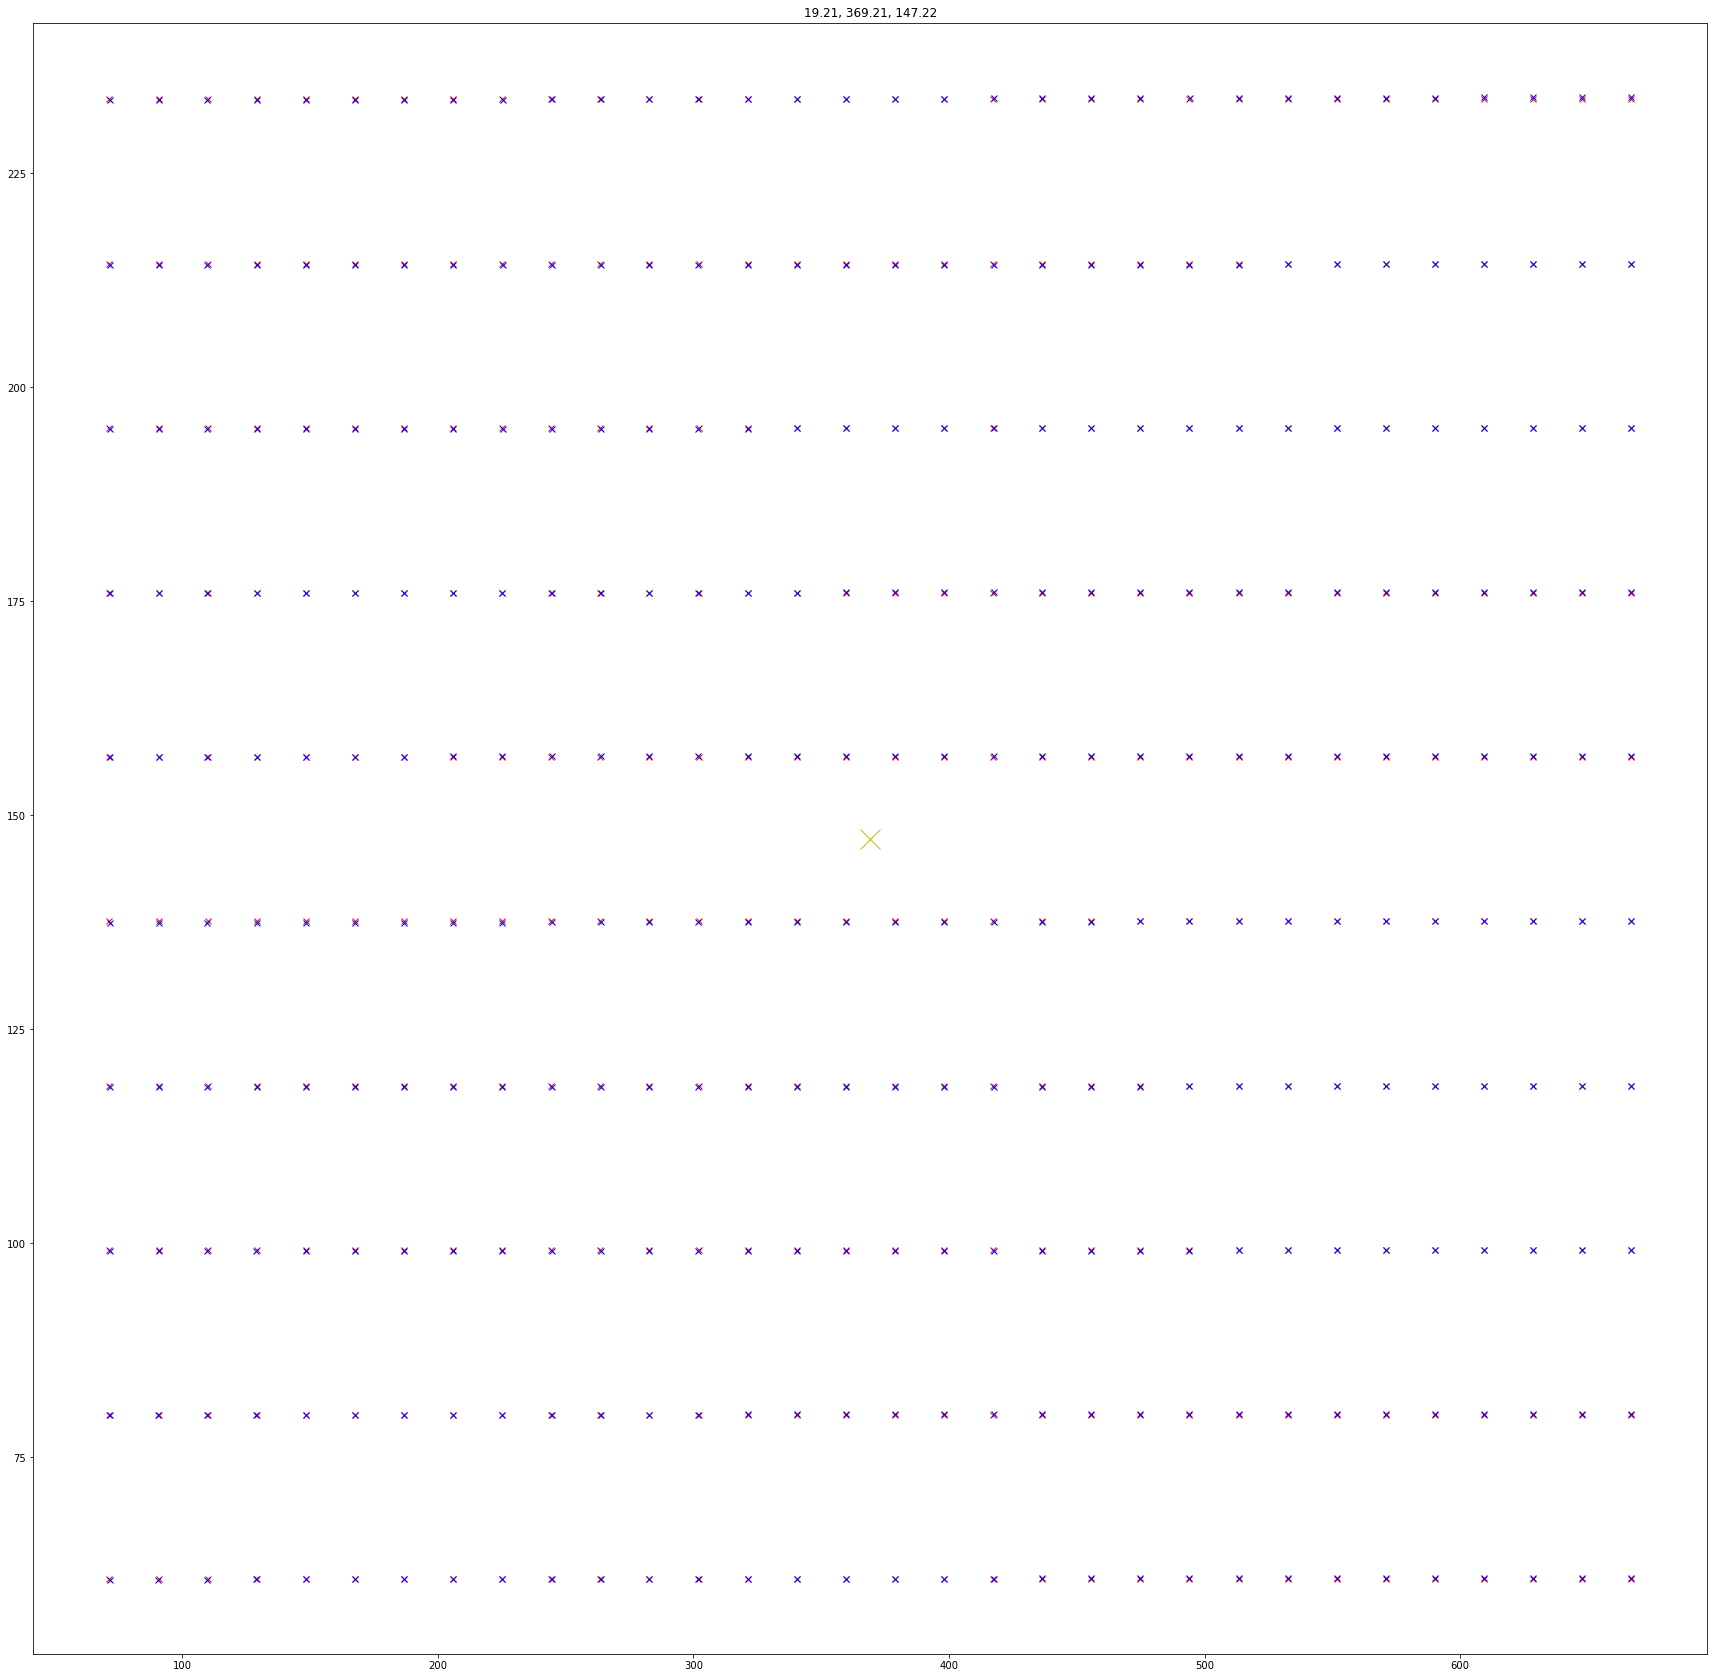

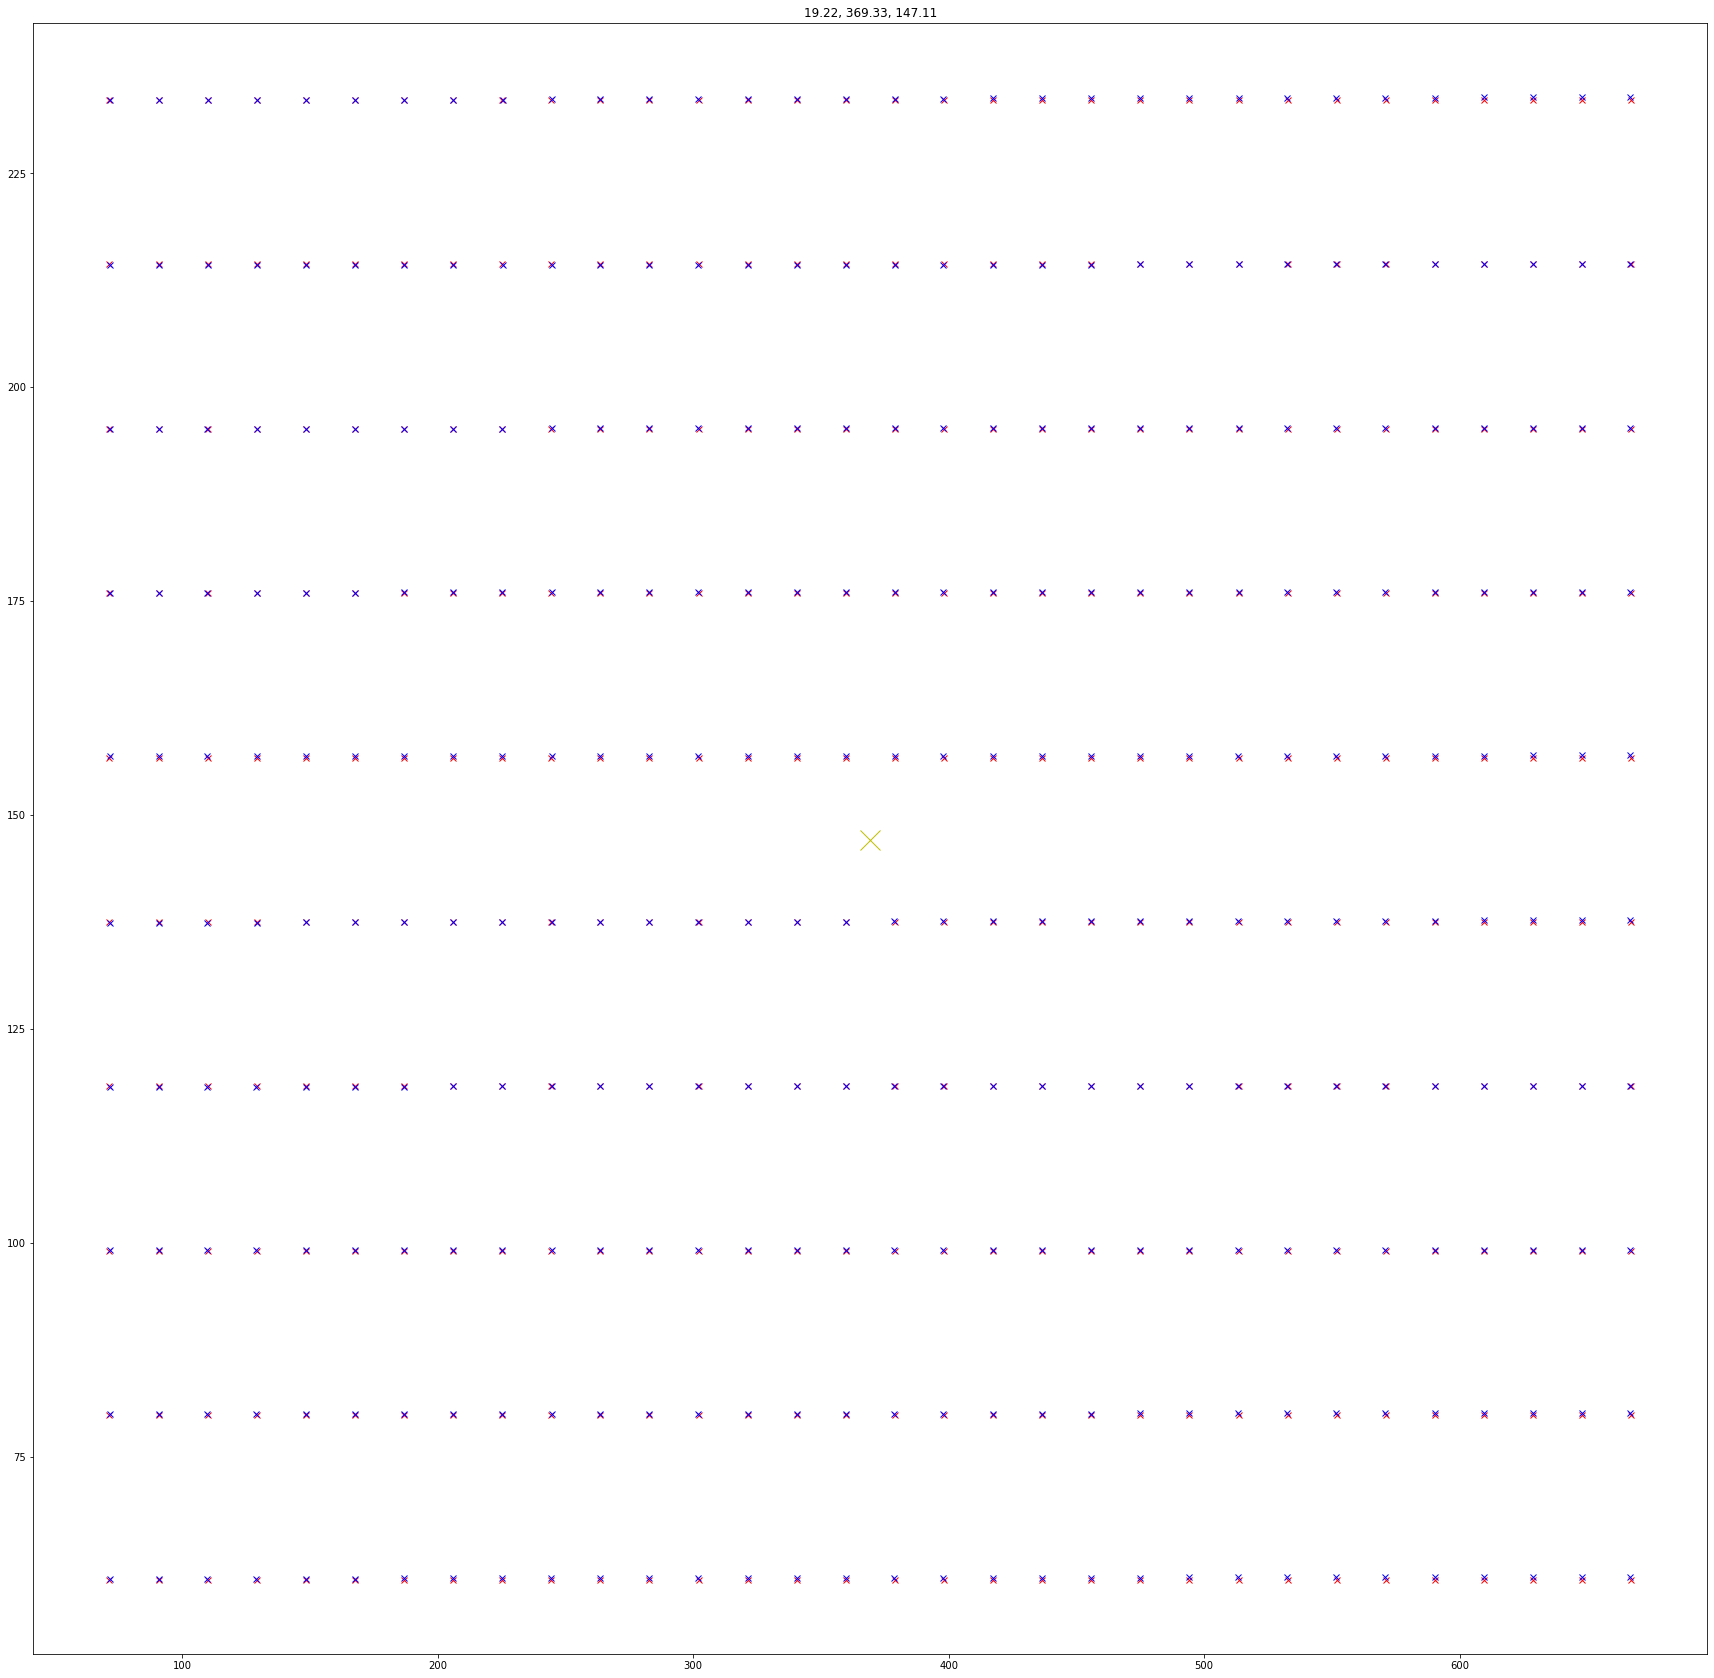

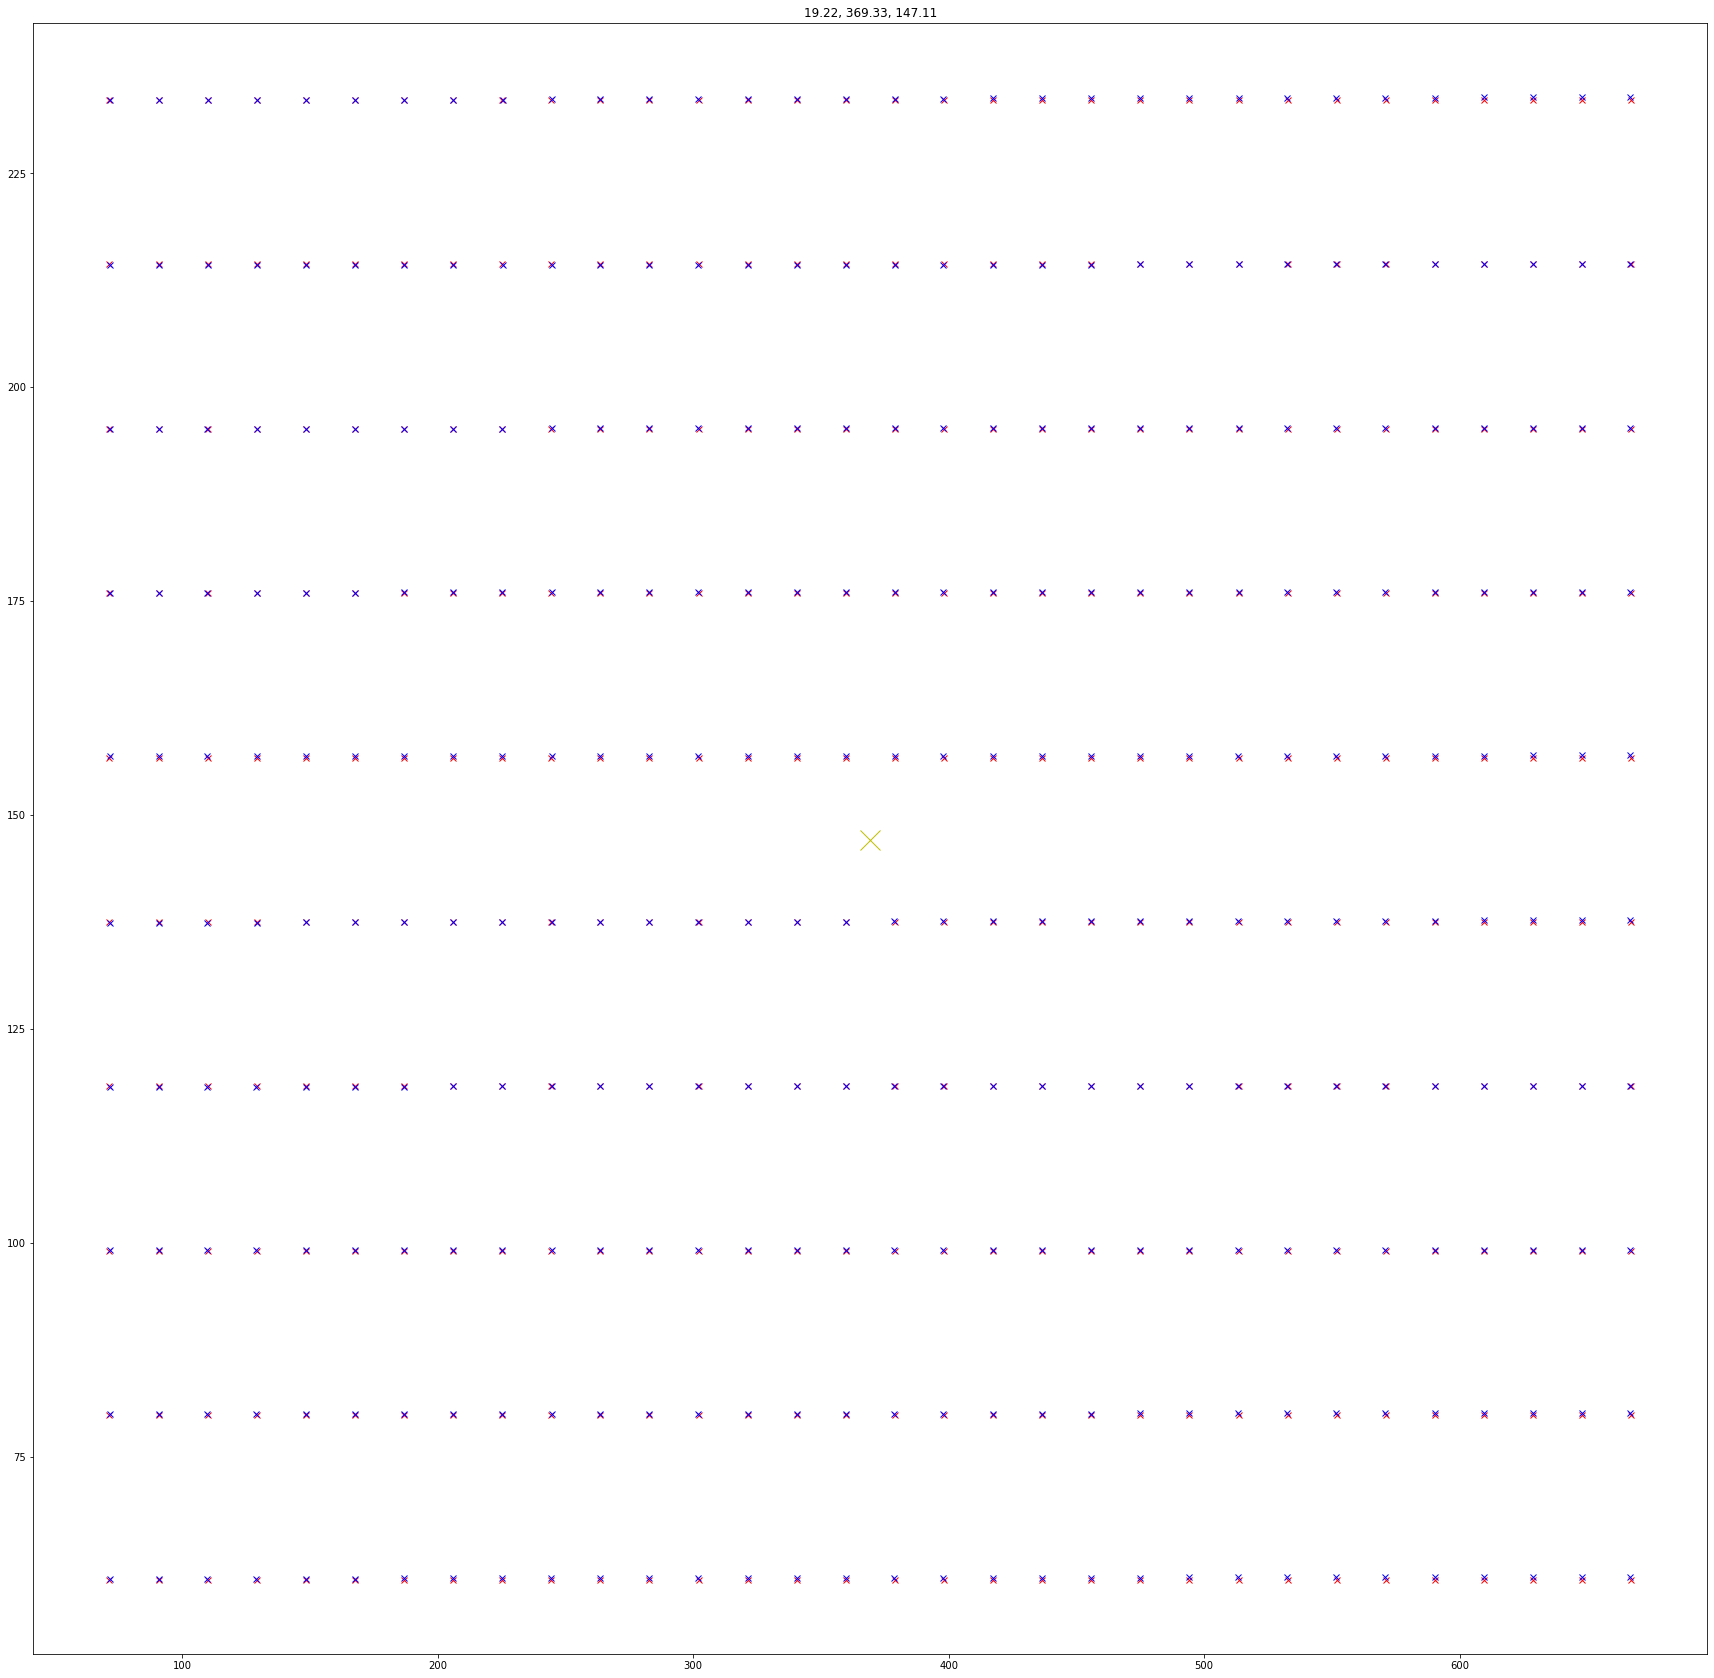

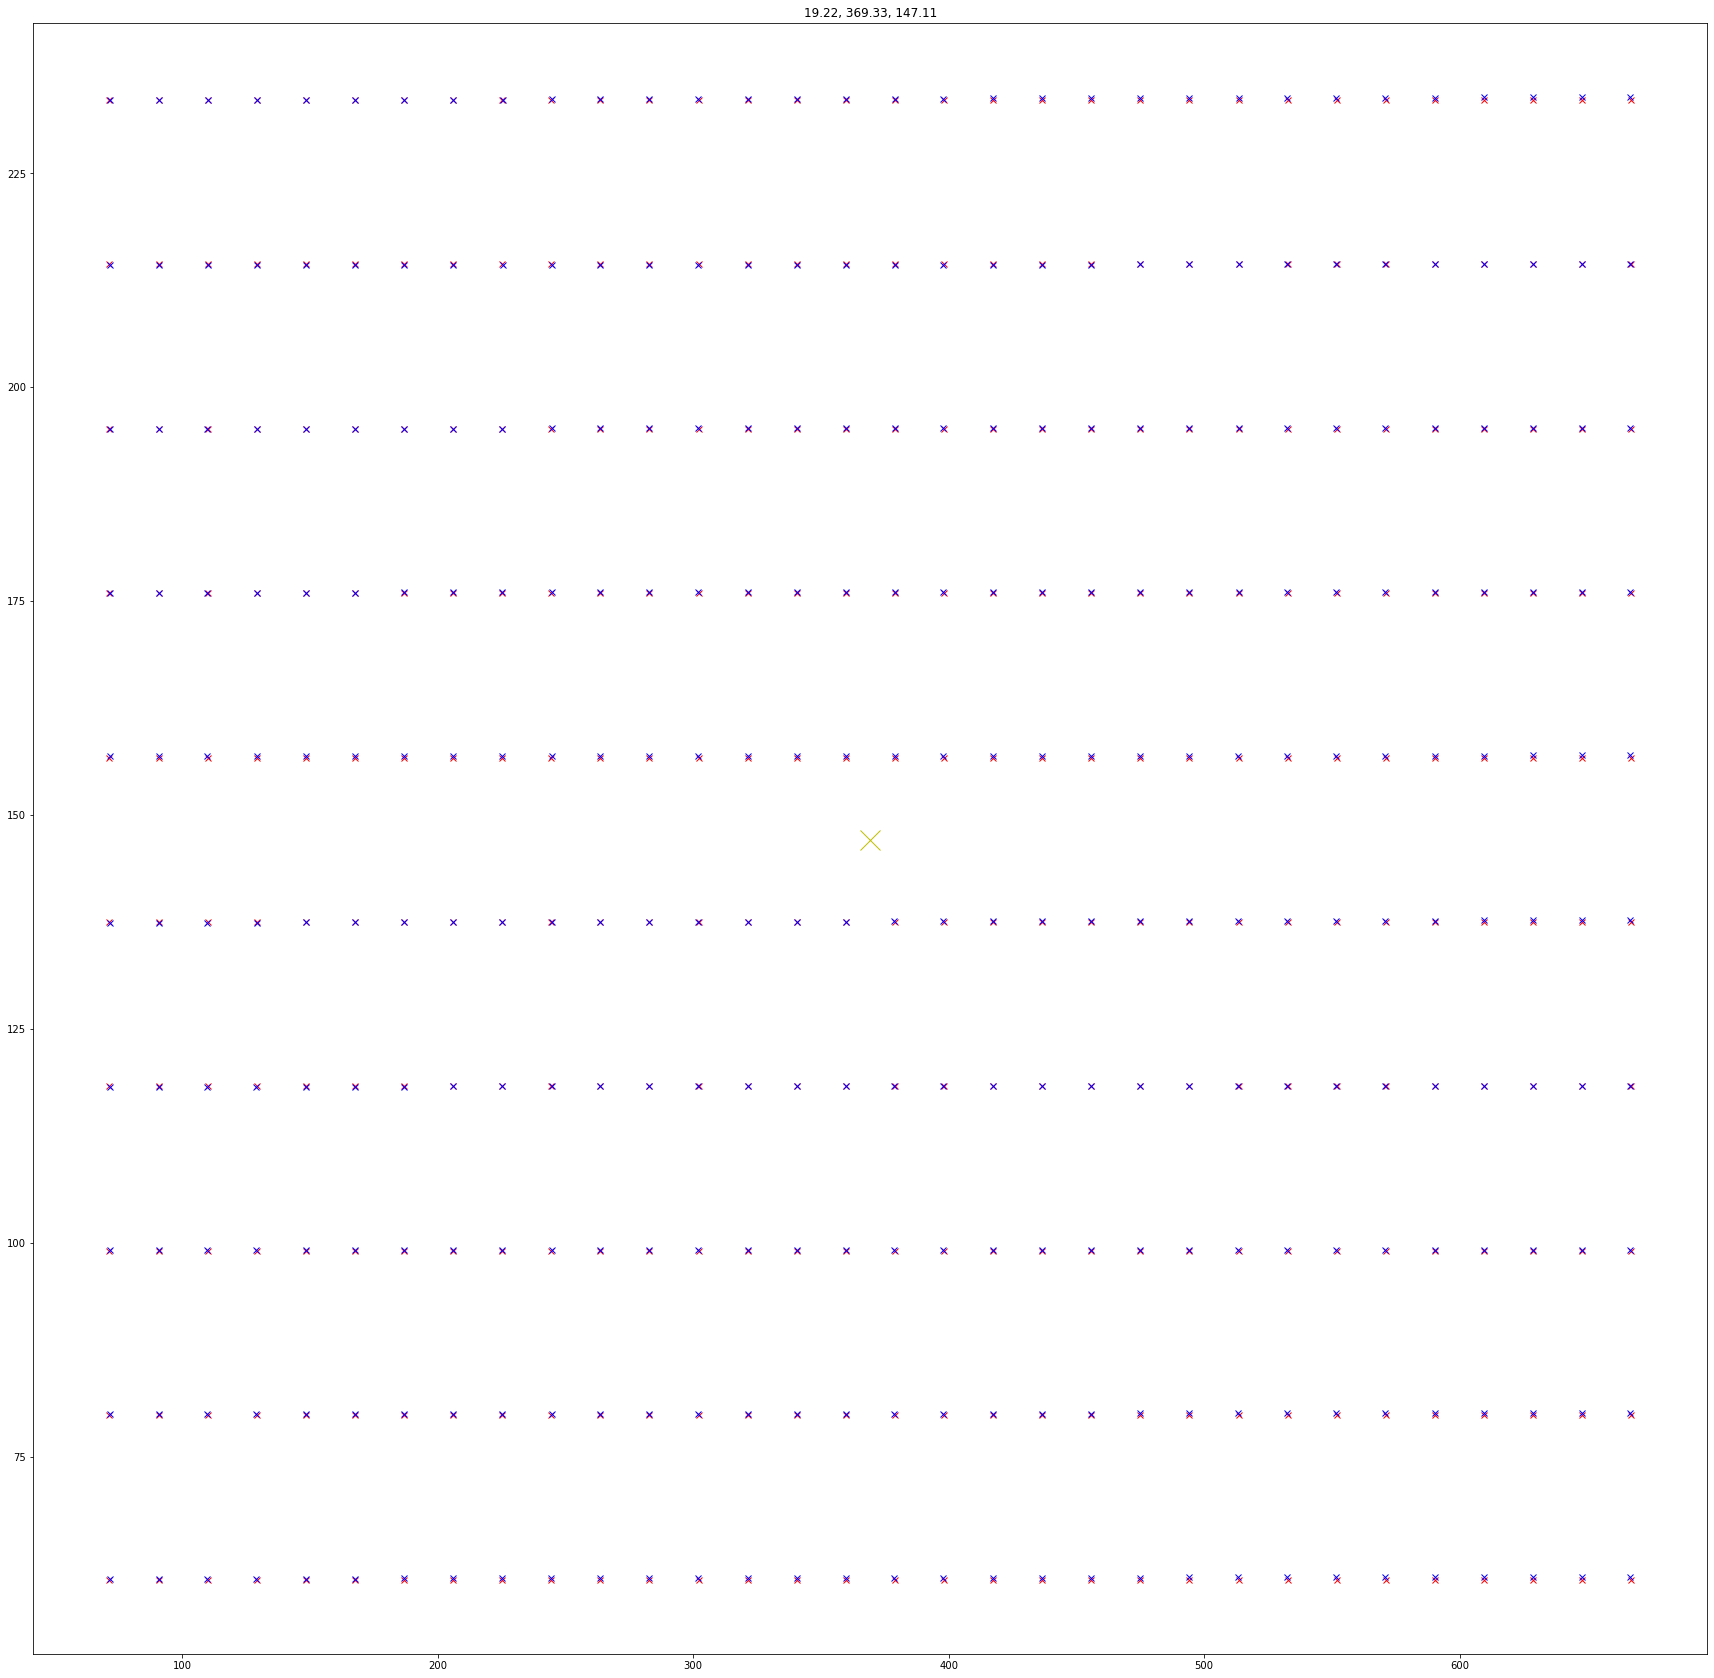

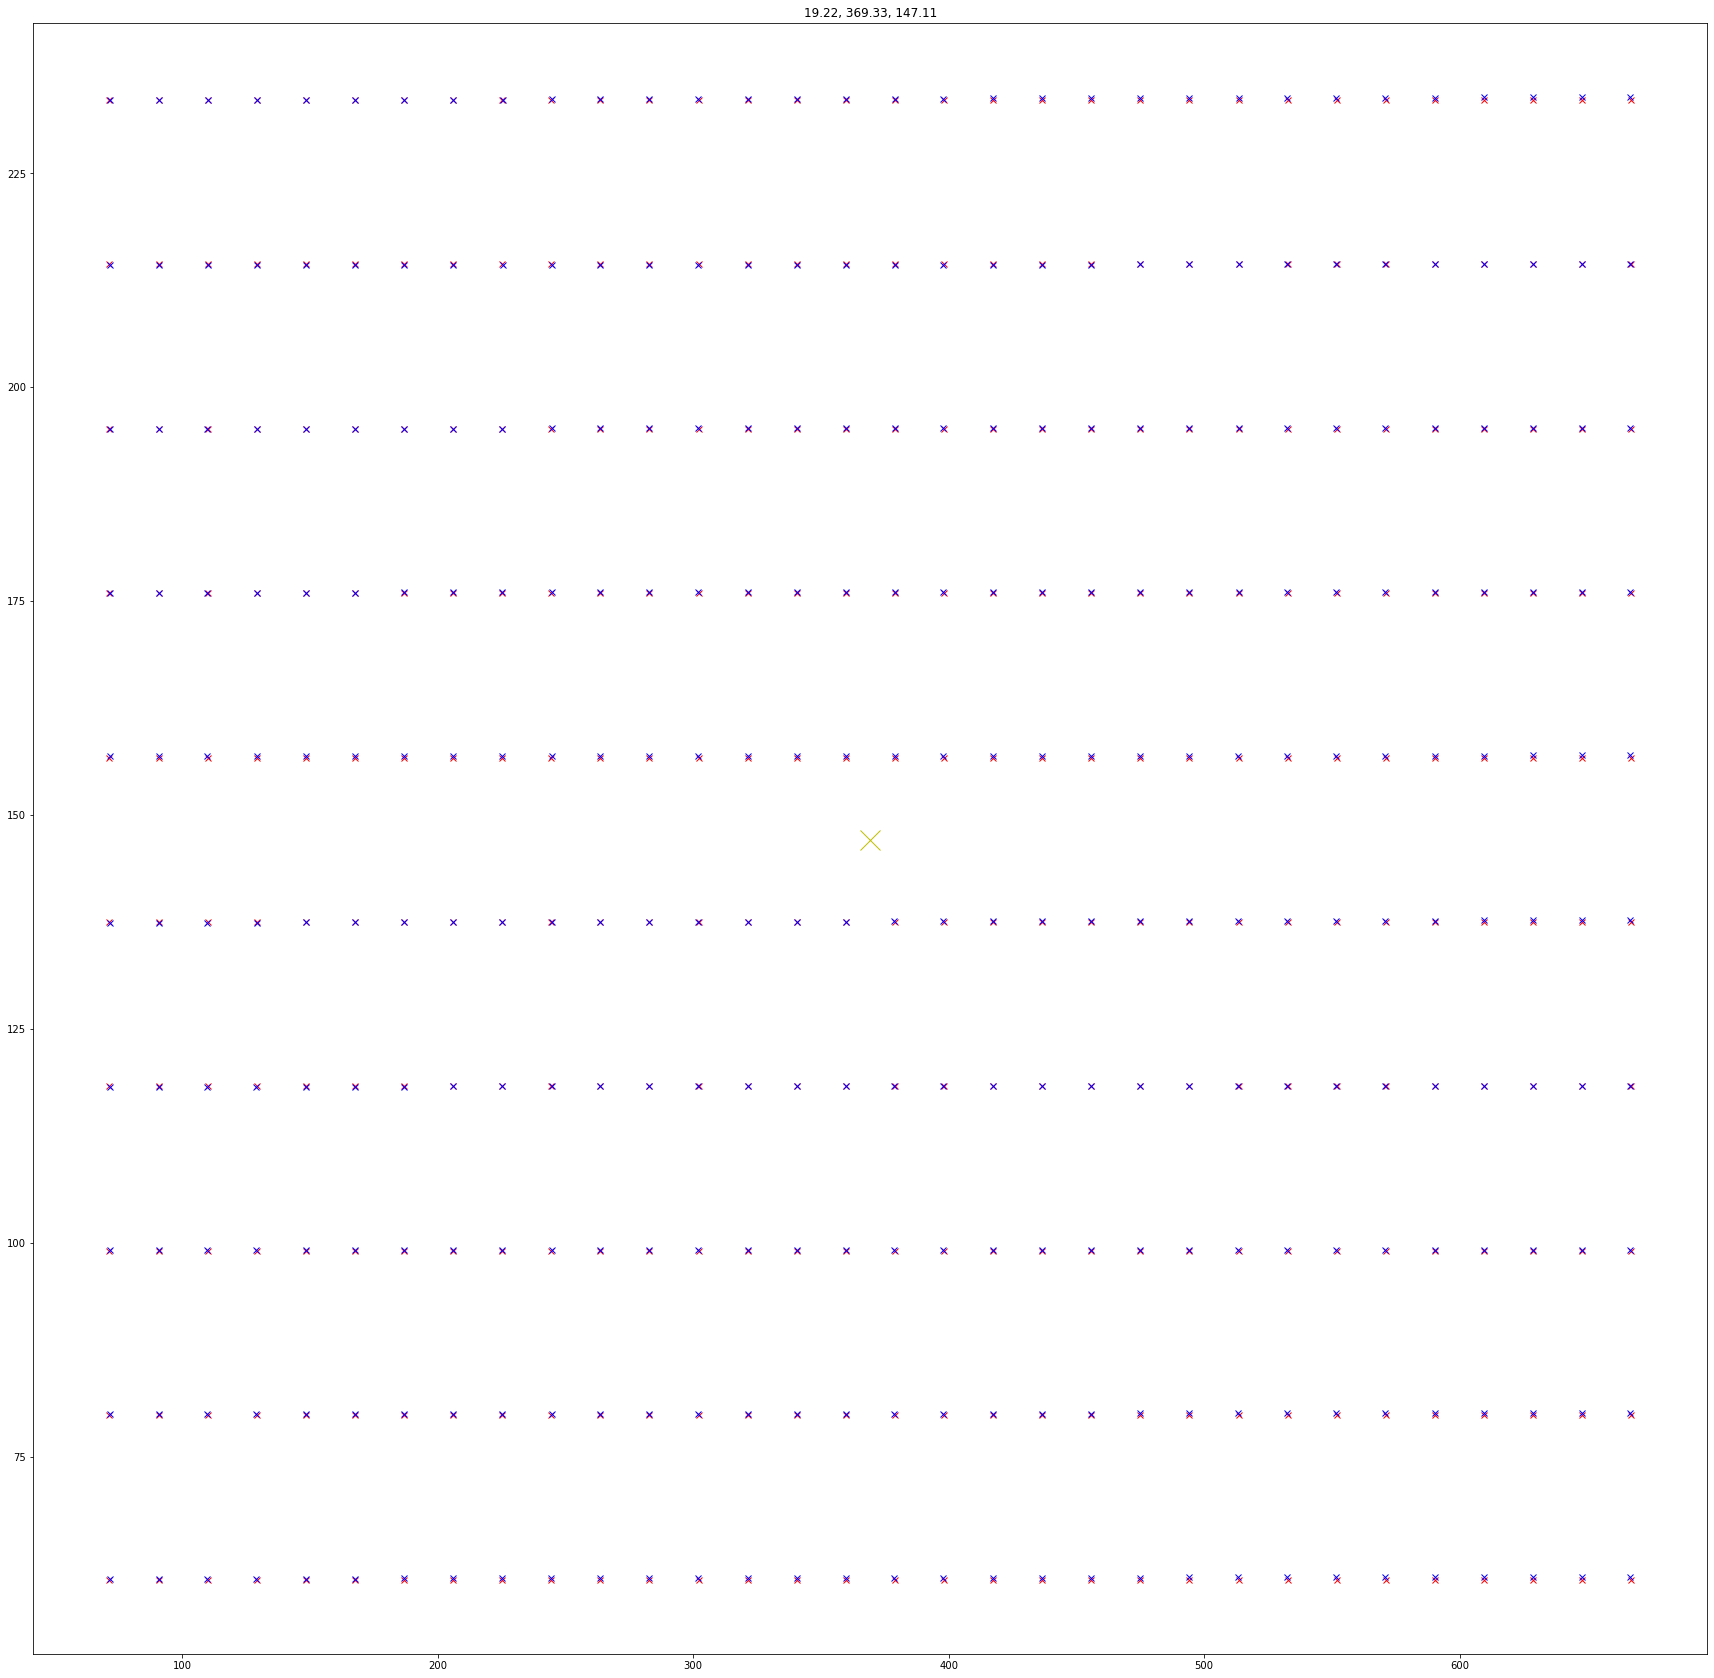

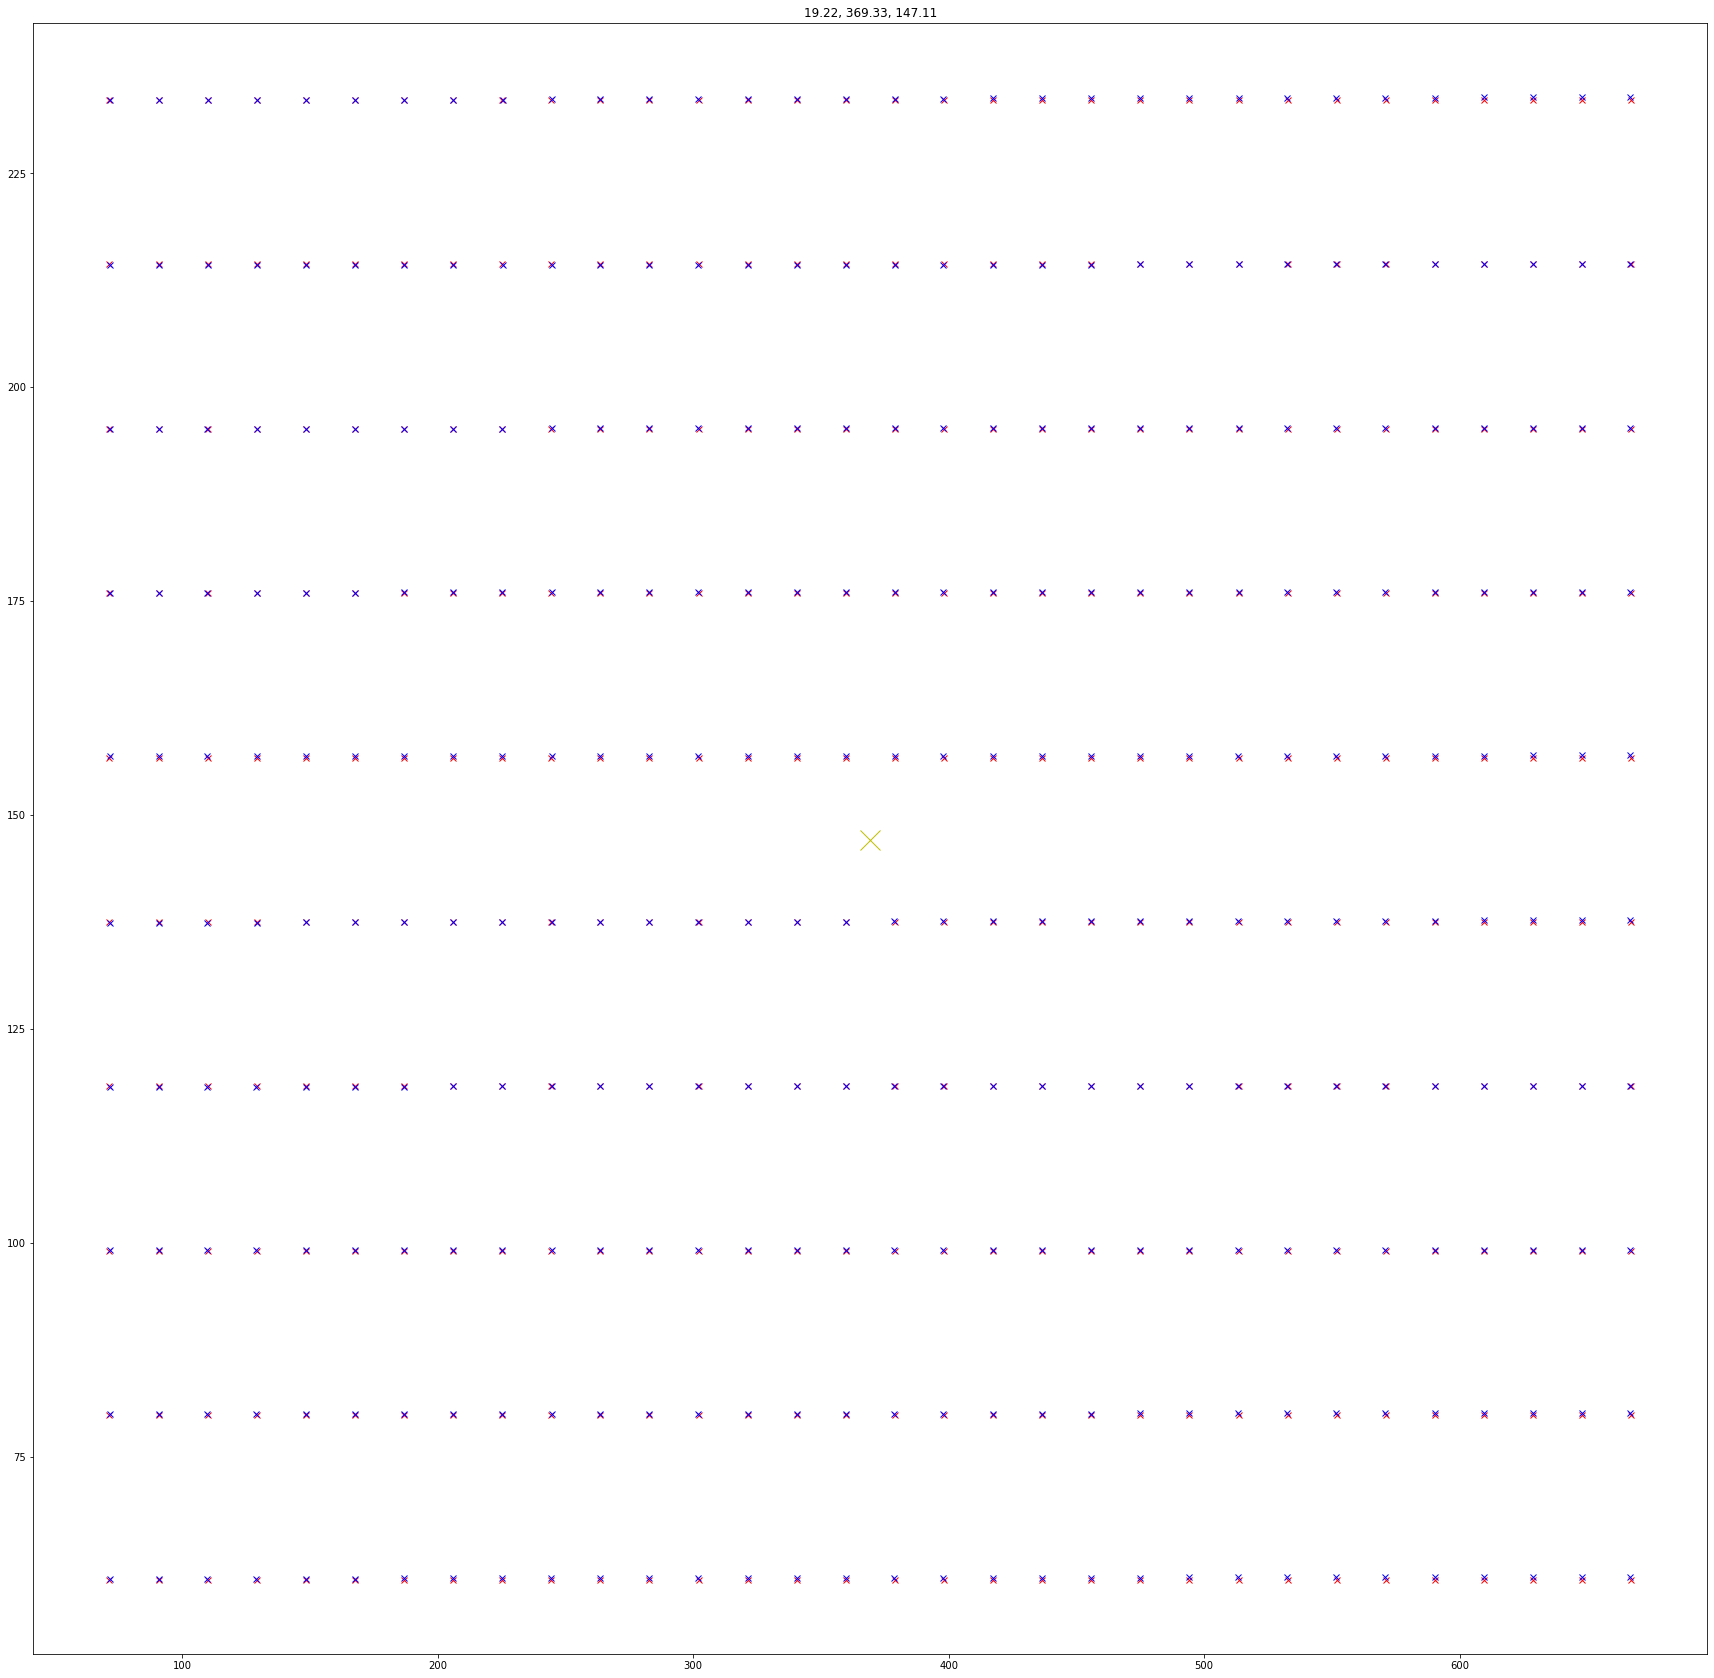

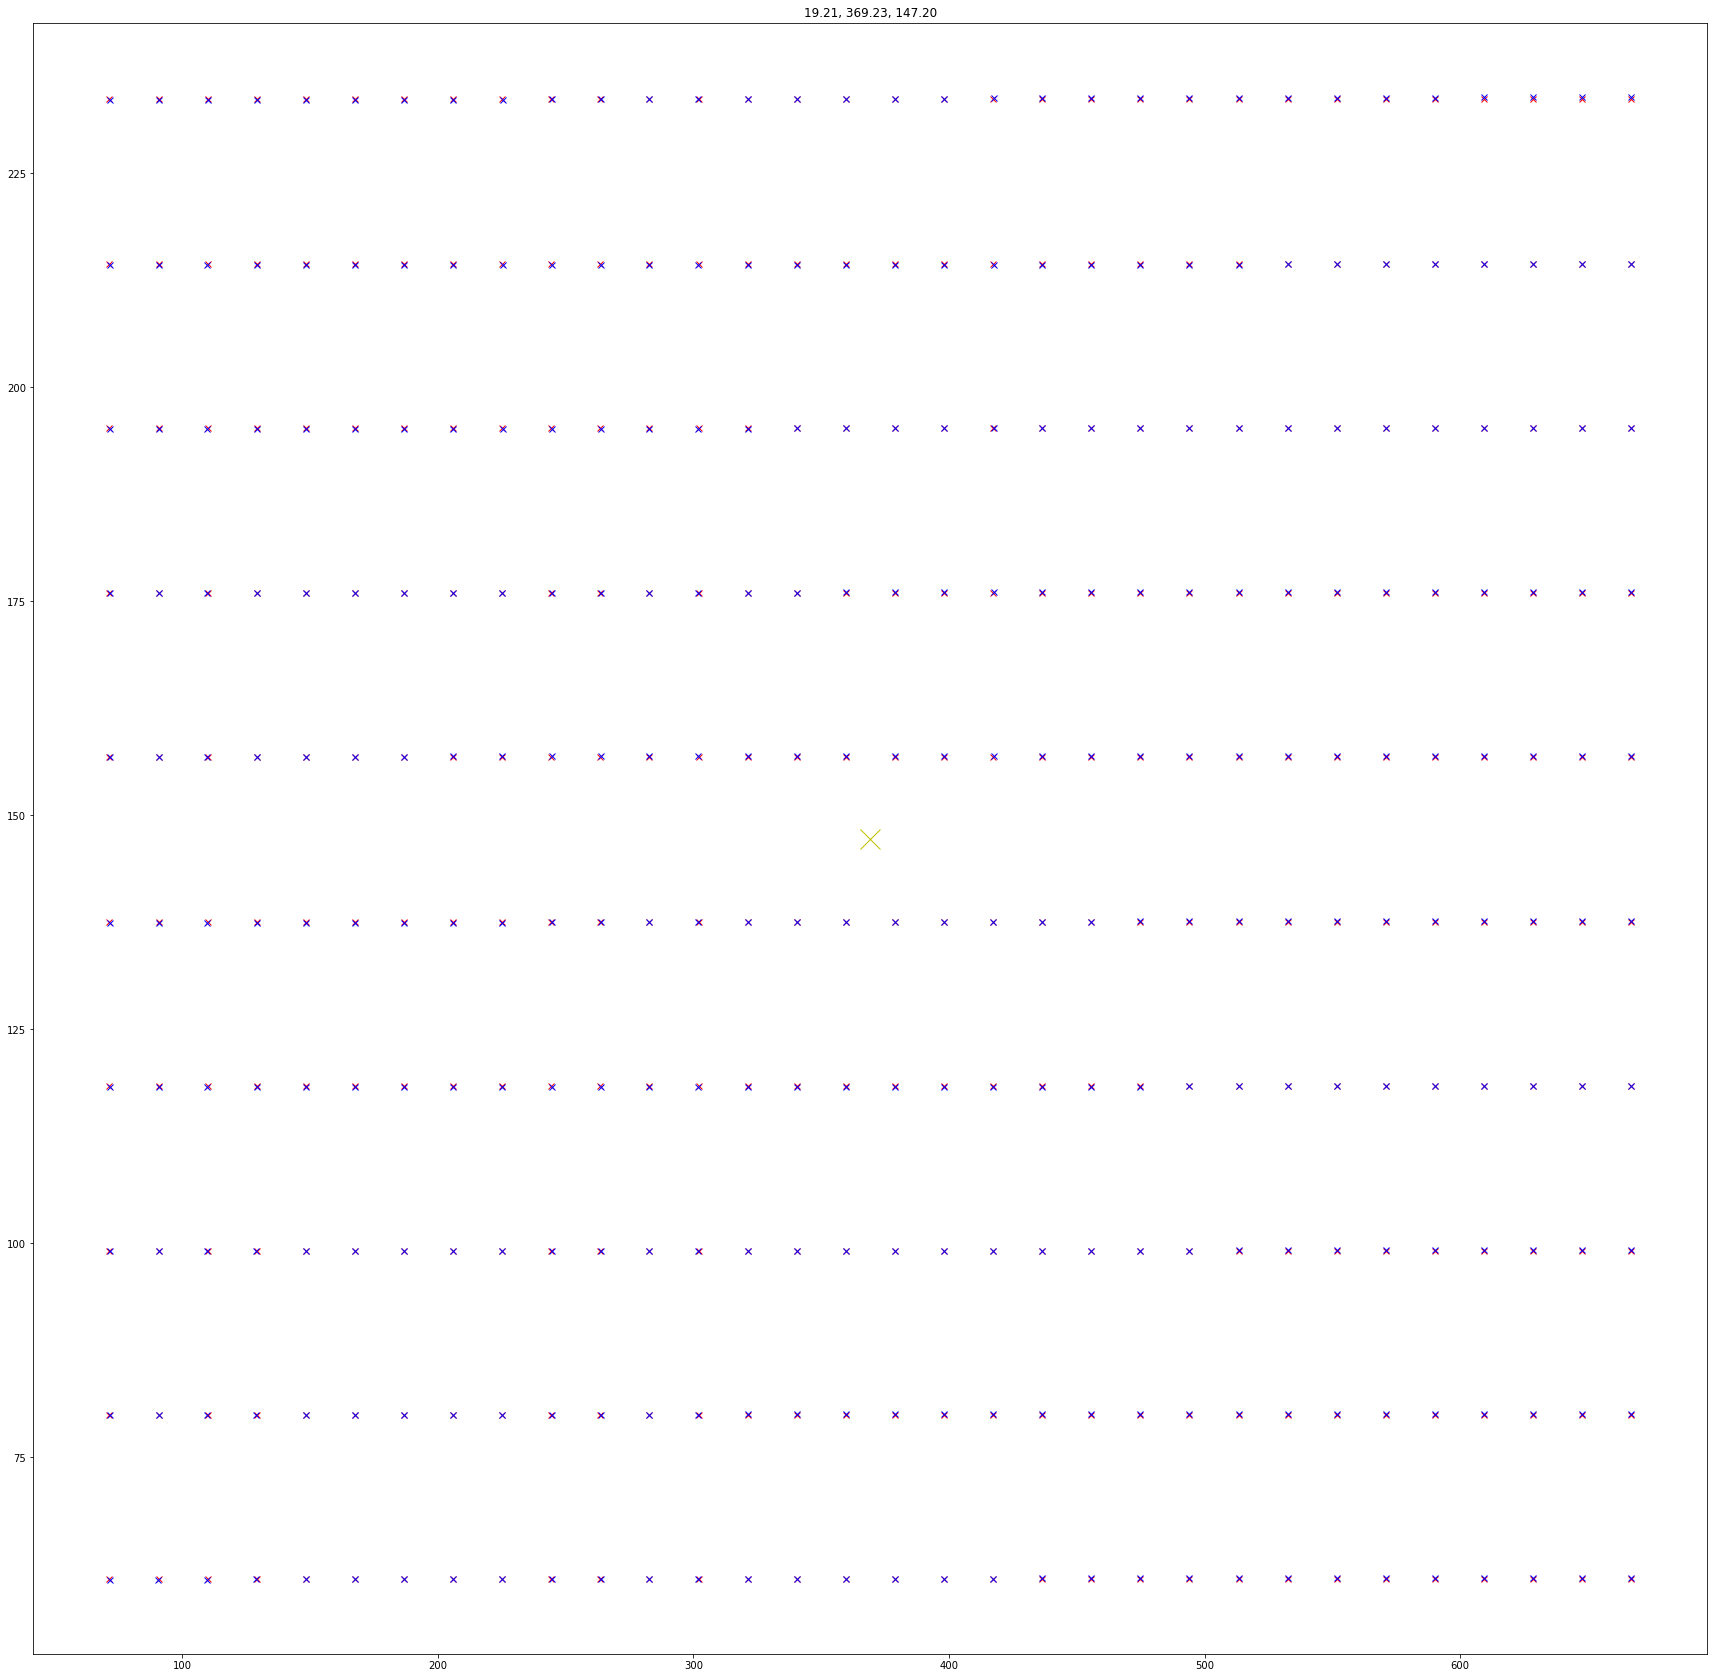

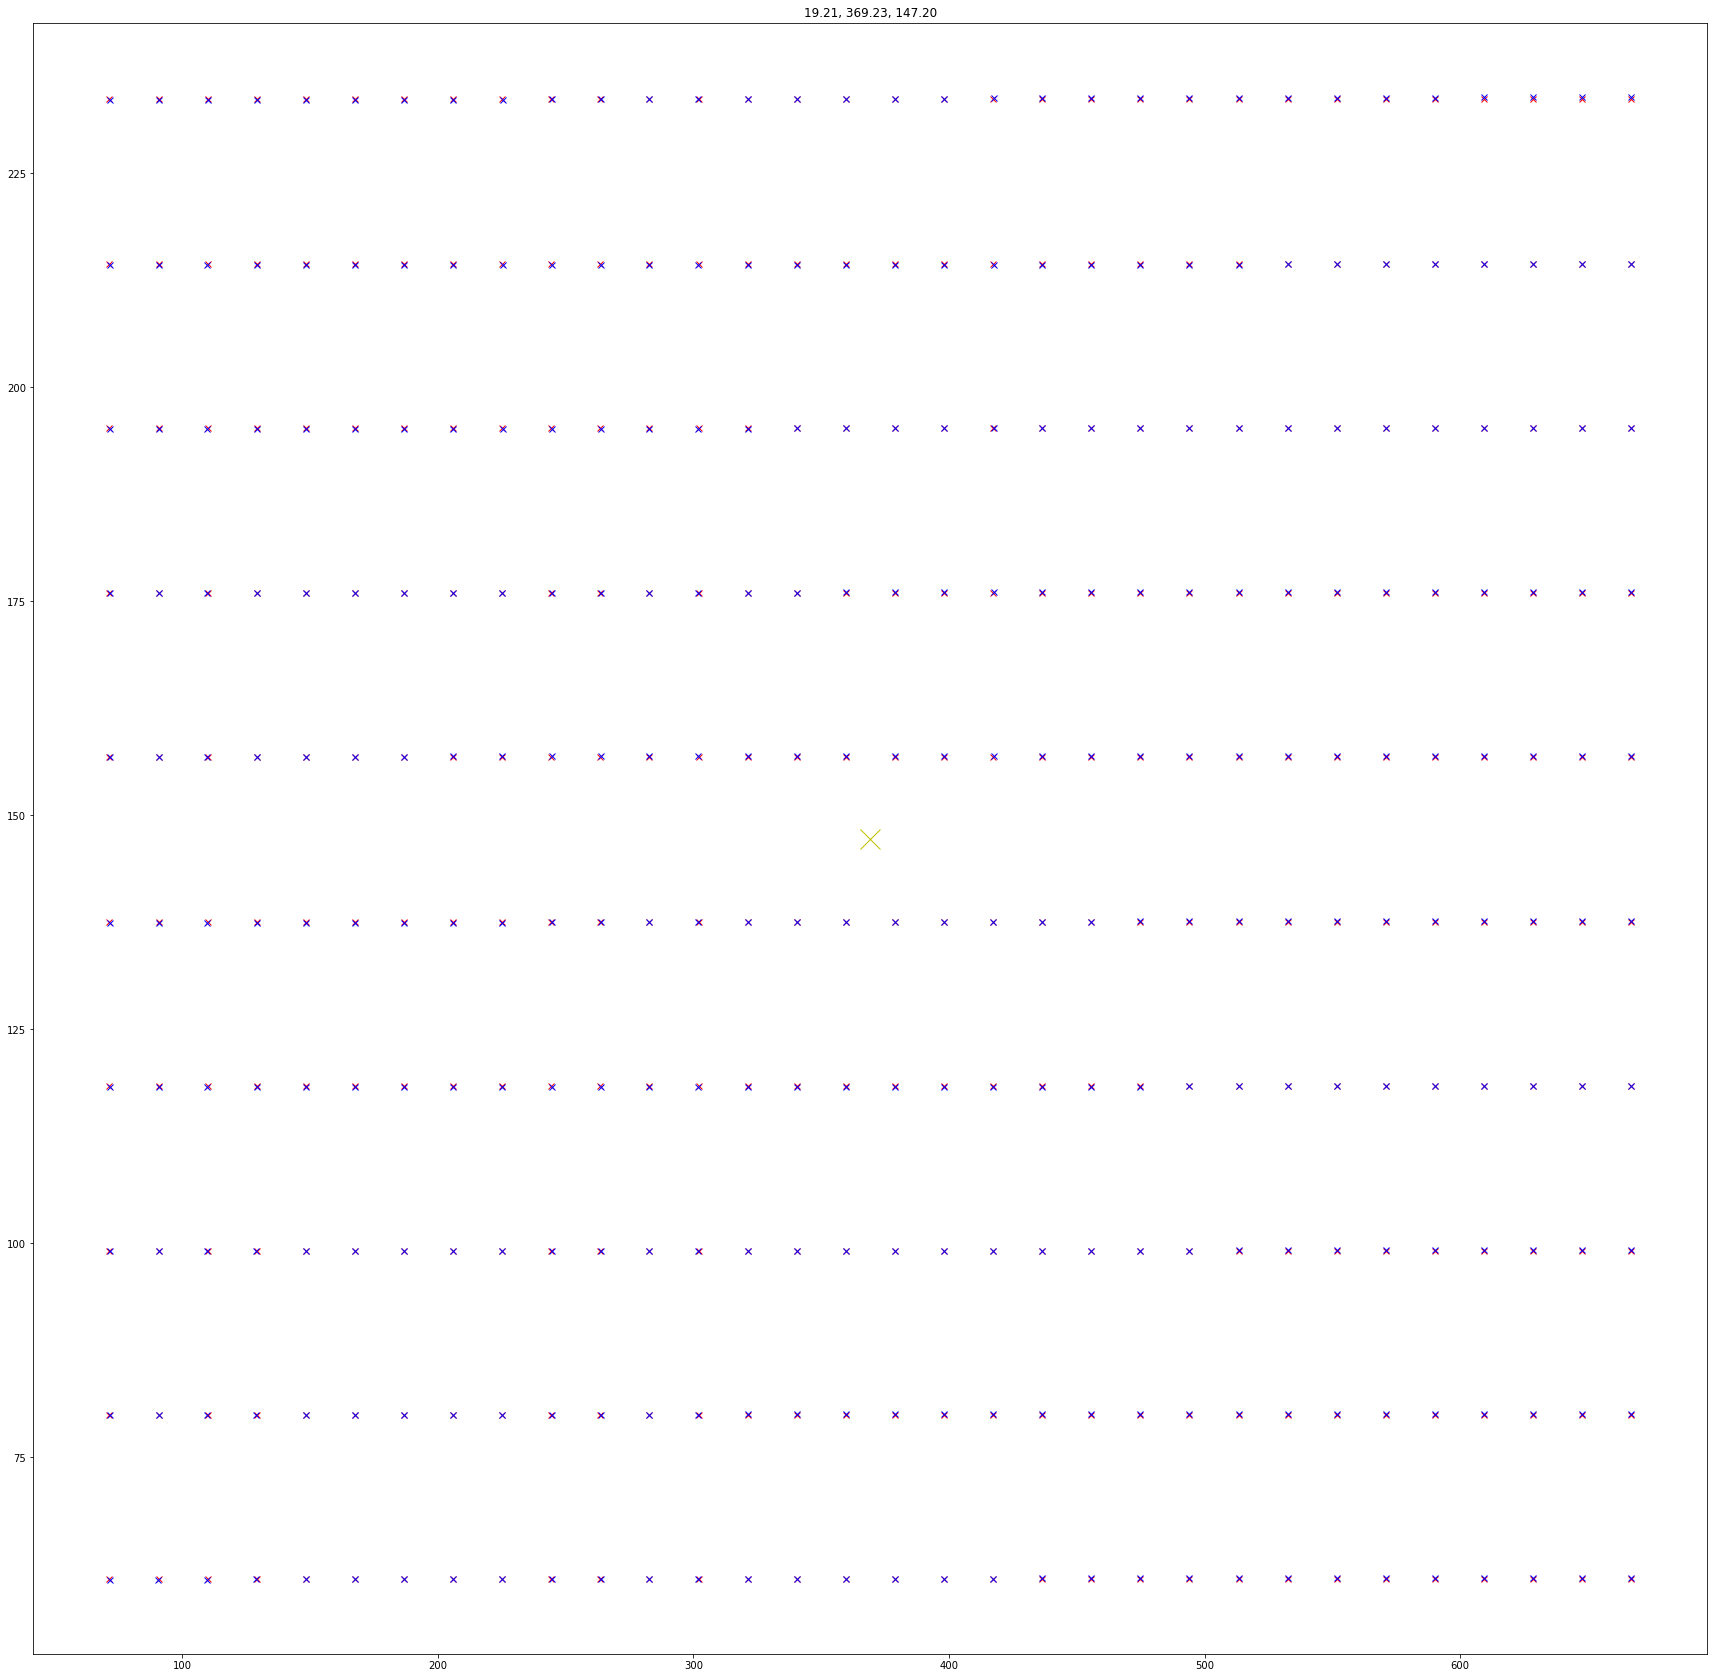

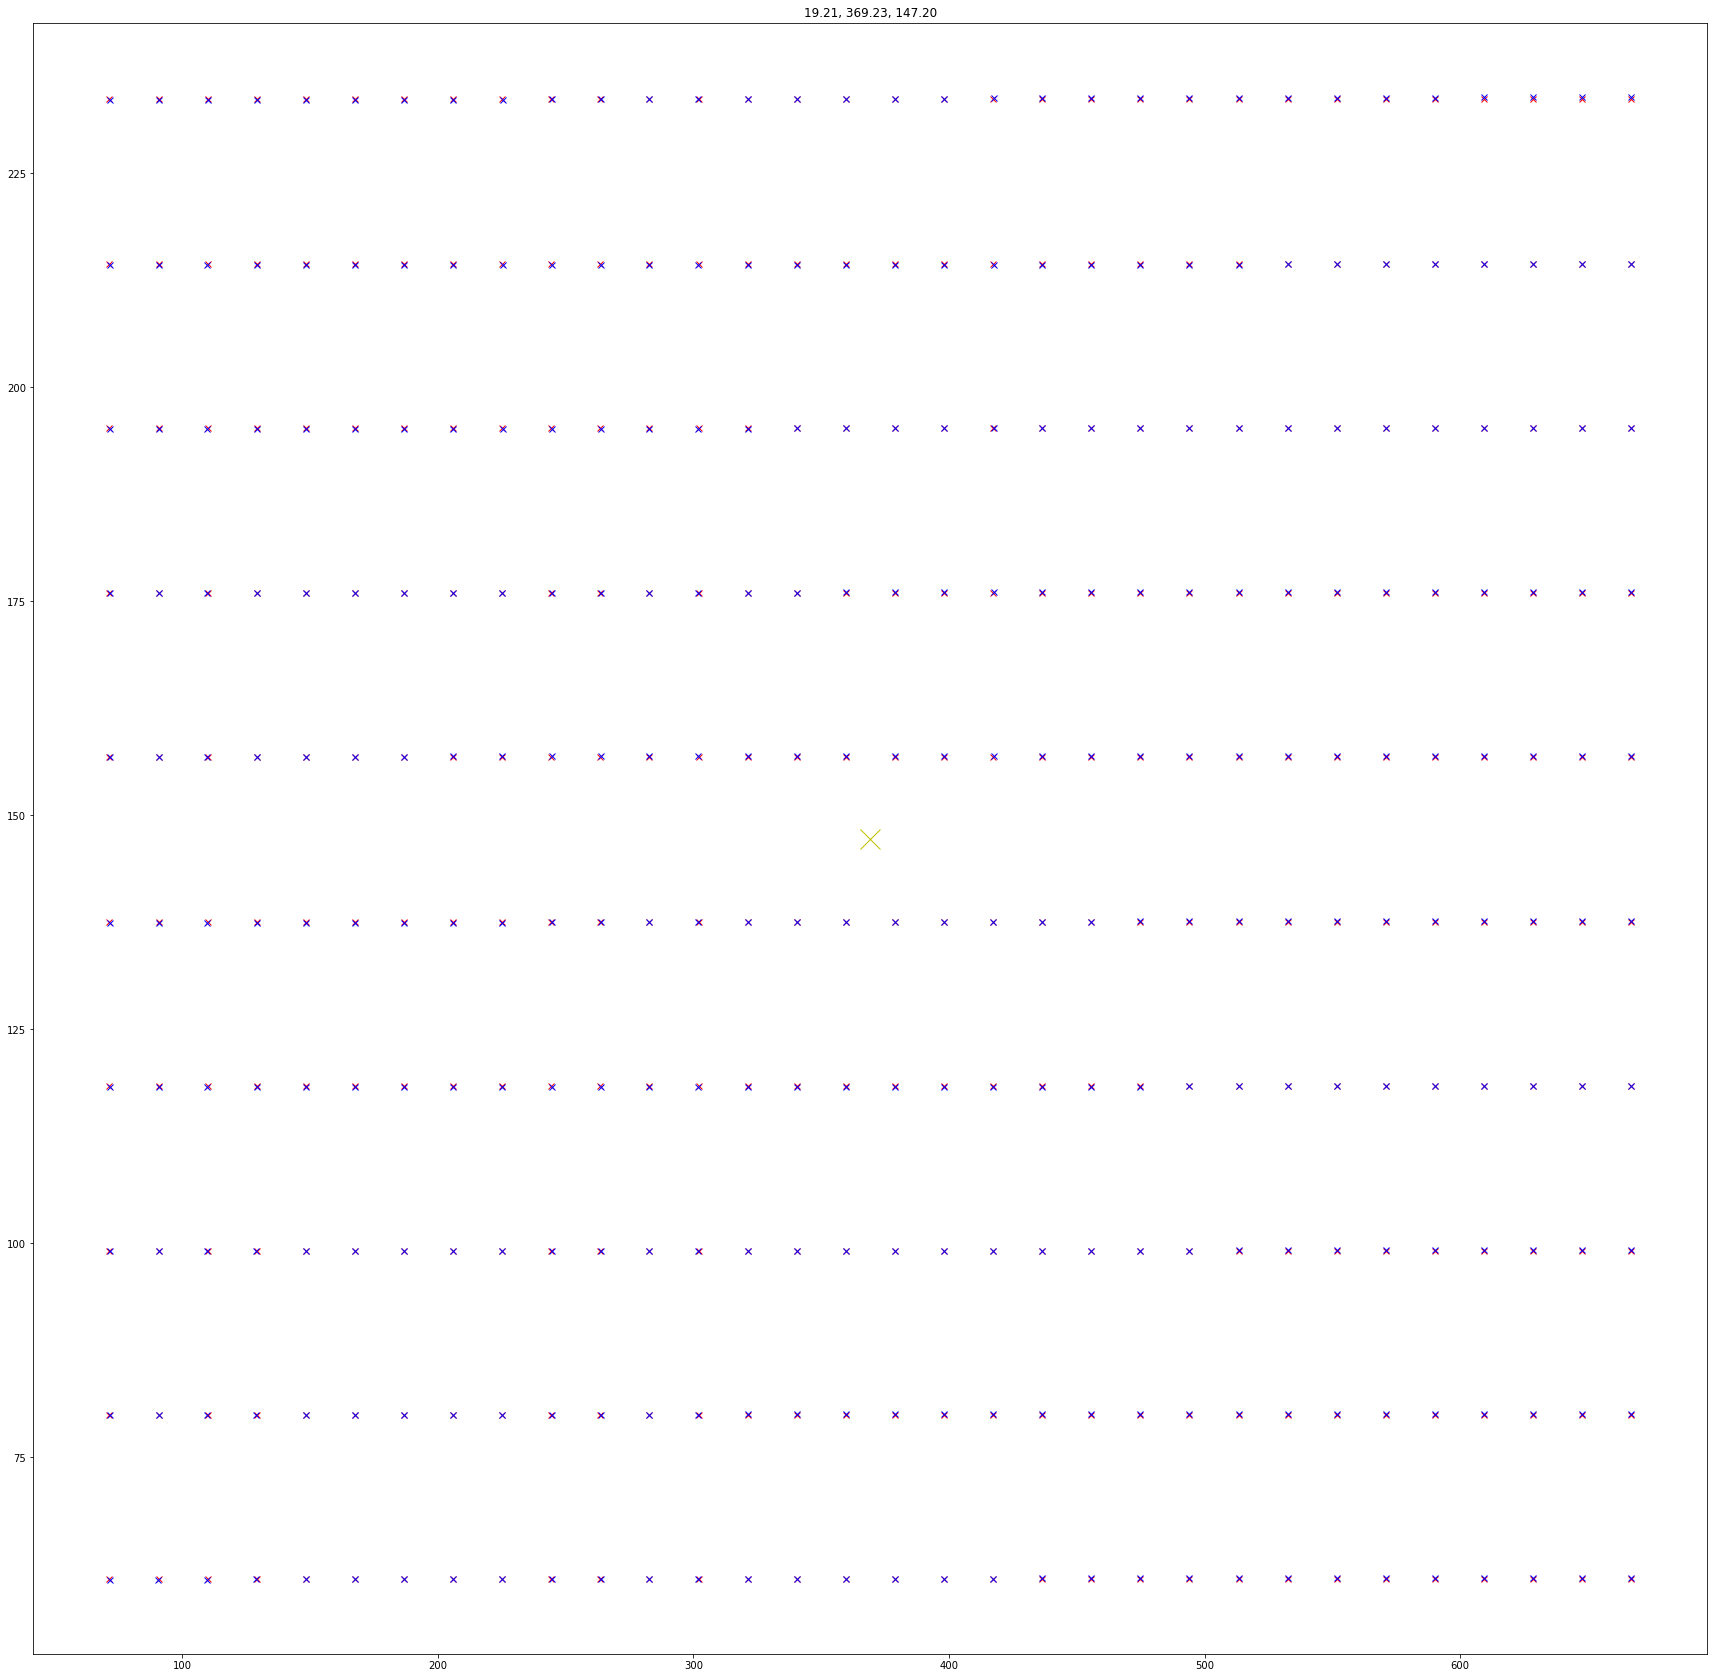

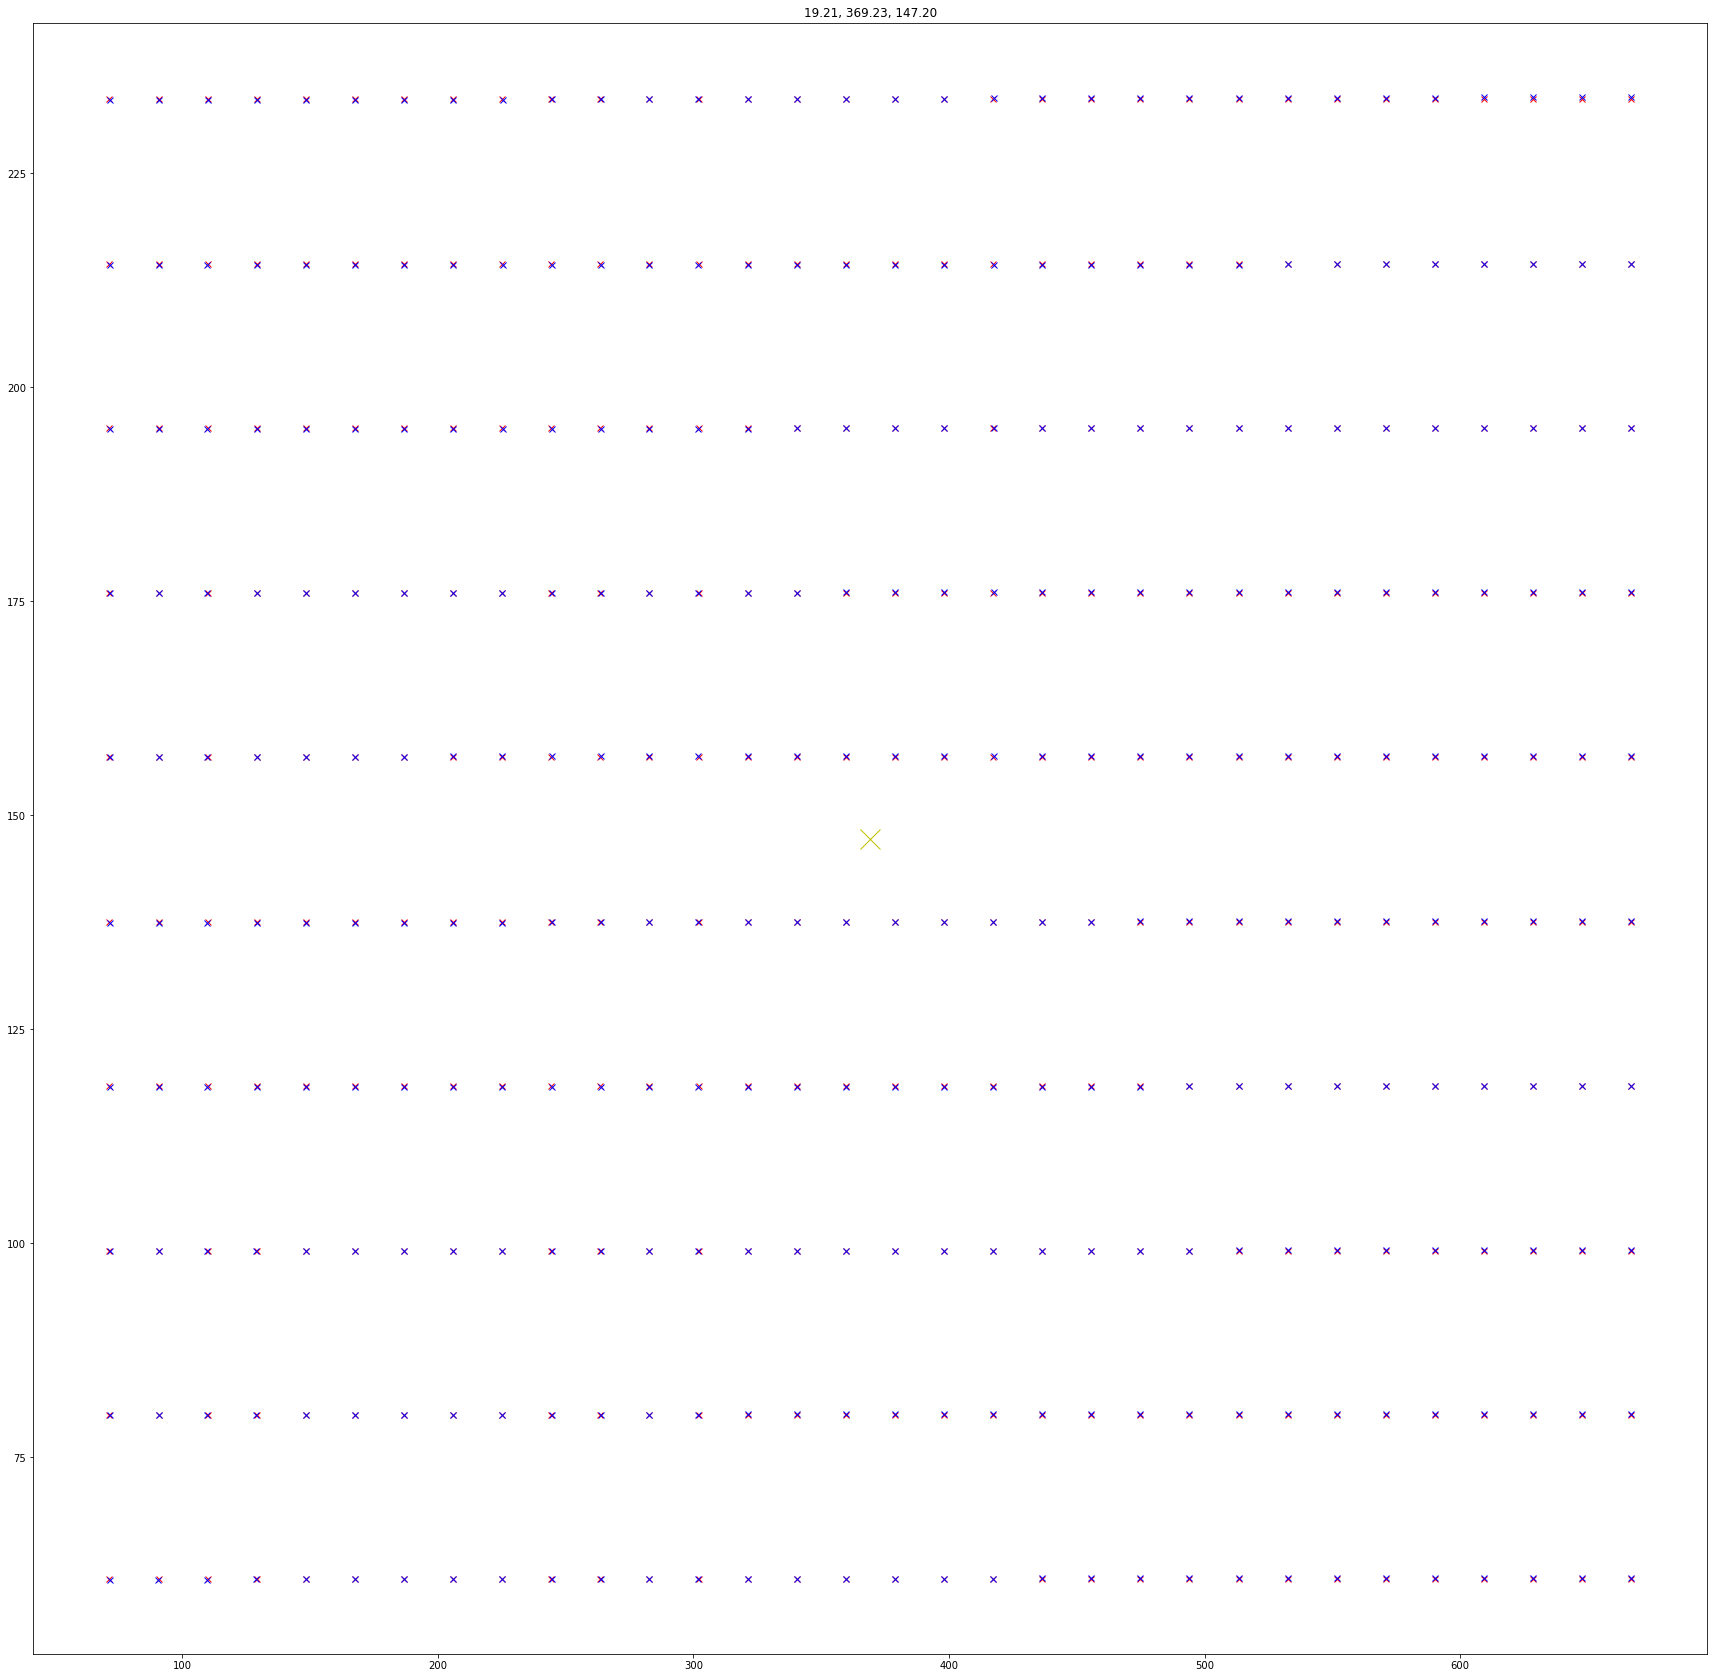

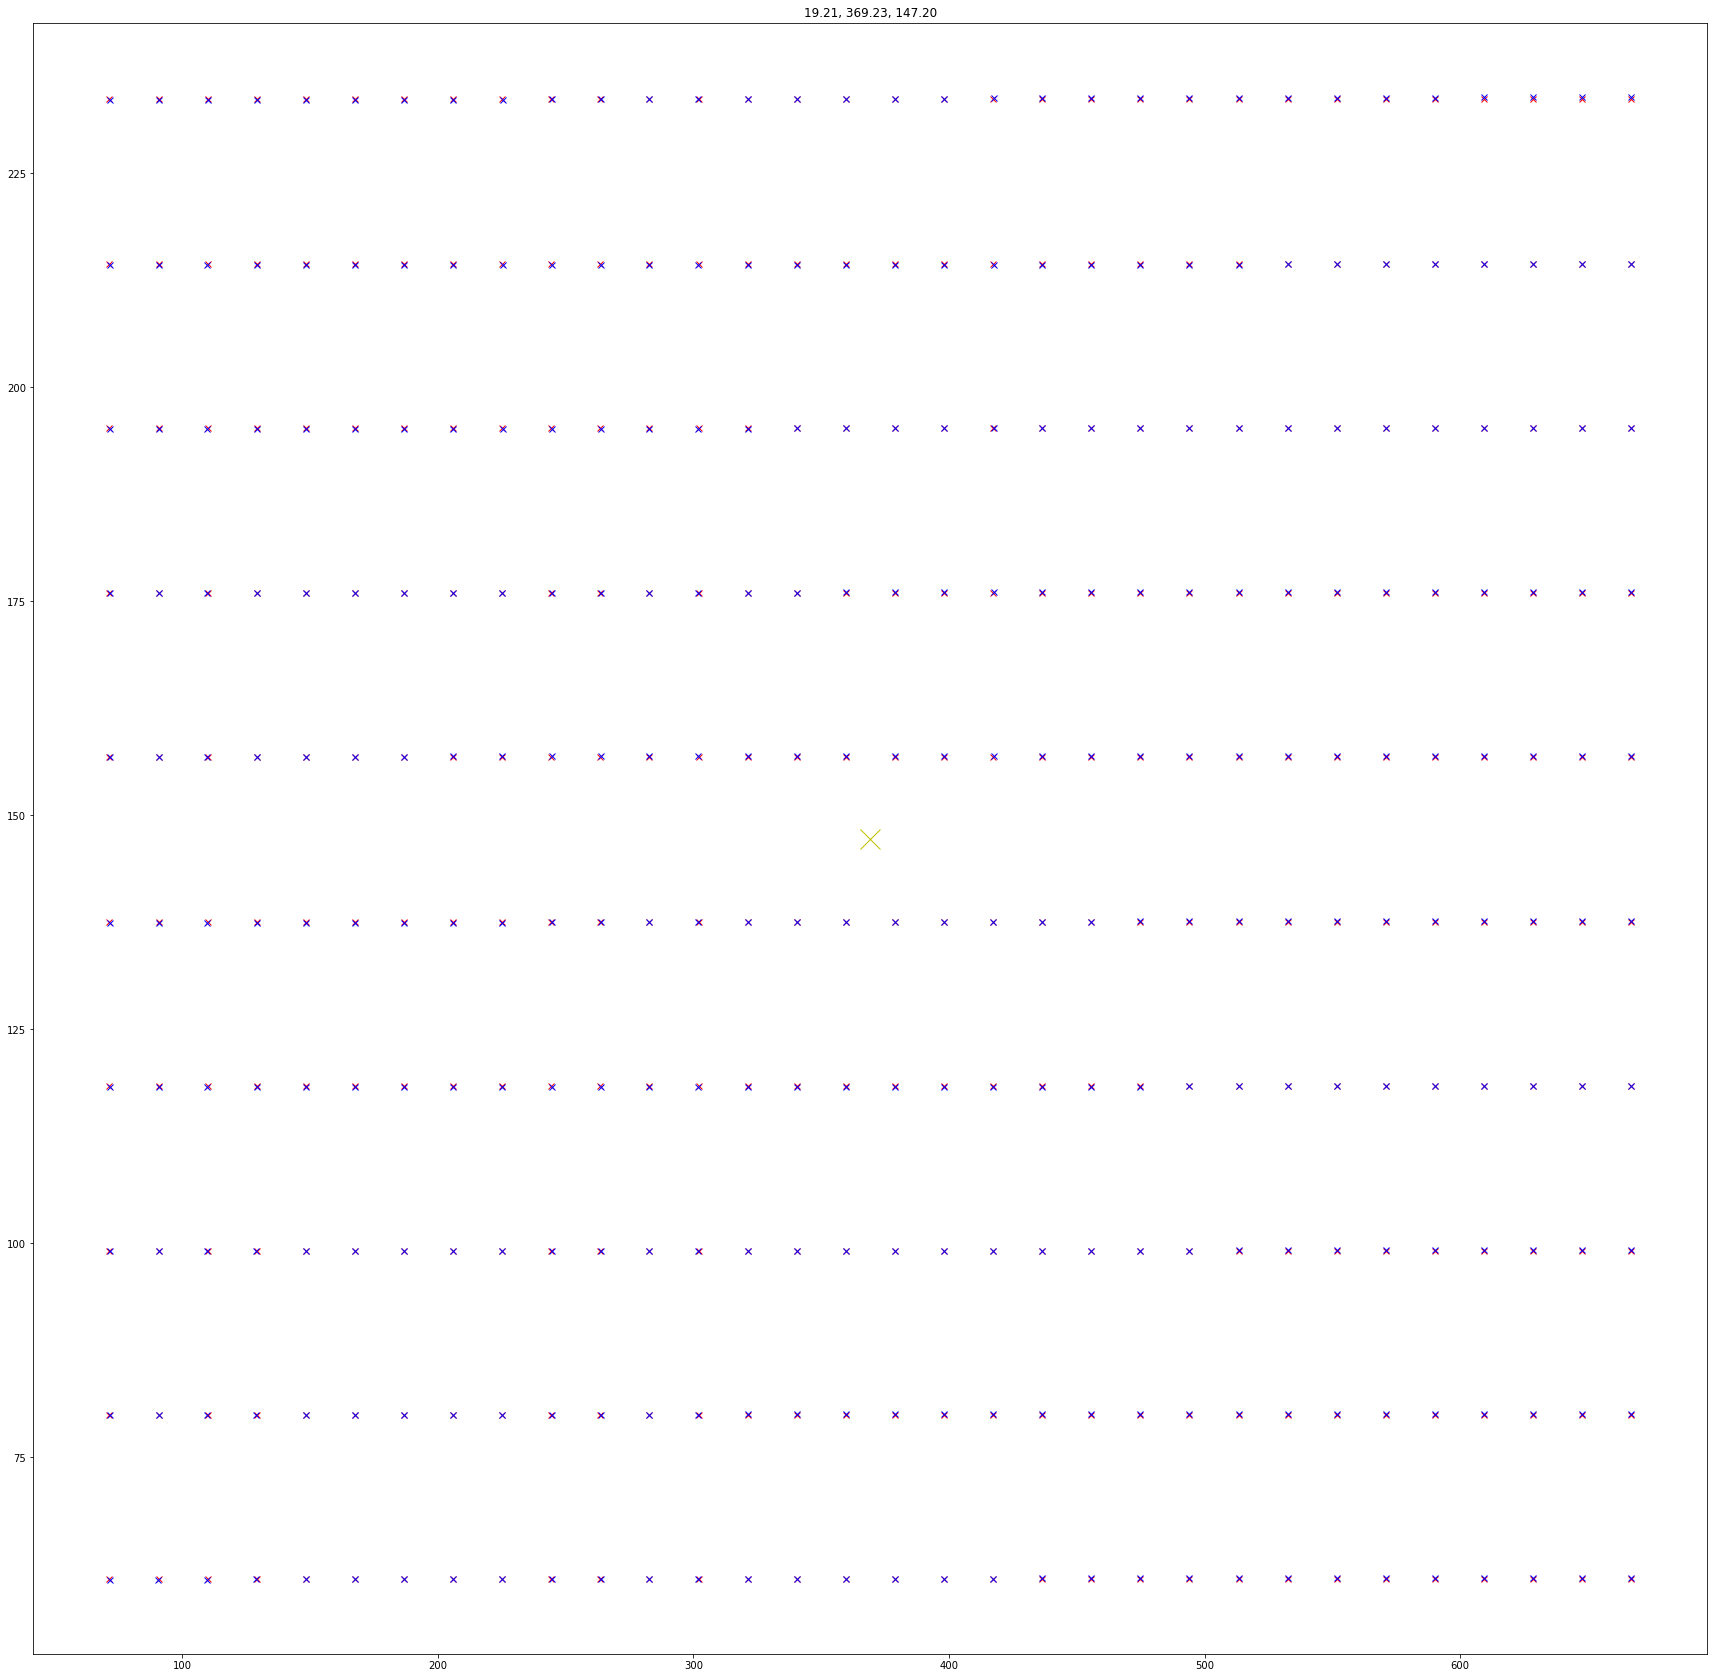

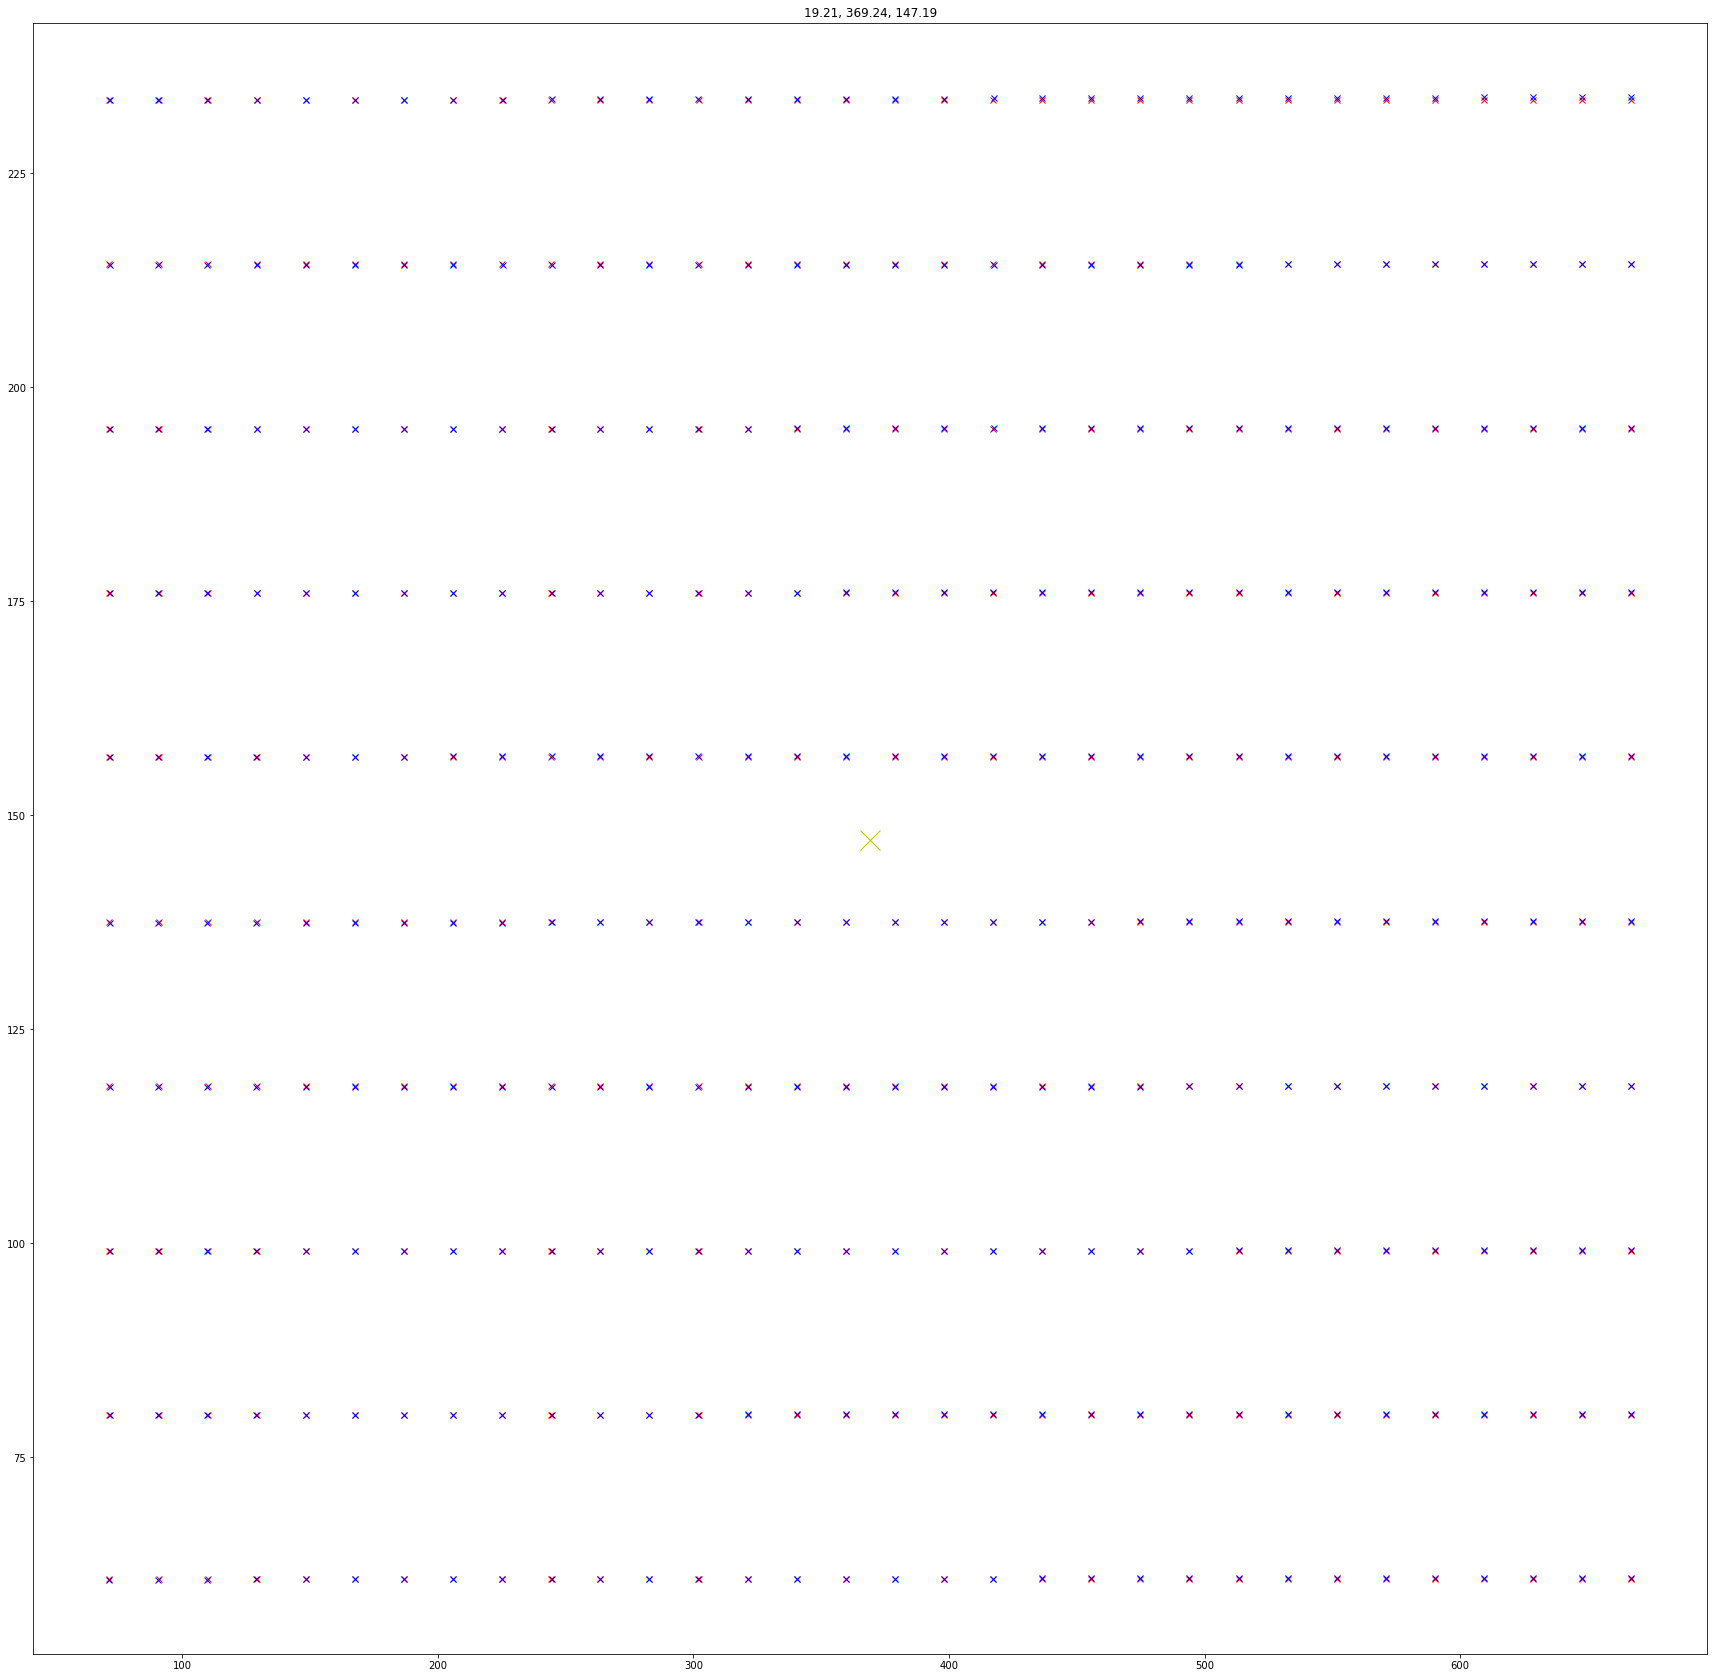

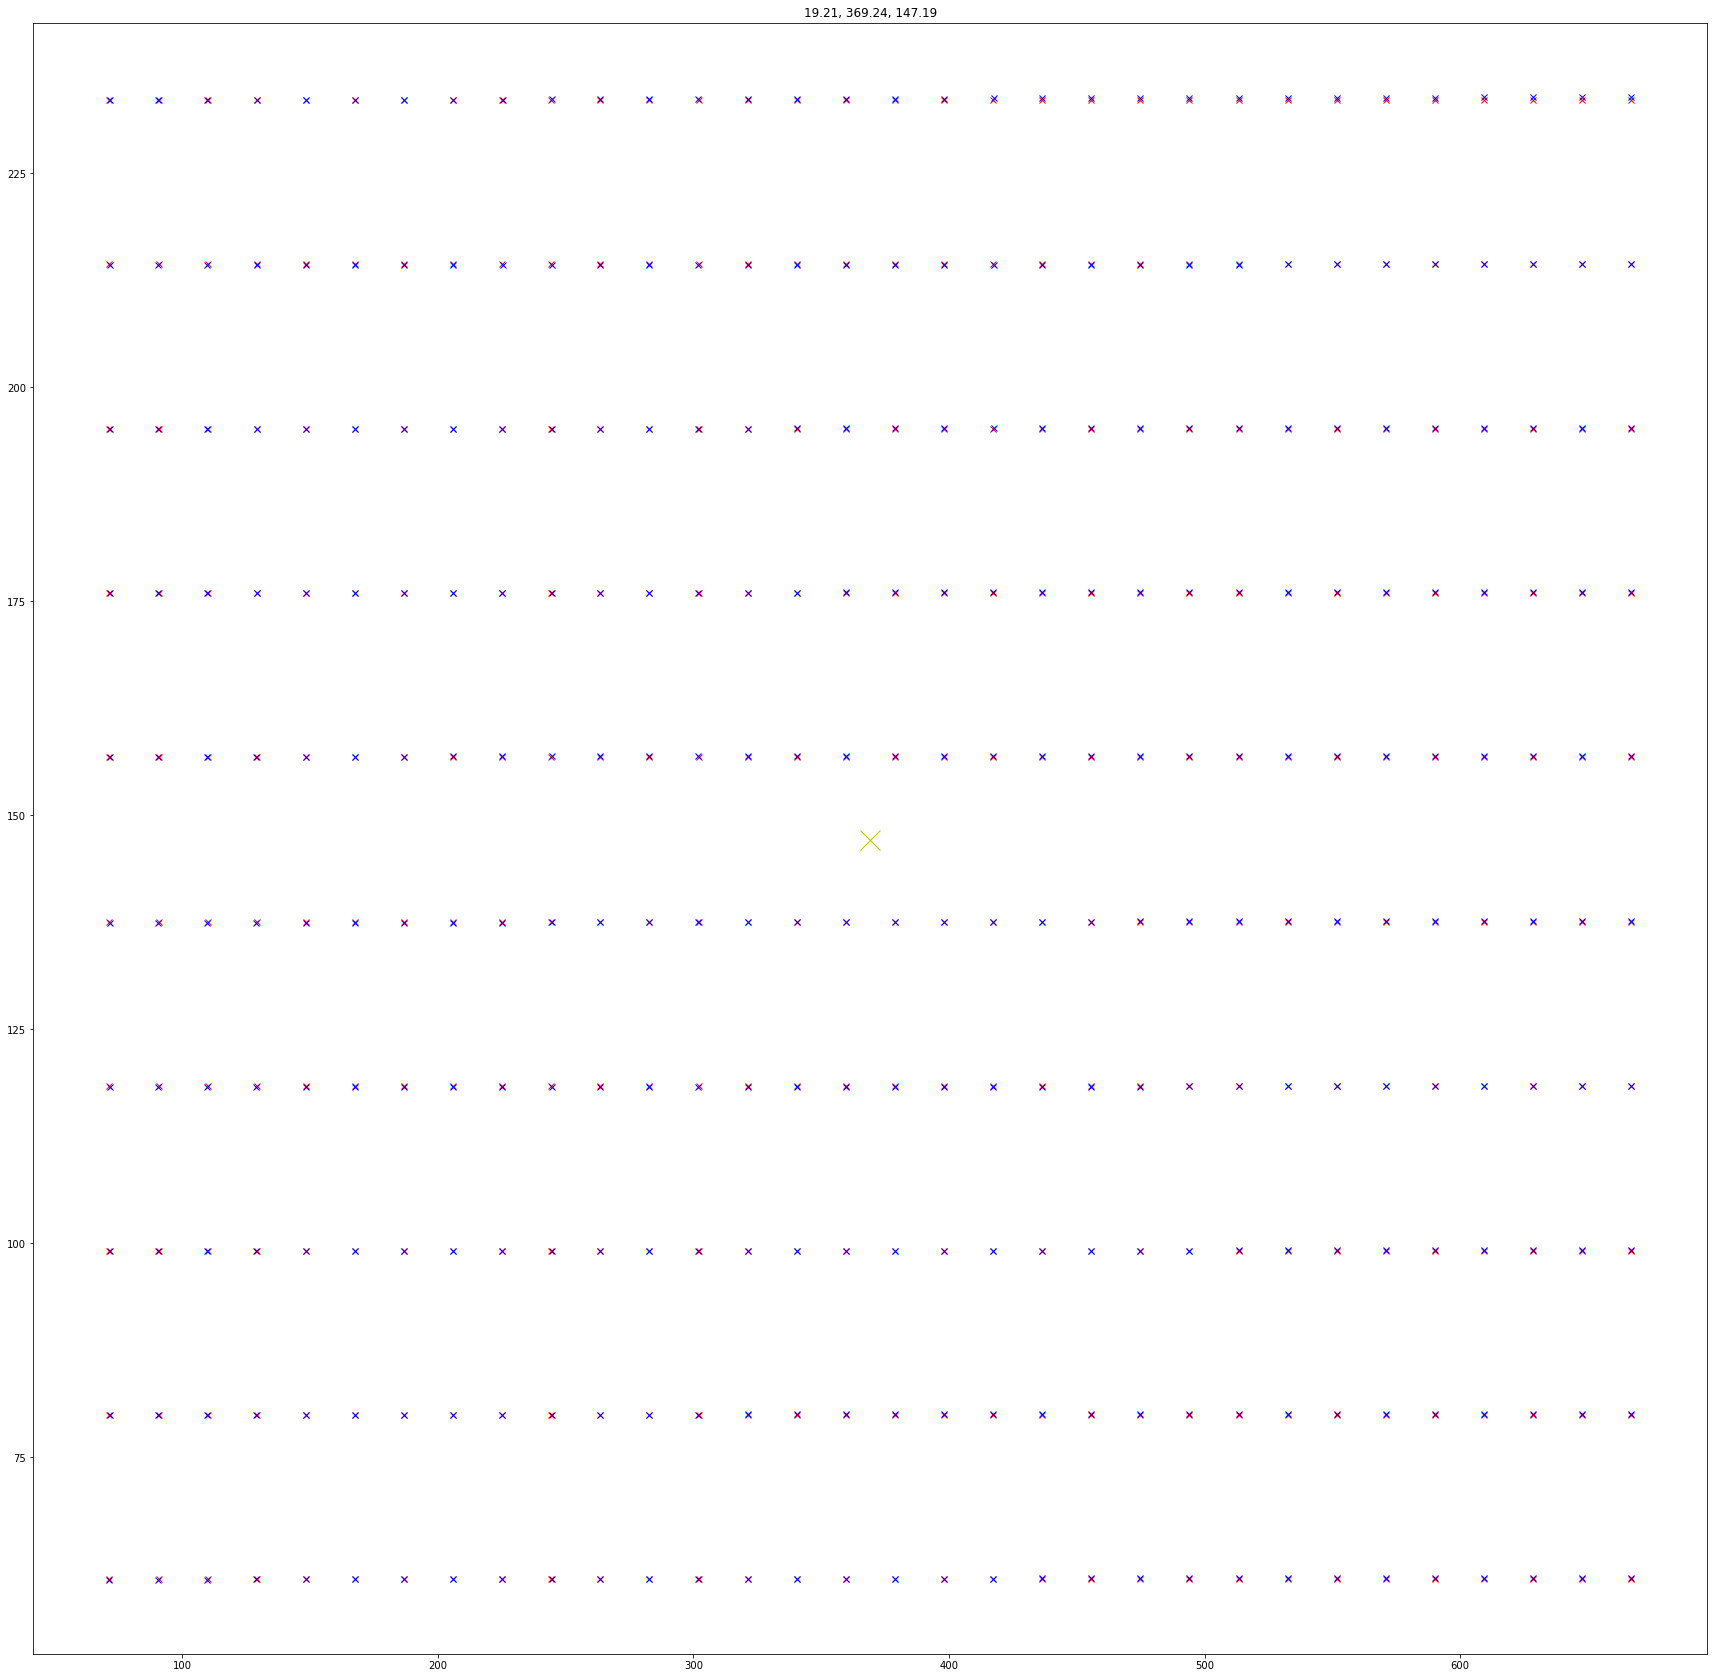

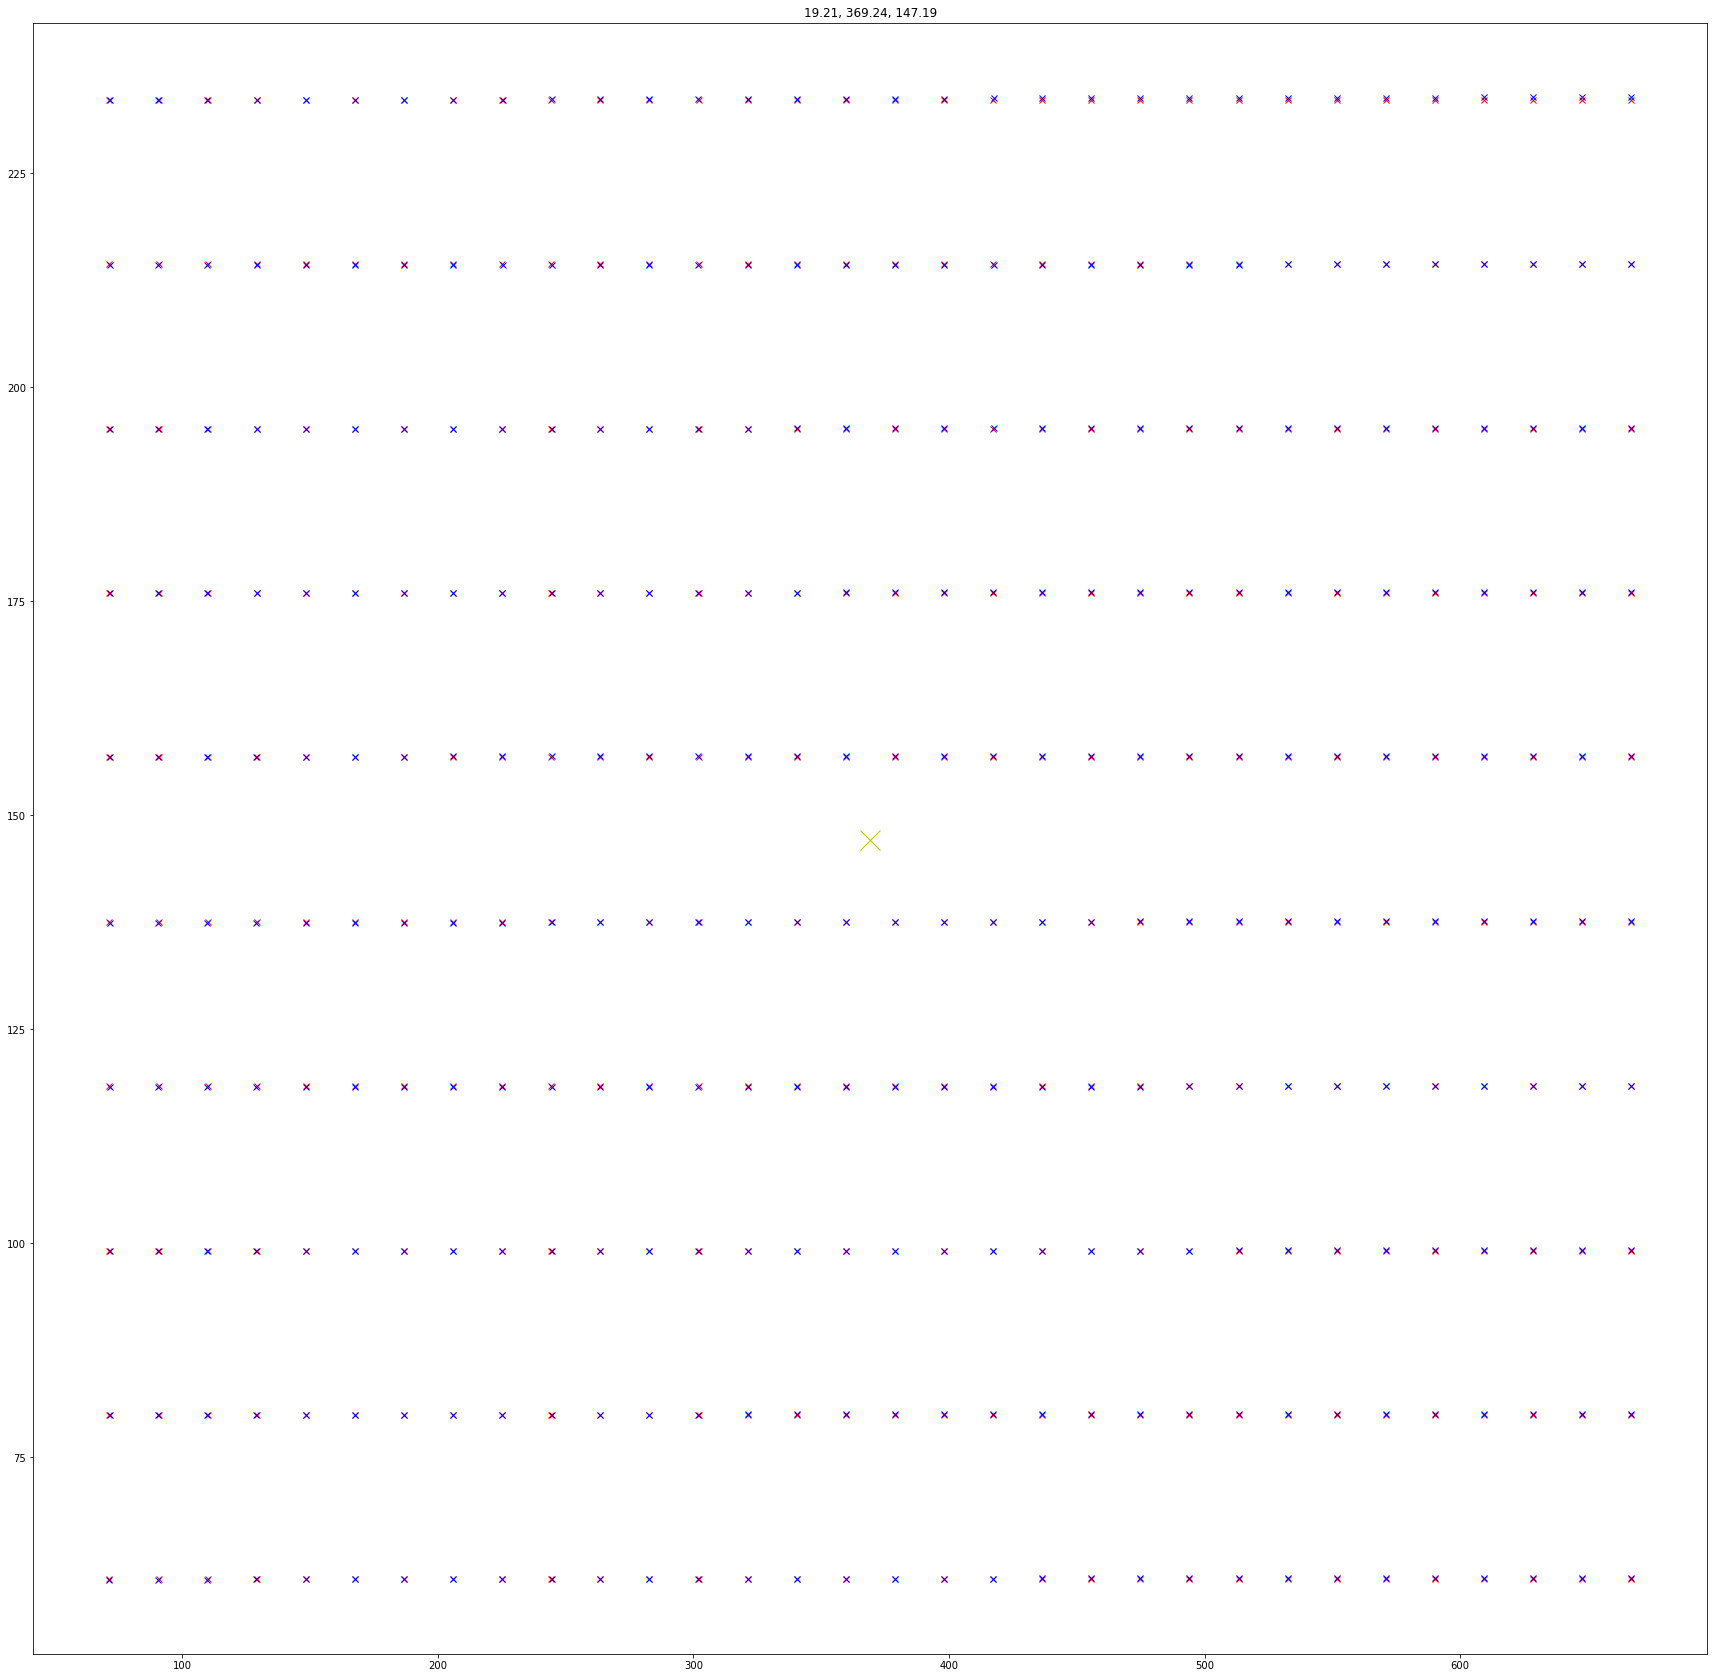

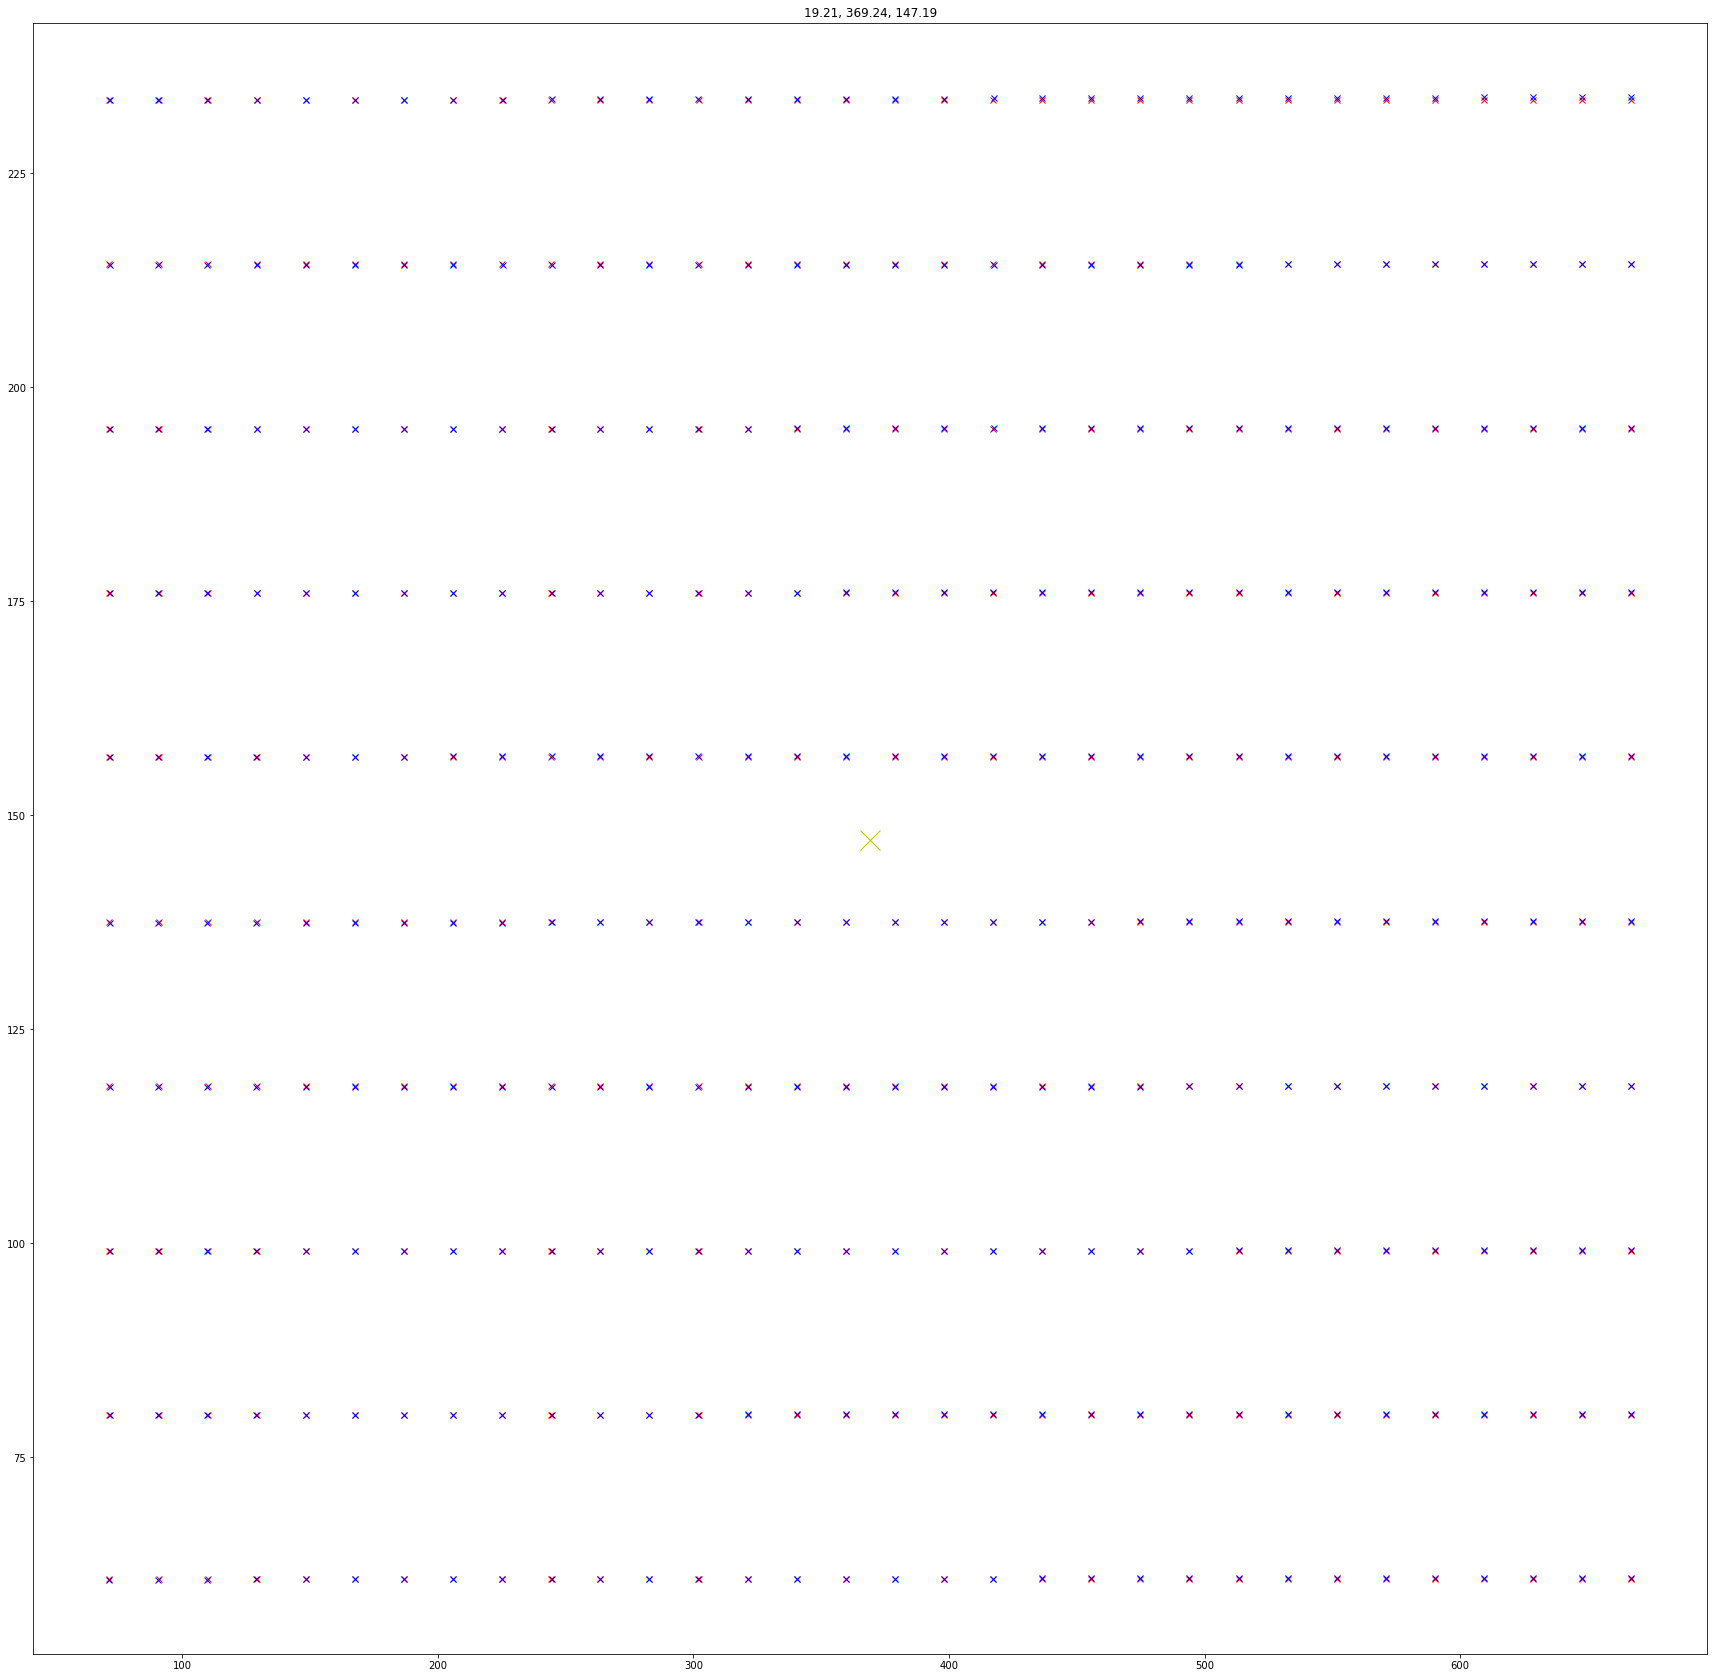

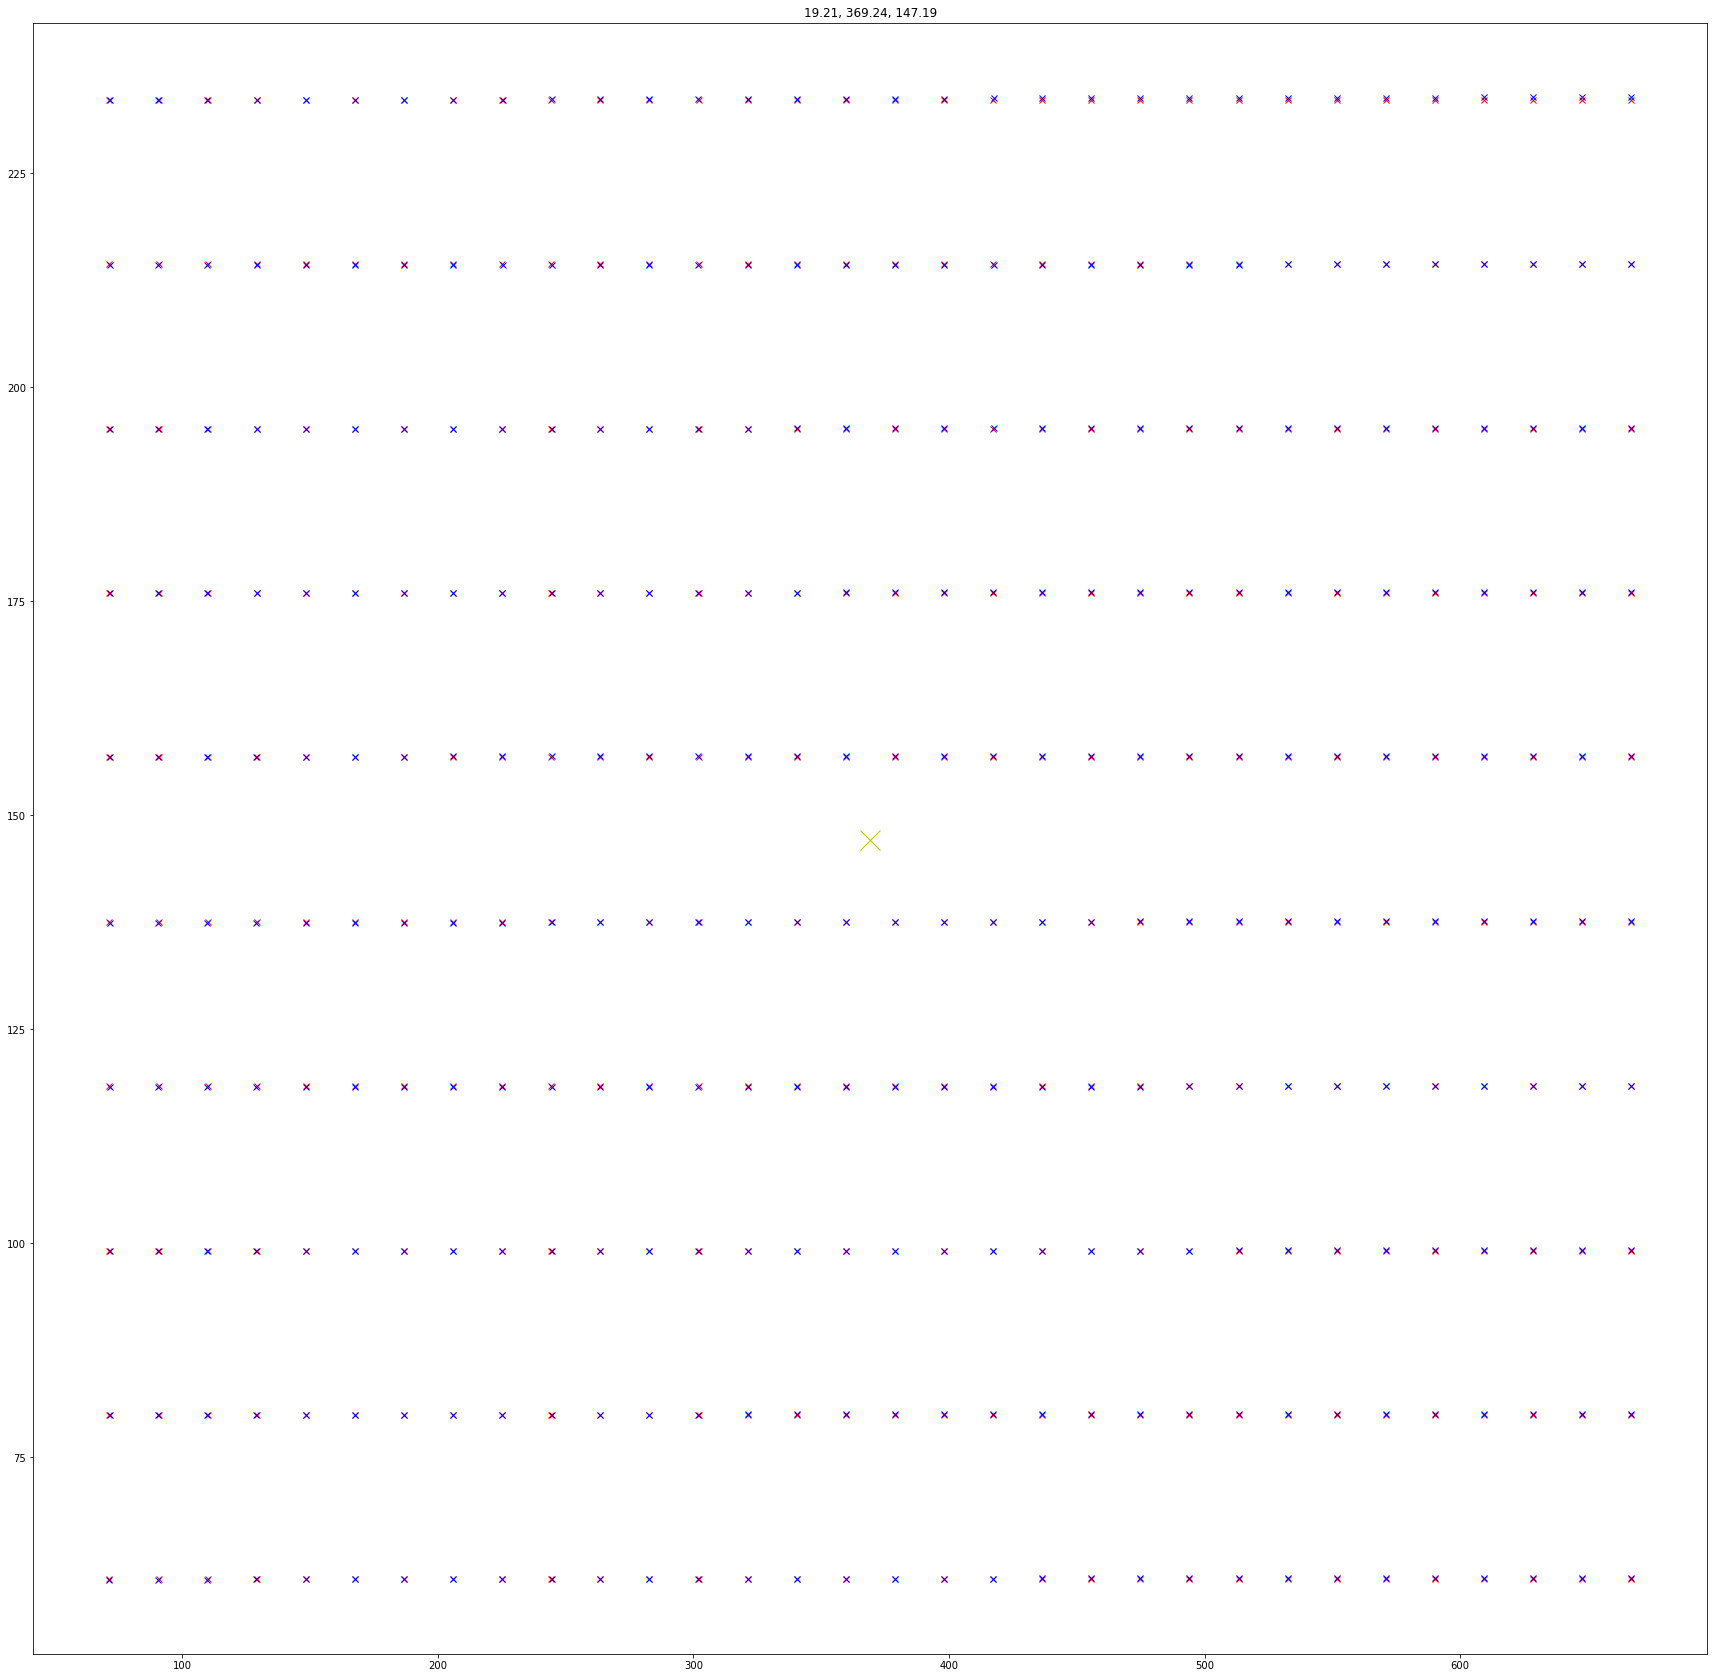

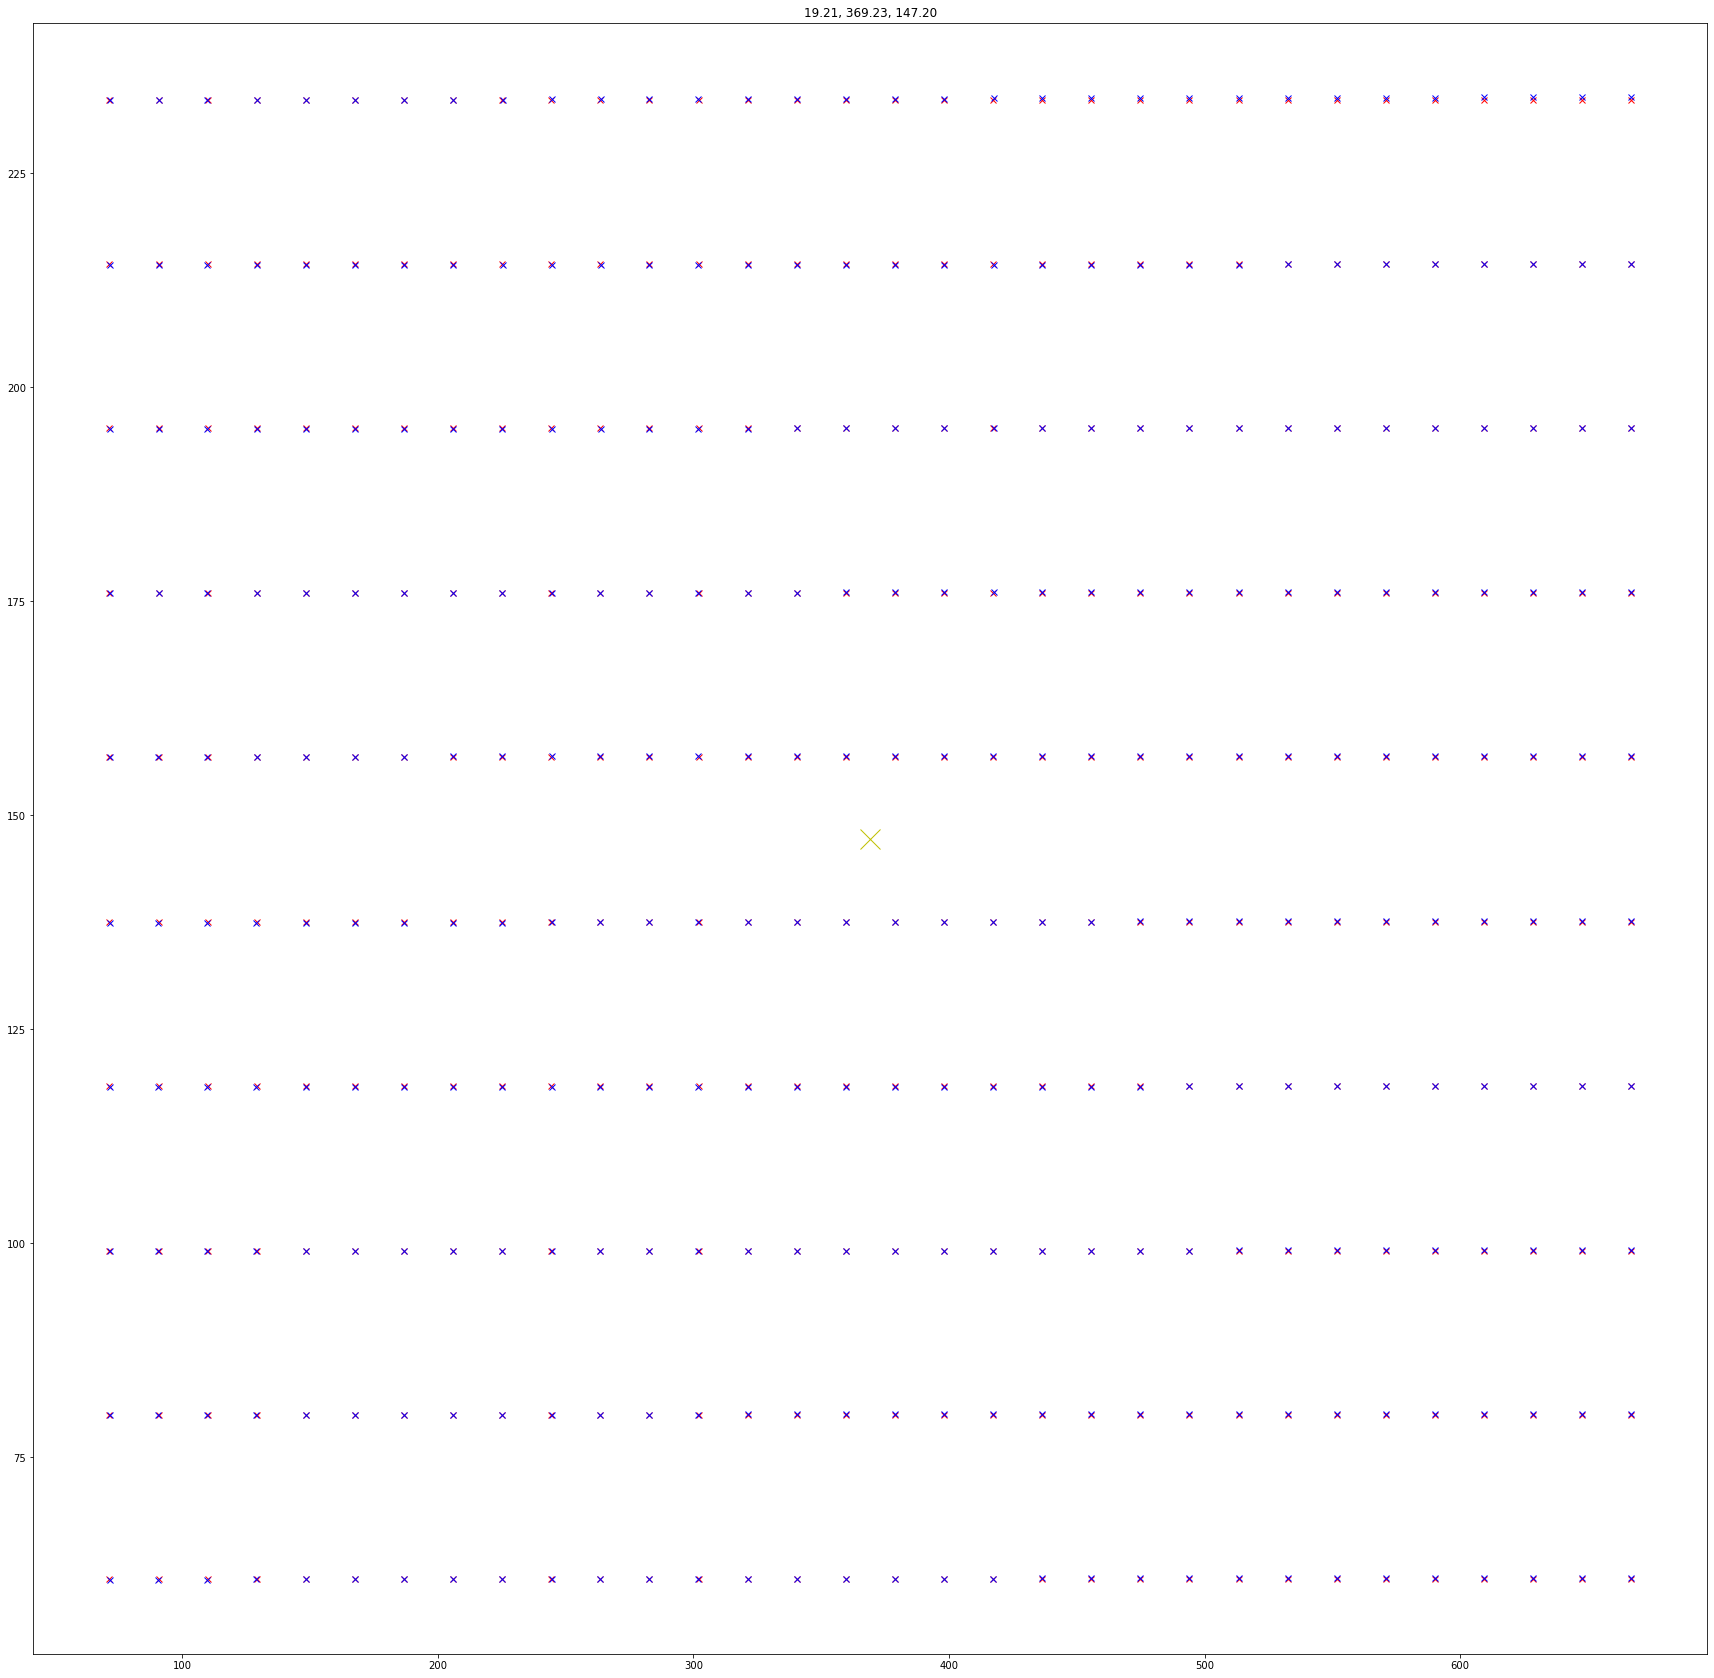

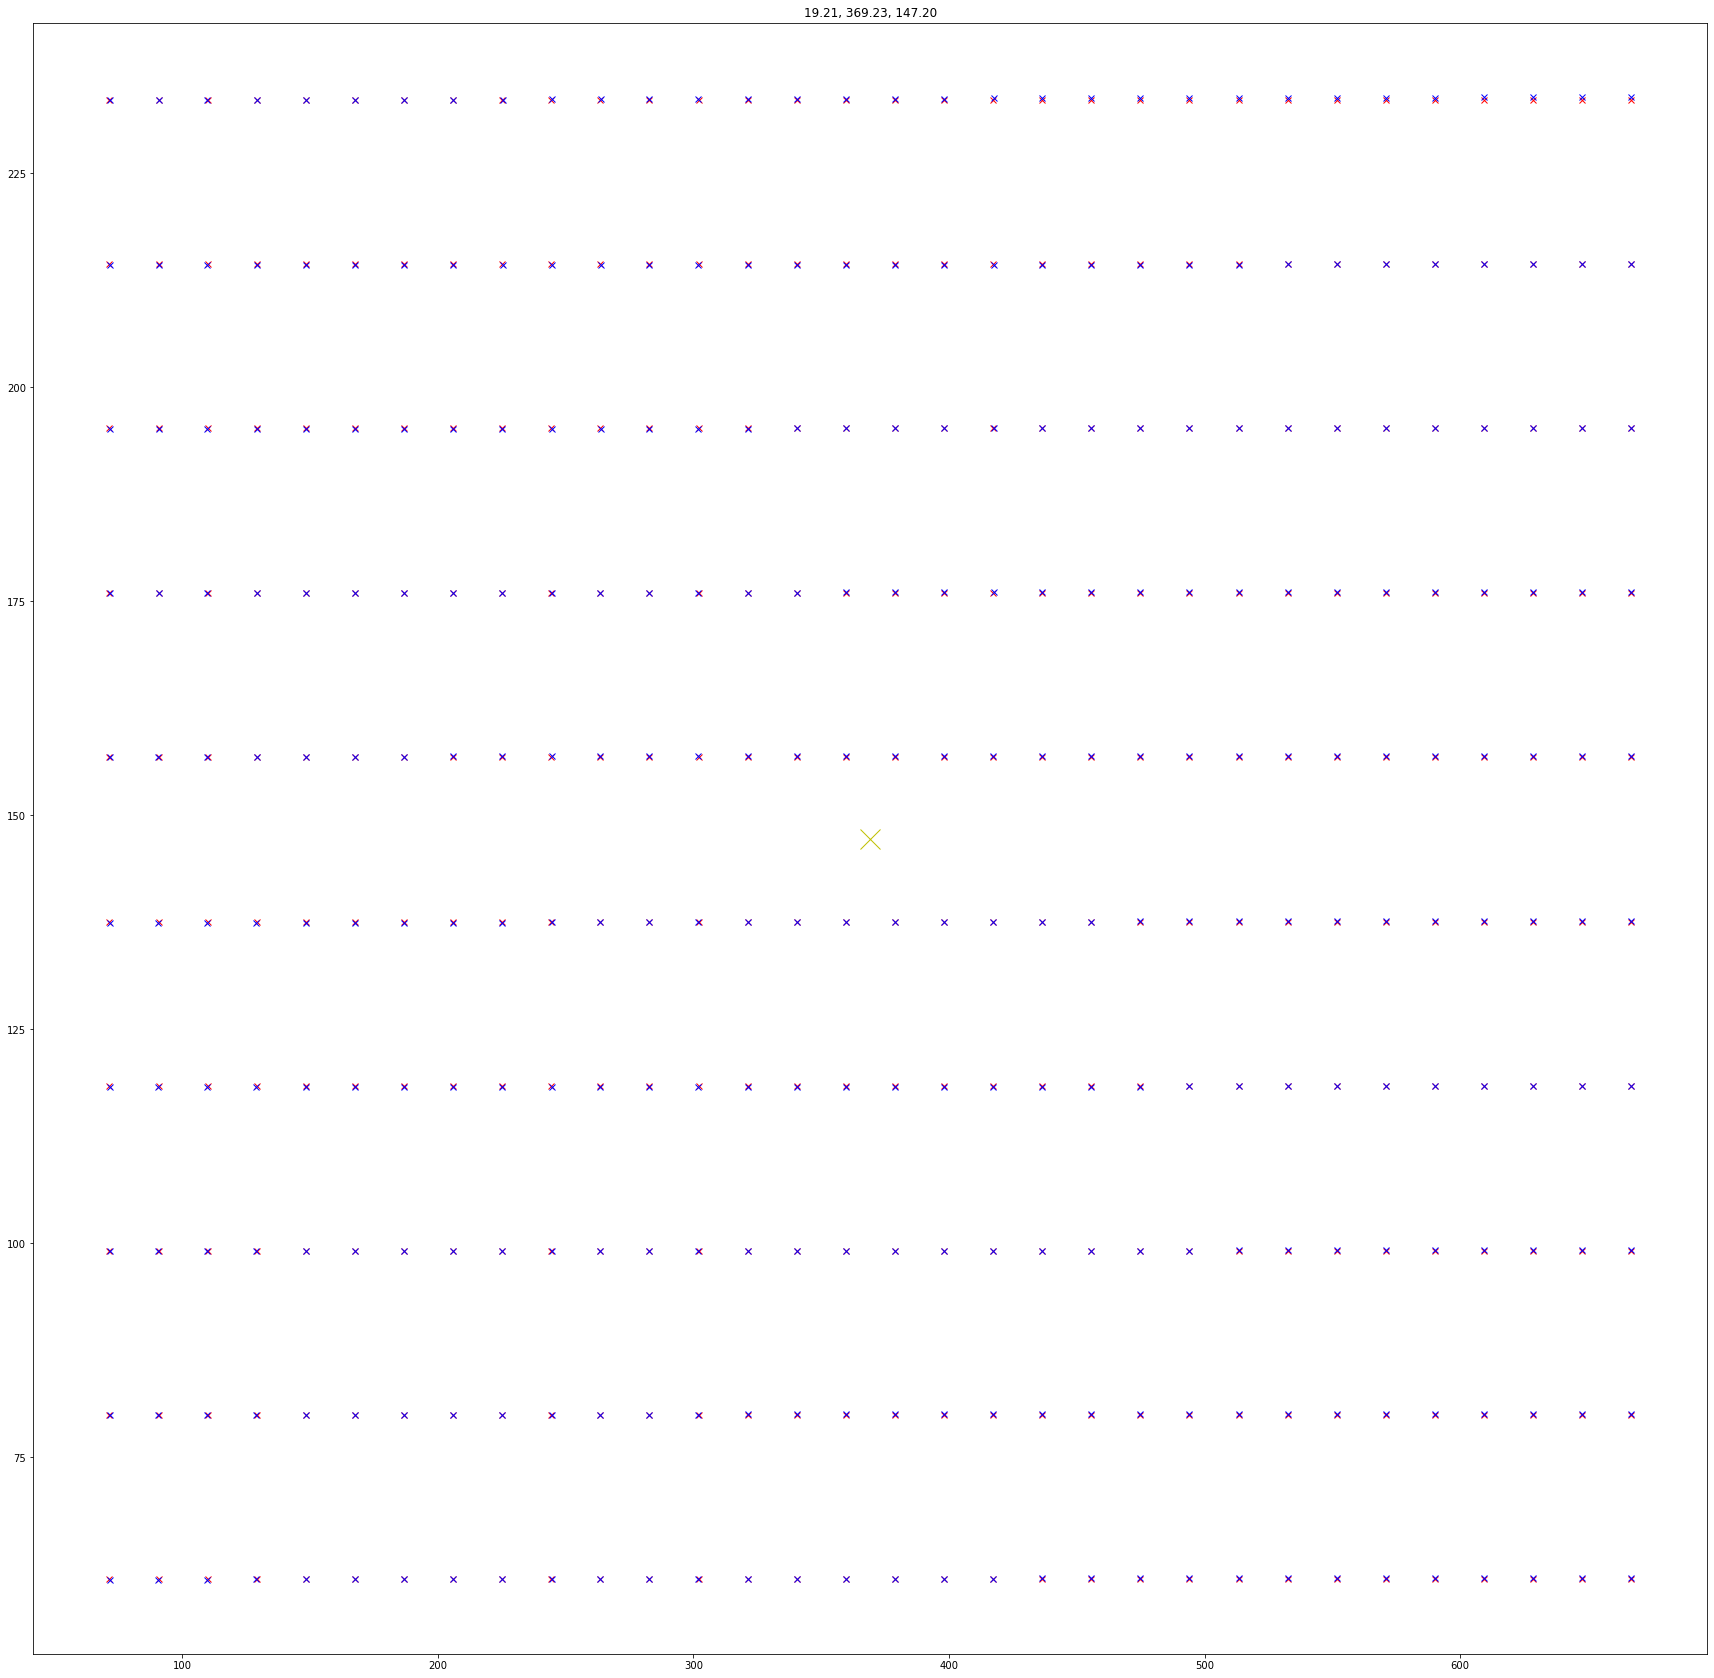

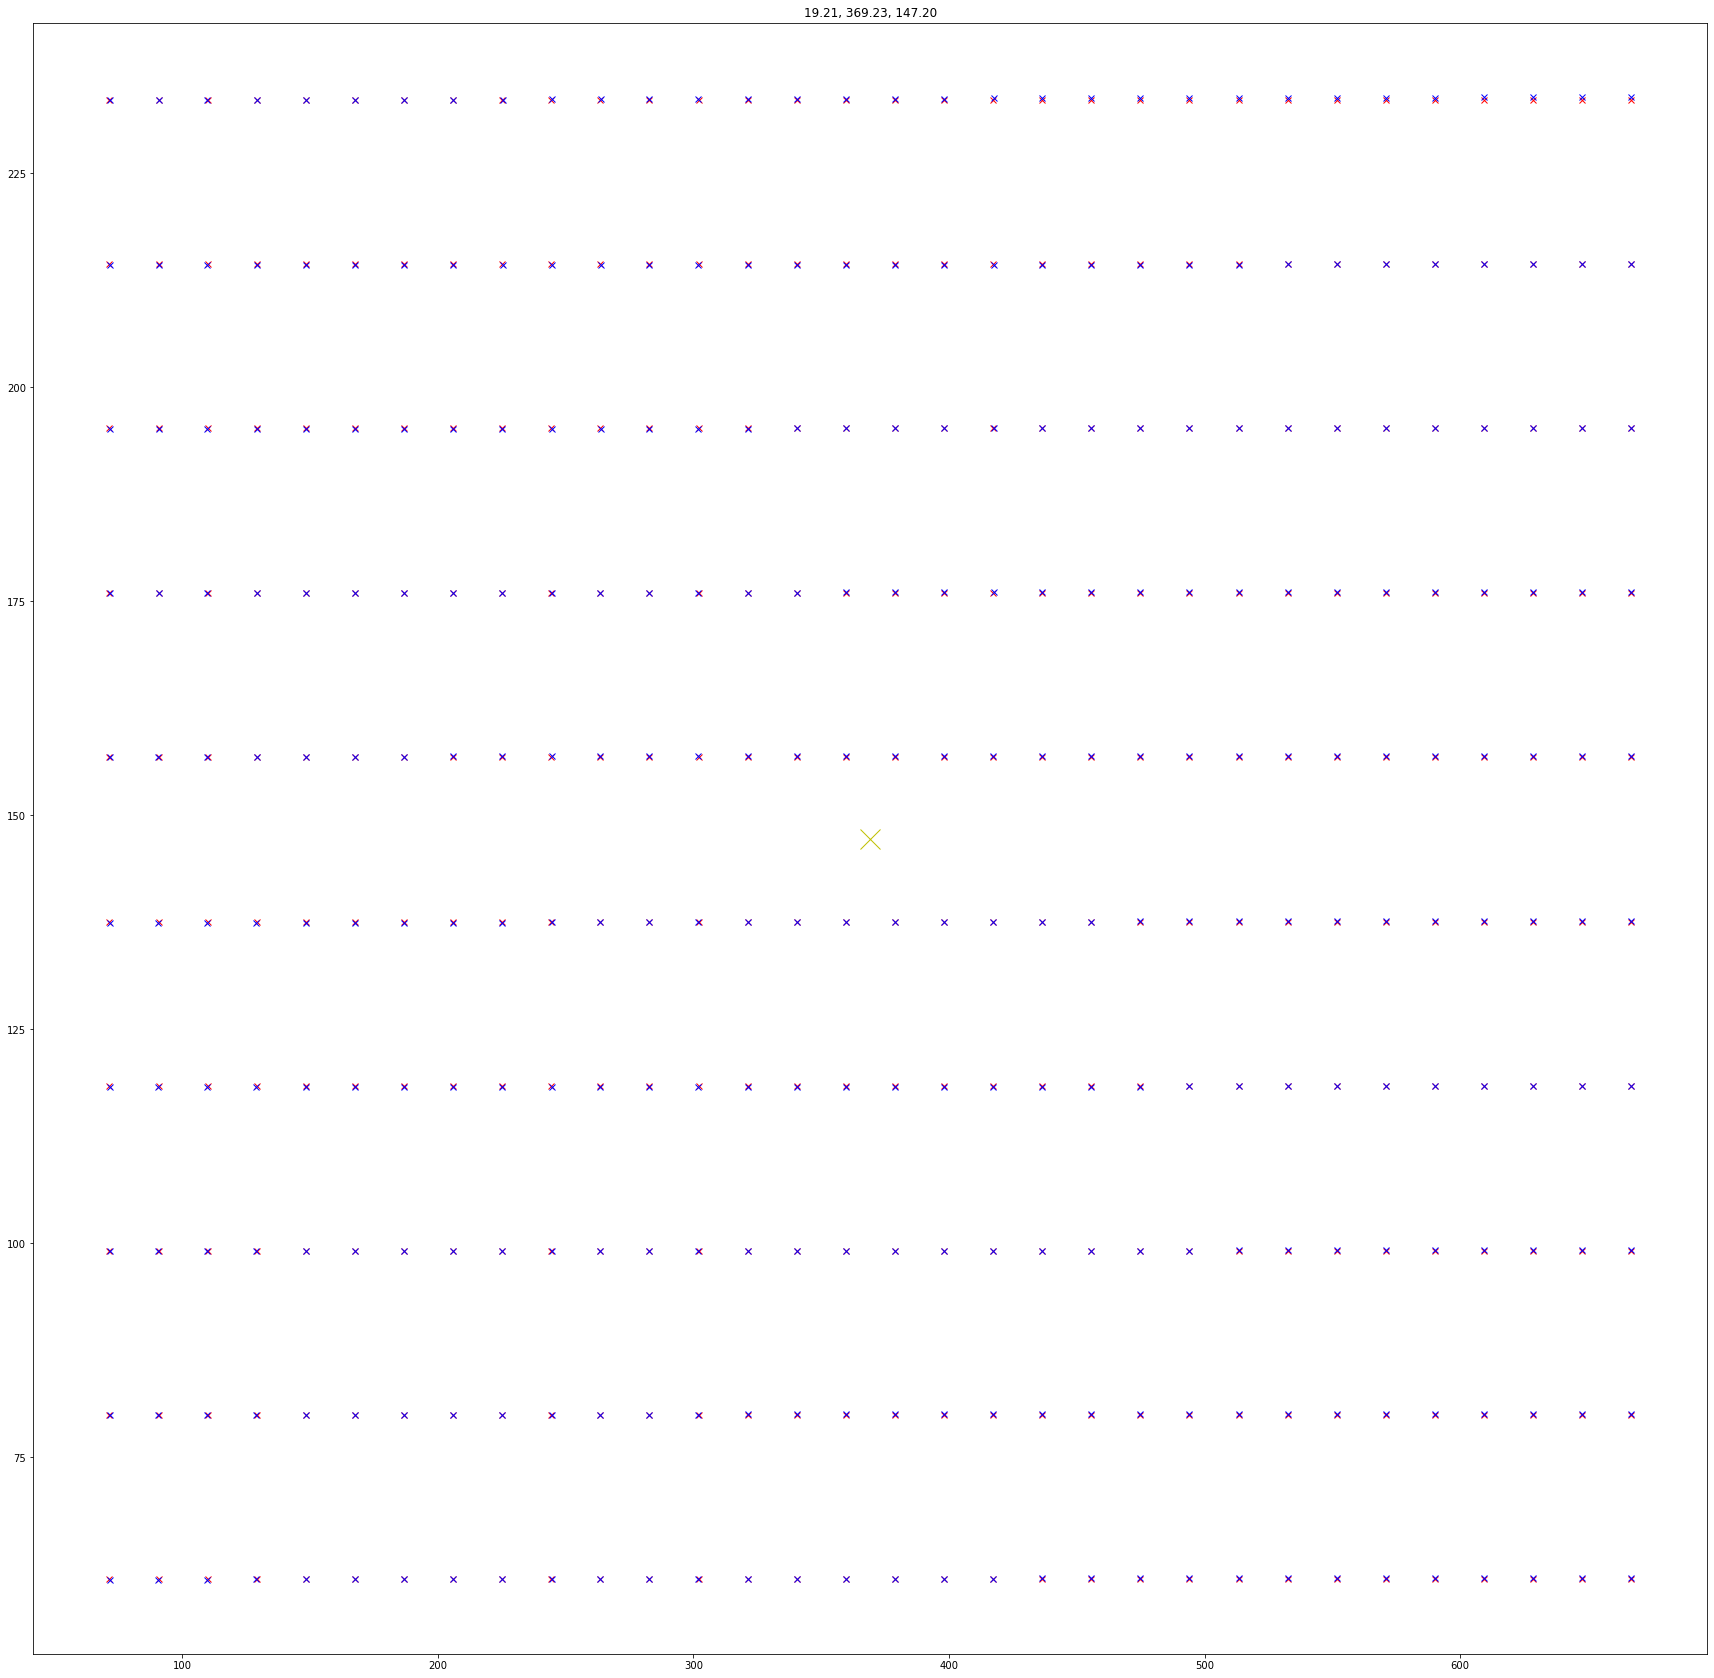

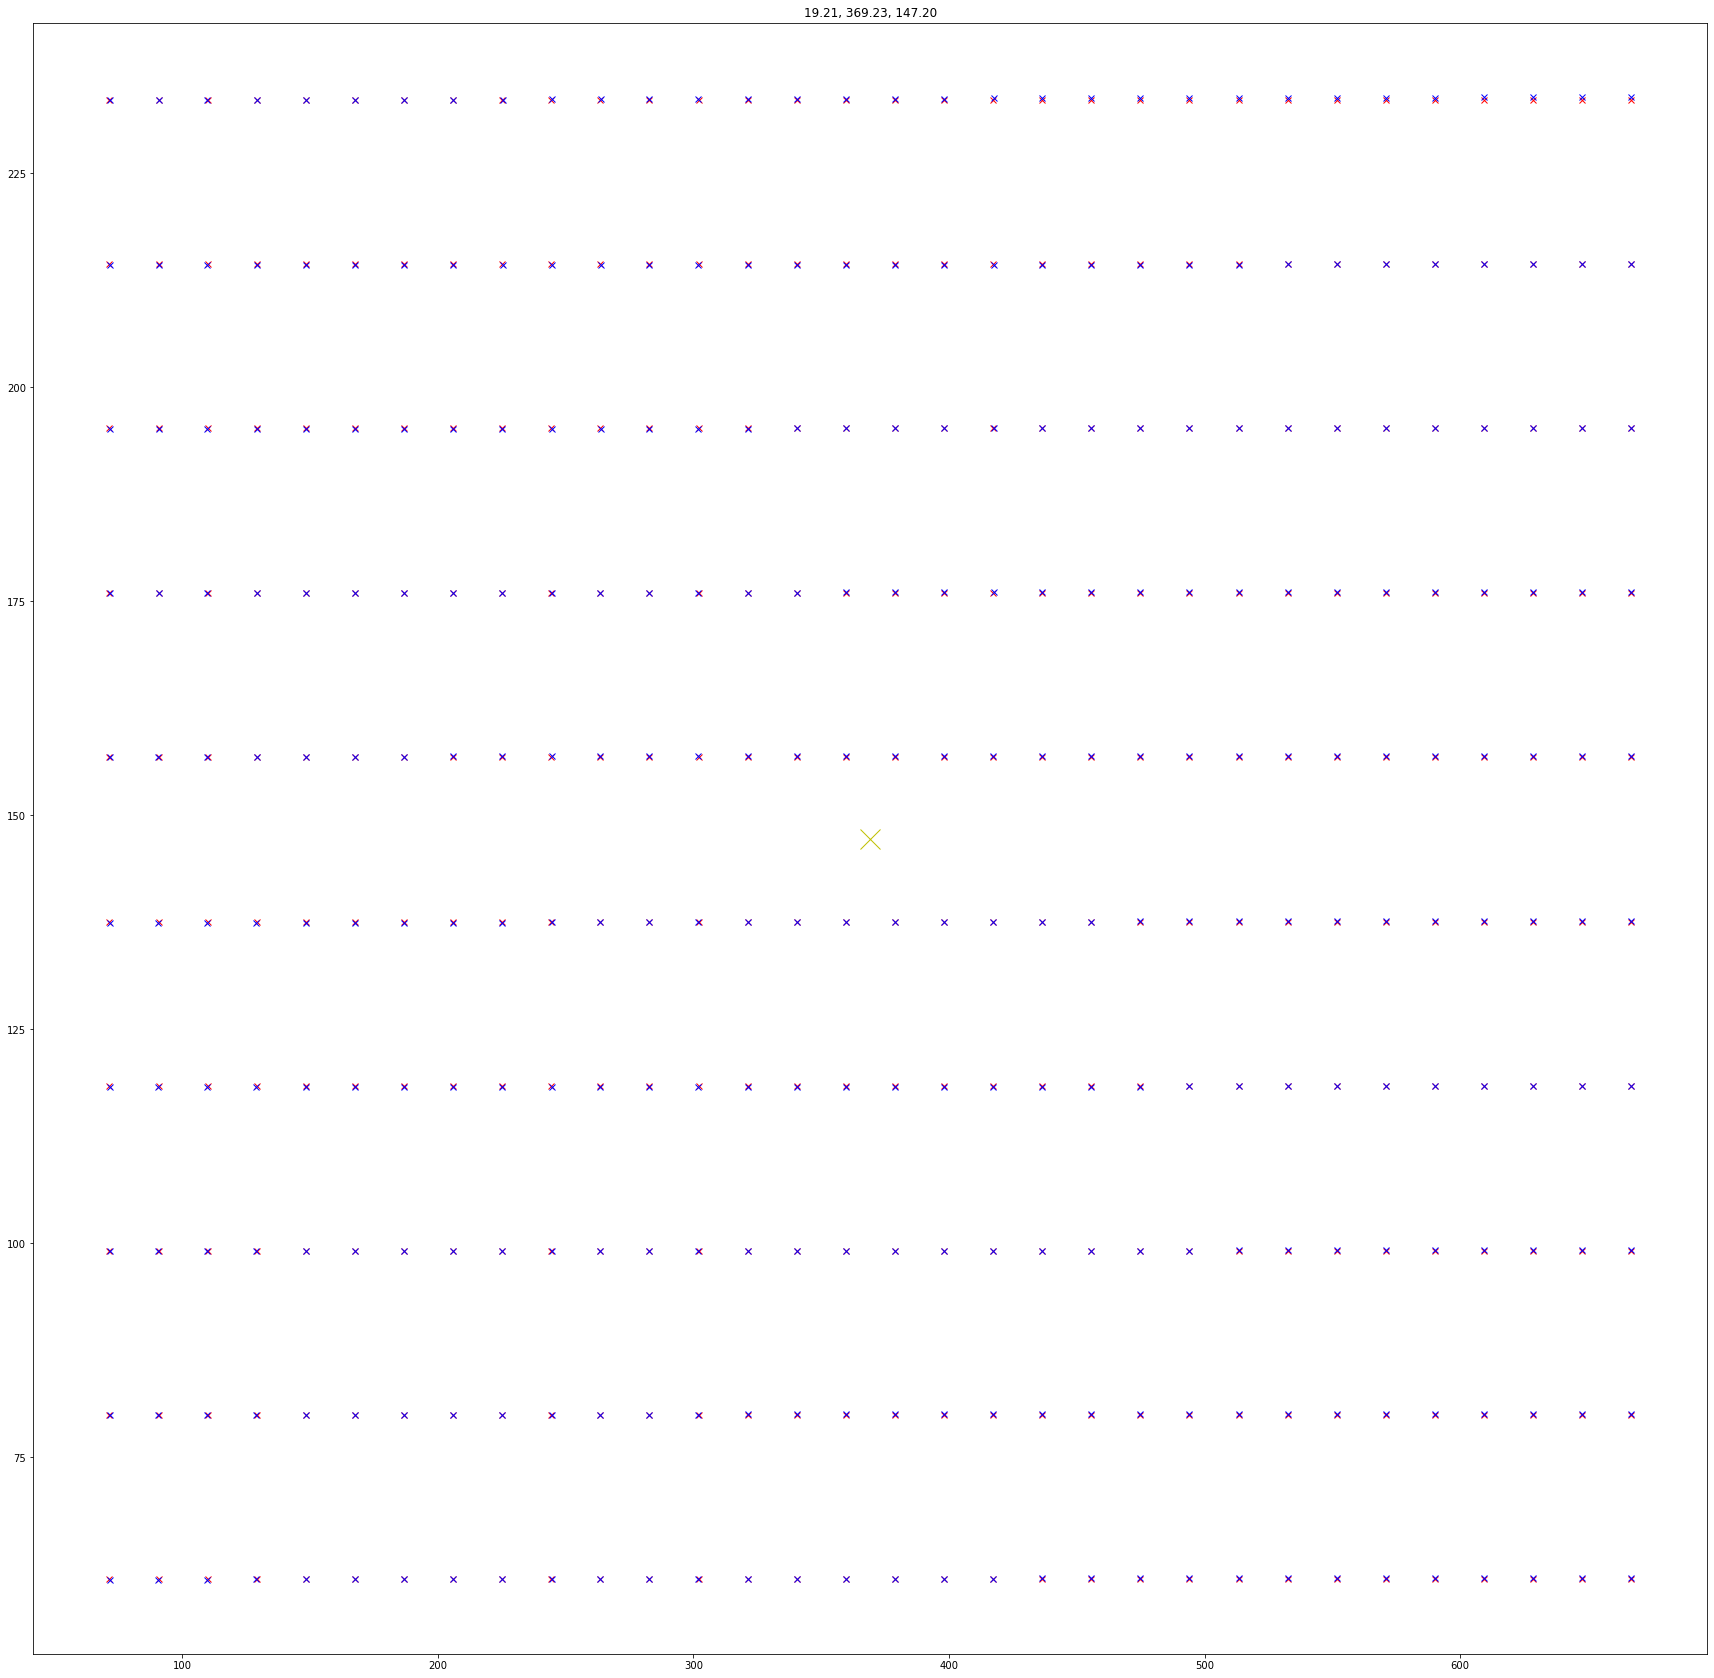

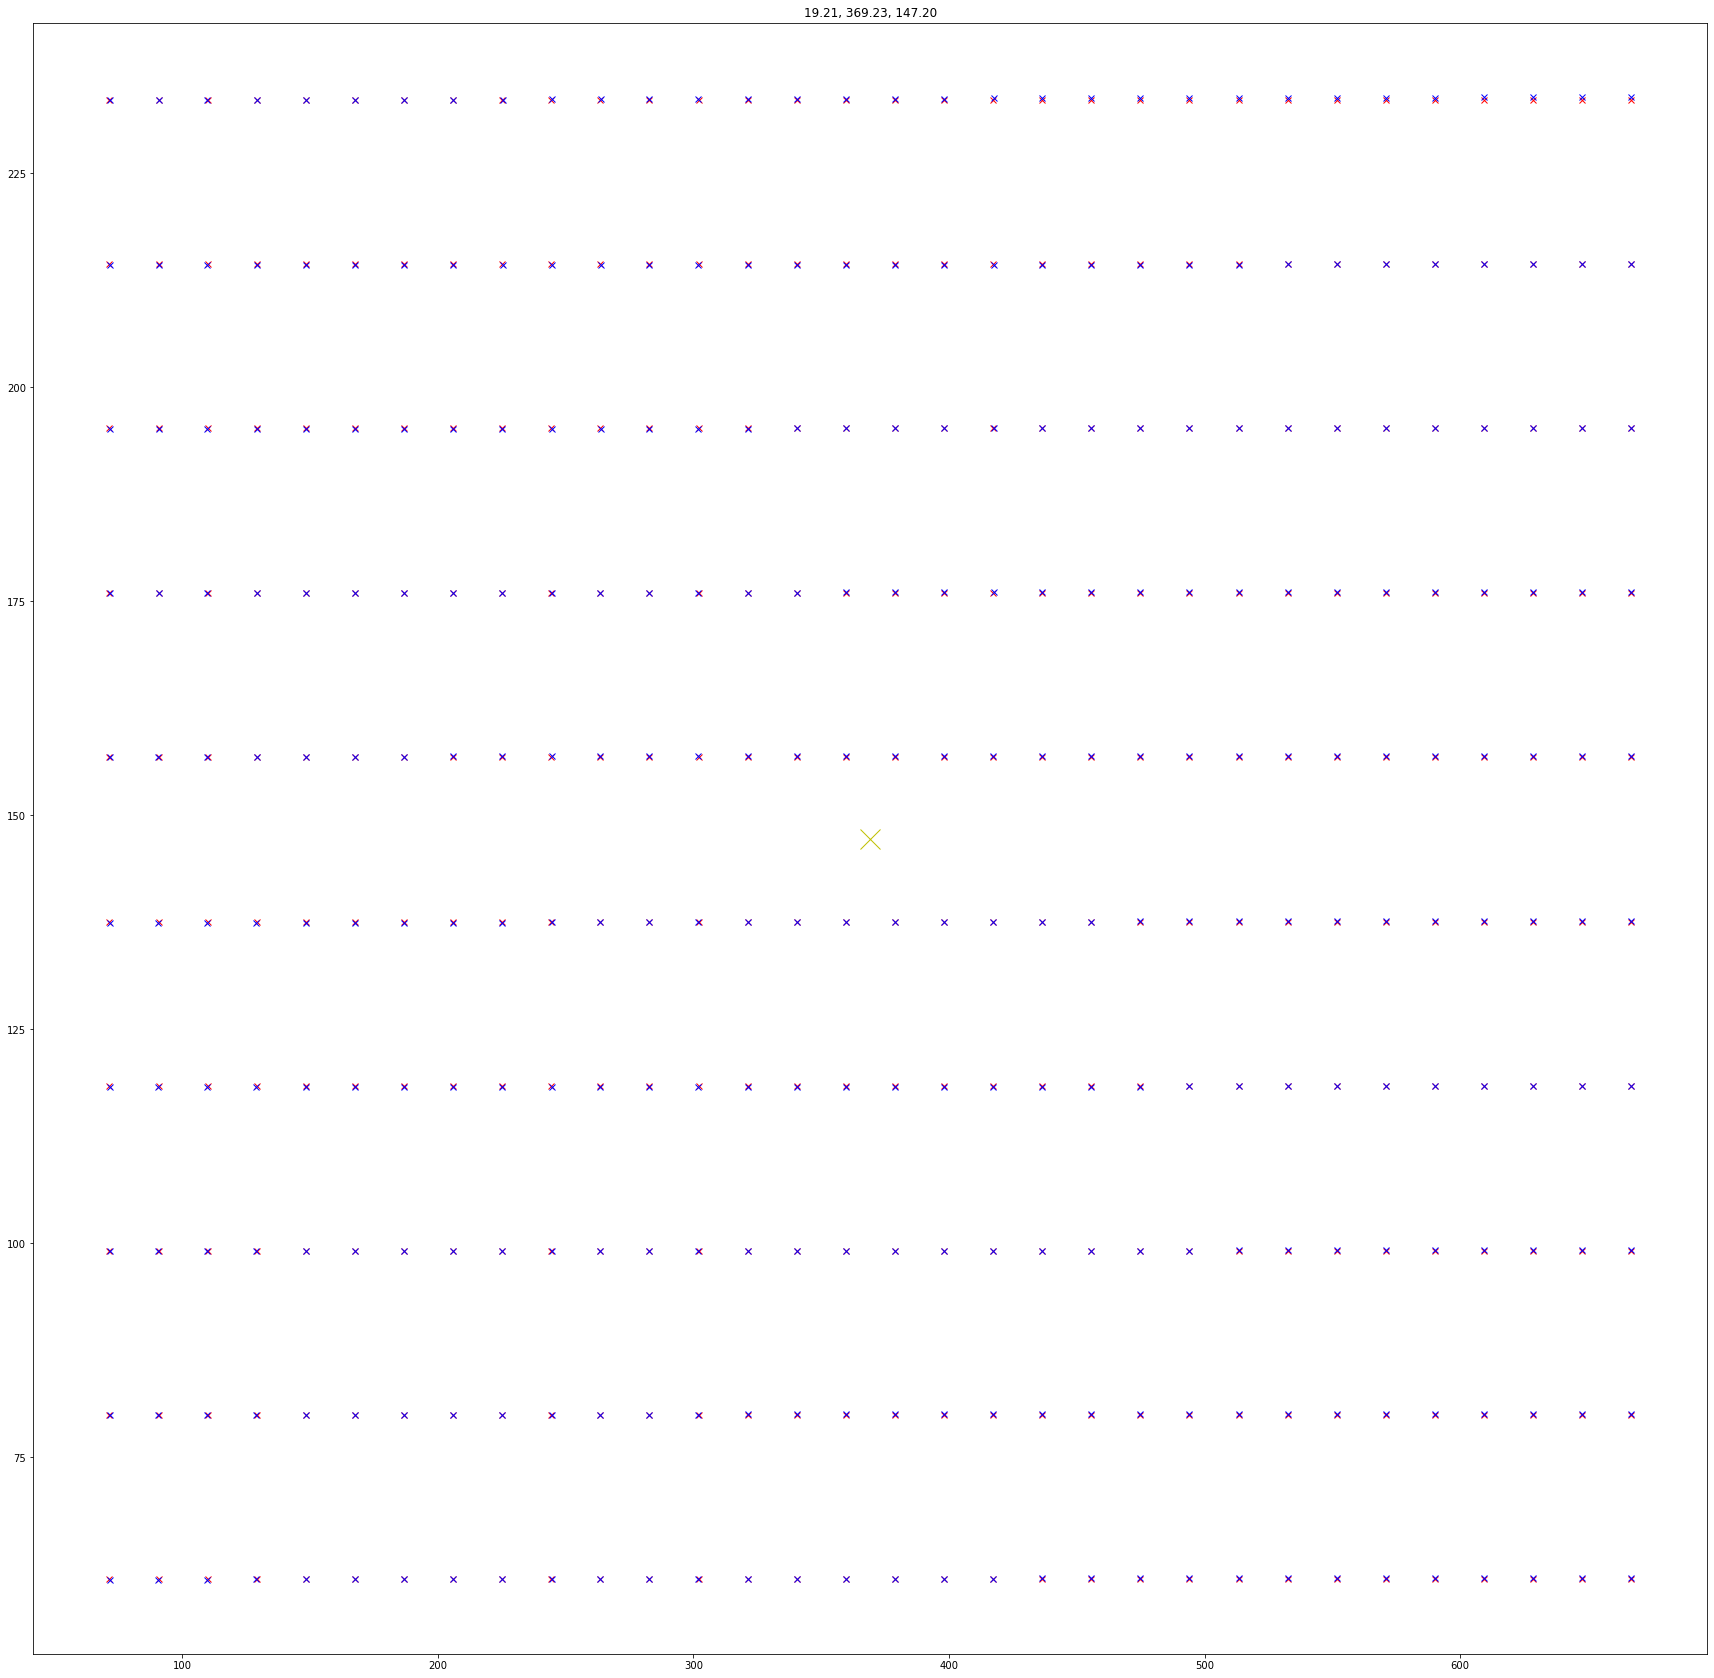

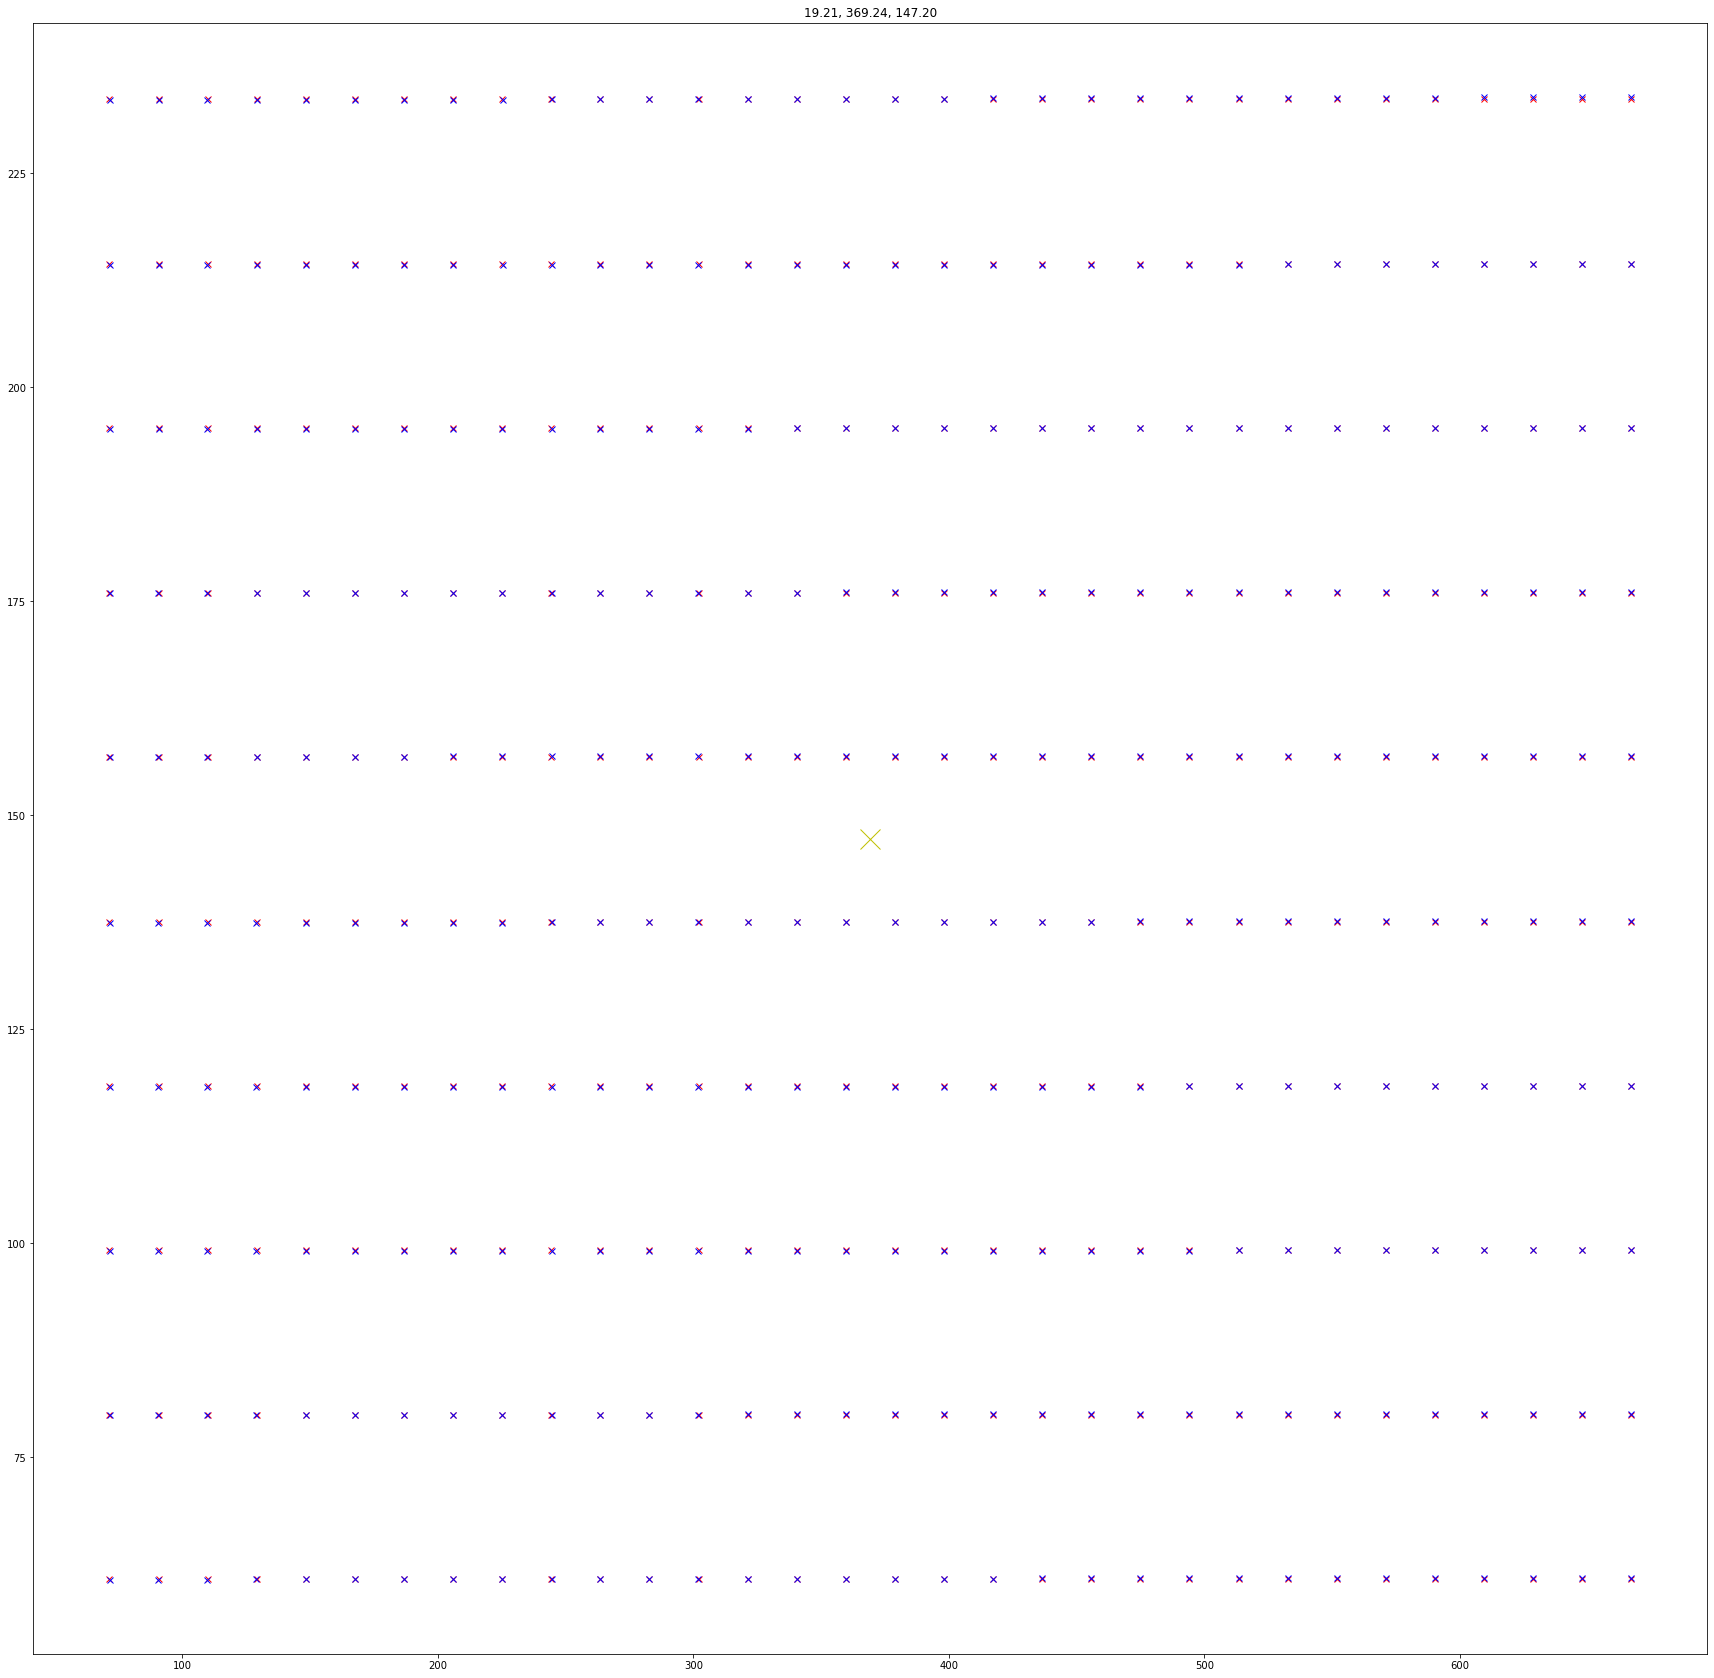

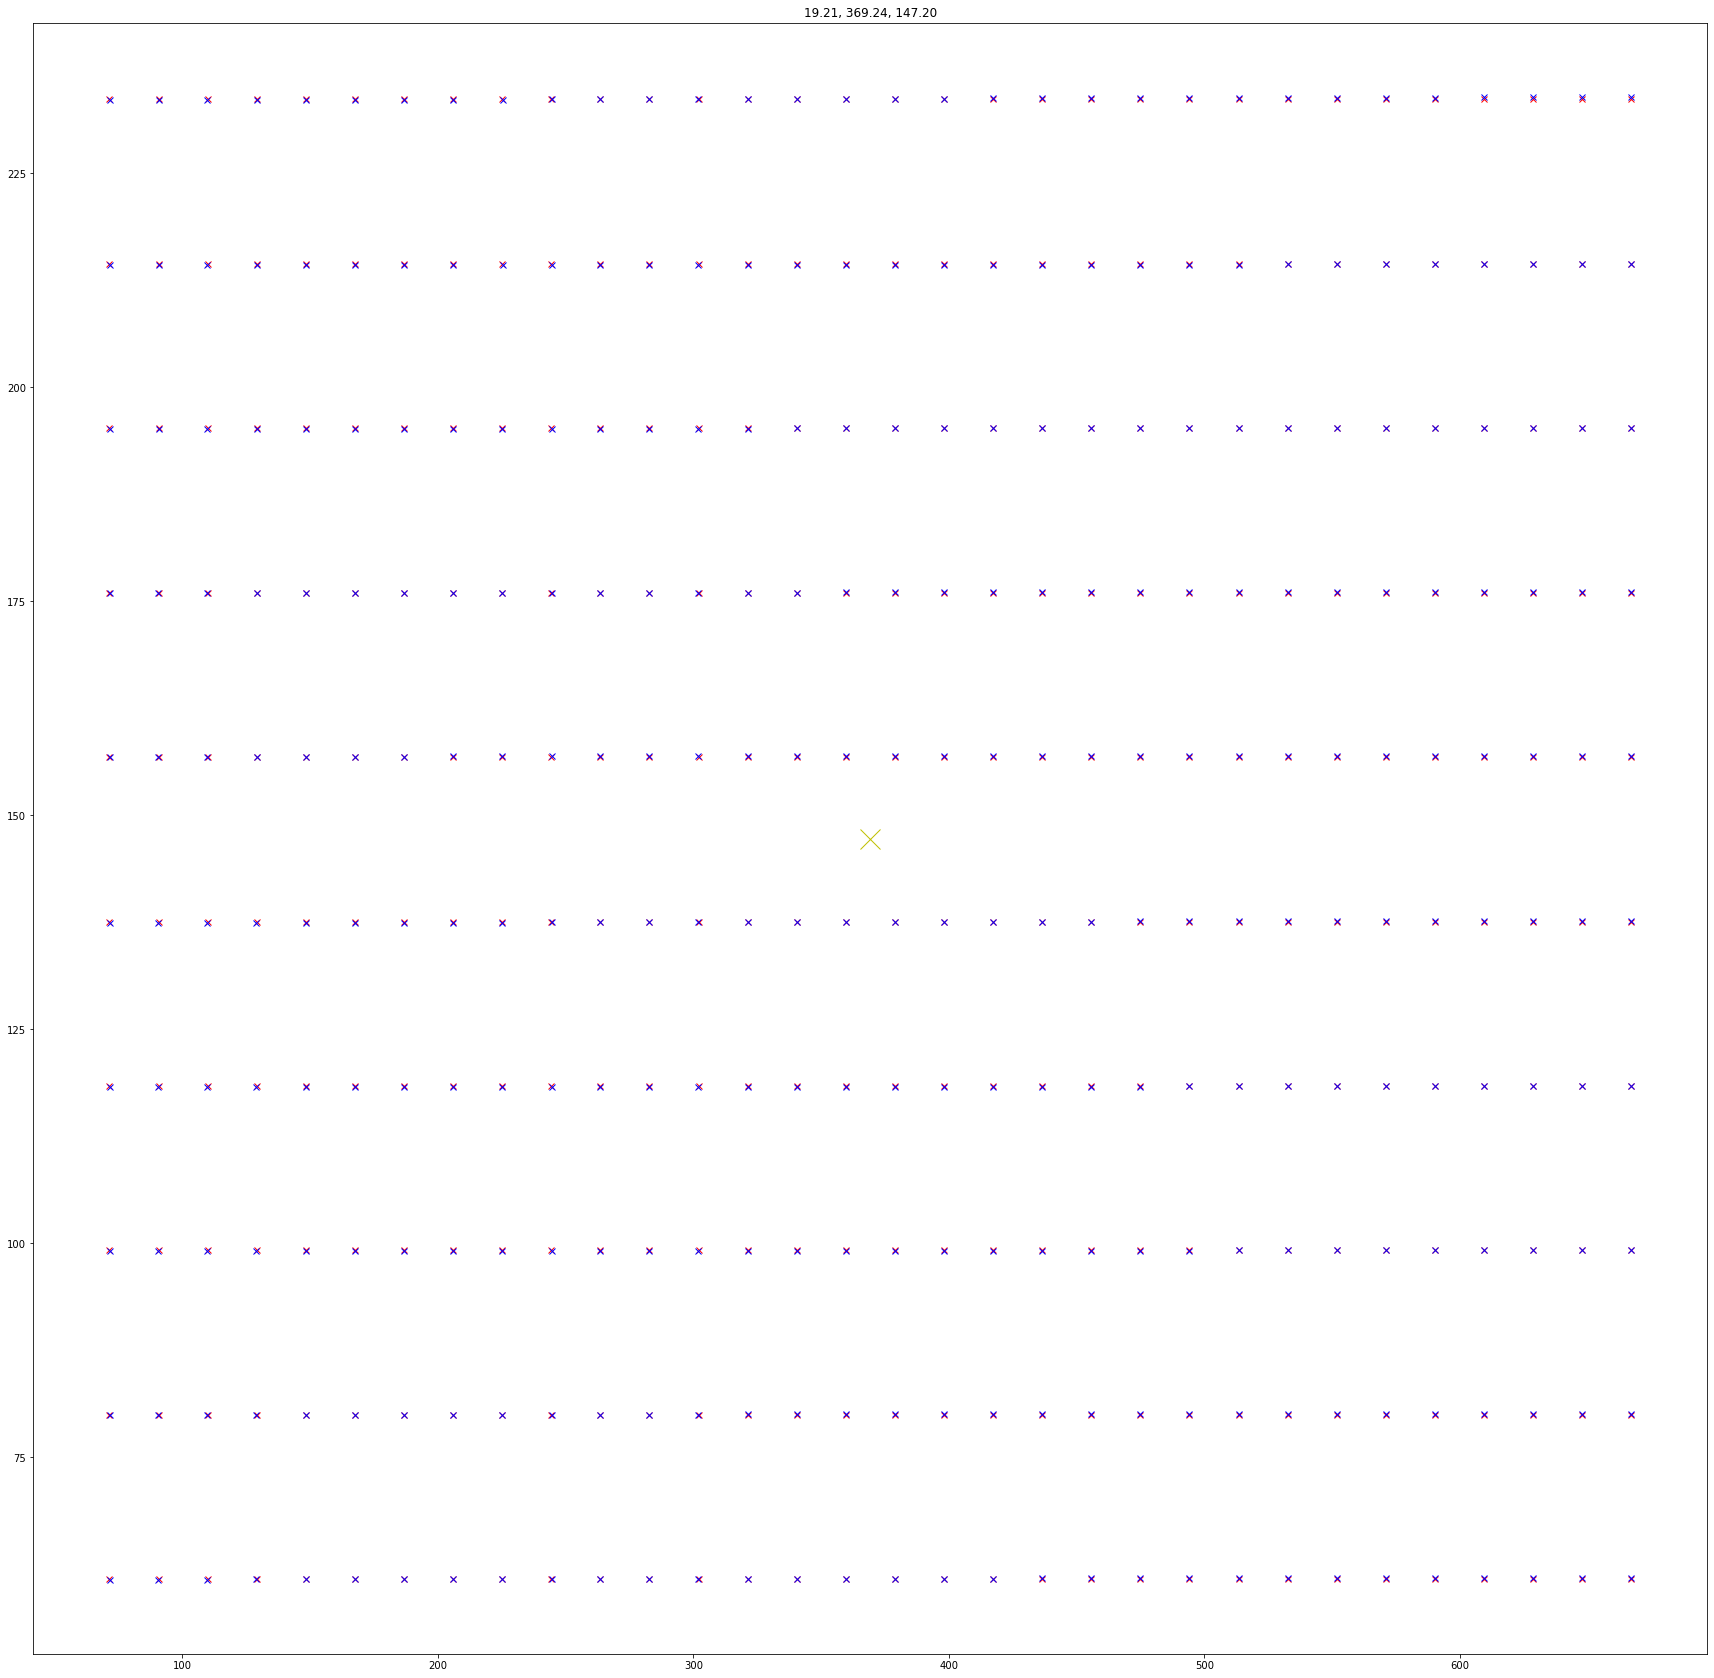

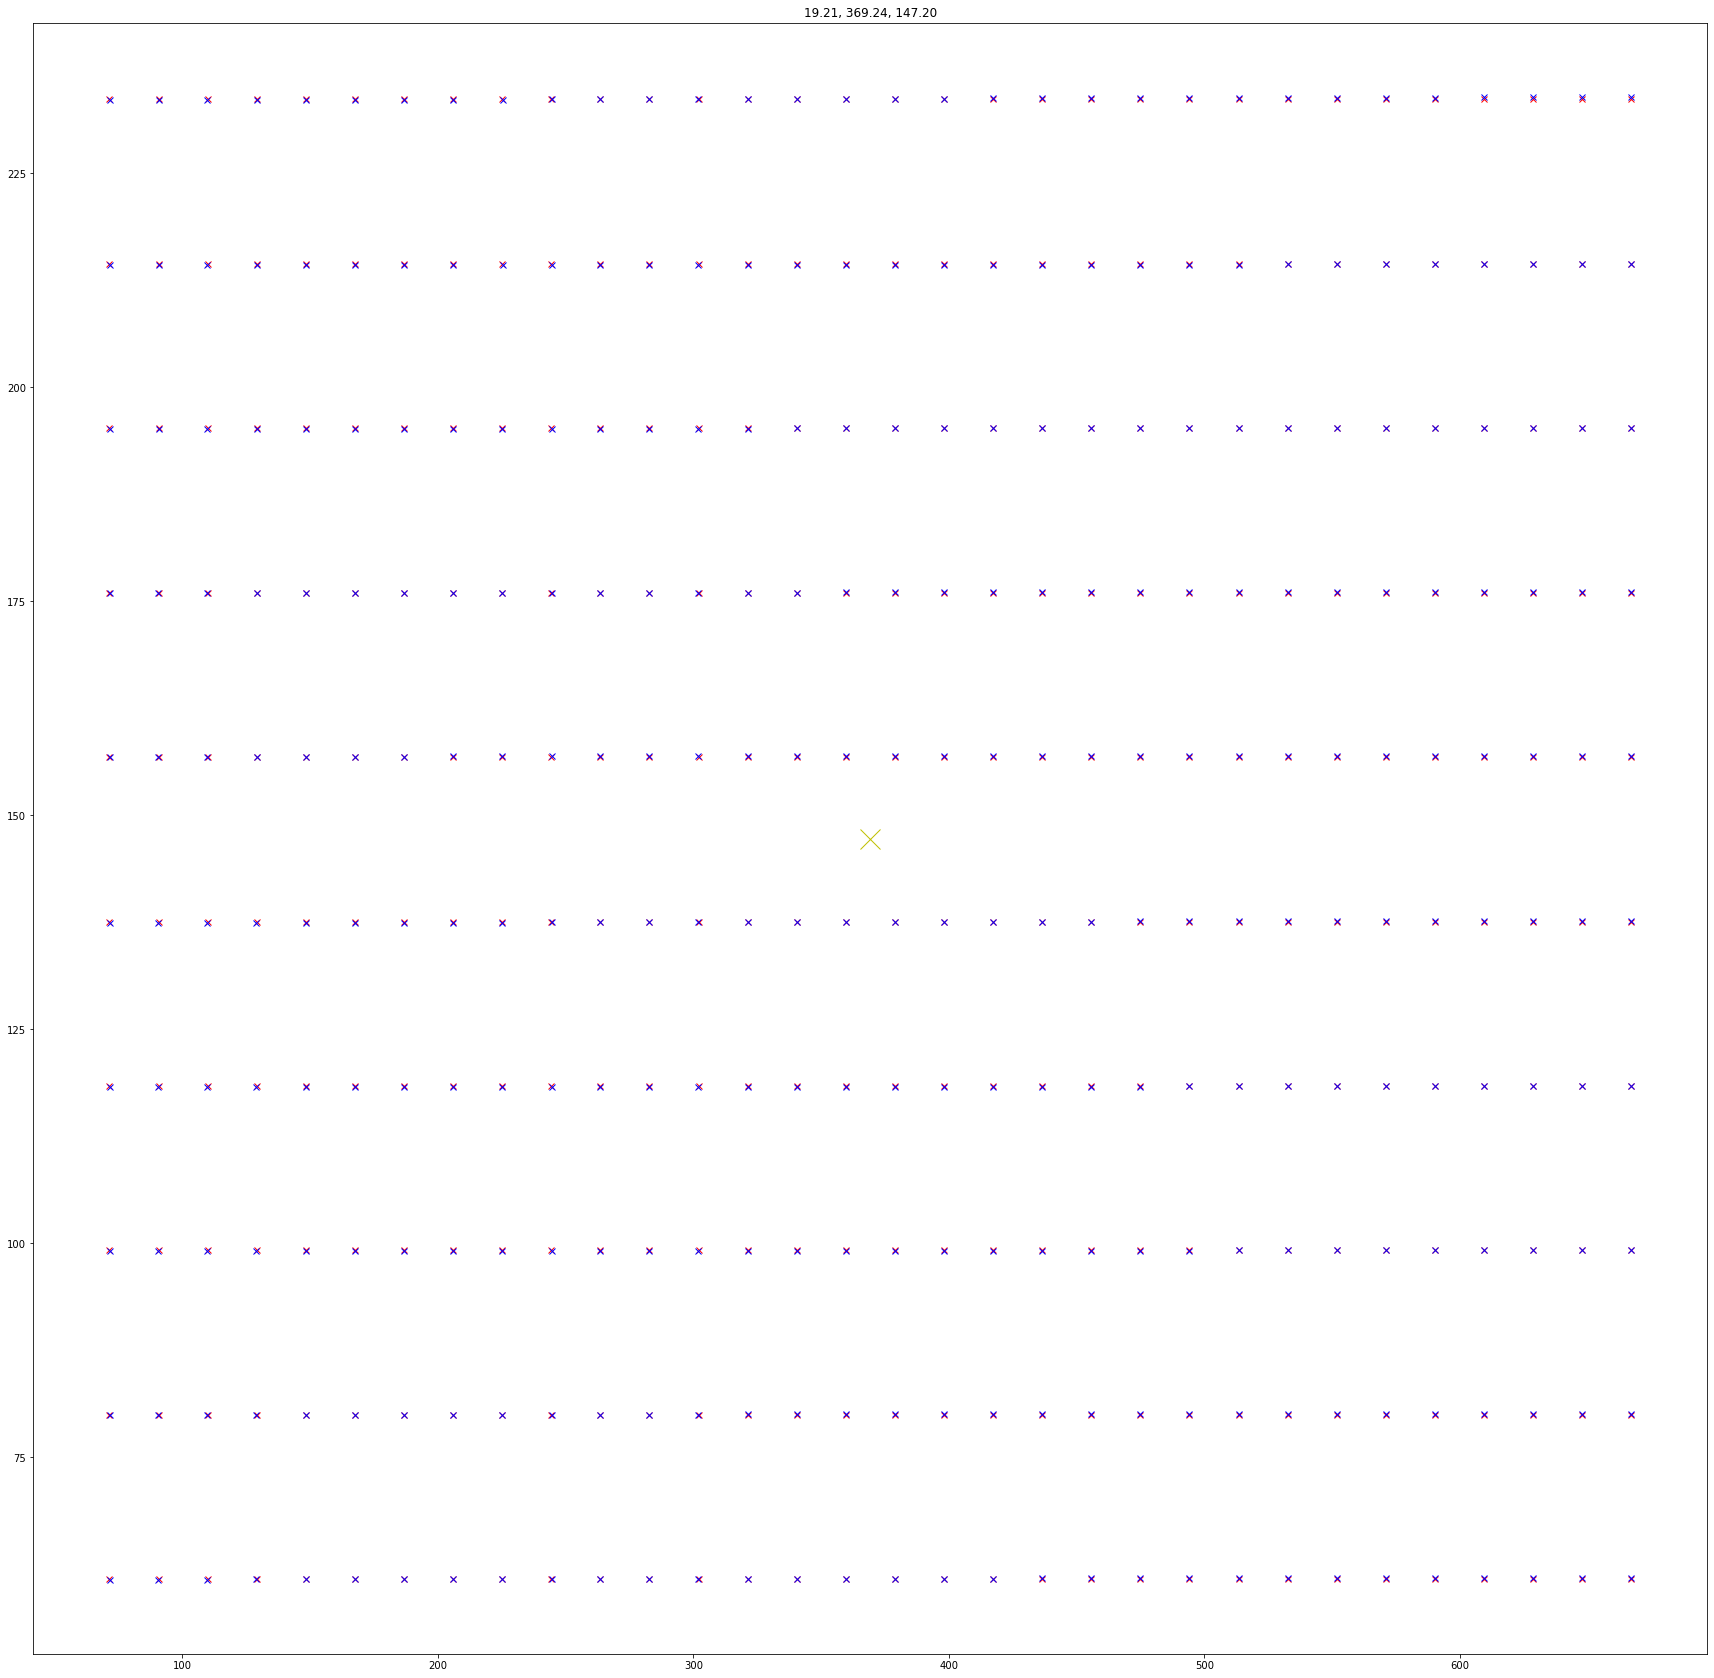

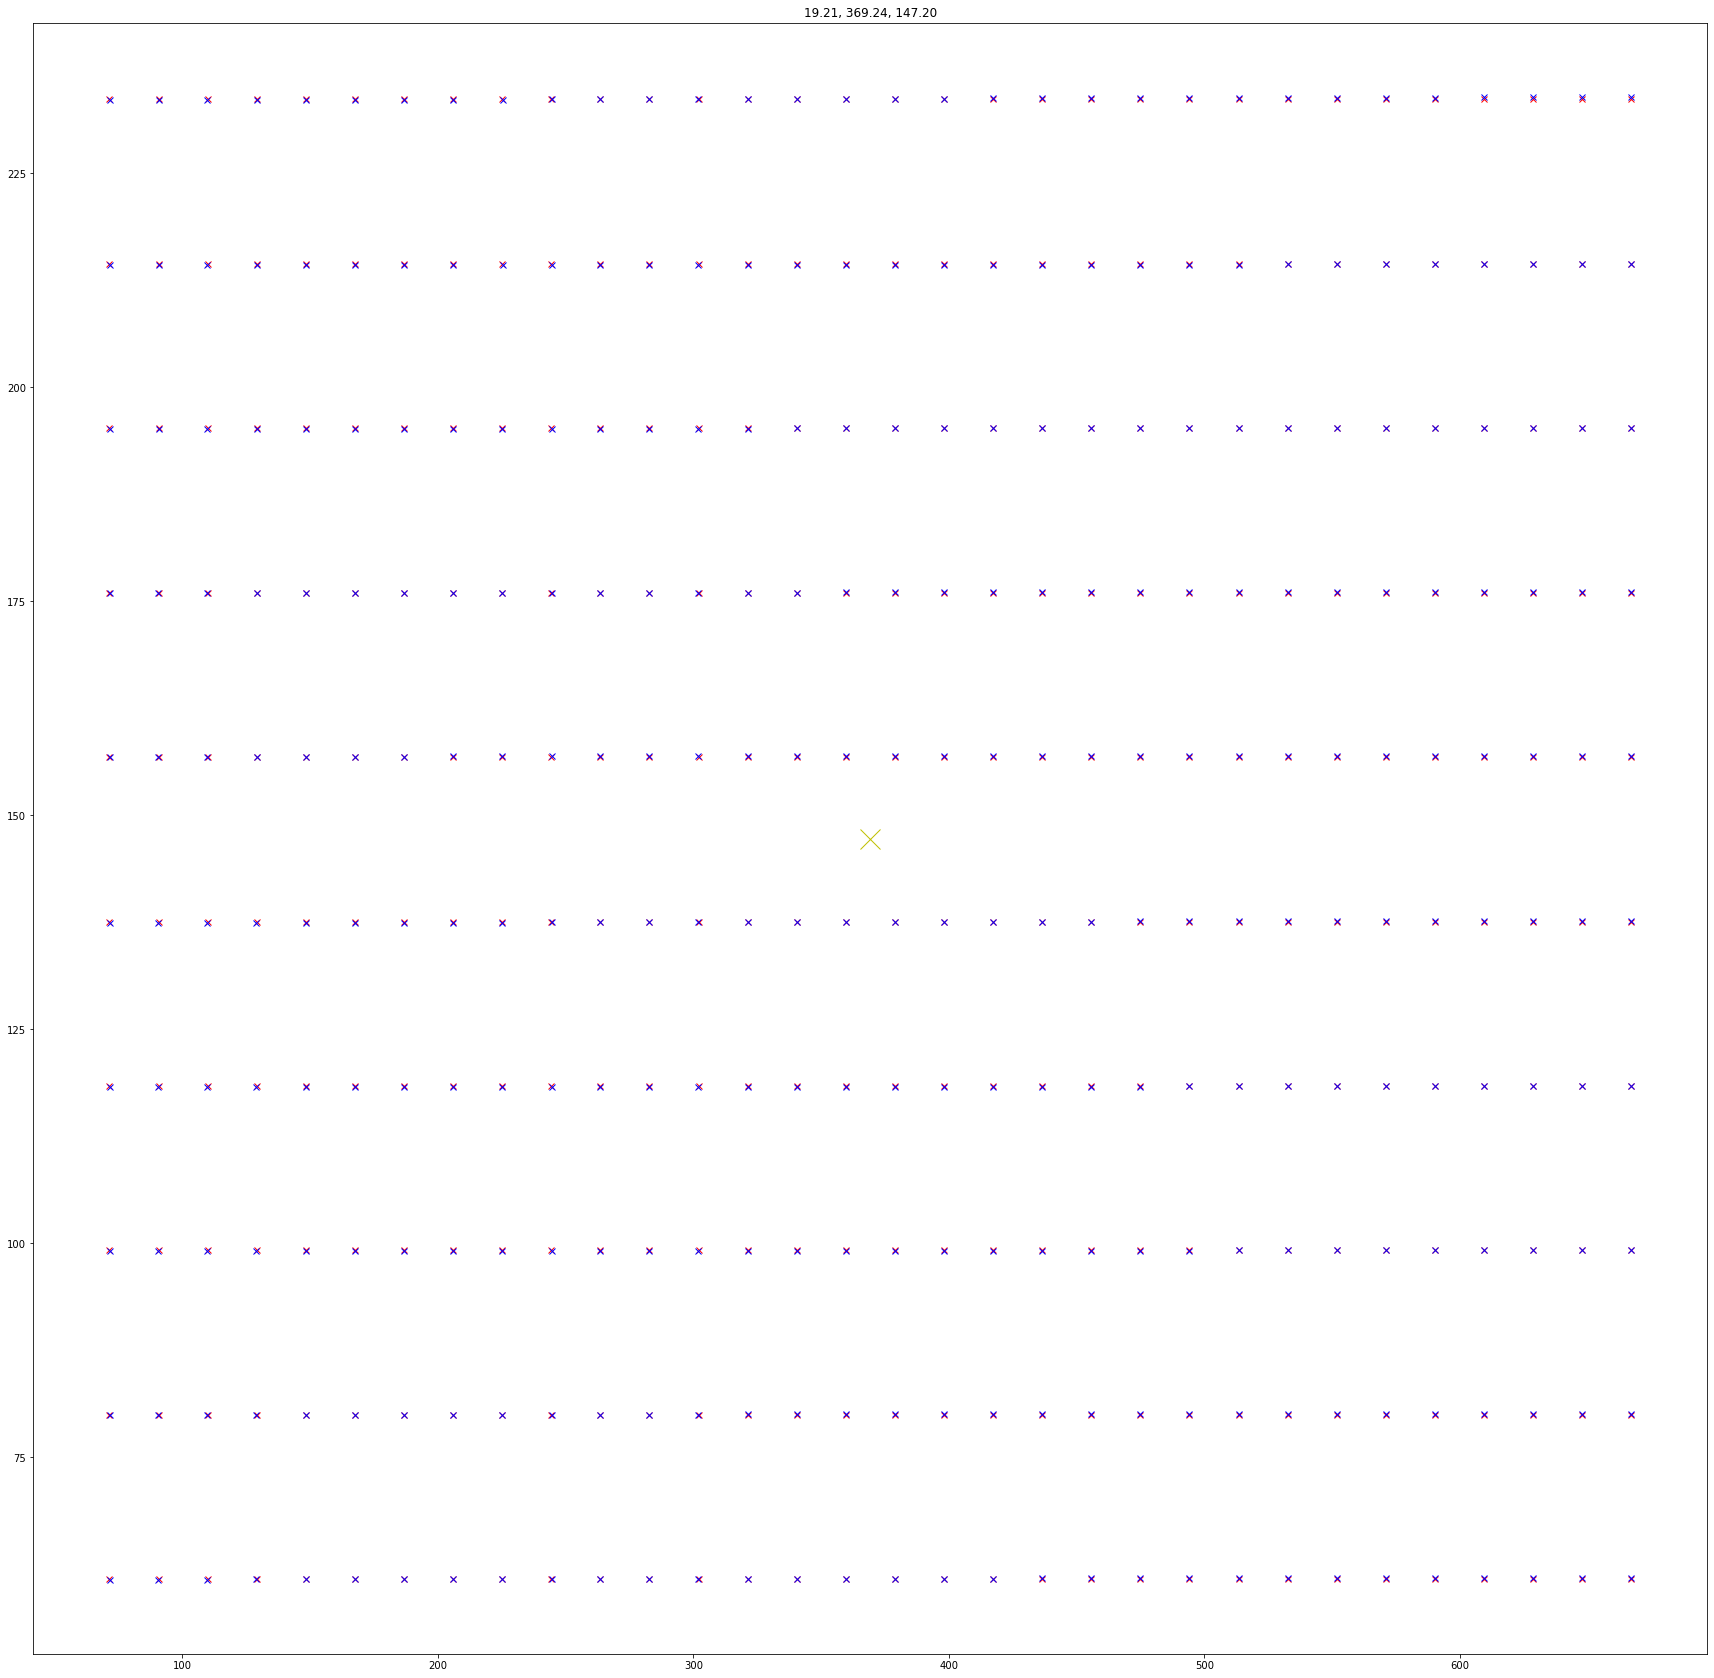

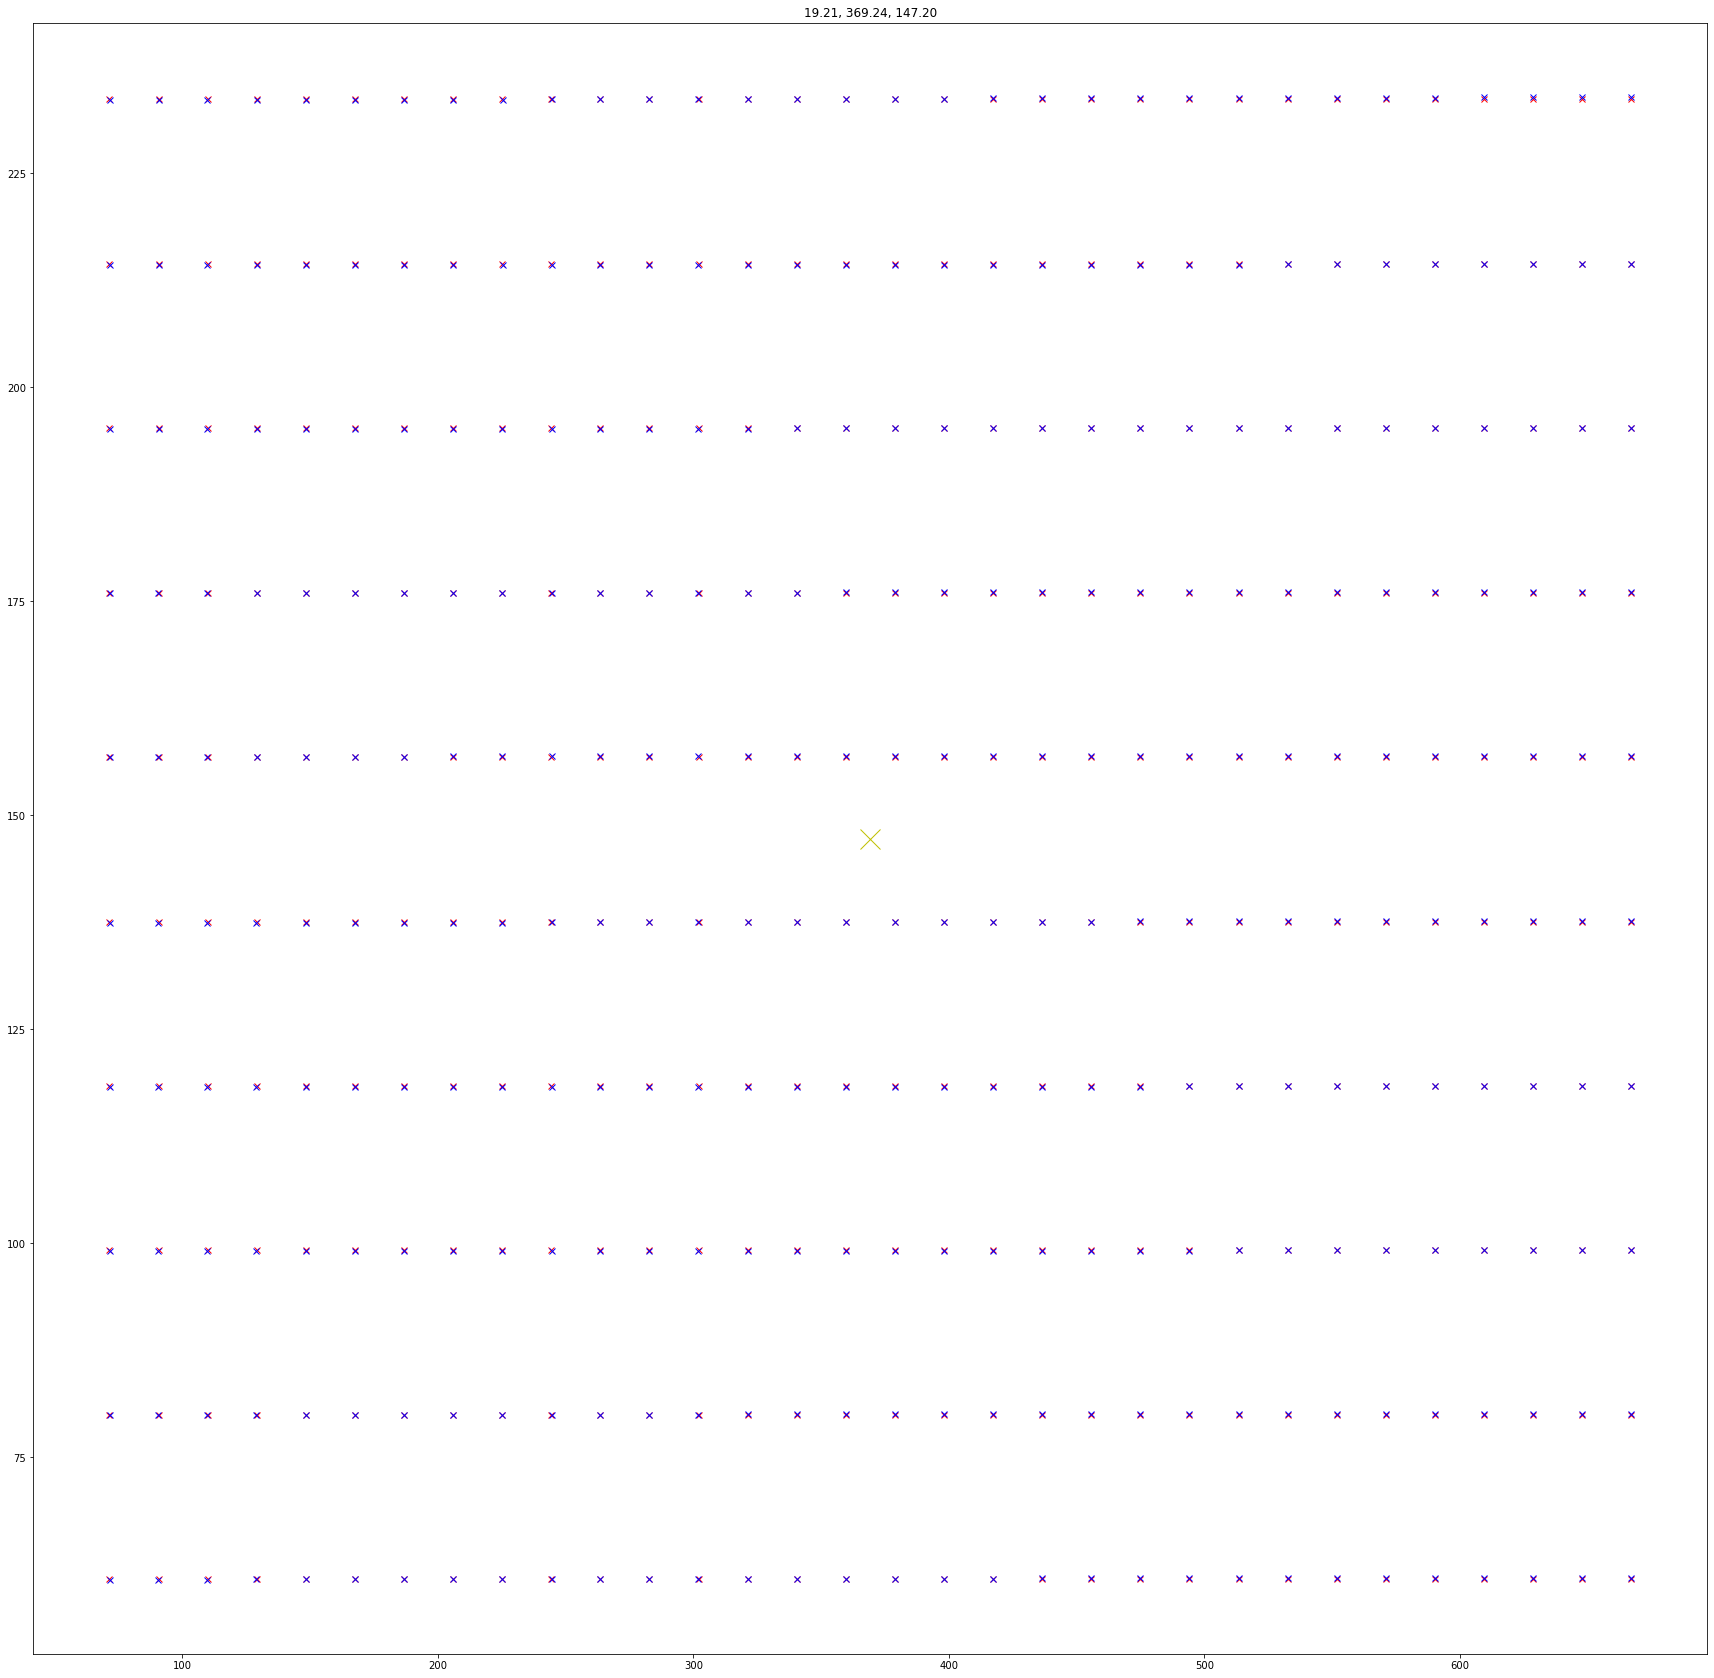

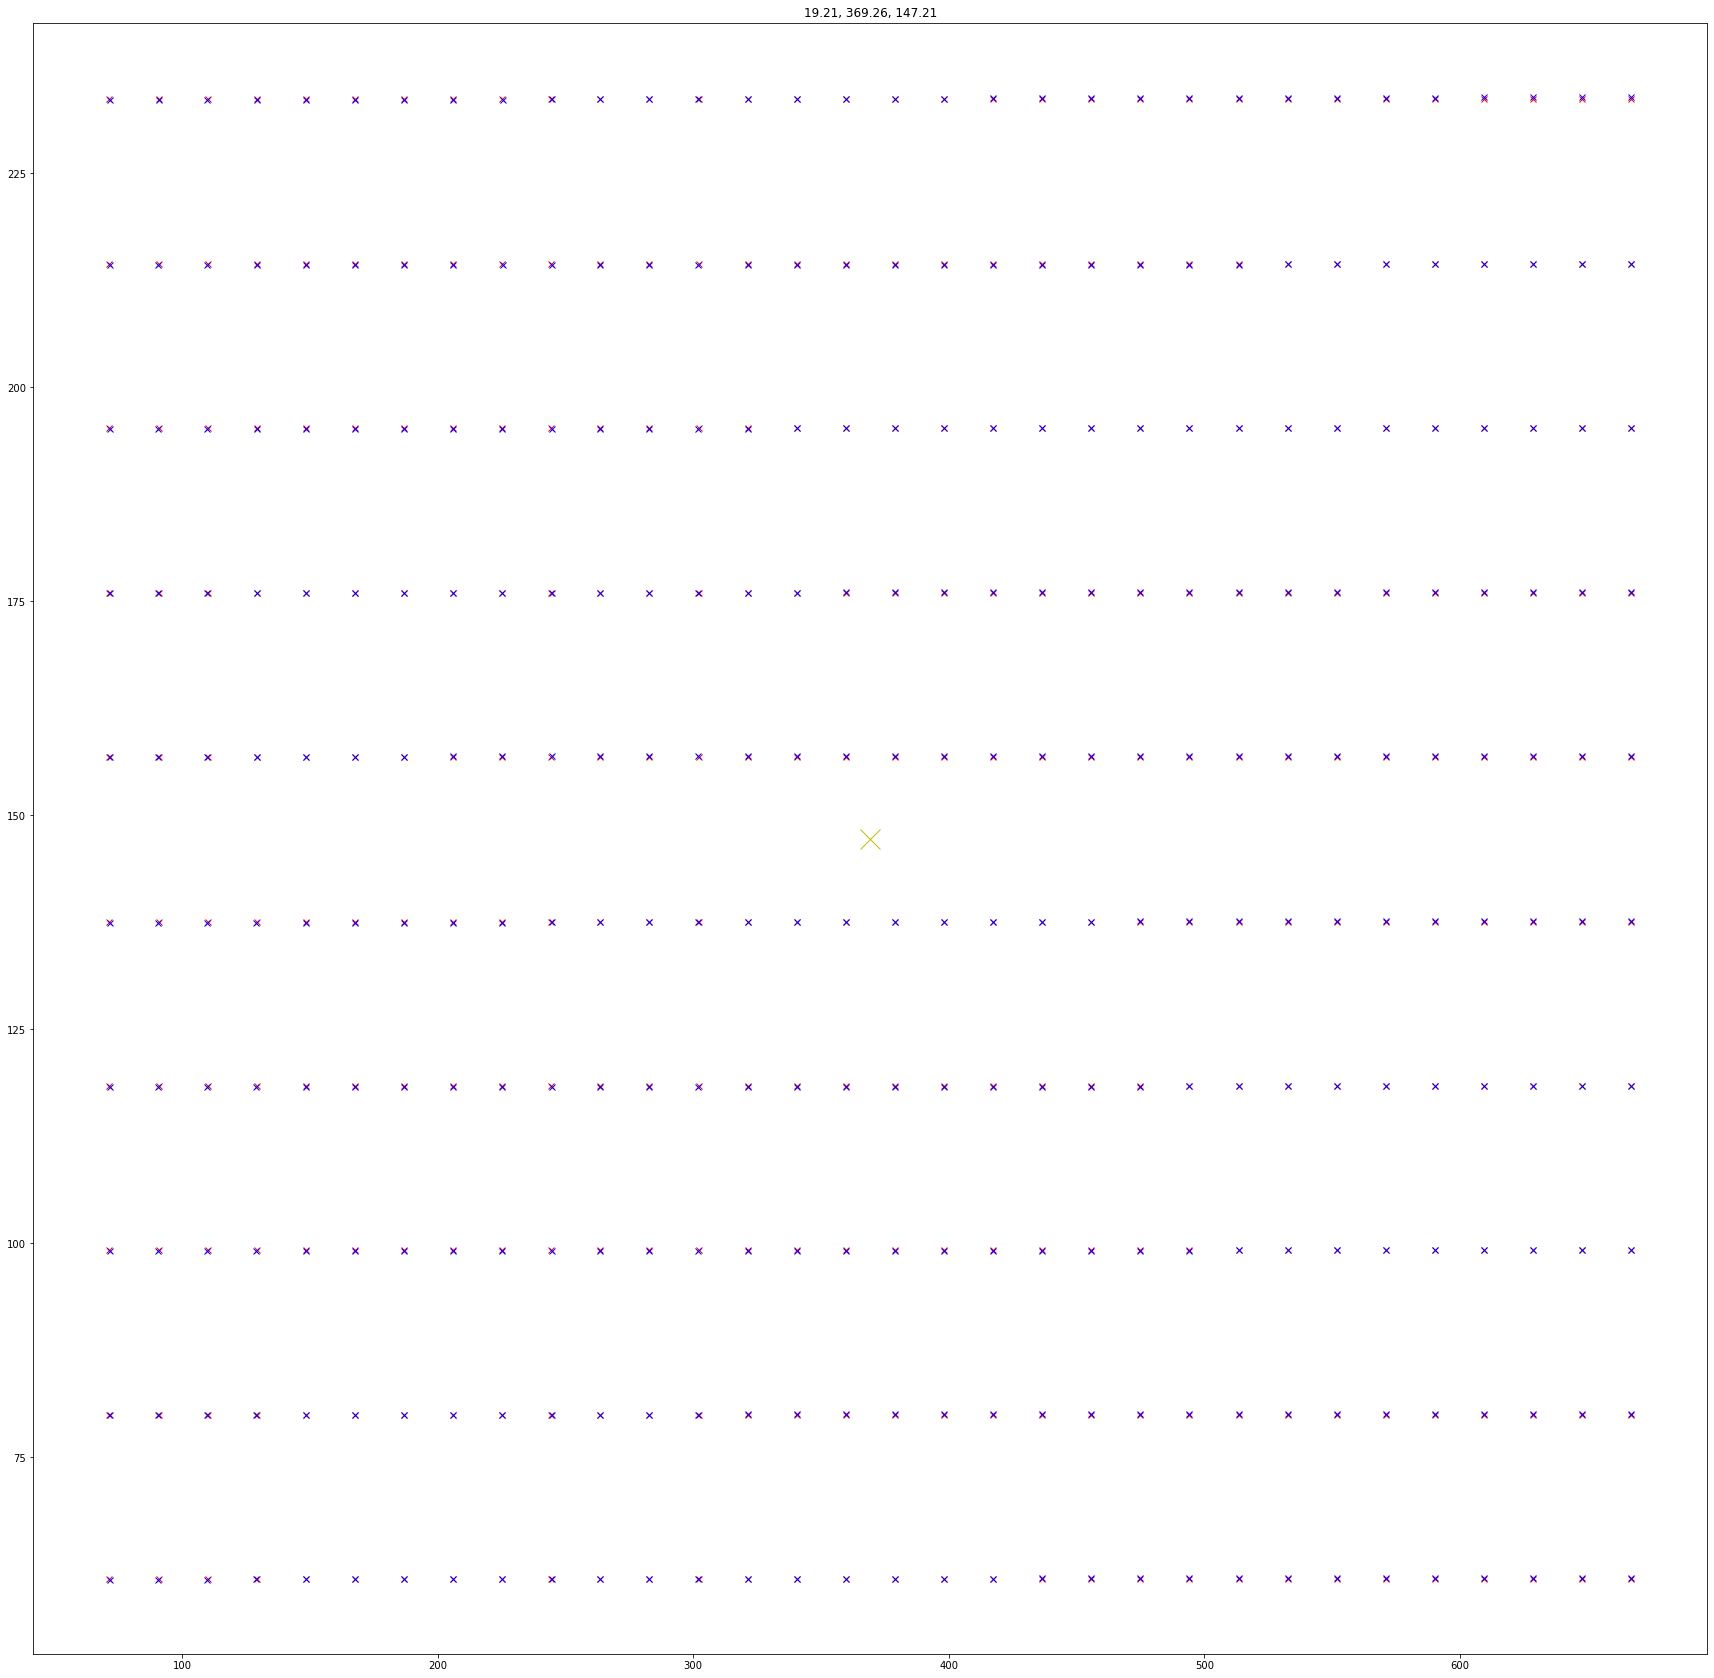

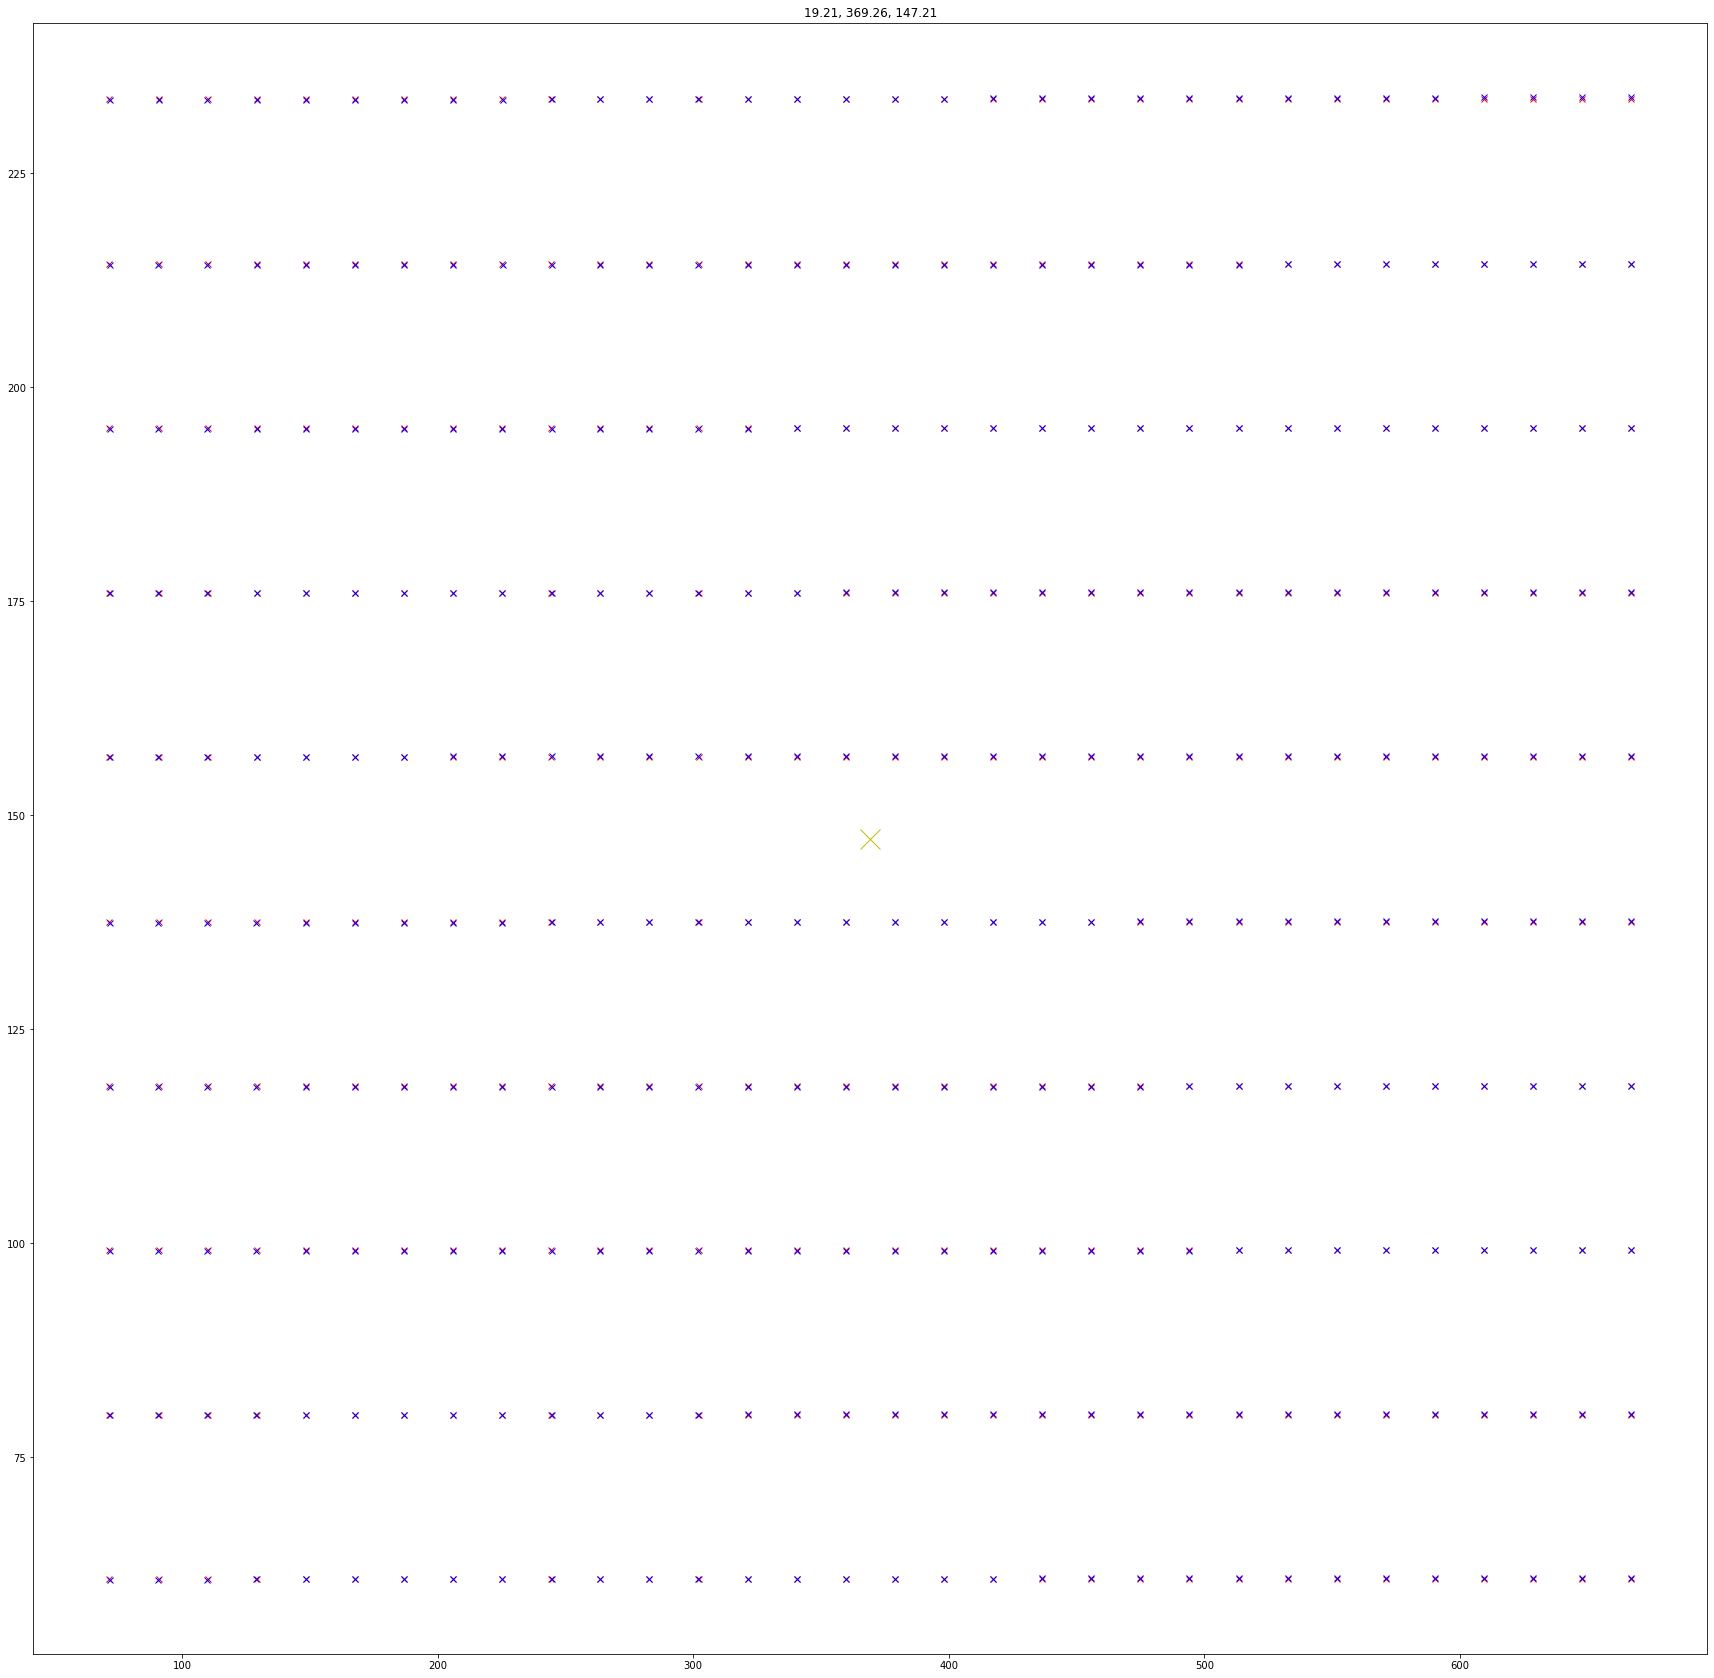

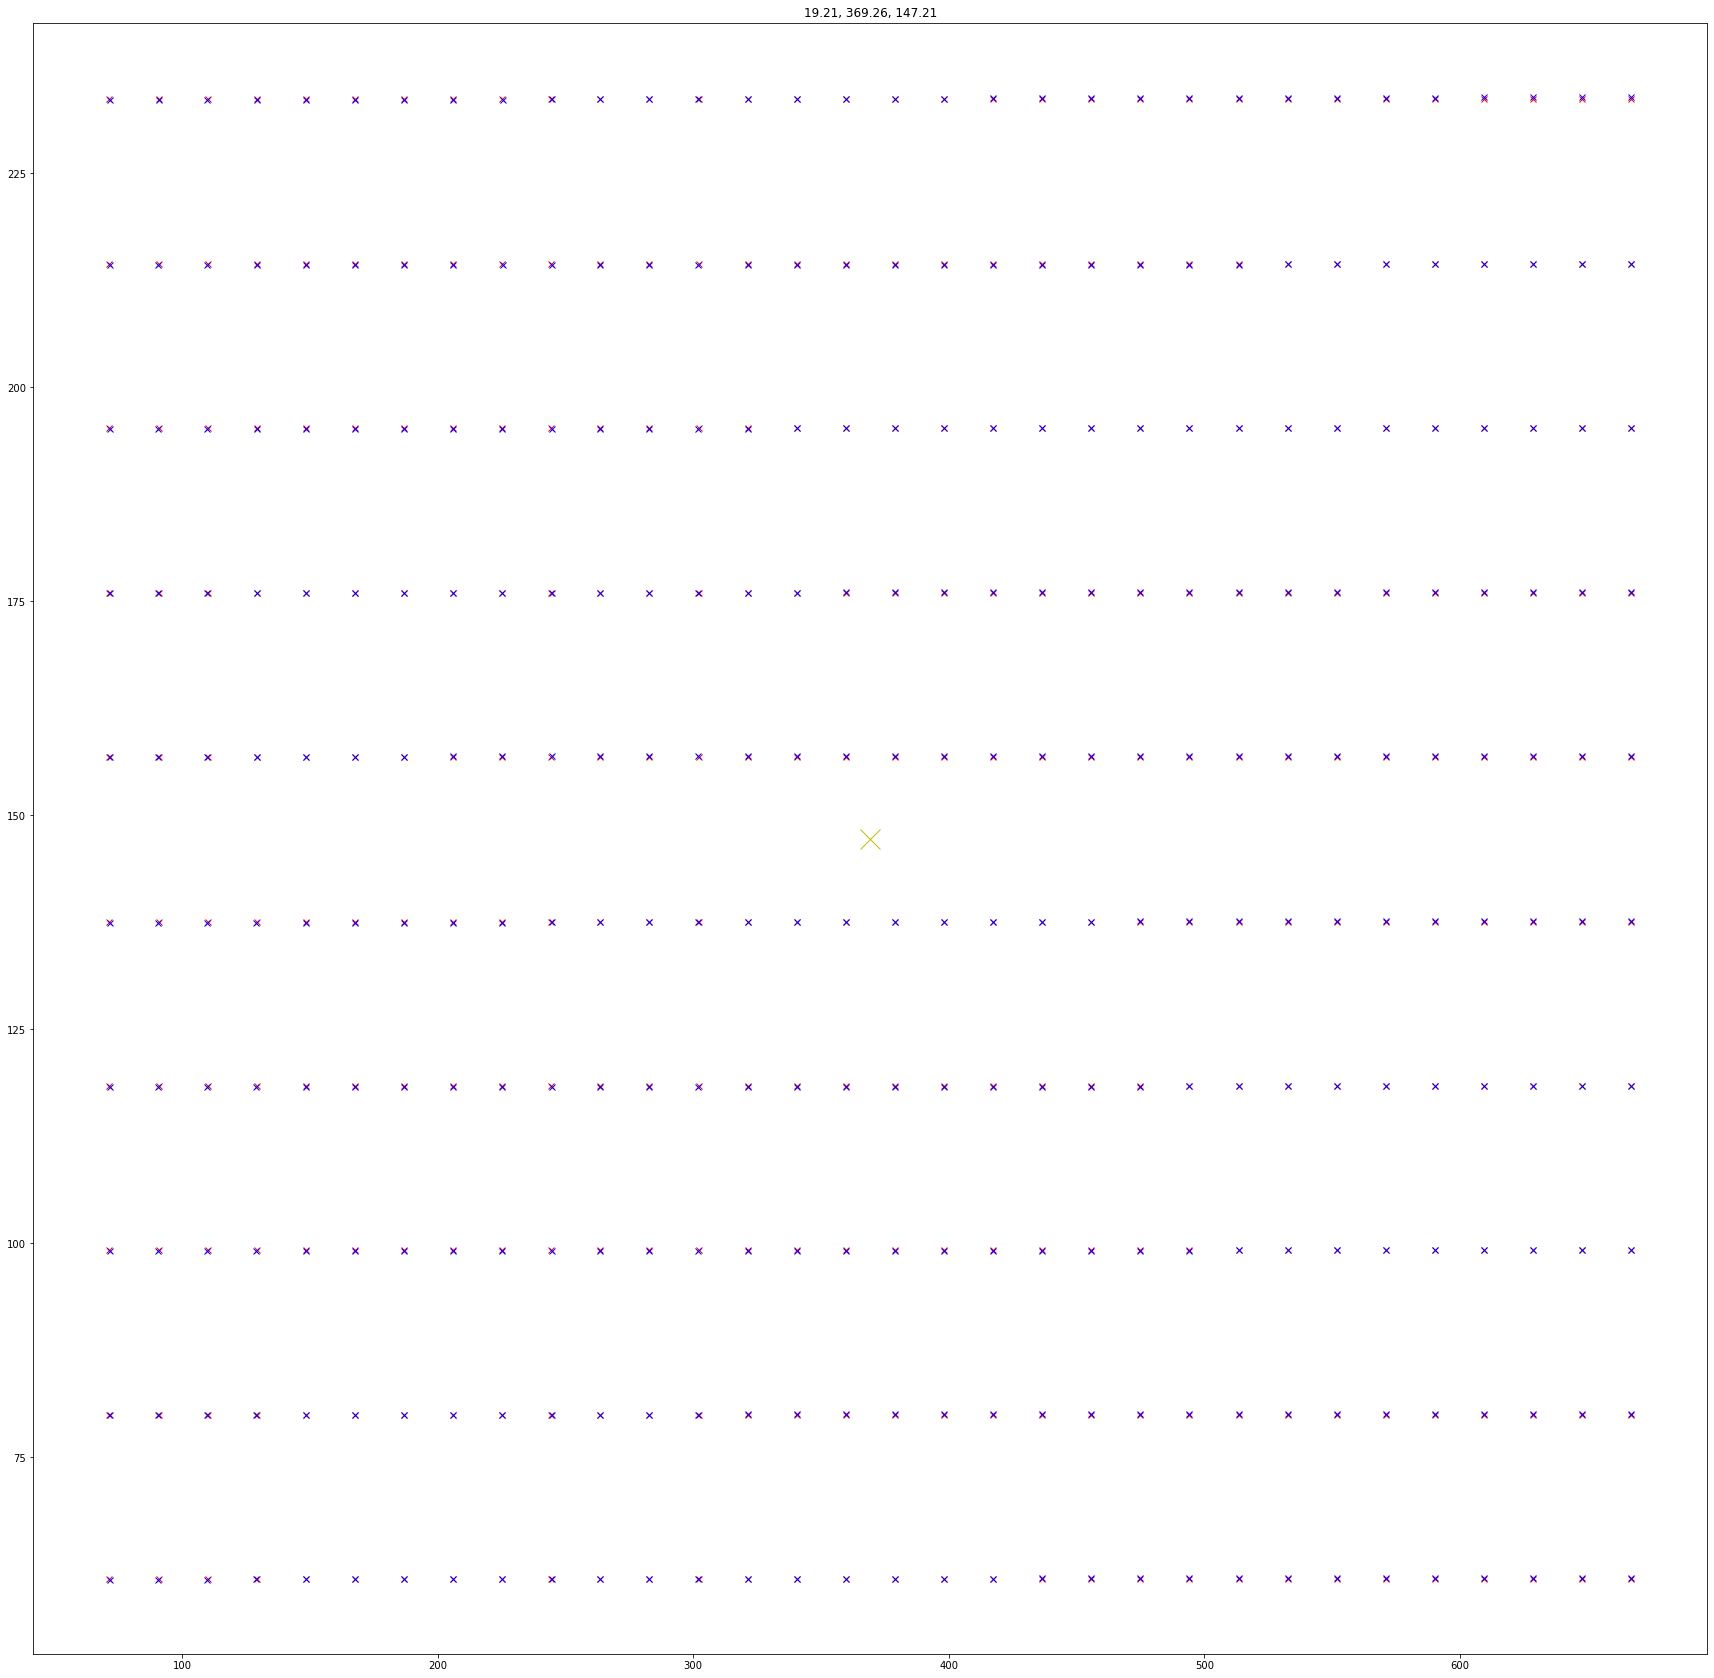

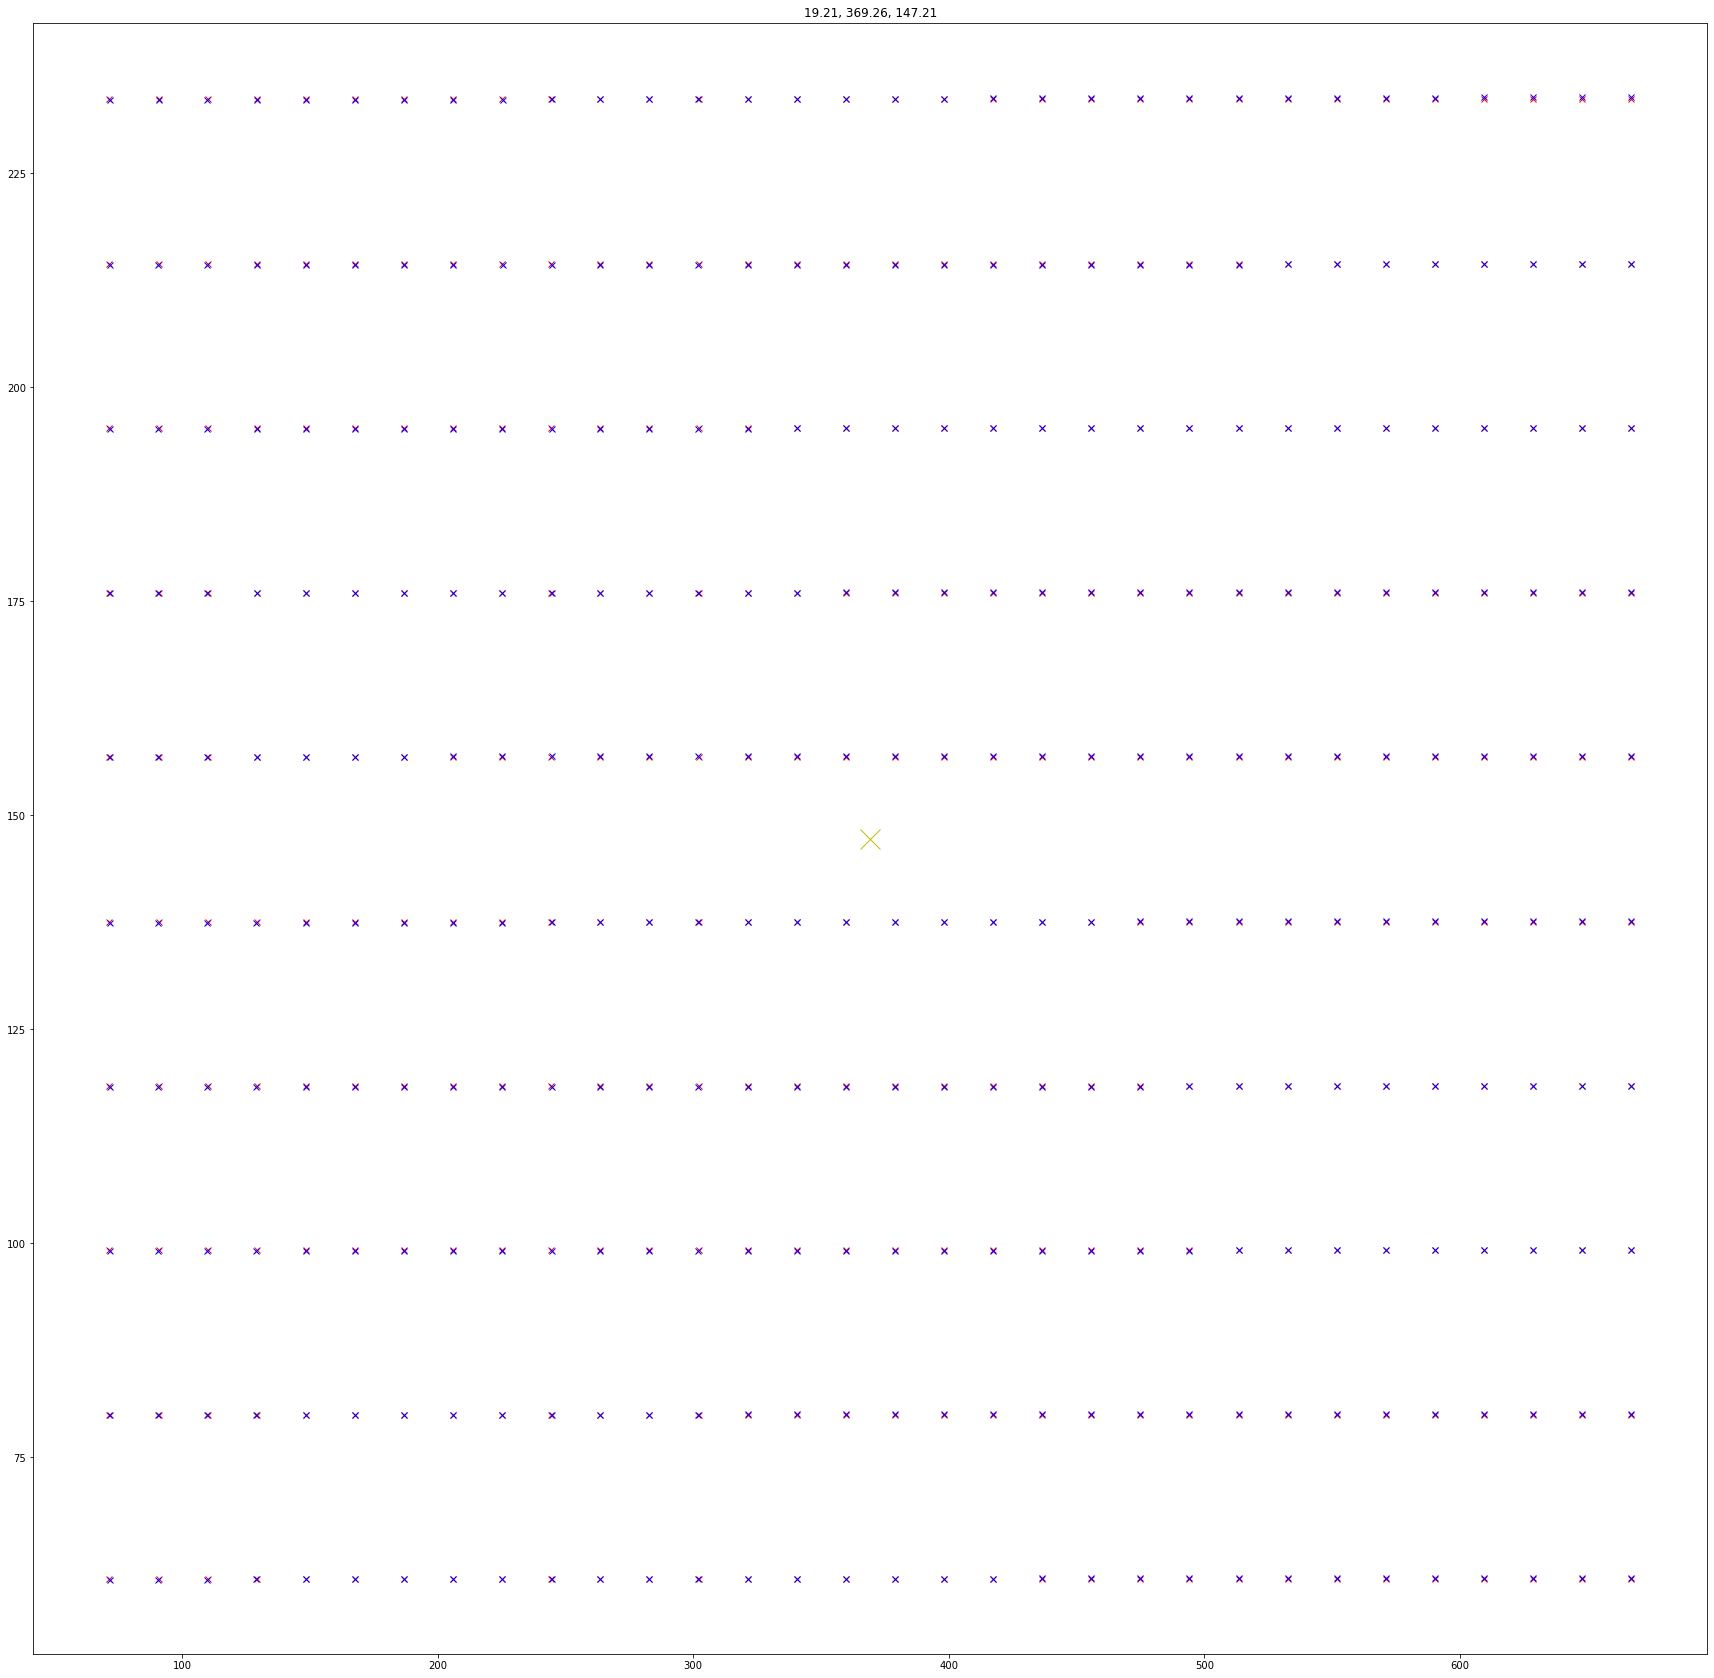

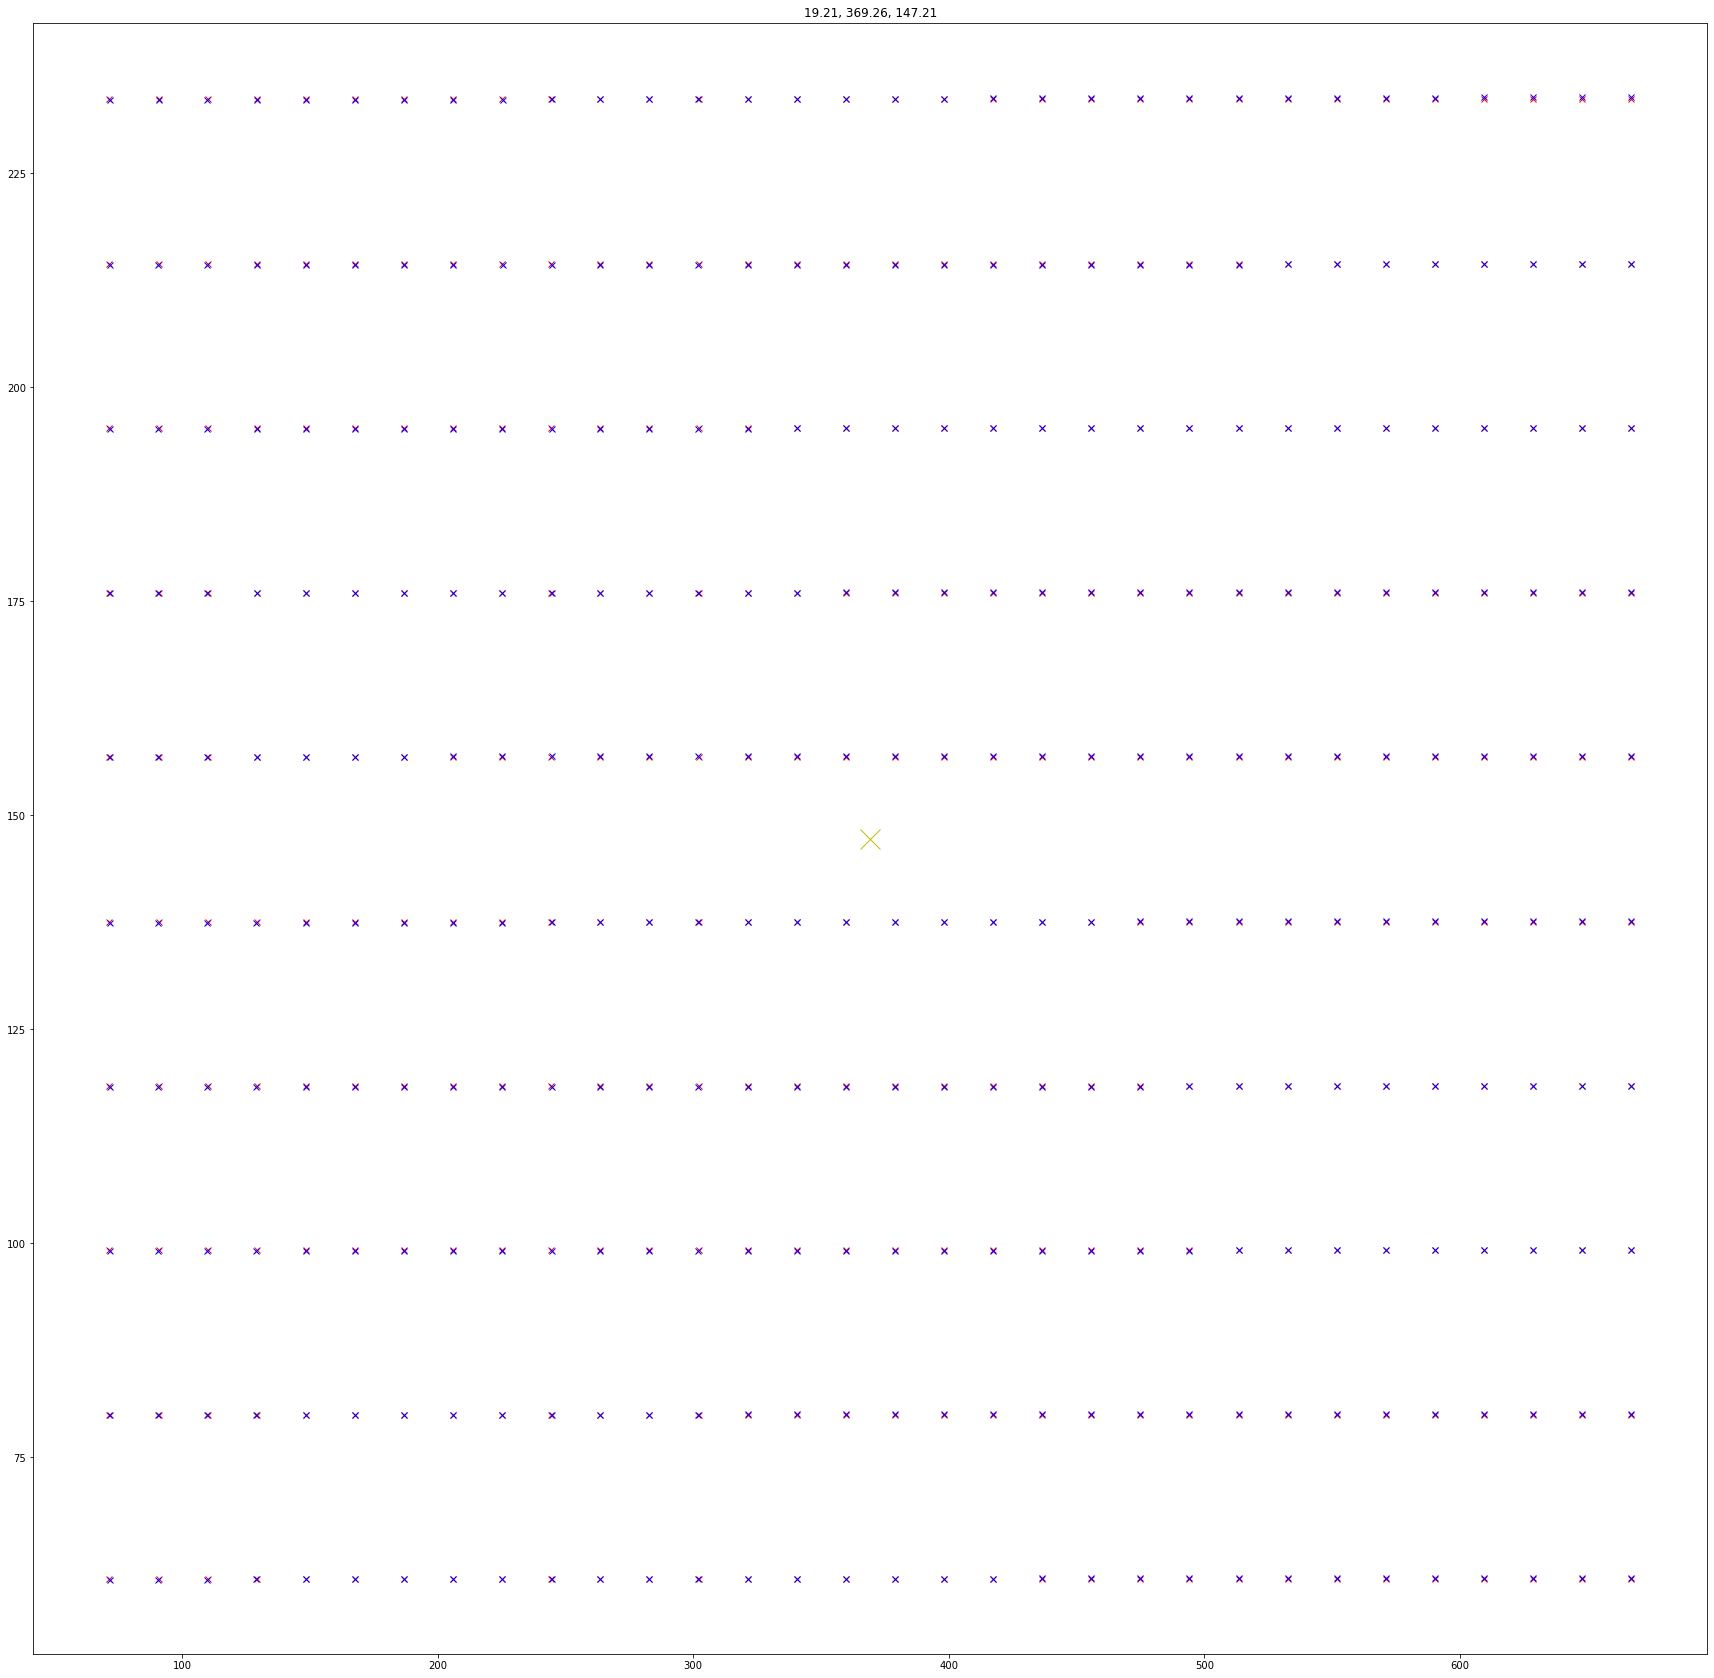

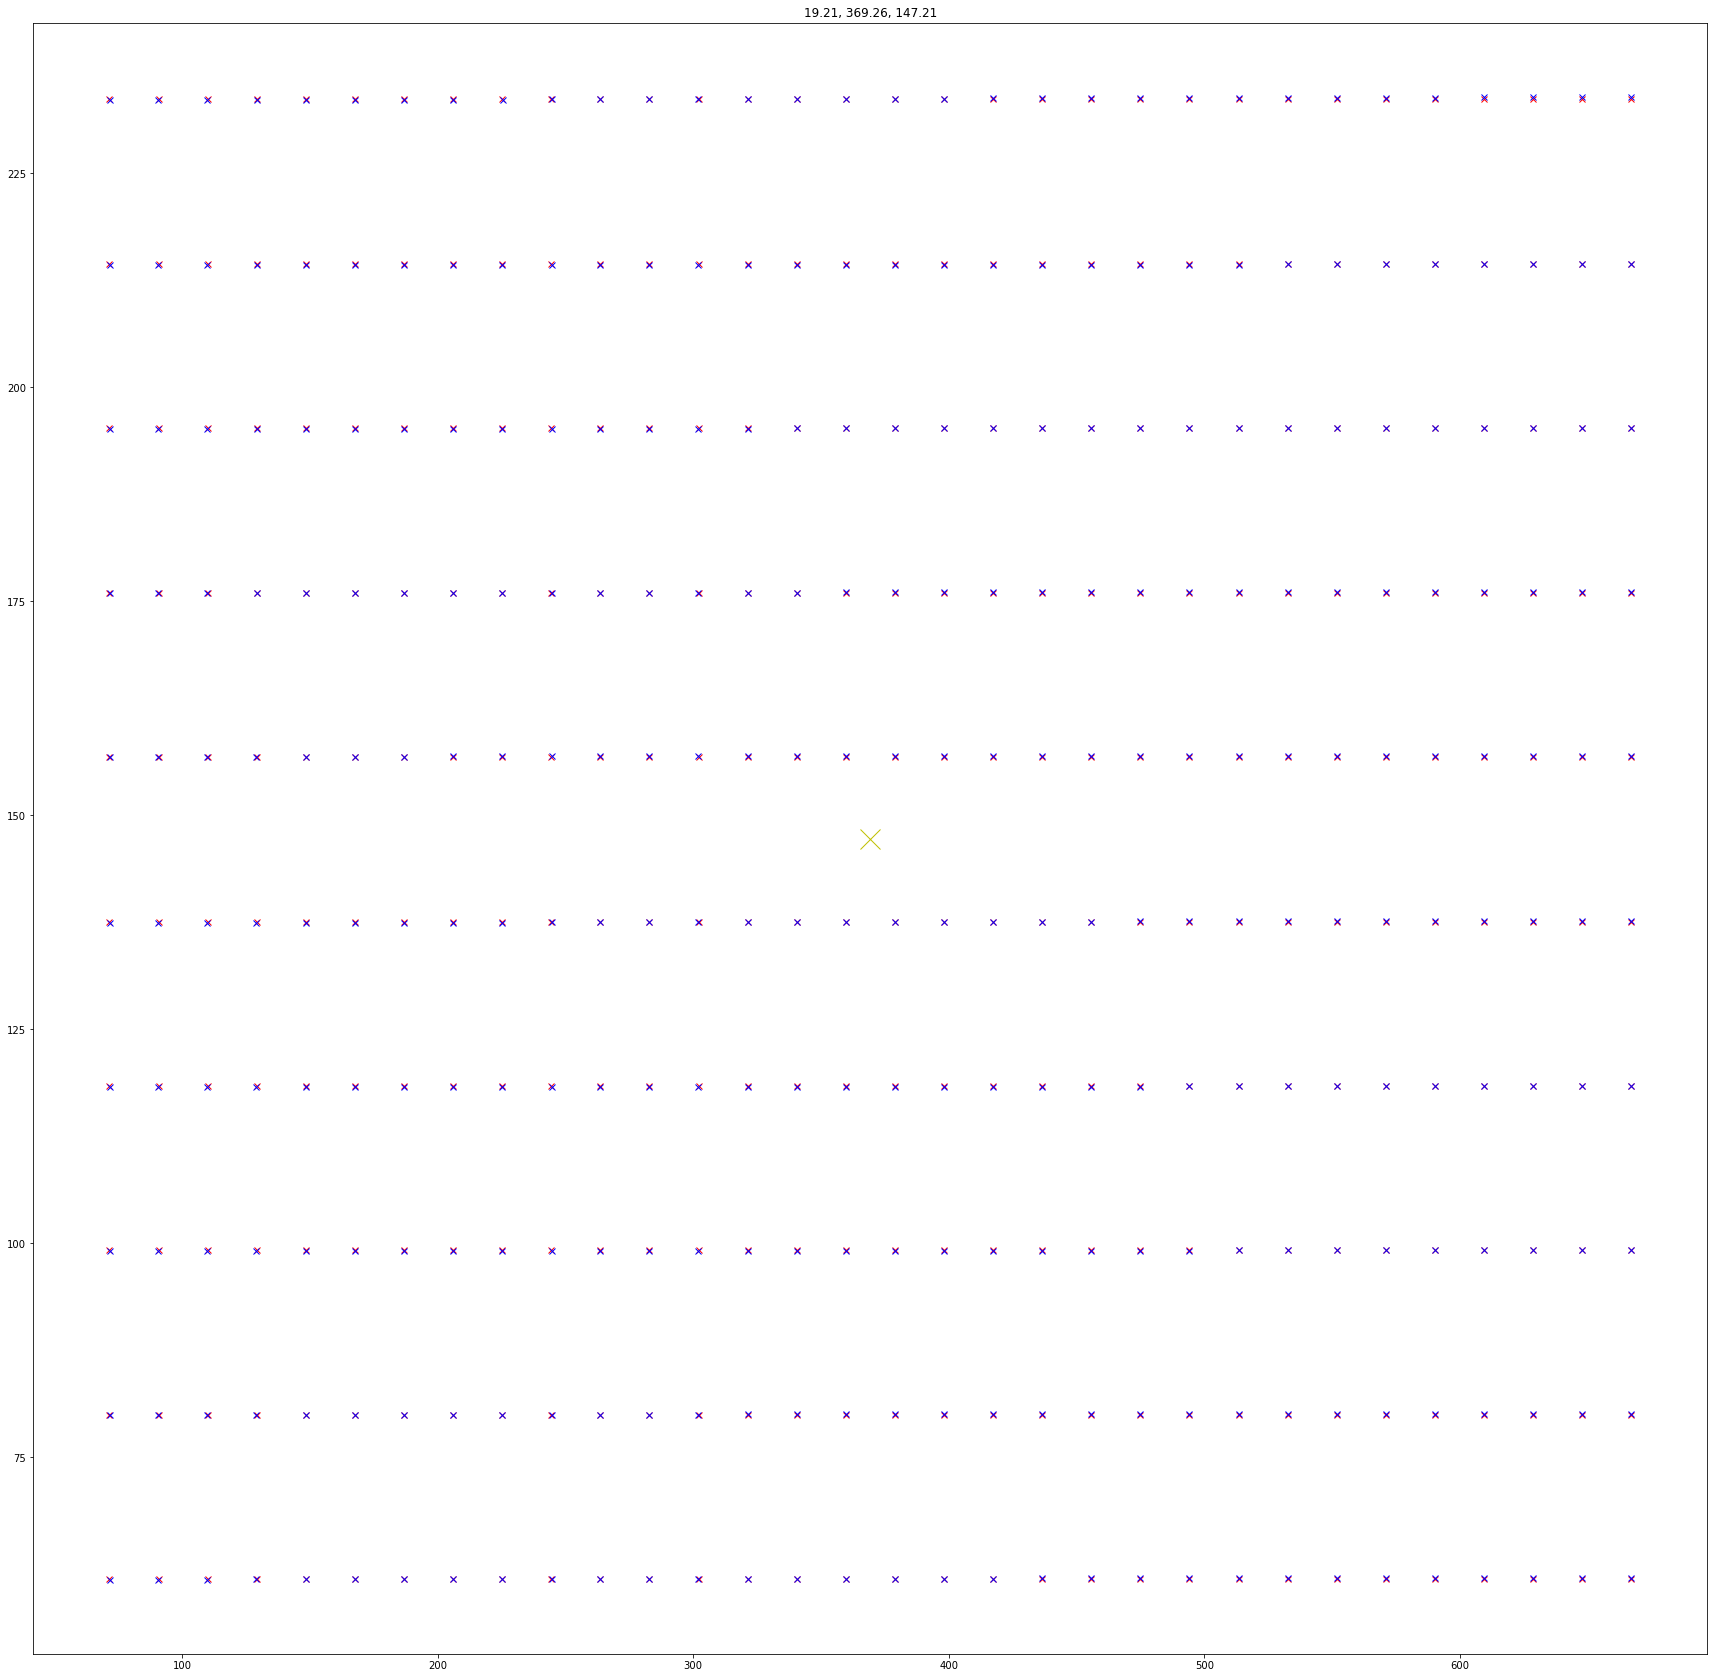

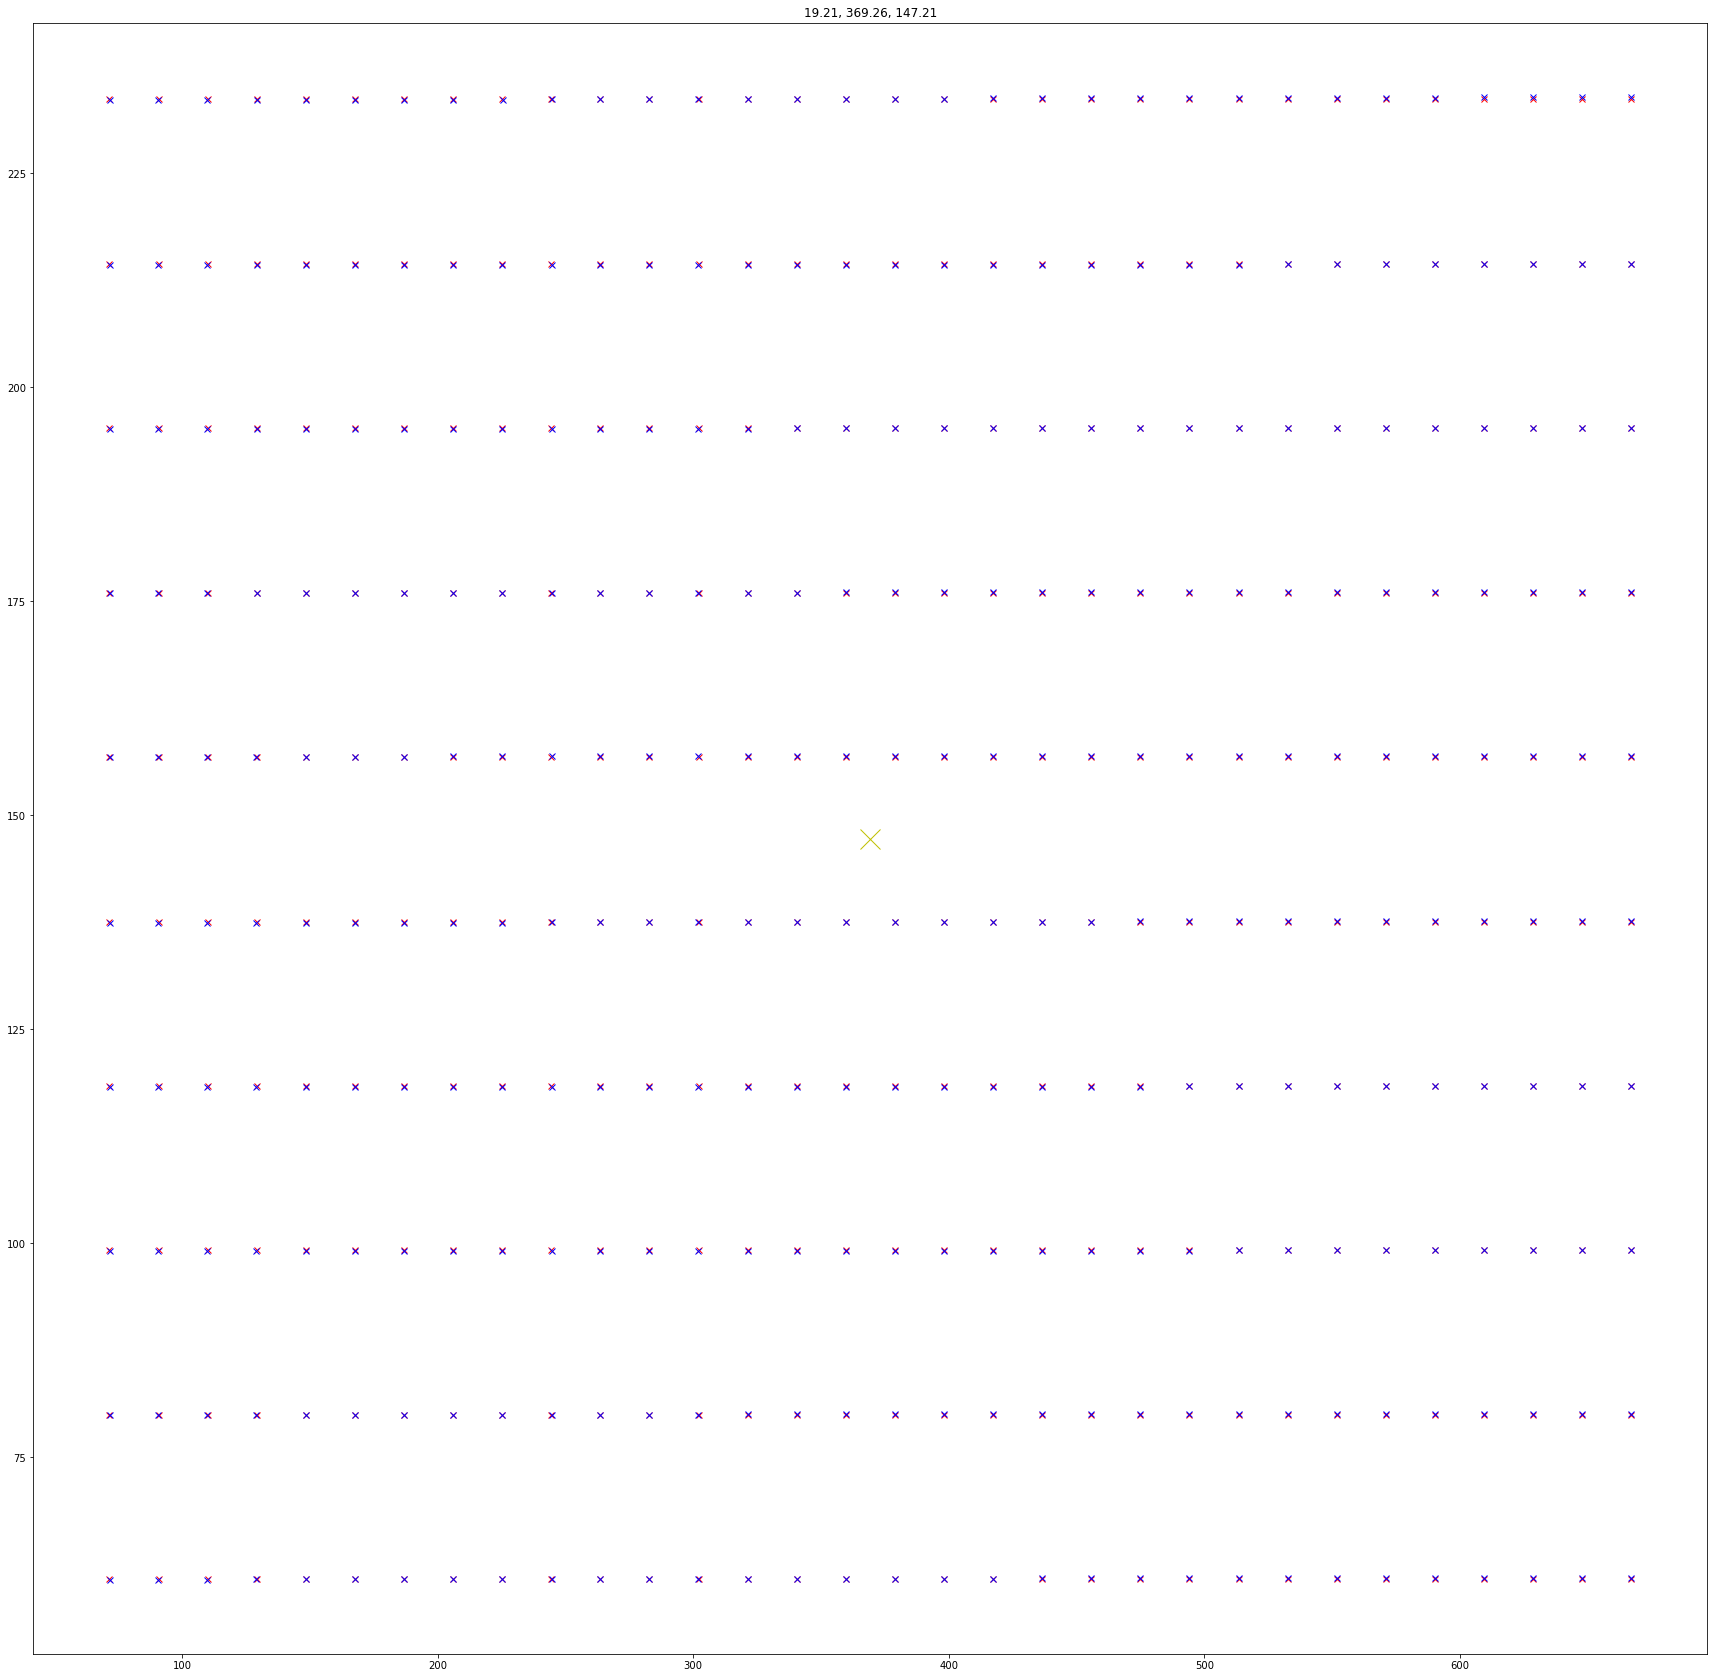

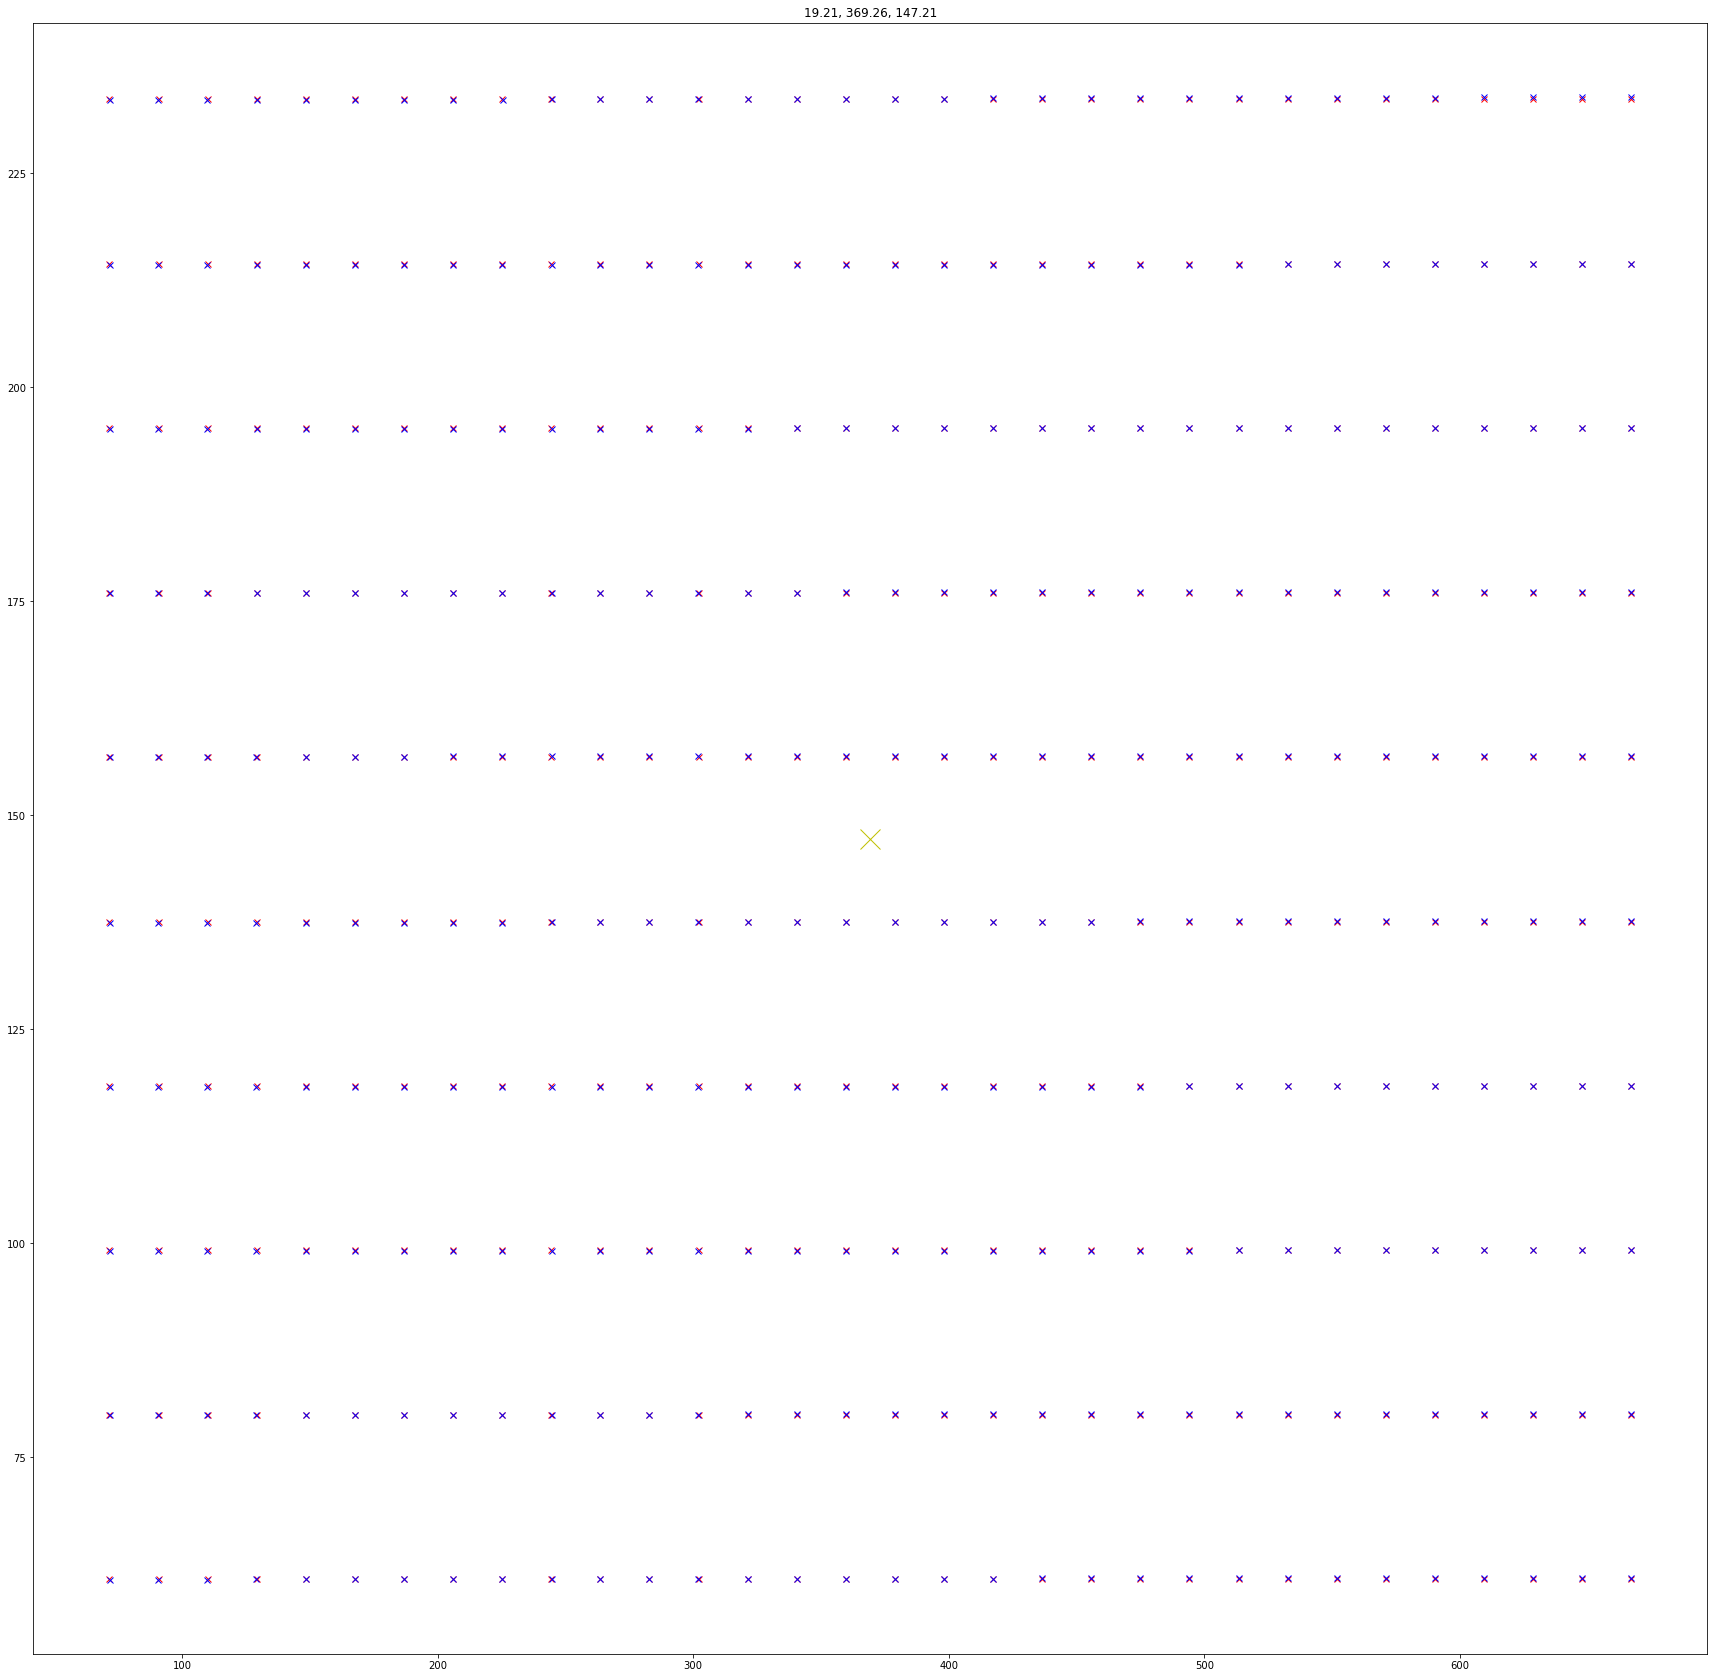

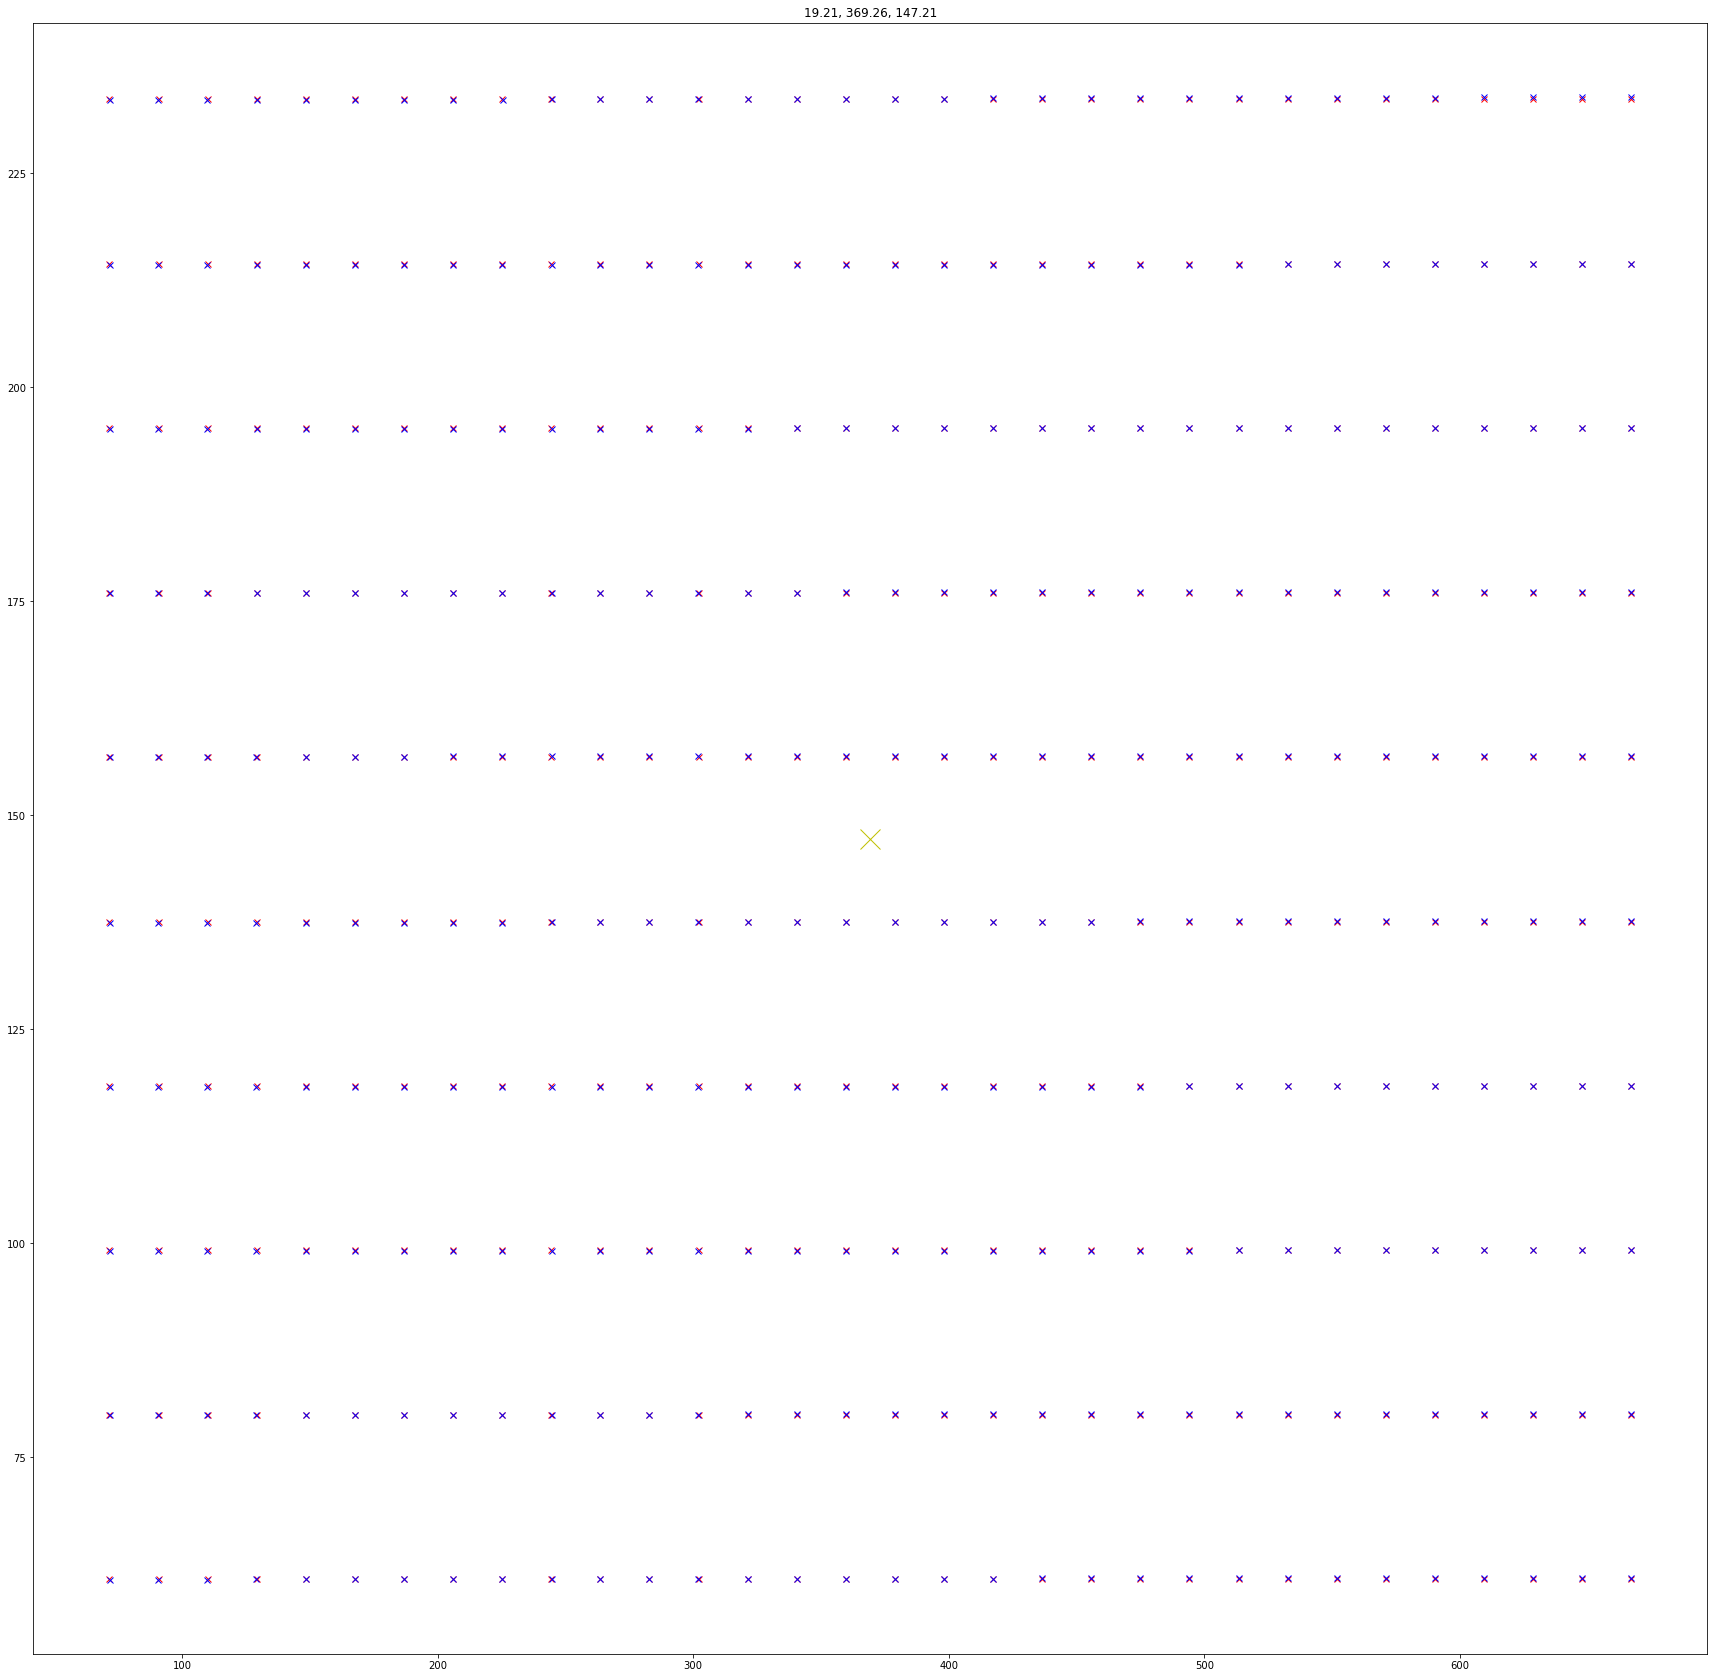

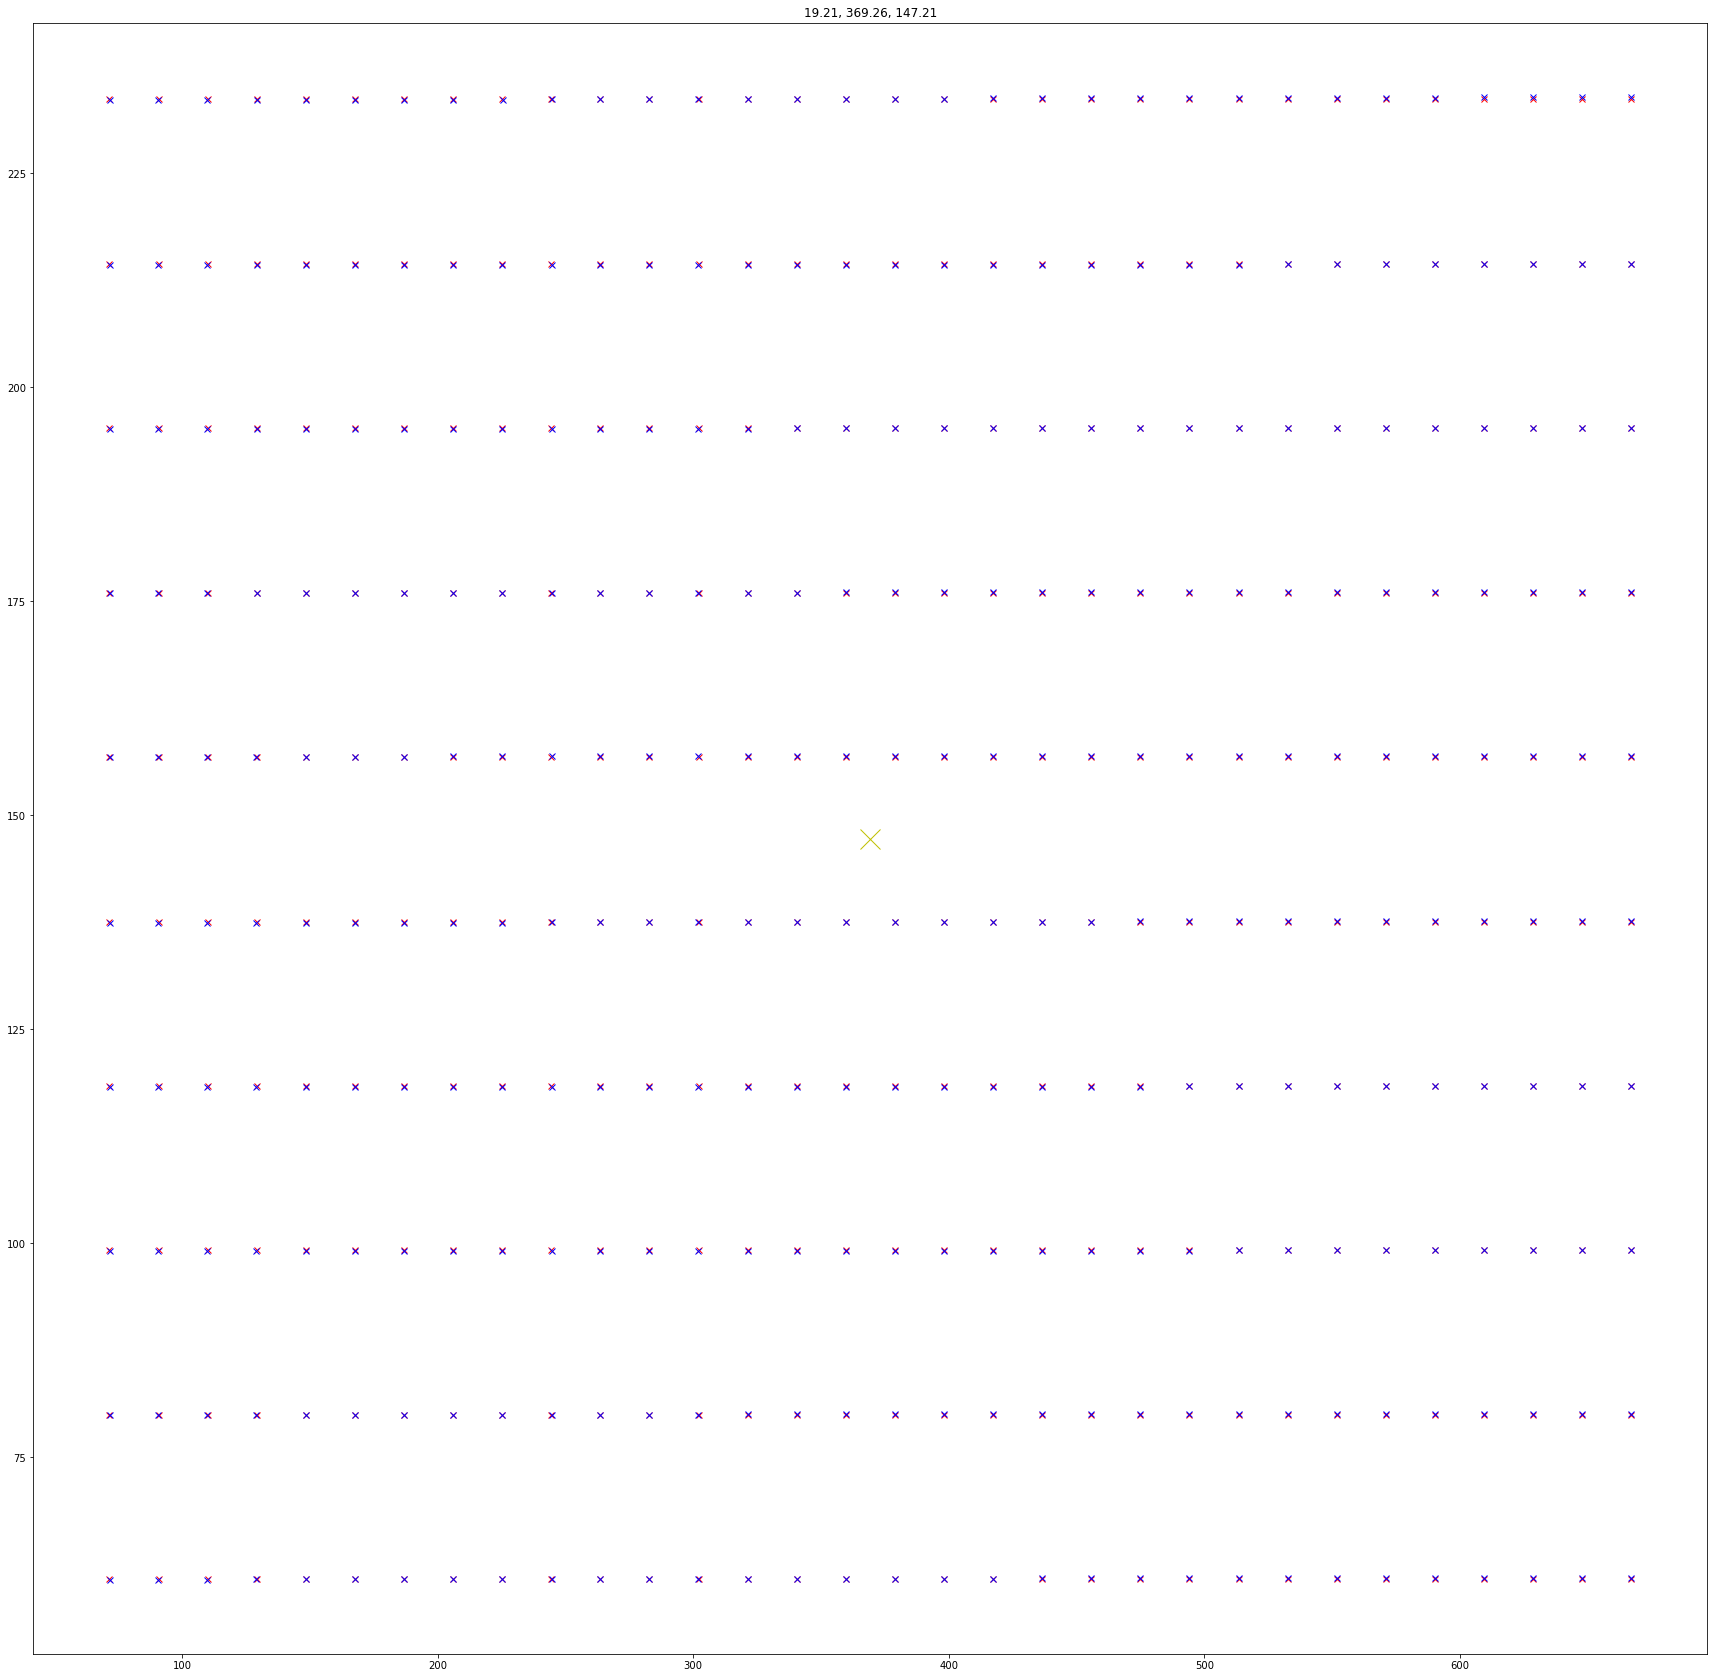

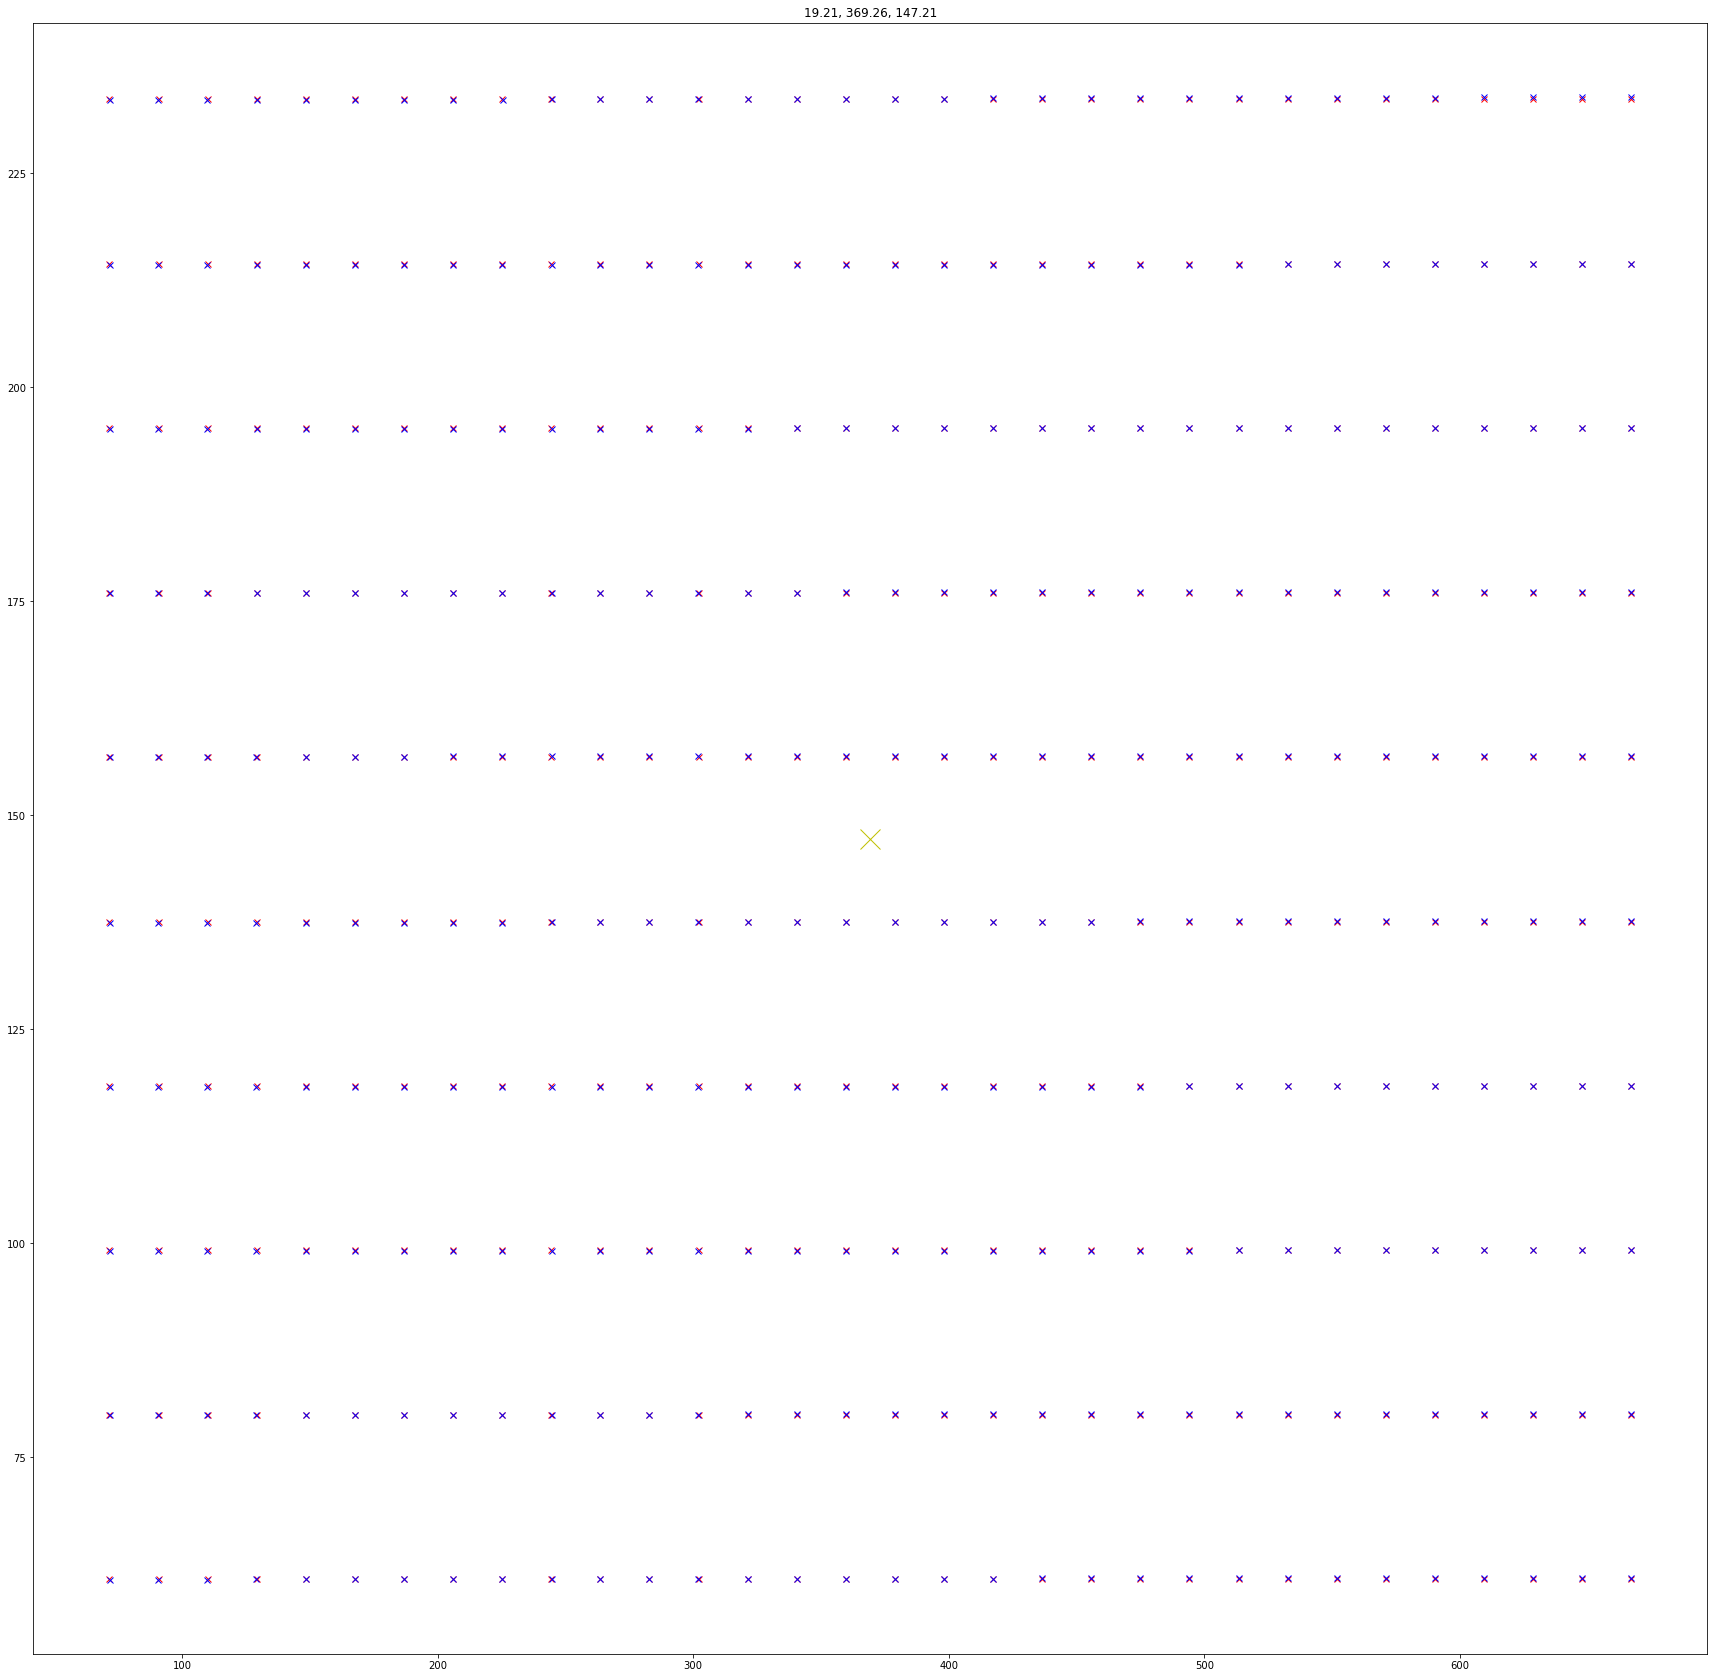

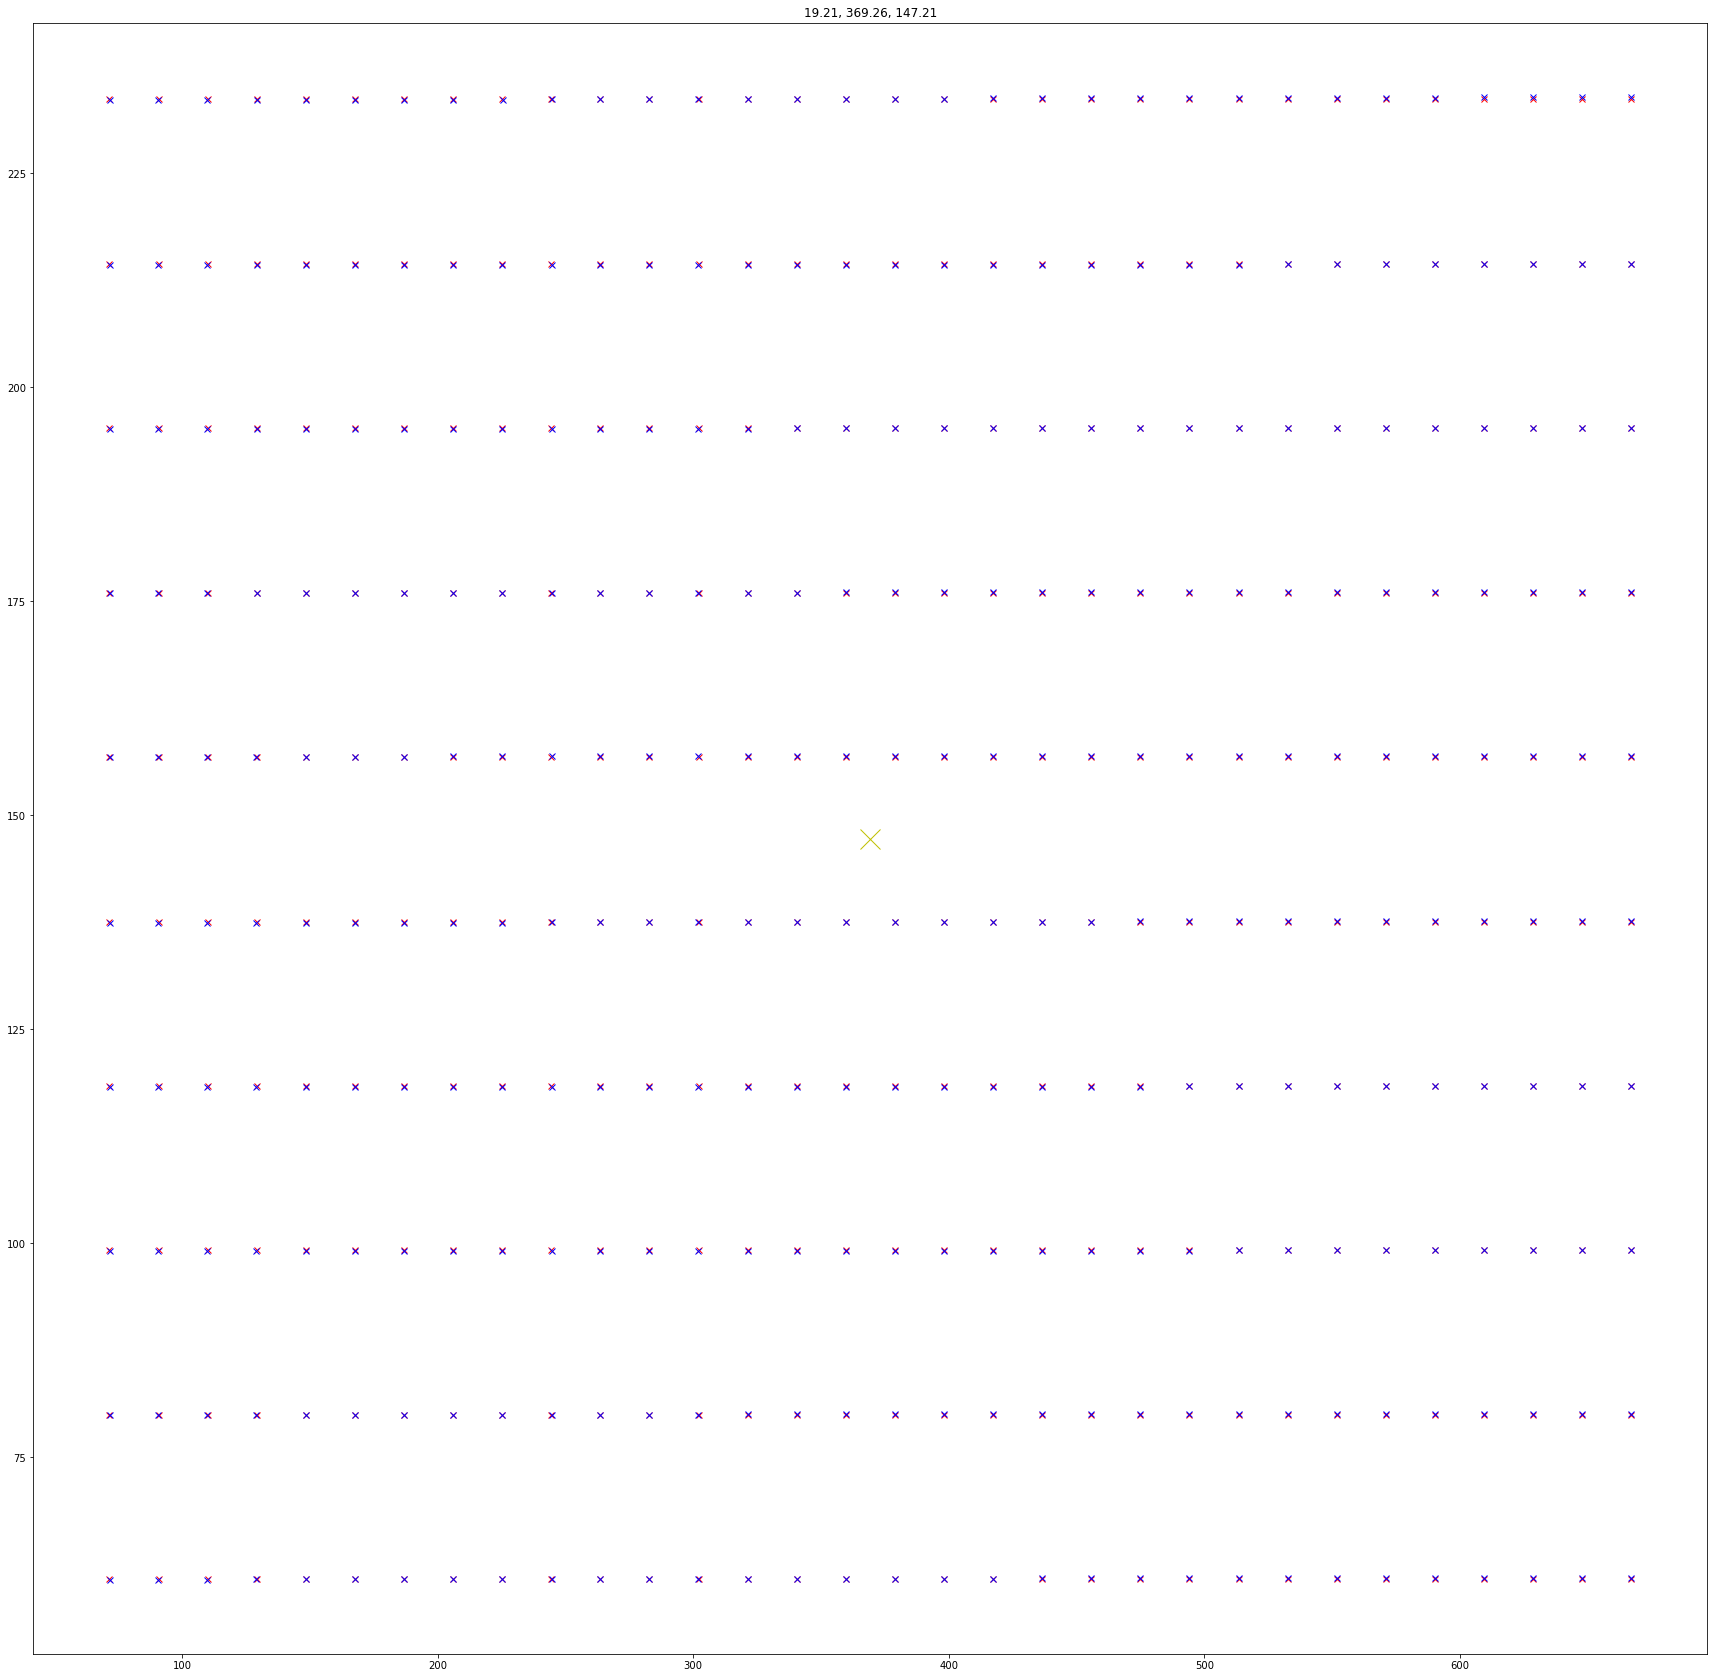

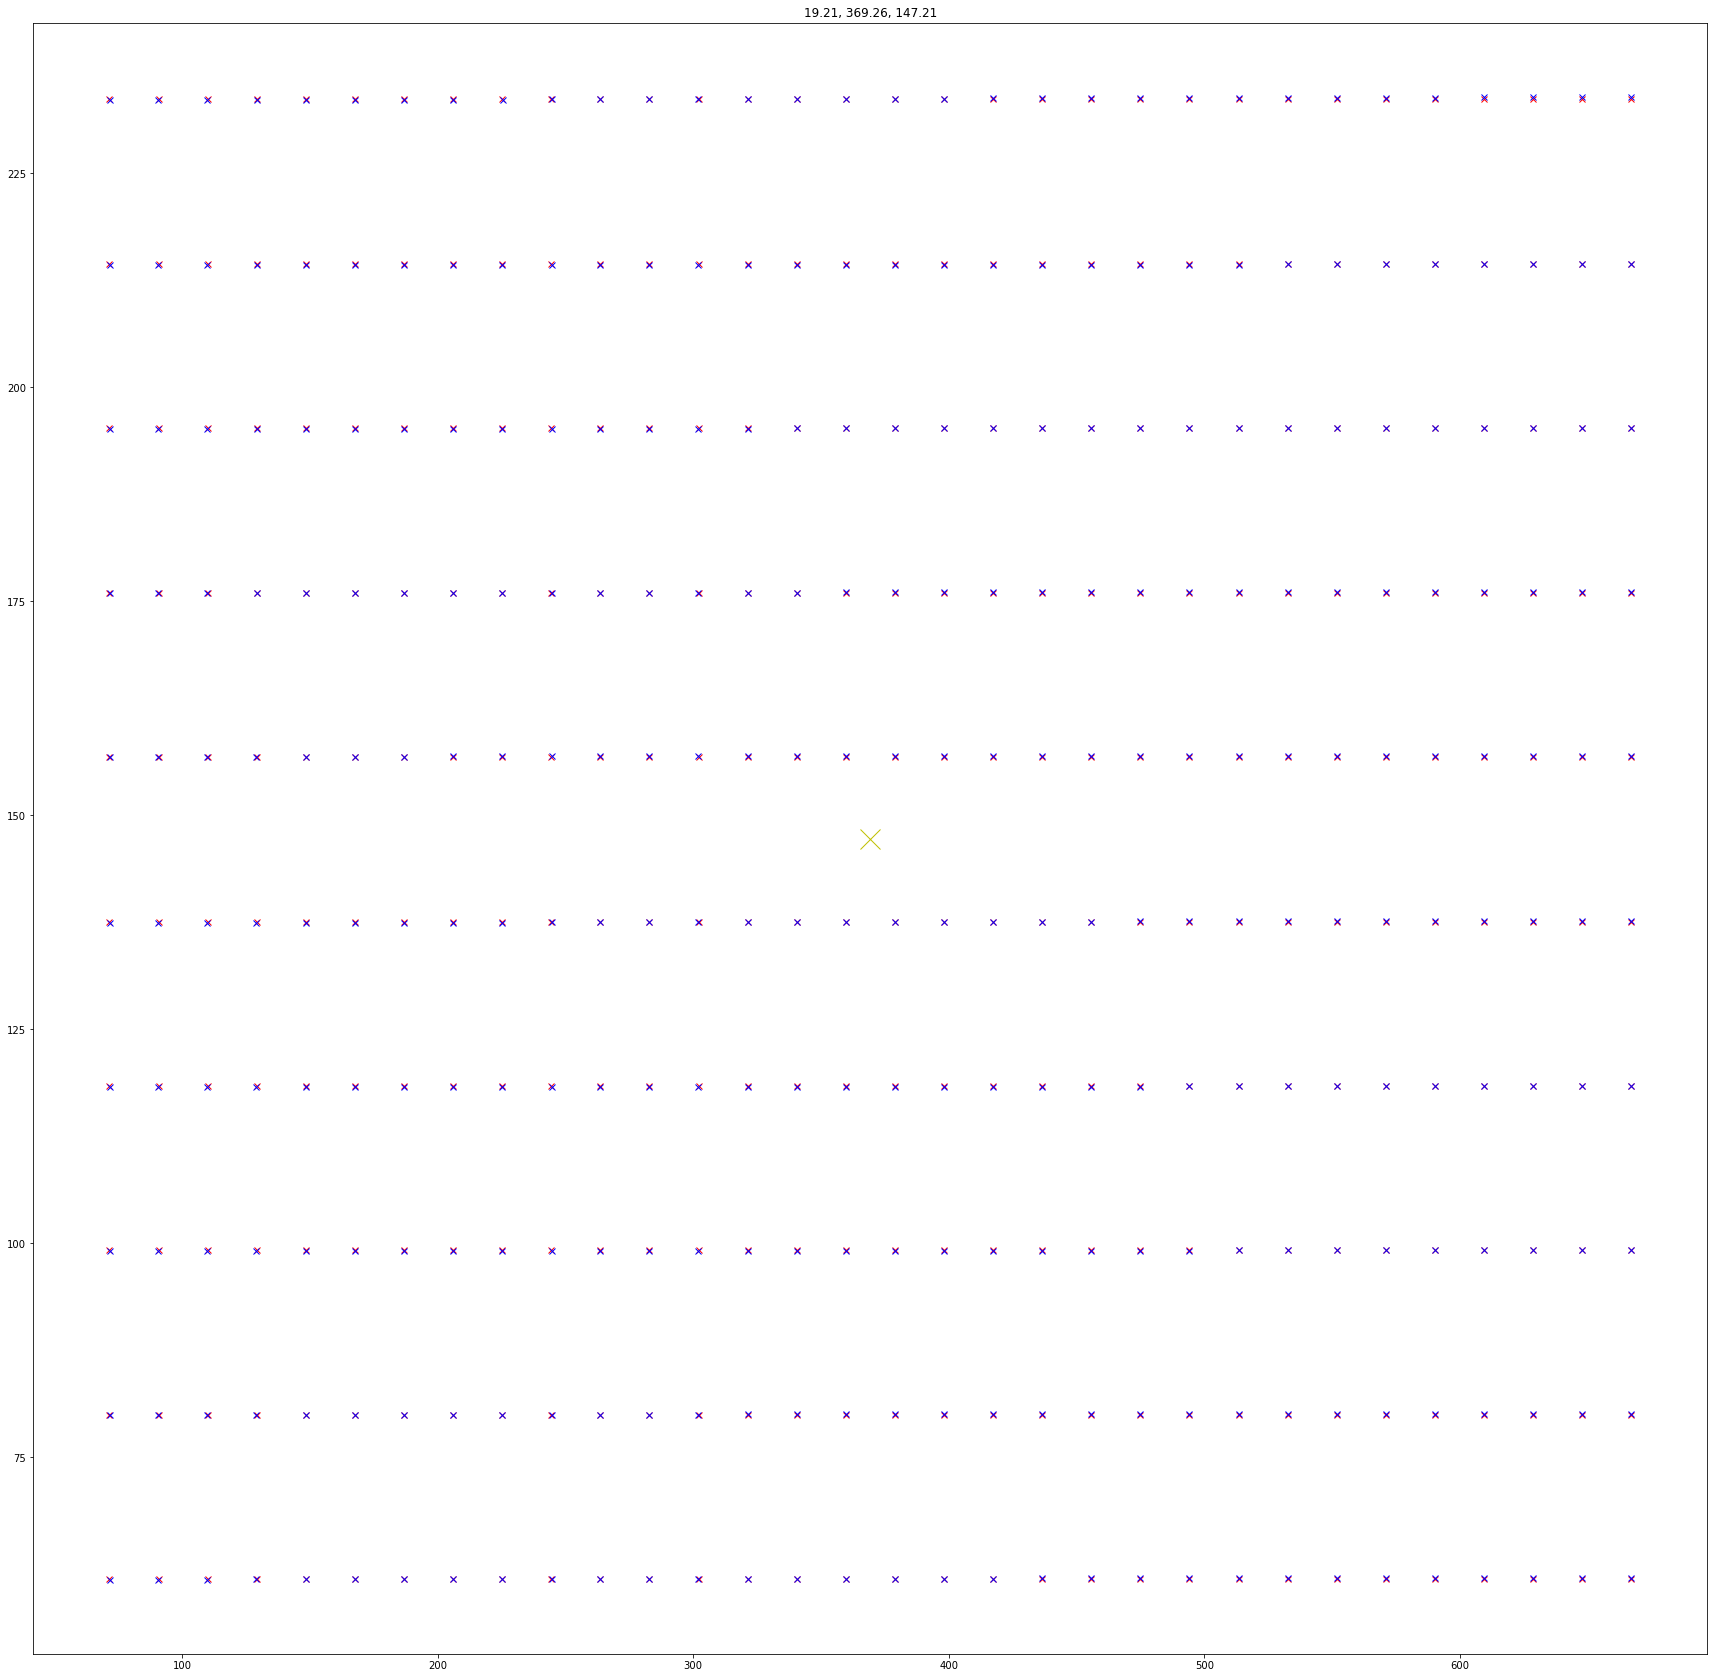

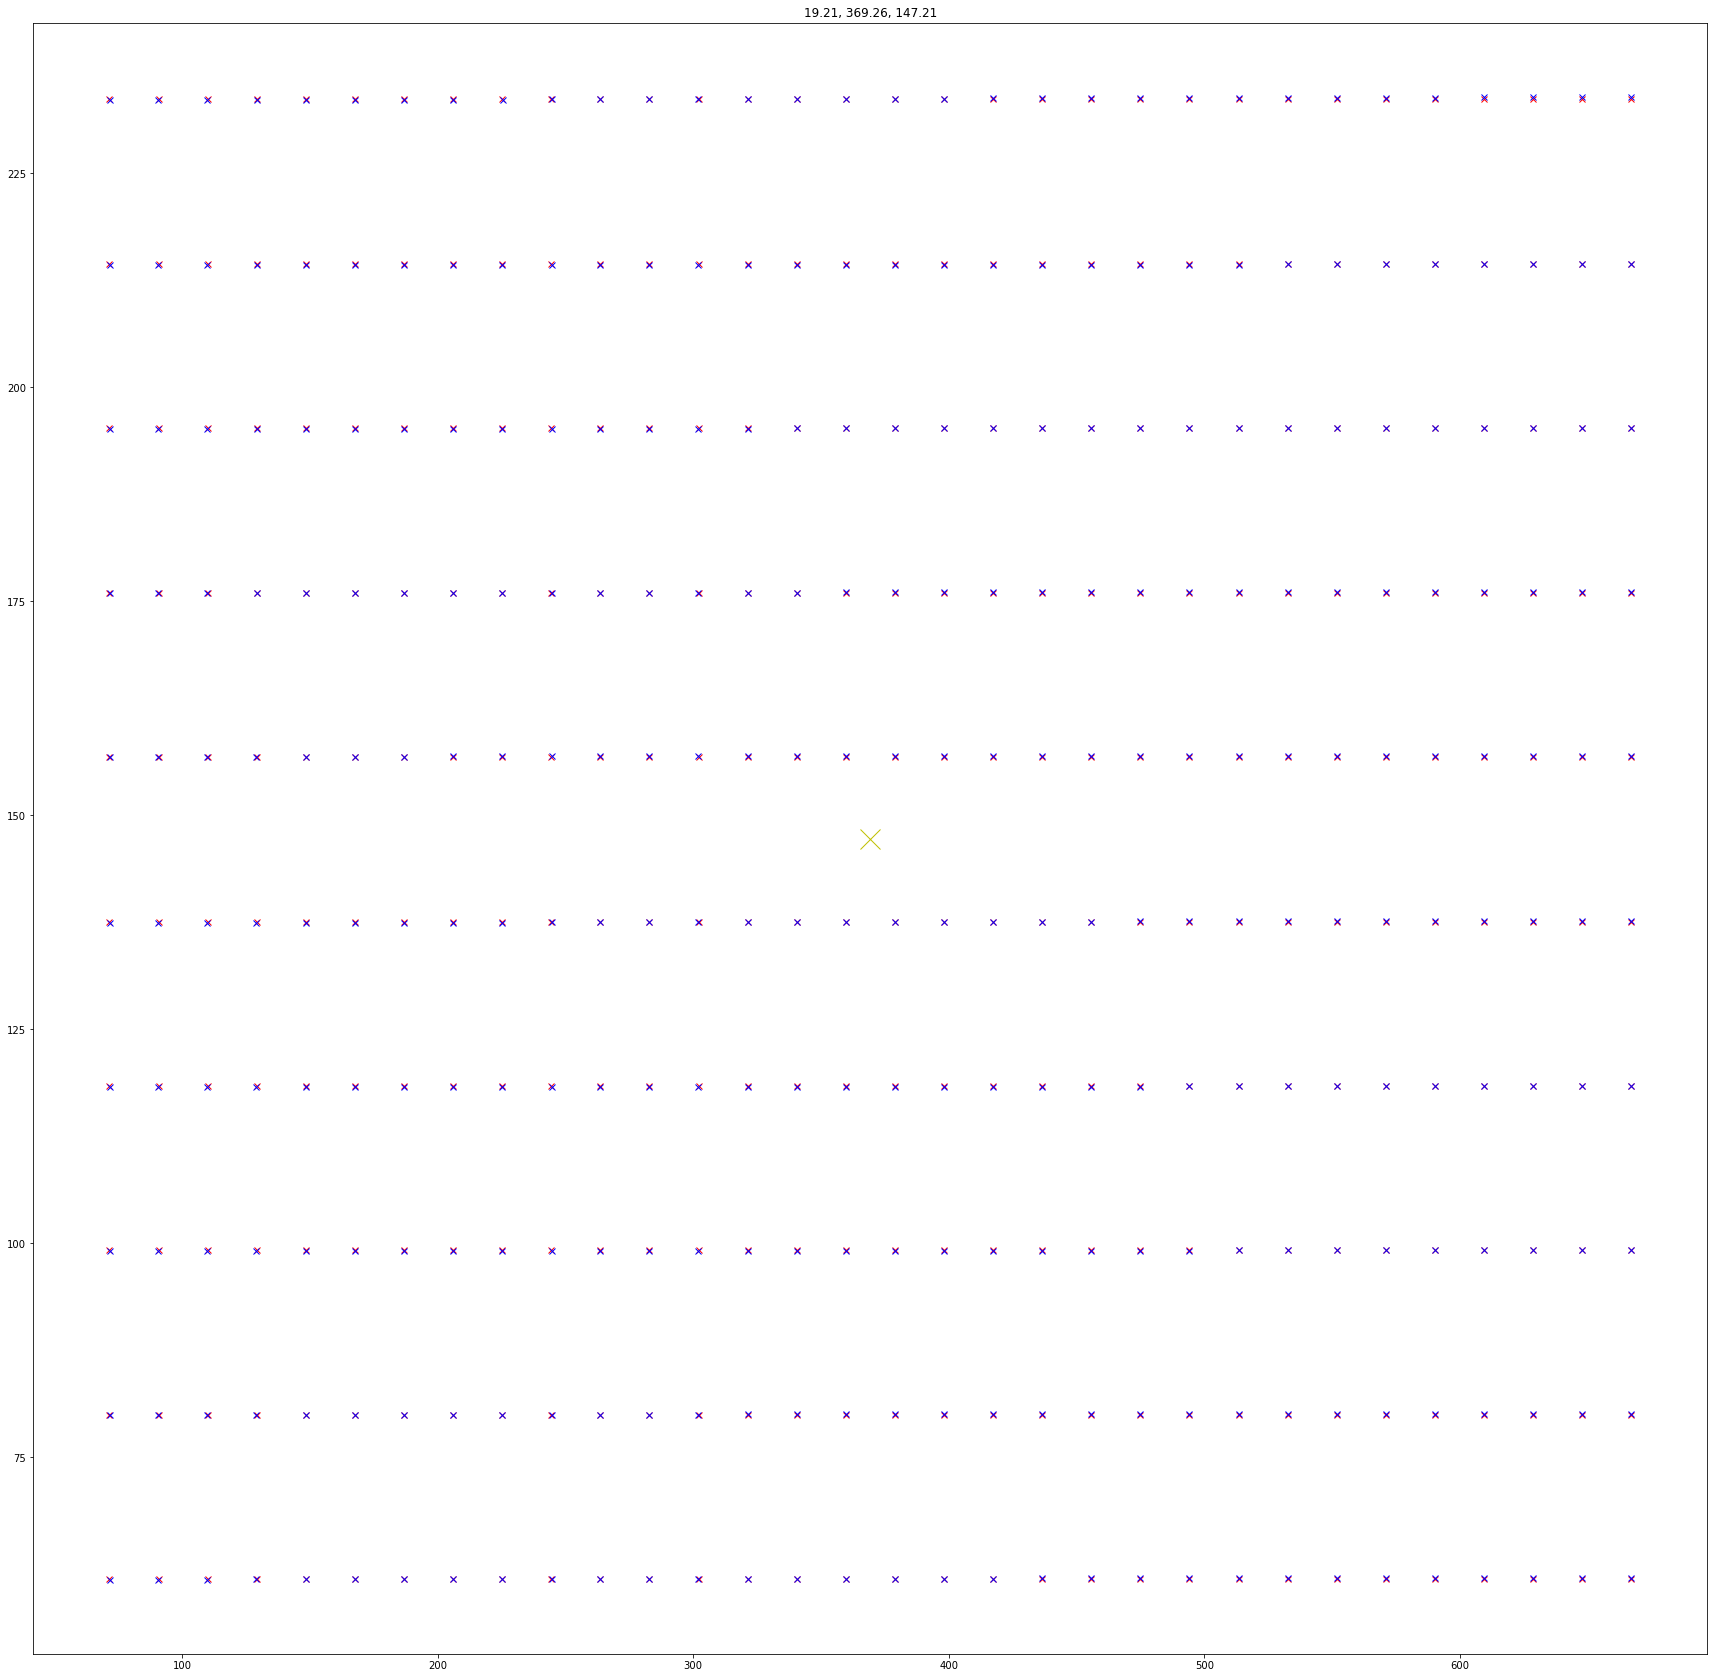

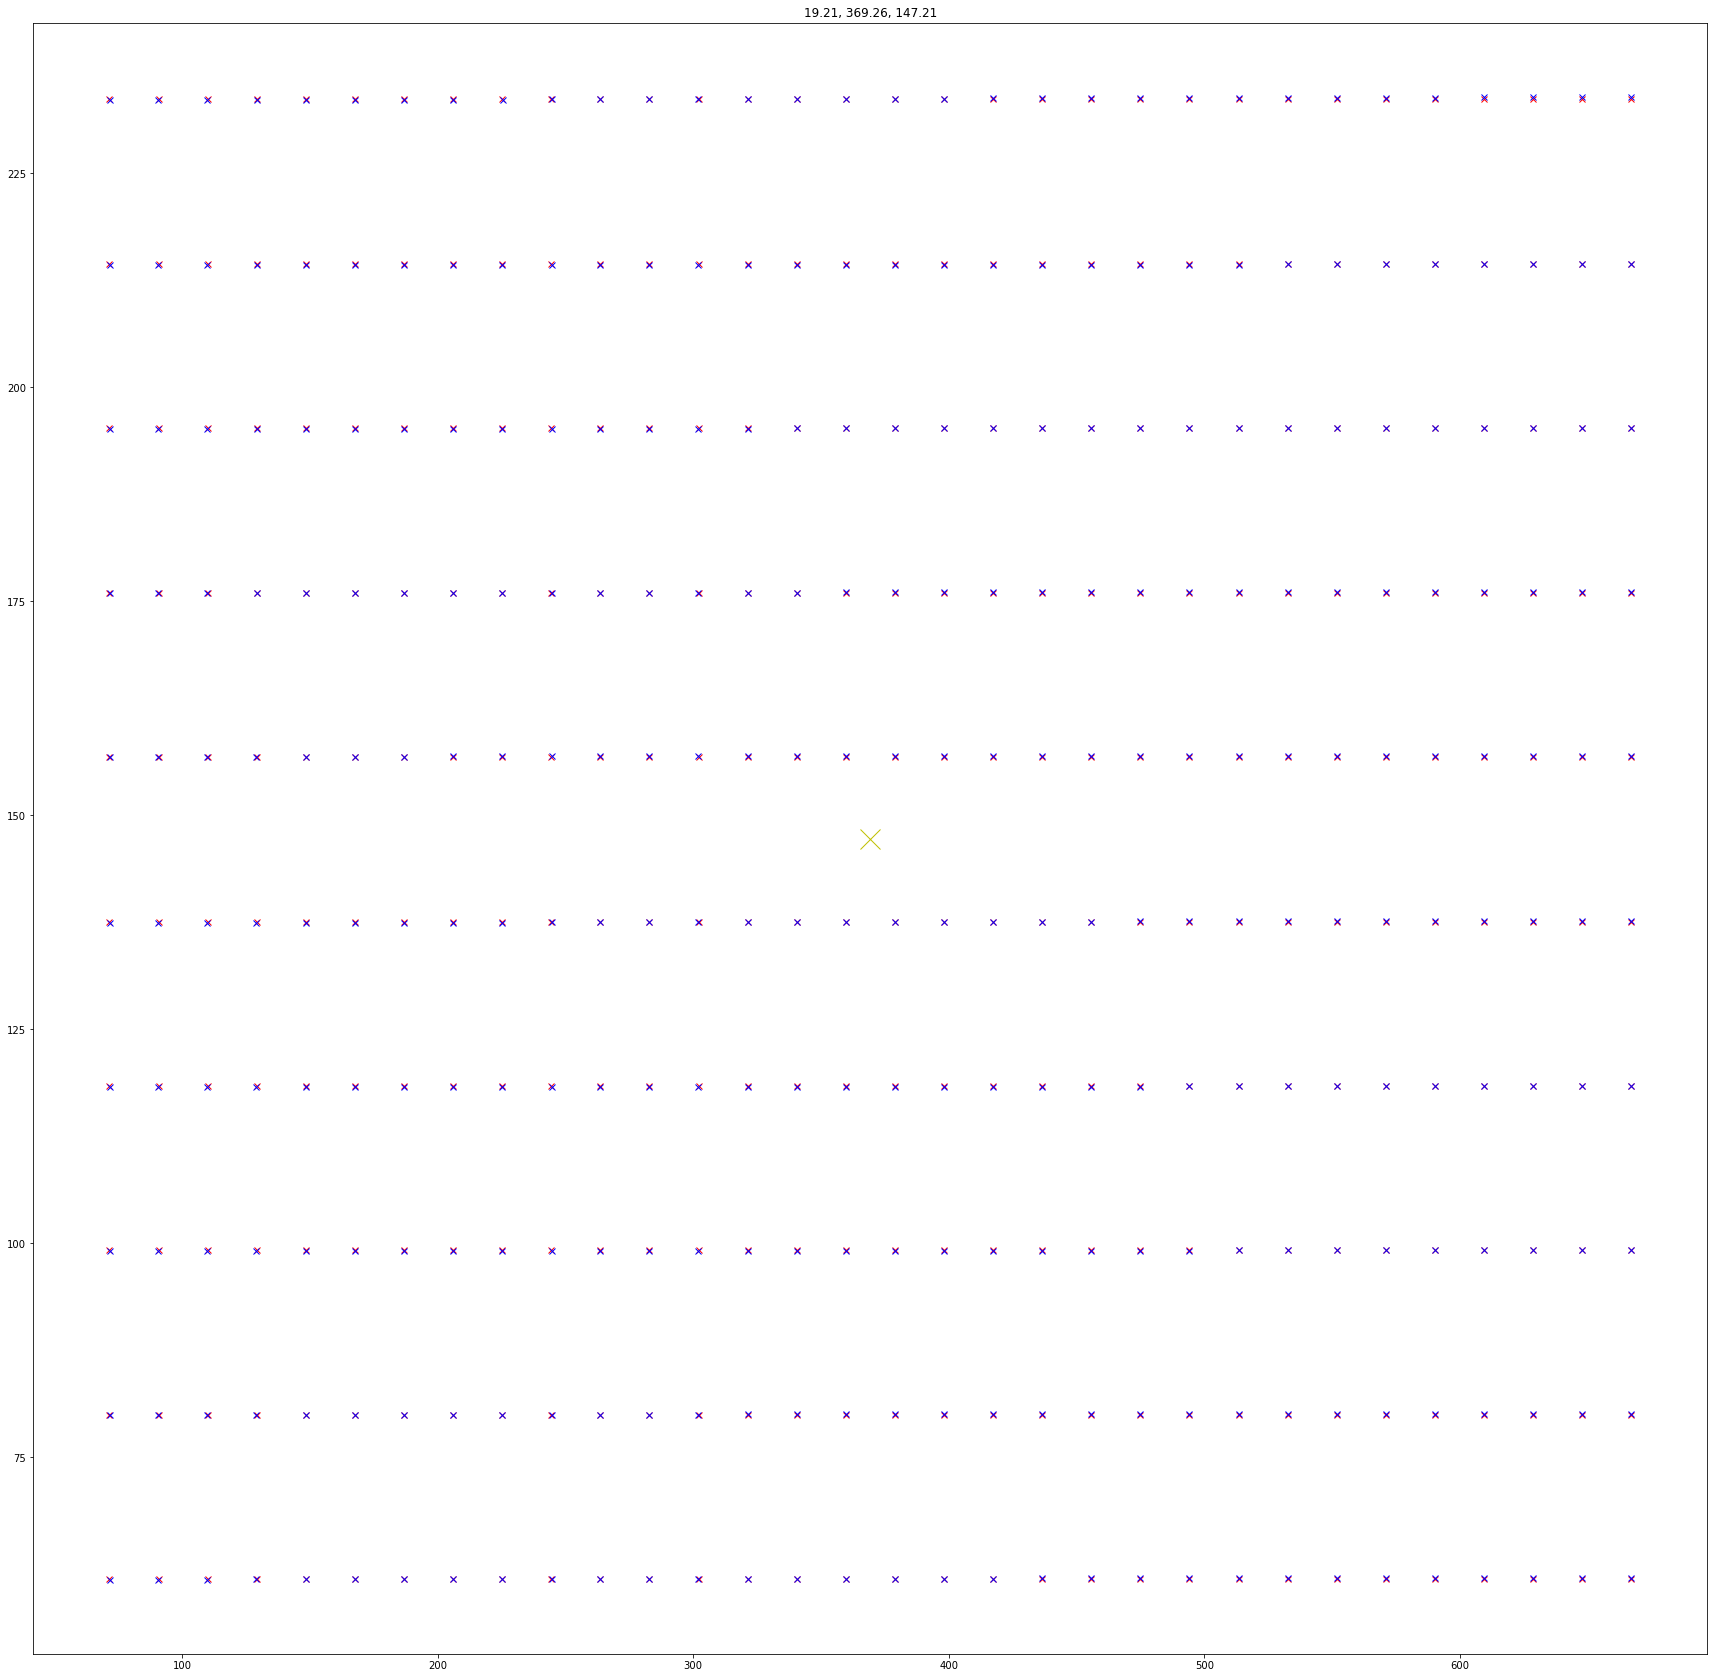

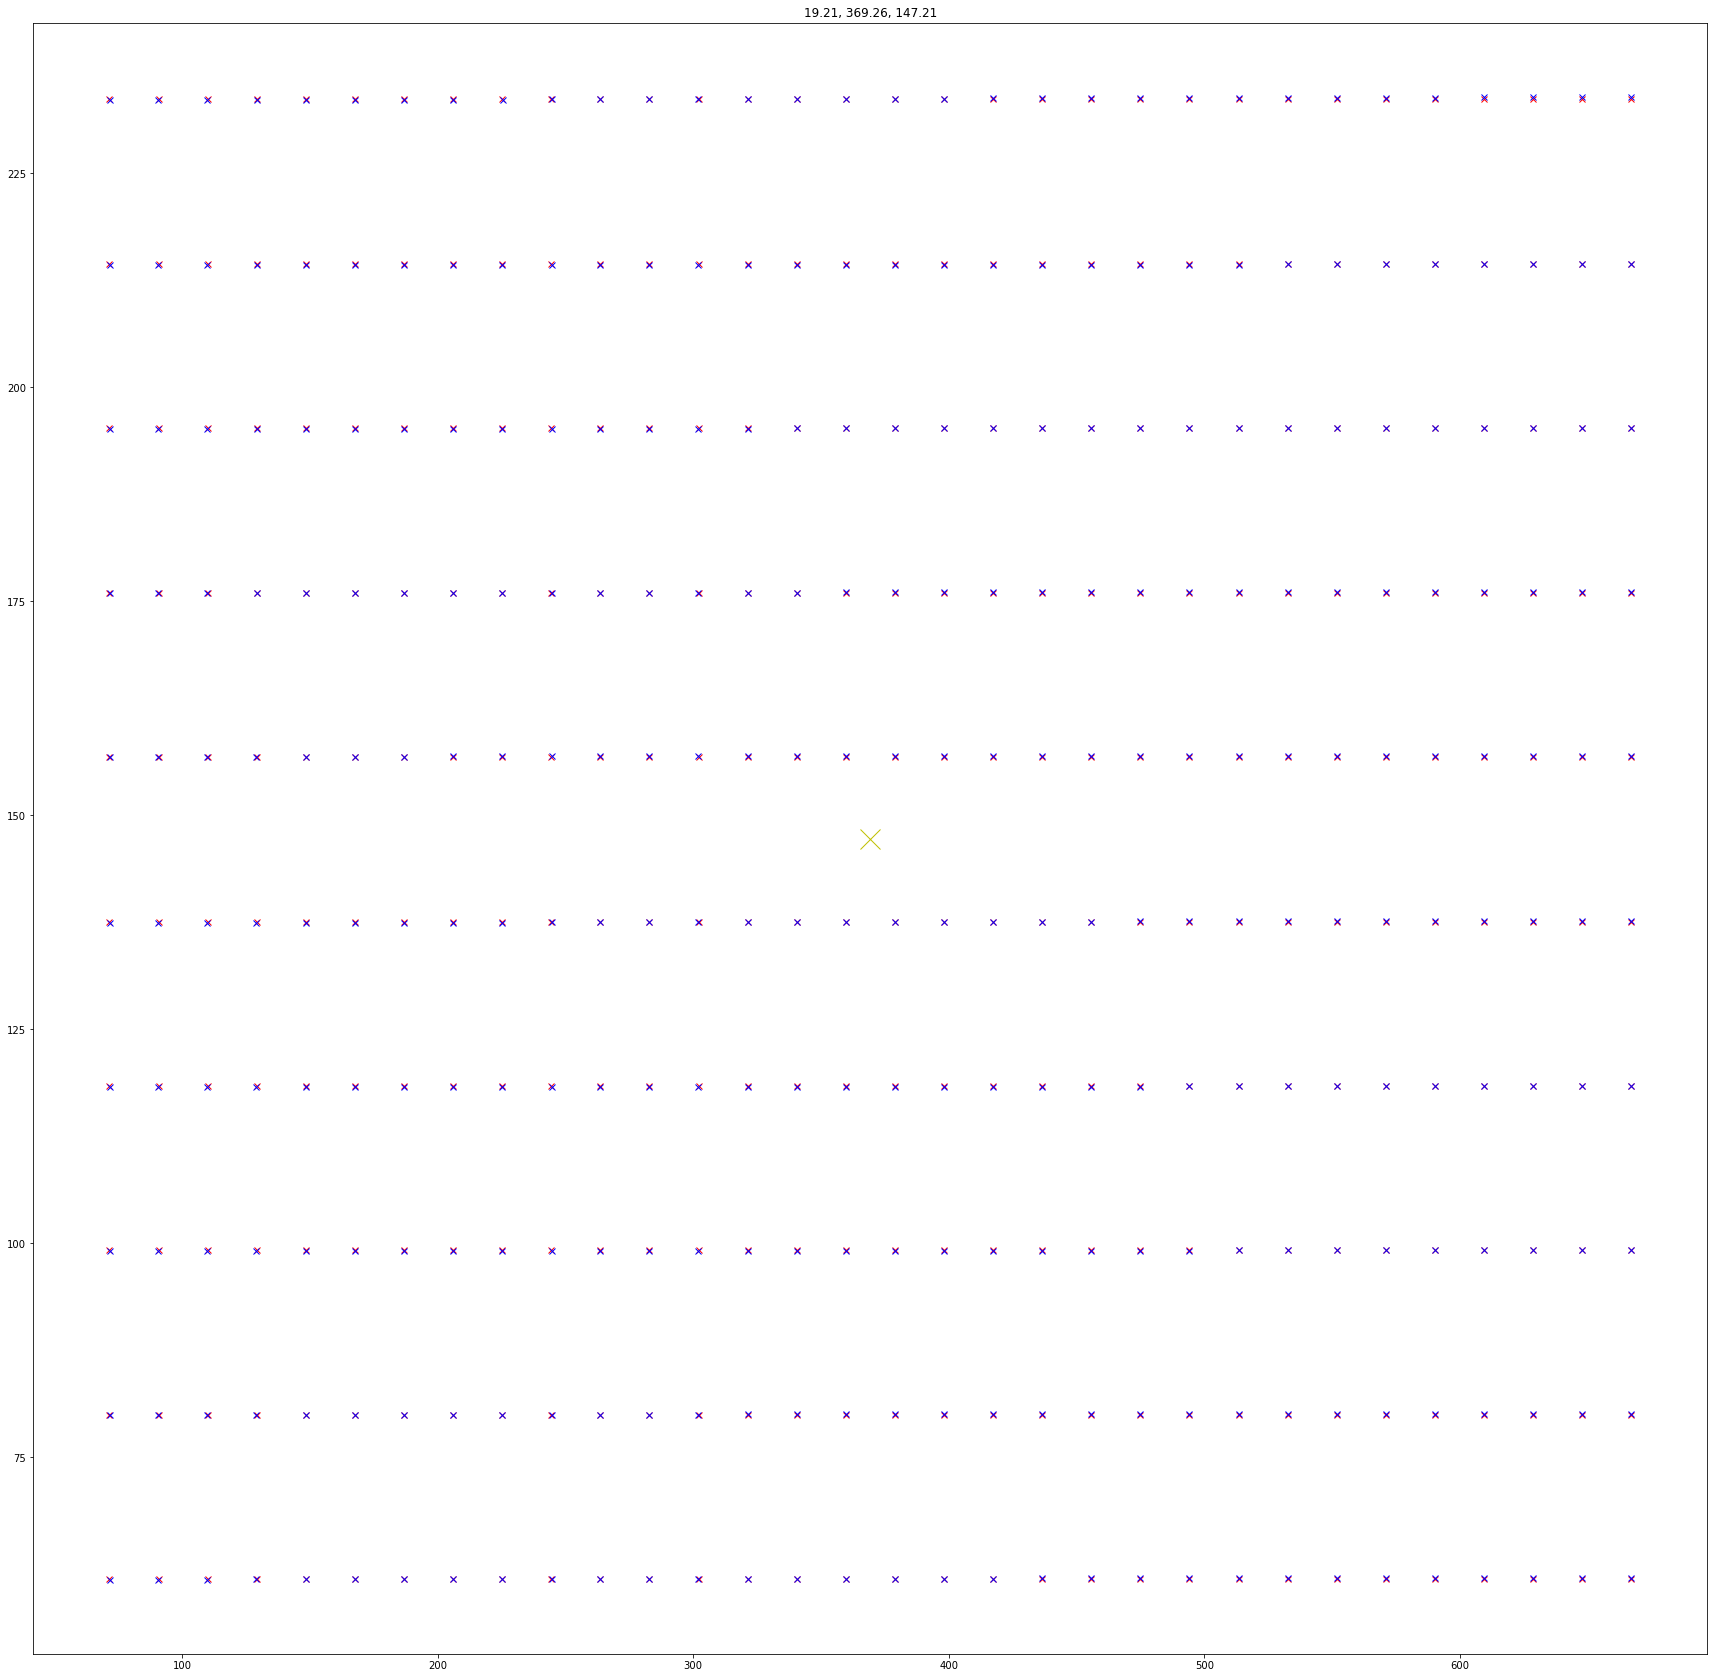

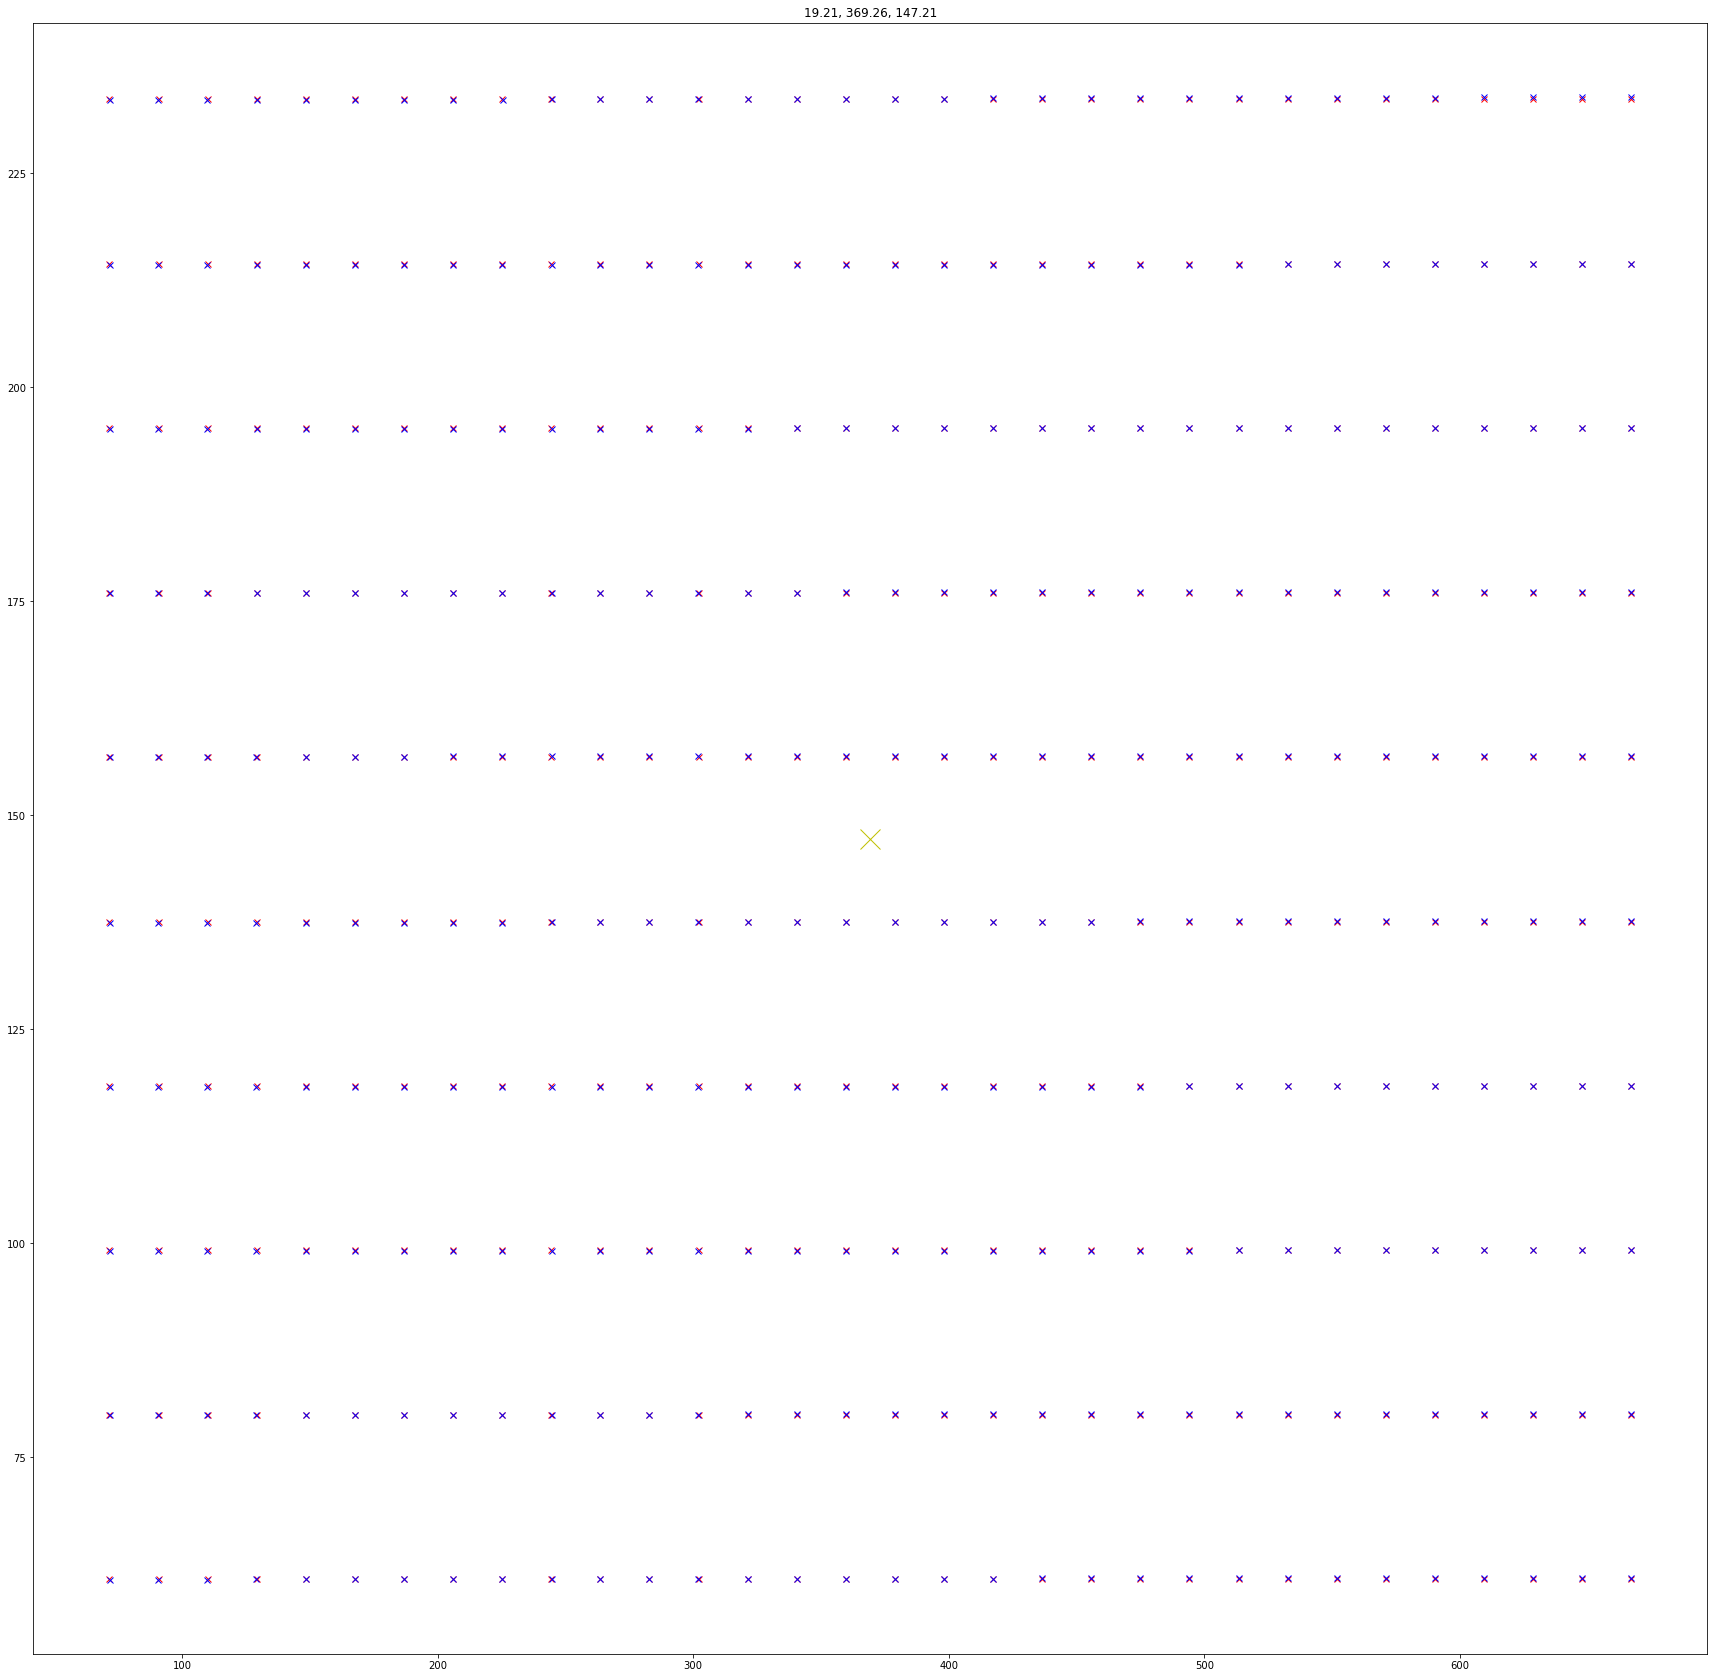

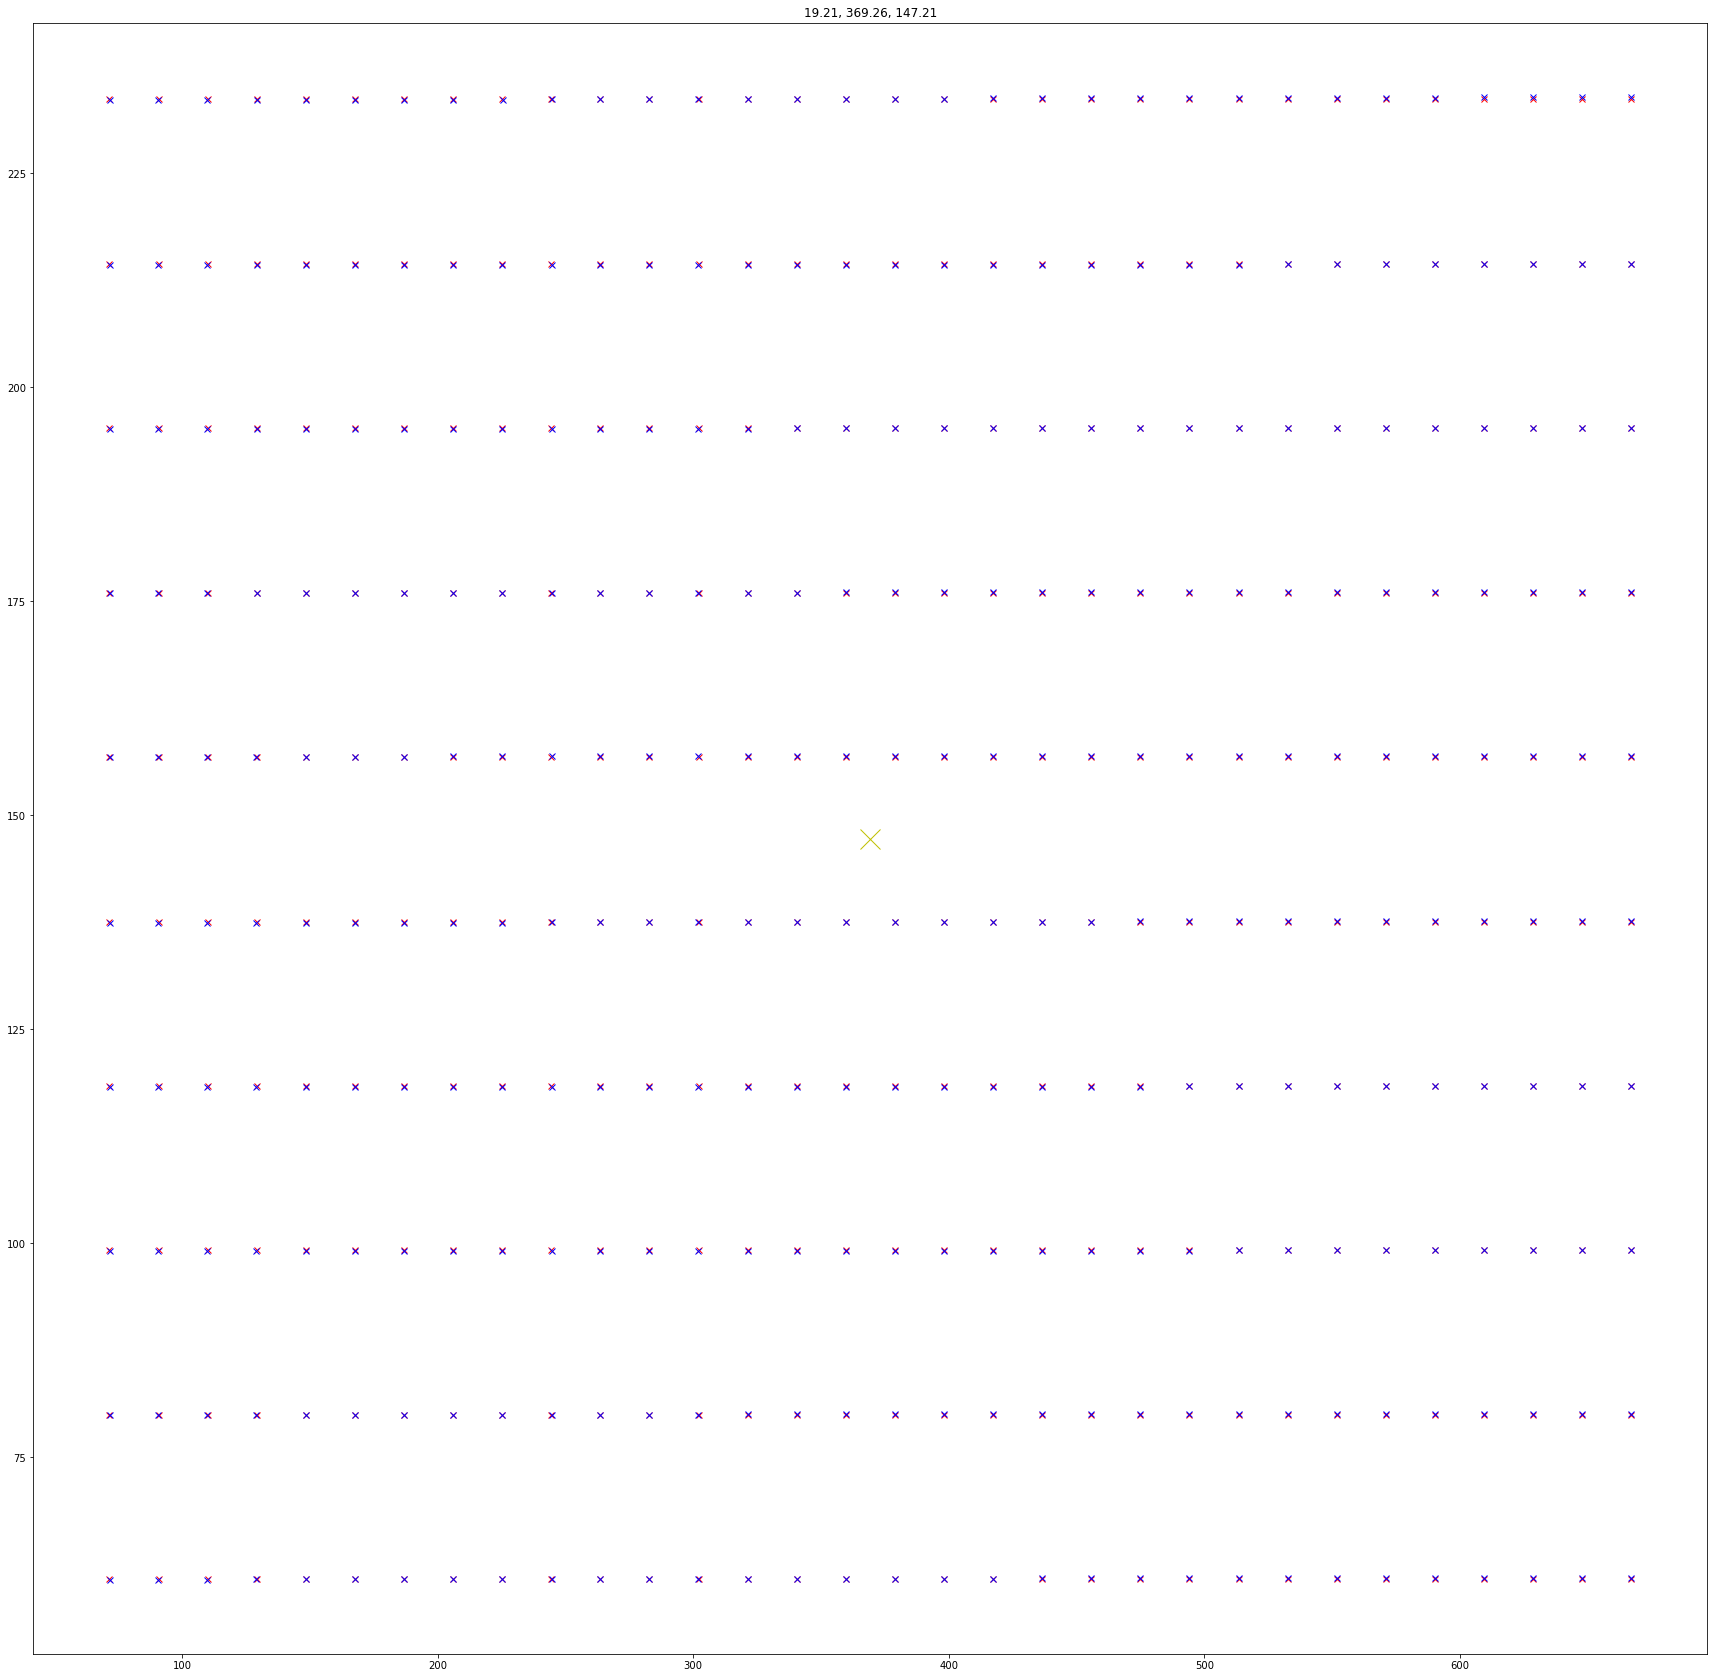

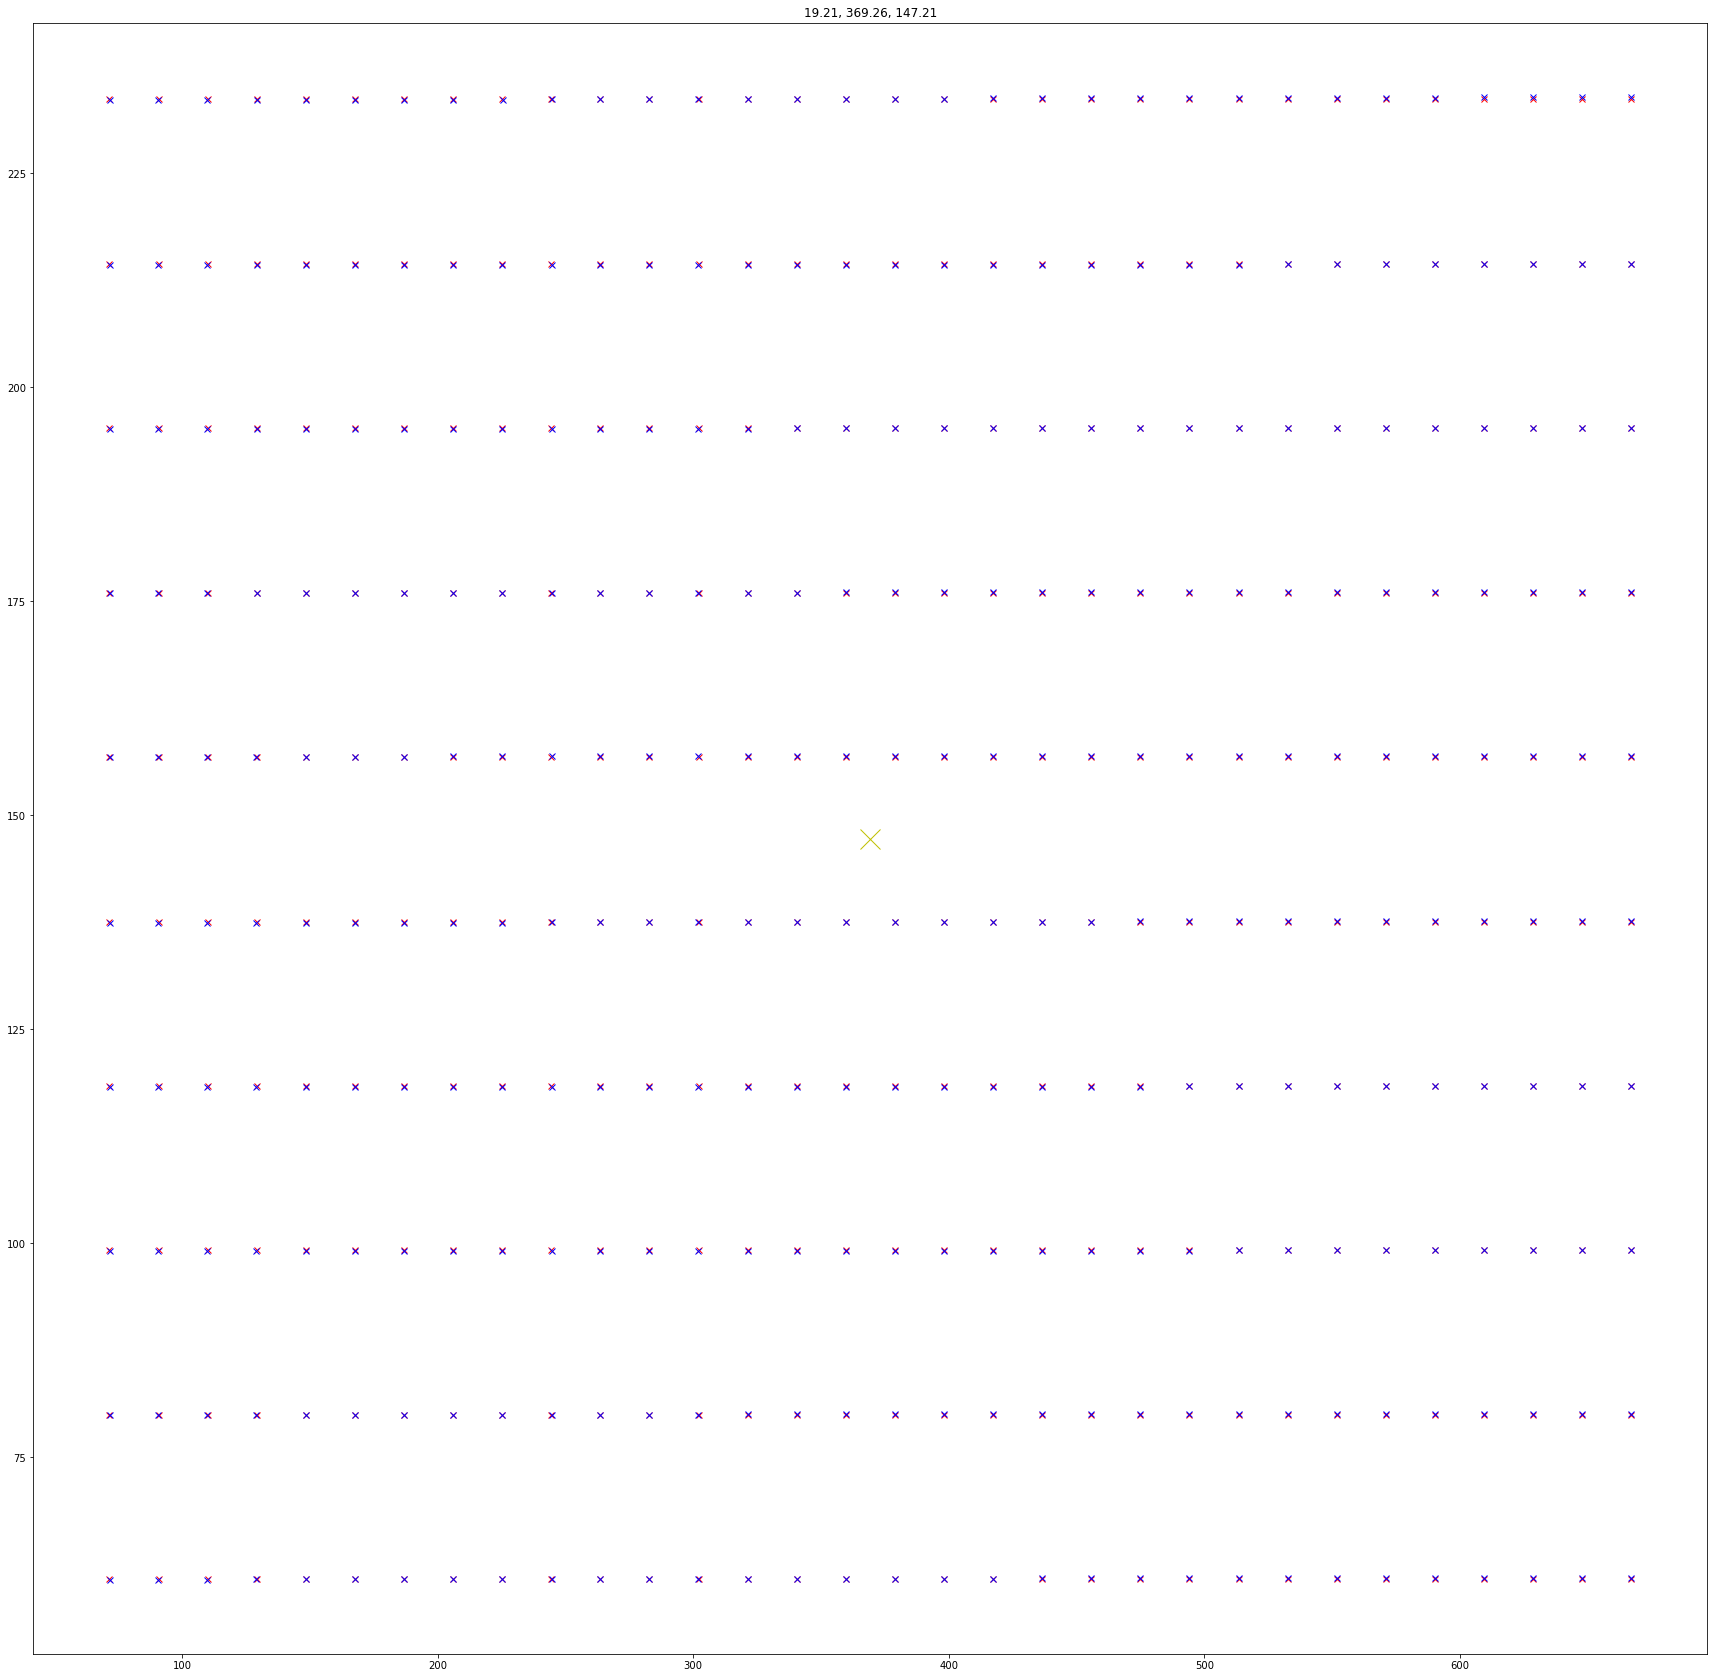

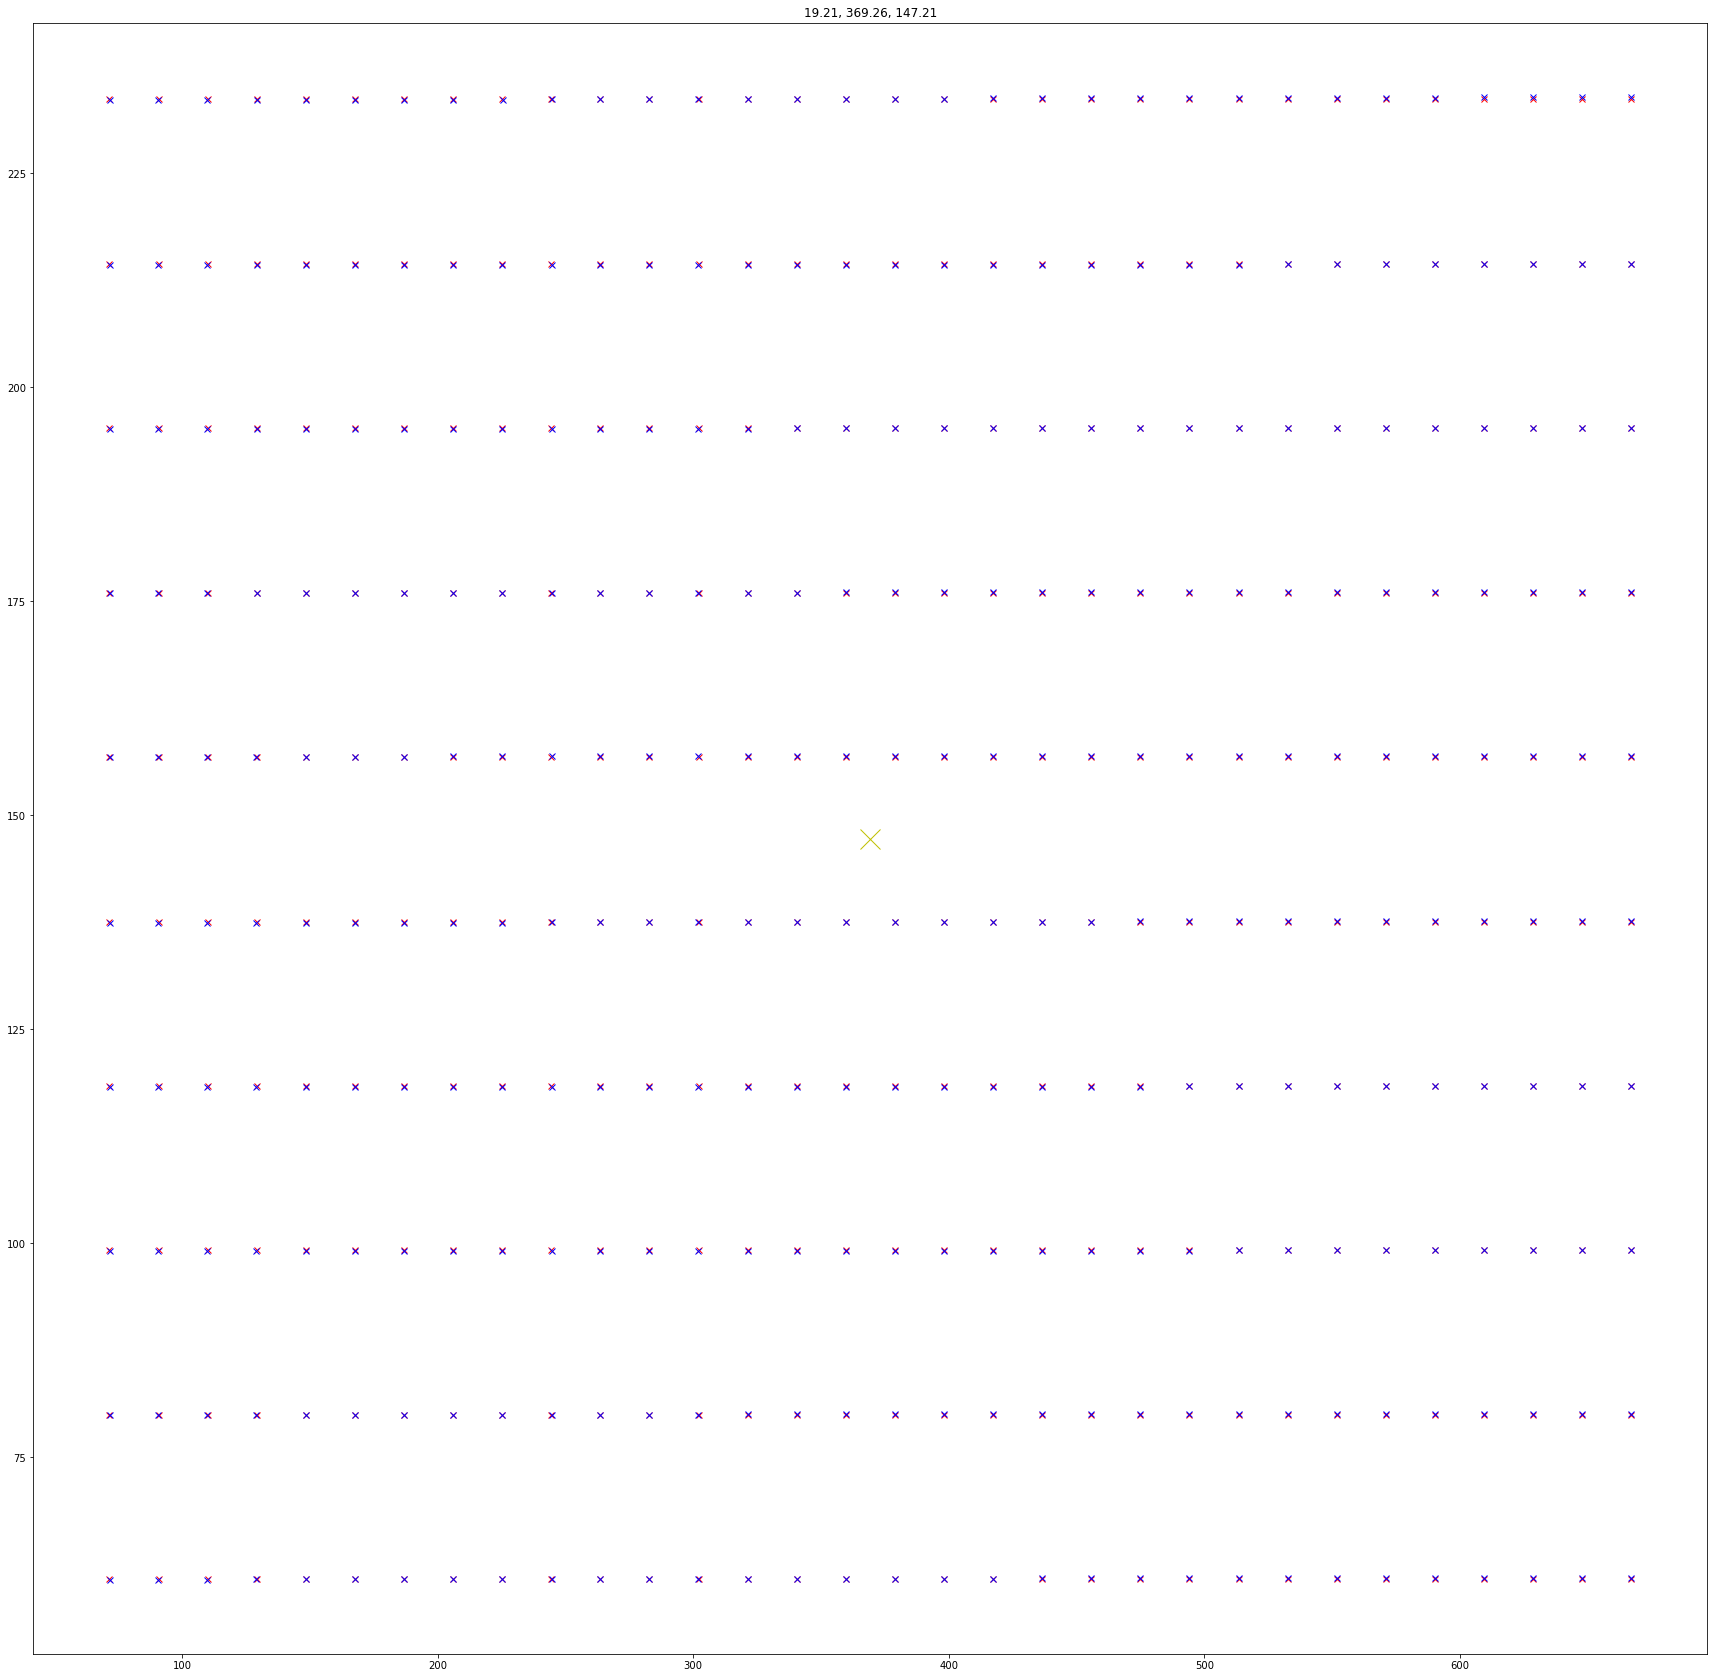

In [5]:
img_bg1_rect = auto_rect1.rectify_img_bg()
img_bg2_rect = auto_rect2.rectify_img_bg()

In [6]:
# Rectification parameters for img_bg1
auto_rect1.center_x_rect_bg, auto_rect1.center_y_rect_bg, auto_rect2.pitch

(388.4656618025751, 166.42228655282796, 19.208041509679532)

In [7]:
# Rectification parameters for img_bg2
auto_rect2.center_x_rect_bg, auto_rect2.center_y_rect_bg, auto_rect2.pitch

(388.4664563581217, 176.42256358147853, 19.208041509679532)

In [8]:
# parameters should only differ in pixel_diff defined above
assert np.isclose(auto_rect1.center_y_rect_bg, auto_rect2.center_y_rect_bg - pixel_diff)

In [9]:
# Check that detected lenselets and fitted lenselets are close together
print(np.abs((pd.DataFrame(auto_rect2.inters_reshape_x) - (auto_rect2.center_x_rect_bg - auto_rect2.pitch/2))).min().min())
print(np.abs((pd.DataFrame(auto_rect2.inters_reshape_y) - (auto_rect2.center_y_rect_bg - auto_rect2.pitch/2))).min().min())

0.059988599126029385
0.046935093282058915


# Inspect the results of the rectification

Text(0.5, 1.0, 'rectified img_bg2')

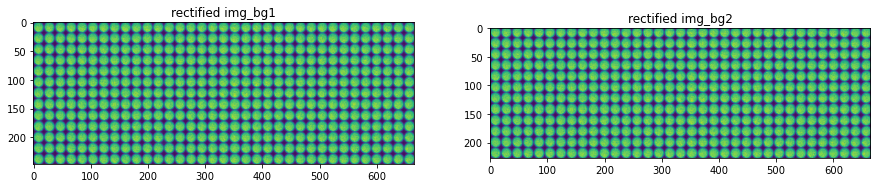

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,40))
ax1.imshow(auto_rect1.img_rect_bg) 
ax1.set_title('rectified img_bg1')
ax2.imshow(auto_rect2.img_rect_bg)
ax2.set_title('rectified img_bg2')

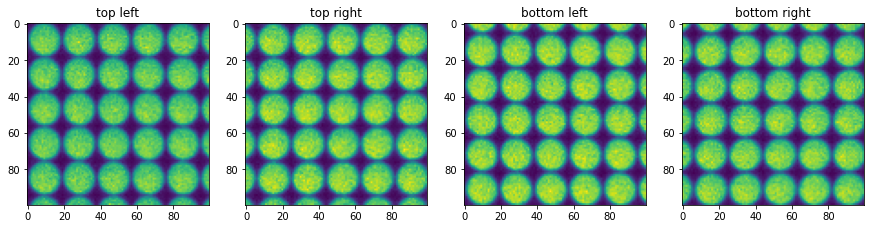

In [11]:
# Have a closer look at each corner of the rectified image to visually check the quality of the rectification
auto_rect1.plot_rect_quality_check()

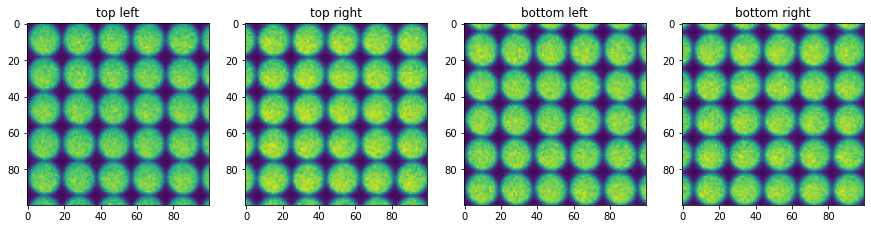

In [12]:
# Have a closer look at each corner of the rectified image to visually check the quality of the rectification
auto_rect2.plot_rect_quality_check()

## Visually check detected positions of lenselet borders (yellow), shifted fitted positions (red) and center of fit (black)

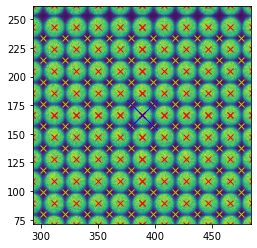

In [13]:
# only look at a some lenselets around center
auto_rect1.plot_results_of_fit(x_range_lenselets=5, y_range_lenselets=5)

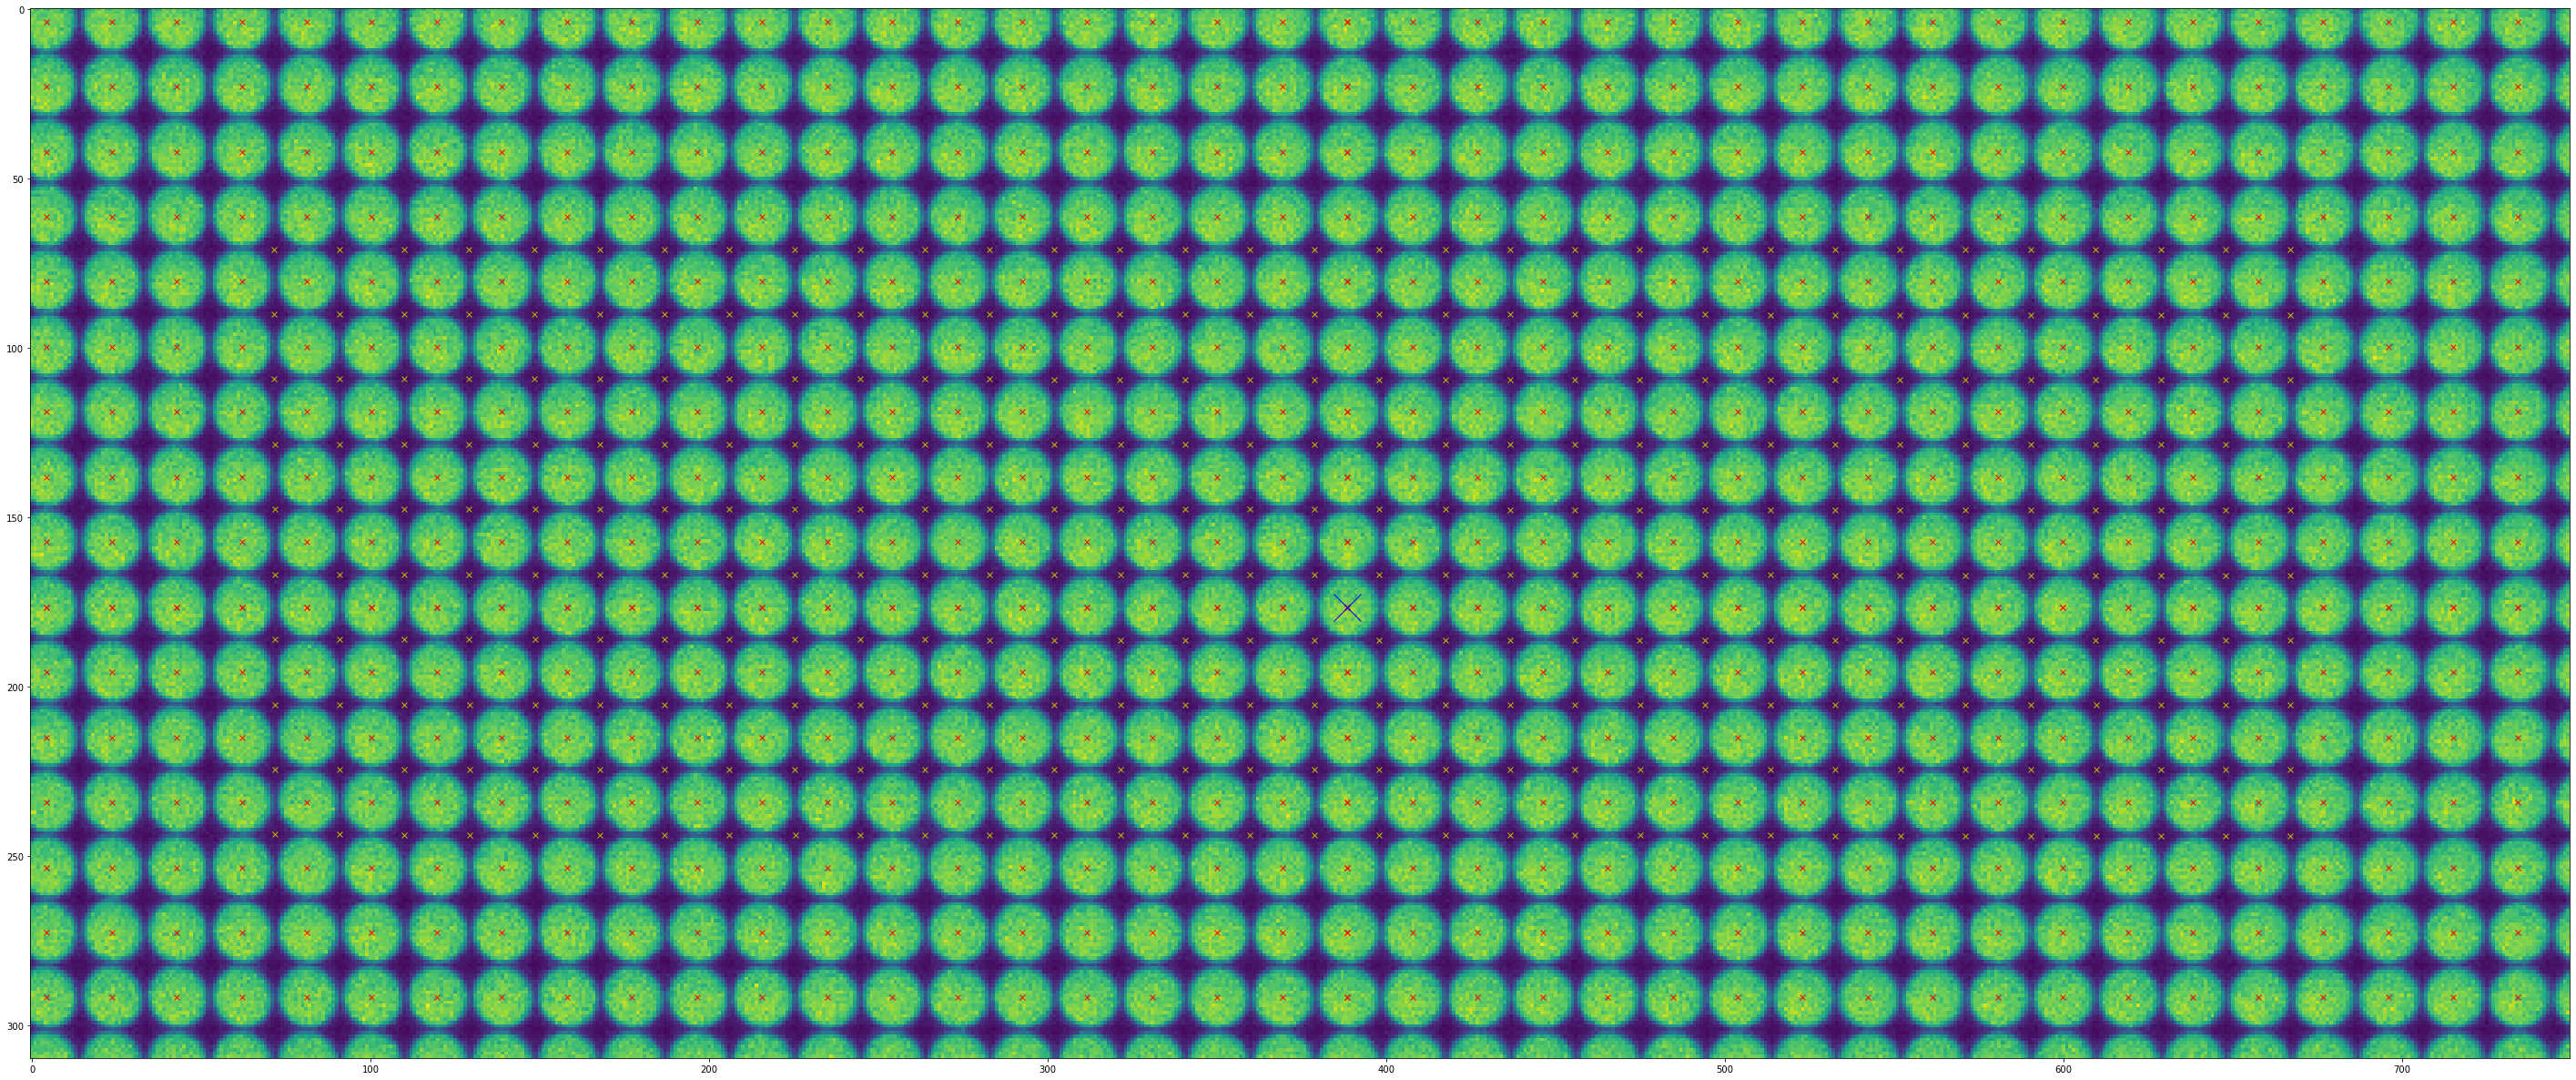

In [14]:
# look at whole image
plt.figure(figsize=(50,50))
auto_rect2.plot_results_of_fit()

# If image is not correctly rectified, an assertion error will be raised

In [15]:
shift_center_x = 2
auto_rect_wrong = AutoRect(img_bg2, nnum=19, 
                           pitch=auto_rect2.pitch, 
                           center_x_rect_bg=auto_rect2.center_x_rect_bg + shift_center_x, 
                           center_y_rect_bg=auto_rect2.center_y_rect_bg)
img_bg_rect_wrong = auto_rect_wrong.rectify_img_bg()

center_x_rect_bg was not correctly determined.


AssertionError: 